In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi,sqrt

def wrap(job,job_id,task_id):
    def singlerun(kaf,L,run,paform,C):
        rm = 0.005
        #run+=5000
        f=1.        
        gamma=0.577216
        import numpy as np
        factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))
        rng = GSLRandomNumberGenerator()
        rng.seed(run)
        voxelr=rm
        D = 1
        ka=kaf*D
        #print('ka',ka,'D',D)
        if paform=='new':
            f=1.0209
            PP=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*gamma)/2/math.pi)
            ka = PP*D/factor
        voxelr = rm*f
        tm =(2*voxelr)**2/(4*D)
        H = 3*voxelr*2
        ori = Real3(0.5*H,0,0)
        unit0 = Real3(0,0,L)
        unit1 = Real3(0,L,0)        
        w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr,rng)
        size=tuple(w.calculate_shape(Real3(H,L,L),voxelr))
        w.add_structure(Species('X'),PlanarSurface(ori,unit0,unit1))
        Nmv=size[1]*size[2]   
        lx,ly,lz=w.actual_lengths()
        Area=ly*lz
        N = int(Area*C)
        #print(C,N/Area,N*100/Nmv,N)
        with species_attributes():
            A |  {'D': str(0), 'radius':str(voxelr),'location':'X'}
            B |  {'D': str(D), 'radius':str(voxelr),'location':'X'}

        with reaction_rules():#for spa and egfrd
            A + B > B | ka

        m2 = get_model()
        w.bind_to(m2)
        #print('ka,N,Area',ka,N,Area,Area*C,int(Area*C))
        na=1
        w.add_molecules(Species('A'), na)
        w.add_molecules(Species('B'), N)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        simt=0
        while na==1:
            sim.step()
            na = w.num_particles_exact(Species('A'))
            simt=sim.t()
        if paform=='new':
            folder ='/home/chew/outputdata/rxntime/new{}L{}C{}/'.format(kaf,int(L),C)
            name = folder+'run'+str(run)
        else:
            folder ='/home/chew/outputdata/rxntime/ori{}L{}C{}/'.format(kaf,int(L),C)
            name = folder+'run'+str(run)            
        if not os.path.exists(folder):
            os.makedirs(folder)
        filename = open(name,'w')
        np.savetxt(name,[simt],fmt='%s')
        filename.close()
        return 
    
    job.update({'run':task_id})
    out=singlerun(**job)
    return 

kaf=0.01
simrun=5000#0#00#1000#3000
#Ls=[7,3,1,0.4,0.3]
Ls = [5.]
C=80#10#N/A

print(kaf,C)
for L in Ls:
    print('L',L)
    rxt=[]
    conc=[]
    for paform in ['ori','new']:
        print(paform)
        jobs=[{'kaf':kaf,'L':L,'paform':paform,'C':C}]
        ensemble.run_slurm(wrap,jobs,n=simrun,nproc=250,path='tmp',modules=('numpy','ecell4','math'))[0]
        #ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=5,modules=('numpy','ecell4','math'))[0]
        #rxt.append([r for r in res])
        #conc.append(res[0][1])
print('finish') 
#print('area problem? fix concentration, create N according to actual area')

0.01 10
L 5.0
ori


DEBUG:sge:Submitted batch job 1451159
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[1-5000%25      defq sge-m4tn     chew PD       0:00      1 (None)
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[276-5000%      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1451159_275      defq sge-m4tn     chew  R       0:00      1 ibc08
DEBUG:sge:       1451159_271      defq sge-m4tn     chew  R       0:01      1 ibc13
DEBUG:sge:       1451159_272      defq sge-m4tn     chew  R       0:01      1 ibc04
DEBUG:sge:       1451159_273      defq sge-m4tn     chew  R       0:01      1 ibc12
DEBUG:sge:       1451159_274      defq sge-m4tn     chew  R       0:01      1 ibc01
DEBUG:sge:       1451159_269      defq sge-m

DEBUG:sge:       1451159_129      defq sge-m4tn     chew  R       0:08      1 ibc08
DEBUG:sge:       1451159_130      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:       1451159_131      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:       1451159_132      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:       1451159_133      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:       1451159_134      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:       1451159_135      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:       1451159_136      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:       1451159_137      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:       1451159_138      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:       1451159_140      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:       1451159_141      defq sge-m4tn     chew  R       0:08      

DEBUG:sge:        1451159_36      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_37      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_38      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_39      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_40      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_41      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_42      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_43      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_44      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_45      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_46      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:        1451159_47      defq sge-m4tn     chew  R       0:10      

DEBUG:sge:       1451159_260      defq sge-m4tn     chew  R       0:15      1 ibc17
DEBUG:sge:       1451159_261      defq sge-m4tn     chew  R       0:15      1 ibc10
DEBUG:sge:       1451159_203      defq sge-m4tn     chew  R       0:17      1 ibc14
DEBUG:sge:       1451159_204      defq sge-m4tn     chew  R       0:17      1 ibc14
DEBUG:sge:       1451159_205      defq sge-m4tn     chew  R       0:17      1 ibc14
DEBUG:sge:       1451159_206      defq sge-m4tn     chew  R       0:17      1 ibc14
DEBUG:sge:       1451159_207      defq sge-m4tn     chew  R       0:17      1 ibc14
DEBUG:sge:       1451159_208      defq sge-m4tn     chew  R       0:17      1 ibc14
DEBUG:sge:       1451159_209      defq sge-m4tn     chew  R       0:17      1 ibc14
DEBUG:sge:       1451159_210      defq sge-m4tn     chew  R       0:17      1 ibc15
DEBUG:sge:       1451159_211      defq sge-m4tn     chew  R       0:17      1 ibc15
DEBUG:sge:       1451159_212      defq sge-m4tn     chew  R       0:17      

DEBUG:sge:       1451159_159      defq sge-m4tn     chew  R       0:18      1 ibc11
DEBUG:sge:       1451159_160      defq sge-m4tn     chew  R       0:18      1 ibc11
DEBUG:sge:       1451159_161      defq sge-m4tn     chew  R       0:18      1 ibc11
DEBUG:sge:       1451159_163      defq sge-m4tn     chew  R       0:18      1 ibc12
DEBUG:sge:       1451159_164      defq sge-m4tn     chew  R       0:18      1 ibc12
DEBUG:sge:       1451159_165      defq sge-m4tn     chew  R       0:18      1 ibc12
DEBUG:sge:       1451159_166      defq sge-m4tn     chew  R       0:18      1 ibc12
DEBUG:sge:       1451159_168      defq sge-m4tn     chew  R       0:18      1 ibc12
DEBUG:sge:       1451159_169      defq sge-m4tn     chew  R       0:18      1 ibc12
DEBUG:sge:       1451159_170      defq sge-m4tn     chew  R       0:18      1 ibc12
DEBUG:sge:       1451159_173      defq sge-m4tn     chew  R       0:18      1 ibc12
DEBUG:sge:       1451159_174      defq sge-m4tn     chew  R       0:18      

DEBUG:sge:        1451159_77      defq sge-m4tn     chew  R       0:20      1 ibc05
DEBUG:sge:        1451159_78      defq sge-m4tn     chew  R       0:20      1 ibc05
DEBUG:sge:        1451159_79      defq sge-m4tn     chew  R       0:20      1 ibc05
DEBUG:sge:        1451159_80      defq sge-m4tn     chew  R       0:20      1 ibc05
DEBUG:sge:        1451159_81      defq sge-m4tn     chew  R       0:20      1 ibc06
DEBUG:sge:        1451159_82      defq sge-m4tn     chew  R       0:20      1 ibc06
DEBUG:sge:        1451159_83      defq sge-m4tn     chew  R       0:20      1 ibc06
DEBUG:sge:        1451159_84      defq sge-m4tn     chew  R       0:20      1 ibc06
DEBUG:sge:        1451159_86      defq sge-m4tn     chew  R       0:20      1 ibc06
DEBUG:sge:        1451159_89      defq sge-m4tn     chew  R       0:20      1 ibc06
DEBUG:sge:        1451159_90      defq sge-m4tn     chew  R       0:20      1 ibc06
DEBUG:sge:        1451159_92      defq sge-m4tn     chew  R       0:20      

DEBUG:sge:       1451159_219      defq sge-m4tn     chew  R       0:27      1 ibc15
DEBUG:sge:       1451159_220      defq sge-m4tn     chew  R       0:27      1 ibc15
DEBUG:sge:       1451159_225      defq sge-m4tn     chew  R       0:27      1 ibc15
DEBUG:sge:       1451159_226      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:       1451159_227      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:       1451159_229      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:       1451159_230      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:       1451159_232      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:       1451159_233      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:       1451159_234      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:       1451159_235      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:       1451159_236      defq sge-m4tn     chew  R       0:27      

DEBUG:sge:       1451159_196      defq sge-m4tn     chew  R       0:28      1 ibc14
DEBUG:sge:       1451159_199      defq sge-m4tn     chew  R       0:28      1 ibc14
DEBUG:sge:       1451159_201      defq sge-m4tn     chew  R       0:28      1 ibc14
DEBUG:sge:         1451159_2      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:         1451159_3      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:         1451159_4      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:         1451159_5      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:         1451159_6      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:         1451159_7      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:        1451159_10      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:        1451159_11      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:        1451159_12      defq sge-m4tn     chew  R       0:30      

DEBUG:sge:       1451159_330      defq sge-m4tn     chew  R       0:08      1 ibc16
DEBUG:sge:       1451159_331      defq sge-m4tn     chew  R       0:08      1 ibc02
DEBUG:sge:       1451159_332      defq sge-m4tn     chew  R       0:08      1 ibc13
DEBUG:sge:       1451159_334      defq sge-m4tn     chew  R       0:08      1 ibc16
DEBUG:sge:       1451159_325      defq sge-m4tn     chew  R       0:09      1 ibc02
DEBUG:sge:       1451159_326      defq sge-m4tn     chew  R       0:09      1 ibc17
DEBUG:sge:       1451159_327      defq sge-m4tn     chew  R       0:09      1 ibc07
DEBUG:sge:       1451159_328      defq sge-m4tn     chew  R       0:09      1 ibc10
DEBUG:sge:       1451159_329      defq sge-m4tn     chew  R       0:09      1 ibc15
DEBUG:sge:       1451159_323      defq sge-m4tn     chew  R       0:10      1 ibc15
DEBUG:sge:       1451159_321      defq sge-m4tn     chew  R       0:11      1 ibc05
DEBUG:sge:       1451159_318      defq sge-m4tn     chew  R       0:12      

DEBUG:sge:       1451159_253      defq sge-m4tn     chew  R       0:37      1 ibc06
DEBUG:sge:       1451159_255      defq sge-m4tn     chew  R       0:37      1 ibc04
DEBUG:sge:       1451159_102      defq sge-m4tn     chew  R       0:38      1 ibc02
DEBUG:sge:       1451159_103      defq sge-m4tn     chew  R       0:38      1 ibc07
DEBUG:sge:       1451159_105      defq sge-m4tn     chew  R       0:38      1 ibc07
DEBUG:sge:       1451159_106      defq sge-m4tn     chew  R       0:38      1 ibc07
DEBUG:sge:       1451159_108      defq sge-m4tn     chew  R       0:38      1 ibc07
DEBUG:sge:       1451159_109      defq sge-m4tn     chew  R       0:38      1 ibc07
DEBUG:sge:       1451159_112      defq sge-m4tn     chew  R       0:38      1 ibc07
DEBUG:sge:       1451159_113      defq sge-m4tn     chew  R       0:38      1 ibc07
DEBUG:sge:       1451159_118      defq sge-m4tn     chew  R       0:38      1 ibc08
DEBUG:sge:       1451159_120      defq sge-m4tn     chew  R       0:38      

DEBUG:sge:        1451159_47      defq sge-m4tn     chew  R       0:40      1 ibc03
DEBUG:sge:        1451159_48      defq sge-m4tn     chew  R       0:40      1 ibc03
DEBUG:sge:        1451159_49      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:        1451159_50      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:        1451159_52      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:        1451159_53      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:        1451159_54      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:        1451159_55      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:        1451159_56      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:        1451159_58      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:        1451159_60      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:        1451159_61      defq sge-m4tn     chew  R       0:40      

DEBUG:sge:       1451159_329      defq sge-m4tn     chew  R       0:19      1 ibc15
DEBUG:sge:       1451159_323      defq sge-m4tn     chew  R       0:20      1 ibc15
DEBUG:sge:       1451159_321      defq sge-m4tn     chew  R       0:21      1 ibc05
DEBUG:sge:       1451159_318      defq sge-m4tn     chew  R       0:22      1 ibc05
DEBUG:sge:       1451159_319      defq sge-m4tn     chew  R       0:22      1 ibc13
DEBUG:sge:       1451159_320      defq sge-m4tn     chew  R       0:22      1 ibc07
DEBUG:sge:       1451159_317      defq sge-m4tn     chew  R       0:23      1 ibc15
DEBUG:sge:       1451159_313      defq sge-m4tn     chew  R       0:24      1 ibc15
DEBUG:sge:       1451159_314      defq sge-m4tn     chew  R       0:24      1 ibc10
DEBUG:sge:       1451159_316      defq sge-m4tn     chew  R       0:24      1 ibc08
DEBUG:sge:       1451159_310      defq sge-m4tn     chew  R       0:26      1 ibc05
DEBUG:sge:       1451159_311      defq sge-m4tn     chew  R       0:26      

DEBUG:sge:       1451159_141      defq sge-m4tn     chew  R       0:48      1 ibc10
DEBUG:sge:       1451159_142      defq sge-m4tn     chew  R       0:48      1 ibc10
DEBUG:sge:       1451159_144      defq sge-m4tn     chew  R       0:48      1 ibc10
DEBUG:sge:       1451159_145      defq sge-m4tn     chew  R       0:48      1 ibc10
DEBUG:sge:       1451159_146      defq sge-m4tn     chew  R       0:48      1 ibc11
DEBUG:sge:       1451159_148      defq sge-m4tn     chew  R       0:48      1 ibc11
DEBUG:sge:       1451159_149      defq sge-m4tn     chew  R       0:48      1 ibc11
DEBUG:sge:       1451159_150      defq sge-m4tn     chew  R       0:48      1 ibc11
DEBUG:sge:       1451159_151      defq sge-m4tn     chew  R       0:48      1 ibc11
DEBUG:sge:       1451159_153      defq sge-m4tn     chew  R       0:48      1 ibc11
DEBUG:sge:       1451159_154      defq sge-m4tn     chew  R       0:48      1 ibc11
DEBUG:sge:       1451159_155      defq sge-m4tn     chew  R       0:48      

DEBUG:sge:1451159_[419-5000%      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1451159_412      defq sge-m4tn     chew  R       0:01      1 ibc06
DEBUG:sge:       1451159_413      defq sge-m4tn     chew  R       0:01      1 ibc14
DEBUG:sge:       1451159_414      defq sge-m4tn     chew  R       0:01      1 ibc03
DEBUG:sge:       1451159_415      defq sge-m4tn     chew  R       0:01      1 ibc12
DEBUG:sge:       1451159_416      defq sge-m4tn     chew  R       0:01      1 ibc05
DEBUG:sge:       1451159_417      defq sge-m4tn     chew  R       0:01      1 ibc06
DEBUG:sge:       1451159_418      defq sge-m4tn     chew  R       0:01      1 ibc14
DEBUG:sge:       1451159_411      defq sge-m4tn     chew  R       0:02      1 ibc15
DEBUG:sge:       1451159_409      defq sge-m4tn     chew  R       0:03      1 ibc07
DEBUG:sge:       1451159_410      defq sge-m4tn     chew  R       0:03      1 ibc04
DEBUG:sge:       1451159_405      defq sge-m4tn     chew  R   

DEBUG:sge:       1451159_298      defq sge-m4tn     chew  R       0:40      1 ibc08
DEBUG:sge:       1451159_299      defq sge-m4tn     chew  R       0:40      1 ibc07
DEBUG:sge:       1451159_293      defq sge-m4tn     chew  R       0:44      1 ibc14
DEBUG:sge:       1451159_294      defq sge-m4tn     chew  R       0:44      1 ibc16
DEBUG:sge:       1451159_291      defq sge-m4tn     chew  R       0:45      1 ibc06
DEBUG:sge:       1451159_285      defq sge-m4tn     chew  R       0:46      1 ibc15
DEBUG:sge:       1451159_289      defq sge-m4tn     chew  R       0:46      1 ibc07
DEBUG:sge:       1451159_283      defq sge-m4tn     chew  R       0:47      1 ibc06
DEBUG:sge:       1451159_280      defq sge-m4tn     chew  R       0:48      1 ibc13
DEBUG:sge:       1451159_279      defq sge-m4tn     chew  R       0:49      1 ibc08
DEBUG:sge:       1451159_277      defq sge-m4tn     chew  R       0:50      1 ibc01
DEBUG:sge:       1451159_272      defq sge-m4tn     chew  R       0:52      

DEBUG:sge:       1451159_201      defq sge-m4tn     chew  R       0:59      1 ibc14
DEBUG:sge:         1451159_2      defq sge-m4tn     chew  R       1:01      1 ibc01
DEBUG:sge:         1451159_3      defq sge-m4tn     chew  R       1:01      1 ibc01
DEBUG:sge:         1451159_4      defq sge-m4tn     chew  R       1:01      1 ibc01
DEBUG:sge:         1451159_5      defq sge-m4tn     chew  R       1:01      1 ibc01
DEBUG:sge:         1451159_6      defq sge-m4tn     chew  R       1:01      1 ibc01
DEBUG:sge:         1451159_7      defq sge-m4tn     chew  R       1:01      1 ibc01
DEBUG:sge:        1451159_10      defq sge-m4tn     chew  R       1:01      1 ibc01
DEBUG:sge:        1451159_12      defq sge-m4tn     chew  R       1:01      1 ibc01
DEBUG:sge:        1451159_16      defq sge-m4tn     chew  R       1:01      1 ibc01
DEBUG:sge:        1451159_19      defq sge-m4tn     chew  R       1:01      1 ibc02
DEBUG:sge:        1451159_22      defq sge-m4tn     chew  R       1:01      

DEBUG:sge:       1451159_407      defq sge-m4tn     chew  R       0:14      1 ibc14
DEBUG:sge:       1451159_408      defq sge-m4tn     chew  R       0:14      1 ibc01
DEBUG:sge:       1451159_401      defq sge-m4tn     chew  R       0:15      1 ibc02
DEBUG:sge:       1451159_402      defq sge-m4tn     chew  R       0:15      1 ibc17
DEBUG:sge:       1451159_403      defq sge-m4tn     chew  R       0:15      1 ibc17
DEBUG:sge:       1451159_404      defq sge-m4tn     chew  R       0:15      1 ibc11
DEBUG:sge:       1451159_400      defq sge-m4tn     chew  R       0:16      1 ibc05
DEBUG:sge:       1451159_397      defq sge-m4tn     chew  R       0:17      1 ibc10
DEBUG:sge:       1451159_398      defq sge-m4tn     chew  R       0:17      1 ibc14
DEBUG:sge:       1451159_399      defq sge-m4tn     chew  R       0:17      1 ibc03
DEBUG:sge:       1451159_396      defq sge-m4tn     chew  R       0:18      1 ibc04
DEBUG:sge:       1451159_393      defq sge-m4tn     chew  R       0:19      

DEBUG:sge:       1451159_211      defq sge-m4tn     chew  R       1:08      1 ibc15
DEBUG:sge:       1451159_212      defq sge-m4tn     chew  R       1:08      1 ibc15
DEBUG:sge:       1451159_214      defq sge-m4tn     chew  R       1:08      1 ibc15
DEBUG:sge:       1451159_217      defq sge-m4tn     chew  R       1:08      1 ibc15
DEBUG:sge:       1451159_219      defq sge-m4tn     chew  R       1:08      1 ibc15
DEBUG:sge:       1451159_220      defq sge-m4tn     chew  R       1:08      1 ibc15
DEBUG:sge:       1451159_226      defq sge-m4tn     chew  R       1:08      1 ibc16
DEBUG:sge:       1451159_227      defq sge-m4tn     chew  R       1:08      1 ibc16
DEBUG:sge:       1451159_232      defq sge-m4tn     chew  R       1:08      1 ibc16
DEBUG:sge:       1451159_233      defq sge-m4tn     chew  R       1:08      1 ibc16
DEBUG:sge:       1451159_234      defq sge-m4tn     chew  R       1:08      1 ibc16
DEBUG:sge:       1451159_235      defq sge-m4tn     chew  R       1:08      

DEBUG:sge:        1451159_75      defq sge-m4tn     chew  R       1:11      1 ibc05
DEBUG:sge:        1451159_76      defq sge-m4tn     chew  R       1:11      1 ibc05
DEBUG:sge:        1451159_79      defq sge-m4tn     chew  R       1:11      1 ibc05
DEBUG:sge:        1451159_80      defq sge-m4tn     chew  R       1:11      1 ibc05
DEBUG:sge:        1451159_81      defq sge-m4tn     chew  R       1:11      1 ibc06
DEBUG:sge:        1451159_82      defq sge-m4tn     chew  R       1:11      1 ibc06
DEBUG:sge:        1451159_83      defq sge-m4tn     chew  R       1:11      1 ibc06
DEBUG:sge:        1451159_84      defq sge-m4tn     chew  R       1:11      1 ibc06
DEBUG:sge:        1451159_89      defq sge-m4tn     chew  R       1:11      1 ibc06
DEBUG:sge:        1451159_90      defq sge-m4tn     chew  R       1:11      1 ibc06
DEBUG:sge:        1451159_94      defq sge-m4tn     chew  R       1:11      1 ibc06
DEBUG:sge:        1451159_96      defq sge-m4tn     chew  R       1:11      

DEBUG:sge:       1451159_380      defq sge-m4tn     chew  R       0:33      1 ibc17
DEBUG:sge:       1451159_375      defq sge-m4tn     chew  R       0:34      1 ibc08
DEBUG:sge:       1451159_368      defq sge-m4tn     chew  R       0:35      1 ibc10
DEBUG:sge:       1451159_369      defq sge-m4tn     chew  R       0:35      1 ibc06
DEBUG:sge:       1451159_371      defq sge-m4tn     chew  R       0:35      1 ibc15
DEBUG:sge:       1451159_372      defq sge-m4tn     chew  R       0:35      1 ibc11
DEBUG:sge:       1451159_373      defq sge-m4tn     chew  R       0:35      1 ibc10
DEBUG:sge:       1451159_362      defq sge-m4tn     chew  R       0:37      1 ibc02
DEBUG:sge:       1451159_364      defq sge-m4tn     chew  R       0:37      1 ibc13
DEBUG:sge:       1451159_365      defq sge-m4tn     chew  R       0:37      1 ibc07
DEBUG:sge:       1451159_361      defq sge-m4tn     chew  R       0:38      1 ibc04
DEBUG:sge:       1451159_353      defq sge-m4tn     chew  R       0:40      

DEBUG:sge:       1451159_137      defq sge-m4tn     chew  R       1:19      1 ibc10
DEBUG:sge:       1451159_140      defq sge-m4tn     chew  R       1:19      1 ibc10
DEBUG:sge:       1451159_141      defq sge-m4tn     chew  R       1:19      1 ibc10
DEBUG:sge:       1451159_142      defq sge-m4tn     chew  R       1:19      1 ibc10
DEBUG:sge:       1451159_144      defq sge-m4tn     chew  R       1:19      1 ibc10
DEBUG:sge:       1451159_145      defq sge-m4tn     chew  R       1:19      1 ibc10
DEBUG:sge:       1451159_148      defq sge-m4tn     chew  R       1:19      1 ibc11
DEBUG:sge:       1451159_150      defq sge-m4tn     chew  R       1:19      1 ibc11
DEBUG:sge:       1451159_151      defq sge-m4tn     chew  R       1:19      1 ibc11
DEBUG:sge:       1451159_153      defq sge-m4tn     chew  R       1:19      1 ibc11
DEBUG:sge:       1451159_154      defq sge-m4tn     chew  R       1:19      1 ibc11
DEBUG:sge:       1451159_155      defq sge-m4tn     chew  R       1:19      

DEBUG:sge:       1451159_483      defq sge-m4tn     chew  R       0:06      1 ibc14
DEBUG:sge:       1451159_478      defq sge-m4tn     chew  R       0:08      1 ibc11
DEBUG:sge:       1451159_479      defq sge-m4tn     chew  R       0:08      1 ibc01
DEBUG:sge:       1451159_480      defq sge-m4tn     chew  R       0:08      1 ibc16
DEBUG:sge:       1451159_477      defq sge-m4tn     chew  R       0:09      1 ibc15
DEBUG:sge:       1451159_474      defq sge-m4tn     chew  R       0:10      1 ibc13
DEBUG:sge:       1451159_475      defq sge-m4tn     chew  R       0:10      1 ibc10
DEBUG:sge:       1451159_476      defq sge-m4tn     chew  R       0:10      1 ibc15
DEBUG:sge:       1451159_473      defq sge-m4tn     chew  R       0:12      1 ibc04
DEBUG:sge:       1451159_467      defq sge-m4tn     chew  R       0:13      1 ibc10
DEBUG:sge:       1451159_468      defq sge-m4tn     chew  R       0:13      1 ibc11
DEBUG:sge:       1451159_469      defq sge-m4tn     chew  R       0:13      

DEBUG:sge:       1451159_337      defq sge-m4tn     chew  R       0:57      1 ibc11
DEBUG:sge:       1451159_335      defq sge-m4tn     chew  R       0:58      1 ibc03
DEBUG:sge:       1451159_336      defq sge-m4tn     chew  R       0:58      1 ibc01
DEBUG:sge:       1451159_332      defq sge-m4tn     chew  R       0:59      1 ibc13
DEBUG:sge:       1451159_334      defq sge-m4tn     chew  R       0:59      1 ibc16
DEBUG:sge:       1451159_327      defq sge-m4tn     chew  R       1:00      1 ibc07
DEBUG:sge:       1451159_328      defq sge-m4tn     chew  R       1:00      1 ibc10
DEBUG:sge:       1451159_329      defq sge-m4tn     chew  R       1:00      1 ibc15
DEBUG:sge:       1451159_323      defq sge-m4tn     chew  R       1:01      1 ibc15
DEBUG:sge:       1451159_321      defq sge-m4tn     chew  R       1:02      1 ibc05
DEBUG:sge:       1451159_318      defq sge-m4tn     chew  R       1:03      1 ibc05
DEBUG:sge:       1451159_319      defq sge-m4tn     chew  R       1:03      

DEBUG:sge:        1451159_26      defq sge-m4tn     chew  R       1:31      1 ibc02
DEBUG:sge:        1451159_31      defq sge-m4tn     chew  R       1:31      1 ibc02
DEBUG:sge:        1451159_33      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:        1451159_37      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:        1451159_38      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:        1451159_40      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:        1451159_41      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:        1451159_43      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:        1451159_44      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:        1451159_45      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:        1451159_46      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:        1451159_50      defq sge-m4tn     chew  R       1:31      

DEBUG:sge:       1451159_454      defq sge-m4tn     chew  R       0:27      1 ibc08
DEBUG:sge:       1451159_455      defq sge-m4tn     chew  R       0:27      1 ibc03
DEBUG:sge:       1451159_456      defq sge-m4tn     chew  R       0:27      1 ibc04
DEBUG:sge:       1451159_458      defq sge-m4tn     chew  R       0:27      1 ibc06
DEBUG:sge:       1451159_453      defq sge-m4tn     chew  R       0:28      1 ibc10
DEBUG:sge:       1451159_450      defq sge-m4tn     chew  R       0:29      1 ibc17
DEBUG:sge:       1451159_447      defq sge-m4tn     chew  R       0:30      1 ibc14
DEBUG:sge:       1451159_448      defq sge-m4tn     chew  R       0:30      1 ibc15
DEBUG:sge:       1451159_444      defq sge-m4tn     chew  R       0:31      1 ibc02
DEBUG:sge:       1451159_445      defq sge-m4tn     chew  R       0:31      1 ibc05
DEBUG:sge:       1451159_440      defq sge-m4tn     chew  R       0:33      1 ibc05
DEBUG:sge:       1451159_441      defq sge-m4tn     chew  R       0:33      

DEBUG:sge:       1451159_272      defq sge-m4tn     chew  R       1:32      1 ibc04
DEBUG:sge:       1451159_269      defq sge-m4tn     chew  R       1:33      1 ibc04
DEBUG:sge:       1451159_270      defq sge-m4tn     chew  R       1:33      1 ibc02
DEBUG:sge:       1451159_265      defq sge-m4tn     chew  R       1:34      1 ibc07
DEBUG:sge:       1451159_266      defq sge-m4tn     chew  R       1:34      1 ibc14
DEBUG:sge:       1451159_264      defq sge-m4tn     chew  R       1:35      1 ibc08
DEBUG:sge:       1451159_258      defq sge-m4tn     chew  R       1:36      1 ibc02
DEBUG:sge:       1451159_259      defq sge-m4tn     chew  R       1:36      1 ibc12
DEBUG:sge:       1451159_260      defq sge-m4tn     chew  R       1:36      1 ibc17
DEBUG:sge:       1451159_208      defq sge-m4tn     chew  R       1:38      1 ibc14
DEBUG:sge:       1451159_212      defq sge-m4tn     chew  R       1:38      1 ibc15
DEBUG:sge:       1451159_214      defq sge-m4tn     chew  R       1:38      

DEBUG:sge:       1451159_554      defq sge-m4tn     chew  R       0:01      1 ibc15
DEBUG:sge:       1451159_555      defq sge-m4tn     chew  R       0:01      1 ibc10
DEBUG:sge:       1451159_548      defq sge-m4tn     chew  R       0:02      1 ibc11
DEBUG:sge:       1451159_549      defq sge-m4tn     chew  R       0:02      1 ibc15
DEBUG:sge:       1451159_550      defq sge-m4tn     chew  R       0:02      1 ibc02
DEBUG:sge:       1451159_546      defq sge-m4tn     chew  R       0:03      1 ibc07
DEBUG:sge:       1451159_547      defq sge-m4tn     chew  R       0:03      1 ibc04
DEBUG:sge:       1451159_544      defq sge-m4tn     chew  R       0:04      1 ibc12
DEBUG:sge:       1451159_545      defq sge-m4tn     chew  R       0:04      1 ibc16
DEBUG:sge:       1451159_542      defq sge-m4tn     chew  R       0:05      1 ibc05
DEBUG:sge:       1451159_540      defq sge-m4tn     chew  R       0:06      1 ibc11
DEBUG:sge:       1451159_541      defq sge-m4tn     chew  R       0:06      

DEBUG:sge:       1451159_413      defq sge-m4tn     chew  R       0:52      1 ibc14
DEBUG:sge:       1451159_415      defq sge-m4tn     chew  R       0:52      1 ibc12
DEBUG:sge:       1451159_416      defq sge-m4tn     chew  R       0:52      1 ibc05
DEBUG:sge:       1451159_417      defq sge-m4tn     chew  R       0:52      1 ibc06
DEBUG:sge:       1451159_409      defq sge-m4tn     chew  R       0:54      1 ibc07
DEBUG:sge:       1451159_410      defq sge-m4tn     chew  R       0:54      1 ibc04
DEBUG:sge:       1451159_405      defq sge-m4tn     chew  R       0:55      1 ibc12
DEBUG:sge:       1451159_406      defq sge-m4tn     chew  R       0:55      1 ibc08
DEBUG:sge:       1451159_408      defq sge-m4tn     chew  R       0:55      1 ibc01
DEBUG:sge:       1451159_402      defq sge-m4tn     chew  R       0:56      1 ibc17
DEBUG:sge:       1451159_404      defq sge-m4tn     chew  R       0:56      1 ibc11
DEBUG:sge:       1451159_400      defq sge-m4tn     chew  R       0:57      

DEBUG:sge:       1451159_145      defq sge-m4tn     chew  R       1:50      1 ibc10
DEBUG:sge:       1451159_148      defq sge-m4tn     chew  R       1:50      1 ibc11
DEBUG:sge:       1451159_151      defq sge-m4tn     chew  R       1:50      1 ibc11
DEBUG:sge:       1451159_155      defq sge-m4tn     chew  R       1:50      1 ibc11
DEBUG:sge:       1451159_161      defq sge-m4tn     chew  R       1:50      1 ibc11
DEBUG:sge:       1451159_163      defq sge-m4tn     chew  R       1:50      1 ibc12
DEBUG:sge:       1451159_164      defq sge-m4tn     chew  R       1:50      1 ibc12
DEBUG:sge:       1451159_175      defq sge-m4tn     chew  R       1:50      1 ibc12
DEBUG:sge:       1451159_182      defq sge-m4tn     chew  R       1:50      1 ibc13
DEBUG:sge:       1451159_183      defq sge-m4tn     chew  R       1:50      1 ibc13
DEBUG:sge:       1451159_185      defq sge-m4tn     chew  R       1:50      1 ibc13
DEBUG:sge:       1451159_186      defq sge-m4tn     chew  R       1:50      

DEBUG:sge:       1451159_555      defq sge-m4tn     chew  R       0:11      1 ibc10
DEBUG:sge:       1451159_548      defq sge-m4tn     chew  R       0:12      1 ibc11
DEBUG:sge:       1451159_549      defq sge-m4tn     chew  R       0:12      1 ibc15
DEBUG:sge:       1451159_550      defq sge-m4tn     chew  R       0:12      1 ibc02
DEBUG:sge:       1451159_547      defq sge-m4tn     chew  R       0:13      1 ibc04
DEBUG:sge:       1451159_544      defq sge-m4tn     chew  R       0:14      1 ibc12
DEBUG:sge:       1451159_545      defq sge-m4tn     chew  R       0:14      1 ibc16
DEBUG:sge:       1451159_540      defq sge-m4tn     chew  R       0:16      1 ibc11
DEBUG:sge:       1451159_541      defq sge-m4tn     chew  R       0:16      1 ibc13
DEBUG:sge:       1451159_538      defq sge-m4tn     chew  R       0:17      1 ibc11
DEBUG:sge:       1451159_539      defq sge-m4tn     chew  R       0:17      1 ibc11
DEBUG:sge:       1451159_537      defq sge-m4tn     chew  R       0:18      

DEBUG:sge:       1451159_369      defq sge-m4tn     chew  R       1:16      1 ibc06
DEBUG:sge:       1451159_371      defq sge-m4tn     chew  R       1:16      1 ibc15
DEBUG:sge:       1451159_373      defq sge-m4tn     chew  R       1:16      1 ibc10
DEBUG:sge:       1451159_362      defq sge-m4tn     chew  R       1:18      1 ibc02
DEBUG:sge:       1451159_364      defq sge-m4tn     chew  R       1:18      1 ibc13
DEBUG:sge:       1451159_365      defq sge-m4tn     chew  R       1:18      1 ibc07
DEBUG:sge:       1451159_353      defq sge-m4tn     chew  R       1:21      1 ibc02
DEBUG:sge:       1451159_356      defq sge-m4tn     chew  R       1:21      1 ibc08
DEBUG:sge:       1451159_359      defq sge-m4tn     chew  R       1:21      1 ibc14
DEBUG:sge:       1451159_352      defq sge-m4tn     chew  R       1:22      1 ibc16
DEBUG:sge:       1451159_350      defq sge-m4tn     chew  R       1:23      1 ibc08
DEBUG:sge:       1451159_345      defq sge-m4tn     chew  R       1:24      

DEBUG:sge:        1451159_69      defq sge-m4tn     chew  R       2:02      1 ibc05
DEBUG:sge:        1451159_74      defq sge-m4tn     chew  R       2:02      1 ibc05
DEBUG:sge:        1451159_75      defq sge-m4tn     chew  R       2:02      1 ibc05
DEBUG:sge:        1451159_80      defq sge-m4tn     chew  R       2:02      1 ibc05
DEBUG:sge:        1451159_82      defq sge-m4tn     chew  R       2:02      1 ibc06
DEBUG:sge:        1451159_89      defq sge-m4tn     chew  R       2:02      1 ibc06
DEBUG:sge:        1451159_90      defq sge-m4tn     chew  R       2:02      1 ibc06
DEBUG:sge:        1451159_94      defq sge-m4tn     chew  R       2:02      1 ibc06
DEBUG:sge:        1451159_96      defq sge-m4tn     chew  R       2:02      1 ibc06
DEBUG:sge:       1451159_100      defq sge-m4tn     chew  R       2:02      1 ibc07
DEBUG:sge:       1451159_101      defq sge-m4tn     chew  R       2:02      1 ibc07
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred

DEBUG:sge:       1451159_531      defq sge-m4tn     chew  R       0:30      1 ibc17
DEBUG:sge:       1451159_529      defq sge-m4tn     chew  R       0:31      1 ibc13
DEBUG:sge:       1451159_527      defq sge-m4tn     chew  R       0:32      1 ibc14
DEBUG:sge:       1451159_528      defq sge-m4tn     chew  R       0:32      1 ibc12
DEBUG:sge:       1451159_522      defq sge-m4tn     chew  R       0:34      1 ibc16
DEBUG:sge:       1451159_523      defq sge-m4tn     chew  R       0:34      1 ibc11
DEBUG:sge:       1451159_524      defq sge-m4tn     chew  R       0:34      1 ibc03
DEBUG:sge:       1451159_525      defq sge-m4tn     chew  R       0:34      1 ibc05
DEBUG:sge:       1451159_518      defq sge-m4tn     chew  R       0:35      1 ibc17
DEBUG:sge:       1451159_519      defq sge-m4tn     chew  R       0:35      1 ibc07
DEBUG:sge:       1451159_520      defq sge-m4tn     chew  R       0:35      1 ibc08
DEBUG:sge:       1451159_514      defq sge-m4tn     chew  R       0:36      

DEBUG:sge:       1451159_312      defq sge-m4tn     chew  R       1:48      1 ibc04
DEBUG:sge:       1451159_308      defq sge-m4tn     chew  R       1:49      1 ibc03
DEBUG:sge:       1451159_303      defq sge-m4tn     chew  R       1:50      1 ibc01
DEBUG:sge:       1451159_293      defq sge-m4tn     chew  R       1:55      1 ibc14
DEBUG:sge:       1451159_289      defq sge-m4tn     chew  R       1:57      1 ibc07
DEBUG:sge:       1451159_280      defq sge-m4tn     chew  R       1:59      1 ibc13
DEBUG:sge:       1451159_279      defq sge-m4tn     chew  R       2:00      1 ibc08
DEBUG:sge:       1451159_277      defq sge-m4tn     chew  R       2:01      1 ibc01
DEBUG:sge:       1451159_272      defq sge-m4tn     chew  R       2:03      1 ibc04
DEBUG:sge:       1451159_269      defq sge-m4tn     chew  R       2:04      1 ibc04
DEBUG:sge:       1451159_266      defq sge-m4tn     chew  R       2:05      1 ibc14
DEBUG:sge:       1451159_264      defq sge-m4tn     chew  R       2:06      

DEBUG:sge:       1451159_644      defq sge-m4tn     chew  R       0:06      1 ibc01
DEBUG:sge:       1451159_640      defq sge-m4tn     chew  R       0:07      1 ibc03
DEBUG:sge:       1451159_641      defq sge-m4tn     chew  R       0:07      1 ibc06
DEBUG:sge:       1451159_638      defq sge-m4tn     chew  R       0:08      1 ibc15
DEBUG:sge:       1451159_639      defq sge-m4tn     chew  R       0:08      1 ibc08
DEBUG:sge:       1451159_635      defq sge-m4tn     chew  R       0:09      1 ibc07
DEBUG:sge:       1451159_636      defq sge-m4tn     chew  R       0:09      1 ibc17
DEBUG:sge:       1451159_633      defq sge-m4tn     chew  R       0:10      1 ibc11
DEBUG:sge:       1451159_634      defq sge-m4tn     chew  R       0:10      1 ibc11
DEBUG:sge:       1451159_627      defq sge-m4tn     chew  R       0:11      1 ibc01
DEBUG:sge:       1451159_628      defq sge-m4tn     chew  R       0:11      1 ibc15
DEBUG:sge:       1451159_629      defq sge-m4tn     chew  R       0:11      

DEBUG:sge:       1451159_503      defq sge-m4tn     chew  R       0:51      1 ibc05
DEBUG:sge:       1451159_498      defq sge-m4tn     chew  R       0:52      1 ibc11
DEBUG:sge:       1451159_501      defq sge-m4tn     chew  R       0:52      1 ibc13
DEBUG:sge:       1451159_494      defq sge-m4tn     chew  R       0:53      1 ibc16
DEBUG:sge:       1451159_497      defq sge-m4tn     chew  R       0:53      1 ibc12
DEBUG:sge:       1451159_489      defq sge-m4tn     chew  R       0:54      1 ibc01
DEBUG:sge:       1451159_490      defq sge-m4tn     chew  R       0:54      1 ibc04
DEBUG:sge:       1451159_492      defq sge-m4tn     chew  R       0:54      1 ibc04
DEBUG:sge:       1451159_488      defq sge-m4tn     chew  R       0:55      1 ibc17
DEBUG:sge:       1451159_481      defq sge-m4tn     chew  R       0:57      1 ibc10
DEBUG:sge:       1451159_480      defq sge-m4tn     chew  R       0:59      1 ibc16
DEBUG:sge:       1451159_475      defq sge-m4tn     chew  R       1:01      

DEBUG:sge:       1451159_186      defq sge-m4tn     chew  R       2:20      1 ibc13
DEBUG:sge:       1451159_194      defq sge-m4tn     chew  R       2:20      1 ibc14
DEBUG:sge:       1451159_196      defq sge-m4tn     chew  R       2:20      1 ibc14
DEBUG:sge:       1451159_201      defq sge-m4tn     chew  R       2:20      1 ibc14
DEBUG:sge:         1451159_2      defq sge-m4tn     chew  R       2:22      1 ibc01
DEBUG:sge:         1451159_3      defq sge-m4tn     chew  R       2:22      1 ibc01
DEBUG:sge:         1451159_4      defq sge-m4tn     chew  R       2:22      1 ibc01
DEBUG:sge:        1451159_10      defq sge-m4tn     chew  R       2:22      1 ibc01
DEBUG:sge:        1451159_12      defq sge-m4tn     chew  R       2:22      1 ibc01
DEBUG:sge:        1451159_19      defq sge-m4tn     chew  R       2:22      1 ibc02
DEBUG:sge:        1451159_22      defq sge-m4tn     chew  R       2:22      1 ibc02
DEBUG:sge:        1451159_40      defq sge-m4tn     chew  R       2:22      

DEBUG:sge:       1451159_628      defq sge-m4tn     chew  R       0:21      1 ibc15
DEBUG:sge:       1451159_630      defq sge-m4tn     chew  R       0:21      1 ibc03
DEBUG:sge:       1451159_631      defq sge-m4tn     chew  R       0:21      1 ibc16
DEBUG:sge:       1451159_632      defq sge-m4tn     chew  R       0:21      1 ibc06
DEBUG:sge:       1451159_626      defq sge-m4tn     chew  R       0:22      1 ibc03
DEBUG:sge:       1451159_622      defq sge-m4tn     chew  R       0:23      1 ibc02
DEBUG:sge:       1451159_623      defq sge-m4tn     chew  R       0:23      1 ibc08
DEBUG:sge:       1451159_624      defq sge-m4tn     chew  R       0:23      1 ibc07
DEBUG:sge:       1451159_620      defq sge-m4tn     chew  R       0:24      1 ibc01
DEBUG:sge:       1451159_621      defq sge-m4tn     chew  R       0:24      1 ibc07
DEBUG:sge:       1451159_617      defq sge-m4tn     chew  R       0:25      1 ibc07
DEBUG:sge:       1451159_618      defq sge-m4tn     chew  R       0:25      

DEBUG:sge:       1451159_436      defq sge-m4tn     chew  R       1:26      1 ibc12
DEBUG:sge:       1451159_432      defq sge-m4tn     chew  R       1:27      1 ibc06
DEBUG:sge:       1451159_430      defq sge-m4tn     chew  R       1:28      1 ibc12
DEBUG:sge:       1451159_422      defq sge-m4tn     chew  R       1:30      1 ibc12
DEBUG:sge:       1451159_420      defq sge-m4tn     chew  R       1:31      1 ibc12
DEBUG:sge:       1451159_413      defq sge-m4tn     chew  R       1:32      1 ibc14
DEBUG:sge:       1451159_415      defq sge-m4tn     chew  R       1:32      1 ibc12
DEBUG:sge:       1451159_416      defq sge-m4tn     chew  R       1:32      1 ibc05
DEBUG:sge:       1451159_410      defq sge-m4tn     chew  R       1:34      1 ibc04
DEBUG:sge:       1451159_405      defq sge-m4tn     chew  R       1:35      1 ibc12
DEBUG:sge:       1451159_404      defq sge-m4tn     chew  R       1:36      1 ibc11
DEBUG:sge:       1451159_400      defq sge-m4tn     chew  R       1:37      

DEBUG:sge:       1451159_738      defq sge-m4tn     chew  R       0:02      1 ibc10
DEBUG:sge:       1451159_739      defq sge-m4tn     chew  R       0:02      1 ibc13
DEBUG:sge:       1451159_740      defq sge-m4tn     chew  R       0:02      1 ibc03
DEBUG:sge:       1451159_731      defq sge-m4tn     chew  R       0:03      1 ibc03
DEBUG:sge:       1451159_732      defq sge-m4tn     chew  R       0:03      1 ibc05
DEBUG:sge:       1451159_733      defq sge-m4tn     chew  R       0:03      1 ibc10
DEBUG:sge:       1451159_734      defq sge-m4tn     chew  R       0:03      1 ibc11
DEBUG:sge:       1451159_735      defq sge-m4tn     chew  R       0:03      1 ibc16
DEBUG:sge:       1451159_728      defq sge-m4tn     chew  R       0:04      1 ibc07
DEBUG:sge:       1451159_729      defq sge-m4tn     chew  R       0:04      1 ibc03
DEBUG:sge:       1451159_730      defq sge-m4tn     chew  R       0:04      1 ibc05
DEBUG:sge:       1451159_725      defq sge-m4tn     chew  R       0:05      

DEBUG:sge:       1451159_615      defq sge-m4tn     chew  R       0:37      1 ibc03
DEBUG:sge:       1451159_616      defq sge-m4tn     chew  R       0:37      1 ibc10
DEBUG:sge:       1451159_606      defq sge-m4tn     chew  R       0:38      1 ibc17
DEBUG:sge:       1451159_604      defq sge-m4tn     chew  R       0:39      1 ibc05
DEBUG:sge:       1451159_602      defq sge-m4tn     chew  R       0:40      1 ibc13
DEBUG:sge:       1451159_603      defq sge-m4tn     chew  R       0:40      1 ibc13
DEBUG:sge:       1451159_599      defq sge-m4tn     chew  R       0:41      1 ibc12
DEBUG:sge:       1451159_600      defq sge-m4tn     chew  R       0:41      1 ibc06
DEBUG:sge:       1451159_595      defq sge-m4tn     chew  R       0:42      1 ibc06
DEBUG:sge:       1451159_597      defq sge-m4tn     chew  R       0:42      1 ibc12
DEBUG:sge:       1451159_586      defq sge-m4tn     chew  R       0:44      1 ibc16
DEBUG:sge:       1451159_587      defq sge-m4tn     chew  R       0:44      

DEBUG:sge:       1451159_320      defq sge-m4tn     chew  R       2:15      1 ibc07
DEBUG:sge:       1451159_313      defq sge-m4tn     chew  R       2:17      1 ibc15
DEBUG:sge:       1451159_314      defq sge-m4tn     chew  R       2:17      1 ibc10
DEBUG:sge:       1451159_316      defq sge-m4tn     chew  R       2:17      1 ibc08
DEBUG:sge:       1451159_312      defq sge-m4tn     chew  R       2:19      1 ibc04
DEBUG:sge:       1451159_293      defq sge-m4tn     chew  R       2:26      1 ibc14
DEBUG:sge:       1451159_289      defq sge-m4tn     chew  R       2:28      1 ibc07
DEBUG:sge:       1451159_280      defq sge-m4tn     chew  R       2:30      1 ibc13
DEBUG:sge:       1451159_272      defq sge-m4tn     chew  R       2:34      1 ibc04
DEBUG:sge:       1451159_269      defq sge-m4tn     chew  R       2:35      1 ibc04
DEBUG:sge:       1451159_264      defq sge-m4tn     chew  R       2:37      1 ibc08
DEBUG:sge:       1451159_259      defq sge-m4tn     chew  R       2:38      

DEBUG:sge:       1451159_723      defq sge-m4tn     chew  R       0:16      1 ibc02
DEBUG:sge:       1451159_718      defq sge-m4tn     chew  R       0:17      1 ibc14
DEBUG:sge:       1451159_719      defq sge-m4tn     chew  R       0:17      1 ibc03
DEBUG:sge:       1451159_720      defq sge-m4tn     chew  R       0:17      1 ibc05
DEBUG:sge:       1451159_721      defq sge-m4tn     chew  R       0:17      1 ibc08
DEBUG:sge:       1451159_710      defq sge-m4tn     chew  R       0:18      1 ibc11
DEBUG:sge:       1451159_711      defq sge-m4tn     chew  R       0:18      1 ibc07
DEBUG:sge:       1451159_712      defq sge-m4tn     chew  R       0:18      1 ibc13
DEBUG:sge:       1451159_714      defq sge-m4tn     chew  R       0:18      1 ibc04
DEBUG:sge:       1451159_715      defq sge-m4tn     chew  R       0:18      1 ibc08
DEBUG:sge:       1451159_716      defq sge-m4tn     chew  R       0:18      1 ibc10
DEBUG:sge:       1451159_717      defq sge-m4tn     chew  R       0:18      

DEBUG:sge:       1451159_561      defq sge-m4tn     chew  R       1:00      1 ibc01
DEBUG:sge:       1451159_558      defq sge-m4tn     chew  R       1:01      1 ibc17
DEBUG:sge:       1451159_559      defq sge-m4tn     chew  R       1:01      1 ibc02
DEBUG:sge:       1451159_552      defq sge-m4tn     chew  R       1:02      1 ibc03
DEBUG:sge:       1451159_553      defq sge-m4tn     chew  R       1:02      1 ibc15
DEBUG:sge:       1451159_554      defq sge-m4tn     chew  R       1:02      1 ibc15
DEBUG:sge:       1451159_548      defq sge-m4tn     chew  R       1:03      1 ibc11
DEBUG:sge:       1451159_549      defq sge-m4tn     chew  R       1:03      1 ibc15
DEBUG:sge:       1451159_550      defq sge-m4tn     chew  R       1:03      1 ibc02
DEBUG:sge:       1451159_547      defq sge-m4tn     chew  R       1:04      1 ibc04
DEBUG:sge:       1451159_545      defq sge-m4tn     chew  R       1:05      1 ibc16
DEBUG:sge:       1451159_541      defq sge-m4tn     chew  R       1:07      

DEBUG:sge:        1451159_61      defq sge-m4tn     chew  R       2:53      1 ibc04
DEBUG:sge:        1451159_65      defq sge-m4tn     chew  R       2:53      1 ibc05
DEBUG:sge:        1451159_75      defq sge-m4tn     chew  R       2:53      1 ibc05
DEBUG:sge:        1451159_80      defq sge-m4tn     chew  R       2:53      1 ibc05
DEBUG:sge:        1451159_90      defq sge-m4tn     chew  R       2:53      1 ibc06
DEBUG:sge:       1451159_100      defq sge-m4tn     chew  R       2:53      1 ibc07
DEBUG:sge:       1451159_101      defq sge-m4tn     chew  R       2:53      1 ibc07
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[809-5000%      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1451159_808      defq sge-m4tn     chew  R       0:00      1 ibc15
DEBUG:sge:

DEBUG:sge:       1451159_698      defq sge-m4tn     chew  R       0:33      1 ibc16
DEBUG:sge:       1451159_699      defq sge-m4tn     chew  R       0:33      1 ibc11
DEBUG:sge:       1451159_700      defq sge-m4tn     chew  R       0:33      1 ibc15
DEBUG:sge:       1451159_701      defq sge-m4tn     chew  R       0:33      1 ibc12
DEBUG:sge:       1451159_690      defq sge-m4tn     chew  R       0:34      1 ibc11
DEBUG:sge:       1451159_691      defq sge-m4tn     chew  R       0:34      1 ibc10
DEBUG:sge:       1451159_692      defq sge-m4tn     chew  R       0:34      1 ibc14
DEBUG:sge:       1451159_694      defq sge-m4tn     chew  R       0:34      1 ibc10
DEBUG:sge:       1451159_695      defq sge-m4tn     chew  R       0:34      1 ibc08
DEBUG:sge:       1451159_696      defq sge-m4tn     chew  R       0:34      1 ibc06
DEBUG:sge:       1451159_697      defq sge-m4tn     chew  R       0:34      1 ibc14
DEBUG:sge:       1451159_686      defq sge-m4tn     chew  R       0:35      

DEBUG:sge:       1451159_497      defq sge-m4tn     chew  R       1:34      1 ibc12
DEBUG:sge:       1451159_490      defq sge-m4tn     chew  R       1:35      1 ibc04
DEBUG:sge:       1451159_475      defq sge-m4tn     chew  R       1:42      1 ibc10
DEBUG:sge:       1451159_473      defq sge-m4tn     chew  R       1:44      1 ibc04
DEBUG:sge:       1451159_470      defq sge-m4tn     chew  R       1:45      1 ibc02
DEBUG:sge:       1451159_465      defq sge-m4tn     chew  R       1:46      1 ibc14
DEBUG:sge:       1451159_463      defq sge-m4tn     chew  R       1:48      1 ibc11
DEBUG:sge:       1451159_450      defq sge-m4tn     chew  R       1:51      1 ibc17
DEBUG:sge:       1451159_444      defq sge-m4tn     chew  R       1:53      1 ibc02
DEBUG:sge:       1451159_434      defq sge-m4tn     chew  R       1:57      1 ibc13
DEBUG:sge:       1451159_436      defq sge-m4tn     chew  R       1:57      1 ibc12
DEBUG:sge:       1451159_432      defq sge-m4tn     chew  R       1:58      

DEBUG:sge:       1451159_819      defq sge-m4tn     chew  R       0:08      1 ibc12
DEBUG:sge:       1451159_813      defq sge-m4tn     chew  R       0:09      1 ibc02
DEBUG:sge:       1451159_808      defq sge-m4tn     chew  R       0:10      1 ibc15
DEBUG:sge:       1451159_809      defq sge-m4tn     chew  R       0:10      1 ibc08
DEBUG:sge:       1451159_810      defq sge-m4tn     chew  R       0:10      1 ibc11
DEBUG:sge:       1451159_811      defq sge-m4tn     chew  R       0:10      1 ibc05
DEBUG:sge:       1451159_812      defq sge-m4tn     chew  R       0:10      1 ibc15
DEBUG:sge:       1451159_805      defq sge-m4tn     chew  R       0:11      1 ibc08
DEBUG:sge:       1451159_806      defq sge-m4tn     chew  R       0:11      1 ibc07
DEBUG:sge:       1451159_807      defq sge-m4tn     chew  R       0:11      1 ibc05
DEBUG:sge:       1451159_801      defq sge-m4tn     chew  R       0:12      1 ibc01
DEBUG:sge:       1451159_802      defq sge-m4tn     chew  R       0:12      

DEBUG:sge:       1451159_681      defq sge-m4tn     chew  R       0:48      1 ibc10
DEBUG:sge:       1451159_682      defq sge-m4tn     chew  R       0:48      1 ibc12
DEBUG:sge:       1451159_673      defq sge-m4tn     chew  R       0:49      1 ibc11
DEBUG:sge:       1451159_676      defq sge-m4tn     chew  R       0:49      1 ibc05
DEBUG:sge:       1451159_678      defq sge-m4tn     chew  R       0:49      1 ibc17
DEBUG:sge:       1451159_679      defq sge-m4tn     chew  R       0:49      1 ibc01
DEBUG:sge:       1451159_666      defq sge-m4tn     chew  R       0:52      1 ibc01
DEBUG:sge:       1451159_667      defq sge-m4tn     chew  R       0:52      1 ibc10
DEBUG:sge:       1451159_669      defq sge-m4tn     chew  R       0:52      1 ibc11
DEBUG:sge:       1451159_662      defq sge-m4tn     chew  R       0:53      1 ibc17
DEBUG:sge:       1451159_663      defq sge-m4tn     chew  R       0:53      1 ibc04
DEBUG:sge:       1451159_656      defq sge-m4tn     chew  R       0:54      

DEBUG:sge:       1451159_280      defq sge-m4tn     chew  R       3:00      1 ibc13
DEBUG:sge:       1451159_272      defq sge-m4tn     chew  R       3:04      1 ibc04
DEBUG:sge:       1451159_269      defq sge-m4tn     chew  R       3:05      1 ibc04
DEBUG:sge:       1451159_259      defq sge-m4tn     chew  R       3:08      1 ibc12
DEBUG:sge:       1451159_232      defq sge-m4tn     chew  R       3:10      1 ibc16
DEBUG:sge:       1451159_234      defq sge-m4tn     chew  R       3:10      1 ibc16
DEBUG:sge:       1451159_128      defq sge-m4tn     chew  R       3:11      1 ibc08
DEBUG:sge:       1451159_140      defq sge-m4tn     chew  R       3:11      1 ibc10
DEBUG:sge:       1451159_142      defq sge-m4tn     chew  R       3:11      1 ibc10
DEBUG:sge:       1451159_182      defq sge-m4tn     chew  R       3:11      1 ibc13
DEBUG:sge:       1451159_186      defq sge-m4tn     chew  R       3:11      1 ibc13
DEBUG:sge:       1451159_194      defq sge-m4tn     chew  R       3:11      

DEBUG:sge:       1451159_806      defq sge-m4tn     chew  R       0:21      1 ibc07
DEBUG:sge:       1451159_801      defq sge-m4tn     chew  R       0:22      1 ibc01
DEBUG:sge:       1451159_802      defq sge-m4tn     chew  R       0:22      1 ibc13
DEBUG:sge:       1451159_803      defq sge-m4tn     chew  R       0:22      1 ibc01
DEBUG:sge:       1451159_798      defq sge-m4tn     chew  R       0:23      1 ibc12
DEBUG:sge:       1451159_799      defq sge-m4tn     chew  R       0:23      1 ibc13
DEBUG:sge:       1451159_800      defq sge-m4tn     chew  R       0:23      1 ibc04
DEBUG:sge:       1451159_796      defq sge-m4tn     chew  R       0:25      1 ibc13
DEBUG:sge:       1451159_797      defq sge-m4tn     chew  R       0:25      1 ibc01
DEBUG:sge:       1451159_792      defq sge-m4tn     chew  R       0:26      1 ibc12
DEBUG:sge:       1451159_793      defq sge-m4tn     chew  R       0:26      1 ibc07
DEBUG:sge:       1451159_794      defq sge-m4tn     chew  R       0:26      

DEBUG:sge:       1451159_626      defq sge-m4tn     chew  R       1:13      1 ibc03
DEBUG:sge:       1451159_622      defq sge-m4tn     chew  R       1:14      1 ibc02
DEBUG:sge:       1451159_623      defq sge-m4tn     chew  R       1:14      1 ibc08
DEBUG:sge:       1451159_620      defq sge-m4tn     chew  R       1:15      1 ibc01
DEBUG:sge:       1451159_611      defq sge-m4tn     chew  R       1:17      1 ibc13
DEBUG:sge:       1451159_612      defq sge-m4tn     chew  R       1:17      1 ibc15
DEBUG:sge:       1451159_616      defq sge-m4tn     chew  R       1:17      1 ibc10
DEBUG:sge:       1451159_604      defq sge-m4tn     chew  R       1:19      1 ibc05
DEBUG:sge:       1451159_602      defq sge-m4tn     chew  R       1:20      1 ibc13
DEBUG:sge:       1451159_599      defq sge-m4tn     chew  R       1:21      1 ibc12
DEBUG:sge:       1451159_600      defq sge-m4tn     chew  R       1:21      1 ibc06
DEBUG:sge:       1451159_595      defq sge-m4tn     chew  R       1:22      

DEBUG:sge:       1451159_912      defq sge-m4tn     chew  R       0:04      1 ibc04
DEBUG:sge:       1451159_913      defq sge-m4tn     chew  R       0:04      1 ibc13
DEBUG:sge:       1451159_903      defq sge-m4tn     chew  R       0:05      1 ibc15
DEBUG:sge:       1451159_904      defq sge-m4tn     chew  R       0:05      1 ibc13
DEBUG:sge:       1451159_905      defq sge-m4tn     chew  R       0:05      1 ibc06
DEBUG:sge:       1451159_906      defq sge-m4tn     chew  R       0:05      1 ibc02
DEBUG:sge:       1451159_907      defq sge-m4tn     chew  R       0:05      1 ibc10
DEBUG:sge:       1451159_899      defq sge-m4tn     chew  R       0:06      1 ibc02
DEBUG:sge:       1451159_900      defq sge-m4tn     chew  R       0:06      1 ibc16
DEBUG:sge:       1451159_901      defq sge-m4tn     chew  R       0:06      1 ibc07
DEBUG:sge:       1451159_898      defq sge-m4tn     chew  R       0:07      1 ibc12
DEBUG:sge:       1451159_894      defq sge-m4tn     chew  R       0:08      

DEBUG:sge:       1451159_785      defq sge-m4tn     chew  R       0:39      1 ibc03
DEBUG:sge:       1451159_786      defq sge-m4tn     chew  R       0:39      1 ibc10
DEBUG:sge:       1451159_787      defq sge-m4tn     chew  R       0:39      1 ibc10
DEBUG:sge:       1451159_788      defq sge-m4tn     chew  R       0:39      1 ibc17
DEBUG:sge:       1451159_789      defq sge-m4tn     chew  R       0:39      1 ibc17
DEBUG:sge:       1451159_779      defq sge-m4tn     chew  R       0:40      1 ibc16
DEBUG:sge:       1451159_782      defq sge-m4tn     chew  R       0:40      1 ibc01
DEBUG:sge:       1451159_776      defq sge-m4tn     chew  R       0:41      1 ibc16
DEBUG:sge:       1451159_778      defq sge-m4tn     chew  R       0:41      1 ibc06
DEBUG:sge:       1451159_774      defq sge-m4tn     chew  R       0:42      1 ibc08
DEBUG:sge:       1451159_771      defq sge-m4tn     chew  R       0:43      1 ibc17
DEBUG:sge:       1451159_772      defq sge-m4tn     chew  R       0:43      

DEBUG:sge:       1451159_539      defq sge-m4tn     chew  R       1:49      1 ibc11
DEBUG:sge:       1451159_527      defq sge-m4tn     chew  R       1:54      1 ibc14
DEBUG:sge:       1451159_525      defq sge-m4tn     chew  R       1:56      1 ibc05
DEBUG:sge:       1451159_519      defq sge-m4tn     chew  R       1:57      1 ibc07
DEBUG:sge:       1451159_515      defq sge-m4tn     chew  R       1:58      1 ibc14
DEBUG:sge:       1451159_509      defq sge-m4tn     chew  R       2:00      1 ibc05
DEBUG:sge:       1451159_507      defq sge-m4tn     chew  R       2:01      1 ibc16
DEBUG:sge:       1451159_497      defq sge-m4tn     chew  R       2:05      1 ibc12
DEBUG:sge:       1451159_490      defq sge-m4tn     chew  R       2:06      1 ibc04
DEBUG:sge:       1451159_475      defq sge-m4tn     chew  R       2:13      1 ibc10
DEBUG:sge:       1451159_473      defq sge-m4tn     chew  R       2:15      1 ibc04
DEBUG:sge:       1451159_465      defq sge-m4tn     chew  R       2:17      

DEBUG:sge:       1451159_894      defq sge-m4tn     chew  R       0:18      1 ibc03
DEBUG:sge:       1451159_895      defq sge-m4tn     chew  R       0:18      1 ibc12
DEBUG:sge:       1451159_896      defq sge-m4tn     chew  R       0:18      1 ibc13
DEBUG:sge:       1451159_897      defq sge-m4tn     chew  R       0:18      1 ibc11
DEBUG:sge:       1451159_893      defq sge-m4tn     chew  R       0:19      1 ibc13
DEBUG:sge:       1451159_889      defq sge-m4tn     chew  R       0:20      1 ibc15
DEBUG:sge:       1451159_890      defq sge-m4tn     chew  R       0:20      1 ibc02
DEBUG:sge:       1451159_891      defq sge-m4tn     chew  R       0:20      1 ibc05
DEBUG:sge:       1451159_887      defq sge-m4tn     chew  R       0:21      1 ibc16
DEBUG:sge:       1451159_888      defq sge-m4tn     chew  R       0:21      1 ibc07
DEBUG:sge:       1451159_885      defq sge-m4tn     chew  R       0:22      1 ibc15
DEBUG:sge:       1451159_886      defq sge-m4tn     chew  R       0:22      

DEBUG:sge:       1451159_756      defq sge-m4tn     chew  R       0:57      1 ibc08
DEBUG:sge:       1451159_759      defq sge-m4tn     chew  R       0:57      1 ibc07
DEBUG:sge:       1451159_761      defq sge-m4tn     chew  R       0:57      1 ibc15
DEBUG:sge:       1451159_753      defq sge-m4tn     chew  R       0:58      1 ibc05
DEBUG:sge:       1451159_754      defq sge-m4tn     chew  R       0:58      1 ibc12
DEBUG:sge:       1451159_755      defq sge-m4tn     chew  R       0:58      1 ibc15
DEBUG:sge:       1451159_748      defq sge-m4tn     chew  R       0:59      1 ibc07
DEBUG:sge:       1451159_749      defq sge-m4tn     chew  R       0:59      1 ibc08
DEBUG:sge:       1451159_745      defq sge-m4tn     chew  R       1:01      1 ibc06
DEBUG:sge:       1451159_746      defq sge-m4tn     chew  R       1:01      1 ibc10
DEBUG:sge:       1451159_743      defq sge-m4tn     chew  R       1:02      1 ibc07
DEBUG:sge:       1451159_744      defq sge-m4tn     chew  R       1:02      

DEBUG:sge:        1451159_65      defq sge-m4tn     chew  R       3:44      1 ibc05
DEBUG:sge:        1451159_80      defq sge-m4tn     chew  R       3:44      1 ibc05
DEBUG:sge:       1451159_100      defq sge-m4tn     chew  R       3:44      1 ibc07
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[1002-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_1001      defq sge-m4tn     chew  R       0:00      1 ibc13
DEBUG:sge:       1451159_996      defq sge-m4tn     chew  R       0:01      1 ibc06
DEBUG:sge:       1451159_997      defq sge-m4tn     chew  R       0:01      1 ibc03
DEBUG:sge:       1451159_998      defq sge-m4tn     chew  R       0:01      1 ibc05
DEBUG:sge:       1451159_999      defq sge-m4tn     chew  R       0:01      1 ibc03
DEBUG:sge:

DEBUG:sge:       1451159_889      defq sge-m4tn     chew  R       0:30      1 ibc15
DEBUG:sge:       1451159_891      defq sge-m4tn     chew  R       0:30      1 ibc05
DEBUG:sge:       1451159_888      defq sge-m4tn     chew  R       0:31      1 ibc07
DEBUG:sge:       1451159_885      defq sge-m4tn     chew  R       0:32      1 ibc15
DEBUG:sge:       1451159_886      defq sge-m4tn     chew  R       0:32      1 ibc12
DEBUG:sge:       1451159_879      defq sge-m4tn     chew  R       0:33      1 ibc10
DEBUG:sge:       1451159_880      defq sge-m4tn     chew  R       0:33      1 ibc07
DEBUG:sge:       1451159_882      defq sge-m4tn     chew  R       0:33      1 ibc13
DEBUG:sge:       1451159_883      defq sge-m4tn     chew  R       0:33      1 ibc05
DEBUG:sge:       1451159_874      defq sge-m4tn     chew  R       0:34      1 ibc13
DEBUG:sge:       1451159_875      defq sge-m4tn     chew  R       0:34      1 ibc10
DEBUG:sge:       1451159_876      defq sge-m4tn     chew  R       0:34      

DEBUG:sge:       1451159_696      defq sge-m4tn     chew  R       1:25      1 ibc06
DEBUG:sge:       1451159_697      defq sge-m4tn     chew  R       1:25      1 ibc14
DEBUG:sge:       1451159_688      defq sge-m4tn     chew  R       1:26      1 ibc08
DEBUG:sge:       1451159_689      defq sge-m4tn     chew  R       1:26      1 ibc05
DEBUG:sge:       1451159_673      defq sge-m4tn     chew  R       1:30      1 ibc11
DEBUG:sge:       1451159_679      defq sge-m4tn     chew  R       1:30      1 ibc01
DEBUG:sge:       1451159_666      defq sge-m4tn     chew  R       1:33      1 ibc01
DEBUG:sge:       1451159_667      defq sge-m4tn     chew  R       1:33      1 ibc10
DEBUG:sge:       1451159_669      defq sge-m4tn     chew  R       1:33      1 ibc11
DEBUG:sge:       1451159_657      defq sge-m4tn     chew  R       1:35      1 ibc06
DEBUG:sge:       1451159_642      defq sge-m4tn     chew  R       1:38      1 ibc16
DEBUG:sge:       1451159_640      defq sge-m4tn     chew  R       1:39      

DEBUG:sge:       1451159_998      defq sge-m4tn     chew  R       0:11      1 ibc05
DEBUG:sge:       1451159_999      defq sge-m4tn     chew  R       0:11      1 ibc03
DEBUG:sge:       1451159_991      defq sge-m4tn     chew  R       0:12      1 ibc11
DEBUG:sge:       1451159_993      defq sge-m4tn     chew  R       0:12      1 ibc14
DEBUG:sge:       1451159_994      defq sge-m4tn     chew  R       0:12      1 ibc07
DEBUG:sge:       1451159_995      defq sge-m4tn     chew  R       0:12      1 ibc04
DEBUG:sge:       1451159_985      defq sge-m4tn     chew  R       0:13      1 ibc12
DEBUG:sge:       1451159_986      defq sge-m4tn     chew  R       0:13      1 ibc01
DEBUG:sge:       1451159_987      defq sge-m4tn     chew  R       0:13      1 ibc15
DEBUG:sge:       1451159_989      defq sge-m4tn     chew  R       0:13      1 ibc08
DEBUG:sge:       1451159_990      defq sge-m4tn     chew  R       0:13      1 ibc17
DEBUG:sge:       1451159_979      defq sge-m4tn     chew  R       0:14      

DEBUG:sge:       1451159_856      defq sge-m4tn     chew  R       0:49      1 ibc15
DEBUG:sge:       1451159_859      defq sge-m4tn     chew  R       0:49      1 ibc08
DEBUG:sge:       1451159_849      defq sge-m4tn     chew  R       0:50      1 ibc14
DEBUG:sge:       1451159_850      defq sge-m4tn     chew  R       0:50      1 ibc04
DEBUG:sge:       1451159_851      defq sge-m4tn     chew  R       0:50      1 ibc01
DEBUG:sge:       1451159_852      defq sge-m4tn     chew  R       0:50      1 ibc03
DEBUG:sge:       1451159_844      defq sge-m4tn     chew  R       0:51      1 ibc04
DEBUG:sge:       1451159_847      defq sge-m4tn     chew  R       0:51      1 ibc15
DEBUG:sge:       1451159_837      defq sge-m4tn     chew  R       0:53      1 ibc11
DEBUG:sge:       1451159_838      defq sge-m4tn     chew  R       0:53      1 ibc14
DEBUG:sge:       1451159_839      defq sge-m4tn     chew  R       0:53      1 ibc05
DEBUG:sge:       1451159_840      defq sge-m4tn     chew  R       0:53      

DEBUG:sge:       1451159_497      defq sge-m4tn     chew  R       2:35      1 ibc12
DEBUG:sge:       1451159_473      defq sge-m4tn     chew  R       2:45      1 ibc04
DEBUG:sge:       1451159_436      defq sge-m4tn     chew  R       2:58      1 ibc12
DEBUG:sge:       1451159_432      defq sge-m4tn     chew  R       2:59      1 ibc06
DEBUG:sge:       1451159_422      defq sge-m4tn     chew  R       3:02      1 ibc12
DEBUG:sge:       1451159_413      defq sge-m4tn     chew  R       3:04      1 ibc14
DEBUG:sge:       1451159_404      defq sge-m4tn     chew  R       3:08      1 ibc11
DEBUG:sge:       1451159_327      defq sge-m4tn     chew  R       3:33      1 ibc07
DEBUG:sge:       1451159_314      defq sge-m4tn     chew  R       3:38      1 ibc10
DEBUG:sge:       1451159_272      defq sge-m4tn     chew  R       3:55      1 ibc04
DEBUG:sge:       1451159_232      defq sge-m4tn     chew  R       4:01      1 ibc16
DEBUG:sge:       1451159_140      defq sge-m4tn     chew  R       4:02      

DEBUG:sge:       1451159_969      defq sge-m4tn     chew  R       0:27      1 ibc02
DEBUG:sge:       1451159_970      defq sge-m4tn     chew  R       0:27      1 ibc12
DEBUG:sge:       1451159_964      defq sge-m4tn     chew  R       0:28      1 ibc07
DEBUG:sge:       1451159_965      defq sge-m4tn     chew  R       0:28      1 ibc04
DEBUG:sge:       1451159_967      defq sge-m4tn     chew  R       0:28      1 ibc15
DEBUG:sge:       1451159_962      defq sge-m4tn     chew  R       0:29      1 ibc15
DEBUG:sge:       1451159_963      defq sge-m4tn     chew  R       0:29      1 ibc08
DEBUG:sge:       1451159_955      defq sge-m4tn     chew  R       0:30      1 ibc02
DEBUG:sge:       1451159_957      defq sge-m4tn     chew  R       0:30      1 ibc14
DEBUG:sge:       1451159_959      defq sge-m4tn     chew  R       0:30      1 ibc02
DEBUG:sge:       1451159_960      defq sge-m4tn     chew  R       0:30      1 ibc11
DEBUG:sge:       1451159_961      defq sge-m4tn     chew  R       0:30      

DEBUG:sge:       1451159_795      defq sge-m4tn     chew  R       1:17      1 ibc07
DEBUG:sge:       1451159_791      defq sge-m4tn     chew  R       1:18      1 ibc04
DEBUG:sge:       1451159_785      defq sge-m4tn     chew  R       1:19      1 ibc03
DEBUG:sge:       1451159_787      defq sge-m4tn     chew  R       1:19      1 ibc10
DEBUG:sge:       1451159_788      defq sge-m4tn     chew  R       1:19      1 ibc17
DEBUG:sge:       1451159_789      defq sge-m4tn     chew  R       1:19      1 ibc17
DEBUG:sge:       1451159_779      defq sge-m4tn     chew  R       1:20      1 ibc16
DEBUG:sge:       1451159_778      defq sge-m4tn     chew  R       1:21      1 ibc06
DEBUG:sge:       1451159_774      defq sge-m4tn     chew  R       1:22      1 ibc08
DEBUG:sge:       1451159_772      defq sge-m4tn     chew  R       1:23      1 ibc11
DEBUG:sge:       1451159_773      defq sge-m4tn     chew  R       1:23      1 ibc12
DEBUG:sge:       1451159_770      defq sge-m4tn     chew  R       1:24      

DEBUG:sge:      1451159_1070      defq sge-m4tn     chew  R       0:05      1 ibc16
DEBUG:sge:      1451159_1065      defq sge-m4tn     chew  R       0:06      1 ibc05
DEBUG:sge:      1451159_1066      defq sge-m4tn     chew  R       0:06      1 ibc12
DEBUG:sge:      1451159_1067      defq sge-m4tn     chew  R       0:06      1 ibc14
DEBUG:sge:      1451159_1063      defq sge-m4tn     chew  R       0:08      1 ibc06
DEBUG:sge:      1451159_1064      defq sge-m4tn     chew  R       0:08      1 ibc02
DEBUG:sge:      1451159_1060      defq sge-m4tn     chew  R       0:09      1 ibc05
DEBUG:sge:      1451159_1061      defq sge-m4tn     chew  R       0:09      1 ibc13
DEBUG:sge:      1451159_1062      defq sge-m4tn     chew  R       0:09      1 ibc01
DEBUG:sge:      1451159_1059      defq sge-m4tn     chew  R       0:10      1 ibc05
DEBUG:sge:      1451159_1055      defq sge-m4tn     chew  R       0:11      1 ibc01
DEBUG:sge:      1451159_1056      defq sge-m4tn     chew  R       0:11      

DEBUG:sge:       1451159_939      defq sge-m4tn     chew  R       0:45      1 ibc03
DEBUG:sge:       1451159_940      defq sge-m4tn     chew  R       0:45      1 ibc14
DEBUG:sge:       1451159_933      defq sge-m4tn     chew  R       0:47      1 ibc14
DEBUG:sge:       1451159_935      defq sge-m4tn     chew  R       0:47      1 ibc05
DEBUG:sge:       1451159_929      defq sge-m4tn     chew  R       0:48      1 ibc01
DEBUG:sge:       1451159_925      defq sge-m4tn     chew  R       0:49      1 ibc01
DEBUG:sge:       1451159_926      defq sge-m4tn     chew  R       0:49      1 ibc02
DEBUG:sge:       1451159_927      defq sge-m4tn     chew  R       0:49      1 ibc04
DEBUG:sge:       1451159_920      defq sge-m4tn     chew  R       0:51      1 ibc05
DEBUG:sge:       1451159_922      defq sge-m4tn     chew  R       0:51      1 ibc12
DEBUG:sge:       1451159_923      defq sge-m4tn     chew  R       0:51      1 ibc14
DEBUG:sge:       1451159_914      defq sge-m4tn     chew  R       0:54      

DEBUG:sge:       1451159_626      defq sge-m4tn     chew  R       2:15      1 ibc03
DEBUG:sge:       1451159_623      defq sge-m4tn     chew  R       2:16      1 ibc08
DEBUG:sge:       1451159_620      defq sge-m4tn     chew  R       2:17      1 ibc01
DEBUG:sge:       1451159_602      defq sge-m4tn     chew  R       2:22      1 ibc13
DEBUG:sge:       1451159_595      defq sge-m4tn     chew  R       2:24      1 ibc06
DEBUG:sge:       1451159_586      defq sge-m4tn     chew  R       2:26      1 ibc16
DEBUG:sge:       1451159_588      defq sge-m4tn     chew  R       2:26      1 ibc16
DEBUG:sge:       1451159_579      defq sge-m4tn     chew  R       2:28      1 ibc14
DEBUG:sge:       1451159_570      defq sge-m4tn     chew  R       2:29      1 ibc17
DEBUG:sge:       1451159_559      defq sge-m4tn     chew  R       2:33      1 ibc02
DEBUG:sge:       1451159_552      defq sge-m4tn     chew  R       2:34      1 ibc03
DEBUG:sge:       1451159_553      defq sge-m4tn     chew  R       2:34      

DEBUG:sge:      1451159_1051      defq sge-m4tn     chew  R       0:23      1 ibc02
DEBUG:sge:      1451159_1052      defq sge-m4tn     chew  R       0:23      1 ibc06
DEBUG:sge:      1451159_1049      defq sge-m4tn     chew  R       0:24      1 ibc06
DEBUG:sge:      1451159_1045      defq sge-m4tn     chew  R       0:25      1 ibc13
DEBUG:sge:      1451159_1046      defq sge-m4tn     chew  R       0:25      1 ibc13
DEBUG:sge:      1451159_1048      defq sge-m4tn     chew  R       0:25      1 ibc15
DEBUG:sge:      1451159_1039      defq sge-m4tn     chew  R       0:26      1 ibc13
DEBUG:sge:      1451159_1040      defq sge-m4tn     chew  R       0:26      1 ibc08
DEBUG:sge:      1451159_1042      defq sge-m4tn     chew  R       0:26      1 ibc03
DEBUG:sge:      1451159_1043      defq sge-m4tn     chew  R       0:26      1 ibc17
DEBUG:sge:      1451159_1044      defq sge-m4tn     chew  R       0:26      1 ibc17
DEBUG:sge:      1451159_1037      defq sge-m4tn     chew  R       0:27      

DEBUG:sge:       1451159_879      defq sge-m4tn     chew  R       1:14      1 ibc10
DEBUG:sge:       1451159_880      defq sge-m4tn     chew  R       1:14      1 ibc07
DEBUG:sge:       1451159_883      defq sge-m4tn     chew  R       1:14      1 ibc05
DEBUG:sge:       1451159_874      defq sge-m4tn     chew  R       1:15      1 ibc13
DEBUG:sge:       1451159_877      defq sge-m4tn     chew  R       1:15      1 ibc06
DEBUG:sge:       1451159_878      defq sge-m4tn     chew  R       1:15      1 ibc17
DEBUG:sge:       1451159_870      defq sge-m4tn     chew  R       1:17      1 ibc17
DEBUG:sge:       1451159_871      defq sge-m4tn     chew  R       1:17      1 ibc08
DEBUG:sge:       1451159_861      defq sge-m4tn     chew  R       1:19      1 ibc16
DEBUG:sge:       1451159_854      defq sge-m4tn     chew  R       1:20      1 ibc14
DEBUG:sge:       1451159_856      defq sge-m4tn     chew  R       1:20      1 ibc15
DEBUG:sge:       1451159_859      defq sge-m4tn     chew  R       1:20      

INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[1139-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_1136      defq sge-m4tn     chew  R       0:01      1 ibc11
DEBUG:sge:      1451159_1137      defq sge-m4tn     chew  R       0:01      1 ibc12
DEBUG:sge:      1451159_1138      defq sge-m4tn     chew  R       0:01      1 ibc15
DEBUG:sge:      1451159_1129      defq sge-m4tn     chew  R       0:02      1 ibc16
DEBUG:sge:      1451159_1130      defq sge-m4tn     chew  R       0:02      1 ibc17
DEBUG:sge:      1451159_1131      defq sge-m4tn     chew  R       0:02      1 ibc03
DEBUG:sge:      1451159_1132      defq sge-m4tn     chew  R       0:02      1 ibc03
DEBUG:sge:      1451159_1133      defq sge-m4tn     chew  R       0:02      1 ibc06
DEBUG:sge:      1451159_1134      defq sge-m4tn     chew  R       0:02      1 ibc10
DEB

DEBUG:sge:      1451159_1018      defq sge-m4tn     chew  R       0:47      1 ibc13
DEBUG:sge:      1451159_1011      defq sge-m4tn     chew  R       0:48      1 ibc01
DEBUG:sge:      1451159_1012      defq sge-m4tn     chew  R       0:48      1 ibc17
DEBUG:sge:      1451159_1014      defq sge-m4tn     chew  R       0:48      1 ibc04
DEBUG:sge:      1451159_1016      defq sge-m4tn     chew  R       0:48      1 ibc03
DEBUG:sge:      1451159_1006      defq sge-m4tn     chew  R       0:49      1 ibc10
DEBUG:sge:      1451159_1007      defq sge-m4tn     chew  R       0:49      1 ibc12
DEBUG:sge:      1451159_1008      defq sge-m4tn     chew  R       0:49      1 ibc07
DEBUG:sge:      1451159_1009      defq sge-m4tn     chew  R       0:49      1 ibc13
DEBUG:sge:      1451159_1010      defq sge-m4tn     chew  R       0:49      1 ibc16
DEBUG:sge:      1451159_1005      defq sge-m4tn     chew  R       0:50      1 ibc02
DEBUG:sge:      1451159_1001      defq sge-m4tn     chew  R       0:51      

DEBUG:sge:       1451159_788      defq sge-m4tn     chew  R       1:50      1 ibc17
DEBUG:sge:       1451159_789      defq sge-m4tn     chew  R       1:50      1 ibc17
DEBUG:sge:       1451159_779      defq sge-m4tn     chew  R       1:51      1 ibc16
DEBUG:sge:       1451159_774      defq sge-m4tn     chew  R       1:53      1 ibc08
DEBUG:sge:       1451159_772      defq sge-m4tn     chew  R       1:54      1 ibc11
DEBUG:sge:       1451159_770      defq sge-m4tn     chew  R       1:55      1 ibc15
DEBUG:sge:       1451159_765      defq sge-m4tn     chew  R       1:56      1 ibc16
DEBUG:sge:       1451159_759      defq sge-m4tn     chew  R       1:58      1 ibc07
DEBUG:sge:       1451159_754      defq sge-m4tn     chew  R       1:59      1 ibc12
DEBUG:sge:       1451159_745      defq sge-m4tn     chew  R       2:02      1 ibc06
DEBUG:sge:       1451159_744      defq sge-m4tn     chew  R       2:03      1 ibc03
DEBUG:sge:       1451159_732      defq sge-m4tn     chew  R       2:05      

DEBUG:sge:      1451159_1132      defq sge-m4tn     chew  R       0:12      1 ibc03
DEBUG:sge:      1451159_1133      defq sge-m4tn     chew  R       0:12      1 ibc06
DEBUG:sge:      1451159_1134      defq sge-m4tn     chew  R       0:12      1 ibc10
DEBUG:sge:      1451159_1124      defq sge-m4tn     chew  R       0:14      1 ibc05
DEBUG:sge:      1451159_1125      defq sge-m4tn     chew  R       0:14      1 ibc04
DEBUG:sge:      1451159_1126      defq sge-m4tn     chew  R       0:14      1 ibc06
DEBUG:sge:      1451159_1127      defq sge-m4tn     chew  R       0:14      1 ibc14
DEBUG:sge:      1451159_1119      defq sge-m4tn     chew  R       0:15      1 ibc02
DEBUG:sge:      1451159_1121      defq sge-m4tn     chew  R       0:15      1 ibc10
DEBUG:sge:      1451159_1122      defq sge-m4tn     chew  R       0:15      1 ibc01
DEBUG:sge:      1451159_1123      defq sge-m4tn     chew  R       0:15      1 ibc04
DEBUG:sge:      1451159_1116      defq sge-m4tn     chew  R       0:16      

DEBUG:sge:       1451159_984      defq sge-m4tn     chew  R       1:05      1 ibc12
DEBUG:sge:       1451159_975      defq sge-m4tn     chew  R       1:06      1 ibc10
DEBUG:sge:       1451159_976      defq sge-m4tn     chew  R       1:06      1 ibc07
DEBUG:sge:       1451159_972      defq sge-m4tn     chew  R       1:07      1 ibc10
DEBUG:sge:       1451159_973      defq sge-m4tn     chew  R       1:07      1 ibc07
DEBUG:sge:       1451159_974      defq sge-m4tn     chew  R       1:07      1 ibc17
DEBUG:sge:       1451159_968      defq sge-m4tn     chew  R       1:08      1 ibc02
DEBUG:sge:       1451159_969      defq sge-m4tn     chew  R       1:08      1 ibc02
DEBUG:sge:       1451159_964      defq sge-m4tn     chew  R       1:09      1 ibc07
DEBUG:sge:       1451159_967      defq sge-m4tn     chew  R       1:09      1 ibc15
DEBUG:sge:       1451159_963      defq sge-m4tn     chew  R       1:10      1 ibc08
DEBUG:sge:       1451159_955      defq sge-m4tn     chew  R       1:11      

DEBUG:sge:       1451159_539      defq sge-m4tn     chew  R       3:10      1 ibc11
DEBUG:sge:       1451159_527      defq sge-m4tn     chew  R       3:15      1 ibc14
DEBUG:sge:       1451159_515      defq sge-m4tn     chew  R       3:19      1 ibc14
DEBUG:sge:       1451159_509      defq sge-m4tn     chew  R       3:21      1 ibc05
DEBUG:sge:       1451159_473      defq sge-m4tn     chew  R       3:36      1 ibc04
DEBUG:sge:       1451159_436      defq sge-m4tn     chew  R       3:49      1 ibc12
DEBUG:sge:       1451159_432      defq sge-m4tn     chew  R       3:50      1 ibc06
DEBUG:sge:       1451159_422      defq sge-m4tn     chew  R       3:53      1 ibc12
DEBUG:sge:       1451159_404      defq sge-m4tn     chew  R       3:59      1 ibc11
DEBUG:sge:       1451159_232      defq sge-m4tn     chew  R       4:52      1 ibc16
DEBUG:sge:       1451159_186      defq sge-m4tn     chew  R       4:53      1 ibc13
DEBUG:sge:        1451159_12      defq sge-m4tn     chew  R       4:55      

DEBUG:sge:      1451159_1103      defq sge-m4tn     chew  R       0:32      1 ibc14
DEBUG:sge:      1451159_1104      defq sge-m4tn     chew  R       0:32      1 ibc04
DEBUG:sge:      1451159_1098      defq sge-m4tn     chew  R       0:33      1 ibc12
DEBUG:sge:      1451159_1099      defq sge-m4tn     chew  R       0:33      1 ibc04
DEBUG:sge:      1451159_1100      defq sge-m4tn     chew  R       0:33      1 ibc10
DEBUG:sge:      1451159_1097      defq sge-m4tn     chew  R       0:34      1 ibc05
DEBUG:sge:      1451159_1092      defq sge-m4tn     chew  R       0:35      1 ibc11
DEBUG:sge:      1451159_1094      defq sge-m4tn     chew  R       0:35      1 ibc11
DEBUG:sge:      1451159_1095      defq sge-m4tn     chew  R       0:35      1 ibc03
DEBUG:sge:      1451159_1090      defq sge-m4tn     chew  R       0:36      1 ibc16
DEBUG:sge:      1451159_1091      defq sge-m4tn     chew  R       0:36      1 ibc17
DEBUG:sge:      1451159_1088      defq sge-m4tn     chew  R       0:37      

DEBUG:sge:       1451159_922      defq sge-m4tn     chew  R       1:31      1 ibc12
DEBUG:sge:       1451159_914      defq sge-m4tn     chew  R       1:34      1 ibc12
DEBUG:sge:       1451159_908      defq sge-m4tn     chew  R       1:35      1 ibc03
DEBUG:sge:       1451159_909      defq sge-m4tn     chew  R       1:35      1 ibc06
DEBUG:sge:       1451159_910      defq sge-m4tn     chew  R       1:35      1 ibc06
DEBUG:sge:       1451159_907      defq sge-m4tn     chew  R       1:36      1 ibc10
DEBUG:sge:       1451159_889      defq sge-m4tn     chew  R       1:41      1 ibc15
DEBUG:sge:       1451159_891      defq sge-m4tn     chew  R       1:41      1 ibc05
DEBUG:sge:       1451159_888      defq sge-m4tn     chew  R       1:42      1 ibc07
DEBUG:sge:       1451159_879      defq sge-m4tn     chew  R       1:44      1 ibc10
DEBUG:sge:       1451159_880      defq sge-m4tn     chew  R       1:44      1 ibc07
DEBUG:sge:       1451159_883      defq sge-m4tn     chew  R       1:44      

DEBUG:sge:      1451159_1206      defq sge-m4tn     chew  R       0:08      1 ibc06
DEBUG:sge:      1451159_1207      defq sge-m4tn     chew  R       0:08      1 ibc16
DEBUG:sge:      1451159_1208      defq sge-m4tn     chew  R       0:08      1 ibc06
DEBUG:sge:      1451159_1209      defq sge-m4tn     chew  R       0:08      1 ibc02
DEBUG:sge:      1451159_1210      defq sge-m4tn     chew  R       0:08      1 ibc14
DEBUG:sge:      1451159_1201      defq sge-m4tn     chew  R       0:09      1 ibc13
DEBUG:sge:      1451159_1202      defq sge-m4tn     chew  R       0:09      1 ibc17
DEBUG:sge:      1451159_1203      defq sge-m4tn     chew  R       0:09      1 ibc04
DEBUG:sge:      1451159_1204      defq sge-m4tn     chew  R       0:09      1 ibc03
DEBUG:sge:      1451159_1205      defq sge-m4tn     chew  R       0:09      1 ibc06
DEBUG:sge:      1451159_1198      defq sge-m4tn     chew  R       0:10      1 ibc15
DEBUG:sge:      1451159_1199      defq sge-m4tn     chew  R       0:10      

DEBUG:sge:      1451159_1073      defq sge-m4tn     chew  R       0:54      1 ibc13
DEBUG:sge:      1451159_1074      defq sge-m4tn     chew  R       0:54      1 ibc04
DEBUG:sge:      1451159_1075      defq sge-m4tn     chew  R       0:54      1 ibc11
DEBUG:sge:      1451159_1071      defq sge-m4tn     chew  R       0:55      1 ibc15
DEBUG:sge:      1451159_1068      defq sge-m4tn     chew  R       0:56      1 ibc12
DEBUG:sge:      1451159_1069      defq sge-m4tn     chew  R       0:56      1 ibc10
DEBUG:sge:      1451159_1067      defq sge-m4tn     chew  R       0:57      1 ibc14
DEBUG:sge:      1451159_1063      defq sge-m4tn     chew  R       0:59      1 ibc06
DEBUG:sge:      1451159_1060      defq sge-m4tn     chew  R       1:00      1 ibc05
DEBUG:sge:      1451159_1062      defq sge-m4tn     chew  R       1:00      1 ibc01
DEBUG:sge:      1451159_1056      defq sge-m4tn     chew  R       1:02      1 ibc13
DEBUG:sge:      1451159_1058      defq sge-m4tn     chew  R       1:02      

DEBUG:sge:       1451159_787      defq sge-m4tn     chew  R       2:21      1 ibc10
DEBUG:sge:       1451159_788      defq sge-m4tn     chew  R       2:21      1 ibc17
DEBUG:sge:       1451159_789      defq sge-m4tn     chew  R       2:21      1 ibc17
DEBUG:sge:       1451159_772      defq sge-m4tn     chew  R       2:25      1 ibc11
DEBUG:sge:       1451159_770      defq sge-m4tn     chew  R       2:26      1 ibc15
DEBUG:sge:       1451159_759      defq sge-m4tn     chew  R       2:29      1 ibc07
DEBUG:sge:       1451159_754      defq sge-m4tn     chew  R       2:30      1 ibc12
DEBUG:sge:       1451159_744      defq sge-m4tn     chew  R       2:34      1 ibc03
DEBUG:sge:       1451159_715      defq sge-m4tn     chew  R       2:41      1 ibc08
DEBUG:sge:       1451159_706      defq sge-m4tn     chew  R       2:43      1 ibc08
DEBUG:sge:       1451159_691      defq sge-m4tn     chew  R       2:47      1 ibc10
DEBUG:sge:       1451159_679      defq sge-m4tn     chew  R       2:52      

DEBUG:sge:      1451159_1197      defq sge-m4tn     chew  R       0:21      1 ibc10
DEBUG:sge:      1451159_1195      defq sge-m4tn     chew  R       0:22      1 ibc05
DEBUG:sge:      1451159_1196      defq sge-m4tn     chew  R       0:22      1 ibc06
DEBUG:sge:      1451159_1193      defq sge-m4tn     chew  R       0:23      1 ibc13
DEBUG:sge:      1451159_1194      defq sge-m4tn     chew  R       0:23      1 ibc08
DEBUG:sge:      1451159_1192      defq sge-m4tn     chew  R       0:24      1 ibc04
DEBUG:sge:      1451159_1189      defq sge-m4tn     chew  R       0:25      1 ibc04
DEBUG:sge:      1451159_1190      defq sge-m4tn     chew  R       0:25      1 ibc06
DEBUG:sge:      1451159_1191      defq sge-m4tn     chew  R       0:25      1 ibc05
DEBUG:sge:      1451159_1186      defq sge-m4tn     chew  R       0:26      1 ibc15
DEBUG:sge:      1451159_1187      defq sge-m4tn     chew  R       0:26      1 ibc01
DEBUG:sge:      1451159_1188      defq sge-m4tn     chew  R       0:26      

DEBUG:sge:      1451159_1025      defq sge-m4tn     chew  R       1:25      1 ibc12
DEBUG:sge:      1451159_1017      defq sge-m4tn     chew  R       1:28      1 ibc08
DEBUG:sge:      1451159_1016      defq sge-m4tn     chew  R       1:29      1 ibc03
DEBUG:sge:      1451159_1007      defq sge-m4tn     chew  R       1:30      1 ibc12
DEBUG:sge:      1451159_1008      defq sge-m4tn     chew  R       1:30      1 ibc07
DEBUG:sge:      1451159_1009      defq sge-m4tn     chew  R       1:30      1 ibc13
DEBUG:sge:      1451159_1010      defq sge-m4tn     chew  R       1:30      1 ibc16
DEBUG:sge:       1451159_996      defq sge-m4tn     chew  R       1:33      1 ibc06
DEBUG:sge:       1451159_997      defq sge-m4tn     chew  R       1:33      1 ibc03
DEBUG:sge:       1451159_993      defq sge-m4tn     chew  R       1:34      1 ibc14
DEBUG:sge:       1451159_994      defq sge-m4tn     chew  R       1:34      1 ibc07
DEBUG:sge:       1451159_985      defq sge-m4tn     chew  R       1:35      

DEBUG:sge:      1451159_1285      defq sge-m4tn     chew  R       0:00      1 ibc01
DEBUG:sge:      1451159_1280      defq sge-m4tn     chew  R       0:01      1 ibc02
DEBUG:sge:      1451159_1281      defq sge-m4tn     chew  R       0:01      1 ibc05
DEBUG:sge:      1451159_1282      defq sge-m4tn     chew  R       0:01      1 ibc13
DEBUG:sge:      1451159_1283      defq sge-m4tn     chew  R       0:01      1 ibc04
DEBUG:sge:      1451159_1279      defq sge-m4tn     chew  R       0:02      1 ibc05
DEBUG:sge:      1451159_1276      defq sge-m4tn     chew  R       0:03      1 ibc14
DEBUG:sge:      1451159_1277      defq sge-m4tn     chew  R       0:03      1 ibc08
DEBUG:sge:      1451159_1278      defq sge-m4tn     chew  R       0:03      1 ibc13
DEBUG:sge:      1451159_1275      defq sge-m4tn     chew  R       0:04      1 ibc15
DEBUG:sge:      1451159_1272      defq sge-m4tn     chew  R       0:06      1 ibc13
DEBUG:sge:      1451159_1273      defq sge-m4tn     chew  R       0:06      

DEBUG:sge:      1451159_1159      defq sge-m4tn     chew  R       0:44      1 ibc04
DEBUG:sge:      1451159_1160      defq sge-m4tn     chew  R       0:44      1 ibc08
DEBUG:sge:      1451159_1161      defq sge-m4tn     chew  R       0:44      1 ibc02
DEBUG:sge:      1451159_1162      defq sge-m4tn     chew  R       0:44      1 ibc15
DEBUG:sge:      1451159_1156      defq sge-m4tn     chew  R       0:45      1 ibc10
DEBUG:sge:      1451159_1154      defq sge-m4tn     chew  R       0:46      1 ibc02
DEBUG:sge:      1451159_1151      defq sge-m4tn     chew  R       0:47      1 ibc03
DEBUG:sge:      1451159_1152      defq sge-m4tn     chew  R       0:47      1 ibc04
DEBUG:sge:      1451159_1148      defq sge-m4tn     chew  R       0:48      1 ibc11
DEBUG:sge:      1451159_1145      defq sge-m4tn     chew  R       0:49      1 ibc15
DEBUG:sge:      1451159_1146      defq sge-m4tn     chew  R       0:49      1 ibc07
DEBUG:sge:      1451159_1147      defq sge-m4tn     chew  R       0:49      

DEBUG:sge:       1451159_945      defq sge-m4tn     chew  R       1:55      1 ibc16
DEBUG:sge:       1451159_939      defq sge-m4tn     chew  R       1:56      1 ibc03
DEBUG:sge:       1451159_933      defq sge-m4tn     chew  R       1:58      1 ibc14
DEBUG:sge:       1451159_926      defq sge-m4tn     chew  R       2:00      1 ibc02
DEBUG:sge:       1451159_920      defq sge-m4tn     chew  R       2:02      1 ibc05
DEBUG:sge:       1451159_922      defq sge-m4tn     chew  R       2:02      1 ibc12
DEBUG:sge:       1451159_909      defq sge-m4tn     chew  R       2:06      1 ibc06
DEBUG:sge:       1451159_907      defq sge-m4tn     chew  R       2:07      1 ibc10
DEBUG:sge:       1451159_891      defq sge-m4tn     chew  R       2:12      1 ibc05
DEBUG:sge:       1451159_888      defq sge-m4tn     chew  R       2:13      1 ibc07
DEBUG:sge:       1451159_879      defq sge-m4tn     chew  R       2:15      1 ibc10
DEBUG:sge:       1451159_880      defq sge-m4tn     chew  R       2:15      

DEBUG:sge:      1451159_1282      defq sge-m4tn     chew  R       0:11      1 ibc13
DEBUG:sge:      1451159_1283      defq sge-m4tn     chew  R       0:11      1 ibc04
DEBUG:sge:      1451159_1279      defq sge-m4tn     chew  R       0:12      1 ibc05
DEBUG:sge:      1451159_1276      defq sge-m4tn     chew  R       0:13      1 ibc14
DEBUG:sge:      1451159_1277      defq sge-m4tn     chew  R       0:13      1 ibc08
DEBUG:sge:      1451159_1275      defq sge-m4tn     chew  R       0:14      1 ibc15
DEBUG:sge:      1451159_1273      defq sge-m4tn     chew  R       0:16      1 ibc07
DEBUG:sge:      1451159_1274      defq sge-m4tn     chew  R       0:16      1 ibc13
DEBUG:sge:      1451159_1267      defq sge-m4tn     chew  R       0:17      1 ibc01
DEBUG:sge:      1451159_1268      defq sge-m4tn     chew  R       0:17      1 ibc12
DEBUG:sge:      1451159_1269      defq sge-m4tn     chew  R       0:17      1 ibc08
DEBUG:sge:      1451159_1270      defq sge-m4tn     chew  R       0:17      

DEBUG:sge:      1451159_1134      defq sge-m4tn     chew  R       1:03      1 ibc10
DEBUG:sge:      1451159_1124      defq sge-m4tn     chew  R       1:05      1 ibc05
DEBUG:sge:      1451159_1125      defq sge-m4tn     chew  R       1:05      1 ibc04
DEBUG:sge:      1451159_1119      defq sge-m4tn     chew  R       1:06      1 ibc02
DEBUG:sge:      1451159_1123      defq sge-m4tn     chew  R       1:06      1 ibc04
DEBUG:sge:      1451159_1116      defq sge-m4tn     chew  R       1:07      1 ibc08
DEBUG:sge:      1451159_1117      defq sge-m4tn     chew  R       1:07      1 ibc08
DEBUG:sge:      1451159_1112      defq sge-m4tn     chew  R       1:09      1 ibc02
DEBUG:sge:      1451159_1111      defq sge-m4tn     chew  R       1:10      1 ibc02
DEBUG:sge:      1451159_1107      defq sge-m4tn     chew  R       1:12      1 ibc16
DEBUG:sge:      1451159_1103      defq sge-m4tn     chew  R       1:13      1 ibc14
DEBUG:sge:      1451159_1104      defq sge-m4tn     chew  R       1:13      

DEBUG:sge:       1451159_633      defq sge-m4tn     chew  R       3:34      1 ibc11
DEBUG:sge:       1451159_579      defq sge-m4tn     chew  R       3:49      1 ibc14
DEBUG:sge:       1451159_554      defq sge-m4tn     chew  R       3:55      1 ibc15
DEBUG:sge:       1451159_539      defq sge-m4tn     chew  R       4:01      1 ibc11
DEBUG:sge:       1451159_527      defq sge-m4tn     chew  R       4:06      1 ibc14
DEBUG:sge:       1451159_515      defq sge-m4tn     chew  R       4:10      1 ibc14
DEBUG:sge:       1451159_436      defq sge-m4tn     chew  R       4:40      1 ibc12
DEBUG:sge:       1451159_432      defq sge-m4tn     chew  R       4:41      1 ibc06
DEBUG:sge:       1451159_404      defq sge-m4tn     chew  R       4:50      1 ibc11
DEBUG:sge:       1451159_232      defq sge-m4tn     chew  R       5:43      1 ibc16
DEBUG:sge:        1451159_12      defq sge-m4tn     chew  R       5:46      1 ibc01
DEBUG:sge:        1451159_40      defq sge-m4tn     chew  R       5:46      

DEBUG:sge:      1451159_1258      defq sge-m4tn     chew  R       0:31      1 ibc13
DEBUG:sge:      1451159_1259      defq sge-m4tn     chew  R       0:31      1 ibc06
DEBUG:sge:      1451159_1254      defq sge-m4tn     chew  R       0:32      1 ibc13
DEBUG:sge:      1451159_1250      defq sge-m4tn     chew  R       0:34      1 ibc16
DEBUG:sge:      1451159_1251      defq sge-m4tn     chew  R       0:34      1 ibc04
DEBUG:sge:      1451159_1245      defq sge-m4tn     chew  R       0:36      1 ibc02
DEBUG:sge:      1451159_1240      defq sge-m4tn     chew  R       0:37      1 ibc15
DEBUG:sge:      1451159_1244      defq sge-m4tn     chew  R       0:37      1 ibc13
DEBUG:sge:      1451159_1238      defq sge-m4tn     chew  R       0:38      1 ibc14
DEBUG:sge:      1451159_1239      defq sge-m4tn     chew  R       0:38      1 ibc11
DEBUG:sge:      1451159_1232      defq sge-m4tn     chew  R       0:39      1 ibc06
DEBUG:sge:      1451159_1233      defq sge-m4tn     chew  R       0:39      

DEBUG:sge:      1451159_1050      defq sge-m4tn     chew  R       1:44      1 ibc04
DEBUG:sge:      1451159_1051      defq sge-m4tn     chew  R       1:44      1 ibc02
DEBUG:sge:      1451159_1040      defq sge-m4tn     chew  R       1:47      1 ibc08
DEBUG:sge:      1451159_1043      defq sge-m4tn     chew  R       1:47      1 ibc17
DEBUG:sge:      1451159_1037      defq sge-m4tn     chew  R       1:48      1 ibc17
DEBUG:sge:      1451159_1031      defq sge-m4tn     chew  R       1:53      1 ibc10
DEBUG:sge:      1451159_1025      defq sge-m4tn     chew  R       1:55      1 ibc12
DEBUG:sge:      1451159_1017      defq sge-m4tn     chew  R       1:58      1 ibc08
DEBUG:sge:      1451159_1007      defq sge-m4tn     chew  R       2:00      1 ibc12
DEBUG:sge:      1451159_1008      defq sge-m4tn     chew  R       2:00      1 ibc07
DEBUG:sge:      1451159_1010      defq sge-m4tn     chew  R       2:00      1 ibc16
DEBUG:sge:       1451159_996      defq sge-m4tn     chew  R       2:03      

DEBUG:sge:      1451159_1356      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:      1451159_1357      defq sge-m4tn     chew  R       0:08      1 ibc02
DEBUG:sge:      1451159_1351      defq sge-m4tn     chew  R       0:09      1 ibc10
DEBUG:sge:      1451159_1352      defq sge-m4tn     chew  R       0:09      1 ibc02
DEBUG:sge:      1451159_1347      defq sge-m4tn     chew  R       0:10      1 ibc06
DEBUG:sge:      1451159_1348      defq sge-m4tn     chew  R       0:10      1 ibc13
DEBUG:sge:      1451159_1349      defq sge-m4tn     chew  R       0:10      1 ibc01
DEBUG:sge:      1451159_1350      defq sge-m4tn     chew  R       0:10      1 ibc14
DEBUG:sge:      1451159_1344      defq sge-m4tn     chew  R       0:11      1 ibc03
DEBUG:sge:      1451159_1345      defq sge-m4tn     chew  R       0:11      1 ibc04
DEBUG:sge:      1451159_1338      defq sge-m4tn     chew  R       0:12      1 ibc07
DEBUG:sge:      1451159_1339      defq sge-m4tn     chew  R       0:12      

DEBUG:sge:      1451159_1207      defq sge-m4tn     chew  R       0:58      1 ibc16
DEBUG:sge:      1451159_1210      defq sge-m4tn     chew  R       0:58      1 ibc14
DEBUG:sge:      1451159_1201      defq sge-m4tn     chew  R       0:59      1 ibc13
DEBUG:sge:      1451159_1202      defq sge-m4tn     chew  R       0:59      1 ibc17
DEBUG:sge:      1451159_1204      defq sge-m4tn     chew  R       0:59      1 ibc03
DEBUG:sge:      1451159_1200      defq sge-m4tn     chew  R       1:00      1 ibc16
DEBUG:sge:      1451159_1193      defq sge-m4tn     chew  R       1:03      1 ibc13
DEBUG:sge:      1451159_1192      defq sge-m4tn     chew  R       1:04      1 ibc04
DEBUG:sge:      1451159_1189      defq sge-m4tn     chew  R       1:05      1 ibc04
DEBUG:sge:      1451159_1190      defq sge-m4tn     chew  R       1:05      1 ibc06
DEBUG:sge:      1451159_1191      defq sge-m4tn     chew  R       1:05      1 ibc05
DEBUG:sge:      1451159_1186      defq sge-m4tn     chew  R       1:06      

DEBUG:sge:       1451159_888      defq sge-m4tn     chew  R       2:43      1 ibc07
DEBUG:sge:       1451159_880      defq sge-m4tn     chew  R       2:45      1 ibc07
DEBUG:sge:       1451159_883      defq sge-m4tn     chew  R       2:45      1 ibc05
DEBUG:sge:       1451159_878      defq sge-m4tn     chew  R       2:46      1 ibc17
DEBUG:sge:       1451159_851      defq sge-m4tn     chew  R       2:52      1 ibc01
DEBUG:sge:       1451159_844      defq sge-m4tn     chew  R       2:53      1 ibc04
DEBUG:sge:       1451159_828      defq sge-m4tn     chew  R       2:58      1 ibc12
DEBUG:sge:       1451159_823      defq sge-m4tn     chew  R       2:59      1 ibc16
DEBUG:sge:       1451159_825      defq sge-m4tn     chew  R       2:59      1 ibc02
DEBUG:sge:       1451159_826      defq sge-m4tn     chew  R       2:59      1 ibc15
DEBUG:sge:       1451159_817      defq sge-m4tn     chew  R       3:01      1 ibc10
DEBUG:sge:       1451159_810      defq sge-m4tn     chew  R       3:03      

DEBUG:sge:      1451159_1341      defq sge-m4tn     chew  R       0:23      1 ibc12
DEBUG:sge:      1451159_1343      defq sge-m4tn     chew  R       0:23      1 ibc12
DEBUG:sge:      1451159_1336      defq sge-m4tn     chew  R       0:25      1 ibc01
DEBUG:sge:      1451159_1332      defq sge-m4tn     chew  R       0:26      1 ibc10
DEBUG:sge:      1451159_1333      defq sge-m4tn     chew  R       0:26      1 ibc01
DEBUG:sge:      1451159_1334      defq sge-m4tn     chew  R       0:26      1 ibc02
DEBUG:sge:      1451159_1330      defq sge-m4tn     chew  R       0:27      1 ibc03
DEBUG:sge:      1451159_1331      defq sge-m4tn     chew  R       0:27      1 ibc15
DEBUG:sge:      1451159_1329      defq sge-m4tn     chew  R       0:28      1 ibc08
DEBUG:sge:      1451159_1328      defq sge-m4tn     chew  R       0:29      1 ibc02
DEBUG:sge:      1451159_1327      defq sge-m4tn     chew  R       0:30      1 ibc07
DEBUG:sge:      1451159_1326      defq sge-m4tn     chew  R       0:31      

DEBUG:sge:      1451159_1141      defq sge-m4tn     chew  R       1:31      1 ibc05
DEBUG:sge:      1451159_1142      defq sge-m4tn     chew  R       1:31      1 ibc05
DEBUG:sge:      1451159_1144      defq sge-m4tn     chew  R       1:31      1 ibc08
DEBUG:sge:      1451159_1136      defq sge-m4tn     chew  R       1:33      1 ibc11
DEBUG:sge:      1451159_1129      defq sge-m4tn     chew  R       1:34      1 ibc16
DEBUG:sge:      1451159_1130      defq sge-m4tn     chew  R       1:34      1 ibc17
DEBUG:sge:      1451159_1132      defq sge-m4tn     chew  R       1:34      1 ibc03
DEBUG:sge:      1451159_1133      defq sge-m4tn     chew  R       1:34      1 ibc06
DEBUG:sge:      1451159_1134      defq sge-m4tn     chew  R       1:34      1 ibc10
DEBUG:sge:      1451159_1124      defq sge-m4tn     chew  R       1:36      1 ibc05
DEBUG:sge:      1451159_1125      defq sge-m4tn     chew  R       1:36      1 ibc04
DEBUG:sge:      1451159_1119      defq sge-m4tn     chew  R       1:37      

DEBUG:sge:      1451159_1429      defq sge-m4tn     chew  R       0:03      1 ibc13
DEBUG:sge:      1451159_1426      defq sge-m4tn     chew  R       0:04      1 ibc10
DEBUG:sge:      1451159_1427      defq sge-m4tn     chew  R       0:04      1 ibc12
DEBUG:sge:      1451159_1424      defq sge-m4tn     chew  R       0:05      1 ibc04
DEBUG:sge:      1451159_1425      defq sge-m4tn     chew  R       0:05      1 ibc13
DEBUG:sge:      1451159_1422      defq sge-m4tn     chew  R       0:06      1 ibc16
DEBUG:sge:      1451159_1423      defq sge-m4tn     chew  R       0:06      1 ibc15
DEBUG:sge:      1451159_1420      defq sge-m4tn     chew  R       0:07      1 ibc05
DEBUG:sge:      1451159_1421      defq sge-m4tn     chew  R       0:07      1 ibc02
DEBUG:sge:      1451159_1417      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:      1451159_1418      defq sge-m4tn     chew  R       0:08      1 ibc07
DEBUG:sge:      1451159_1419      defq sge-m4tn     chew  R       0:08      

DEBUG:sge:      1451159_1309      defq sge-m4tn     chew  R       0:45      1 ibc02
DEBUG:sge:      1451159_1305      defq sge-m4tn     chew  R       0:46      1 ibc14
DEBUG:sge:      1451159_1306      defq sge-m4tn     chew  R       0:46      1 ibc07
DEBUG:sge:      1451159_1308      defq sge-m4tn     chew  R       0:46      1 ibc15
DEBUG:sge:      1451159_1300      defq sge-m4tn     chew  R       0:47      1 ibc13
DEBUG:sge:      1451159_1302      defq sge-m4tn     chew  R       0:47      1 ibc13
DEBUG:sge:      1451159_1304      defq sge-m4tn     chew  R       0:47      1 ibc01
DEBUG:sge:      1451159_1296      defq sge-m4tn     chew  R       0:48      1 ibc14
DEBUG:sge:      1451159_1297      defq sge-m4tn     chew  R       0:48      1 ibc08
DEBUG:sge:      1451159_1299      defq sge-m4tn     chew  R       0:48      1 ibc17
DEBUG:sge:      1451159_1295      defq sge-m4tn     chew  R       0:49      1 ibc17
DEBUG:sge:      1451159_1290      defq sge-m4tn     chew  R       0:50      

DEBUG:sge:      1451159_1062      defq sge-m4tn     chew  R       2:11      1 ibc01
DEBUG:sge:      1451159_1050      defq sge-m4tn     chew  R       2:15      1 ibc04
DEBUG:sge:      1451159_1051      defq sge-m4tn     chew  R       2:15      1 ibc02
DEBUG:sge:      1451159_1040      defq sge-m4tn     chew  R       2:18      1 ibc08
DEBUG:sge:      1451159_1025      defq sge-m4tn     chew  R       2:26      1 ibc12
DEBUG:sge:      1451159_1017      defq sge-m4tn     chew  R       2:29      1 ibc08
DEBUG:sge:      1451159_1007      defq sge-m4tn     chew  R       2:31      1 ibc12
DEBUG:sge:       1451159_996      defq sge-m4tn     chew  R       2:34      1 ibc06
DEBUG:sge:       1451159_997      defq sge-m4tn     chew  R       2:34      1 ibc03
DEBUG:sge:       1451159_993      defq sge-m4tn     chew  R       2:35      1 ibc14
DEBUG:sge:       1451159_979      defq sge-m4tn     chew  R       2:37      1 ibc15
DEBUG:sge:       1451159_983      defq sge-m4tn     chew  R       2:37      

DEBUG:sge:      1451159_1423      defq sge-m4tn     chew  R       0:16      1 ibc15
DEBUG:sge:      1451159_1421      defq sge-m4tn     chew  R       0:17      1 ibc02
DEBUG:sge:      1451159_1417      defq sge-m4tn     chew  R       0:18      1 ibc10
DEBUG:sge:      1451159_1418      defq sge-m4tn     chew  R       0:18      1 ibc07
DEBUG:sge:      1451159_1419      defq sge-m4tn     chew  R       0:18      1 ibc03
DEBUG:sge:      1451159_1415      defq sge-m4tn     chew  R       0:19      1 ibc16
DEBUG:sge:      1451159_1416      defq sge-m4tn     chew  R       0:19      1 ibc05
DEBUG:sge:      1451159_1409      defq sge-m4tn     chew  R       0:20      1 ibc16
DEBUG:sge:      1451159_1410      defq sge-m4tn     chew  R       0:20      1 ibc12
DEBUG:sge:      1451159_1411      defq sge-m4tn     chew  R       0:20      1 ibc10
DEBUG:sge:      1451159_1413      defq sge-m4tn     chew  R       0:20      1 ibc15
DEBUG:sge:      1451159_1414      defq sge-m4tn     chew  R       0:20      

DEBUG:sge:      1451159_1260      defq sge-m4tn     chew  R       1:11      1 ibc07
DEBUG:sge:      1451159_1255      defq sge-m4tn     chew  R       1:12      1 ibc03
DEBUG:sge:      1451159_1257      defq sge-m4tn     chew  R       1:12      1 ibc05
DEBUG:sge:      1451159_1258      defq sge-m4tn     chew  R       1:12      1 ibc13
DEBUG:sge:      1451159_1250      defq sge-m4tn     chew  R       1:15      1 ibc16
DEBUG:sge:      1451159_1245      defq sge-m4tn     chew  R       1:17      1 ibc02
DEBUG:sge:      1451159_1244      defq sge-m4tn     chew  R       1:18      1 ibc13
DEBUG:sge:      1451159_1239      defq sge-m4tn     chew  R       1:19      1 ibc11
DEBUG:sge:      1451159_1232      defq sge-m4tn     chew  R       1:20      1 ibc06
DEBUG:sge:      1451159_1223      defq sge-m4tn     chew  R       1:24      1 ibc15
DEBUG:sge:      1451159_1226      defq sge-m4tn     chew  R       1:24      1 ibc07
DEBUG:sge:      1451159_1221      defq sge-m4tn     chew  R       1:25      

DEBUG:sge:       1451159_679      defq sge-m4tn     chew  R       4:13      1 ibc01
DEBUG:sge:       1451159_666      defq sge-m4tn     chew  R       4:16      1 ibc01
DEBUG:sge:       1451159_633      defq sge-m4tn     chew  R       4:25      1 ibc11
DEBUG:sge:       1451159_554      defq sge-m4tn     chew  R       4:46      1 ibc15
DEBUG:sge:       1451159_527      defq sge-m4tn     chew  R       4:57      1 ibc14
DEBUG:sge:       1451159_515      defq sge-m4tn     chew  R       5:01      1 ibc14
DEBUG:sge:       1451159_432      defq sge-m4tn     chew  R       5:32      1 ibc06
DEBUG:sge:       1451159_404      defq sge-m4tn     chew  R       5:41      1 ibc11
DEBUG:sge:        1451159_60      defq sge-m4tn     chew  R       6:37      1 ibc04
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[1501-

DEBUG:sge:      1451159_1399      defq sge-m4tn     chew  R       0:34      1 ibc06
DEBUG:sge:      1451159_1393      defq sge-m4tn     chew  R       0:36      1 ibc16
DEBUG:sge:      1451159_1395      defq sge-m4tn     chew  R       0:36      1 ibc10
DEBUG:sge:      1451159_1389      defq sge-m4tn     chew  R       0:37      1 ibc08
DEBUG:sge:      1451159_1384      defq sge-m4tn     chew  R       0:39      1 ibc06
DEBUG:sge:      1451159_1385      defq sge-m4tn     chew  R       0:39      1 ibc10
DEBUG:sge:      1451159_1386      defq sge-m4tn     chew  R       0:39      1 ibc13
DEBUG:sge:      1451159_1387      defq sge-m4tn     chew  R       0:39      1 ibc12
DEBUG:sge:      1451159_1379      defq sge-m4tn     chew  R       0:40      1 ibc11
DEBUG:sge:      1451159_1380      defq sge-m4tn     chew  R       0:40      1 ibc14
DEBUG:sge:      1451159_1377      defq sge-m4tn     chew  R       0:42      1 ibc05
DEBUG:sge:      1451159_1373      defq sge-m4tn     chew  R       0:43      

DEBUG:sge:      1451159_1160      defq sge-m4tn     chew  R       1:55      1 ibc08
DEBUG:sge:      1451159_1161      defq sge-m4tn     chew  R       1:55      1 ibc02
DEBUG:sge:      1451159_1154      defq sge-m4tn     chew  R       1:57      1 ibc02
DEBUG:sge:      1451159_1145      defq sge-m4tn     chew  R       2:00      1 ibc15
DEBUG:sge:      1451159_1146      defq sge-m4tn     chew  R       2:00      1 ibc07
DEBUG:sge:      1451159_1141      defq sge-m4tn     chew  R       2:01      1 ibc05
DEBUG:sge:      1451159_1144      defq sge-m4tn     chew  R       2:01      1 ibc08
DEBUG:sge:      1451159_1136      defq sge-m4tn     chew  R       2:03      1 ibc11
DEBUG:sge:      1451159_1130      defq sge-m4tn     chew  R       2:04      1 ibc17
DEBUG:sge:      1451159_1132      defq sge-m4tn     chew  R       2:04      1 ibc03
DEBUG:sge:      1451159_1134      defq sge-m4tn     chew  R       2:04      1 ibc10
DEBUG:sge:      1451159_1125      defq sge-m4tn     chew  R       2:06      

DEBUG:sge:      1451159_1500      defq sge-m4tn     chew  R       0:10      1 ibc01
DEBUG:sge:      1451159_1501      defq sge-m4tn     chew  R       0:10      1 ibc13
DEBUG:sge:      1451159_1502      defq sge-m4tn     chew  R       0:10      1 ibc13
DEBUG:sge:      1451159_1497      defq sge-m4tn     chew  R       0:11      1 ibc06
DEBUG:sge:      1451159_1498      defq sge-m4tn     chew  R       0:11      1 ibc01
DEBUG:sge:      1451159_1493      defq sge-m4tn     chew  R       0:13      1 ibc13
DEBUG:sge:      1451159_1488      defq sge-m4tn     chew  R       0:14      1 ibc02
DEBUG:sge:      1451159_1489      defq sge-m4tn     chew  R       0:14      1 ibc06
DEBUG:sge:      1451159_1490      defq sge-m4tn     chew  R       0:14      1 ibc05
DEBUG:sge:      1451159_1491      defq sge-m4tn     chew  R       0:14      1 ibc04
DEBUG:sge:      1451159_1487      defq sge-m4tn     chew  R       0:15      1 ibc14
DEBUG:sge:      1451159_1483      defq sge-m4tn     chew  R       0:16      

DEBUG:sge:      1451159_1344      defq sge-m4tn     chew  R       1:02      1 ibc03
DEBUG:sge:      1451159_1345      defq sge-m4tn     chew  R       1:02      1 ibc04
DEBUG:sge:      1451159_1338      defq sge-m4tn     chew  R       1:03      1 ibc07
DEBUG:sge:      1451159_1340      defq sge-m4tn     chew  R       1:03      1 ibc17
DEBUG:sge:      1451159_1341      defq sge-m4tn     chew  R       1:03      1 ibc12
DEBUG:sge:      1451159_1336      defq sge-m4tn     chew  R       1:05      1 ibc01
DEBUG:sge:      1451159_1333      defq sge-m4tn     chew  R       1:06      1 ibc01
DEBUG:sge:      1451159_1334      defq sge-m4tn     chew  R       1:06      1 ibc02
DEBUG:sge:      1451159_1330      defq sge-m4tn     chew  R       1:07      1 ibc03
DEBUG:sge:      1451159_1331      defq sge-m4tn     chew  R       1:07      1 ibc15
DEBUG:sge:      1451159_1329      defq sge-m4tn     chew  R       1:08      1 ibc08
DEBUG:sge:      1451159_1328      defq sge-m4tn     chew  R       1:09      

DEBUG:sge:       1451159_967      defq sge-m4tn     chew  R       3:11      1 ibc15
DEBUG:sge:       1451159_963      defq sge-m4tn     chew  R       3:12      1 ibc08
DEBUG:sge:       1451159_957      defq sge-m4tn     chew  R       3:13      1 ibc14
DEBUG:sge:       1451159_960      defq sge-m4tn     chew  R       3:13      1 ibc11
DEBUG:sge:       1451159_961      defq sge-m4tn     chew  R       3:13      1 ibc11
DEBUG:sge:       1451159_946      defq sge-m4tn     chew  R       3:15      1 ibc04
DEBUG:sge:       1451159_922      defq sge-m4tn     chew  R       3:23      1 ibc12
DEBUG:sge:       1451159_891      defq sge-m4tn     chew  R       3:33      1 ibc05
DEBUG:sge:       1451159_888      defq sge-m4tn     chew  R       3:34      1 ibc07
DEBUG:sge:       1451159_880      defq sge-m4tn     chew  R       3:36      1 ibc07
DEBUG:sge:       1451159_883      defq sge-m4tn     chew  R       3:36      1 ibc05
DEBUG:sge:       1451159_878      defq sge-m4tn     chew  R       3:37      

DEBUG:sge:      1451159_1488      defq sge-m4tn     chew  R       0:25      1 ibc02
DEBUG:sge:      1451159_1490      defq sge-m4tn     chew  R       0:25      1 ibc05
DEBUG:sge:      1451159_1491      defq sge-m4tn     chew  R       0:25      1 ibc04
DEBUG:sge:      1451159_1487      defq sge-m4tn     chew  R       0:26      1 ibc14
DEBUG:sge:      1451159_1483      defq sge-m4tn     chew  R       0:27      1 ibc13
DEBUG:sge:      1451159_1484      defq sge-m4tn     chew  R       0:27      1 ibc13
DEBUG:sge:      1451159_1478      defq sge-m4tn     chew  R       0:28      1 ibc06
DEBUG:sge:      1451159_1479      defq sge-m4tn     chew  R       0:28      1 ibc02
DEBUG:sge:      1451159_1480      defq sge-m4tn     chew  R       0:28      1 ibc12
DEBUG:sge:      1451159_1481      defq sge-m4tn     chew  R       0:28      1 ibc14
DEBUG:sge:      1451159_1482      defq sge-m4tn     chew  R       0:28      1 ibc16
DEBUG:sge:      1451159_1477      defq sge-m4tn     chew  R       0:29      

DEBUG:sge:      1451159_1302      defq sge-m4tn     chew  R       1:28      1 ibc13
DEBUG:sge:      1451159_1304      defq sge-m4tn     chew  R       1:28      1 ibc01
DEBUG:sge:      1451159_1299      defq sge-m4tn     chew  R       1:29      1 ibc17
DEBUG:sge:      1451159_1295      defq sge-m4tn     chew  R       1:30      1 ibc17
DEBUG:sge:      1451159_1284      defq sge-m4tn     chew  R       1:32      1 ibc14
DEBUG:sge:      1451159_1288      defq sge-m4tn     chew  R       1:32      1 ibc02
DEBUG:sge:      1451159_1279      defq sge-m4tn     chew  R       1:34      1 ibc05
DEBUG:sge:      1451159_1277      defq sge-m4tn     chew  R       1:35      1 ibc08
DEBUG:sge:      1451159_1273      defq sge-m4tn     chew  R       1:38      1 ibc07
DEBUG:sge:      1451159_1267      defq sge-m4tn     chew  R       1:39      1 ibc01
DEBUG:sge:      1451159_1265      defq sge-m4tn     chew  R       1:40      1 ibc03
DEBUG:sge:      1451159_1260      defq sge-m4tn     chew  R       1:42      

DEBUG:sge:      1451159_1589      defq sge-m4tn     chew  R       0:03      1 ibc16
DEBUG:sge:      1451159_1590      defq sge-m4tn     chew  R       0:03      1 ibc11
DEBUG:sge:      1451159_1591      defq sge-m4tn     chew  R       0:03      1 ibc11
DEBUG:sge:      1451159_1592      defq sge-m4tn     chew  R       0:03      1 ibc14
DEBUG:sge:      1451159_1584      defq sge-m4tn     chew  R       0:04      1 ibc12
DEBUG:sge:      1451159_1585      defq sge-m4tn     chew  R       0:04      1 ibc16
DEBUG:sge:      1451159_1580      defq sge-m4tn     chew  R       0:05      1 ibc01
DEBUG:sge:      1451159_1581      defq sge-m4tn     chew  R       0:05      1 ibc07
DEBUG:sge:      1451159_1582      defq sge-m4tn     chew  R       0:05      1 ibc14
DEBUG:sge:      1451159_1583      defq sge-m4tn     chew  R       0:05      1 ibc11
DEBUG:sge:      1451159_1578      defq sge-m4tn     chew  R       0:06      1 ibc13
DEBUG:sge:      1451159_1579      defq sge-m4tn     chew  R       0:06      

DEBUG:sge:      1451159_1463      defq sge-m4tn     chew  R       0:43      1 ibc11
DEBUG:sge:      1451159_1464      defq sge-m4tn     chew  R       0:43      1 ibc02
DEBUG:sge:      1451159_1454      defq sge-m4tn     chew  R       0:45      1 ibc04
DEBUG:sge:      1451159_1455      defq sge-m4tn     chew  R       0:45      1 ibc05
DEBUG:sge:      1451159_1451      defq sge-m4tn     chew  R       0:46      1 ibc03
DEBUG:sge:      1451159_1447      defq sge-m4tn     chew  R       0:47      1 ibc03
DEBUG:sge:      1451159_1443      defq sge-m4tn     chew  R       0:48      1 ibc03
DEBUG:sge:      1451159_1444      defq sge-m4tn     chew  R       0:48      1 ibc06
DEBUG:sge:      1451159_1441      defq sge-m4tn     chew  R       0:49      1 ibc16
DEBUG:sge:      1451159_1439      defq sge-m4tn     chew  R       0:50      1 ibc15
DEBUG:sge:      1451159_1436      defq sge-m4tn     chew  R       0:51      1 ibc15
DEBUG:sge:      1451159_1437      defq sge-m4tn     chew  R       0:51      

DEBUG:sge:      1451159_1144      defq sge-m4tn     chew  R       2:32      1 ibc08
DEBUG:sge:      1451159_1136      defq sge-m4tn     chew  R       2:34      1 ibc11
DEBUG:sge:      1451159_1130      defq sge-m4tn     chew  R       2:35      1 ibc17
DEBUG:sge:      1451159_1125      defq sge-m4tn     chew  R       2:37      1 ibc04
DEBUG:sge:      1451159_1116      defq sge-m4tn     chew  R       2:39      1 ibc08
DEBUG:sge:      1451159_1098      defq sge-m4tn     chew  R       2:46      1 ibc12
DEBUG:sge:      1451159_1099      defq sge-m4tn     chew  R       2:46      1 ibc04
DEBUG:sge:      1451159_1100      defq sge-m4tn     chew  R       2:46      1 ibc10
DEBUG:sge:      1451159_1092      defq sge-m4tn     chew  R       2:48      1 ibc11
DEBUG:sge:      1451159_1091      defq sge-m4tn     chew  R       2:49      1 ibc17
DEBUG:sge:      1451159_1088      defq sge-m4tn     chew  R       2:50      1 ibc07
DEBUG:sge:      1451159_1079      defq sge-m4tn     chew  R       2:55      

DEBUG:sge:      1451159_1566      defq sge-m4tn     chew  R       0:22      1 ibc12
DEBUG:sge:      1451159_1567      defq sge-m4tn     chew  R       0:22      1 ibc14
DEBUG:sge:      1451159_1555      defq sge-m4tn     chew  R       0:23      1 ibc10
DEBUG:sge:      1451159_1557      defq sge-m4tn     chew  R       0:23      1 ibc16
DEBUG:sge:      1451159_1558      defq sge-m4tn     chew  R       0:23      1 ibc06
DEBUG:sge:      1451159_1559      defq sge-m4tn     chew  R       0:23      1 ibc13
DEBUG:sge:      1451159_1548      defq sge-m4tn     chew  R       0:24      1 ibc14
DEBUG:sge:      1451159_1549      defq sge-m4tn     chew  R       0:24      1 ibc01
DEBUG:sge:      1451159_1550      defq sge-m4tn     chew  R       0:24      1 ibc15
DEBUG:sge:      1451159_1551      defq sge-m4tn     chew  R       0:24      1 ibc05
DEBUG:sge:      1451159_1552      defq sge-m4tn     chew  R       0:24      1 ibc15
DEBUG:sge:      1451159_1553      defq sge-m4tn     chew  R       0:24      

DEBUG:sge:      1451159_1377      defq sge-m4tn     chew  R       1:23      1 ibc05
DEBUG:sge:      1451159_1373      defq sge-m4tn     chew  R       1:24      1 ibc07
DEBUG:sge:      1451159_1375      defq sge-m4tn     chew  R       1:24      1 ibc06
DEBUG:sge:      1451159_1368      defq sge-m4tn     chew  R       1:26      1 ibc12
DEBUG:sge:      1451159_1365      defq sge-m4tn     chew  R       1:27      1 ibc06
DEBUG:sge:      1451159_1364      defq sge-m4tn     chew  R       1:28      1 ibc04
DEBUG:sge:      1451159_1359      defq sge-m4tn     chew  R       1:29      1 ibc10
DEBUG:sge:      1451159_1361      defq sge-m4tn     chew  R       1:29      1 ibc02
DEBUG:sge:      1451159_1356      defq sge-m4tn     chew  R       1:30      1 ibc10
DEBUG:sge:      1451159_1357      defq sge-m4tn     chew  R       1:30      1 ibc02
DEBUG:sge:      1451159_1348      defq sge-m4tn     chew  R       1:32      1 ibc13
DEBUG:sge:      1451159_1344      defq sge-m4tn     chew  R       1:33      

DEBUG:sge:       1451159_633      defq sge-m4tn     chew  R       5:16      1 ibc11
DEBUG:sge:       1451159_554      defq sge-m4tn     chew  R       5:37      1 ibc15
DEBUG:sge:       1451159_527      defq sge-m4tn     chew  R       5:48      1 ibc14
DEBUG:sge:       1451159_432      defq sge-m4tn     chew  R       6:23      1 ibc06
DEBUG:sge:        1451159_60      defq sge-m4tn     chew  R       7:28      1 ibc04
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[1653-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_1649      defq sge-m4tn     chew  R       0:00      1 ibc14
DEBUG:sge:      1451159_1650      defq sge-m4tn     chew  R       0:00      1 ibc13
DEBUG:sge:      1451159_1651      defq sge-m4tn     chew  R       0:00      1 ibc14
DEBUG:sge:

DEBUG:sge:      1451159_1546      defq sge-m4tn     chew  R       0:35      1 ibc12
DEBUG:sge:      1451159_1541      defq sge-m4tn     chew  R       0:36      1 ibc15
DEBUG:sge:      1451159_1540      defq sge-m4tn     chew  R       0:37      1 ibc11
DEBUG:sge:      1451159_1538      defq sge-m4tn     chew  R       0:38      1 ibc07
DEBUG:sge:      1451159_1533      defq sge-m4tn     chew  R       0:39      1 ibc08
DEBUG:sge:      1451159_1534      defq sge-m4tn     chew  R       0:39      1 ibc11
DEBUG:sge:      1451159_1531      defq sge-m4tn     chew  R       0:40      1 ibc03
DEBUG:sge:      1451159_1532      defq sge-m4tn     chew  R       0:40      1 ibc10
DEBUG:sge:      1451159_1528      defq sge-m4tn     chew  R       0:41      1 ibc11
DEBUG:sge:      1451159_1523      defq sge-m4tn     chew  R       0:42      1 ibc14
DEBUG:sge:      1451159_1519      defq sge-m4tn     chew  R       0:43      1 ibc05
DEBUG:sge:      1451159_1521      defq sge-m4tn     chew  R       0:43      

DEBUG:sge:      1451159_1277      defq sge-m4tn     chew  R       2:05      1 ibc08
DEBUG:sge:      1451159_1267      defq sge-m4tn     chew  R       2:09      1 ibc01
DEBUG:sge:      1451159_1265      defq sge-m4tn     chew  R       2:10      1 ibc03
DEBUG:sge:      1451159_1260      defq sge-m4tn     chew  R       2:12      1 ibc07
DEBUG:sge:      1451159_1255      defq sge-m4tn     chew  R       2:13      1 ibc03
DEBUG:sge:      1451159_1239      defq sge-m4tn     chew  R       2:20      1 ibc11
DEBUG:sge:      1451159_1223      defq sge-m4tn     chew  R       2:25      1 ibc15
DEBUG:sge:      1451159_1226      defq sge-m4tn     chew  R       2:25      1 ibc07
DEBUG:sge:      1451159_1217      defq sge-m4tn     chew  R       2:27      1 ibc01
DEBUG:sge:      1451159_1206      defq sge-m4tn     chew  R       2:30      1 ibc06
DEBUG:sge:      1451159_1207      defq sge-m4tn     chew  R       2:30      1 ibc16
DEBUG:sge:      1451159_1201      defq sge-m4tn     chew  R       2:31      

DEBUG:sge:      1451159_1660      defq sge-m4tn     chew  R       0:08      1 ibc07
DEBUG:sge:      1451159_1661      defq sge-m4tn     chew  R       0:08      1 ibc14
DEBUG:sge:      1451159_1654      defq sge-m4tn     chew  R       0:09      1 ibc03
DEBUG:sge:      1451159_1655      defq sge-m4tn     chew  R       0:09      1 ibc07
DEBUG:sge:      1451159_1656      defq sge-m4tn     chew  R       0:09      1 ibc11
DEBUG:sge:      1451159_1649      defq sge-m4tn     chew  R       0:10      1 ibc14
DEBUG:sge:      1451159_1650      defq sge-m4tn     chew  R       0:10      1 ibc13
DEBUG:sge:      1451159_1651      defq sge-m4tn     chew  R       0:10      1 ibc14
DEBUG:sge:      1451159_1652      defq sge-m4tn     chew  R       0:10      1 ibc12
DEBUG:sge:      1451159_1653      defq sge-m4tn     chew  R       0:10      1 ibc04
DEBUG:sge:      1451159_1648      defq sge-m4tn     chew  R       0:11      1 ibc16
DEBUG:sge:      1451159_1645      defq sge-m4tn     chew  R       0:12      

DEBUG:sge:      1451159_1465      defq sge-m4tn     chew  R       1:12      1 ibc06
DEBUG:sge:      1451159_1466      defq sge-m4tn     chew  R       1:12      1 ibc01
DEBUG:sge:      1451159_1468      defq sge-m4tn     chew  R       1:12      1 ibc12
DEBUG:sge:      1451159_1458      defq sge-m4tn     chew  R       1:13      1 ibc07
DEBUG:sge:      1451159_1459      defq sge-m4tn     chew  R       1:13      1 ibc14
DEBUG:sge:      1451159_1460      defq sge-m4tn     chew  R       1:13      1 ibc08
DEBUG:sge:      1451159_1461      defq sge-m4tn     chew  R       1:13      1 ibc08
DEBUG:sge:      1451159_1463      defq sge-m4tn     chew  R       1:13      1 ibc11
DEBUG:sge:      1451159_1464      defq sge-m4tn     chew  R       1:13      1 ibc02
DEBUG:sge:      1451159_1454      defq sge-m4tn     chew  R       1:15      1 ibc04
DEBUG:sge:      1451159_1455      defq sge-m4tn     chew  R       1:15      1 ibc05
DEBUG:sge:      1451159_1451      defq sge-m4tn     chew  R       1:16      

DEBUG:sge:      1451159_1051      defq sge-m4tn     chew  R       3:36      1 ibc02
DEBUG:sge:      1451159_1007      defq sge-m4tn     chew  R       3:52      1 ibc12
DEBUG:sge:       1451159_997      defq sge-m4tn     chew  R       3:55      1 ibc03
DEBUG:sge:       1451159_983      defq sge-m4tn     chew  R       3:58      1 ibc06
DEBUG:sge:       1451159_984      defq sge-m4tn     chew  R       3:58      1 ibc12
DEBUG:sge:       1451159_975      defq sge-m4tn     chew  R       3:59      1 ibc10
DEBUG:sge:       1451159_963      defq sge-m4tn     chew  R       4:03      1 ibc08
DEBUG:sge:       1451159_957      defq sge-m4tn     chew  R       4:04      1 ibc14
DEBUG:sge:       1451159_960      defq sge-m4tn     chew  R       4:04      1 ibc11
DEBUG:sge:       1451159_922      defq sge-m4tn     chew  R       4:14      1 ibc12
DEBUG:sge:       1451159_891      defq sge-m4tn     chew  R       4:24      1 ibc05
DEBUG:sge:       1451159_880      defq sge-m4tn     chew  R       4:27      

DEBUG:sge:      1451159_1619      defq sge-m4tn     chew  R       0:30      1 ibc08
DEBUG:sge:      1451159_1620      defq sge-m4tn     chew  R       0:30      1 ibc10
DEBUG:sge:      1451159_1622      defq sge-m4tn     chew  R       0:30      1 ibc06
DEBUG:sge:      1451159_1623      defq sge-m4tn     chew  R       0:30      1 ibc04
DEBUG:sge:      1451159_1624      defq sge-m4tn     chew  R       0:30      1 ibc13
DEBUG:sge:      1451159_1612      defq sge-m4tn     chew  R       0:33      1 ibc05
DEBUG:sge:      1451159_1614      defq sge-m4tn     chew  R       0:33      1 ibc15
DEBUG:sge:      1451159_1610      defq sge-m4tn     chew  R       0:35      1 ibc10
DEBUG:sge:      1451159_1607      defq sge-m4tn     chew  R       0:36      1 ibc08
DEBUG:sge:      1451159_1608      defq sge-m4tn     chew  R       0:36      1 ibc06
DEBUG:sge:      1451159_1605      defq sge-m4tn     chew  R       0:37      1 ibc07
DEBUG:sge:      1451159_1606      defq sge-m4tn     chew  R       0:37      

DEBUG:sge:      1451159_1384      defq sge-m4tn     chew  R       1:51      1 ibc06
DEBUG:sge:      1451159_1377      defq sge-m4tn     chew  R       1:54      1 ibc05
DEBUG:sge:      1451159_1373      defq sge-m4tn     chew  R       1:55      1 ibc07
DEBUG:sge:      1451159_1375      defq sge-m4tn     chew  R       1:55      1 ibc06
DEBUG:sge:      1451159_1365      defq sge-m4tn     chew  R       1:58      1 ibc06
DEBUG:sge:      1451159_1359      defq sge-m4tn     chew  R       2:00      1 ibc10
DEBUG:sge:      1451159_1361      defq sge-m4tn     chew  R       2:00      1 ibc02
DEBUG:sge:      1451159_1356      defq sge-m4tn     chew  R       2:01      1 ibc10
DEBUG:sge:      1451159_1357      defq sge-m4tn     chew  R       2:01      1 ibc02
DEBUG:sge:      1451159_1340      defq sge-m4tn     chew  R       2:05      1 ibc17
DEBUG:sge:      1451159_1341      defq sge-m4tn     chew  R       2:05      1 ibc12
DEBUG:sge:      1451159_1336      defq sge-m4tn     chew  R       2:07      

DEBUG:sge:      1451159_1727      defq sge-m4tn     chew  R       0:07      1 ibc13
DEBUG:sge:      1451159_1728      defq sge-m4tn     chew  R       0:07      1 ibc13
DEBUG:sge:      1451159_1720      defq sge-m4tn     chew  R       0:08      1 ibc06
DEBUG:sge:      1451159_1721      defq sge-m4tn     chew  R       0:08      1 ibc11
DEBUG:sge:      1451159_1722      defq sge-m4tn     chew  R       0:08      1 ibc17
DEBUG:sge:      1451159_1723      defq sge-m4tn     chew  R       0:08      1 ibc02
DEBUG:sge:      1451159_1724      defq sge-m4tn     chew  R       0:08      1 ibc06
DEBUG:sge:      1451159_1717      defq sge-m4tn     chew  R       0:09      1 ibc03
DEBUG:sge:      1451159_1718      defq sge-m4tn     chew  R       0:09      1 ibc06
DEBUG:sge:      1451159_1719      defq sge-m4tn     chew  R       0:09      1 ibc11
DEBUG:sge:      1451159_1716      defq sge-m4tn     chew  R       0:10      1 ibc13
DEBUG:sge:      1451159_1712      defq sge-m4tn     chew  R       0:12      

DEBUG:sge:      1451159_1581      defq sge-m4tn     chew  R       0:56      1 ibc07
DEBUG:sge:      1451159_1579      defq sge-m4tn     chew  R       0:57      1 ibc12
DEBUG:sge:      1451159_1575      defq sge-m4tn     chew  R       0:58      1 ibc12
DEBUG:sge:      1451159_1577      defq sge-m4tn     chew  R       0:58      1 ibc02
DEBUG:sge:      1451159_1574      defq sge-m4tn     chew  R       0:59      1 ibc02
DEBUG:sge:      1451159_1571      defq sge-m4tn     chew  R       1:00      1 ibc08
DEBUG:sge:      1451159_1568      defq sge-m4tn     chew  R       1:02      1 ibc01
DEBUG:sge:      1451159_1569      defq sge-m4tn     chew  R       1:02      1 ibc01
DEBUG:sge:      1451159_1563      defq sge-m4tn     chew  R       1:03      1 ibc13
DEBUG:sge:      1451159_1565      defq sge-m4tn     chew  R       1:03      1 ibc13
DEBUG:sge:      1451159_1566      defq sge-m4tn     chew  R       1:03      1 ibc12
DEBUG:sge:      1451159_1555      defq sge-m4tn     chew  R       1:04      

DEBUG:sge:      1451159_1204      defq sge-m4tn     chew  R       3:02      1 ibc03
DEBUG:sge:      1451159_1191      defq sge-m4tn     chew  R       3:08      1 ibc05
DEBUG:sge:      1451159_1186      defq sge-m4tn     chew  R       3:09      1 ibc15
DEBUG:sge:      1451159_1183      defq sge-m4tn     chew  R       3:10      1 ibc05
DEBUG:sge:      1451159_1179      defq sge-m4tn     chew  R       3:12      1 ibc16
DEBUG:sge:      1451159_1169      defq sge-m4tn     chew  R       3:14      1 ibc07
DEBUG:sge:      1451159_1163      defq sge-m4tn     chew  R       3:16      1 ibc16
DEBUG:sge:      1451159_1166      defq sge-m4tn     chew  R       3:16      1 ibc03
DEBUG:sge:      1451159_1154      defq sge-m4tn     chew  R       3:19      1 ibc02
DEBUG:sge:      1451159_1130      defq sge-m4tn     chew  R       3:26      1 ibc17
DEBUG:sge:      1451159_1125      defq sge-m4tn     chew  R       3:28      1 ibc04
DEBUG:sge:      1451159_1116      defq sge-m4tn     chew  R       3:30      

DEBUG:sge:      1451159_1711      defq sge-m4tn     chew  R       0:23      1 ibc07
DEBUG:sge:      1451159_1709      defq sge-m4tn     chew  R       0:24      1 ibc02
DEBUG:sge:      1451159_1705      defq sge-m4tn     chew  R       0:25      1 ibc01
DEBUG:sge:      1451159_1706      defq sge-m4tn     chew  R       0:25      1 ibc13
DEBUG:sge:      1451159_1707      defq sge-m4tn     chew  R       0:25      1 ibc15
DEBUG:sge:      1451159_1708      defq sge-m4tn     chew  R       0:25      1 ibc05
DEBUG:sge:      1451159_1701      defq sge-m4tn     chew  R       0:26      1 ibc01
DEBUG:sge:      1451159_1702      defq sge-m4tn     chew  R       0:26      1 ibc05
DEBUG:sge:      1451159_1704      defq sge-m4tn     chew  R       0:26      1 ibc04
DEBUG:sge:      1451159_1698      defq sge-m4tn     chew  R       0:28      1 ibc14
DEBUG:sge:      1451159_1694      defq sge-m4tn     chew  R       0:29      1 ibc04
DEBUG:sge:      1451159_1695      defq sge-m4tn     chew  R       0:29      

DEBUG:sge:      1451159_1534      defq sge-m4tn     chew  R       1:20      1 ibc11
DEBUG:sge:      1451159_1531      defq sge-m4tn     chew  R       1:21      1 ibc03
DEBUG:sge:      1451159_1532      defq sge-m4tn     chew  R       1:21      1 ibc10
DEBUG:sge:      1451159_1523      defq sge-m4tn     chew  R       1:23      1 ibc14
DEBUG:sge:      1451159_1519      defq sge-m4tn     chew  R       1:24      1 ibc05
DEBUG:sge:      1451159_1515      defq sge-m4tn     chew  R       1:26      1 ibc17
DEBUG:sge:      1451159_1505      defq sge-m4tn     chew  R       1:30      1 ibc02
DEBUG:sge:      1451159_1500      defq sge-m4tn     chew  R       1:32      1 ibc01
DEBUG:sge:      1451159_1490      defq sge-m4tn     chew  R       1:36      1 ibc05
DEBUG:sge:      1451159_1484      defq sge-m4tn     chew  R       1:38      1 ibc13
DEBUG:sge:      1451159_1472      defq sge-m4tn     chew  R       1:41      1 ibc08
DEBUG:sge:      1451159_1469      defq sge-m4tn     chew  R       1:42      

DEBUG:sge:        1451159_60      defq sge-m4tn     chew  R       8:19      1 ibc04
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[1798-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_1792      defq sge-m4tn     chew  R       0:00      1 ibc13
DEBUG:sge:      1451159_1793      defq sge-m4tn     chew  R       0:00      1 ibc14
DEBUG:sge:      1451159_1794      defq sge-m4tn     chew  R       0:00      1 ibc02
DEBUG:sge:      1451159_1795      defq sge-m4tn     chew  R       0:00      1 ibc08
DEBUG:sge:      1451159_1796      defq sge-m4tn     chew  R       0:00      1 ibc01
DEBUG:sge:      1451159_1797      defq sge-m4tn     chew  R       0:00      1 ibc07
DEBUG:sge:      1451159_1790      defq sge-m4tn     chew  R       0:01      1 ibc16
DEBUG:sge:

DEBUG:sge:      1451159_1677      defq sge-m4tn     chew  R       0:44      1 ibc03
DEBUG:sge:      1451159_1679      defq sge-m4tn     chew  R       0:44      1 ibc17
DEBUG:sge:      1451159_1680      defq sge-m4tn     chew  R       0:44      1 ibc01
DEBUG:sge:      1451159_1670      defq sge-m4tn     chew  R       0:45      1 ibc17
DEBUG:sge:      1451159_1671      defq sge-m4tn     chew  R       0:45      1 ibc08
DEBUG:sge:      1451159_1673      defq sge-m4tn     chew  R       0:45      1 ibc15
DEBUG:sge:      1451159_1674      defq sge-m4tn     chew  R       0:45      1 ibc02
DEBUG:sge:      1451159_1667      defq sge-m4tn     chew  R       0:46      1 ibc15
DEBUG:sge:      1451159_1664      defq sge-m4tn     chew  R       0:48      1 ibc13
DEBUG:sge:      1451159_1657      defq sge-m4tn     chew  R       0:49      1 ibc16
DEBUG:sge:      1451159_1658      defq sge-m4tn     chew  R       0:49      1 ibc08
DEBUG:sge:      1451159_1659      defq sge-m4tn     chew  R       0:49      

DEBUG:sge:      1451159_1405      defq sge-m4tn     chew  R       2:13      1 ibc15
DEBUG:sge:      1451159_1406      defq sge-m4tn     chew  R       2:13      1 ibc14
DEBUG:sge:      1451159_1407      defq sge-m4tn     chew  R       2:13      1 ibc05
DEBUG:sge:      1451159_1377      defq sge-m4tn     chew  R       2:24      1 ibc05
DEBUG:sge:      1451159_1373      defq sge-m4tn     chew  R       2:25      1 ibc07
DEBUG:sge:      1451159_1375      defq sge-m4tn     chew  R       2:25      1 ibc06
DEBUG:sge:      1451159_1365      defq sge-m4tn     chew  R       2:28      1 ibc06
DEBUG:sge:      1451159_1359      defq sge-m4tn     chew  R       2:30      1 ibc10
DEBUG:sge:      1451159_1361      defq sge-m4tn     chew  R       2:30      1 ibc02
DEBUG:sge:      1451159_1356      defq sge-m4tn     chew  R       2:31      1 ibc10
DEBUG:sge:      1451159_1357      defq sge-m4tn     chew  R       2:31      1 ibc02
DEBUG:sge:      1451159_1333      defq sge-m4tn     chew  R       2:38      

DEBUG:sge:      1451159_1782      defq sge-m4tn     chew  R       0:14      1 ibc10
DEBUG:sge:      1451159_1783      defq sge-m4tn     chew  R       0:14      1 ibc02
DEBUG:sge:      1451159_1784      defq sge-m4tn     chew  R       0:14      1 ibc14
DEBUG:sge:      1451159_1776      defq sge-m4tn     chew  R       0:15      1 ibc04
DEBUG:sge:      1451159_1778      defq sge-m4tn     chew  R       0:15      1 ibc11
DEBUG:sge:      1451159_1779      defq sge-m4tn     chew  R       0:15      1 ibc07
DEBUG:sge:      1451159_1780      defq sge-m4tn     chew  R       0:15      1 ibc10
DEBUG:sge:      1451159_1781      defq sge-m4tn     chew  R       0:15      1 ibc13
DEBUG:sge:      1451159_1774      defq sge-m4tn     chew  R       0:16      1 ibc03
DEBUG:sge:      1451159_1772      defq sge-m4tn     chew  R       0:17      1 ibc12
DEBUG:sge:      1451159_1773      defq sge-m4tn     chew  R       0:17      1 ibc13
DEBUG:sge:      1451159_1770      defq sge-m4tn     chew  R       0:18      

DEBUG:sge:      1451159_1627      defq sge-m4tn     chew  R       1:09      1 ibc14
DEBUG:sge:      1451159_1628      defq sge-m4tn     chew  R       1:09      1 ibc03
DEBUG:sge:      1451159_1620      defq sge-m4tn     chew  R       1:10      1 ibc10
DEBUG:sge:      1451159_1623      defq sge-m4tn     chew  R       1:10      1 ibc04
DEBUG:sge:      1451159_1624      defq sge-m4tn     chew  R       1:10      1 ibc13
DEBUG:sge:      1451159_1612      defq sge-m4tn     chew  R       1:13      1 ibc05
DEBUG:sge:      1451159_1614      defq sge-m4tn     chew  R       1:13      1 ibc15
DEBUG:sge:      1451159_1610      defq sge-m4tn     chew  R       1:15      1 ibc10
DEBUG:sge:      1451159_1607      defq sge-m4tn     chew  R       1:16      1 ibc08
DEBUG:sge:      1451159_1608      defq sge-m4tn     chew  R       1:16      1 ibc06
DEBUG:sge:      1451159_1605      defq sge-m4tn     chew  R       1:17      1 ibc07
DEBUG:sge:      1451159_1606      defq sge-m4tn     chew  R       1:17      

DEBUG:sge:      1451159_1062      defq sge-m4tn     chew  R       4:23      1 ibc01
DEBUG:sge:      1451159_1051      defq sge-m4tn     chew  R       4:27      1 ibc02
DEBUG:sge:      1451159_1007      defq sge-m4tn     chew  R       4:43      1 ibc12
DEBUG:sge:       1451159_983      defq sge-m4tn     chew  R       4:49      1 ibc06
DEBUG:sge:       1451159_984      defq sge-m4tn     chew  R       4:49      1 ibc12
DEBUG:sge:       1451159_975      defq sge-m4tn     chew  R       4:50      1 ibc10
DEBUG:sge:       1451159_963      defq sge-m4tn     chew  R       4:54      1 ibc08
DEBUG:sge:       1451159_957      defq sge-m4tn     chew  R       4:55      1 ibc14
DEBUG:sge:       1451159_922      defq sge-m4tn     chew  R       5:05      1 ibc12
DEBUG:sge:       1451159_891      defq sge-m4tn     chew  R       5:15      1 ibc05
DEBUG:sge:       1451159_878      defq sge-m4tn     chew  R       5:19      1 ibc17
DEBUG:sge:       1451159_810      defq sge-m4tn     chew  R       5:36      

DEBUG:sge:      1451159_1767      defq sge-m4tn     chew  R       0:31      1 ibc03
DEBUG:sge:      1451159_1762      defq sge-m4tn     chew  R       0:32      1 ibc05
DEBUG:sge:      1451159_1763      defq sge-m4tn     chew  R       0:32      1 ibc10
DEBUG:sge:      1451159_1764      defq sge-m4tn     chew  R       0:32      1 ibc16
DEBUG:sge:      1451159_1765      defq sge-m4tn     chew  R       0:32      1 ibc12
DEBUG:sge:      1451159_1757      defq sge-m4tn     chew  R       0:35      1 ibc08
DEBUG:sge:      1451159_1758      defq sge-m4tn     chew  R       0:35      1 ibc05
DEBUG:sge:      1451159_1756      defq sge-m4tn     chew  R       0:36      1 ibc08
DEBUG:sge:      1451159_1753      defq sge-m4tn     chew  R       0:37      1 ibc10
DEBUG:sge:      1451159_1754      defq sge-m4tn     chew  R       0:37      1 ibc04
DEBUG:sge:      1451159_1755      defq sge-m4tn     chew  R       0:37      1 ibc03
DEBUG:sge:      1451159_1747      defq sge-m4tn     chew  R       0:38      

DEBUG:sge:      1451159_1553      defq sge-m4tn     chew  R       1:46      1 ibc04
DEBUG:sge:      1451159_1554      defq sge-m4tn     chew  R       1:46      1 ibc04
DEBUG:sge:      1451159_1543      defq sge-m4tn     chew  R       1:47      1 ibc06
DEBUG:sge:      1451159_1544      defq sge-m4tn     chew  R       1:47      1 ibc10
DEBUG:sge:      1451159_1545      defq sge-m4tn     chew  R       1:47      1 ibc07
DEBUG:sge:      1451159_1546      defq sge-m4tn     chew  R       1:47      1 ibc12
DEBUG:sge:      1451159_1541      defq sge-m4tn     chew  R       1:48      1 ibc15
DEBUG:sge:      1451159_1538      defq sge-m4tn     chew  R       1:50      1 ibc07
DEBUG:sge:      1451159_1534      defq sge-m4tn     chew  R       1:51      1 ibc11
DEBUG:sge:      1451159_1531      defq sge-m4tn     chew  R       1:52      1 ibc03
DEBUG:sge:      1451159_1523      defq sge-m4tn     chew  R       1:54      1 ibc14
DEBUG:sge:      1451159_1515      defq sge-m4tn     chew  R       1:57      

DEBUG:sge:      1451159_1865      defq sge-m4tn     chew  R       0:06      1 ibc16
DEBUG:sge:      1451159_1860      defq sge-m4tn     chew  R       0:08      1 ibc02
DEBUG:sge:      1451159_1854      defq sge-m4tn     chew  R       0:09      1 ibc02
DEBUG:sge:      1451159_1855      defq sge-m4tn     chew  R       0:09      1 ibc14
DEBUG:sge:      1451159_1856      defq sge-m4tn     chew  R       0:09      1 ibc11
DEBUG:sge:      1451159_1857      defq sge-m4tn     chew  R       0:09      1 ibc03
DEBUG:sge:      1451159_1853      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:      1451159_1847      defq sge-m4tn     chew  R       0:11      1 ibc07
DEBUG:sge:      1451159_1848      defq sge-m4tn     chew  R       0:11      1 ibc12
DEBUG:sge:      1451159_1849      defq sge-m4tn     chew  R       0:11      1 ibc16
DEBUG:sge:      1451159_1850      defq sge-m4tn     chew  R       0:11      1 ibc16
DEBUG:sge:      1451159_1851      defq sge-m4tn     chew  R       0:11      

DEBUG:sge:      1451159_1734      defq sge-m4tn     chew  R       0:55      1 ibc04
DEBUG:sge:      1451159_1735      defq sge-m4tn     chew  R       0:55      1 ibc15
DEBUG:sge:      1451159_1732      defq sge-m4tn     chew  R       0:56      1 ibc15
DEBUG:sge:      1451159_1727      defq sge-m4tn     chew  R       0:58      1 ibc13
DEBUG:sge:      1451159_1720      defq sge-m4tn     chew  R       0:59      1 ibc06
DEBUG:sge:      1451159_1721      defq sge-m4tn     chew  R       0:59      1 ibc11
DEBUG:sge:      1451159_1722      defq sge-m4tn     chew  R       0:59      1 ibc17
DEBUG:sge:      1451159_1718      defq sge-m4tn     chew  R       1:00      1 ibc06
DEBUG:sge:      1451159_1719      defq sge-m4tn     chew  R       1:00      1 ibc11
DEBUG:sge:      1451159_1714      defq sge-m4tn     chew  R       1:03      1 ibc03
DEBUG:sge:      1451159_1715      defq sge-m4tn     chew  R       1:03      1 ibc13
DEBUG:sge:      1451159_1710      defq sge-m4tn     chew  R       1:04      

DEBUG:sge:      1451159_1357      defq sge-m4tn     chew  R       3:02      1 ibc02
DEBUG:sge:      1451159_1333      defq sge-m4tn     chew  R       3:09      1 ibc01
DEBUG:sge:      1451159_1331      defq sge-m4tn     chew  R       3:10      1 ibc15
DEBUG:sge:      1451159_1327      defq sge-m4tn     chew  R       3:13      1 ibc07
DEBUG:sge:      1451159_1323      defq sge-m4tn     chew  R       3:15      1 ibc10
DEBUG:sge:      1451159_1325      defq sge-m4tn     chew  R       3:15      1 ibc16
DEBUG:sge:      1451159_1321      defq sge-m4tn     chew  R       3:16      1 ibc16
DEBUG:sge:      1451159_1312      defq sge-m4tn     chew  R       3:17      1 ibc13
DEBUG:sge:      1451159_1299      defq sge-m4tn     chew  R       3:21      1 ibc17
DEBUG:sge:      1451159_1277      defq sge-m4tn     chew  R       3:27      1 ibc08
DEBUG:sge:      1451159_1255      defq sge-m4tn     chew  R       3:35      1 ibc03
DEBUG:sge:      1451159_1217      defq sge-m4tn     chew  R       3:49      

DEBUG:sge:      1451159_1852      defq sge-m4tn     chew  R       0:21      1 ibc10
DEBUG:sge:      1451159_1845      defq sge-m4tn     chew  R       0:22      1 ibc16
DEBUG:sge:      1451159_1846      defq sge-m4tn     chew  R       0:22      1 ibc15
DEBUG:sge:      1451159_1842      defq sge-m4tn     chew  R       0:23      1 ibc05
DEBUG:sge:      1451159_1843      defq sge-m4tn     chew  R       0:23      1 ibc10
DEBUG:sge:      1451159_1844      defq sge-m4tn     chew  R       0:23      1 ibc03
DEBUG:sge:      1451159_1839      defq sge-m4tn     chew  R       0:24      1 ibc01
DEBUG:sge:      1451159_1840      defq sge-m4tn     chew  R       0:24      1 ibc08
DEBUG:sge:      1451159_1841      defq sge-m4tn     chew  R       0:24      1 ibc16
DEBUG:sge:      1451159_1837      defq sge-m4tn     chew  R       0:25      1 ibc01
DEBUG:sge:      1451159_1838      defq sge-m4tn     chew  R       0:25      1 ibc15
DEBUG:sge:      1451159_1832      defq sge-m4tn     chew  R       0:26      

DEBUG:sge:      1451159_1683      defq sge-m4tn     chew  R       1:24      1 ibc08
DEBUG:sge:      1451159_1679      defq sge-m4tn     chew  R       1:25      1 ibc17
DEBUG:sge:      1451159_1680      defq sge-m4tn     chew  R       1:25      1 ibc01
DEBUG:sge:      1451159_1670      defq sge-m4tn     chew  R       1:26      1 ibc17
DEBUG:sge:      1451159_1671      defq sge-m4tn     chew  R       1:26      1 ibc08
DEBUG:sge:      1451159_1674      defq sge-m4tn     chew  R       1:26      1 ibc02
DEBUG:sge:      1451159_1667      defq sge-m4tn     chew  R       1:27      1 ibc15
DEBUG:sge:      1451159_1664      defq sge-m4tn     chew  R       1:29      1 ibc13
DEBUG:sge:      1451159_1657      defq sge-m4tn     chew  R       1:30      1 ibc16
DEBUG:sge:      1451159_1659      defq sge-m4tn     chew  R       1:30      1 ibc08
DEBUG:sge:      1451159_1661      defq sge-m4tn     chew  R       1:30      1 ibc14
DEBUG:sge:      1451159_1652      defq sge-m4tn     chew  R       1:32      

DEBUG:sge:1451159_[1952-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_1949      defq sge-m4tn     chew  R       0:01      1 ibc01
DEBUG:sge:      1451159_1950      defq sge-m4tn     chew  R       0:01      1 ibc10
DEBUG:sge:      1451159_1951      defq sge-m4tn     chew  R       0:01      1 ibc05
DEBUG:sge:      1451159_1944      defq sge-m4tn     chew  R       0:02      1 ibc10
DEBUG:sge:      1451159_1945      defq sge-m4tn     chew  R       0:02      1 ibc15
DEBUG:sge:      1451159_1946      defq sge-m4tn     chew  R       0:02      1 ibc08
DEBUG:sge:      1451159_1947      defq sge-m4tn     chew  R       0:02      1 ibc11
DEBUG:sge:      1451159_1948      defq sge-m4tn     chew  R       0:02      1 ibc17
DEBUG:sge:      1451159_1941      defq sge-m4tn     chew  R       0:03      1 ibc12
DEBUG:sge:      1451159_1942      defq sge-m4tn     chew  R       0:03      1 ibc15
DEBUG:sge:      1451159_1943      defq sge-m4tn     chew  R   

DEBUG:sge:      1451159_1835      defq sge-m4tn     chew  R       0:36      1 ibc04
DEBUG:sge:      1451159_1828      defq sge-m4tn     chew  R       0:38      1 ibc05
DEBUG:sge:      1451159_1829      defq sge-m4tn     chew  R       0:38      1 ibc14
DEBUG:sge:      1451159_1827      defq sge-m4tn     chew  R       0:39      1 ibc13
DEBUG:sge:      1451159_1823      defq sge-m4tn     chew  R       0:40      1 ibc03
DEBUG:sge:      1451159_1825      defq sge-m4tn     chew  R       0:40      1 ibc06
DEBUG:sge:      1451159_1826      defq sge-m4tn     chew  R       0:40      1 ibc11
DEBUG:sge:      1451159_1817      defq sge-m4tn     chew  R       0:41      1 ibc02
DEBUG:sge:      1451159_1818      defq sge-m4tn     chew  R       0:41      1 ibc11
DEBUG:sge:      1451159_1819      defq sge-m4tn     chew  R       0:41      1 ibc03
DEBUG:sge:      1451159_1820      defq sge-m4tn     chew  R       0:41      1 ibc01
DEBUG:sge:      1451159_1812      defq sge-m4tn     chew  R       0:44      

DEBUG:sge:      1451159_1568      defq sge-m4tn     chew  R       2:13      1 ibc01
DEBUG:sge:      1451159_1565      defq sge-m4tn     chew  R       2:14      1 ibc13
DEBUG:sge:      1451159_1566      defq sge-m4tn     chew  R       2:14      1 ibc12
DEBUG:sge:      1451159_1555      defq sge-m4tn     chew  R       2:15      1 ibc10
DEBUG:sge:      1451159_1558      defq sge-m4tn     chew  R       2:15      1 ibc06
DEBUG:sge:      1451159_1548      defq sge-m4tn     chew  R       2:16      1 ibc14
DEBUG:sge:      1451159_1553      defq sge-m4tn     chew  R       2:16      1 ibc04
DEBUG:sge:      1451159_1554      defq sge-m4tn     chew  R       2:16      1 ibc04
DEBUG:sge:      1451159_1545      defq sge-m4tn     chew  R       2:17      1 ibc07
DEBUG:sge:      1451159_1546      defq sge-m4tn     chew  R       2:17      1 ibc12
DEBUG:sge:      1451159_1541      defq sge-m4tn     chew  R       2:18      1 ibc15
DEBUG:sge:      1451159_1538      defq sge-m4tn     chew  R       2:20      

DEBUG:sge:      1451159_1942      defq sge-m4tn     chew  R       0:13      1 ibc15
DEBUG:sge:      1451159_1943      defq sge-m4tn     chew  R       0:13      1 ibc04
DEBUG:sge:      1451159_1933      defq sge-m4tn     chew  R       0:14      1 ibc16
DEBUG:sge:      1451159_1934      defq sge-m4tn     chew  R       0:14      1 ibc01
DEBUG:sge:      1451159_1935      defq sge-m4tn     chew  R       0:14      1 ibc05
DEBUG:sge:      1451159_1936      defq sge-m4tn     chew  R       0:14      1 ibc05
DEBUG:sge:      1451159_1937      defq sge-m4tn     chew  R       0:14      1 ibc08
DEBUG:sge:      1451159_1938      defq sge-m4tn     chew  R       0:14      1 ibc07
DEBUG:sge:      1451159_1939      defq sge-m4tn     chew  R       0:14      1 ibc03
DEBUG:sge:      1451159_1930      defq sge-m4tn     chew  R       0:15      1 ibc11
DEBUG:sge:      1451159_1932      defq sge-m4tn     chew  R       0:15      1 ibc16
DEBUG:sge:      1451159_1926      defq sge-m4tn     chew  R       0:16      

DEBUG:sge:      1451159_1795      defq sge-m4tn     chew  R       1:01      1 ibc08
DEBUG:sge:      1451159_1798      defq sge-m4tn     chew  R       1:01      1 ibc15
DEBUG:sge:      1451159_1788      defq sge-m4tn     chew  R       1:03      1 ibc12
DEBUG:sge:      1451159_1785      defq sge-m4tn     chew  R       1:04      1 ibc02
DEBUG:sge:      1451159_1786      defq sge-m4tn     chew  R       1:04      1 ibc13
DEBUG:sge:      1451159_1782      defq sge-m4tn     chew  R       1:05      1 ibc10
DEBUG:sge:      1451159_1783      defq sge-m4tn     chew  R       1:05      1 ibc02
DEBUG:sge:      1451159_1776      defq sge-m4tn     chew  R       1:06      1 ibc04
DEBUG:sge:      1451159_1778      defq sge-m4tn     chew  R       1:06      1 ibc11
DEBUG:sge:      1451159_1773      defq sge-m4tn     chew  R       1:08      1 ibc13
DEBUG:sge:      1451159_1770      defq sge-m4tn     chew  R       1:09      1 ibc16
DEBUG:sge:      1451159_1769      defq sge-m4tn     chew  R       1:10      

DEBUG:sge:      1451159_1154      defq sge-m4tn     chew  R       4:40      1 ibc02
DEBUG:sge:      1451159_1125      defq sge-m4tn     chew  R       4:49      1 ibc04
DEBUG:sge:      1451159_1098      defq sge-m4tn     chew  R       4:58      1 ibc12
DEBUG:sge:      1451159_1092      defq sge-m4tn     chew  R       5:00      1 ibc11
DEBUG:sge:       1451159_983      defq sge-m4tn     chew  R       5:40      1 ibc06
DEBUG:sge:       1451159_984      defq sge-m4tn     chew  R       5:40      1 ibc12
DEBUG:sge:       1451159_957      defq sge-m4tn     chew  R       5:46      1 ibc14
DEBUG:sge:       1451159_810      defq sge-m4tn     chew  R       6:27      1 ibc11
DEBUG:sge:       1451159_788      defq sge-m4tn     chew  R       6:35      1 ibc17
DEBUG:sge:       1451159_772      defq sge-m4tn     chew  R       6:39      1 ibc11
DEBUG:sge:       1451159_633      defq sge-m4tn     chew  R       7:18      1 ibc11
DEBUG:sge:       1451159_554      defq sge-m4tn     chew  R       7:39      

DEBUG:sge:      1451159_1922      defq sge-m4tn     chew  R       0:29      1 ibc04
DEBUG:sge:      1451159_1918      defq sge-m4tn     chew  R       0:30      1 ibc16
DEBUG:sge:      1451159_1919      defq sge-m4tn     chew  R       0:30      1 ibc13
DEBUG:sge:      1451159_1920      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:      1451159_1908      defq sge-m4tn     chew  R       0:31      1 ibc01
DEBUG:sge:      1451159_1909      defq sge-m4tn     chew  R       0:31      1 ibc15
DEBUG:sge:      1451159_1910      defq sge-m4tn     chew  R       0:31      1 ibc02
DEBUG:sge:      1451159_1911      defq sge-m4tn     chew  R       0:31      1 ibc07
DEBUG:sge:      1451159_1912      defq sge-m4tn     chew  R       0:31      1 ibc13
DEBUG:sge:      1451159_1913      defq sge-m4tn     chew  R       0:31      1 ibc16
DEBUG:sge:      1451159_1914      defq sge-m4tn     chew  R       0:31      1 ibc05
DEBUG:sge:      1451159_1915      defq sge-m4tn     chew  R       0:31      

DEBUG:sge:      1451159_1718      defq sge-m4tn     chew  R       1:41      1 ibc06
DEBUG:sge:      1451159_1714      defq sge-m4tn     chew  R       1:44      1 ibc03
DEBUG:sge:      1451159_1711      defq sge-m4tn     chew  R       1:45      1 ibc07
DEBUG:sge:      1451159_1709      defq sge-m4tn     chew  R       1:46      1 ibc02
DEBUG:sge:      1451159_1708      defq sge-m4tn     chew  R       1:47      1 ibc05
DEBUG:sge:      1451159_1702      defq sge-m4tn     chew  R       1:48      1 ibc05
DEBUG:sge:      1451159_1704      defq sge-m4tn     chew  R       1:48      1 ibc04
DEBUG:sge:      1451159_1695      defq sge-m4tn     chew  R       1:51      1 ibc08
DEBUG:sge:      1451159_1697      defq sge-m4tn     chew  R       1:51      1 ibc03
DEBUG:sge:      1451159_1691      defq sge-m4tn     chew  R       1:52      1 ibc06
DEBUG:sge:      1451159_1686      defq sge-m4tn     chew  R       1:54      1 ibc11
DEBUG:sge:      1451159_1679      defq sge-m4tn     chew  R       1:56      

DEBUG:sge:      1451159_2027      defq sge-m4tn     chew  R       0:07      1 ibc13
DEBUG:sge:      1451159_2028      defq sge-m4tn     chew  R       0:07      1 ibc15
DEBUG:sge:      1451159_2029      defq sge-m4tn     chew  R       0:07      1 ibc01
DEBUG:sge:      1451159_2021      defq sge-m4tn     chew  R       0:08      1 ibc07
DEBUG:sge:      1451159_2022      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:      1451159_2017      defq sge-m4tn     chew  R       0:09      1 ibc07
DEBUG:sge:      1451159_2019      defq sge-m4tn     chew  R       0:09      1 ibc07
DEBUG:sge:      1451159_2020      defq sge-m4tn     chew  R       0:09      1 ibc08
DEBUG:sge:      1451159_2014      defq sge-m4tn     chew  R       0:10      1 ibc01
DEBUG:sge:      1451159_2016      defq sge-m4tn     chew  R       0:10      1 ibc05
DEBUG:sge:      1451159_2011      defq sge-m4tn     chew  R       0:11      1 ibc14
DEBUG:sge:      1451159_2012      defq sge-m4tn     chew  R       0:11      

DEBUG:sge:      1451159_1892      defq sge-m4tn     chew  R       0:47      1 ibc07
DEBUG:sge:      1451159_1893      defq sge-m4tn     chew  R       0:47      1 ibc05
DEBUG:sge:      1451159_1894      defq sge-m4tn     chew  R       0:47      1 ibc11
DEBUG:sge:      1451159_1885      defq sge-m4tn     chew  R       0:48      1 ibc02
DEBUG:sge:      1451159_1887      defq sge-m4tn     chew  R       0:48      1 ibc17
DEBUG:sge:      1451159_1890      defq sge-m4tn     chew  R       0:48      1 ibc14
DEBUG:sge:      1451159_1883      defq sge-m4tn     chew  R       0:49      1 ibc17
DEBUG:sge:      1451159_1884      defq sge-m4tn     chew  R       0:49      1 ibc07
DEBUG:sge:      1451159_1881      defq sge-m4tn     chew  R       0:50      1 ibc14
DEBUG:sge:      1451159_1878      defq sge-m4tn     chew  R       0:51      1 ibc16
DEBUG:sge:      1451159_1879      defq sge-m4tn     chew  R       0:51      1 ibc12
DEBUG:sge:      1451159_1875      defq sge-m4tn     chew  R       0:52      

DEBUG:sge:      1451159_1534      defq sge-m4tn     chew  R       2:52      1 ibc11
DEBUG:sge:      1451159_1523      defq sge-m4tn     chew  R       2:55      1 ibc14
DEBUG:sge:      1451159_1515      defq sge-m4tn     chew  R       2:58      1 ibc17
DEBUG:sge:      1451159_1490      defq sge-m4tn     chew  R       3:08      1 ibc05
DEBUG:sge:      1451159_1484      defq sge-m4tn     chew  R       3:10      1 ibc13
DEBUG:sge:      1451159_1460      defq sge-m4tn     chew  R       3:16      1 ibc08
DEBUG:sge:      1451159_1461      defq sge-m4tn     chew  R       3:16      1 ibc08
DEBUG:sge:      1451159_1428      defq sge-m4tn     chew  R       3:27      1 ibc16
DEBUG:sge:      1451159_1410      defq sge-m4tn     chew  R       3:34      1 ibc12
DEBUG:sge:      1451159_1375      defq sge-m4tn     chew  R       3:47      1 ibc06
DEBUG:sge:      1451159_1365      defq sge-m4tn     chew  R       3:50      1 ibc06
DEBUG:sge:      1451159_1361      defq sge-m4tn     chew  R       3:52      

DEBUG:sge:      1451159_2002      defq sge-m4tn     chew  R       0:24      1 ibc08
DEBUG:sge:      1451159_2003      defq sge-m4tn     chew  R       0:24      1 ibc04
DEBUG:sge:      1451159_2004      defq sge-m4tn     chew  R       0:24      1 ibc06
DEBUG:sge:      1451159_2005      defq sge-m4tn     chew  R       0:24      1 ibc14
DEBUG:sge:      1451159_2000      defq sge-m4tn     chew  R       0:25      1 ibc16
DEBUG:sge:      1451159_1997      defq sge-m4tn     chew  R       0:26      1 ibc06
DEBUG:sge:      1451159_1998      defq sge-m4tn     chew  R       0:26      1 ibc12
DEBUG:sge:      1451159_1999      defq sge-m4tn     chew  R       0:26      1 ibc08
DEBUG:sge:      1451159_1995      defq sge-m4tn     chew  R       0:27      1 ibc05
DEBUG:sge:      1451159_1996      defq sge-m4tn     chew  R       0:27      1 ibc10
DEBUG:sge:      1451159_1990      defq sge-m4tn     chew  R       0:28      1 ibc07
DEBUG:sge:      1451159_1991      defq sge-m4tn     chew  R       0:28      

DEBUG:sge:      1451159_1838      defq sge-m4tn     chew  R       1:16      1 ibc15
DEBUG:sge:      1451159_1828      defq sge-m4tn     chew  R       1:19      1 ibc05
DEBUG:sge:      1451159_1829      defq sge-m4tn     chew  R       1:19      1 ibc14
DEBUG:sge:      1451159_1827      defq sge-m4tn     chew  R       1:20      1 ibc13
DEBUG:sge:      1451159_1826      defq sge-m4tn     chew  R       1:21      1 ibc11
DEBUG:sge:      1451159_1818      defq sge-m4tn     chew  R       1:22      1 ibc11
DEBUG:sge:      1451159_1819      defq sge-m4tn     chew  R       1:22      1 ibc03
DEBUG:sge:      1451159_1812      defq sge-m4tn     chew  R       1:25      1 ibc02
DEBUG:sge:      1451159_1813      defq sge-m4tn     chew  R       1:25      1 ibc14
DEBUG:sge:      1451159_1805      defq sge-m4tn     chew  R       1:29      1 ibc06
DEBUG:sge:      1451159_1804      defq sge-m4tn     chew  R       1:30      1 ibc13
DEBUG:sge:      1451159_1800      defq sge-m4tn     chew  R       1:31      

DEBUG:sge:      1451159_2104      defq sge-m4tn     chew  R       0:02      1 ibc13
DEBUG:sge:      1451159_2105      defq sge-m4tn     chew  R       0:02      1 ibc13
DEBUG:sge:      1451159_2095      defq sge-m4tn     chew  R       0:03      1 ibc06
DEBUG:sge:      1451159_2096      defq sge-m4tn     chew  R       0:03      1 ibc10
DEBUG:sge:      1451159_2097      defq sge-m4tn     chew  R       0:03      1 ibc11
DEBUG:sge:      1451159_2098      defq sge-m4tn     chew  R       0:03      1 ibc11
DEBUG:sge:      1451159_2099      defq sge-m4tn     chew  R       0:03      1 ibc04
DEBUG:sge:      1451159_2100      defq sge-m4tn     chew  R       0:03      1 ibc04
DEBUG:sge:      1451159_2092      defq sge-m4tn     chew  R       0:04      1 ibc02
DEBUG:sge:      1451159_2093      defq sge-m4tn     chew  R       0:04      1 ibc03
DEBUG:sge:      1451159_2094      defq sge-m4tn     chew  R       0:04      1 ibc07
DEBUG:sge:      1451159_2091      defq sge-m4tn     chew  R       0:05      

DEBUG:sge:      1451159_1980      defq sge-m4tn     chew  R       0:42      1 ibc03
DEBUG:sge:      1451159_1982      defq sge-m4tn     chew  R       0:42      1 ibc08
DEBUG:sge:      1451159_1974      defq sge-m4tn     chew  R       0:44      1 ibc08
DEBUG:sge:      1451159_1975      defq sge-m4tn     chew  R       0:44      1 ibc13
DEBUG:sge:      1451159_1976      defq sge-m4tn     chew  R       0:44      1 ibc15
DEBUG:sge:      1451159_1970      defq sge-m4tn     chew  R       0:46      1 ibc03
DEBUG:sge:      1451159_1971      defq sge-m4tn     chew  R       0:46      1 ibc07
DEBUG:sge:      1451159_1963      defq sge-m4tn     chew  R       0:47      1 ibc10
DEBUG:sge:      1451159_1964      defq sge-m4tn     chew  R       0:47      1 ibc17
DEBUG:sge:      1451159_1965      defq sge-m4tn     chew  R       0:47      1 ibc12
DEBUG:sge:      1451159_1966      defq sge-m4tn     chew  R       0:47      1 ibc15
DEBUG:sge:      1451159_1967      defq sge-m4tn     chew  R       0:47      

DEBUG:sge:      1451159_1722      defq sge-m4tn     chew  R       2:10      1 ibc17
DEBUG:sge:      1451159_1718      defq sge-m4tn     chew  R       2:11      1 ibc06
DEBUG:sge:      1451159_1714      defq sge-m4tn     chew  R       2:14      1 ibc03
DEBUG:sge:      1451159_1708      defq sge-m4tn     chew  R       2:17      1 ibc05
DEBUG:sge:      1451159_1702      defq sge-m4tn     chew  R       2:18      1 ibc05
DEBUG:sge:      1451159_1704      defq sge-m4tn     chew  R       2:18      1 ibc04
DEBUG:sge:      1451159_1691      defq sge-m4tn     chew  R       2:22      1 ibc06
DEBUG:sge:      1451159_1671      defq sge-m4tn     chew  R       2:27      1 ibc08
DEBUG:sge:      1451159_1661      defq sge-m4tn     chew  R       2:31      1 ibc14
DEBUG:sge:      1451159_1653      defq sge-m4tn     chew  R       2:33      1 ibc04
DEBUG:sge:      1451159_1628      defq sge-m4tn     chew  R       2:41      1 ibc03
DEBUG:sge:      1451159_1620      defq sge-m4tn     chew  R       2:42      

DEBUG:sge:      1451159_2087      defq sge-m4tn     chew  R       0:17      1 ibc17
DEBUG:sge:      1451159_2080      defq sge-m4tn     chew  R       0:18      1 ibc15
DEBUG:sge:      1451159_2081      defq sge-m4tn     chew  R       0:18      1 ibc07
DEBUG:sge:      1451159_2083      defq sge-m4tn     chew  R       0:18      1 ibc06
DEBUG:sge:      1451159_2078      defq sge-m4tn     chew  R       0:19      1 ibc16
DEBUG:sge:      1451159_2076      defq sge-m4tn     chew  R       0:20      1 ibc11
DEBUG:sge:      1451159_2077      defq sge-m4tn     chew  R       0:20      1 ibc16
DEBUG:sge:      1451159_2072      defq sge-m4tn     chew  R       0:21      1 ibc02
DEBUG:sge:      1451159_2073      defq sge-m4tn     chew  R       0:21      1 ibc03
DEBUG:sge:      1451159_2074      defq sge-m4tn     chew  R       0:21      1 ibc12
DEBUG:sge:      1451159_2075      defq sge-m4tn     chew  R       0:21      1 ibc01
DEBUG:sge:      1451159_2069      defq sge-m4tn     chew  R       0:22      

DEBUG:sge:      1451159_1925      defq sge-m4tn     chew  R       1:08      1 ibc10
DEBUG:sge:      1451159_1918      defq sge-m4tn     chew  R       1:10      1 ibc16
DEBUG:sge:      1451159_1919      defq sge-m4tn     chew  R       1:10      1 ibc13
DEBUG:sge:      1451159_1920      defq sge-m4tn     chew  R       1:10      1 ibc01
DEBUG:sge:      1451159_1909      defq sge-m4tn     chew  R       1:11      1 ibc15
DEBUG:sge:      1451159_1910      defq sge-m4tn     chew  R       1:11      1 ibc02
DEBUG:sge:      1451159_1912      defq sge-m4tn     chew  R       1:11      1 ibc13
DEBUG:sge:      1451159_1913      defq sge-m4tn     chew  R       1:11      1 ibc16
DEBUG:sge:      1451159_1914      defq sge-m4tn     chew  R       1:11      1 ibc05
DEBUG:sge:      1451159_1916      defq sge-m4tn     chew  R       1:11      1 ibc01
DEBUG:sge:      1451159_1905      defq sge-m4tn     chew  R       1:12      1 ibc07
DEBUG:sge:      1451159_1906      defq sge-m4tn     chew  R       1:12      

DEBUG:sge:      1451159_1323      defq sge-m4tn     chew  R       4:36      1 ibc10
DEBUG:sge:      1451159_1217      defq sge-m4tn     chew  R       5:10      1 ibc01
DEBUG:sge:      1451159_1125      defq sge-m4tn     chew  R       5:40      1 ibc04
DEBUG:sge:      1451159_1098      defq sge-m4tn     chew  R       5:49      1 ibc12
DEBUG:sge:       1451159_983      defq sge-m4tn     chew  R       6:31      1 ibc06
DEBUG:sge:       1451159_984      defq sge-m4tn     chew  R       6:31      1 ibc12
DEBUG:sge:       1451159_957      defq sge-m4tn     chew  R       6:37      1 ibc14
DEBUG:sge:       1451159_810      defq sge-m4tn     chew  R       7:18      1 ibc11
DEBUG:sge:       1451159_554      defq sge-m4tn     chew  R       8:30      1 ibc15
DEBUG:sge:       1451159_527      defq sge-m4tn     chew  R       8:41      1 ibc14
DEBUG:sge:        1451159_60      defq sge-m4tn     chew  R      10:21      1 ibc04
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred

DEBUG:sge:      1451159_2067      defq sge-m4tn     chew  R       0:34      1 ibc03
DEBUG:sge:      1451159_2068      defq sge-m4tn     chew  R       0:34      1 ibc12
DEBUG:sge:      1451159_2062      defq sge-m4tn     chew  R       0:35      1 ibc03
DEBUG:sge:      1451159_2063      defq sge-m4tn     chew  R       0:35      1 ibc16
DEBUG:sge:      1451159_2065      defq sge-m4tn     chew  R       0:35      1 ibc15
DEBUG:sge:      1451159_2066      defq sge-m4tn     chew  R       0:35      1 ibc10
DEBUG:sge:      1451159_2054      defq sge-m4tn     chew  R       0:40      1 ibc08
DEBUG:sge:      1451159_2049      defq sge-m4tn     chew  R       0:41      1 ibc08
DEBUG:sge:      1451159_2051      defq sge-m4tn     chew  R       0:41      1 ibc15
DEBUG:sge:      1451159_2052      defq sge-m4tn     chew  R       0:41      1 ibc12
DEBUG:sge:      1451159_2053      defq sge-m4tn     chew  R       0:41      1 ibc08
DEBUG:sge:      1451159_2045      defq sge-m4tn     chew  R       0:42      

DEBUG:sge:      1451159_1851      defq sge-m4tn     chew  R       1:43      1 ibc13
DEBUG:sge:      1451159_1846      defq sge-m4tn     chew  R       1:44      1 ibc15
DEBUG:sge:      1451159_1843      defq sge-m4tn     chew  R       1:45      1 ibc10
DEBUG:sge:      1451159_1828      defq sge-m4tn     chew  R       1:50      1 ibc05
DEBUG:sge:      1451159_1829      defq sge-m4tn     chew  R       1:50      1 ibc14
DEBUG:sge:      1451159_1827      defq sge-m4tn     chew  R       1:51      1 ibc13
DEBUG:sge:      1451159_1826      defq sge-m4tn     chew  R       1:52      1 ibc11
DEBUG:sge:      1451159_1818      defq sge-m4tn     chew  R       1:53      1 ibc11
DEBUG:sge:      1451159_1819      defq sge-m4tn     chew  R       1:53      1 ibc03
DEBUG:sge:      1451159_1812      defq sge-m4tn     chew  R       1:56      1 ibc02
DEBUG:sge:      1451159_1813      defq sge-m4tn     chew  R       1:56      1 ibc14
DEBUG:sge:      1451159_1804      defq sge-m4tn     chew  R       2:01      

DEBUG:sge:      1451159_2173      defq sge-m4tn     chew  R       0:07      1 ibc04
DEBUG:sge:      1451159_2174      defq sge-m4tn     chew  R       0:07      1 ibc15
DEBUG:sge:      1451159_2170      defq sge-m4tn     chew  R       0:08      1 ibc16
DEBUG:sge:      1451159_2171      defq sge-m4tn     chew  R       0:08      1 ibc06
DEBUG:sge:      1451159_2165      defq sge-m4tn     chew  R       0:09      1 ibc15
DEBUG:sge:      1451159_2166      defq sge-m4tn     chew  R       0:09      1 ibc02
DEBUG:sge:      1451159_2167      defq sge-m4tn     chew  R       0:09      1 ibc01
DEBUG:sge:      1451159_2168      defq sge-m4tn     chew  R       0:09      1 ibc12
DEBUG:sge:      1451159_2169      defq sge-m4tn     chew  R       0:09      1 ibc15
DEBUG:sge:      1451159_2163      defq sge-m4tn     chew  R       0:10      1 ibc03
DEBUG:sge:      1451159_2164      defq sge-m4tn     chew  R       0:10      1 ibc13
DEBUG:sge:      1451159_2158      defq sge-m4tn     chew  R       0:11      

DEBUG:sge:      1451159_2036      defq sge-m4tn     chew  R       0:56      1 ibc05
DEBUG:sge:      1451159_2031      defq sge-m4tn     chew  R       0:57      1 ibc01
DEBUG:sge:      1451159_2033      defq sge-m4tn     chew  R       0:57      1 ibc02
DEBUG:sge:      1451159_2025      defq sge-m4tn     chew  R       0:58      1 ibc07
DEBUG:sge:      1451159_2026      defq sge-m4tn     chew  R       0:58      1 ibc16
DEBUG:sge:      1451159_2028      defq sge-m4tn     chew  R       0:58      1 ibc15
DEBUG:sge:      1451159_2021      defq sge-m4tn     chew  R       0:59      1 ibc07
DEBUG:sge:      1451159_2017      defq sge-m4tn     chew  R       1:00      1 ibc07
DEBUG:sge:      1451159_2016      defq sge-m4tn     chew  R       1:01      1 ibc05
DEBUG:sge:      1451159_2011      defq sge-m4tn     chew  R       1:02      1 ibc14
DEBUG:sge:      1451159_2012      defq sge-m4tn     chew  R       1:02      1 ibc02
DEBUG:sge:      1451159_2013      defq sge-m4tn     chew  R       1:02      

DEBUG:sge:      1451159_1653      defq sge-m4tn     chew  R       3:04      1 ibc04
DEBUG:sge:      1451159_1620      defq sge-m4tn     chew  R       3:13      1 ibc10
DEBUG:sge:      1451159_1624      defq sge-m4tn     chew  R       3:13      1 ibc13
DEBUG:sge:      1451159_1612      defq sge-m4tn     chew  R       3:16      1 ibc05
DEBUG:sge:      1451159_1597      defq sge-m4tn     chew  R       3:24      1 ibc04
DEBUG:sge:      1451159_1593      defq sge-m4tn     chew  R       3:26      1 ibc01
DEBUG:sge:      1451159_1590      defq sge-m4tn     chew  R       3:27      1 ibc11
DEBUG:sge:      1451159_1584      defq sge-m4tn     chew  R       3:28      1 ibc12
DEBUG:sge:      1451159_1581      defq sge-m4tn     chew  R       3:29      1 ibc07
DEBUG:sge:      1451159_1579      defq sge-m4tn     chew  R       3:30      1 ibc12
DEBUG:sge:      1451159_1568      defq sge-m4tn     chew  R       3:35      1 ibc01
DEBUG:sge:      1451159_1558      defq sge-m4tn     chew  R       3:37      

DEBUG:sge:      1451159_2156      defq sge-m4tn     chew  R       0:23      1 ibc06
DEBUG:sge:      1451159_2152      defq sge-m4tn     chew  R       0:24      1 ibc07
DEBUG:sge:      1451159_2153      defq sge-m4tn     chew  R       0:24      1 ibc01
DEBUG:sge:      1451159_2154      defq sge-m4tn     chew  R       0:24      1 ibc17
DEBUG:sge:      1451159_2151      defq sge-m4tn     chew  R       0:25      1 ibc07
DEBUG:sge:      1451159_2148      defq sge-m4tn     chew  R       0:26      1 ibc03
DEBUG:sge:      1451159_2149      defq sge-m4tn     chew  R       0:26      1 ibc16
DEBUG:sge:      1451159_2150      defq sge-m4tn     chew  R       0:26      1 ibc04
DEBUG:sge:      1451159_2144      defq sge-m4tn     chew  R       0:27      1 ibc15
DEBUG:sge:      1451159_2146      defq sge-m4tn     chew  R       0:27      1 ibc03
DEBUG:sge:      1451159_2141      defq sge-m4tn     chew  R       0:28      1 ibc04
DEBUG:sge:      1451159_2143      defq sge-m4tn     chew  R       0:28      

DEBUG:sge:      1451159_1954      defq sge-m4tn     chew  R       1:30      1 ibc11
DEBUG:sge:      1451159_1955      defq sge-m4tn     chew  R       1:30      1 ibc06
DEBUG:sge:      1451159_1953      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:      1451159_1952      defq sge-m4tn     chew  R       1:32      1 ibc08
DEBUG:sge:      1451159_1949      defq sge-m4tn     chew  R       1:33      1 ibc01
DEBUG:sge:      1451159_1933      defq sge-m4tn     chew  R       1:36      1 ibc16
DEBUG:sge:      1451159_1935      defq sge-m4tn     chew  R       1:36      1 ibc05
DEBUG:sge:      1451159_1928      defq sge-m4tn     chew  R       1:38      1 ibc04
DEBUG:sge:      1451159_1924      defq sge-m4tn     chew  R       1:39      1 ibc16
DEBUG:sge:      1451159_1925      defq sge-m4tn     chew  R       1:39      1 ibc10
DEBUG:sge:      1451159_1919      defq sge-m4tn     chew  R       1:41      1 ibc13
DEBUG:sge:      1451159_1920      defq sge-m4tn     chew  R       1:41      

DEBUG:sge:      1451159_2248      defq sge-m4tn     chew  R       0:03      1 ibc02
DEBUG:sge:      1451159_2249      defq sge-m4tn     chew  R       0:03      1 ibc15
DEBUG:sge:      1451159_2244      defq sge-m4tn     chew  R       0:04      1 ibc11
DEBUG:sge:      1451159_2245      defq sge-m4tn     chew  R       0:04      1 ibc03
DEBUG:sge:      1451159_2246      defq sge-m4tn     chew  R       0:04      1 ibc17
DEBUG:sge:      1451159_2247      defq sge-m4tn     chew  R       0:04      1 ibc08
DEBUG:sge:      1451159_2239      defq sge-m4tn     chew  R       0:05      1 ibc16
DEBUG:sge:      1451159_2240      defq sge-m4tn     chew  R       0:05      1 ibc05
DEBUG:sge:      1451159_2241      defq sge-m4tn     chew  R       0:05      1 ibc10
DEBUG:sge:      1451159_2243      defq sge-m4tn     chew  R       0:05      1 ibc01
DEBUG:sge:      1451159_2237      defq sge-m4tn     chew  R       0:06      1 ibc16
DEBUG:sge:      1451159_2238      defq sge-m4tn     chew  R       0:06      

DEBUG:sge:      1451159_2124      defq sge-m4tn     chew  R       0:45      1 ibc16
DEBUG:sge:      1451159_2126      defq sge-m4tn     chew  R       0:45      1 ibc15
DEBUG:sge:      1451159_2119      defq sge-m4tn     chew  R       0:46      1 ibc01
DEBUG:sge:      1451159_2120      defq sge-m4tn     chew  R       0:46      1 ibc04
DEBUG:sge:      1451159_2121      defq sge-m4tn     chew  R       0:46      1 ibc08
DEBUG:sge:      1451159_2117      defq sge-m4tn     chew  R       0:47      1 ibc16
DEBUG:sge:      1451159_2116      defq sge-m4tn     chew  R       0:48      1 ibc03
DEBUG:sge:      1451159_2112      defq sge-m4tn     chew  R       0:49      1 ibc02
DEBUG:sge:      1451159_2113      defq sge-m4tn     chew  R       0:49      1 ibc04
DEBUG:sge:      1451159_2114      defq sge-m4tn     chew  R       0:49      1 ibc16
DEBUG:sge:      1451159_2109      defq sge-m4tn     chew  R       0:50      1 ibc16
DEBUG:sge:      1451159_2110      defq sge-m4tn     chew  R       0:50      

DEBUG:sge:      1451159_1843      defq sge-m4tn     chew  R       2:15      1 ibc10
DEBUG:sge:      1451159_1829      defq sge-m4tn     chew  R       2:20      1 ibc14
DEBUG:sge:      1451159_1827      defq sge-m4tn     chew  R       2:21      1 ibc13
DEBUG:sge:      1451159_1818      defq sge-m4tn     chew  R       2:23      1 ibc11
DEBUG:sge:      1451159_1819      defq sge-m4tn     chew  R       2:23      1 ibc03
DEBUG:sge:      1451159_1812      defq sge-m4tn     chew  R       2:26      1 ibc02
DEBUG:sge:      1451159_1813      defq sge-m4tn     chew  R       2:26      1 ibc14
DEBUG:sge:      1451159_1804      defq sge-m4tn     chew  R       2:31      1 ibc13
DEBUG:sge:      1451159_1800      defq sge-m4tn     chew  R       2:32      1 ibc06
DEBUG:sge:      1451159_1792      defq sge-m4tn     chew  R       2:33      1 ibc13
DEBUG:sge:      1451159_1776      defq sge-m4tn     chew  R       2:38      1 ibc04
DEBUG:sge:      1451159_1778      defq sge-m4tn     chew  R       2:38      

DEBUG:sge:      1451159_2236      defq sge-m4tn     chew  R       0:17      1 ibc17
DEBUG:sge:      1451159_2231      defq sge-m4tn     chew  R       0:19      1 ibc15
DEBUG:sge:      1451159_2232      defq sge-m4tn     chew  R       0:19      1 ibc03
DEBUG:sge:      1451159_2228      defq sge-m4tn     chew  R       0:20      1 ibc08
DEBUG:sge:      1451159_2229      defq sge-m4tn     chew  R       0:20      1 ibc02
DEBUG:sge:      1451159_2230      defq sge-m4tn     chew  R       0:20      1 ibc08
DEBUG:sge:      1451159_2226      defq sge-m4tn     chew  R       0:21      1 ibc12
DEBUG:sge:      1451159_2227      defq sge-m4tn     chew  R       0:21      1 ibc03
DEBUG:sge:      1451159_2220      defq sge-m4tn     chew  R       0:23      1 ibc13
DEBUG:sge:      1451159_2222      defq sge-m4tn     chew  R       0:23      1 ibc05
DEBUG:sge:      1451159_2223      defq sge-m4tn     chew  R       0:23      1 ibc11
DEBUG:sge:      1451159_2224      defq sge-m4tn     chew  R       0:23      

DEBUG:sge:      1451159_2072      defq sge-m4tn     chew  R       1:12      1 ibc02
DEBUG:sge:      1451159_2074      defq sge-m4tn     chew  R       1:12      1 ibc12
DEBUG:sge:      1451159_2075      defq sge-m4tn     chew  R       1:12      1 ibc01
DEBUG:sge:      1451159_2069      defq sge-m4tn     chew  R       1:13      1 ibc07
DEBUG:sge:      1451159_2067      defq sge-m4tn     chew  R       1:14      1 ibc03
DEBUG:sge:      1451159_2062      defq sge-m4tn     chew  R       1:15      1 ibc03
DEBUG:sge:      1451159_2063      defq sge-m4tn     chew  R       1:15      1 ibc16
DEBUG:sge:      1451159_2065      defq sge-m4tn     chew  R       1:15      1 ibc15
DEBUG:sge:      1451159_2054      defq sge-m4tn     chew  R       1:20      1 ibc08
DEBUG:sge:      1451159_2053      defq sge-m4tn     chew  R       1:21      1 ibc08
DEBUG:sge:      1451159_2046      defq sge-m4tn     chew  R       1:22      1 ibc04
DEBUG:sge:      1451159_2047      defq sge-m4tn     chew  R       1:22      

DEBUG:sge:      1451159_1361      defq sge-m4tn     chew  R       5:13      1 ibc02
DEBUG:sge:      1451159_1357      defq sge-m4tn     chew  R       5:14      1 ibc02
DEBUG:sge:      1451159_1323      defq sge-m4tn     chew  R       5:27      1 ibc10
DEBUG:sge:       1451159_983      defq sge-m4tn     chew  R       7:22      1 ibc06
DEBUG:sge:       1451159_957      defq sge-m4tn     chew  R       7:28      1 ibc14
DEBUG:sge:       1451159_554      defq sge-m4tn     chew  R       9:21      1 ibc15
DEBUG:sge:       1451159_527      defq sge-m4tn     chew  R       9:32      1 ibc14
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[2322-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_2319      defq sge-m4tn     chew  R       0:00      1 ibc03
DEBUG:sge:

DEBUG:sge:      1451159_2220      defq sge-m4tn     chew  R       0:33      1 ibc13
DEBUG:sge:      1451159_2222      defq sge-m4tn     chew  R       0:33      1 ibc05
DEBUG:sge:      1451159_2223      defq sge-m4tn     chew  R       0:33      1 ibc11
DEBUG:sge:      1451159_2224      defq sge-m4tn     chew  R       0:33      1 ibc10
DEBUG:sge:      1451159_2216      defq sge-m4tn     chew  R       0:34      1 ibc07
DEBUG:sge:      1451159_2217      defq sge-m4tn     chew  R       0:34      1 ibc11
DEBUG:sge:      1451159_2218      defq sge-m4tn     chew  R       0:34      1 ibc17
DEBUG:sge:      1451159_2219      defq sge-m4tn     chew  R       0:34      1 ibc10
DEBUG:sge:      1451159_2213      defq sge-m4tn     chew  R       0:35      1 ibc05
DEBUG:sge:      1451159_2215      defq sge-m4tn     chew  R       0:35      1 ibc13
DEBUG:sge:      1451159_2212      defq sge-m4tn     chew  R       0:36      1 ibc14
DEBUG:sge:      1451159_2208      defq sge-m4tn     chew  R       0:37      

DEBUG:sge:      1451159_1995      defq sge-m4tn     chew  R       1:48      1 ibc05
DEBUG:sge:      1451159_1990      defq sge-m4tn     chew  R       1:49      1 ibc07
DEBUG:sge:      1451159_1991      defq sge-m4tn     chew  R       1:49      1 ibc08
DEBUG:sge:      1451159_1976      defq sge-m4tn     chew  R       1:55      1 ibc15
DEBUG:sge:      1451159_1970      defq sge-m4tn     chew  R       1:57      1 ibc03
DEBUG:sge:      1451159_1965      defq sge-m4tn     chew  R       1:58      1 ibc12
DEBUG:sge:      1451159_1966      defq sge-m4tn     chew  R       1:58      1 ibc15
DEBUG:sge:      1451159_1954      defq sge-m4tn     chew  R       2:00      1 ibc11
DEBUG:sge:      1451159_1953      defq sge-m4tn     chew  R       2:01      1 ibc03
DEBUG:sge:      1451159_1952      defq sge-m4tn     chew  R       2:02      1 ibc08
DEBUG:sge:      1451159_1949      defq sge-m4tn     chew  R       2:03      1 ibc01
DEBUG:sge:      1451159_1933      defq sge-m4tn     chew  R       2:06      

DEBUG:sge:      1451159_2332      defq sge-m4tn     chew  R       0:07      1 ibc15
DEBUG:sge:      1451159_2334      defq sge-m4tn     chew  R       0:07      1 ibc10
DEBUG:sge:      1451159_2327      defq sge-m4tn     chew  R       0:08      1 ibc15
DEBUG:sge:      1451159_2328      defq sge-m4tn     chew  R       0:08      1 ibc03
DEBUG:sge:      1451159_2329      defq sge-m4tn     chew  R       0:08      1 ibc03
DEBUG:sge:      1451159_2330      defq sge-m4tn     chew  R       0:08      1 ibc15
DEBUG:sge:      1451159_2331      defq sge-m4tn     chew  R       0:08      1 ibc01
DEBUG:sge:      1451159_2326      defq sge-m4tn     chew  R       0:09      1 ibc11
DEBUG:sge:      1451159_2322      defq sge-m4tn     chew  R       0:10      1 ibc16
DEBUG:sge:      1451159_2323      defq sge-m4tn     chew  R       0:10      1 ibc16
DEBUG:sge:      1451159_2324      defq sge-m4tn     chew  R       0:10      1 ibc14
DEBUG:sge:      1451159_2319      defq sge-m4tn     chew  R       0:11      

DEBUG:sge:      1451159_2189      defq sge-m4tn     chew  R       0:55      1 ibc05
DEBUG:sge:      1451159_2175      defq sge-m4tn     chew  R       0:57      1 ibc07
DEBUG:sge:      1451159_2177      defq sge-m4tn     chew  R       0:57      1 ibc12
DEBUG:sge:      1451159_2178      defq sge-m4tn     chew  R       0:57      1 ibc02
DEBUG:sge:      1451159_2179      defq sge-m4tn     chew  R       0:57      1 ibc16
DEBUG:sge:      1451159_2173      defq sge-m4tn     chew  R       0:58      1 ibc04
DEBUG:sge:      1451159_2170      defq sge-m4tn     chew  R       0:59      1 ibc16
DEBUG:sge:      1451159_2171      defq sge-m4tn     chew  R       0:59      1 ibc06
DEBUG:sge:      1451159_2166      defq sge-m4tn     chew  R       1:00      1 ibc02
DEBUG:sge:      1451159_2168      defq sge-m4tn     chew  R       1:00      1 ibc12
DEBUG:sge:      1451159_2169      defq sge-m4tn     chew  R       1:00      1 ibc15
DEBUG:sge:      1451159_2164      defq sge-m4tn     chew  R       1:01      

DEBUG:sge:      1451159_1773      defq sge-m4tn     chew  R       3:11      1 ibc13
DEBUG:sge:      1451159_1757      defq sge-m4tn     chew  R       3:18      1 ibc08
DEBUG:sge:      1451159_1738      defq sge-m4tn     chew  R       3:26      1 ibc12
DEBUG:sge:      1451159_1733      defq sge-m4tn     chew  R       3:28      1 ibc06
DEBUG:sge:      1451159_1720      defq sge-m4tn     chew  R       3:32      1 ibc06
DEBUG:sge:      1451159_1702      defq sge-m4tn     chew  R       3:40      1 ibc05
DEBUG:sge:      1451159_1691      defq sge-m4tn     chew  R       3:44      1 ibc06
DEBUG:sge:      1451159_1661      defq sge-m4tn     chew  R       3:53      1 ibc14
DEBUG:sge:      1451159_1653      defq sge-m4tn     chew  R       3:55      1 ibc04
DEBUG:sge:      1451159_1620      defq sge-m4tn     chew  R       4:04      1 ibc10
DEBUG:sge:      1451159_1612      defq sge-m4tn     chew  R       4:07      1 ibc05
DEBUG:sge:      1451159_1597      defq sge-m4tn     chew  R       4:15      

DEBUG:sge:      1451159_2316      defq sge-m4tn     chew  R       0:22      1 ibc02
DEBUG:sge:      1451159_2317      defq sge-m4tn     chew  R       0:22      1 ibc05
DEBUG:sge:      1451159_2314      defq sge-m4tn     chew  R       0:23      1 ibc16
DEBUG:sge:      1451159_2312      defq sge-m4tn     chew  R       0:24      1 ibc03
DEBUG:sge:      1451159_2313      defq sge-m4tn     chew  R       0:24      1 ibc10
DEBUG:sge:      1451159_2311      defq sge-m4tn     chew  R       0:25      1 ibc13
DEBUG:sge:      1451159_2307      defq sge-m4tn     chew  R       0:26      1 ibc06
DEBUG:sge:      1451159_2308      defq sge-m4tn     chew  R       0:26      1 ibc04
DEBUG:sge:      1451159_2303      defq sge-m4tn     chew  R       0:27      1 ibc14
DEBUG:sge:      1451159_2305      defq sge-m4tn     chew  R       0:27      1 ibc12
DEBUG:sge:      1451159_2306      defq sge-m4tn     chew  R       0:27      1 ibc07
DEBUG:sge:      1451159_2299      defq sge-m4tn     chew  R       0:28      

DEBUG:sge:      1451159_2116      defq sge-m4tn     chew  R       1:29      1 ibc03
DEBUG:sge:      1451159_2112      defq sge-m4tn     chew  R       1:30      1 ibc02
DEBUG:sge:      1451159_2113      defq sge-m4tn     chew  R       1:30      1 ibc04
DEBUG:sge:      1451159_2110      defq sge-m4tn     chew  R       1:31      1 ibc01
DEBUG:sge:      1451159_2111      defq sge-m4tn     chew  R       1:31      1 ibc14
DEBUG:sge:      1451159_2104      defq sge-m4tn     chew  R       1:34      1 ibc13
DEBUG:sge:      1451159_2095      defq sge-m4tn     chew  R       1:35      1 ibc06
DEBUG:sge:      1451159_2099      defq sge-m4tn     chew  R       1:35      1 ibc04
DEBUG:sge:      1451159_2091      defq sge-m4tn     chew  R       1:37      1 ibc02
DEBUG:sge:      1451159_2085      defq sge-m4tn     chew  R       1:39      1 ibc04
DEBUG:sge:      1451159_2080      defq sge-m4tn     chew  R       1:40      1 ibc15
DEBUG:sge:      1451159_2083      defq sge-m4tn     chew  R       1:40      

DEBUG:sge:      1451159_2412      defq sge-m4tn     chew  R       0:04      1 ibc17
DEBUG:sge:      1451159_2413      defq sge-m4tn     chew  R       0:04      1 ibc17
DEBUG:sge:      1451159_2414      defq sge-m4tn     chew  R       0:04      1 ibc07
DEBUG:sge:      1451159_2415      defq sge-m4tn     chew  R       0:04      1 ibc01
DEBUG:sge:      1451159_2416      defq sge-m4tn     chew  R       0:04      1 ibc05
DEBUG:sge:      1451159_2409      defq sge-m4tn     chew  R       0:05      1 ibc08
DEBUG:sge:      1451159_2406      defq sge-m4tn     chew  R       0:06      1 ibc05
DEBUG:sge:      1451159_2407      defq sge-m4tn     chew  R       0:06      1 ibc02
DEBUG:sge:      1451159_2408      defq sge-m4tn     chew  R       0:06      1 ibc13
DEBUG:sge:      1451159_2404      defq sge-m4tn     chew  R       0:07      1 ibc15
DEBUG:sge:      1451159_2405      defq sge-m4tn     chew  R       0:07      1 ibc13
DEBUG:sge:      1451159_2402      defq sge-m4tn     chew  R       0:08      

DEBUG:sge:      1451159_2281      defq sge-m4tn     chew  R       0:42      1 ibc10
DEBUG:sge:      1451159_2283      defq sge-m4tn     chew  R       0:42      1 ibc12
DEBUG:sge:      1451159_2277      defq sge-m4tn     chew  R       0:43      1 ibc08
DEBUG:sge:      1451159_2276      defq sge-m4tn     chew  R       0:44      1 ibc05
DEBUG:sge:      1451159_2272      defq sge-m4tn     chew  R       0:46      1 ibc13
DEBUG:sge:      1451159_2267      defq sge-m4tn     chew  R       0:47      1 ibc02
DEBUG:sge:      1451159_2261      defq sge-m4tn     chew  R       0:48      1 ibc10
DEBUG:sge:      1451159_2264      defq sge-m4tn     chew  R       0:48      1 ibc16
DEBUG:sge:      1451159_2265      defq sge-m4tn     chew  R       0:48      1 ibc01
DEBUG:sge:      1451159_2266      defq sge-m4tn     chew  R       0:48      1 ibc02
DEBUG:sge:      1451159_2258      defq sge-m4tn     chew  R       0:49      1 ibc03
DEBUG:sge:      1451159_2255      defq sge-m4tn     chew  R       0:51      

DEBUG:sge:      1451159_1990      defq sge-m4tn     chew  R       2:20      1 ibc07
DEBUG:sge:      1451159_1991      defq sge-m4tn     chew  R       2:20      1 ibc08
DEBUG:sge:      1451159_1970      defq sge-m4tn     chew  R       2:28      1 ibc03
DEBUG:sge:      1451159_1965      defq sge-m4tn     chew  R       2:29      1 ibc12
DEBUG:sge:      1451159_1966      defq sge-m4tn     chew  R       2:29      1 ibc15
DEBUG:sge:      1451159_1954      defq sge-m4tn     chew  R       2:31      1 ibc11
DEBUG:sge:      1451159_1949      defq sge-m4tn     chew  R       2:34      1 ibc01
DEBUG:sge:      1451159_1933      defq sge-m4tn     chew  R       2:37      1 ibc16
DEBUG:sge:      1451159_1895      defq sge-m4tn     chew  R       2:48      1 ibc07
DEBUG:sge:      1451159_1898      defq sge-m4tn     chew  R       2:48      1 ibc11
DEBUG:sge:      1451159_1869      defq sge-m4tn     chew  R       2:56      1 ibc17
DEBUG:sge:      1451159_1870      defq sge-m4tn     chew  R       2:56      

DEBUG:sge:      1451159_2403      defq sge-m4tn     chew  R       0:18      1 ibc15
DEBUG:sge:      1451159_2399      defq sge-m4tn     chew  R       0:19      1 ibc05
DEBUG:sge:      1451159_2401      defq sge-m4tn     chew  R       0:19      1 ibc07
DEBUG:sge:      1451159_2397      defq sge-m4tn     chew  R       0:20      1 ibc11
DEBUG:sge:      1451159_2398      defq sge-m4tn     chew  R       0:20      1 ibc03
DEBUG:sge:      1451159_2395      defq sge-m4tn     chew  R       0:21      1 ibc05
DEBUG:sge:      1451159_2396      defq sge-m4tn     chew  R       0:21      1 ibc10
DEBUG:sge:      1451159_2392      defq sge-m4tn     chew  R       0:22      1 ibc13
DEBUG:sge:      1451159_2393      defq sge-m4tn     chew  R       0:22      1 ibc13
DEBUG:sge:      1451159_2388      defq sge-m4tn     chew  R       0:23      1 ibc04
DEBUG:sge:      1451159_2389      defq sge-m4tn     chew  R       0:23      1 ibc04
DEBUG:sge:      1451159_2391      defq sge-m4tn     chew  R       0:23      

DEBUG:sge:      1451159_2220      defq sge-m4tn     chew  R       1:14      1 ibc13
DEBUG:sge:      1451159_2222      defq sge-m4tn     chew  R       1:14      1 ibc05
DEBUG:sge:      1451159_2223      defq sge-m4tn     chew  R       1:14      1 ibc11
DEBUG:sge:      1451159_2217      defq sge-m4tn     chew  R       1:15      1 ibc11
DEBUG:sge:      1451159_2218      defq sge-m4tn     chew  R       1:15      1 ibc17
DEBUG:sge:      1451159_2219      defq sge-m4tn     chew  R       1:15      1 ibc10
DEBUG:sge:      1451159_2213      defq sge-m4tn     chew  R       1:16      1 ibc05
DEBUG:sge:      1451159_2209      defq sge-m4tn     chew  R       1:18      1 ibc16
DEBUG:sge:      1451159_2205      defq sge-m4tn     chew  R       1:19      1 ibc07
DEBUG:sge:      1451159_2204      defq sge-m4tn     chew  R       1:20      1 ibc02
DEBUG:sge:      1451159_2197      defq sge-m4tn     chew  R       1:22      1 ibc01
DEBUG:sge:      1451159_2189      defq sge-m4tn     chew  R       1:25      

DEBUG:sge:      1451159_1323      defq sge-m4tn     chew  R       6:18      1 ibc10
DEBUG:sge:       1451159_554      defq sge-m4tn     chew  R      10:12      1 ibc15
DEBUG:sge:       1451159_527      defq sge-m4tn     chew  R      10:23      1 ibc14
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[2499-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_2498      defq sge-m4tn     chew  R       0:01      1 ibc02
DEBUG:sge:      1451159_2494      defq sge-m4tn     chew  R       0:02      1 ibc08
DEBUG:sge:      1451159_2495      defq sge-m4tn     chew  R       0:02      1 ibc01
DEBUG:sge:      1451159_2496      defq sge-m4tn     chew  R       0:02      1 ibc12
DEBUG:sge:      1451159_2497      defq sge-m4tn     chew  R       0:02      1 ibc15
DEBUG:sge:

DEBUG:sge:      1451159_2382      defq sge-m4tn     chew  R       0:35      1 ibc03
DEBUG:sge:      1451159_2383      defq sge-m4tn     chew  R       0:35      1 ibc17
DEBUG:sge:      1451159_2385      defq sge-m4tn     chew  R       0:35      1 ibc17
DEBUG:sge:      1451159_2386      defq sge-m4tn     chew  R       0:35      1 ibc17
DEBUG:sge:      1451159_2387      defq sge-m4tn     chew  R       0:35      1 ibc06
DEBUG:sge:      1451159_2379      defq sge-m4tn     chew  R       0:36      1 ibc05
DEBUG:sge:      1451159_2380      defq sge-m4tn     chew  R       0:36      1 ibc11
DEBUG:sge:      1451159_2375      defq sge-m4tn     chew  R       0:37      1 ibc16
DEBUG:sge:      1451159_2377      defq sge-m4tn     chew  R       0:37      1 ibc11
DEBUG:sge:      1451159_2371      defq sge-m4tn     chew  R       0:38      1 ibc08
DEBUG:sge:      1451159_2372      defq sge-m4tn     chew  R       0:38      1 ibc15
DEBUG:sge:      1451159_2373      defq sge-m4tn     chew  R       0:38      

DEBUG:sge:      1451159_2144      defq sge-m4tn     chew  R       1:49      1 ibc15
DEBUG:sge:      1451159_2146      defq sge-m4tn     chew  R       1:49      1 ibc03
DEBUG:sge:      1451159_2135      defq sge-m4tn     chew  R       1:51      1 ibc11
DEBUG:sge:      1451159_2139      defq sge-m4tn     chew  R       1:51      1 ibc01
DEBUG:sge:      1451159_2130      defq sge-m4tn     chew  R       1:53      1 ibc06
DEBUG:sge:      1451159_2120      defq sge-m4tn     chew  R       1:58      1 ibc04
DEBUG:sge:      1451159_2121      defq sge-m4tn     chew  R       1:58      1 ibc08
DEBUG:sge:      1451159_2117      defq sge-m4tn     chew  R       1:59      1 ibc16
DEBUG:sge:      1451159_2116      defq sge-m4tn     chew  R       2:00      1 ibc03
DEBUG:sge:      1451159_2112      defq sge-m4tn     chew  R       2:01      1 ibc02
DEBUG:sge:      1451159_2113      defq sge-m4tn     chew  R       2:01      1 ibc04
DEBUG:sge:      1451159_2104      defq sge-m4tn     chew  R       2:05      

DEBUG:sge:      1451159_2503      defq sge-m4tn     chew  R       0:08      1 ibc02
DEBUG:sge:      1451159_2504      defq sge-m4tn     chew  R       0:08      1 ibc10
DEBUG:sge:      1451159_2501      defq sge-m4tn     chew  R       0:09      1 ibc16
DEBUG:sge:      1451159_2499      defq sge-m4tn     chew  R       0:10      1 ibc14
DEBUG:sge:      1451159_2500      defq sge-m4tn     chew  R       0:10      1 ibc02
DEBUG:sge:      1451159_2498      defq sge-m4tn     chew  R       0:11      1 ibc02
DEBUG:sge:      1451159_2494      defq sge-m4tn     chew  R       0:12      1 ibc08
DEBUG:sge:      1451159_2495      defq sge-m4tn     chew  R       0:12      1 ibc01
DEBUG:sge:      1451159_2497      defq sge-m4tn     chew  R       0:12      1 ibc15
DEBUG:sge:      1451159_2491      defq sge-m4tn     chew  R       0:13      1 ibc16
DEBUG:sge:      1451159_2493      defq sge-m4tn     chew  R       0:13      1 ibc05
DEBUG:sge:      1451159_2484      defq sge-m4tn     chew  R       0:14      

DEBUG:sge:      1451159_2355      defq sge-m4tn     chew  R       0:53      1 ibc13
DEBUG:sge:      1451159_2356      defq sge-m4tn     chew  R       0:53      1 ibc10
DEBUG:sge:      1451159_2352      defq sge-m4tn     chew  R       0:54      1 ibc01
DEBUG:sge:      1451159_2348      defq sge-m4tn     chew  R       0:55      1 ibc13
DEBUG:sge:      1451159_2349      defq sge-m4tn     chew  R       0:55      1 ibc10
DEBUG:sge:      1451159_2342      defq sge-m4tn     chew  R       0:56      1 ibc04
DEBUG:sge:      1451159_2343      defq sge-m4tn     chew  R       0:56      1 ibc06
DEBUG:sge:      1451159_2338      defq sge-m4tn     chew  R       0:57      1 ibc10
DEBUG:sge:      1451159_2339      defq sge-m4tn     chew  R       0:57      1 ibc07
DEBUG:sge:      1451159_2340      defq sge-m4tn     chew  R       0:57      1 ibc03
DEBUG:sge:      1451159_2332      defq sge-m4tn     chew  R       0:58      1 ibc15
DEBUG:sge:      1451159_2334      defq sge-m4tn     chew  R       0:58      

DEBUG:sge:      1451159_1933      defq sge-m4tn     chew  R       3:08      1 ibc16
DEBUG:sge:      1451159_1898      defq sge-m4tn     chew  R       3:19      1 ibc11
DEBUG:sge:      1451159_1869      defq sge-m4tn     chew  R       3:27      1 ibc17
DEBUG:sge:      1451159_1870      defq sge-m4tn     chew  R       3:27      1 ibc12
DEBUG:sge:      1451159_1848      defq sge-m4tn     chew  R       3:35      1 ibc12
DEBUG:sge:      1451159_1813      defq sge-m4tn     chew  R       3:48      1 ibc14
DEBUG:sge:      1451159_1800      defq sge-m4tn     chew  R       3:54      1 ibc06
DEBUG:sge:      1451159_1778      defq sge-m4tn     chew  R       4:00      1 ibc11
DEBUG:sge:      1451159_1773      defq sge-m4tn     chew  R       4:02      1 ibc13
DEBUG:sge:      1451159_1738      defq sge-m4tn     chew  R       4:17      1 ibc12
DEBUG:sge:      1451159_1653      defq sge-m4tn     chew  R       4:46      1 ibc04
DEBUG:sge:      1451159_1612      defq sge-m4tn     chew  R       4:58      

DEBUG:sge:      1451159_2488      defq sge-m4tn     chew  R       0:24      1 ibc04
DEBUG:sge:      1451159_2490      defq sge-m4tn     chew  R       0:24      1 ibc06
DEBUG:sge:      1451159_2481      defq sge-m4tn     chew  R       0:25      1 ibc16
DEBUG:sge:      1451159_2482      defq sge-m4tn     chew  R       0:25      1 ibc14
DEBUG:sge:      1451159_2483      defq sge-m4tn     chew  R       0:25      1 ibc08
DEBUG:sge:      1451159_2479      defq sge-m4tn     chew  R       0:26      1 ibc10
DEBUG:sge:      1451159_2471      defq sge-m4tn     chew  R       0:27      1 ibc13
DEBUG:sge:      1451159_2472      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:      1451159_2473      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:      1451159_2474      defq sge-m4tn     chew  R       0:27      1 ibc06
DEBUG:sge:      1451159_2475      defq sge-m4tn     chew  R       0:27      1 ibc05
DEBUG:sge:      1451159_2477      defq sge-m4tn     chew  R       0:27      

DEBUG:sge:      1451159_2277      defq sge-m4tn     chew  R       1:24      1 ibc08
DEBUG:sge:      1451159_2276      defq sge-m4tn     chew  R       1:25      1 ibc05
DEBUG:sge:      1451159_2267      defq sge-m4tn     chew  R       1:28      1 ibc02
DEBUG:sge:      1451159_2261      defq sge-m4tn     chew  R       1:29      1 ibc10
DEBUG:sge:      1451159_2264      defq sge-m4tn     chew  R       1:29      1 ibc16
DEBUG:sge:      1451159_2265      defq sge-m4tn     chew  R       1:29      1 ibc01
DEBUG:sge:      1451159_2255      defq sge-m4tn     chew  R       1:32      1 ibc17
DEBUG:sge:      1451159_2256      defq sge-m4tn     chew  R       1:32      1 ibc02
DEBUG:sge:      1451159_2251      defq sge-m4tn     chew  R       1:33      1 ibc16
DEBUG:sge:      1451159_2243      defq sge-m4tn     chew  R       1:37      1 ibc01
DEBUG:sge:      1451159_2238      defq sge-m4tn     chew  R       1:38      1 ibc02
DEBUG:sge:      1451159_2231      defq sge-m4tn     chew  R       1:41      

DEBUG:sge:      1451159_2587      defq sge-m4tn     chew  R       0:04      1 ibc08
DEBUG:sge:      1451159_2583      defq sge-m4tn     chew  R       0:05      1 ibc14
DEBUG:sge:      1451159_2584      defq sge-m4tn     chew  R       0:05      1 ibc03
DEBUG:sge:      1451159_2585      defq sge-m4tn     chew  R       0:05      1 ibc12
DEBUG:sge:      1451159_2586      defq sge-m4tn     chew  R       0:05      1 ibc07
DEBUG:sge:      1451159_2582      defq sge-m4tn     chew  R       0:06      1 ibc15
DEBUG:sge:      1451159_2577      defq sge-m4tn     chew  R       0:07      1 ibc05
DEBUG:sge:      1451159_2578      defq sge-m4tn     chew  R       0:07      1 ibc07
DEBUG:sge:      1451159_2579      defq sge-m4tn     chew  R       0:07      1 ibc08
DEBUG:sge:      1451159_2580      defq sge-m4tn     chew  R       0:07      1 ibc14
DEBUG:sge:      1451159_2581      defq sge-m4tn     chew  R       0:07      1 ibc10
DEBUG:sge:      1451159_2574      defq sge-m4tn     chew  R       0:08      

DEBUG:sge:      1451159_2457      defq sge-m4tn     chew  R       0:42      1 ibc14
DEBUG:sge:      1451159_2458      defq sge-m4tn     chew  R       0:42      1 ibc15
DEBUG:sge:      1451159_2459      defq sge-m4tn     chew  R       0:42      1 ibc06
DEBUG:sge:      1451159_2454      defq sge-m4tn     chew  R       0:43      1 ibc05
DEBUG:sge:      1451159_2450      defq sge-m4tn     chew  R       0:44      1 ibc08
DEBUG:sge:      1451159_2452      defq sge-m4tn     chew  R       0:44      1 ibc06
DEBUG:sge:      1451159_2453      defq sge-m4tn     chew  R       0:44      1 ibc10
DEBUG:sge:      1451159_2448      defq sge-m4tn     chew  R       0:45      1 ibc11
DEBUG:sge:      1451159_2449      defq sge-m4tn     chew  R       0:45      1 ibc01
DEBUG:sge:      1451159_2442      defq sge-m4tn     chew  R       0:46      1 ibc08
DEBUG:sge:      1451159_2443      defq sge-m4tn     chew  R       0:46      1 ibc01
DEBUG:sge:      1451159_2438      defq sge-m4tn     chew  R       0:47      

DEBUG:sge:      1451159_2150      defq sge-m4tn     chew  R       2:18      1 ibc04
DEBUG:sge:      1451159_2144      defq sge-m4tn     chew  R       2:19      1 ibc15
DEBUG:sge:      1451159_2146      defq sge-m4tn     chew  R       2:19      1 ibc03
DEBUG:sge:      1451159_2135      defq sge-m4tn     chew  R       2:21      1 ibc11
DEBUG:sge:      1451159_2139      defq sge-m4tn     chew  R       2:21      1 ibc01
DEBUG:sge:      1451159_2130      defq sge-m4tn     chew  R       2:23      1 ibc06
DEBUG:sge:      1451159_2120      defq sge-m4tn     chew  R       2:28      1 ibc04
DEBUG:sge:      1451159_2121      defq sge-m4tn     chew  R       2:28      1 ibc08
DEBUG:sge:      1451159_2117      defq sge-m4tn     chew  R       2:29      1 ibc16
DEBUG:sge:      1451159_2099      defq sge-m4tn     chew  R       2:36      1 ibc04
DEBUG:sge:      1451159_2080      defq sge-m4tn     chew  R       2:41      1 ibc15
DEBUG:sge:      1451159_2083      defq sge-m4tn     chew  R       2:41      

DEBUG:sge:      1451159_2566      defq sge-m4tn     chew  R       0:22      1 ibc11
DEBUG:sge:      1451159_2565      defq sge-m4tn     chew  R       0:23      1 ibc15
DEBUG:sge:      1451159_2559      defq sge-m4tn     chew  R       0:24      1 ibc04
DEBUG:sge:      1451159_2560      defq sge-m4tn     chew  R       0:24      1 ibc15
DEBUG:sge:      1451159_2561      defq sge-m4tn     chew  R       0:24      1 ibc14
DEBUG:sge:      1451159_2562      defq sge-m4tn     chew  R       0:24      1 ibc16
DEBUG:sge:      1451159_2563      defq sge-m4tn     chew  R       0:24      1 ibc14
DEBUG:sge:      1451159_2553      defq sge-m4tn     chew  R       0:25      1 ibc16
DEBUG:sge:      1451159_2557      defq sge-m4tn     chew  R       0:25      1 ibc05
DEBUG:sge:      1451159_2558      defq sge-m4tn     chew  R       0:25      1 ibc16
DEBUG:sge:      1451159_2551      defq sge-m4tn     chew  R       0:26      1 ibc04
DEBUG:sge:      1451159_2552      defq sge-m4tn     chew  R       0:26      

DEBUG:sge:      1451159_2396      defq sge-m4tn     chew  R       1:12      1 ibc10
DEBUG:sge:      1451159_2393      defq sge-m4tn     chew  R       1:13      1 ibc13
DEBUG:sge:      1451159_2389      defq sge-m4tn     chew  R       1:14      1 ibc04
DEBUG:sge:      1451159_2391      defq sge-m4tn     chew  R       1:14      1 ibc02
DEBUG:sge:      1451159_2383      defq sge-m4tn     chew  R       1:15      1 ibc17
DEBUG:sge:      1451159_2379      defq sge-m4tn     chew  R       1:16      1 ibc05
DEBUG:sge:      1451159_2380      defq sge-m4tn     chew  R       1:16      1 ibc11
DEBUG:sge:      1451159_2377      defq sge-m4tn     chew  R       1:17      1 ibc11
DEBUG:sge:      1451159_2373      defq sge-m4tn     chew  R       1:18      1 ibc06
DEBUG:sge:      1451159_2365      defq sge-m4tn     chew  R       1:20      1 ibc14
DEBUG:sge:      1451159_2355      defq sge-m4tn     chew  R       1:23      1 ibc13
DEBUG:sge:      1451159_2356      defq sge-m4tn     chew  R       1:23      

INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[2667-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_2662      defq sge-m4tn     chew  R       0:00      1 ibc02
DEBUG:sge:      1451159_2663      defq sge-m4tn     chew  R       0:00      1 ibc15
DEBUG:sge:      1451159_2664      defq sge-m4tn     chew  R       0:00      1 ibc13
DEBUG:sge:      1451159_2665      defq sge-m4tn     chew  R       0:00      1 ibc14
DEBUG:sge:      1451159_2666      defq sge-m4tn     chew  R       0:00      1 ibc10
DEBUG:sge:      1451159_2659      defq sge-m4tn     chew  R       0:01      1 ibc14
DEBUG:sge:      1451159_2660      defq sge-m4tn     chew  R       0:01      1 ibc07
DEBUG:sge:      1451159_2661      defq sge-m4tn     chew  R       0:01      1 ibc04
DEBUG:sge:      1451159_2655      defq sge-m4tn     chew  R       0:02      1 ibc05
DEB

DEBUG:sge:      1451159_2542      defq sge-m4tn     chew  R       0:39      1 ibc07
DEBUG:sge:      1451159_2544      defq sge-m4tn     chew  R       0:39      1 ibc04
DEBUG:sge:      1451159_2538      defq sge-m4tn     chew  R       0:40      1 ibc03
DEBUG:sge:      1451159_2540      defq sge-m4tn     chew  R       0:40      1 ibc10
DEBUG:sge:      1451159_2536      defq sge-m4tn     chew  R       0:41      1 ibc07
DEBUG:sge:      1451159_2530      defq sge-m4tn     chew  R       0:42      1 ibc13
DEBUG:sge:      1451159_2525      defq sge-m4tn     chew  R       0:43      1 ibc03
DEBUG:sge:      1451159_2526      defq sge-m4tn     chew  R       0:43      1 ibc12
DEBUG:sge:      1451159_2522      defq sge-m4tn     chew  R       0:44      1 ibc03
DEBUG:sge:      1451159_2523      defq sge-m4tn     chew  R       0:44      1 ibc14
DEBUG:sge:      1451159_2524      defq sge-m4tn     chew  R       0:44      1 ibc11
DEBUG:sge:      1451159_2514      defq sge-m4tn     chew  R       0:45      

DEBUG:sge:      1451159_2285      defq sge-m4tn     chew  R       1:52      1 ibc15
DEBUG:sge:      1451159_2288      defq sge-m4tn     chew  R       1:52      1 ibc13
DEBUG:sge:      1451159_2278      defq sge-m4tn     chew  R       1:53      1 ibc16
DEBUG:sge:      1451159_2281      defq sge-m4tn     chew  R       1:53      1 ibc10
DEBUG:sge:      1451159_2277      defq sge-m4tn     chew  R       1:54      1 ibc08
DEBUG:sge:      1451159_2276      defq sge-m4tn     chew  R       1:55      1 ibc05
DEBUG:sge:      1451159_2267      defq sge-m4tn     chew  R       1:58      1 ibc02
DEBUG:sge:      1451159_2264      defq sge-m4tn     chew  R       1:59      1 ibc16
DEBUG:sge:      1451159_2265      defq sge-m4tn     chew  R       1:59      1 ibc01
DEBUG:sge:      1451159_2255      defq sge-m4tn     chew  R       2:02      1 ibc17
DEBUG:sge:      1451159_2251      defq sge-m4tn     chew  R       2:03      1 ibc16
DEBUG:sge:      1451159_2243      defq sge-m4tn     chew  R       2:07      

DEBUG:sge:      1451159_2661      defq sge-m4tn     chew  R       0:12      1 ibc04
DEBUG:sge:      1451159_2655      defq sge-m4tn     chew  R       0:13      1 ibc05
DEBUG:sge:      1451159_2657      defq sge-m4tn     chew  R       0:13      1 ibc11
DEBUG:sge:      1451159_2658      defq sge-m4tn     chew  R       0:13      1 ibc04
DEBUG:sge:      1451159_2654      defq sge-m4tn     chew  R       0:14      1 ibc12
DEBUG:sge:      1451159_2648      defq sge-m4tn     chew  R       0:15      1 ibc02
DEBUG:sge:      1451159_2649      defq sge-m4tn     chew  R       0:15      1 ibc15
DEBUG:sge:      1451159_2652      defq sge-m4tn     chew  R       0:15      1 ibc07
DEBUG:sge:      1451159_2653      defq sge-m4tn     chew  R       0:15      1 ibc10
DEBUG:sge:      1451159_2643      defq sge-m4tn     chew  R       0:16      1 ibc12
DEBUG:sge:      1451159_2644      defq sge-m4tn     chew  R       0:16      1 ibc13
DEBUG:sge:      1451159_2645      defq sge-m4tn     chew  R       0:16      

DEBUG:sge:      1451159_2497      defq sge-m4tn     chew  R       1:03      1 ibc15
DEBUG:sge:      1451159_2491      defq sge-m4tn     chew  R       1:04      1 ibc16
DEBUG:sge:      1451159_2485      defq sge-m4tn     chew  R       1:05      1 ibc03
DEBUG:sge:      1451159_2486      defq sge-m4tn     chew  R       1:05      1 ibc06
DEBUG:sge:      1451159_2481      defq sge-m4tn     chew  R       1:06      1 ibc16
DEBUG:sge:      1451159_2482      defq sge-m4tn     chew  R       1:06      1 ibc14
DEBUG:sge:      1451159_2483      defq sge-m4tn     chew  R       1:06      1 ibc08
DEBUG:sge:      1451159_2479      defq sge-m4tn     chew  R       1:07      1 ibc10
DEBUG:sge:      1451159_2471      defq sge-m4tn     chew  R       1:08      1 ibc13
DEBUG:sge:      1451159_2472      defq sge-m4tn     chew  R       1:08      1 ibc16
DEBUG:sge:      1451159_2474      defq sge-m4tn     chew  R       1:08      1 ibc06
DEBUG:sge:      1451159_2475      defq sge-m4tn     chew  R       1:08      

DEBUG:sge:      1451159_2099      defq sge-m4tn     chew  R       3:07      1 ibc04
DEBUG:sge:      1451159_2083      defq sge-m4tn     chew  R       3:12      1 ibc06
DEBUG:sge:      1451159_2076      defq sge-m4tn     chew  R       3:14      1 ibc11
DEBUG:sge:      1451159_2074      defq sge-m4tn     chew  R       3:15      1 ibc12
DEBUG:sge:      1451159_2062      defq sge-m4tn     chew  R       3:18      1 ibc03
DEBUG:sge:      1451159_2053      defq sge-m4tn     chew  R       3:24      1 ibc08
DEBUG:sge:      1451159_2025      defq sge-m4tn     chew  R       3:31      1 ibc07
DEBUG:sge:      1451159_2004      defq sge-m4tn     chew  R       3:38      1 ibc06
DEBUG:sge:      1451159_1898      defq sge-m4tn     chew  R       4:10      1 ibc11
DEBUG:sge:      1451159_1870      defq sge-m4tn     chew  R       4:18      1 ibc12
DEBUG:sge:      1451159_1738      defq sge-m4tn     chew  R       5:08      1 ibc12
DEBUG:sge:      1451159_1581      defq sge-m4tn     chew  R       6:02      

DEBUG:sge:      1451159_2637      defq sge-m4tn     chew  R       0:29      1 ibc14
DEBUG:sge:      1451159_2627      defq sge-m4tn     chew  R       0:30      1 ibc06
DEBUG:sge:      1451159_2628      defq sge-m4tn     chew  R       0:30      1 ibc02
DEBUG:sge:      1451159_2629      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:      1451159_2622      defq sge-m4tn     chew  R       0:32      1 ibc02
DEBUG:sge:      1451159_2624      defq sge-m4tn     chew  R       0:32      1 ibc06
DEBUG:sge:      1451159_2619      defq sge-m4tn     chew  R       0:34      1 ibc17
DEBUG:sge:      1451159_2617      defq sge-m4tn     chew  R       0:35      1 ibc04
DEBUG:sge:      1451159_2618      defq sge-m4tn     chew  R       0:35      1 ibc08
DEBUG:sge:      1451159_2615      defq sge-m4tn     chew  R       0:36      1 ibc06
DEBUG:sge:      1451159_2616      defq sge-m4tn     chew  R       0:36      1 ibc04
DEBUG:sge:      1451159_2614      defq sge-m4tn     chew  R       0:37      

DEBUG:sge:      1451159_2412      defq sge-m4tn     chew  R       1:36      1 ibc17
DEBUG:sge:      1451159_2413      defq sge-m4tn     chew  R       1:36      1 ibc17
DEBUG:sge:      1451159_2416      defq sge-m4tn     chew  R       1:36      1 ibc05
DEBUG:sge:      1451159_2408      defq sge-m4tn     chew  R       1:38      1 ibc13
DEBUG:sge:      1451159_2405      defq sge-m4tn     chew  R       1:39      1 ibc13
DEBUG:sge:      1451159_2402      defq sge-m4tn     chew  R       1:40      1 ibc14
DEBUG:sge:      1451159_2403      defq sge-m4tn     chew  R       1:40      1 ibc15
DEBUG:sge:      1451159_2395      defq sge-m4tn     chew  R       1:43      1 ibc05
DEBUG:sge:      1451159_2396      defq sge-m4tn     chew  R       1:43      1 ibc10
DEBUG:sge:      1451159_2393      defq sge-m4tn     chew  R       1:44      1 ibc13
DEBUG:sge:      1451159_2389      defq sge-m4tn     chew  R       1:45      1 ibc04
DEBUG:sge:      1451159_2383      defq sge-m4tn     chew  R       1:46      

DEBUG:sge:      1451159_2747      defq sge-m4tn     chew  R       0:06      1 ibc10
DEBUG:sge:      1451159_2748      defq sge-m4tn     chew  R       0:06      1 ibc16
DEBUG:sge:      1451159_2749      defq sge-m4tn     chew  R       0:06      1 ibc14
DEBUG:sge:      1451159_2743      defq sge-m4tn     chew  R       0:07      1 ibc05
DEBUG:sge:      1451159_2745      defq sge-m4tn     chew  R       0:07      1 ibc01
DEBUG:sge:      1451159_2746      defq sge-m4tn     chew  R       0:07      1 ibc04
DEBUG:sge:      1451159_2740      defq sge-m4tn     chew  R       0:08      1 ibc11
DEBUG:sge:      1451159_2741      defq sge-m4tn     chew  R       0:08      1 ibc12
DEBUG:sge:      1451159_2742      defq sge-m4tn     chew  R       0:08      1 ibc16
DEBUG:sge:      1451159_2733      defq sge-m4tn     chew  R       0:09      1 ibc08
DEBUG:sge:      1451159_2734      defq sge-m4tn     chew  R       0:09      1 ibc07
DEBUG:sge:      1451159_2735      defq sge-m4tn     chew  R       0:09      

DEBUG:sge:      1451159_2605      defq sge-m4tn     chew  R       0:51      1 ibc01
DEBUG:sge:      1451159_2600      defq sge-m4tn     chew  R       0:52      1 ibc03
DEBUG:sge:      1451159_2595      defq sge-m4tn     chew  R       0:53      1 ibc01
DEBUG:sge:      1451159_2589      defq sge-m4tn     chew  R       0:54      1 ibc05
DEBUG:sge:      1451159_2590      defq sge-m4tn     chew  R       0:54      1 ibc11
DEBUG:sge:      1451159_2591      defq sge-m4tn     chew  R       0:54      1 ibc17
DEBUG:sge:      1451159_2592      defq sge-m4tn     chew  R       0:54      1 ibc01
DEBUG:sge:      1451159_2593      defq sge-m4tn     chew  R       0:54      1 ibc15
DEBUG:sge:      1451159_2583      defq sge-m4tn     chew  R       0:56      1 ibc14
DEBUG:sge:      1451159_2584      defq sge-m4tn     chew  R       0:56      1 ibc03
DEBUG:sge:      1451159_2585      defq sge-m4tn     chew  R       0:56      1 ibc12
DEBUG:sge:      1451159_2578      defq sge-m4tn     chew  R       0:58      

DEBUG:sge:      1451159_2255      defq sge-m4tn     chew  R       2:33      1 ibc17
DEBUG:sge:      1451159_2251      defq sge-m4tn     chew  R       2:34      1 ibc16
DEBUG:sge:      1451159_2238      defq sge-m4tn     chew  R       2:39      1 ibc02
DEBUG:sge:      1451159_2228      defq sge-m4tn     chew  R       2:43      1 ibc08
DEBUG:sge:      1451159_2226      defq sge-m4tn     chew  R       2:44      1 ibc12
DEBUG:sge:      1451159_2220      defq sge-m4tn     chew  R       2:46      1 ibc13
DEBUG:sge:      1451159_2222      defq sge-m4tn     chew  R       2:46      1 ibc05
DEBUG:sge:      1451159_2217      defq sge-m4tn     chew  R       2:47      1 ibc11
DEBUG:sge:      1451159_2218      defq sge-m4tn     chew  R       2:47      1 ibc17
DEBUG:sge:      1451159_2219      defq sge-m4tn     chew  R       2:47      1 ibc10
DEBUG:sge:      1451159_2213      defq sge-m4tn     chew  R       2:48      1 ibc05
DEBUG:sge:      1451159_2189      defq sge-m4tn     chew  R       2:57      

DEBUG:sge:      1451159_2743      defq sge-m4tn     chew  R       0:17      1 ibc05
DEBUG:sge:      1451159_2745      defq sge-m4tn     chew  R       0:17      1 ibc01
DEBUG:sge:      1451159_2746      defq sge-m4tn     chew  R       0:17      1 ibc04
DEBUG:sge:      1451159_2733      defq sge-m4tn     chew  R       0:19      1 ibc08
DEBUG:sge:      1451159_2734      defq sge-m4tn     chew  R       0:19      1 ibc07
DEBUG:sge:      1451159_2735      defq sge-m4tn     chew  R       0:19      1 ibc03
DEBUG:sge:      1451159_2737      defq sge-m4tn     chew  R       0:19      1 ibc05
DEBUG:sge:      1451159_2738      defq sge-m4tn     chew  R       0:19      1 ibc10
DEBUG:sge:      1451159_2739      defq sge-m4tn     chew  R       0:19      1 ibc04
DEBUG:sge:      1451159_2731      defq sge-m4tn     chew  R       0:20      1 ibc08
DEBUG:sge:      1451159_2732      defq sge-m4tn     chew  R       0:20      1 ibc04
DEBUG:sge:      1451159_2730      defq sge-m4tn     chew  R       0:21      

DEBUG:sge:      1451159_2551      defq sge-m4tn     chew  R       1:17      1 ibc04
DEBUG:sge:      1451159_2542      defq sge-m4tn     chew  R       1:20      1 ibc07
DEBUG:sge:      1451159_2536      defq sge-m4tn     chew  R       1:22      1 ibc07
DEBUG:sge:      1451159_2525      defq sge-m4tn     chew  R       1:24      1 ibc03
DEBUG:sge:      1451159_2526      defq sge-m4tn     chew  R       1:24      1 ibc12
DEBUG:sge:      1451159_2518      defq sge-m4tn     chew  R       1:26      1 ibc12
DEBUG:sge:      1451159_2519      defq sge-m4tn     chew  R       1:26      1 ibc07
DEBUG:sge:      1451159_2506      defq sge-m4tn     chew  R       1:28      1 ibc04
DEBUG:sge:      1451159_2509      defq sge-m4tn     chew  R       1:28      1 ibc08
DEBUG:sge:      1451159_2503      defq sge-m4tn     chew  R       1:29      1 ibc02
DEBUG:sge:      1451159_2500      defq sge-m4tn     chew  R       1:31      1 ibc02
DEBUG:sge:      1451159_2498      defq sge-m4tn     chew  R       1:32      

DEBUG:sge:      1451159_2846      defq sge-m4tn     chew  R       0:00      1 ibc08
DEBUG:sge:      1451159_2847      defq sge-m4tn     chew  R       0:00      1 ibc06
DEBUG:sge:      1451159_2848      defq sge-m4tn     chew  R       0:00      1 ibc07
DEBUG:sge:      1451159_2849      defq sge-m4tn     chew  R       0:00      1 ibc12
DEBUG:sge:      1451159_2850      defq sge-m4tn     chew  R       0:00      1 ibc02
DEBUG:sge:      1451159_2841      defq sge-m4tn     chew  R       0:01      1 ibc14
DEBUG:sge:      1451159_2842      defq sge-m4tn     chew  R       0:01      1 ibc12
DEBUG:sge:      1451159_2843      defq sge-m4tn     chew  R       0:01      1 ibc12
DEBUG:sge:      1451159_2844      defq sge-m4tn     chew  R       0:01      1 ibc15
DEBUG:sge:      1451159_2837      defq sge-m4tn     chew  R       0:02      1 ibc15
DEBUG:sge:      1451159_2838      defq sge-m4tn     chew  R       0:02      1 ibc10
DEBUG:sge:      1451159_2839      defq sge-m4tn     chew  R       0:02      

DEBUG:sge:      1451159_2728      defq sge-m4tn     chew  R       0:32      1 ibc12
DEBUG:sge:      1451159_2722      defq sge-m4tn     chew  R       0:34      1 ibc15
DEBUG:sge:      1451159_2718      defq sge-m4tn     chew  R       0:35      1 ibc14
DEBUG:sge:      1451159_2715      defq sge-m4tn     chew  R       0:36      1 ibc02
DEBUG:sge:      1451159_2711      defq sge-m4tn     chew  R       0:37      1 ibc16
DEBUG:sge:      1451159_2712      defq sge-m4tn     chew  R       0:37      1 ibc16
DEBUG:sge:      1451159_2713      defq sge-m4tn     chew  R       0:37      1 ibc12
DEBUG:sge:      1451159_2714      defq sge-m4tn     chew  R       0:37      1 ibc14
DEBUG:sge:      1451159_2705      defq sge-m4tn     chew  R       0:38      1 ibc11
DEBUG:sge:      1451159_2707      defq sge-m4tn     chew  R       0:38      1 ibc14
DEBUG:sge:      1451159_2703      defq sge-m4tn     chew  R       0:39      1 ibc13
DEBUG:sge:      1451159_2701      defq sge-m4tn     chew  R       0:40      

DEBUG:sge:      1451159_2448      defq sge-m4tn     chew  R       1:56      1 ibc11
DEBUG:sge:      1451159_2449      defq sge-m4tn     chew  R       1:56      1 ibc01
DEBUG:sge:      1451159_2443      defq sge-m4tn     chew  R       1:57      1 ibc01
DEBUG:sge:      1451159_2439      defq sge-m4tn     chew  R       1:58      1 ibc07
DEBUG:sge:      1451159_2428      defq sge-m4tn     chew  R       2:01      1 ibc14
DEBUG:sge:      1451159_2425      defq sge-m4tn     chew  R       2:02      1 ibc10
DEBUG:sge:      1451159_2412      defq sge-m4tn     chew  R       2:06      1 ibc17
DEBUG:sge:      1451159_2413      defq sge-m4tn     chew  R       2:06      1 ibc17
DEBUG:sge:      1451159_2416      defq sge-m4tn     chew  R       2:06      1 ibc05
DEBUG:sge:      1451159_2408      defq sge-m4tn     chew  R       2:08      1 ibc13
DEBUG:sge:      1451159_2405      defq sge-m4tn     chew  R       2:09      1 ibc13
DEBUG:sge:      1451159_2403      defq sge-m4tn     chew  R       2:10      

DEBUG:sge:      1451159_2834      defq sge-m4tn     chew  R       0:14      1 ibc17
DEBUG:sge:      1451159_2835      defq sge-m4tn     chew  R       0:14      1 ibc02
DEBUG:sge:      1451159_2836      defq sge-m4tn     chew  R       0:14      1 ibc04
DEBUG:sge:      1451159_2825      defq sge-m4tn     chew  R       0:16      1 ibc13
DEBUG:sge:      1451159_2826      defq sge-m4tn     chew  R       0:16      1 ibc07
DEBUG:sge:      1451159_2823      defq sge-m4tn     chew  R       0:17      1 ibc01
DEBUG:sge:      1451159_2824      defq sge-m4tn     chew  R       0:17      1 ibc06
DEBUG:sge:      1451159_2818      defq sge-m4tn     chew  R       0:18      1 ibc03
DEBUG:sge:      1451159_2819      defq sge-m4tn     chew  R       0:18      1 ibc14
DEBUG:sge:      1451159_2821      defq sge-m4tn     chew  R       0:18      1 ibc16
DEBUG:sge:      1451159_2822      defq sge-m4tn     chew  R       0:18      1 ibc15
DEBUG:sge:      1451159_2812      defq sge-m4tn     chew  R       0:19      

DEBUG:sge:      1451159_2665      defq sge-m4tn     chew  R       1:02      1 ibc14
DEBUG:sge:      1451159_2660      defq sge-m4tn     chew  R       1:03      1 ibc07
DEBUG:sge:      1451159_2657      defq sge-m4tn     chew  R       1:04      1 ibc11
DEBUG:sge:      1451159_2658      defq sge-m4tn     chew  R       1:04      1 ibc04
DEBUG:sge:      1451159_2648      defq sge-m4tn     chew  R       1:06      1 ibc02
DEBUG:sge:      1451159_2652      defq sge-m4tn     chew  R       1:06      1 ibc07
DEBUG:sge:      1451159_2653      defq sge-m4tn     chew  R       1:06      1 ibc10
DEBUG:sge:      1451159_2644      defq sge-m4tn     chew  R       1:07      1 ibc13
DEBUG:sge:      1451159_2638      defq sge-m4tn     chew  R       1:09      1 ibc04
DEBUG:sge:      1451159_2640      defq sge-m4tn     chew  R       1:09      1 ibc14
DEBUG:sge:      1451159_2635      defq sge-m4tn     chew  R       1:10      1 ibc02
DEBUG:sge:      1451159_2637      defq sge-m4tn     chew  R       1:10      

DEBUG:sge:      1451159_2173      defq sge-m4tn     chew  R       3:31      1 ibc04
DEBUG:sge:      1451159_2166      defq sge-m4tn     chew  R       3:33      1 ibc02
DEBUG:sge:      1451159_2153      defq sge-m4tn     chew  R       3:38      1 ibc01
DEBUG:sge:      1451159_2151      defq sge-m4tn     chew  R       3:39      1 ibc07
DEBUG:sge:      1451159_2144      defq sge-m4tn     chew  R       3:41      1 ibc15
DEBUG:sge:      1451159_2121      defq sge-m4tn     chew  R       3:50      1 ibc08
DEBUG:sge:      1451159_2083      defq sge-m4tn     chew  R       4:03      1 ibc06
DEBUG:sge:      1451159_2074      defq sge-m4tn     chew  R       4:06      1 ibc12
DEBUG:sge:      1451159_2062      defq sge-m4tn     chew  R       4:09      1 ibc03
DEBUG:sge:      1451159_2053      defq sge-m4tn     chew  R       4:15      1 ibc08
DEBUG:sge:      1451159_1898      defq sge-m4tn     chew  R       5:01      1 ibc11
DEBUG:sge:      1451159_1870      defq sge-m4tn     chew  R       5:09      

DEBUG:sge:      1451159_2800      defq sge-m4tn     chew  R       0:34      1 ibc17
DEBUG:sge:      1451159_2794      defq sge-m4tn     chew  R       0:35      1 ibc04
DEBUG:sge:      1451159_2790      defq sge-m4tn     chew  R       0:36      1 ibc08
DEBUG:sge:      1451159_2791      defq sge-m4tn     chew  R       0:36      1 ibc16
DEBUG:sge:      1451159_2792      defq sge-m4tn     chew  R       0:36      1 ibc08
DEBUG:sge:      1451159_2793      defq sge-m4tn     chew  R       0:36      1 ibc16
DEBUG:sge:      1451159_2786      defq sge-m4tn     chew  R       0:37      1 ibc11
DEBUG:sge:      1451159_2787      defq sge-m4tn     chew  R       0:37      1 ibc10
DEBUG:sge:      1451159_2788      defq sge-m4tn     chew  R       0:37      1 ibc10
DEBUG:sge:      1451159_2789      defq sge-m4tn     chew  R       0:37      1 ibc10
DEBUG:sge:      1451159_2782      defq sge-m4tn     chew  R       0:38      1 ibc10
DEBUG:sge:      1451159_2783      defq sge-m4tn     chew  R       0:38      

DEBUG:sge:      1451159_2560      defq sge-m4tn     chew  R       1:46      1 ibc15
DEBUG:sge:      1451159_2562      defq sge-m4tn     chew  R       1:46      1 ibc16
DEBUG:sge:      1451159_2558      defq sge-m4tn     chew  R       1:47      1 ibc16
DEBUG:sge:      1451159_2551      defq sge-m4tn     chew  R       1:48      1 ibc04
DEBUG:sge:      1451159_2542      defq sge-m4tn     chew  R       1:51      1 ibc07
DEBUG:sge:      1451159_2536      defq sge-m4tn     chew  R       1:53      1 ibc07
DEBUG:sge:      1451159_2525      defq sge-m4tn     chew  R       1:55      1 ibc03
DEBUG:sge:      1451159_2526      defq sge-m4tn     chew  R       1:55      1 ibc12
DEBUG:sge:      1451159_2519      defq sge-m4tn     chew  R       1:57      1 ibc07
DEBUG:sge:      1451159_2506      defq sge-m4tn     chew  R       1:59      1 ibc04
DEBUG:sge:      1451159_2509      defq sge-m4tn     chew  R       1:59      1 ibc08
DEBUG:sge:      1451159_2503      defq sge-m4tn     chew  R       2:00      

DEBUG:sge:      1451159_2910      defq sge-m4tn     chew  R       0:07      1 ibc04
DEBUG:sge:      1451159_2911      defq sge-m4tn     chew  R       0:07      1 ibc06
DEBUG:sge:      1451159_2912      defq sge-m4tn     chew  R       0:07      1 ibc15
DEBUG:sge:      1451159_2913      defq sge-m4tn     chew  R       0:07      1 ibc16
DEBUG:sge:      1451159_2906      defq sge-m4tn     chew  R       0:08      1 ibc05
DEBUG:sge:      1451159_2907      defq sge-m4tn     chew  R       0:08      1 ibc03
DEBUG:sge:      1451159_2908      defq sge-m4tn     chew  R       0:08      1 ibc08
DEBUG:sge:      1451159_2902      defq sge-m4tn     chew  R       0:09      1 ibc07
DEBUG:sge:      1451159_2903      defq sge-m4tn     chew  R       0:09      1 ibc04
DEBUG:sge:      1451159_2904      defq sge-m4tn     chew  R       0:09      1 ibc03
DEBUG:sge:      1451159_2905      defq sge-m4tn     chew  R       0:09      1 ibc03
DEBUG:sge:      1451159_2898      defq sge-m4tn     chew  R       0:10      

DEBUG:sge:      1451159_2765      defq sge-m4tn     chew  R       0:52      1 ibc08
DEBUG:sge:      1451159_2766      defq sge-m4tn     chew  R       0:52      1 ibc07
DEBUG:sge:      1451159_2761      defq sge-m4tn     chew  R       0:53      1 ibc10
DEBUG:sge:      1451159_2762      defq sge-m4tn     chew  R       0:53      1 ibc10
DEBUG:sge:      1451159_2764      defq sge-m4tn     chew  R       0:53      1 ibc14
DEBUG:sge:      1451159_2758      defq sge-m4tn     chew  R       0:54      1 ibc07
DEBUG:sge:      1451159_2750      defq sge-m4tn     chew  R       0:56      1 ibc07
DEBUG:sge:      1451159_2751      defq sge-m4tn     chew  R       0:56      1 ibc02
DEBUG:sge:      1451159_2753      defq sge-m4tn     chew  R       0:56      1 ibc04
DEBUG:sge:      1451159_2747      defq sge-m4tn     chew  R       0:57      1 ibc10
DEBUG:sge:      1451159_2743      defq sge-m4tn     chew  R       0:58      1 ibc05
DEBUG:sge:      1451159_2745      defq sge-m4tn     chew  R       0:58      

DEBUG:sge:      1451159_2405      defq sge-m4tn     chew  R       2:40      1 ibc13
DEBUG:sge:      1451159_2395      defq sge-m4tn     chew  R       2:44      1 ibc05
DEBUG:sge:      1451159_2396      defq sge-m4tn     chew  R       2:44      1 ibc10
DEBUG:sge:      1451159_2377      defq sge-m4tn     chew  R       2:49      1 ibc11
DEBUG:sge:      1451159_2373      defq sge-m4tn     chew  R       2:50      1 ibc06
DEBUG:sge:      1451159_2338      defq sge-m4tn     chew  R       2:59      1 ibc10
DEBUG:sge:      1451159_2315      defq sge-m4tn     chew  R       3:05      1 ibc05
DEBUG:sge:      1451159_2297      defq sge-m4tn     chew  R       3:12      1 ibc03
DEBUG:sge:      1451159_2285      defq sge-m4tn     chew  R       3:14      1 ibc15
DEBUG:sge:      1451159_2288      defq sge-m4tn     chew  R       3:14      1 ibc13
DEBUG:sge:      1451159_2277      defq sge-m4tn     chew  R       3:16      1 ibc08
DEBUG:sge:      1451159_2276      defq sge-m4tn     chew  R       3:17      

DEBUG:sge:      1451159_2896      defq sge-m4tn     chew  R       0:22      1 ibc14
DEBUG:sge:      1451159_2890      defq sge-m4tn     chew  R       0:23      1 ibc14
DEBUG:sge:      1451159_2893      defq sge-m4tn     chew  R       0:23      1 ibc15
DEBUG:sge:      1451159_2888      defq sge-m4tn     chew  R       0:24      1 ibc10
DEBUG:sge:      1451159_2885      defq sge-m4tn     chew  R       0:25      1 ibc02
DEBUG:sge:      1451159_2886      defq sge-m4tn     chew  R       0:25      1 ibc16
DEBUG:sge:      1451159_2887      defq sge-m4tn     chew  R       0:25      1 ibc15
DEBUG:sge:      1451159_2883      defq sge-m4tn     chew  R       0:26      1 ibc06
DEBUG:sge:      1451159_2882      defq sge-m4tn     chew  R       0:28      1 ibc01
DEBUG:sge:      1451159_2875      defq sge-m4tn     chew  R       0:29      1 ibc05
DEBUG:sge:      1451159_2876      defq sge-m4tn     chew  R       0:29      1 ibc12
DEBUG:sge:      1451159_2878      defq sge-m4tn     chew  R       0:29      

DEBUG:sge:      1451159_2697      defq sge-m4tn     chew  R       1:22      1 ibc11
DEBUG:sge:      1451159_2695      defq sge-m4tn     chew  R       1:23      1 ibc13
DEBUG:sge:      1451159_2696      defq sge-m4tn     chew  R       1:23      1 ibc05
DEBUG:sge:      1451159_2687      defq sge-m4tn     chew  R       1:25      1 ibc13
DEBUG:sge:      1451159_2685      defq sge-m4tn     chew  R       1:26      1 ibc11
DEBUG:sge:      1451159_2684      defq sge-m4tn     chew  R       1:27      1 ibc05
DEBUG:sge:      1451159_2679      defq sge-m4tn     chew  R       1:28      1 ibc02
DEBUG:sge:      1451159_2681      defq sge-m4tn     chew  R       1:28      1 ibc01
DEBUG:sge:      1451159_2672      defq sge-m4tn     chew  R       1:29      1 ibc12
DEBUG:sge:      1451159_2674      defq sge-m4tn     chew  R       1:29      1 ibc03
DEBUG:sge:      1451159_2676      defq sge-m4tn     chew  R       1:29      1 ibc17
DEBUG:sge:      1451159_2668      defq sge-m4tn     chew  R       1:30      

DEBUG:sge:      1451159_2990      defq sge-m4tn     chew  R       0:01      1 ibc10
DEBUG:sge:      1451159_2984      defq sge-m4tn     chew  R       0:02      1 ibc08
DEBUG:sge:      1451159_2985      defq sge-m4tn     chew  R       0:02      1 ibc15
DEBUG:sge:      1451159_2982      defq sge-m4tn     chew  R       0:03      1 ibc12
DEBUG:sge:      1451159_2981      defq sge-m4tn     chew  R       0:04      1 ibc11
DEBUG:sge:      1451159_2978      defq sge-m4tn     chew  R       0:05      1 ibc05
DEBUG:sge:      1451159_2979      defq sge-m4tn     chew  R       0:05      1 ibc02
DEBUG:sge:      1451159_2980      defq sge-m4tn     chew  R       0:05      1 ibc06
DEBUG:sge:      1451159_2977      defq sge-m4tn     chew  R       0:06      1 ibc13
DEBUG:sge:      1451159_2972      defq sge-m4tn     chew  R       0:07      1 ibc01
DEBUG:sge:      1451159_2973      defq sge-m4tn     chew  R       0:07      1 ibc10
DEBUG:sge:      1451159_2974      defq sge-m4tn     chew  R       0:07      

DEBUG:sge:      1451159_2858      defq sge-m4tn     chew  R       0:48      1 ibc06
DEBUG:sge:      1451159_2859      defq sge-m4tn     chew  R       0:48      1 ibc16
DEBUG:sge:      1451159_2855      defq sge-m4tn     chew  R       0:49      1 ibc14
DEBUG:sge:      1451159_2852      defq sge-m4tn     chew  R       0:50      1 ibc16
DEBUG:sge:      1451159_2845      defq sge-m4tn     chew  R       0:51      1 ibc15
DEBUG:sge:      1451159_2848      defq sge-m4tn     chew  R       0:51      1 ibc07
DEBUG:sge:      1451159_2849      defq sge-m4tn     chew  R       0:51      1 ibc12
DEBUG:sge:      1451159_2843      defq sge-m4tn     chew  R       0:52      1 ibc12
DEBUG:sge:      1451159_2844      defq sge-m4tn     chew  R       0:52      1 ibc15
DEBUG:sge:      1451159_2838      defq sge-m4tn     chew  R       0:53      1 ibc10
DEBUG:sge:      1451159_2840      defq sge-m4tn     chew  R       0:53      1 ibc06
DEBUG:sge:      1451159_2829      defq sge-m4tn     chew  R       0:54      

DEBUG:sge:      1451159_2579      defq sge-m4tn     chew  R       2:09      1 ibc08
DEBUG:sge:      1451159_2569      defq sge-m4tn     chew  R       2:12      1 ibc07
DEBUG:sge:      1451159_2568      defq sge-m4tn     chew  R       2:13      1 ibc13
DEBUG:sge:      1451159_2559      defq sge-m4tn     chew  R       2:16      1 ibc04
DEBUG:sge:      1451159_2558      defq sge-m4tn     chew  R       2:17      1 ibc16
DEBUG:sge:      1451159_2542      defq sge-m4tn     chew  R       2:21      1 ibc07
DEBUG:sge:      1451159_2536      defq sge-m4tn     chew  R       2:23      1 ibc07
DEBUG:sge:      1451159_2526      defq sge-m4tn     chew  R       2:25      1 ibc12
DEBUG:sge:      1451159_2519      defq sge-m4tn     chew  R       2:27      1 ibc07
DEBUG:sge:      1451159_2506      defq sge-m4tn     chew  R       2:29      1 ibc04
DEBUG:sge:      1451159_2509      defq sge-m4tn     chew  R       2:29      1 ibc08
DEBUG:sge:      1451159_2495      defq sge-m4tn     chew  R       2:34      

DEBUG:sge:      1451159_2975      defq sge-m4tn     chew  R       0:18      1 ibc02
DEBUG:sge:      1451159_2968      defq sge-m4tn     chew  R       0:19      1 ibc11
DEBUG:sge:      1451159_2969      defq sge-m4tn     chew  R       0:19      1 ibc08
DEBUG:sge:      1451159_2970      defq sge-m4tn     chew  R       0:19      1 ibc03
DEBUG:sge:      1451159_2971      defq sge-m4tn     chew  R       0:19      1 ibc13
DEBUG:sge:      1451159_2962      defq sge-m4tn     chew  R       0:21      1 ibc12
DEBUG:sge:      1451159_2963      defq sge-m4tn     chew  R       0:21      1 ibc05
DEBUG:sge:      1451159_2965      defq sge-m4tn     chew  R       0:21      1 ibc12
DEBUG:sge:      1451159_2966      defq sge-m4tn     chew  R       0:21      1 ibc02
DEBUG:sge:      1451159_2961      defq sge-m4tn     chew  R       0:22      1 ibc06
DEBUG:sge:      1451159_2959      defq sge-m4tn     chew  R       0:23      1 ibc10
DEBUG:sge:      1451159_2960      defq sge-m4tn     chew  R       0:23      

DEBUG:sge:      1451159_2821      defq sge-m4tn     chew  R       1:09      1 ibc16
DEBUG:sge:      1451159_2813      defq sge-m4tn     chew  R       1:10      1 ibc08
DEBUG:sge:      1451159_2814      defq sge-m4tn     chew  R       1:10      1 ibc01
DEBUG:sge:      1451159_2810      defq sge-m4tn     chew  R       1:11      1 ibc01
DEBUG:sge:      1451159_2808      defq sge-m4tn     chew  R       1:12      1 ibc13
DEBUG:sge:      1451159_2804      defq sge-m4tn     chew  R       1:13      1 ibc13
DEBUG:sge:      1451159_2801      defq sge-m4tn     chew  R       1:14      1 ibc07
DEBUG:sge:      1451159_2803      defq sge-m4tn     chew  R       1:14      1 ibc11
DEBUG:sge:      1451159_2797      defq sge-m4tn     chew  R       1:15      1 ibc02
DEBUG:sge:      1451159_2799      defq sge-m4tn     chew  R       1:15      1 ibc17
DEBUG:sge:      1451159_2800      defq sge-m4tn     chew  R       1:15      1 ibc17
DEBUG:sge:      1451159_2794      defq sge-m4tn     chew  R       1:16      

DEBUG:sge:      1451159_2173      defq sge-m4tn     chew  R       4:22      1 ibc04
DEBUG:sge:      1451159_2166      defq sge-m4tn     chew  R       4:24      1 ibc02
DEBUG:sge:      1451159_2153      defq sge-m4tn     chew  R       4:29      1 ibc01
DEBUG:sge:      1451159_2151      defq sge-m4tn     chew  R       4:30      1 ibc07
DEBUG:sge:      1451159_2144      defq sge-m4tn     chew  R       4:32      1 ibc15
DEBUG:sge:      1451159_2121      defq sge-m4tn     chew  R       4:41      1 ibc08
DEBUG:sge:      1451159_2083      defq sge-m4tn     chew  R       4:54      1 ibc06
DEBUG:sge:      1451159_1870      defq sge-m4tn     chew  R       6:00      1 ibc12
DEBUG:sge:      1451159_1579      defq sge-m4tn     chew  R       7:45      1 ibc12
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[3054-

DEBUG:sge:      1451159_2956      defq sge-m4tn     chew  R       0:34      1 ibc04
DEBUG:sge:      1451159_2957      defq sge-m4tn     chew  R       0:34      1 ibc03
DEBUG:sge:      1451159_2952      defq sge-m4tn     chew  R       0:35      1 ibc15
DEBUG:sge:      1451159_2953      defq sge-m4tn     chew  R       0:35      1 ibc13
DEBUG:sge:      1451159_2954      defq sge-m4tn     chew  R       0:35      1 ibc11
DEBUG:sge:      1451159_2950      defq sge-m4tn     chew  R       0:36      1 ibc16
DEBUG:sge:      1451159_2951      defq sge-m4tn     chew  R       0:36      1 ibc14
DEBUG:sge:      1451159_2949      defq sge-m4tn     chew  R       0:37      1 ibc11
DEBUG:sge:      1451159_2946      defq sge-m4tn     chew  R       0:38      1 ibc10
DEBUG:sge:      1451159_2947      defq sge-m4tn     chew  R       0:38      1 ibc16
DEBUG:sge:      1451159_2942      defq sge-m4tn     chew  R       0:39      1 ibc13
DEBUG:sge:      1451159_2943      defq sge-m4tn     chew  R       0:39      

DEBUG:sge:      1451159_2733      defq sge-m4tn     chew  R       1:41      1 ibc08
DEBUG:sge:      1451159_2731      defq sge-m4tn     chew  R       1:42      1 ibc08
DEBUG:sge:      1451159_2728      defq sge-m4tn     chew  R       1:44      1 ibc12
DEBUG:sge:      1451159_2722      defq sge-m4tn     chew  R       1:46      1 ibc15
DEBUG:sge:      1451159_2715      defq sge-m4tn     chew  R       1:48      1 ibc02
DEBUG:sge:      1451159_2711      defq sge-m4tn     chew  R       1:49      1 ibc16
DEBUG:sge:      1451159_2714      defq sge-m4tn     chew  R       1:49      1 ibc14
DEBUG:sge:      1451159_2705      defq sge-m4tn     chew  R       1:50      1 ibc11
DEBUG:sge:      1451159_2697      defq sge-m4tn     chew  R       1:53      1 ibc11
DEBUG:sge:      1451159_2695      defq sge-m4tn     chew  R       1:54      1 ibc13
DEBUG:sge:      1451159_2687      defq sge-m4tn     chew  R       1:56      1 ibc13
DEBUG:sge:      1451159_2685      defq sge-m4tn     chew  R       1:57      

DEBUG:sge:      1451159_3058      defq sge-m4tn     chew  R       0:09      1 ibc17
DEBUG:sge:      1451159_3059      defq sge-m4tn     chew  R       0:09      1 ibc03
DEBUG:sge:      1451159_3060      defq sge-m4tn     chew  R       0:09      1 ibc10
DEBUG:sge:      1451159_3053      defq sge-m4tn     chew  R       0:10      1 ibc12
DEBUG:sge:      1451159_3054      defq sge-m4tn     chew  R       0:10      1 ibc07
DEBUG:sge:      1451159_3049      defq sge-m4tn     chew  R       0:11      1 ibc14
DEBUG:sge:      1451159_3050      defq sge-m4tn     chew  R       0:11      1 ibc02
DEBUG:sge:      1451159_3051      defq sge-m4tn     chew  R       0:11      1 ibc16
DEBUG:sge:      1451159_3052      defq sge-m4tn     chew  R       0:11      1 ibc16
DEBUG:sge:      1451159_3045      defq sge-m4tn     chew  R       0:12      1 ibc04
DEBUG:sge:      1451159_3046      defq sge-m4tn     chew  R       0:12      1 ibc06
DEBUG:sge:      1451159_3047      defq sge-m4tn     chew  R       0:12      

DEBUG:sge:      1451159_2926      defq sge-m4tn     chew  R       0:54      1 ibc04
DEBUG:sge:      1451159_2919      defq sge-m4tn     chew  R       0:56      1 ibc14
DEBUG:sge:      1451159_2914      defq sge-m4tn     chew  R       0:57      1 ibc16
DEBUG:sge:      1451159_2915      defq sge-m4tn     chew  R       0:57      1 ibc10
DEBUG:sge:      1451159_2916      defq sge-m4tn     chew  R       0:57      1 ibc16
DEBUG:sge:      1451159_2917      defq sge-m4tn     chew  R       0:57      1 ibc12
DEBUG:sge:      1451159_2910      defq sge-m4tn     chew  R       0:58      1 ibc04
DEBUG:sge:      1451159_2906      defq sge-m4tn     chew  R       0:59      1 ibc05
DEBUG:sge:      1451159_2907      defq sge-m4tn     chew  R       0:59      1 ibc03
DEBUG:sge:      1451159_2908      defq sge-m4tn     chew  R       0:59      1 ibc08
DEBUG:sge:      1451159_2902      defq sge-m4tn     chew  R       1:00      1 ibc07
DEBUG:sge:      1451159_2903      defq sge-m4tn     chew  R       1:00      

DEBUG:sge:      1451159_2506      defq sge-m4tn     chew  R       3:00      1 ibc04
DEBUG:sge:      1451159_2509      defq sge-m4tn     chew  R       3:00      1 ibc08
DEBUG:sge:      1451159_2495      defq sge-m4tn     chew  R       3:05      1 ibc01
DEBUG:sge:      1451159_2486      defq sge-m4tn     chew  R       3:07      1 ibc06
DEBUG:sge:      1451159_2482      defq sge-m4tn     chew  R       3:08      1 ibc14
DEBUG:sge:      1451159_2472      defq sge-m4tn     chew  R       3:10      1 ibc16
DEBUG:sge:      1451159_2474      defq sge-m4tn     chew  R       3:10      1 ibc06
DEBUG:sge:      1451159_2463      defq sge-m4tn     chew  R       3:13      1 ibc03
DEBUG:sge:      1451159_2457      defq sge-m4tn     chew  R       3:15      1 ibc14
DEBUG:sge:      1451159_2449      defq sge-m4tn     chew  R       3:18      1 ibc01
DEBUG:sge:      1451159_2416      defq sge-m4tn     chew  R       3:28      1 ibc05
DEBUG:sge:      1451159_2396      defq sge-m4tn     chew  R       3:35      

DEBUG:sge:      1451159_3039      defq sge-m4tn     chew  R       0:23      1 ibc08
DEBUG:sge:      1451159_3040      defq sge-m4tn     chew  R       0:23      1 ibc08
DEBUG:sge:      1451159_3041      defq sge-m4tn     chew  R       0:23      1 ibc01
DEBUG:sge:      1451159_3042      defq sge-m4tn     chew  R       0:23      1 ibc07
DEBUG:sge:      1451159_3043      defq sge-m4tn     chew  R       0:23      1 ibc16
DEBUG:sge:      1451159_3044      defq sge-m4tn     chew  R       0:23      1 ibc11
DEBUG:sge:      1451159_3036      defq sge-m4tn     chew  R       0:24      1 ibc04
DEBUG:sge:      1451159_3037      defq sge-m4tn     chew  R       0:24      1 ibc08
DEBUG:sge:      1451159_3038      defq sge-m4tn     chew  R       0:24      1 ibc03
DEBUG:sge:      1451159_3032      defq sge-m4tn     chew  R       0:25      1 ibc06
DEBUG:sge:      1451159_3033      defq sge-m4tn     chew  R       0:25      1 ibc10
DEBUG:sge:      1451159_3034      defq sge-m4tn     chew  R       0:25      

DEBUG:sge:      1451159_2876      defq sge-m4tn     chew  R       1:20      1 ibc12
DEBUG:sge:      1451159_2878      defq sge-m4tn     chew  R       1:20      1 ibc17
DEBUG:sge:      1451159_2870      defq sge-m4tn     chew  R       1:22      1 ibc07
DEBUG:sge:      1451159_2872      defq sge-m4tn     chew  R       1:22      1 ibc14
DEBUG:sge:      1451159_2868      defq sge-m4tn     chew  R       1:23      1 ibc03
DEBUG:sge:      1451159_2863      defq sge-m4tn     chew  R       1:27      1 ibc16
DEBUG:sge:      1451159_2856      defq sge-m4tn     chew  R       1:29      1 ibc02
DEBUG:sge:      1451159_2855      defq sge-m4tn     chew  R       1:30      1 ibc14
DEBUG:sge:      1451159_2852      defq sge-m4tn     chew  R       1:31      1 ibc16
DEBUG:sge:      1451159_2845      defq sge-m4tn     chew  R       1:32      1 ibc15
DEBUG:sge:      1451159_2843      defq sge-m4tn     chew  R       1:33      1 ibc12
DEBUG:sge:      1451159_2838      defq sge-m4tn     chew  R       1:34      

DEBUG:sge:      1451159_3140      defq sge-m4tn     chew  R       0:03      1 ibc12
DEBUG:sge:      1451159_3141      defq sge-m4tn     chew  R       0:03      1 ibc14
DEBUG:sge:      1451159_3133      defq sge-m4tn     chew  R       0:04      1 ibc04
DEBUG:sge:      1451159_3134      defq sge-m4tn     chew  R       0:04      1 ibc03
DEBUG:sge:      1451159_3135      defq sge-m4tn     chew  R       0:04      1 ibc15
DEBUG:sge:      1451159_3136      defq sge-m4tn     chew  R       0:04      1 ibc16
DEBUG:sge:      1451159_3129      defq sge-m4tn     chew  R       0:05      1 ibc07
DEBUG:sge:      1451159_3130      defq sge-m4tn     chew  R       0:05      1 ibc12
DEBUG:sge:      1451159_3131      defq sge-m4tn     chew  R       0:05      1 ibc13
DEBUG:sge:      1451159_3132      defq sge-m4tn     chew  R       0:05      1 ibc05
DEBUG:sge:      1451159_3124      defq sge-m4tn     chew  R       0:06      1 ibc06
DEBUG:sge:      1451159_3125      defq sge-m4tn     chew  R       0:06      

DEBUG:sge:      1451159_3026      defq sge-m4tn     chew  R       0:38      1 ibc04
DEBUG:sge:      1451159_3028      defq sge-m4tn     chew  R       0:38      1 ibc02
DEBUG:sge:      1451159_3024      defq sge-m4tn     chew  R       0:39      1 ibc02
DEBUG:sge:      1451159_3025      defq sge-m4tn     chew  R       0:39      1 ibc10
DEBUG:sge:      1451159_3019      defq sge-m4tn     chew  R       0:40      1 ibc15
DEBUG:sge:      1451159_3021      defq sge-m4tn     chew  R       0:40      1 ibc12
DEBUG:sge:      1451159_3014      defq sge-m4tn     chew  R       0:41      1 ibc11
DEBUG:sge:      1451159_3015      defq sge-m4tn     chew  R       0:41      1 ibc04
DEBUG:sge:      1451159_3017      defq sge-m4tn     chew  R       0:41      1 ibc01
DEBUG:sge:      1451159_3012      defq sge-m4tn     chew  R       0:42      1 ibc04
DEBUG:sge:      1451159_3005      defq sge-m4tn     chew  R       0:43      1 ibc06
DEBUG:sge:      1451159_3006      defq sge-m4tn     chew  R       0:43      

DEBUG:sge:      1451159_2783      defq sge-m4tn     chew  R       1:59      1 ibc13
DEBUG:sge:      1451159_2784      defq sge-m4tn     chew  R       1:59      1 ibc15
DEBUG:sge:      1451159_2779      defq sge-m4tn     chew  R       2:00      1 ibc13
DEBUG:sge:      1451159_2778      defq sge-m4tn     chew  R       2:01      1 ibc06
DEBUG:sge:      1451159_2766      defq sge-m4tn     chew  R       2:03      1 ibc07
DEBUG:sge:      1451159_2764      defq sge-m4tn     chew  R       2:04      1 ibc14
DEBUG:sge:      1451159_2758      defq sge-m4tn     chew  R       2:05      1 ibc07
DEBUG:sge:      1451159_2743      defq sge-m4tn     chew  R       2:09      1 ibc05
DEBUG:sge:      1451159_2745      defq sge-m4tn     chew  R       2:09      1 ibc01
DEBUG:sge:      1451159_2733      defq sge-m4tn     chew  R       2:11      1 ibc08
DEBUG:sge:      1451159_2731      defq sge-m4tn     chew  R       2:12      1 ibc08
DEBUG:sge:      1451159_2728      defq sge-m4tn     chew  R       2:14      

DEBUG:sge:      1451159_3120      defq sge-m4tn     chew  R       0:19      1 ibc12
DEBUG:sge:      1451159_3121      defq sge-m4tn     chew  R       0:19      1 ibc13
DEBUG:sge:      1451159_3118      defq sge-m4tn     chew  R       0:20      1 ibc05
DEBUG:sge:      1451159_3115      defq sge-m4tn     chew  R       0:21      1 ibc13
DEBUG:sge:      1451159_3116      defq sge-m4tn     chew  R       0:21      1 ibc17
DEBUG:sge:      1451159_3117      defq sge-m4tn     chew  R       0:21      1 ibc08
DEBUG:sge:      1451159_3110      defq sge-m4tn     chew  R       0:22      1 ibc08
DEBUG:sge:      1451159_3111      defq sge-m4tn     chew  R       0:22      1 ibc10
DEBUG:sge:      1451159_3112      defq sge-m4tn     chew  R       0:22      1 ibc17
DEBUG:sge:      1451159_3113      defq sge-m4tn     chew  R       0:22      1 ibc05
DEBUG:sge:      1451159_3106      defq sge-m4tn     chew  R       0:23      1 ibc17
DEBUG:sge:      1451159_3107      defq sge-m4tn     chew  R       0:23      

DEBUG:sge:      1451159_2963      defq sge-m4tn     chew  R       1:12      1 ibc05
DEBUG:sge:      1451159_2966      defq sge-m4tn     chew  R       1:12      1 ibc02
DEBUG:sge:      1451159_2961      defq sge-m4tn     chew  R       1:13      1 ibc06
DEBUG:sge:      1451159_2952      defq sge-m4tn     chew  R       1:16      1 ibc15
DEBUG:sge:      1451159_2954      defq sge-m4tn     chew  R       1:16      1 ibc11
DEBUG:sge:      1451159_2949      defq sge-m4tn     chew  R       1:18      1 ibc11
DEBUG:sge:      1451159_2946      defq sge-m4tn     chew  R       1:19      1 ibc10
DEBUG:sge:      1451159_2942      defq sge-m4tn     chew  R       1:20      1 ibc13
DEBUG:sge:      1451159_2944      defq sge-m4tn     chew  R       1:20      1 ibc03
DEBUG:sge:      1451159_2938      defq sge-m4tn     chew  R       1:21      1 ibc15
DEBUG:sge:      1451159_2933      defq sge-m4tn     chew  R       1:23      1 ibc14
DEBUG:sge:      1451159_2936      defq sge-m4tn     chew  R       1:23      

DEBUG:sge:      1451159_2166      defq sge-m4tn     chew  R       5:15      1 ibc02
DEBUG:sge:      1451159_2153      defq sge-m4tn     chew  R       5:20      1 ibc01
DEBUG:sge:      1451159_2144      defq sge-m4tn     chew  R       5:23      1 ibc15
DEBUG:sge:      1451159_2121      defq sge-m4tn     chew  R       5:32      1 ibc08
DEBUG:sge:      1451159_2083      defq sge-m4tn     chew  R       5:45      1 ibc06
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[3213-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_3212      defq sge-m4tn     chew  R       0:00      1 ibc02
DEBUG:sge:      1451159_3207      defq sge-m4tn     chew  R       0:01      1 ibc06
DEBUG:sge:      1451159_3208      defq sge-m4tn     chew  R       0:01      1 ibc08
DEBUG:sge:

DEBUG:sge:      1451159_3112      defq sge-m4tn     chew  R       0:32      1 ibc17
DEBUG:sge:      1451159_3113      defq sge-m4tn     chew  R       0:32      1 ibc05
DEBUG:sge:      1451159_3106      defq sge-m4tn     chew  R       0:33      1 ibc17
DEBUG:sge:      1451159_3107      defq sge-m4tn     chew  R       0:33      1 ibc08
DEBUG:sge:      1451159_3108      defq sge-m4tn     chew  R       0:33      1 ibc01
DEBUG:sge:      1451159_3104      defq sge-m4tn     chew  R       0:34      1 ibc15
DEBUG:sge:      1451159_3105      defq sge-m4tn     chew  R       0:34      1 ibc10
DEBUG:sge:      1451159_3101      defq sge-m4tn     chew  R       0:36      1 ibc17
DEBUG:sge:      1451159_3096      defq sge-m4tn     chew  R       0:37      1 ibc13
DEBUG:sge:      1451159_3097      defq sge-m4tn     chew  R       0:37      1 ibc11
DEBUG:sge:      1451159_3098      defq sge-m4tn     chew  R       0:37      1 ibc01
DEBUG:sge:      1451159_3100      defq sge-m4tn     chew  R       0:37      

DEBUG:sge:      1451159_2890      defq sge-m4tn     chew  R       1:45      1 ibc14
DEBUG:sge:      1451159_2893      defq sge-m4tn     chew  R       1:45      1 ibc15
DEBUG:sge:      1451159_2886      defq sge-m4tn     chew  R       1:47      1 ibc16
DEBUG:sge:      1451159_2887      defq sge-m4tn     chew  R       1:47      1 ibc15
DEBUG:sge:      1451159_2883      defq sge-m4tn     chew  R       1:48      1 ibc06
DEBUG:sge:      1451159_2882      defq sge-m4tn     chew  R       1:50      1 ibc01
DEBUG:sge:      1451159_2876      defq sge-m4tn     chew  R       1:51      1 ibc12
DEBUG:sge:      1451159_2872      defq sge-m4tn     chew  R       1:53      1 ibc14
DEBUG:sge:      1451159_2868      defq sge-m4tn     chew  R       1:54      1 ibc03
DEBUG:sge:      1451159_2863      defq sge-m4tn     chew  R       1:58      1 ibc16
DEBUG:sge:      1451159_2856      defq sge-m4tn     chew  R       2:00      1 ibc02
DEBUG:sge:      1451159_2855      defq sge-m4tn     chew  R       2:01      

DEBUG:sge:      1451159_3217      defq sge-m4tn     chew  R       0:10      1 ibc02
DEBUG:sge:      1451159_3207      defq sge-m4tn     chew  R       0:11      1 ibc06
DEBUG:sge:      1451159_3210      defq sge-m4tn     chew  R       0:11      1 ibc16
DEBUG:sge:      1451159_3211      defq sge-m4tn     chew  R       0:11      1 ibc02
DEBUG:sge:      1451159_3202      defq sge-m4tn     chew  R       0:12      1 ibc04
DEBUG:sge:      1451159_3203      defq sge-m4tn     chew  R       0:12      1 ibc10
DEBUG:sge:      1451159_3204      defq sge-m4tn     chew  R       0:12      1 ibc15
DEBUG:sge:      1451159_3205      defq sge-m4tn     chew  R       0:12      1 ibc06
DEBUG:sge:      1451159_3199      defq sge-m4tn     chew  R       0:13      1 ibc07
DEBUG:sge:      1451159_3200      defq sge-m4tn     chew  R       0:13      1 ibc12
DEBUG:sge:      1451159_3201      defq sge-m4tn     chew  R       0:13      1 ibc14
DEBUG:sge:      1451159_3196      defq sge-m4tn     chew  R       0:14      

DEBUG:sge:      1451159_3072      defq sge-m4tn     chew  R       0:54      1 ibc16
DEBUG:sge:      1451159_3073      defq sge-m4tn     chew  R       0:54      1 ibc11
DEBUG:sge:      1451159_3069      defq sge-m4tn     chew  R       0:55      1 ibc11
DEBUG:sge:      1451159_3070      defq sge-m4tn     chew  R       0:55      1 ibc02
DEBUG:sge:      1451159_3065      defq sge-m4tn     chew  R       0:57      1 ibc03
DEBUG:sge:      1451159_3063      defq sge-m4tn     chew  R       0:58      1 ibc11
DEBUG:sge:      1451159_3057      defq sge-m4tn     chew  R       1:00      1 ibc17
DEBUG:sge:      1451159_3058      defq sge-m4tn     chew  R       1:00      1 ibc17
DEBUG:sge:      1451159_3049      defq sge-m4tn     chew  R       1:02      1 ibc14
DEBUG:sge:      1451159_3051      defq sge-m4tn     chew  R       1:02      1 ibc16
DEBUG:sge:      1451159_3052      defq sge-m4tn     chew  R       1:02      1 ibc16
DEBUG:sge:      1451159_3046      defq sge-m4tn     chew  R       1:03      

DEBUG:sge:      1451159_2687      defq sge-m4tn     chew  R       2:57      1 ibc13
DEBUG:sge:      1451159_2674      defq sge-m4tn     chew  R       3:01      1 ibc03
DEBUG:sge:      1451159_2648      defq sge-m4tn     chew  R       3:08      1 ibc02
DEBUG:sge:      1451159_2652      defq sge-m4tn     chew  R       3:08      1 ibc07
DEBUG:sge:      1451159_2644      defq sge-m4tn     chew  R       3:09      1 ibc13
DEBUG:sge:      1451159_2627      defq sge-m4tn     chew  R       3:13      1 ibc06
DEBUG:sge:      1451159_2595      defq sge-m4tn     chew  R       3:26      1 ibc01
DEBUG:sge:      1451159_2590      defq sge-m4tn     chew  R       3:27      1 ibc11
DEBUG:sge:      1451159_2495      defq sge-m4tn     chew  R       3:56      1 ibc01
DEBUG:sge:      1451159_2482      defq sge-m4tn     chew  R       3:59      1 ibc14
DEBUG:sge:      1451159_2472      defq sge-m4tn     chew  R       4:01      1 ibc16
DEBUG:sge:      1451159_2474      defq sge-m4tn     chew  R       4:01      

DEBUG:sge:      1451159_3194      defq sge-m4tn     chew  R       0:25      1 ibc05
DEBUG:sge:      1451159_3195      defq sge-m4tn     chew  R       0:25      1 ibc11
DEBUG:sge:      1451159_3188      defq sge-m4tn     chew  R       0:26      1 ibc15
DEBUG:sge:      1451159_3189      defq sge-m4tn     chew  R       0:26      1 ibc01
DEBUG:sge:      1451159_3190      defq sge-m4tn     chew  R       0:26      1 ibc03
DEBUG:sge:      1451159_3185      defq sge-m4tn     chew  R       0:27      1 ibc10
DEBUG:sge:      1451159_3186      defq sge-m4tn     chew  R       0:27      1 ibc04
DEBUG:sge:      1451159_3179      defq sge-m4tn     chew  R       0:28      1 ibc12
DEBUG:sge:      1451159_3180      defq sge-m4tn     chew  R       0:28      1 ibc10
DEBUG:sge:      1451159_3181      defq sge-m4tn     chew  R       0:28      1 ibc13
DEBUG:sge:      1451159_3182      defq sge-m4tn     chew  R       0:28      1 ibc10
DEBUG:sge:      1451159_3183      defq sge-m4tn     chew  R       0:28      

DEBUG:sge:      1451159_3007      defq sge-m4tn     chew  R       1:24      1 ibc05
DEBUG:sge:      1451159_3002      defq sge-m4tn     chew  R       1:25      1 ibc02
DEBUG:sge:      1451159_2999      defq sge-m4tn     chew  R       1:26      1 ibc01
DEBUG:sge:      1451159_2998      defq sge-m4tn     chew  R       1:27      1 ibc08
DEBUG:sge:      1451159_2996      defq sge-m4tn     chew  R       1:28      1 ibc17
DEBUG:sge:      1451159_2992      defq sge-m4tn     chew  R       1:31      1 ibc07
DEBUG:sge:      1451159_2991      defq sge-m4tn     chew  R       1:32      1 ibc02
DEBUG:sge:      1451159_2987      defq sge-m4tn     chew  R       1:33      1 ibc14
DEBUG:sge:      1451159_2982      defq sge-m4tn     chew  R       1:35      1 ibc12
DEBUG:sge:      1451159_2978      defq sge-m4tn     chew  R       1:37      1 ibc05
DEBUG:sge:      1451159_2979      defq sge-m4tn     chew  R       1:37      1 ibc02
DEBUG:sge:      1451159_2972      defq sge-m4tn     chew  R       1:39      

DEBUG:sge:      1451159_3308      defq sge-m4tn     chew  R       0:03      1 ibc02
DEBUG:sge:      1451159_3309      defq sge-m4tn     chew  R       0:03      1 ibc01
DEBUG:sge:      1451159_3302      defq sge-m4tn     chew  R       0:04      1 ibc07
DEBUG:sge:      1451159_3303      defq sge-m4tn     chew  R       0:04      1 ibc05
DEBUG:sge:      1451159_3304      defq sge-m4tn     chew  R       0:04      1 ibc02
DEBUG:sge:      1451159_3297      defq sge-m4tn     chew  R       0:05      1 ibc11
DEBUG:sge:      1451159_3298      defq sge-m4tn     chew  R       0:05      1 ibc13
DEBUG:sge:      1451159_3299      defq sge-m4tn     chew  R       0:05      1 ibc07
DEBUG:sge:      1451159_3301      defq sge-m4tn     chew  R       0:05      1 ibc04
DEBUG:sge:      1451159_3289      defq sge-m4tn     chew  R       0:06      1 ibc05
DEBUG:sge:      1451159_3290      defq sge-m4tn     chew  R       0:06      1 ibc01
DEBUG:sge:      1451159_3291      defq sge-m4tn     chew  R       0:06      

DEBUG:sge:      1451159_3176      defq sge-m4tn     chew  R       0:39      1 ibc03
DEBUG:sge:      1451159_3177      defq sge-m4tn     chew  R       0:39      1 ibc05
DEBUG:sge:      1451159_3172      defq sge-m4tn     chew  R       0:40      1 ibc01
DEBUG:sge:      1451159_3174      defq sge-m4tn     chew  R       0:40      1 ibc03
DEBUG:sge:      1451159_3170      defq sge-m4tn     chew  R       0:41      1 ibc05
DEBUG:sge:      1451159_3168      defq sge-m4tn     chew  R       0:42      1 ibc14
DEBUG:sge:      1451159_3169      defq sge-m4tn     chew  R       0:42      1 ibc14
DEBUG:sge:      1451159_3166      defq sge-m4tn     chew  R       0:43      1 ibc04
DEBUG:sge:      1451159_3167      defq sge-m4tn     chew  R       0:43      1 ibc05
DEBUG:sge:      1451159_3162      defq sge-m4tn     chew  R       0:46      1 ibc03
DEBUG:sge:      1451159_3159      defq sge-m4tn     chew  R       0:47      1 ibc12
DEBUG:sge:      1451159_3158      defq sge-m4tn     chew  R       0:48      

DEBUG:sge:      1451159_2903      defq sge-m4tn     chew  R       2:11      1 ibc04
DEBUG:sge:      1451159_2890      defq sge-m4tn     chew  R       2:15      1 ibc14
DEBUG:sge:      1451159_2883      defq sge-m4tn     chew  R       2:18      1 ibc06
DEBUG:sge:      1451159_2876      defq sge-m4tn     chew  R       2:21      1 ibc12
DEBUG:sge:      1451159_2872      defq sge-m4tn     chew  R       2:23      1 ibc14
DEBUG:sge:      1451159_2863      defq sge-m4tn     chew  R       2:28      1 ibc16
DEBUG:sge:      1451159_2855      defq sge-m4tn     chew  R       2:31      1 ibc14
DEBUG:sge:      1451159_2840      defq sge-m4tn     chew  R       2:35      1 ibc06
DEBUG:sge:      1451159_2831      defq sge-m4tn     chew  R       2:36      1 ibc17
DEBUG:sge:      1451159_2825      defq sge-m4tn     chew  R       2:38      1 ibc13
DEBUG:sge:      1451159_2818      defq sge-m4tn     chew  R       2:40      1 ibc03
DEBUG:sge:      1451159_2819      defq sge-m4tn     chew  R       2:40      

DEBUG:sge:      1451159_3296      defq sge-m4tn     chew  R       0:17      1 ibc11
DEBUG:sge:      1451159_3287      defq sge-m4tn     chew  R       0:18      1 ibc02
DEBUG:sge:      1451159_3288      defq sge-m4tn     chew  R       0:18      1 ibc06
DEBUG:sge:      1451159_3286      defq sge-m4tn     chew  R       0:19      1 ibc05
DEBUG:sge:      1451159_3280      defq sge-m4tn     chew  R       0:20      1 ibc10
DEBUG:sge:      1451159_3281      defq sge-m4tn     chew  R       0:20      1 ibc05
DEBUG:sge:      1451159_3282      defq sge-m4tn     chew  R       0:20      1 ibc12
DEBUG:sge:      1451159_3283      defq sge-m4tn     chew  R       0:20      1 ibc13
DEBUG:sge:      1451159_3284      defq sge-m4tn     chew  R       0:20      1 ibc14
DEBUG:sge:      1451159_3285      defq sge-m4tn     chew  R       0:20      1 ibc13
DEBUG:sge:      1451159_3278      defq sge-m4tn     chew  R       0:21      1 ibc03
DEBUG:sge:      1451159_3279      defq sge-m4tn     chew  R       0:21      

DEBUG:sge:      1451159_3123      defq sge-m4tn     chew  R       1:09      1 ibc06
DEBUG:sge:      1451159_3119      defq sge-m4tn     chew  R       1:10      1 ibc04
DEBUG:sge:      1451159_3120      defq sge-m4tn     chew  R       1:10      1 ibc12
DEBUG:sge:      1451159_3121      defq sge-m4tn     chew  R       1:10      1 ibc13
DEBUG:sge:      1451159_3118      defq sge-m4tn     chew  R       1:11      1 ibc05
DEBUG:sge:      1451159_3115      defq sge-m4tn     chew  R       1:12      1 ibc13
DEBUG:sge:      1451159_3116      defq sge-m4tn     chew  R       1:12      1 ibc17
DEBUG:sge:      1451159_3110      defq sge-m4tn     chew  R       1:13      1 ibc08
DEBUG:sge:      1451159_3113      defq sge-m4tn     chew  R       1:13      1 ibc05
DEBUG:sge:      1451159_3106      defq sge-m4tn     chew  R       1:14      1 ibc17
DEBUG:sge:      1451159_3107      defq sge-m4tn     chew  R       1:14      1 ibc08
DEBUG:sge:      1451159_3104      defq sge-m4tn     chew  R       1:15      

DEBUG:sge:      1451159_2121      defq sge-m4tn     chew  R       6:23      1 ibc08
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[3379-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_3377      defq sge-m4tn     chew  R       0:00      1 ibc14
DEBUG:sge:      1451159_3378      defq sge-m4tn     chew  R       0:00      1 ibc02
DEBUG:sge:      1451159_3373      defq sge-m4tn     chew  R       0:01      1 ibc01
DEBUG:sge:      1451159_3374      defq sge-m4tn     chew  R       0:01      1 ibc14
DEBUG:sge:      1451159_3375      defq sge-m4tn     chew  R       0:01      1 ibc08
DEBUG:sge:      1451159_3376      defq sge-m4tn     chew  R       0:01      1 ibc05
DEBUG:sge:      1451159_3372      defq sge-m4tn     chew  R       0:02      1 ibc14
DEBUG:sge:

DEBUG:sge:      1451159_3271      defq sge-m4tn     chew  R       0:33      1 ibc06
DEBUG:sge:      1451159_3272      defq sge-m4tn     chew  R       0:33      1 ibc11
DEBUG:sge:      1451159_3273      defq sge-m4tn     chew  R       0:33      1 ibc16
DEBUG:sge:      1451159_3265      defq sge-m4tn     chew  R       0:34      1 ibc14
DEBUG:sge:      1451159_3263      defq sge-m4tn     chew  R       0:35      1 ibc07
DEBUG:sge:      1451159_3262      defq sge-m4tn     chew  R       0:36      1 ibc11
DEBUG:sge:      1451159_3261      defq sge-m4tn     chew  R       0:37      1 ibc06
DEBUG:sge:      1451159_3256      defq sge-m4tn     chew  R       0:38      1 ibc02
DEBUG:sge:      1451159_3257      defq sge-m4tn     chew  R       0:38      1 ibc11
DEBUG:sge:      1451159_3251      defq sge-m4tn     chew  R       0:39      1 ibc04
DEBUG:sge:      1451159_3252      defq sge-m4tn     chew  R       0:39      1 ibc04
DEBUG:sge:      1451159_3253      defq sge-m4tn     chew  R       0:39      

DEBUG:sge:      1451159_3039      defq sge-m4tn     chew  R       1:45      1 ibc08
DEBUG:sge:      1451159_3040      defq sge-m4tn     chew  R       1:45      1 ibc08
DEBUG:sge:      1451159_3043      defq sge-m4tn     chew  R       1:45      1 ibc16
DEBUG:sge:      1451159_3033      defq sge-m4tn     chew  R       1:47      1 ibc10
DEBUG:sge:      1451159_3034      defq sge-m4tn     chew  R       1:47      1 ibc10
DEBUG:sge:      1451159_3019      defq sge-m4tn     chew  R       1:52      1 ibc15
DEBUG:sge:      1451159_3021      defq sge-m4tn     chew  R       1:52      1 ibc12
DEBUG:sge:      1451159_3014      defq sge-m4tn     chew  R       1:53      1 ibc11
DEBUG:sge:      1451159_3006      defq sge-m4tn     chew  R       1:55      1 ibc10
DEBUG:sge:      1451159_3002      defq sge-m4tn     chew  R       1:56      1 ibc02
DEBUG:sge:      1451159_2999      defq sge-m4tn     chew  R       1:57      1 ibc01
DEBUG:sge:      1451159_2998      defq sge-m4tn     chew  R       1:58      

DEBUG:sge:      1451159_3364      defq sge-m4tn     chew  R       0:14      1 ibc03
DEBUG:sge:      1451159_3365      defq sge-m4tn     chew  R       0:14      1 ibc10
DEBUG:sge:      1451159_3367      defq sge-m4tn     chew  R       0:14      1 ibc13
DEBUG:sge:      1451159_3369      defq sge-m4tn     chew  R       0:14      1 ibc03
DEBUG:sge:      1451159_3370      defq sge-m4tn     chew  R       0:14      1 ibc07
DEBUG:sge:      1451159_3359      defq sge-m4tn     chew  R       0:15      1 ibc08
DEBUG:sge:      1451159_3360      defq sge-m4tn     chew  R       0:15      1 ibc06
DEBUG:sge:      1451159_3361      defq sge-m4tn     chew  R       0:15      1 ibc08
DEBUG:sge:      1451159_3362      defq sge-m4tn     chew  R       0:15      1 ibc17
DEBUG:sge:      1451159_3356      defq sge-m4tn     chew  R       0:16      1 ibc04
DEBUG:sge:      1451159_3357      defq sge-m4tn     chew  R       0:16      1 ibc13
DEBUG:sge:      1451159_3358      defq sge-m4tn     chew  R       0:16      

DEBUG:sge:      1451159_3227      defq sge-m4tn     chew  R       0:57      1 ibc06
DEBUG:sge:      1451159_3229      defq sge-m4tn     chew  R       0:57      1 ibc12
DEBUG:sge:      1451159_3230      defq sge-m4tn     chew  R       0:57      1 ibc03
DEBUG:sge:      1451159_3222      defq sge-m4tn     chew  R       0:58      1 ibc08
DEBUG:sge:      1451159_3224      defq sge-m4tn     chew  R       0:58      1 ibc08
DEBUG:sge:      1451159_3225      defq sge-m4tn     chew  R       0:58      1 ibc10
DEBUG:sge:      1451159_3220      defq sge-m4tn     chew  R       0:59      1 ibc10
DEBUG:sge:      1451159_3221      defq sge-m4tn     chew  R       0:59      1 ibc11
DEBUG:sge:      1451159_3214      defq sge-m4tn     chew  R       1:01      1 ibc12
DEBUG:sge:      1451159_3215      defq sge-m4tn     chew  R       1:01      1 ibc15
DEBUG:sge:      1451159_3211      defq sge-m4tn     chew  R       1:02      1 ibc02
DEBUG:sge:      1451159_3202      defq sge-m4tn     chew  R       1:03      

DEBUG:sge:      1451159_2803      defq sge-m4tn     chew  R       3:16      1 ibc11
DEBUG:sge:      1451159_2799      defq sge-m4tn     chew  R       3:17      1 ibc17
DEBUG:sge:      1451159_2764      defq sge-m4tn     chew  R       3:26      1 ibc14
DEBUG:sge:      1451159_2758      defq sge-m4tn     chew  R       3:27      1 ibc07
DEBUG:sge:      1451159_2745      defq sge-m4tn     chew  R       3:31      1 ibc01
DEBUG:sge:      1451159_2728      defq sge-m4tn     chew  R       3:36      1 ibc12
DEBUG:sge:      1451159_2711      defq sge-m4tn     chew  R       3:41      1 ibc16
DEBUG:sge:      1451159_2687      defq sge-m4tn     chew  R       3:48      1 ibc13
DEBUG:sge:      1451159_2674      defq sge-m4tn     chew  R       3:52      1 ibc03
DEBUG:sge:      1451159_2627      defq sge-m4tn     chew  R       4:04      1 ibc06
DEBUG:sge:      1451159_2595      defq sge-m4tn     chew  R       4:17      1 ibc01
DEBUG:sge:      1451159_2590      defq sge-m4tn     chew  R       4:18      

DEBUG:sge:      1451159_3354      defq sge-m4tn     chew  R       0:27      1 ibc01
DEBUG:sge:      1451159_3355      defq sge-m4tn     chew  R       0:27      1 ibc05
DEBUG:sge:      1451159_3351      defq sge-m4tn     chew  R       0:28      1 ibc11
DEBUG:sge:      1451159_3352      defq sge-m4tn     chew  R       0:28      1 ibc03
DEBUG:sge:      1451159_3348      defq sge-m4tn     chew  R       0:29      1 ibc11
DEBUG:sge:      1451159_3347      defq sge-m4tn     chew  R       0:31      1 ibc15
DEBUG:sge:      1451159_3345      defq sge-m4tn     chew  R       0:32      1 ibc15
DEBUG:sge:      1451159_3341      defq sge-m4tn     chew  R       0:33      1 ibc14
DEBUG:sge:      1451159_3342      defq sge-m4tn     chew  R       0:33      1 ibc15
DEBUG:sge:      1451159_3343      defq sge-m4tn     chew  R       0:33      1 ibc06
DEBUG:sge:      1451159_3339      defq sge-m4tn     chew  R       0:34      1 ibc02
DEBUG:sge:      1451159_3340      defq sge-m4tn     chew  R       0:34      

DEBUG:sge:      1451159_3176      defq sge-m4tn     chew  R       1:20      1 ibc03
DEBUG:sge:      1451159_3172      defq sge-m4tn     chew  R       1:21      1 ibc01
DEBUG:sge:      1451159_3170      defq sge-m4tn     chew  R       1:22      1 ibc05
DEBUG:sge:      1451159_3162      defq sge-m4tn     chew  R       1:27      1 ibc03
DEBUG:sge:      1451159_3159      defq sge-m4tn     chew  R       1:28      1 ibc12
DEBUG:sge:      1451159_3158      defq sge-m4tn     chew  R       1:29      1 ibc13
DEBUG:sge:      1451159_3150      defq sge-m4tn     chew  R       1:31      1 ibc03
DEBUG:sge:      1451159_3142      defq sge-m4tn     chew  R       1:33      1 ibc12
DEBUG:sge:      1451159_3144      defq sge-m4tn     chew  R       1:33      1 ibc06
DEBUG:sge:      1451159_3134      defq sge-m4tn     chew  R       1:36      1 ibc03
DEBUG:sge:      1451159_3125      defq sge-m4tn     chew  R       1:38      1 ibc02
DEBUG:sge:      1451159_3127      defq sge-m4tn     chew  R       1:38      

DEBUG:sge:      1451159_3460      defq sge-m4tn     chew  R       0:05      1 ibc02
DEBUG:sge:      1451159_3461      defq sge-m4tn     chew  R       0:05      1 ibc10
DEBUG:sge:      1451159_3462      defq sge-m4tn     chew  R       0:05      1 ibc11
DEBUG:sge:      1451159_3454      defq sge-m4tn     chew  R       0:06      1 ibc05
DEBUG:sge:      1451159_3455      defq sge-m4tn     chew  R       0:06      1 ibc14
DEBUG:sge:      1451159_3456      defq sge-m4tn     chew  R       0:06      1 ibc07
DEBUG:sge:      1451159_3457      defq sge-m4tn     chew  R       0:06      1 ibc12
DEBUG:sge:      1451159_3458      defq sge-m4tn     chew  R       0:06      1 ibc11
DEBUG:sge:      1451159_3459      defq sge-m4tn     chew  R       0:06      1 ibc08
DEBUG:sge:      1451159_3452      defq sge-m4tn     chew  R       0:07      1 ibc11
DEBUG:sge:      1451159_3453      defq sge-m4tn     chew  R       0:07      1 ibc04
DEBUG:sge:      1451159_3449      defq sge-m4tn     chew  R       0:08      

DEBUG:sge:      1451159_3329      defq sge-m4tn     chew  R       0:47      1 ibc11
DEBUG:sge:      1451159_3330      defq sge-m4tn     chew  R       0:47      1 ibc12
DEBUG:sge:      1451159_3331      defq sge-m4tn     chew  R       0:47      1 ibc16
DEBUG:sge:      1451159_3325      defq sge-m4tn     chew  R       0:48      1 ibc13
DEBUG:sge:      1451159_3322      defq sge-m4tn     chew  R       0:49      1 ibc16
DEBUG:sge:      1451159_3323      defq sge-m4tn     chew  R       0:49      1 ibc15
DEBUG:sge:      1451159_3324      defq sge-m4tn     chew  R       0:49      1 ibc15
DEBUG:sge:      1451159_3320      defq sge-m4tn     chew  R       0:50      1 ibc02
DEBUG:sge:      1451159_3319      defq sge-m4tn     chew  R       0:51      1 ibc15
DEBUG:sge:      1451159_3315      defq sge-m4tn     chew  R       0:52      1 ibc13
DEBUG:sge:      1451159_3316      defq sge-m4tn     chew  R       0:52      1 ibc03
DEBUG:sge:      1451159_3317      defq sge-m4tn     chew  R       0:52      

DEBUG:sge:      1451159_3063      defq sge-m4tn     chew  R       2:09      1 ibc11
DEBUG:sge:      1451159_3057      defq sge-m4tn     chew  R       2:11      1 ibc17
DEBUG:sge:      1451159_3058      defq sge-m4tn     chew  R       2:11      1 ibc17
DEBUG:sge:      1451159_3051      defq sge-m4tn     chew  R       2:13      1 ibc16
DEBUG:sge:      1451159_3052      defq sge-m4tn     chew  R       2:13      1 ibc16
DEBUG:sge:      1451159_3040      defq sge-m4tn     chew  R       2:15      1 ibc08
DEBUG:sge:      1451159_3034      defq sge-m4tn     chew  R       2:17      1 ibc10
DEBUG:sge:      1451159_3019      defq sge-m4tn     chew  R       2:22      1 ibc15
DEBUG:sge:      1451159_3021      defq sge-m4tn     chew  R       2:22      1 ibc12
DEBUG:sge:      1451159_3002      defq sge-m4tn     chew  R       2:26      1 ibc02
DEBUG:sge:      1451159_2992      defq sge-m4tn     chew  R       2:32      1 ibc07
DEBUG:sge:      1451159_2991      defq sge-m4tn     chew  R       2:33      

DEBUG:sge:      1451159_3460      defq sge-m4tn     chew  R       0:16      1 ibc02
DEBUG:sge:      1451159_3461      defq sge-m4tn     chew  R       0:16      1 ibc10
DEBUG:sge:      1451159_3462      defq sge-m4tn     chew  R       0:16      1 ibc11
DEBUG:sge:      1451159_3454      defq sge-m4tn     chew  R       0:17      1 ibc05
DEBUG:sge:      1451159_3455      defq sge-m4tn     chew  R       0:17      1 ibc14
DEBUG:sge:      1451159_3456      defq sge-m4tn     chew  R       0:17      1 ibc07
DEBUG:sge:      1451159_3457      defq sge-m4tn     chew  R       0:17      1 ibc12
DEBUG:sge:      1451159_3458      defq sge-m4tn     chew  R       0:17      1 ibc11
DEBUG:sge:      1451159_3459      defq sge-m4tn     chew  R       0:17      1 ibc08
DEBUG:sge:      1451159_3452      defq sge-m4tn     chew  R       0:18      1 ibc11
DEBUG:sge:      1451159_3453      defq sge-m4tn     chew  R       0:18      1 ibc04
DEBUG:sge:      1451159_3449      defq sge-m4tn     chew  R       0:19      

DEBUG:sge:      1451159_3304      defq sge-m4tn     chew  R       1:06      1 ibc02
DEBUG:sge:      1451159_3301      defq sge-m4tn     chew  R       1:07      1 ibc04
DEBUG:sge:      1451159_3290      defq sge-m4tn     chew  R       1:08      1 ibc01
DEBUG:sge:      1451159_3291      defq sge-m4tn     chew  R       1:08      1 ibc07
DEBUG:sge:      1451159_3293      defq sge-m4tn     chew  R       1:08      1 ibc15
DEBUG:sge:      1451159_3295      defq sge-m4tn     chew  R       1:08      1 ibc15
DEBUG:sge:      1451159_3287      defq sge-m4tn     chew  R       1:09      1 ibc02
DEBUG:sge:      1451159_3286      defq sge-m4tn     chew  R       1:10      1 ibc05
DEBUG:sge:      1451159_3280      defq sge-m4tn     chew  R       1:11      1 ibc10
DEBUG:sge:      1451159_3282      defq sge-m4tn     chew  R       1:11      1 ibc12
DEBUG:sge:      1451159_3283      defq sge-m4tn     chew  R       1:11      1 ibc13
DEBUG:sge:      1451159_3284      defq sge-m4tn     chew  R       1:11      

DEBUG:sge:1451159_[3556-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_3554      defq sge-m4tn     chew  R       0:01      1 ibc15
DEBUG:sge:      1451159_3555      defq sge-m4tn     chew  R       0:01      1 ibc15
DEBUG:sge:      1451159_3548      defq sge-m4tn     chew  R       0:02      1 ibc12
DEBUG:sge:      1451159_3549      defq sge-m4tn     chew  R       0:02      1 ibc13
DEBUG:sge:      1451159_3550      defq sge-m4tn     chew  R       0:02      1 ibc01
DEBUG:sge:      1451159_3551      defq sge-m4tn     chew  R       0:02      1 ibc04
DEBUG:sge:      1451159_3552      defq sge-m4tn     chew  R       0:02      1 ibc02
DEBUG:sge:      1451159_3553      defq sge-m4tn     chew  R       0:02      1 ibc01
DEBUG:sge:      1451159_3546      defq sge-m4tn     chew  R       0:03      1 ibc05
DEBUG:sge:      1451159_3547      defq sge-m4tn     chew  R       0:03      1 ibc10
DEBUG:sge:      1451159_3542      defq sge-m4tn     chew  R   

DEBUG:sge:      1451159_3446      defq sge-m4tn     chew  R       0:30      1 ibc01
DEBUG:sge:      1451159_3447      defq sge-m4tn     chew  R       0:30      1 ibc05
DEBUG:sge:      1451159_3448      defq sge-m4tn     chew  R       0:30      1 ibc11
DEBUG:sge:      1451159_3438      defq sge-m4tn     chew  R       0:32      1 ibc03
DEBUG:sge:      1451159_3439      defq sge-m4tn     chew  R       0:32      1 ibc08
DEBUG:sge:      1451159_3440      defq sge-m4tn     chew  R       0:32      1 ibc08
DEBUG:sge:      1451159_3442      defq sge-m4tn     chew  R       0:32      1 ibc04
DEBUG:sge:      1451159_3435      defq sge-m4tn     chew  R       0:34      1 ibc05
DEBUG:sge:      1451159_3436      defq sge-m4tn     chew  R       0:34      1 ibc14
DEBUG:sge:      1451159_3433      defq sge-m4tn     chew  R       0:35      1 ibc12
DEBUG:sge:      1451159_3428      defq sge-m4tn     chew  R       0:36      1 ibc07
DEBUG:sge:      1451159_3429      defq sge-m4tn     chew  R       0:36      

DEBUG:sge:      1451159_3238      defq sge-m4tn     chew  R       1:34      1 ibc10
DEBUG:sge:      1451159_3239      defq sge-m4tn     chew  R       1:34      1 ibc10
DEBUG:sge:      1451159_3233      defq sge-m4tn     chew  R       1:35      1 ibc08
DEBUG:sge:      1451159_3227      defq sge-m4tn     chew  R       1:38      1 ibc06
DEBUG:sge:      1451159_3229      defq sge-m4tn     chew  R       1:38      1 ibc12
DEBUG:sge:      1451159_3224      defq sge-m4tn     chew  R       1:39      1 ibc08
DEBUG:sge:      1451159_3214      defq sge-m4tn     chew  R       1:42      1 ibc12
DEBUG:sge:      1451159_3198      defq sge-m4tn     chew  R       1:46      1 ibc12
DEBUG:sge:      1451159_3192      defq sge-m4tn     chew  R       1:47      1 ibc07
DEBUG:sge:      1451159_3195      defq sge-m4tn     chew  R       1:47      1 ibc11
DEBUG:sge:      1451159_3188      defq sge-m4tn     chew  R       1:48      1 ibc15
DEBUG:sge:      1451159_3186      defq sge-m4tn     chew  R       1:49      

DEBUG:sge:      1451159_3535      defq sge-m4tn     chew  R       0:16      1 ibc17
DEBUG:sge:      1451159_3536      defq sge-m4tn     chew  R       0:16      1 ibc16
DEBUG:sge:      1451159_3529      defq sge-m4tn     chew  R       0:17      1 ibc04
DEBUG:sge:      1451159_3530      defq sge-m4tn     chew  R       0:17      1 ibc13
DEBUG:sge:      1451159_3531      defq sge-m4tn     chew  R       0:17      1 ibc16
DEBUG:sge:      1451159_3532      defq sge-m4tn     chew  R       0:17      1 ibc13
DEBUG:sge:      1451159_3533      defq sge-m4tn     chew  R       0:17      1 ibc13
DEBUG:sge:      1451159_3528      defq sge-m4tn     chew  R       0:18      1 ibc04
DEBUG:sge:      1451159_3525      defq sge-m4tn     chew  R       0:19      1 ibc06
DEBUG:sge:      1451159_3526      defq sge-m4tn     chew  R       0:19      1 ibc04
DEBUG:sge:      1451159_3527      defq sge-m4tn     chew  R       0:19      1 ibc12
DEBUG:sge:      1451159_3523      defq sge-m4tn     chew  R       0:20      

DEBUG:sge:      1451159_3405      defq sge-m4tn     chew  R       0:53      1 ibc03
DEBUG:sge:      1451159_3404      defq sge-m4tn     chew  R       0:54      1 ibc06
DEBUG:sge:      1451159_3399      defq sge-m4tn     chew  R       0:55      1 ibc14
DEBUG:sge:      1451159_3400      defq sge-m4tn     chew  R       0:55      1 ibc08
DEBUG:sge:      1451159_3397      defq sge-m4tn     chew  R       0:56      1 ibc02
DEBUG:sge:      1451159_3394      defq sge-m4tn     chew  R       0:57      1 ibc08
DEBUG:sge:      1451159_3390      defq sge-m4tn     chew  R       0:58      1 ibc10
DEBUG:sge:      1451159_3391      defq sge-m4tn     chew  R       0:58      1 ibc14
DEBUG:sge:      1451159_3393      defq sge-m4tn     chew  R       0:58      1 ibc17
DEBUG:sge:      1451159_3387      defq sge-m4tn     chew  R       0:59      1 ibc14
DEBUG:sge:      1451159_3389      defq sge-m4tn     chew  R       0:59      1 ibc14
DEBUG:sge:      1451159_3382      defq sge-m4tn     chew  R       1:00      

DEBUG:sge:      1451159_2972      defq sge-m4tn     chew  R       3:11      1 ibc01
DEBUG:sge:      1451159_2954      defq sge-m4tn     chew  R       3:18      1 ibc11
DEBUG:sge:      1451159_2926      defq sge-m4tn     chew  R       3:27      1 ibc04
DEBUG:sge:      1451159_2872      defq sge-m4tn     chew  R       3:45      1 ibc14
DEBUG:sge:      1451159_2825      defq sge-m4tn     chew  R       4:00      1 ibc13
DEBUG:sge:      1451159_2818      defq sge-m4tn     chew  R       4:02      1 ibc03
DEBUG:sge:      1451159_2813      defq sge-m4tn     chew  R       4:03      1 ibc08
DEBUG:sge:      1451159_2803      defq sge-m4tn     chew  R       4:07      1 ibc11
DEBUG:sge:      1451159_2764      defq sge-m4tn     chew  R       4:17      1 ibc14
DEBUG:sge:      1451159_2627      defq sge-m4tn     chew  R       4:55      1 ibc06
DEBUG:sge:      1451159_2595      defq sge-m4tn     chew  R       5:08      1 ibc01
DEBUG:sge:      1451159_2590      defq sge-m4tn     chew  R       5:09      

DEBUG:sge:      1451159_3520      defq sge-m4tn     chew  R       0:31      1 ibc12
DEBUG:sge:      1451159_3521      defq sge-m4tn     chew  R       0:31      1 ibc15
DEBUG:sge:      1451159_3522      defq sge-m4tn     chew  R       0:31      1 ibc14
DEBUG:sge:      1451159_3514      defq sge-m4tn     chew  R       0:32      1 ibc08
DEBUG:sge:      1451159_3515      defq sge-m4tn     chew  R       0:32      1 ibc02
DEBUG:sge:      1451159_3516      defq sge-m4tn     chew  R       0:32      1 ibc08
DEBUG:sge:      1451159_3508      defq sge-m4tn     chew  R       0:33      1 ibc10
DEBUG:sge:      1451159_3511      defq sge-m4tn     chew  R       0:33      1 ibc07
DEBUG:sge:      1451159_3504      defq sge-m4tn     chew  R       0:34      1 ibc02
DEBUG:sge:      1451159_3505      defq sge-m4tn     chew  R       0:34      1 ibc06
DEBUG:sge:      1451159_3506      defq sge-m4tn     chew  R       0:34      1 ibc03
DEBUG:sge:      1451159_3507      defq sge-m4tn     chew  R       0:34      

DEBUG:sge:      1451159_3352      defq sge-m4tn     chew  R       1:19      1 ibc03
DEBUG:sge:      1451159_3341      defq sge-m4tn     chew  R       1:24      1 ibc14
DEBUG:sge:      1451159_3340      defq sge-m4tn     chew  R       1:25      1 ibc10
DEBUG:sge:      1451159_3336      defq sge-m4tn     chew  R       1:26      1 ibc06
DEBUG:sge:      1451159_3333      defq sge-m4tn     chew  R       1:27      1 ibc04
DEBUG:sge:      1451159_3334      defq sge-m4tn     chew  R       1:27      1 ibc05
DEBUG:sge:      1451159_3329      defq sge-m4tn     chew  R       1:28      1 ibc11
DEBUG:sge:      1451159_3325      defq sge-m4tn     chew  R       1:29      1 ibc13
DEBUG:sge:      1451159_3323      defq sge-m4tn     chew  R       1:30      1 ibc15
DEBUG:sge:      1451159_3324      defq sge-m4tn     chew  R       1:30      1 ibc15
DEBUG:sge:      1451159_3310      defq sge-m4tn     chew  R       1:34      1 ibc13
DEBUG:sge:      1451159_3311      defq sge-m4tn     chew  R       1:34      

DEBUG:sge:      1451159_3613      defq sge-m4tn     chew  R       0:06      1 ibc08
DEBUG:sge:      1451159_3614      defq sge-m4tn     chew  R       0:06      1 ibc08
DEBUG:sge:      1451159_3608      defq sge-m4tn     chew  R       0:07      1 ibc16
DEBUG:sge:      1451159_3610      defq sge-m4tn     chew  R       0:07      1 ibc13
DEBUG:sge:      1451159_3611      defq sge-m4tn     chew  R       0:07      1 ibc15
DEBUG:sge:      1451159_3607      defq sge-m4tn     chew  R       0:08      1 ibc06
DEBUG:sge:      1451159_3606      defq sge-m4tn     chew  R       0:09      1 ibc16
DEBUG:sge:      1451159_3604      defq sge-m4tn     chew  R       0:10      1 ibc11
DEBUG:sge:      1451159_3605      defq sge-m4tn     chew  R       0:10      1 ibc10
DEBUG:sge:      1451159_3602      defq sge-m4tn     chew  R       0:11      1 ibc04
DEBUG:sge:      1451159_3603      defq sge-m4tn     chew  R       0:11      1 ibc05
DEBUG:sge:      1451159_3597      defq sge-m4tn     chew  R       0:12      

DEBUG:sge:      1451159_3485      defq sge-m4tn     chew  R       0:49      1 ibc17
DEBUG:sge:      1451159_3486      defq sge-m4tn     chew  R       0:49      1 ibc03
DEBUG:sge:      1451159_3487      defq sge-m4tn     chew  R       0:49      1 ibc13
DEBUG:sge:      1451159_3481      defq sge-m4tn     chew  R       0:50      1 ibc05
DEBUG:sge:      1451159_3482      defq sge-m4tn     chew  R       0:50      1 ibc10
DEBUG:sge:      1451159_3478      defq sge-m4tn     chew  R       0:51      1 ibc14
DEBUG:sge:      1451159_3479      defq sge-m4tn     chew  R       0:51      1 ibc12
DEBUG:sge:      1451159_3474      defq sge-m4tn     chew  R       0:52      1 ibc05
DEBUG:sge:      1451159_3475      defq sge-m4tn     chew  R       0:52      1 ibc03
DEBUG:sge:      1451159_3476      defq sge-m4tn     chew  R       0:52      1 ibc07
DEBUG:sge:      1451159_3470      defq sge-m4tn     chew  R       0:53      1 ibc05
DEBUG:sge:      1451159_3471      defq sge-m4tn     chew  R       0:53      

DEBUG:sge:      1451159_3198      defq sge-m4tn     chew  R       2:16      1 ibc12
DEBUG:sge:      1451159_3195      defq sge-m4tn     chew  R       2:17      1 ibc11
DEBUG:sge:      1451159_3188      defq sge-m4tn     chew  R       2:18      1 ibc15
DEBUG:sge:      1451159_3186      defq sge-m4tn     chew  R       2:19      1 ibc04
DEBUG:sge:      1451159_3162      defq sge-m4tn     chew  R       2:28      1 ibc03
DEBUG:sge:      1451159_3159      defq sge-m4tn     chew  R       2:29      1 ibc12
DEBUG:sge:      1451159_3158      defq sge-m4tn     chew  R       2:30      1 ibc13
DEBUG:sge:      1451159_3127      defq sge-m4tn     chew  R       2:39      1 ibc06
DEBUG:sge:      1451159_3123      defq sge-m4tn     chew  R       2:40      1 ibc06
DEBUG:sge:      1451159_3106      defq sge-m4tn     chew  R       2:45      1 ibc17
DEBUG:sge:      1451159_3100      defq sge-m4tn     chew  R       2:49      1 ibc04
DEBUG:sge:      1451159_3080      defq sge-m4tn     chew  R       2:55      

DEBUG:sge:      1451159_3596      defq sge-m4tn     chew  R       0:24      1 ibc13
DEBUG:sge:      1451159_3591      defq sge-m4tn     chew  R       0:25      1 ibc13
DEBUG:sge:      1451159_3592      defq sge-m4tn     chew  R       0:25      1 ibc07
DEBUG:sge:      1451159_3588      defq sge-m4tn     chew  R       0:26      1 ibc14
DEBUG:sge:      1451159_3589      defq sge-m4tn     chew  R       0:26      1 ibc16
DEBUG:sge:      1451159_3583      defq sge-m4tn     chew  R       0:29      1 ibc11
DEBUG:sge:      1451159_3584      defq sge-m4tn     chew  R       0:29      1 ibc08
DEBUG:sge:      1451159_3585      defq sge-m4tn     chew  R       0:29      1 ibc11
DEBUG:sge:      1451159_3586      defq sge-m4tn     chew  R       0:29      1 ibc04
DEBUG:sge:      1451159_3581      defq sge-m4tn     chew  R       0:30      1 ibc02
DEBUG:sge:      1451159_3582      defq sge-m4tn     chew  R       0:30      1 ibc03
DEBUG:sge:      1451159_3579      defq sge-m4tn     chew  R       0:31      

DEBUG:sge:      1451159_3436      defq sge-m4tn     chew  R       1:15      1 ibc14
DEBUG:sge:      1451159_3433      defq sge-m4tn     chew  R       1:16      1 ibc12
DEBUG:sge:      1451159_3429      defq sge-m4tn     chew  R       1:17      1 ibc16
DEBUG:sge:      1451159_3425      defq sge-m4tn     chew  R       1:18      1 ibc10
DEBUG:sge:      1451159_3426      defq sge-m4tn     chew  R       1:18      1 ibc12
DEBUG:sge:      1451159_3416      defq sge-m4tn     chew  R       1:20      1 ibc02
DEBUG:sge:      1451159_3418      defq sge-m4tn     chew  R       1:20      1 ibc06
DEBUG:sge:      1451159_3412      defq sge-m4tn     chew  R       1:21      1 ibc10
DEBUG:sge:      1451159_3410      defq sge-m4tn     chew  R       1:22      1 ibc14
DEBUG:sge:      1451159_3405      defq sge-m4tn     chew  R       1:24      1 ibc03
DEBUG:sge:      1451159_3399      defq sge-m4tn     chew  R       1:26      1 ibc14
DEBUG:sge:      1451159_3400      defq sge-m4tn     chew  R       1:26      

DEBUG:sge:      1451159_3693      defq sge-m4tn     chew  R       0:02      1 ibc02
DEBUG:sge:      1451159_3689      defq sge-m4tn     chew  R       0:03      1 ibc16
DEBUG:sge:      1451159_3690      defq sge-m4tn     chew  R       0:03      1 ibc12
DEBUG:sge:      1451159_3691      defq sge-m4tn     chew  R       0:03      1 ibc03
DEBUG:sge:      1451159_3692      defq sge-m4tn     chew  R       0:03      1 ibc15
DEBUG:sge:      1451159_3688      defq sge-m4tn     chew  R       0:04      1 ibc06
DEBUG:sge:      1451159_3685      defq sge-m4tn     chew  R       0:05      1 ibc10
DEBUG:sge:      1451159_3686      defq sge-m4tn     chew  R       0:05      1 ibc04
DEBUG:sge:      1451159_3687      defq sge-m4tn     chew  R       0:05      1 ibc14
DEBUG:sge:      1451159_3683      defq sge-m4tn     chew  R       0:06      1 ibc04
DEBUG:sge:      1451159_3684      defq sge-m4tn     chew  R       0:06      1 ibc05
DEBUG:sge:      1451159_3678      defq sge-m4tn     chew  R       0:07      

DEBUG:sge:      1451159_3559      defq sge-m4tn     chew  R       0:50      1 ibc06
DEBUG:sge:      1451159_3557      defq sge-m4tn     chew  R       0:51      1 ibc05
DEBUG:sge:      1451159_3554      defq sge-m4tn     chew  R       0:52      1 ibc15
DEBUG:sge:      1451159_3555      defq sge-m4tn     chew  R       0:52      1 ibc15
DEBUG:sge:      1451159_3548      defq sge-m4tn     chew  R       0:53      1 ibc12
DEBUG:sge:      1451159_3551      defq sge-m4tn     chew  R       0:53      1 ibc04
DEBUG:sge:      1451159_3552      defq sge-m4tn     chew  R       0:53      1 ibc02
DEBUG:sge:      1451159_3553      defq sge-m4tn     chew  R       0:53      1 ibc01
DEBUG:sge:      1451159_3546      defq sge-m4tn     chew  R       0:54      1 ibc05
DEBUG:sge:      1451159_3547      defq sge-m4tn     chew  R       0:54      1 ibc10
DEBUG:sge:      1451159_3543      defq sge-m4tn     chew  R       0:55      1 ibc16
DEBUG:sge:      1451159_3537      defq sge-m4tn     chew  R       0:56      

DEBUG:sge:      1451159_3324      defq sge-m4tn     chew  R       2:01      1 ibc15
DEBUG:sge:      1451159_3310      defq sge-m4tn     chew  R       2:05      1 ibc13
DEBUG:sge:      1451159_3309      defq sge-m4tn     chew  R       2:06      1 ibc01
DEBUG:sge:      1451159_3304      defq sge-m4tn     chew  R       2:07      1 ibc02
DEBUG:sge:      1451159_3290      defq sge-m4tn     chew  R       2:09      1 ibc01
DEBUG:sge:      1451159_3291      defq sge-m4tn     chew  R       2:09      1 ibc07
DEBUG:sge:      1451159_3293      defq sge-m4tn     chew  R       2:09      1 ibc15
DEBUG:sge:      1451159_3287      defq sge-m4tn     chew  R       2:10      1 ibc02
DEBUG:sge:      1451159_3282      defq sge-m4tn     chew  R       2:12      1 ibc12
DEBUG:sge:      1451159_3283      defq sge-m4tn     chew  R       2:12      1 ibc13
DEBUG:sge:      1451159_3285      defq sge-m4tn     chew  R       2:12      1 ibc13
DEBUG:sge:      1451159_3277      defq sge-m4tn     chew  R       2:14      

DEBUG:sge:      1451159_3677      defq sge-m4tn     chew  R       0:18      1 ibc04
DEBUG:sge:      1451159_3671      defq sge-m4tn     chew  R       0:19      1 ibc02
DEBUG:sge:      1451159_3668      defq sge-m4tn     chew  R       0:20      1 ibc14
DEBUG:sge:      1451159_3669      defq sge-m4tn     chew  R       0:20      1 ibc06
DEBUG:sge:      1451159_3670      defq sge-m4tn     chew  R       0:20      1 ibc15
DEBUG:sge:      1451159_3662      defq sge-m4tn     chew  R       0:21      1 ibc01
DEBUG:sge:      1451159_3664      defq sge-m4tn     chew  R       0:21      1 ibc16
DEBUG:sge:      1451159_3665      defq sge-m4tn     chew  R       0:21      1 ibc02
DEBUG:sge:      1451159_3660      defq sge-m4tn     chew  R       0:22      1 ibc05
DEBUG:sge:      1451159_3658      defq sge-m4tn     chew  R       0:23      1 ibc15
DEBUG:sge:      1451159_3659      defq sge-m4tn     chew  R       0:23      1 ibc08
DEBUG:sge:      1451159_3654      defq sge-m4tn     chew  R       0:26      

DEBUG:sge:      1451159_3506      defq sge-m4tn     chew  R       1:15      1 ibc03
DEBUG:sge:      1451159_3502      defq sge-m4tn     chew  R       1:16      1 ibc03
DEBUG:sge:      1451159_3499      defq sge-m4tn     chew  R       1:17      1 ibc16
DEBUG:sge:      1451159_3500      defq sge-m4tn     chew  R       1:17      1 ibc03
DEBUG:sge:      1451159_3495      defq sge-m4tn     chew  R       1:18      1 ibc16
DEBUG:sge:      1451159_3496      defq sge-m4tn     chew  R       1:18      1 ibc06
DEBUG:sge:      1451159_3490      defq sge-m4tn     chew  R       1:19      1 ibc05
DEBUG:sge:      1451159_3485      defq sge-m4tn     chew  R       1:20      1 ibc17
DEBUG:sge:      1451159_3486      defq sge-m4tn     chew  R       1:20      1 ibc03
DEBUG:sge:      1451159_3487      defq sge-m4tn     chew  R       1:20      1 ibc13
DEBUG:sge:      1451159_3481      defq sge-m4tn     chew  R       1:21      1 ibc05
DEBUG:sge:      1451159_3474      defq sge-m4tn     chew  R       1:23      

DEBUG:sge:      1451159_2872      defq sge-m4tn     chew  R       4:36      1 ibc14
DEBUG:sge:      1451159_2818      defq sge-m4tn     chew  R       4:53      1 ibc03
DEBUG:sge:      1451159_2803      defq sge-m4tn     chew  R       4:58      1 ibc11
DEBUG:sge:      1451159_2764      defq sge-m4tn     chew  R       5:08      1 ibc14
DEBUG:sge:      1451159_2627      defq sge-m4tn     chew  R       5:46      1 ibc06
DEBUG:sge:      1451159_2595      defq sge-m4tn     chew  R       5:59      1 ibc01
DEBUG:sge:      1451159_2590      defq sge-m4tn     chew  R       6:00      1 ibc11
DEBUG:sge:      1451159_2482      defq sge-m4tn     chew  R       6:32      1 ibc14
DEBUG:sge:      1451159_2472      defq sge-m4tn     chew  R       6:34      1 ibc16
DEBUG:sge:      1451159_2218      defq sge-m4tn     chew  R       7:53      1 ibc17
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:      1451159_3636      defq sge-m4tn     chew  R       0:40      1 ibc16
DEBUG:sge:      1451159_3637      defq sge-m4tn     chew  R       0:40      1 ibc17
DEBUG:sge:      1451159_3639      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:      1451159_3631      defq sge-m4tn     chew  R       0:42      1 ibc10
DEBUG:sge:      1451159_3632      defq sge-m4tn     chew  R       0:42      1 ibc03
DEBUG:sge:      1451159_3633      defq sge-m4tn     chew  R       0:42      1 ibc04
DEBUG:sge:      1451159_3629      defq sge-m4tn     chew  R       0:43      1 ibc02
DEBUG:sge:      1451159_3630      defq sge-m4tn     chew  R       0:43      1 ibc07
DEBUG:sge:      1451159_3622      defq sge-m4tn     chew  R       0:44      1 ibc04
DEBUG:sge:      1451159_3624      defq sge-m4tn     chew  R       0:44      1 ibc14
DEBUG:sge:      1451159_3625      defq sge-m4tn     chew  R       0:44      1 ibc17
DEBUG:sge:      1451159_3626      defq sge-m4tn     chew  R       0:44      

DEBUG:sge:      1451159_3416      defq sge-m4tn     chew  R       1:50      1 ibc02
DEBUG:sge:      1451159_3418      defq sge-m4tn     chew  R       1:50      1 ibc06
DEBUG:sge:      1451159_3412      defq sge-m4tn     chew  R       1:51      1 ibc10
DEBUG:sge:      1451159_3405      defq sge-m4tn     chew  R       1:54      1 ibc03
DEBUG:sge:      1451159_3399      defq sge-m4tn     chew  R       1:56      1 ibc14
DEBUG:sge:      1451159_3400      defq sge-m4tn     chew  R       1:56      1 ibc08
DEBUG:sge:      1451159_3391      defq sge-m4tn     chew  R       1:59      1 ibc14
DEBUG:sge:      1451159_3393      defq sge-m4tn     chew  R       1:59      1 ibc17
DEBUG:sge:      1451159_3382      defq sge-m4tn     chew  R       2:01      1 ibc16
DEBUG:sge:      1451159_3386      defq sge-m4tn     chew  R       2:01      1 ibc01
DEBUG:sge:      1451159_3371      defq sge-m4tn     chew  R       2:05      1 ibc10
DEBUG:sge:      1451159_3369      defq sge-m4tn     chew  R       2:06      

DEBUG:sge:      1451159_3757      defq sge-m4tn     chew  R       0:07      1 ibc07
DEBUG:sge:      1451159_3758      defq sge-m4tn     chew  R       0:07      1 ibc12
DEBUG:sge:      1451159_3759      defq sge-m4tn     chew  R       0:07      1 ibc02
DEBUG:sge:      1451159_3754      defq sge-m4tn     chew  R       0:08      1 ibc13
DEBUG:sge:      1451159_3755      defq sge-m4tn     chew  R       0:08      1 ibc14
DEBUG:sge:      1451159_3749      defq sge-m4tn     chew  R       0:09      1 ibc03
DEBUG:sge:      1451159_3750      defq sge-m4tn     chew  R       0:09      1 ibc12
DEBUG:sge:      1451159_3751      defq sge-m4tn     chew  R       0:09      1 ibc08
DEBUG:sge:      1451159_3752      defq sge-m4tn     chew  R       0:09      1 ibc01
DEBUG:sge:      1451159_3744      defq sge-m4tn     chew  R       0:10      1 ibc17
DEBUG:sge:      1451159_3745      defq sge-m4tn     chew  R       0:10      1 ibc16
DEBUG:sge:      1451159_3746      defq sge-m4tn     chew  R       0:10      

DEBUG:sge:      1451159_3610      defq sge-m4tn     chew  R       0:58      1 ibc13
DEBUG:sge:      1451159_3604      defq sge-m4tn     chew  R       1:01      1 ibc11
DEBUG:sge:      1451159_3605      defq sge-m4tn     chew  R       1:01      1 ibc10
DEBUG:sge:      1451159_3603      defq sge-m4tn     chew  R       1:02      1 ibc05
DEBUG:sge:      1451159_3599      defq sge-m4tn     chew  R       1:03      1 ibc15
DEBUG:sge:      1451159_3601      defq sge-m4tn     chew  R       1:03      1 ibc01
DEBUG:sge:      1451159_3594      defq sge-m4tn     chew  R       1:04      1 ibc02
DEBUG:sge:      1451159_3596      defq sge-m4tn     chew  R       1:04      1 ibc13
DEBUG:sge:      1451159_3591      defq sge-m4tn     chew  R       1:05      1 ibc13
DEBUG:sge:      1451159_3583      defq sge-m4tn     chew  R       1:09      1 ibc11
DEBUG:sge:      1451159_3584      defq sge-m4tn     chew  R       1:09      1 ibc08
DEBUG:sge:      1451159_3576      defq sge-m4tn     chew  R       1:12      

DEBUG:sge:      1451159_3270      defq sge-m4tn     chew  R       2:45      1 ibc07
DEBUG:sge:      1451159_3272      defq sge-m4tn     chew  R       2:45      1 ibc11
DEBUG:sge:      1451159_3245      defq sge-m4tn     chew  R       2:53      1 ibc07
DEBUG:sge:      1451159_3237      defq sge-m4tn     chew  R       2:55      1 ibc13
DEBUG:sge:      1451159_3239      defq sge-m4tn     chew  R       2:55      1 ibc10
DEBUG:sge:      1451159_3233      defq sge-m4tn     chew  R       2:56      1 ibc08
DEBUG:sge:      1451159_3198      defq sge-m4tn     chew  R       3:07      1 ibc12
DEBUG:sge:      1451159_3195      defq sge-m4tn     chew  R       3:08      1 ibc11
DEBUG:sge:      1451159_3186      defq sge-m4tn     chew  R       3:10      1 ibc04
DEBUG:sge:      1451159_3162      defq sge-m4tn     chew  R       3:19      1 ibc03
DEBUG:sge:      1451159_3158      defq sge-m4tn     chew  R       3:21      1 ibc13
DEBUG:sge:      1451159_3123      defq sge-m4tn     chew  R       3:31      

DEBUG:sge:      1451159_3757      defq sge-m4tn     chew  R       0:18      1 ibc07
DEBUG:sge:      1451159_3758      defq sge-m4tn     chew  R       0:18      1 ibc12
DEBUG:sge:      1451159_3759      defq sge-m4tn     chew  R       0:18      1 ibc02
DEBUG:sge:      1451159_3754      defq sge-m4tn     chew  R       0:19      1 ibc13
DEBUG:sge:      1451159_3755      defq sge-m4tn     chew  R       0:19      1 ibc14
DEBUG:sge:      1451159_3749      defq sge-m4tn     chew  R       0:20      1 ibc03
DEBUG:sge:      1451159_3750      defq sge-m4tn     chew  R       0:20      1 ibc12
DEBUG:sge:      1451159_3751      defq sge-m4tn     chew  R       0:20      1 ibc08
DEBUG:sge:      1451159_3745      defq sge-m4tn     chew  R       0:21      1 ibc16
DEBUG:sge:      1451159_3746      defq sge-m4tn     chew  R       0:21      1 ibc16
DEBUG:sge:      1451159_3741      defq sge-m4tn     chew  R       0:23      1 ibc07
DEBUG:sge:      1451159_3742      defq sge-m4tn     chew  R       0:23      

DEBUG:sge:      1451159_3554      defq sge-m4tn     chew  R       1:33      1 ibc15
DEBUG:sge:      1451159_3551      defq sge-m4tn     chew  R       1:34      1 ibc04
DEBUG:sge:      1451159_3553      defq sge-m4tn     chew  R       1:34      1 ibc01
DEBUG:sge:      1451159_3546      defq sge-m4tn     chew  R       1:35      1 ibc05
DEBUG:sge:      1451159_3547      defq sge-m4tn     chew  R       1:35      1 ibc10
DEBUG:sge:      1451159_3539      defq sge-m4tn     chew  R       1:37      1 ibc12
DEBUG:sge:      1451159_3540      defq sge-m4tn     chew  R       1:37      1 ibc12
DEBUG:sge:      1451159_3536      defq sge-m4tn     chew  R       1:38      1 ibc16
DEBUG:sge:      1451159_3532      defq sge-m4tn     chew  R       1:39      1 ibc13
DEBUG:sge:      1451159_3533      defq sge-m4tn     chew  R       1:39      1 ibc13
DEBUG:sge:      1451159_3526      defq sge-m4tn     chew  R       1:41      1 ibc04
DEBUG:sge:      1451159_3527      defq sge-m4tn     chew  R       1:41      

DEBUG:sge:      1451159_3850      defq sge-m4tn     chew  R       0:03      1 ibc13
DEBUG:sge:      1451159_3851      defq sge-m4tn     chew  R       0:03      1 ibc10
DEBUG:sge:      1451159_3852      defq sge-m4tn     chew  R       0:03      1 ibc02
DEBUG:sge:      1451159_3848      defq sge-m4tn     chew  R       0:04      1 ibc02
DEBUG:sge:      1451159_3845      defq sge-m4tn     chew  R       0:05      1 ibc12
DEBUG:sge:      1451159_3846      defq sge-m4tn     chew  R       0:05      1 ibc08
DEBUG:sge:      1451159_3847      defq sge-m4tn     chew  R       0:05      1 ibc12
DEBUG:sge:      1451159_3844      defq sge-m4tn     chew  R       0:06      1 ibc16
DEBUG:sge:      1451159_3838      defq sge-m4tn     chew  R       0:07      1 ibc01
DEBUG:sge:      1451159_3839      defq sge-m4tn     chew  R       0:07      1 ibc15
DEBUG:sge:      1451159_3841      defq sge-m4tn     chew  R       0:07      1 ibc14
DEBUG:sge:      1451159_3842      defq sge-m4tn     chew  R       0:07      

DEBUG:sge:      1451159_3731      defq sge-m4tn     chew  R       0:37      1 ibc11
DEBUG:sge:      1451159_3732      defq sge-m4tn     chew  R       0:37      1 ibc02
DEBUG:sge:      1451159_3733      defq sge-m4tn     chew  R       0:37      1 ibc14
DEBUG:sge:      1451159_3728      defq sge-m4tn     chew  R       0:38      1 ibc02
DEBUG:sge:      1451159_3729      defq sge-m4tn     chew  R       0:38      1 ibc11
DEBUG:sge:      1451159_3730      defq sge-m4tn     chew  R       0:38      1 ibc01
DEBUG:sge:      1451159_3724      defq sge-m4tn     chew  R       0:39      1 ibc04
DEBUG:sge:      1451159_3726      defq sge-m4tn     chew  R       0:39      1 ibc06
DEBUG:sge:      1451159_3720      defq sge-m4tn     chew  R       0:41      1 ibc14
DEBUG:sge:      1451159_3716      defq sge-m4tn     chew  R       0:42      1 ibc17
DEBUG:sge:      1451159_3717      defq sge-m4tn     chew  R       0:42      1 ibc03
DEBUG:sge:      1451159_3718      defq sge-m4tn     chew  R       0:42      

DEBUG:sge:      1451159_3462      defq sge-m4tn     chew  R       2:08      1 ibc11
DEBUG:sge:      1451159_3455      defq sge-m4tn     chew  R       2:09      1 ibc14
DEBUG:sge:      1451159_3457      defq sge-m4tn     chew  R       2:09      1 ibc12
DEBUG:sge:      1451159_3459      defq sge-m4tn     chew  R       2:09      1 ibc08
DEBUG:sge:      1451159_3449      defq sge-m4tn     chew  R       2:11      1 ibc01
DEBUG:sge:      1451159_3429      defq sge-m4tn     chew  R       2:18      1 ibc16
DEBUG:sge:      1451159_3416      defq sge-m4tn     chew  R       2:21      1 ibc02
DEBUG:sge:      1451159_3418      defq sge-m4tn     chew  R       2:21      1 ibc06
DEBUG:sge:      1451159_3412      defq sge-m4tn     chew  R       2:22      1 ibc10
DEBUG:sge:      1451159_3405      defq sge-m4tn     chew  R       2:25      1 ibc03
DEBUG:sge:      1451159_3400      defq sge-m4tn     chew  R       2:27      1 ibc08
DEBUG:sge:      1451159_3393      defq sge-m4tn     chew  R       2:30      

DEBUG:sge:      1451159_3833      defq sge-m4tn     chew  R       0:19      1 ibc08
DEBUG:sge:      1451159_3830      defq sge-m4tn     chew  R       0:20      1 ibc04
DEBUG:sge:      1451159_3822      defq sge-m4tn     chew  R       0:21      1 ibc15
DEBUG:sge:      1451159_3823      defq sge-m4tn     chew  R       0:21      1 ibc06
DEBUG:sge:      1451159_3824      defq sge-m4tn     chew  R       0:21      1 ibc01
DEBUG:sge:      1451159_3826      defq sge-m4tn     chew  R       0:21      1 ibc01
DEBUG:sge:      1451159_3827      defq sge-m4tn     chew  R       0:21      1 ibc04
DEBUG:sge:      1451159_3829      defq sge-m4tn     chew  R       0:21      1 ibc17
DEBUG:sge:      1451159_3818      defq sge-m4tn     chew  R       0:22      1 ibc15
DEBUG:sge:      1451159_3819      defq sge-m4tn     chew  R       0:22      1 ibc16
DEBUG:sge:      1451159_3820      defq sge-m4tn     chew  R       0:22      1 ibc08
DEBUG:sge:      1451159_3816      defq sge-m4tn     chew  R       0:23      

DEBUG:sge:      1451159_3674      defq sge-m4tn     chew  R       1:09      1 ibc16
DEBUG:sge:      1451159_3671      defq sge-m4tn     chew  R       1:10      1 ibc02
DEBUG:sge:      1451159_3670      defq sge-m4tn     chew  R       1:11      1 ibc15
DEBUG:sge:      1451159_3659      defq sge-m4tn     chew  R       1:14      1 ibc08
DEBUG:sge:      1451159_3654      defq sge-m4tn     chew  R       1:17      1 ibc15
DEBUG:sge:      1451159_3655      defq sge-m4tn     chew  R       1:17      1 ibc12
DEBUG:sge:      1451159_3656      defq sge-m4tn     chew  R       1:17      1 ibc05
DEBUG:sge:      1451159_3649      defq sge-m4tn     chew  R       1:18      1 ibc07
DEBUG:sge:      1451159_3651      defq sge-m4tn     chew  R       1:18      1 ibc07
DEBUG:sge:      1451159_3644      defq sge-m4tn     chew  R       1:19      1 ibc06
DEBUG:sge:      1451159_3647      defq sge-m4tn     chew  R       1:19      1 ibc10
DEBUG:sge:      1451159_3641      defq sge-m4tn     chew  R       1:20      

DEBUG:sge:      1451159_2818      defq sge-m4tn     chew  R       5:44      1 ibc03
DEBUG:sge:      1451159_2803      defq sge-m4tn     chew  R       5:49      1 ibc11
DEBUG:sge:      1451159_2764      defq sge-m4tn     chew  R       5:59      1 ibc14
DEBUG:sge:      1451159_2595      defq sge-m4tn     chew  R       6:50      1 ibc01
DEBUG:sge:      1451159_2472      defq sge-m4tn     chew  R       7:25      1 ibc16
DEBUG:sge:      1451159_2218      defq sge-m4tn     chew  R       8:44      1 ibc17
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[3932-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_3929      defq sge-m4tn     chew  R       0:00      1 ibc15
DEBUG:sge:      1451159_3930      defq sge-m4tn     chew  R       0:00      1 ibc01
DEBUG:sge:

DEBUG:sge:      1451159_3829      defq sge-m4tn     chew  R       0:31      1 ibc17
DEBUG:sge:      1451159_3818      defq sge-m4tn     chew  R       0:32      1 ibc15
DEBUG:sge:      1451159_3819      defq sge-m4tn     chew  R       0:32      1 ibc16
DEBUG:sge:      1451159_3820      defq sge-m4tn     chew  R       0:32      1 ibc08
DEBUG:sge:      1451159_3816      defq sge-m4tn     chew  R       0:33      1 ibc13
DEBUG:sge:      1451159_3817      defq sge-m4tn     chew  R       0:33      1 ibc04
DEBUG:sge:      1451159_3814      defq sge-m4tn     chew  R       0:34      1 ibc06
DEBUG:sge:      1451159_3815      defq sge-m4tn     chew  R       0:34      1 ibc14
DEBUG:sge:      1451159_3808      defq sge-m4tn     chew  R       0:35      1 ibc01
DEBUG:sge:      1451159_3809      defq sge-m4tn     chew  R       0:35      1 ibc13
DEBUG:sge:      1451159_3810      defq sge-m4tn     chew  R       0:35      1 ibc15
DEBUG:sge:      1451159_3806      defq sge-m4tn     chew  R       0:36      

DEBUG:sge:      1451159_3603      defq sge-m4tn     chew  R       1:43      1 ibc05
DEBUG:sge:      1451159_3599      defq sge-m4tn     chew  R       1:44      1 ibc15
DEBUG:sge:      1451159_3601      defq sge-m4tn     chew  R       1:44      1 ibc01
DEBUG:sge:      1451159_3591      defq sge-m4tn     chew  R       1:46      1 ibc13
DEBUG:sge:      1451159_3583      defq sge-m4tn     chew  R       1:50      1 ibc11
DEBUG:sge:      1451159_3584      defq sge-m4tn     chew  R       1:50      1 ibc08
DEBUG:sge:      1451159_3576      defq sge-m4tn     chew  R       1:53      1 ibc17
DEBUG:sge:      1451159_3574      defq sge-m4tn     chew  R       1:56      1 ibc14
DEBUG:sge:      1451159_3571      defq sge-m4tn     chew  R       1:57      1 ibc07
DEBUG:sge:      1451159_3568      defq sge-m4tn     chew  R       1:58      1 ibc01
DEBUG:sge:      1451159_3566      defq sge-m4tn     chew  R       1:59      1 ibc03
DEBUG:sge:      1451159_3558      defq sge-m4tn     chew  R       2:01      

DEBUG:sge:      1451159_3939      defq sge-m4tn     chew  R       0:07      1 ibc04
DEBUG:sge:      1451159_3940      defq sge-m4tn     chew  R       0:07      1 ibc15
DEBUG:sge:      1451159_3941      defq sge-m4tn     chew  R       0:07      1 ibc01
DEBUG:sge:      1451159_3942      defq sge-m4tn     chew  R       0:07      1 ibc14
DEBUG:sge:      1451159_3936      defq sge-m4tn     chew  R       0:08      1 ibc04
DEBUG:sge:      1451159_3937      defq sge-m4tn     chew  R       0:08      1 ibc06
DEBUG:sge:      1451159_3929      defq sge-m4tn     chew  R       0:10      1 ibc15
DEBUG:sge:      1451159_3930      defq sge-m4tn     chew  R       0:10      1 ibc01
DEBUG:sge:      1451159_3931      defq sge-m4tn     chew  R       0:10      1 ibc12
DEBUG:sge:      1451159_3932      defq sge-m4tn     chew  R       0:10      1 ibc15
DEBUG:sge:      1451159_3933      defq sge-m4tn     chew  R       0:10      1 ibc14
DEBUG:sge:      1451159_3934      defq sge-m4tn     chew  R       0:10      

DEBUG:sge:      1451159_3794      defq sge-m4tn     chew  R       0:49      1 ibc11
DEBUG:sge:      1451159_3787      defq sge-m4tn     chew  R       0:50      1 ibc08
DEBUG:sge:      1451159_3790      defq sge-m4tn     chew  R       0:50      1 ibc13
DEBUG:sge:      1451159_3793      defq sge-m4tn     chew  R       0:50      1 ibc15
DEBUG:sge:      1451159_3783      defq sge-m4tn     chew  R       0:51      1 ibc07
DEBUG:sge:      1451159_3784      defq sge-m4tn     chew  R       0:51      1 ibc08
DEBUG:sge:      1451159_3785      defq sge-m4tn     chew  R       0:51      1 ibc07
DEBUG:sge:      1451159_3782      defq sge-m4tn     chew  R       0:52      1 ibc06
DEBUG:sge:      1451159_3776      defq sge-m4tn     chew  R       0:53      1 ibc11
DEBUG:sge:      1451159_3777      defq sge-m4tn     chew  R       0:53      1 ibc16
DEBUG:sge:      1451159_3780      defq sge-m4tn     chew  R       0:53      1 ibc13
DEBUG:sge:      1451159_3774      defq sge-m4tn     chew  R       0:54      

DEBUG:sge:      1451159_3352      defq sge-m4tn     chew  R       3:11      1 ibc03
DEBUG:sge:      1451159_3336      defq sge-m4tn     chew  R       3:18      1 ibc06
DEBUG:sge:      1451159_3333      defq sge-m4tn     chew  R       3:19      1 ibc04
DEBUG:sge:      1451159_3334      defq sge-m4tn     chew  R       3:19      1 ibc05
DEBUG:sge:      1451159_3325      defq sge-m4tn     chew  R       3:21      1 ibc13
DEBUG:sge:      1451159_3324      defq sge-m4tn     chew  R       3:22      1 ibc15
DEBUG:sge:      1451159_3309      defq sge-m4tn     chew  R       3:27      1 ibc01
DEBUG:sge:      1451159_3304      defq sge-m4tn     chew  R       3:28      1 ibc02
DEBUG:sge:      1451159_3282      defq sge-m4tn     chew  R       3:33      1 ibc12
DEBUG:sge:      1451159_3283      defq sge-m4tn     chew  R       3:33      1 ibc13
DEBUG:sge:      1451159_3245      defq sge-m4tn     chew  R       3:44      1 ibc07
DEBUG:sge:      1451159_3237      defq sge-m4tn     chew  R       3:46      

DEBUG:sge:      1451159_3921      defq sge-m4tn     chew  R       0:23      1 ibc01
DEBUG:sge:      1451159_3922      defq sge-m4tn     chew  R       0:23      1 ibc07
DEBUG:sge:      1451159_3916      defq sge-m4tn     chew  R       0:24      1 ibc10
DEBUG:sge:      1451159_3912      defq sge-m4tn     chew  R       0:25      1 ibc02
DEBUG:sge:      1451159_3914      defq sge-m4tn     chew  R       0:25      1 ibc05
DEBUG:sge:      1451159_3915      defq sge-m4tn     chew  R       0:25      1 ibc16
DEBUG:sge:      1451159_3904      defq sge-m4tn     chew  R       0:26      1 ibc12
DEBUG:sge:      1451159_3905      defq sge-m4tn     chew  R       0:26      1 ibc08
DEBUG:sge:      1451159_3907      defq sge-m4tn     chew  R       0:26      1 ibc10
DEBUG:sge:      1451159_3908      defq sge-m4tn     chew  R       0:26      1 ibc14
DEBUG:sge:      1451159_3909      defq sge-m4tn     chew  R       0:26      1 ibc05
DEBUG:sge:      1451159_3910      defq sge-m4tn     chew  R       0:26      

DEBUG:sge:      1451159_3731      defq sge-m4tn     chew  R       1:18      1 ibc11
DEBUG:sge:      1451159_3732      defq sge-m4tn     chew  R       1:18      1 ibc02
DEBUG:sge:      1451159_3733      defq sge-m4tn     chew  R       1:18      1 ibc14
DEBUG:sge:      1451159_3728      defq sge-m4tn     chew  R       1:19      1 ibc02
DEBUG:sge:      1451159_3729      defq sge-m4tn     chew  R       1:19      1 ibc11
DEBUG:sge:      1451159_3730      defq sge-m4tn     chew  R       1:19      1 ibc01
DEBUG:sge:      1451159_3724      defq sge-m4tn     chew  R       1:20      1 ibc04
DEBUG:sge:      1451159_3717      defq sge-m4tn     chew  R       1:23      1 ibc03
DEBUG:sge:      1451159_3710      defq sge-m4tn     chew  R       1:26      1 ibc02
DEBUG:sge:      1451159_3701      defq sge-m4tn     chew  R       1:30      1 ibc12
DEBUG:sge:      1451159_3703      defq sge-m4tn     chew  R       1:30      1 ibc06
DEBUG:sge:      1451159_3699      defq sge-m4tn     chew  R       1:31      

DEBUG:sge:      1451159_4018      defq sge-m4tn     chew  R       0:04      1 ibc17
DEBUG:sge:      1451159_4019      defq sge-m4tn     chew  R       0:04      1 ibc16
DEBUG:sge:      1451159_4014      defq sge-m4tn     chew  R       0:05      1 ibc13
DEBUG:sge:      1451159_4008      defq sge-m4tn     chew  R       0:08      1 ibc15
DEBUG:sge:      1451159_4009      defq sge-m4tn     chew  R       0:08      1 ibc16
DEBUG:sge:      1451159_4010      defq sge-m4tn     chew  R       0:08      1 ibc12
DEBUG:sge:      1451159_4011      defq sge-m4tn     chew  R       0:08      1 ibc08
DEBUG:sge:      1451159_4012      defq sge-m4tn     chew  R       0:08      1 ibc13
DEBUG:sge:      1451159_4005      defq sge-m4tn     chew  R       0:09      1 ibc13
DEBUG:sge:      1451159_4006      defq sge-m4tn     chew  R       0:09      1 ibc11
DEBUG:sge:      1451159_4007      defq sge-m4tn     chew  R       0:09      1 ibc14
DEBUG:sge:      1451159_4001      defq sge-m4tn     chew  R       0:10      

DEBUG:sge:      1451159_3888      defq sge-m4tn     chew  R       0:41      1 ibc07
DEBUG:sge:      1451159_3890      defq sge-m4tn     chew  R       0:41      1 ibc16
DEBUG:sge:      1451159_3891      defq sge-m4tn     chew  R       0:41      1 ibc01
DEBUG:sge:      1451159_3881      defq sge-m4tn     chew  R       0:43      1 ibc05
DEBUG:sge:      1451159_3879      defq sge-m4tn     chew  R       0:44      1 ibc14
DEBUG:sge:      1451159_3880      defq sge-m4tn     chew  R       0:44      1 ibc15
DEBUG:sge:      1451159_3878      defq sge-m4tn     chew  R       0:45      1 ibc02
DEBUG:sge:      1451159_3876      defq sge-m4tn     chew  R       0:46      1 ibc14
DEBUG:sge:      1451159_3877      defq sge-m4tn     chew  R       0:46      1 ibc11
DEBUG:sge:      1451159_3871      defq sge-m4tn     chew  R       0:48      1 ibc12
DEBUG:sge:      1451159_3864      defq sge-m4tn     chew  R       0:49      1 ibc04
DEBUG:sge:      1451159_3866      defq sge-m4tn     chew  R       0:49      

DEBUG:sge:      1451159_3551      defq sge-m4tn     chew  R       2:35      1 ibc04
DEBUG:sge:      1451159_3539      defq sge-m4tn     chew  R       2:38      1 ibc12
DEBUG:sge:      1451159_3533      defq sge-m4tn     chew  R       2:40      1 ibc13
DEBUG:sge:      1451159_3527      defq sge-m4tn     chew  R       2:42      1 ibc12
DEBUG:sge:      1451159_3522      defq sge-m4tn     chew  R       2:44      1 ibc14
DEBUG:sge:      1451159_3515      defq sge-m4tn     chew  R       2:45      1 ibc02
DEBUG:sge:      1451159_3502      defq sge-m4tn     chew  R       2:48      1 ibc03
DEBUG:sge:      1451159_3474      defq sge-m4tn     chew  R       2:55      1 ibc05
DEBUG:sge:      1451159_3470      defq sge-m4tn     chew  R       2:56      1 ibc05
DEBUG:sge:      1451159_3471      defq sge-m4tn     chew  R       2:56      1 ibc03
DEBUG:sge:      1451159_3462      defq sge-m4tn     chew  R       2:59      1 ibc11
DEBUG:sge:      1451159_3455      defq sge-m4tn     chew  R       3:00      

DEBUG:sge:      1451159_4003      defq sge-m4tn     chew  R       0:20      1 ibc10
DEBUG:sge:      1451159_4004      defq sge-m4tn     chew  R       0:20      1 ibc06
DEBUG:sge:      1451159_3997      defq sge-m4tn     chew  R       0:21      1 ibc15
DEBUG:sge:      1451159_3999      defq sge-m4tn     chew  R       0:21      1 ibc07
DEBUG:sge:      1451159_4000      defq sge-m4tn     chew  R       0:21      1 ibc10
DEBUG:sge:      1451159_3994      defq sge-m4tn     chew  R       0:22      1 ibc08
DEBUG:sge:      1451159_3995      defq sge-m4tn     chew  R       0:22      1 ibc14
DEBUG:sge:      1451159_3996      defq sge-m4tn     chew  R       0:22      1 ibc05
DEBUG:sge:      1451159_3993      defq sge-m4tn     chew  R       0:23      1 ibc01
DEBUG:sge:      1451159_3991      defq sge-m4tn     chew  R       0:24      1 ibc11
DEBUG:sge:      1451159_3992      defq sge-m4tn     chew  R       0:24      1 ibc07
DEBUG:sge:      1451159_3986      defq sge-m4tn     chew  R       0:25      

DEBUG:sge:      1451159_3824      defq sge-m4tn     chew  R       1:12      1 ibc01
DEBUG:sge:      1451159_3827      defq sge-m4tn     chew  R       1:12      1 ibc04
DEBUG:sge:      1451159_3818      defq sge-m4tn     chew  R       1:13      1 ibc15
DEBUG:sge:      1451159_3820      defq sge-m4tn     chew  R       1:13      1 ibc08
DEBUG:sge:      1451159_3817      defq sge-m4tn     chew  R       1:14      1 ibc04
DEBUG:sge:      1451159_3815      defq sge-m4tn     chew  R       1:15      1 ibc14
DEBUG:sge:      1451159_3808      defq sge-m4tn     chew  R       1:16      1 ibc01
DEBUG:sge:      1451159_3809      defq sge-m4tn     chew  R       1:16      1 ibc13
DEBUG:sge:      1451159_3810      defq sge-m4tn     chew  R       1:16      1 ibc15
DEBUG:sge:      1451159_3807      defq sge-m4tn     chew  R       1:17      1 ibc02
DEBUG:sge:      1451159_3800      defq sge-m4tn     chew  R       1:18      1 ibc08
DEBUG:sge:      1451159_3802      defq sge-m4tn     chew  R       1:18      

DEBUG:sge:      1451159_2803      defq sge-m4tn     chew  R       6:40      1 ibc11
DEBUG:sge:      1451159_2764      defq sge-m4tn     chew  R       6:50      1 ibc14
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[4095-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_4093      defq sge-m4tn     chew  R       0:00      1 ibc06
DEBUG:sge:      1451159_4094      defq sge-m4tn     chew  R       0:00      1 ibc14
DEBUG:sge:      1451159_4089      defq sge-m4tn     chew  R       0:01      1 ibc03
DEBUG:sge:      1451159_4090      defq sge-m4tn     chew  R       0:01      1 ibc10
DEBUG:sge:      1451159_4091      defq sge-m4tn     chew  R       0:01      1 ibc08
DEBUG:sge:      1451159_4092      defq sge-m4tn     chew  R       0:01      1 ibc14
DEBUG:sge:

DEBUG:sge:      1451159_3986      defq sge-m4tn     chew  R       0:35      1 ibc11
DEBUG:sge:      1451159_3988      defq sge-m4tn     chew  R       0:35      1 ibc16
DEBUG:sge:      1451159_3989      defq sge-m4tn     chew  R       0:35      1 ibc10
DEBUG:sge:      1451159_3990      defq sge-m4tn     chew  R       0:35      1 ibc10
DEBUG:sge:      1451159_3982      defq sge-m4tn     chew  R       0:36      1 ibc06
DEBUG:sge:      1451159_3983      defq sge-m4tn     chew  R       0:36      1 ibc16
DEBUG:sge:      1451159_3984      defq sge-m4tn     chew  R       0:36      1 ibc11
DEBUG:sge:      1451159_3985      defq sge-m4tn     chew  R       0:36      1 ibc05
DEBUG:sge:      1451159_3981      defq sge-m4tn     chew  R       0:37      1 ibc13
DEBUG:sge:      1451159_3977      defq sge-m4tn     chew  R       0:38      1 ibc04
DEBUG:sge:      1451159_3978      defq sge-m4tn     chew  R       0:38      1 ibc10
DEBUG:sge:      1451159_3979      defq sge-m4tn     chew  R       0:38      

DEBUG:sge:      1451159_3750      defq sge-m4tn     chew  R       1:41      1 ibc12
DEBUG:sge:      1451159_3751      defq sge-m4tn     chew  R       1:41      1 ibc08
DEBUG:sge:      1451159_3741      defq sge-m4tn     chew  R       1:44      1 ibc07
DEBUG:sge:      1451159_3742      defq sge-m4tn     chew  R       1:44      1 ibc17
DEBUG:sge:      1451159_3738      defq sge-m4tn     chew  R       1:45      1 ibc06
DEBUG:sge:      1451159_3737      defq sge-m4tn     chew  R       1:46      1 ibc06
DEBUG:sge:      1451159_3731      defq sge-m4tn     chew  R       1:48      1 ibc11
DEBUG:sge:      1451159_3732      defq sge-m4tn     chew  R       1:48      1 ibc02
DEBUG:sge:      1451159_3733      defq sge-m4tn     chew  R       1:48      1 ibc14
DEBUG:sge:      1451159_3728      defq sge-m4tn     chew  R       1:49      1 ibc02
DEBUG:sge:      1451159_3729      defq sge-m4tn     chew  R       1:49      1 ibc11
DEBUG:sge:      1451159_3730      defq sge-m4tn     chew  R       1:49      

DEBUG:sge:      1451159_4094      defq sge-m4tn     chew  R       0:10      1 ibc14
DEBUG:sge:      1451159_4095      defq sge-m4tn     chew  R       0:10      1 ibc12
DEBUG:sge:      1451159_4089      defq sge-m4tn     chew  R       0:11      1 ibc03
DEBUG:sge:      1451159_4090      defq sge-m4tn     chew  R       0:11      1 ibc10
DEBUG:sge:      1451159_4091      defq sge-m4tn     chew  R       0:11      1 ibc08
DEBUG:sge:      1451159_4092      defq sge-m4tn     chew  R       0:11      1 ibc14
DEBUG:sge:      1451159_4086      defq sge-m4tn     chew  R       0:12      1 ibc14
DEBUG:sge:      1451159_4088      defq sge-m4tn     chew  R       0:12      1 ibc06
DEBUG:sge:      1451159_4083      defq sge-m4tn     chew  R       0:13      1 ibc03
DEBUG:sge:      1451159_4084      defq sge-m4tn     chew  R       0:13      1 ibc04
DEBUG:sge:      1451159_4082      defq sge-m4tn     chew  R       0:14      1 ibc01
DEBUG:sge:      1451159_4078      defq sge-m4tn     chew  R       0:15      

DEBUG:sge:      1451159_3963      defq sge-m4tn     chew  R       0:54      1 ibc17
DEBUG:sge:      1451159_3952      defq sge-m4tn     chew  R       0:55      1 ibc05
DEBUG:sge:      1451159_3953      defq sge-m4tn     chew  R       0:55      1 ibc04
DEBUG:sge:      1451159_3949      defq sge-m4tn     chew  R       0:56      1 ibc17
DEBUG:sge:      1451159_3947      defq sge-m4tn     chew  R       0:57      1 ibc07
DEBUG:sge:      1451159_3942      defq sge-m4tn     chew  R       0:58      1 ibc14
DEBUG:sge:      1451159_3936      defq sge-m4tn     chew  R       0:59      1 ibc04
DEBUG:sge:      1451159_3929      defq sge-m4tn     chew  R       1:01      1 ibc15
DEBUG:sge:      1451159_3930      defq sge-m4tn     chew  R       1:01      1 ibc01
DEBUG:sge:      1451159_3924      defq sge-m4tn     chew  R       1:02      1 ibc07
DEBUG:sge:      1451159_3925      defq sge-m4tn     chew  R       1:02      1 ibc16
DEBUG:sge:      1451159_3926      defq sge-m4tn     chew  R       1:02      

DEBUG:sge:      1451159_3459      defq sge-m4tn     chew  R       3:30      1 ibc08
DEBUG:sge:      1451159_3429      defq sge-m4tn     chew  R       3:39      1 ibc16
DEBUG:sge:      1451159_3418      defq sge-m4tn     chew  R       3:42      1 ibc06
DEBUG:sge:      1451159_3412      defq sge-m4tn     chew  R       3:43      1 ibc10
DEBUG:sge:      1451159_3393      defq sge-m4tn     chew  R       3:51      1 ibc17
DEBUG:sge:      1451159_3371      defq sge-m4tn     chew  R       3:57      1 ibc10
DEBUG:sge:      1451159_3355      defq sge-m4tn     chew  R       4:01      1 ibc05
DEBUG:sge:      1451159_3352      defq sge-m4tn     chew  R       4:02      1 ibc03
DEBUG:sge:      1451159_3336      defq sge-m4tn     chew  R       4:09      1 ibc06
DEBUG:sge:      1451159_3333      defq sge-m4tn     chew  R       4:10      1 ibc04
DEBUG:sge:      1451159_3334      defq sge-m4tn     chew  R       4:10      1 ibc05
DEBUG:sge:      1451159_3325      defq sge-m4tn     chew  R       4:12      

DEBUG:sge:      1451159_4079      defq sge-m4tn     chew  R       0:25      1 ibc17
DEBUG:sge:      1451159_4080      defq sge-m4tn     chew  R       0:25      1 ibc05
DEBUG:sge:      1451159_4076      defq sge-m4tn     chew  R       0:26      1 ibc11
DEBUG:sge:      1451159_4070      defq sge-m4tn     chew  R       0:27      1 ibc01
DEBUG:sge:      1451159_4072      defq sge-m4tn     chew  R       0:27      1 ibc11
DEBUG:sge:      1451159_4073      defq sge-m4tn     chew  R       0:27      1 ibc01
DEBUG:sge:      1451159_4074      defq sge-m4tn     chew  R       0:27      1 ibc01
DEBUG:sge:      1451159_4075      defq sge-m4tn     chew  R       0:27      1 ibc07
DEBUG:sge:      1451159_4063      defq sge-m4tn     chew  R       0:28      1 ibc02
DEBUG:sge:      1451159_4064      defq sge-m4tn     chew  R       0:28      1 ibc16
DEBUG:sge:      1451159_4065      defq sge-m4tn     chew  R       0:28      1 ibc16
DEBUG:sge:      1451159_4066      defq sge-m4tn     chew  R       0:28      

DEBUG:sge:      1451159_3901      defq sge-m4tn     chew  R       1:18      1 ibc05
DEBUG:sge:      1451159_3892      defq sge-m4tn     chew  R       1:20      1 ibc12
DEBUG:sge:      1451159_3894      defq sge-m4tn     chew  R       1:20      1 ibc04
DEBUG:sge:      1451159_3887      defq sge-m4tn     chew  R       1:21      1 ibc05
DEBUG:sge:      1451159_3888      defq sge-m4tn     chew  R       1:21      1 ibc07
DEBUG:sge:      1451159_3890      defq sge-m4tn     chew  R       1:21      1 ibc16
DEBUG:sge:      1451159_3878      defq sge-m4tn     chew  R       1:25      1 ibc02
DEBUG:sge:      1451159_3876      defq sge-m4tn     chew  R       1:26      1 ibc14
DEBUG:sge:      1451159_3871      defq sge-m4tn     chew  R       1:28      1 ibc12
DEBUG:sge:      1451159_3864      defq sge-m4tn     chew  R       1:29      1 ibc04
DEBUG:sge:      1451159_3863      defq sge-m4tn     chew  R       1:30      1 ibc16
DEBUG:sge:      1451159_3845      defq sge-m4tn     chew  R       1:36      

DEBUG:sge:      1451159_4177      defq sge-m4tn     chew  R       0:05      1 ibc17
DEBUG:sge:      1451159_4178      defq sge-m4tn     chew  R       0:05      1 ibc04
DEBUG:sge:      1451159_4179      defq sge-m4tn     chew  R       0:05      1 ibc07
DEBUG:sge:      1451159_4173      defq sge-m4tn     chew  R       0:06      1 ibc01
DEBUG:sge:      1451159_4174      defq sge-m4tn     chew  R       0:06      1 ibc11
DEBUG:sge:      1451159_4170      defq sge-m4tn     chew  R       0:07      1 ibc14
DEBUG:sge:      1451159_4171      defq sge-m4tn     chew  R       0:07      1 ibc07
DEBUG:sge:      1451159_4168      defq sge-m4tn     chew  R       0:08      1 ibc15
DEBUG:sge:      1451159_4169      defq sge-m4tn     chew  R       0:08      1 ibc13
DEBUG:sge:      1451159_4165      defq sge-m4tn     chew  R       0:09      1 ibc01
DEBUG:sge:      1451159_4166      defq sge-m4tn     chew  R       0:09      1 ibc13
DEBUG:sge:      1451159_4167      defq sge-m4tn     chew  R       0:09      

DEBUG:sge:      1451159_4042      defq sge-m4tn     chew  R       0:46      1 ibc10
DEBUG:sge:      1451159_4045      defq sge-m4tn     chew  R       0:46      1 ibc04
DEBUG:sge:      1451159_4037      defq sge-m4tn     chew  R       0:47      1 ibc02
DEBUG:sge:      1451159_4039      defq sge-m4tn     chew  R       0:47      1 ibc13
DEBUG:sge:      1451159_4040      defq sge-m4tn     chew  R       0:47      1 ibc15
DEBUG:sge:      1451159_4036      defq sge-m4tn     chew  R       0:48      1 ibc12
DEBUG:sge:      1451159_4034      defq sge-m4tn     chew  R       0:49      1 ibc03
DEBUG:sge:      1451159_4035      defq sge-m4tn     chew  R       0:49      1 ibc10
DEBUG:sge:      1451159_4031      defq sge-m4tn     chew  R       0:50      1 ibc02
DEBUG:sge:      1451159_4023      defq sge-m4tn     chew  R       0:52      1 ibc06
DEBUG:sge:      1451159_4025      defq sge-m4tn     chew  R       0:52      1 ibc13
DEBUG:sge:      1451159_4021      defq sge-m4tn     chew  R       0:53      

DEBUG:sge:      1451159_3732      defq sge-m4tn     chew  R       2:19      1 ibc02
DEBUG:sge:      1451159_3733      defq sge-m4tn     chew  R       2:19      1 ibc14
DEBUG:sge:      1451159_3728      defq sge-m4tn     chew  R       2:20      1 ibc02
DEBUG:sge:      1451159_3729      defq sge-m4tn     chew  R       2:20      1 ibc11
DEBUG:sge:      1451159_3730      defq sge-m4tn     chew  R       2:20      1 ibc01
DEBUG:sge:      1451159_3717      defq sge-m4tn     chew  R       2:24      1 ibc03
DEBUG:sge:      1451159_3710      defq sge-m4tn     chew  R       2:27      1 ibc02
DEBUG:sge:      1451159_3699      defq sge-m4tn     chew  R       2:32      1 ibc11
DEBUG:sge:      1451159_3698      defq sge-m4tn     chew  R       2:33      1 ibc10
DEBUG:sge:      1451159_3688      defq sge-m4tn     chew  R       2:37      1 ibc06
DEBUG:sge:      1451159_3681      defq sge-m4tn     chew  R       2:40      1 ibc07
DEBUG:sge:      1451159_3674      defq sge-m4tn     chew  R       2:41      

DEBUG:sge:      1451159_4168      defq sge-m4tn     chew  R       0:18      1 ibc15
DEBUG:sge:      1451159_4169      defq sge-m4tn     chew  R       0:18      1 ibc13
DEBUG:sge:      1451159_4166      defq sge-m4tn     chew  R       0:19      1 ibc13
DEBUG:sge:      1451159_4167      defq sge-m4tn     chew  R       0:19      1 ibc16
DEBUG:sge:      1451159_4162      defq sge-m4tn     chew  R       0:20      1 ibc16
DEBUG:sge:      1451159_4163      defq sge-m4tn     chew  R       0:20      1 ibc15
DEBUG:sge:      1451159_4164      defq sge-m4tn     chew  R       0:20      1 ibc07
DEBUG:sge:      1451159_4161      defq sge-m4tn     chew  R       0:21      1 ibc11
DEBUG:sge:      1451159_4158      defq sge-m4tn     chew  R       0:22      1 ibc10
DEBUG:sge:      1451159_4160      defq sge-m4tn     chew  R       0:22      1 ibc11
DEBUG:sge:      1451159_4152      defq sge-m4tn     chew  R       0:23      1 ibc06
DEBUG:sge:      1451159_4153      defq sge-m4tn     chew  R       0:23      

DEBUG:sge:      1451159_3999      defq sge-m4tn     chew  R       1:12      1 ibc07
DEBUG:sge:      1451159_3994      defq sge-m4tn     chew  R       1:13      1 ibc08
DEBUG:sge:      1451159_3996      defq sge-m4tn     chew  R       1:13      1 ibc05
DEBUG:sge:      1451159_3991      defq sge-m4tn     chew  R       1:15      1 ibc11
DEBUG:sge:      1451159_3992      defq sge-m4tn     chew  R       1:15      1 ibc07
DEBUG:sge:      1451159_3986      defq sge-m4tn     chew  R       1:16      1 ibc11
DEBUG:sge:      1451159_3981      defq sge-m4tn     chew  R       1:18      1 ibc13
DEBUG:sge:      1451159_3977      defq sge-m4tn     chew  R       1:19      1 ibc04
DEBUG:sge:      1451159_3979      defq sge-m4tn     chew  R       1:19      1 ibc08
DEBUG:sge:      1451159_3974      defq sge-m4tn     chew  R       1:21      1 ibc01
DEBUG:sge:      1451159_3955      defq sge-m4tn     chew  R       1:25      1 ibc02
DEBUG:sge:      1451159_3959      defq sge-m4tn     chew  R       1:25      

DEBUG:sge:1451159_[4253-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_4251      defq sge-m4tn     chew  R       0:00      1 ibc16
DEBUG:sge:      1451159_4252      defq sge-m4tn     chew  R       0:00      1 ibc10
DEBUG:sge:      1451159_4246      defq sge-m4tn     chew  R       0:01      1 ibc06
DEBUG:sge:      1451159_4247      defq sge-m4tn     chew  R       0:01      1 ibc08
DEBUG:sge:      1451159_4248      defq sge-m4tn     chew  R       0:01      1 ibc16
DEBUG:sge:      1451159_4249      defq sge-m4tn     chew  R       0:01      1 ibc15
DEBUG:sge:      1451159_4250      defq sge-m4tn     chew  R       0:01      1 ibc11
DEBUG:sge:      1451159_4245      defq sge-m4tn     chew  R       0:02      1 ibc04
DEBUG:sge:      1451159_4243      defq sge-m4tn     chew  R       0:03      1 ibc02
DEBUG:sge:      1451159_4244      defq sge-m4tn     chew  R       0:03      1 ibc04
DEBUG:sge:      1451159_4241      defq sge-m4tn     chew  R   

DEBUG:sge:      1451159_4130      defq sge-m4tn     chew  R       0:41      1 ibc10
DEBUG:sge:      1451159_4125      defq sge-m4tn     chew  R       0:42      1 ibc02
DEBUG:sge:      1451159_4126      defq sge-m4tn     chew  R       0:42      1 ibc05
DEBUG:sge:      1451159_4128      defq sge-m4tn     chew  R       0:42      1 ibc12
DEBUG:sge:      1451159_4123      defq sge-m4tn     chew  R       0:43      1 ibc02
DEBUG:sge:      1451159_4124      defq sge-m4tn     chew  R       0:43      1 ibc15
DEBUG:sge:      1451159_4118      defq sge-m4tn     chew  R       0:44      1 ibc12
DEBUG:sge:      1451159_4113      defq sge-m4tn     chew  R       0:45      1 ibc03
DEBUG:sge:      1451159_4117      defq sge-m4tn     chew  R       0:45      1 ibc17
DEBUG:sge:      1451159_4111      defq sge-m4tn     chew  R       0:46      1 ibc07
DEBUG:sge:      1451159_4107      defq sge-m4tn     chew  R       0:47      1 ibc01
DEBUG:sge:      1451159_4108      defq sge-m4tn     chew  R       0:47      

DEBUG:sge:      1451159_3892      defq sge-m4tn     chew  R       1:51      1 ibc12
DEBUG:sge:      1451159_3887      defq sge-m4tn     chew  R       1:52      1 ibc05
DEBUG:sge:      1451159_3888      defq sge-m4tn     chew  R       1:52      1 ibc07
DEBUG:sge:      1451159_3871      defq sge-m4tn     chew  R       1:59      1 ibc12
DEBUG:sge:      1451159_3864      defq sge-m4tn     chew  R       2:00      1 ibc04
DEBUG:sge:      1451159_3863      defq sge-m4tn     chew  R       2:01      1 ibc16
DEBUG:sge:      1451159_3842      defq sge-m4tn     chew  R       2:09      1 ibc10
DEBUG:sge:      1451159_3837      defq sge-m4tn     chew  R       2:10      1 ibc13
DEBUG:sge:      1451159_3831      defq sge-m4tn     chew  R       2:11      1 ibc04
DEBUG:sge:      1451159_3807      defq sge-m4tn     chew  R       2:18      1 ibc02
DEBUG:sge:      1451159_3800      defq sge-m4tn     chew  R       2:19      1 ibc08
DEBUG:sge:      1451159_3794      defq sge-m4tn     chew  R       2:21      

DEBUG:sge:      1451159_4245      defq sge-m4tn     chew  R       0:12      1 ibc04
DEBUG:sge:      1451159_4244      defq sge-m4tn     chew  R       0:13      1 ibc04
DEBUG:sge:      1451159_4241      defq sge-m4tn     chew  R       0:14      1 ibc13
DEBUG:sge:      1451159_4236      defq sge-m4tn     chew  R       0:15      1 ibc06
DEBUG:sge:      1451159_4237      defq sge-m4tn     chew  R       0:15      1 ibc11
DEBUG:sge:      1451159_4238      defq sge-m4tn     chew  R       0:15      1 ibc13
DEBUG:sge:      1451159_4240      defq sge-m4tn     chew  R       0:15      1 ibc12
DEBUG:sge:      1451159_4235      defq sge-m4tn     chew  R       0:16      1 ibc08
DEBUG:sge:      1451159_4232      defq sge-m4tn     chew  R       0:18      1 ibc14
DEBUG:sge:      1451159_4234      defq sge-m4tn     chew  R       0:18      1 ibc15
DEBUG:sge:      1451159_4231      defq sge-m4tn     chew  R       0:19      1 ibc15
DEBUG:sge:      1451159_4228      defq sge-m4tn     chew  R       0:20      

DEBUG:sge:      1451159_4083      defq sge-m4tn     chew  R       1:04      1 ibc03
DEBUG:sge:      1451159_4084      defq sge-m4tn     chew  R       1:04      1 ibc04
DEBUG:sge:      1451159_4082      defq sge-m4tn     chew  R       1:05      1 ibc01
DEBUG:sge:      1451159_4079      defq sge-m4tn     chew  R       1:06      1 ibc17
DEBUG:sge:      1451159_4080      defq sge-m4tn     chew  R       1:06      1 ibc05
DEBUG:sge:      1451159_4070      defq sge-m4tn     chew  R       1:08      1 ibc01
DEBUG:sge:      1451159_4072      defq sge-m4tn     chew  R       1:08      1 ibc11
DEBUG:sge:      1451159_4074      defq sge-m4tn     chew  R       1:08      1 ibc01
DEBUG:sge:      1451159_4075      defq sge-m4tn     chew  R       1:08      1 ibc07
DEBUG:sge:      1451159_4063      defq sge-m4tn     chew  R       1:09      1 ibc02
DEBUG:sge:      1451159_4064      defq sge-m4tn     chew  R       1:09      1 ibc16
DEBUG:sge:      1451159_4065      defq sge-m4tn     chew  R       1:09      

DEBUG:sge:      1451159_3539      defq sge-m4tn     chew  R       3:59      1 ibc12
DEBUG:sge:      1451159_3533      defq sge-m4tn     chew  R       4:01      1 ibc13
DEBUG:sge:      1451159_3527      defq sge-m4tn     chew  R       4:03      1 ibc12
DEBUG:sge:      1451159_3522      defq sge-m4tn     chew  R       4:05      1 ibc14
DEBUG:sge:      1451159_3502      defq sge-m4tn     chew  R       4:09      1 ibc03
DEBUG:sge:      1451159_3459      defq sge-m4tn     chew  R       4:21      1 ibc08
DEBUG:sge:      1451159_3429      defq sge-m4tn     chew  R       4:30      1 ibc16
DEBUG:sge:      1451159_3418      defq sge-m4tn     chew  R       4:33      1 ibc06
DEBUG:sge:      1451159_3371      defq sge-m4tn     chew  R       4:48      1 ibc10
DEBUG:sge:      1451159_3355      defq sge-m4tn     chew  R       4:52      1 ibc05
DEBUG:sge:      1451159_3336      defq sge-m4tn     chew  R       5:00      1 ibc06
DEBUG:sge:      1451159_3325      defq sge-m4tn     chew  R       5:03      

DEBUG:sge:      1451159_4238      defq sge-m4tn     chew  R       0:25      1 ibc13
DEBUG:sge:      1451159_4240      defq sge-m4tn     chew  R       0:25      1 ibc12
DEBUG:sge:      1451159_4235      defq sge-m4tn     chew  R       0:26      1 ibc08
DEBUG:sge:      1451159_4232      defq sge-m4tn     chew  R       0:28      1 ibc14
DEBUG:sge:      1451159_4231      defq sge-m4tn     chew  R       0:29      1 ibc15
DEBUG:sge:      1451159_4228      defq sge-m4tn     chew  R       0:30      1 ibc13
DEBUG:sge:      1451159_4230      defq sge-m4tn     chew  R       0:30      1 ibc05
DEBUG:sge:      1451159_4222      defq sge-m4tn     chew  R       0:31      1 ibc14
DEBUG:sge:      1451159_4223      defq sge-m4tn     chew  R       0:31      1 ibc01
DEBUG:sge:      1451159_4226      defq sge-m4tn     chew  R       0:31      1 ibc17
DEBUG:sge:      1451159_4218      defq sge-m4tn     chew  R       0:33      1 ibc15
DEBUG:sge:      1451159_4219      defq sge-m4tn     chew  R       0:33      

DEBUG:sge:      1451159_4039      defq sge-m4tn     chew  R       1:27      1 ibc13
DEBUG:sge:      1451159_4036      defq sge-m4tn     chew  R       1:28      1 ibc12
DEBUG:sge:      1451159_4031      defq sge-m4tn     chew  R       1:30      1 ibc02
DEBUG:sge:      1451159_4023      defq sge-m4tn     chew  R       1:32      1 ibc06
DEBUG:sge:      1451159_4021      defq sge-m4tn     chew  R       1:33      1 ibc13
DEBUG:sge:      1451159_4022      defq sge-m4tn     chew  R       1:33      1 ibc17
DEBUG:sge:      1451159_4008      defq sge-m4tn     chew  R       1:39      1 ibc15
DEBUG:sge:      1451159_4011      defq sge-m4tn     chew  R       1:39      1 ibc08
DEBUG:sge:      1451159_4012      defq sge-m4tn     chew  R       1:39      1 ibc13
DEBUG:sge:      1451159_4007      defq sge-m4tn     chew  R       1:40      1 ibc14
DEBUG:sge:      1451159_4002      defq sge-m4tn     chew  R       1:41      1 ibc06
DEBUG:sge:      1451159_3999      defq sge-m4tn     chew  R       1:42      

DEBUG:sge:      1451159_4337      defq sge-m4tn     chew  R       0:09      1 ibc13
DEBUG:sge:      1451159_4338      defq sge-m4tn     chew  R       0:09      1 ibc16
DEBUG:sge:      1451159_4331      defq sge-m4tn     chew  R       0:10      1 ibc01
DEBUG:sge:      1451159_4332      defq sge-m4tn     chew  R       0:10      1 ibc12
DEBUG:sge:      1451159_4333      defq sge-m4tn     chew  R       0:10      1 ibc16
DEBUG:sge:      1451159_4325      defq sge-m4tn     chew  R       0:11      1 ibc05
DEBUG:sge:      1451159_4326      defq sge-m4tn     chew  R       0:11      1 ibc04
DEBUG:sge:      1451159_4327      defq sge-m4tn     chew  R       0:11      1 ibc01
DEBUG:sge:      1451159_4328      defq sge-m4tn     chew  R       0:11      1 ibc06
DEBUG:sge:      1451159_4329      defq sge-m4tn     chew  R       0:11      1 ibc16
DEBUG:sge:      1451159_4330      defq sge-m4tn     chew  R       0:11      1 ibc15
DEBUG:sge:      1451159_4322      defq sge-m4tn     chew  R       0:12      

DEBUG:sge:      1451159_4189      defq sge-m4tn     chew  R       0:52      1 ibc01
DEBUG:sge:      1451159_4190      defq sge-m4tn     chew  R       0:52      1 ibc02
DEBUG:sge:      1451159_4191      defq sge-m4tn     chew  R       0:52      1 ibc11
DEBUG:sge:      1451159_4192      defq sge-m4tn     chew  R       0:52      1 ibc11
DEBUG:sge:      1451159_4193      defq sge-m4tn     chew  R       0:52      1 ibc04
DEBUG:sge:      1451159_4187      defq sge-m4tn     chew  R       0:53      1 ibc03
DEBUG:sge:      1451159_4188      defq sge-m4tn     chew  R       0:53      1 ibc13
DEBUG:sge:      1451159_4175      defq sge-m4tn     chew  R       0:56      1 ibc15
DEBUG:sge:      1451159_4179      defq sge-m4tn     chew  R       0:56      1 ibc07
DEBUG:sge:      1451159_4173      defq sge-m4tn     chew  R       0:57      1 ibc01
DEBUG:sge:      1451159_4174      defq sge-m4tn     chew  R       0:57      1 ibc11
DEBUG:sge:      1451159_4171      defq sge-m4tn     chew  R       0:58      

DEBUG:sge:      1451159_3837      defq sge-m4tn     chew  R       2:41      1 ibc13
DEBUG:sge:      1451159_3831      defq sge-m4tn     chew  R       2:42      1 ibc04
DEBUG:sge:      1451159_3807      defq sge-m4tn     chew  R       2:49      1 ibc02
DEBUG:sge:      1451159_3794      defq sge-m4tn     chew  R       2:52      1 ibc11
DEBUG:sge:      1451159_3793      defq sge-m4tn     chew  R       2:53      1 ibc15
DEBUG:sge:      1451159_3770      defq sge-m4tn     chew  R       2:58      1 ibc15
DEBUG:sge:      1451159_3765      defq sge-m4tn     chew  R       3:00      1 ibc03
DEBUG:sge:      1451159_3750      defq sge-m4tn     chew  R       3:03      1 ibc12
DEBUG:sge:      1451159_3751      defq sge-m4tn     chew  R       3:03      1 ibc08
DEBUG:sge:      1451159_3741      defq sge-m4tn     chew  R       3:06      1 ibc07
DEBUG:sge:      1451159_3742      defq sge-m4tn     chew  R       3:06      1 ibc17
DEBUG:sge:      1451159_3738      defq sge-m4tn     chew  R       3:07      

DEBUG:sge:      1451159_4321      defq sge-m4tn     chew  R       0:23      1 ibc02
DEBUG:sge:      1451159_4315      defq sge-m4tn     chew  R       0:24      1 ibc06
DEBUG:sge:      1451159_4313      defq sge-m4tn     chew  R       0:25      1 ibc12
DEBUG:sge:      1451159_4314      defq sge-m4tn     chew  R       0:25      1 ibc13
DEBUG:sge:      1451159_4307      defq sge-m4tn     chew  R       0:26      1 ibc03
DEBUG:sge:      1451159_4308      defq sge-m4tn     chew  R       0:26      1 ibc06
DEBUG:sge:      1451159_4310      defq sge-m4tn     chew  R       0:26      1 ibc03
DEBUG:sge:      1451159_4299      defq sge-m4tn     chew  R       0:27      1 ibc02
DEBUG:sge:      1451159_4300      defq sge-m4tn     chew  R       0:27      1 ibc15
DEBUG:sge:      1451159_4301      defq sge-m4tn     chew  R       0:27      1 ibc04
DEBUG:sge:      1451159_4302      defq sge-m4tn     chew  R       0:27      1 ibc03
DEBUG:sge:      1451159_4304      defq sge-m4tn     chew  R       0:27      

DEBUG:sge:      1451159_4118      defq sge-m4tn     chew  R       1:25      1 ibc12
DEBUG:sge:      1451159_4113      defq sge-m4tn     chew  R       1:26      1 ibc03
DEBUG:sge:      1451159_4117      defq sge-m4tn     chew  R       1:26      1 ibc17
DEBUG:sge:      1451159_4111      defq sge-m4tn     chew  R       1:27      1 ibc07
DEBUG:sge:      1451159_4108      defq sge-m4tn     chew  R       1:28      1 ibc08
DEBUG:sge:      1451159_4103      defq sge-m4tn     chew  R       1:29      1 ibc01
DEBUG:sge:      1451159_4098      defq sge-m4tn     chew  R       1:30      1 ibc10
DEBUG:sge:      1451159_4100      defq sge-m4tn     chew  R       1:30      1 ibc11
DEBUG:sge:      1451159_4096      defq sge-m4tn     chew  R       1:31      1 ibc05
DEBUG:sge:      1451159_4090      defq sge-m4tn     chew  R       1:33      1 ibc10
DEBUG:sge:      1451159_4091      defq sge-m4tn     chew  R       1:33      1 ibc08
DEBUG:sge:      1451159_4092      defq sge-m4tn     chew  R       1:33      

DEBUG:sge:      1451159_4411      defq sge-m4tn     chew  R       0:01      1 ibc03
DEBUG:sge:      1451159_4412      defq sge-m4tn     chew  R       0:01      1 ibc08
DEBUG:sge:      1451159_4408      defq sge-m4tn     chew  R       0:02      1 ibc08
DEBUG:sge:      1451159_4405      defq sge-m4tn     chew  R       0:03      1 ibc12
DEBUG:sge:      1451159_4406      defq sge-m4tn     chew  R       0:03      1 ibc07
DEBUG:sge:      1451159_4407      defq sge-m4tn     chew  R       0:03      1 ibc07
DEBUG:sge:      1451159_4403      defq sge-m4tn     chew  R       0:04      1 ibc13
DEBUG:sge:      1451159_4404      defq sge-m4tn     chew  R       0:04      1 ibc02
DEBUG:sge:      1451159_4402      defq sge-m4tn     chew  R       0:05      1 ibc11
DEBUG:sge:      1451159_4397      defq sge-m4tn     chew  R       0:06      1 ibc05
DEBUG:sge:      1451159_4398      defq sge-m4tn     chew  R       0:06      1 ibc13
DEBUG:sge:      1451159_4399      defq sge-m4tn     chew  R       0:06      

DEBUG:sge:      1451159_4281      defq sge-m4tn     chew  R       0:42      1 ibc13
DEBUG:sge:      1451159_4283      defq sge-m4tn     chew  R       0:42      1 ibc08
DEBUG:sge:      1451159_4275      defq sge-m4tn     chew  R       0:43      1 ibc14
DEBUG:sge:      1451159_4276      defq sge-m4tn     chew  R       0:43      1 ibc05
DEBUG:sge:      1451159_4277      defq sge-m4tn     chew  R       0:43      1 ibc07
DEBUG:sge:      1451159_4278      defq sge-m4tn     chew  R       0:43      1 ibc13
DEBUG:sge:      1451159_4272      defq sge-m4tn     chew  R       0:44      1 ibc17
DEBUG:sge:      1451159_4273      defq sge-m4tn     chew  R       0:44      1 ibc17
DEBUG:sge:      1451159_4269      defq sge-m4tn     chew  R       0:45      1 ibc14
DEBUG:sge:      1451159_4267      defq sge-m4tn     chew  R       0:46      1 ibc05
DEBUG:sge:      1451159_4268      defq sge-m4tn     chew  R       0:46      1 ibc10
DEBUG:sge:      1451159_4262      defq sge-m4tn     chew  R       0:47      

DEBUG:sge:      1451159_4008      defq sge-m4tn     chew  R       2:10      1 ibc15
DEBUG:sge:      1451159_4011      defq sge-m4tn     chew  R       2:10      1 ibc08
DEBUG:sge:      1451159_4012      defq sge-m4tn     chew  R       2:10      1 ibc13
DEBUG:sge:      1451159_4002      defq sge-m4tn     chew  R       2:12      1 ibc06
DEBUG:sge:      1451159_3991      defq sge-m4tn     chew  R       2:16      1 ibc11
DEBUG:sge:      1451159_3986      defq sge-m4tn     chew  R       2:17      1 ibc11
DEBUG:sge:      1451159_3979      defq sge-m4tn     chew  R       2:20      1 ibc08
DEBUG:sge:      1451159_3960      defq sge-m4tn     chew  R       2:26      1 ibc05
DEBUG:sge:      1451159_3961      defq sge-m4tn     chew  R       2:26      1 ibc15
DEBUG:sge:      1451159_3963      defq sge-m4tn     chew  R       2:26      1 ibc17
DEBUG:sge:      1451159_3952      defq sge-m4tn     chew  R       2:27      1 ibc05
DEBUG:sge:      1451159_3949      defq sge-m4tn     chew  R       2:28      

DEBUG:sge:      1451159_4382      defq sge-m4tn     chew  R       0:20      1 ibc07
DEBUG:sge:      1451159_4383      defq sge-m4tn     chew  R       0:20      1 ibc15
DEBUG:sge:      1451159_4384      defq sge-m4tn     chew  R       0:20      1 ibc14
DEBUG:sge:      1451159_4385      defq sge-m4tn     chew  R       0:20      1 ibc03
DEBUG:sge:      1451159_4378      defq sge-m4tn     chew  R       0:21      1 ibc10
DEBUG:sge:      1451159_4379      defq sge-m4tn     chew  R       0:21      1 ibc02
DEBUG:sge:      1451159_4380      defq sge-m4tn     chew  R       0:21      1 ibc12
DEBUG:sge:      1451159_4381      defq sge-m4tn     chew  R       0:21      1 ibc15
DEBUG:sge:      1451159_4374      defq sge-m4tn     chew  R       0:22      1 ibc16
DEBUG:sge:      1451159_4377      defq sge-m4tn     chew  R       0:22      1 ibc04
DEBUG:sge:      1451159_4373      defq sge-m4tn     chew  R       0:23      1 ibc15
DEBUG:sge:      1451159_4372      defq sge-m4tn     chew  R       0:24      

DEBUG:sge:      1451159_4213      defq sge-m4tn     chew  R       1:16      1 ibc10
DEBUG:sge:      1451159_4207      defq sge-m4tn     chew  R       1:17      1 ibc08
DEBUG:sge:      1451159_4209      defq sge-m4tn     chew  R       1:17      1 ibc06
DEBUG:sge:      1451159_4201      defq sge-m4tn     chew  R       1:18      1 ibc13
DEBUG:sge:      1451159_4195      defq sge-m4tn     chew  R       1:20      1 ibc14
DEBUG:sge:      1451159_4196      defq sge-m4tn     chew  R       1:20      1 ibc03
DEBUG:sge:      1451159_4197      defq sge-m4tn     chew  R       1:20      1 ibc01
DEBUG:sge:      1451159_4194      defq sge-m4tn     chew  R       1:21      1 ibc10
DEBUG:sge:      1451159_4189      defq sge-m4tn     chew  R       1:22      1 ibc01
DEBUG:sge:      1451159_4190      defq sge-m4tn     chew  R       1:22      1 ibc02
DEBUG:sge:      1451159_4191      defq sge-m4tn     chew  R       1:22      1 ibc11
DEBUG:sge:      1451159_4193      defq sge-m4tn     chew  R       1:22      

DEBUG:sge:      1451159_3628      defq sge-m4tn     chew  R       4:18      1 ibc08
DEBUG:sge:      1451159_3591      defq sge-m4tn     chew  R       4:29      1 ibc13
DEBUG:sge:      1451159_3539      defq sge-m4tn     chew  R       4:50      1 ibc12
DEBUG:sge:      1451159_3527      defq sge-m4tn     chew  R       4:54      1 ibc12
DEBUG:sge:      1451159_3502      defq sge-m4tn     chew  R       5:00      1 ibc03
DEBUG:sge:      1451159_3418      defq sge-m4tn     chew  R       5:24      1 ibc06
DEBUG:sge:      1451159_3355      defq sge-m4tn     chew  R       5:43      1 ibc05
DEBUG:sge:      1451159_3336      defq sge-m4tn     chew  R       5:51      1 ibc06
DEBUG:sge:      1451159_3325      defq sge-m4tn     chew  R       5:54      1 ibc13
DEBUG:sge:      1451159_3233      defq sge-m4tn     chew  R       6:20      1 ibc08
DEBUG:sge:      1451159_3063      defq sge-m4tn     chew  R       7:15      1 ibc11
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred

DEBUG:sge:      1451159_4360      defq sge-m4tn     chew  R       0:39      1 ibc16
DEBUG:sge:      1451159_4356      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:      1451159_4357      defq sge-m4tn     chew  R       0:40      1 ibc06
DEBUG:sge:      1451159_4359      defq sge-m4tn     chew  R       0:40      1 ibc05
DEBUG:sge:      1451159_4352      defq sge-m4tn     chew  R       0:41      1 ibc14
DEBUG:sge:      1451159_4353      defq sge-m4tn     chew  R       0:41      1 ibc17
DEBUG:sge:      1451159_4355      defq sge-m4tn     chew  R       0:41      1 ibc02
DEBUG:sge:      1451159_4349      defq sge-m4tn     chew  R       0:42      1 ibc05
DEBUG:sge:      1451159_4350      defq sge-m4tn     chew  R       0:42      1 ibc16
DEBUG:sge:      1451159_4351      defq sge-m4tn     chew  R       0:42      1 ibc02
DEBUG:sge:      1451159_4346      defq sge-m4tn     chew  R       0:44      1 ibc04
DEBUG:sge:      1451159_4347      defq sge-m4tn     chew  R       0:44      

DEBUG:sge:      1451159_4147      defq sge-m4tn     chew  R       1:46      1 ibc04
DEBUG:sge:      1451159_4149      defq sge-m4tn     chew  R       1:46      1 ibc10
DEBUG:sge:      1451159_4142      defq sge-m4tn     chew  R       1:48      1 ibc11
DEBUG:sge:      1451159_4136      defq sge-m4tn     chew  R       1:50      1 ibc03
DEBUG:sge:      1451159_4125      defq sge-m4tn     chew  R       1:53      1 ibc02
DEBUG:sge:      1451159_4128      defq sge-m4tn     chew  R       1:53      1 ibc12
DEBUG:sge:      1451159_4123      defq sge-m4tn     chew  R       1:54      1 ibc02
DEBUG:sge:      1451159_4113      defq sge-m4tn     chew  R       1:56      1 ibc03
DEBUG:sge:      1451159_4117      defq sge-m4tn     chew  R       1:56      1 ibc17
DEBUG:sge:      1451159_4111      defq sge-m4tn     chew  R       1:57      1 ibc07
DEBUG:sge:      1451159_4108      defq sge-m4tn     chew  R       1:58      1 ibc08
DEBUG:sge:      1451159_4103      defq sge-m4tn     chew  R       1:59      

DEBUG:sge:      1451159_4466      defq sge-m4tn     chew  R       0:10      1 ibc16
DEBUG:sge:      1451159_4467      defq sge-m4tn     chew  R       0:10      1 ibc11
DEBUG:sge:      1451159_4468      defq sge-m4tn     chew  R       0:10      1 ibc01
DEBUG:sge:      1451159_4461      defq sge-m4tn     chew  R       0:11      1 ibc12
DEBUG:sge:      1451159_4462      defq sge-m4tn     chew  R       0:11      1 ibc13
DEBUG:sge:      1451159_4463      defq sge-m4tn     chew  R       0:11      1 ibc13
DEBUG:sge:      1451159_4464      defq sge-m4tn     chew  R       0:11      1 ibc03
DEBUG:sge:      1451159_4459      defq sge-m4tn     chew  R       0:12      1 ibc11
DEBUG:sge:      1451159_4460      defq sge-m4tn     chew  R       0:12      1 ibc02
DEBUG:sge:      1451159_4458      defq sge-m4tn     chew  R       0:13      1 ibc14
DEBUG:sge:      1451159_4457      defq sge-m4tn     chew  R       0:14      1 ibc08
DEBUG:sge:      1451159_4455      defq sge-m4tn     chew  R       0:15      

DEBUG:sge:      1451159_4318      defq sge-m4tn     chew  R       1:04      1 ibc04
DEBUG:sge:      1451159_4319      defq sge-m4tn     chew  R       1:04      1 ibc13
DEBUG:sge:      1451159_4315      defq sge-m4tn     chew  R       1:05      1 ibc06
DEBUG:sge:      1451159_4314      defq sge-m4tn     chew  R       1:06      1 ibc13
DEBUG:sge:      1451159_4308      defq sge-m4tn     chew  R       1:07      1 ibc06
DEBUG:sge:      1451159_4310      defq sge-m4tn     chew  R       1:07      1 ibc03
DEBUG:sge:      1451159_4299      defq sge-m4tn     chew  R       1:08      1 ibc02
DEBUG:sge:      1451159_4300      defq sge-m4tn     chew  R       1:08      1 ibc15
DEBUG:sge:      1451159_4301      defq sge-m4tn     chew  R       1:08      1 ibc04
DEBUG:sge:      1451159_4297      defq sge-m4tn     chew  R       1:09      1 ibc06
DEBUG:sge:      1451159_4298      defq sge-m4tn     chew  R       1:09      1 ibc01
DEBUG:sge:      1451159_4294      defq sge-m4tn     chew  R       1:10      

DEBUG:sge:      1451159_3952      defq sge-m4tn     chew  R       2:58      1 ibc05
DEBUG:sge:      1451159_3949      defq sge-m4tn     chew  R       2:59      1 ibc17
DEBUG:sge:      1451159_3926      defq sge-m4tn     chew  R       3:05      1 ibc07
DEBUG:sge:      1451159_3914      defq sge-m4tn     chew  R       3:08      1 ibc05
DEBUG:sge:      1451159_3915      defq sge-m4tn     chew  R       3:08      1 ibc16
DEBUG:sge:      1451159_3899      defq sge-m4tn     chew  R       3:11      1 ibc03
DEBUG:sge:      1451159_3900      defq sge-m4tn     chew  R       3:11      1 ibc04
DEBUG:sge:      1451159_3888      defq sge-m4tn     chew  R       3:14      1 ibc07
DEBUG:sge:      1451159_3871      defq sge-m4tn     chew  R       3:21      1 ibc12
DEBUG:sge:      1451159_3837      defq sge-m4tn     chew  R       3:32      1 ibc13
DEBUG:sge:      1451159_3807      defq sge-m4tn     chew  R       3:40      1 ibc02
DEBUG:sge:      1451159_3794      defq sge-m4tn     chew  R       3:43      

DEBUG:sge:      1451159_4457      defq sge-m4tn     chew  R       0:24      1 ibc08
DEBUG:sge:      1451159_4455      defq sge-m4tn     chew  R       0:25      1 ibc08
DEBUG:sge:      1451159_4451      defq sge-m4tn     chew  R       0:26      1 ibc07
DEBUG:sge:      1451159_4452      defq sge-m4tn     chew  R       0:26      1 ibc12
DEBUG:sge:      1451159_4454      defq sge-m4tn     chew  R       0:26      1 ibc01
DEBUG:sge:      1451159_4449      defq sge-m4tn     chew  R       0:27      1 ibc04
DEBUG:sge:      1451159_4450      defq sge-m4tn     chew  R       0:27      1 ibc08
DEBUG:sge:      1451159_4441      defq sge-m4tn     chew  R       0:29      1 ibc07
DEBUG:sge:      1451159_4444      defq sge-m4tn     chew  R       0:29      1 ibc05
DEBUG:sge:      1451159_4445      defq sge-m4tn     chew  R       0:29      1 ibc12
DEBUG:sge:      1451159_4435      defq sge-m4tn     chew  R       0:30      1 ibc05
DEBUG:sge:      1451159_4437      defq sge-m4tn     chew  R       0:30      

DEBUG:sge:      1451159_4260      defq sge-m4tn     chew  R       1:29      1 ibc01
DEBUG:sge:      1451159_4257      defq sge-m4tn     chew  R       1:30      1 ibc12
DEBUG:sge:      1451159_4259      defq sge-m4tn     chew  R       1:30      1 ibc10
DEBUG:sge:      1451159_4254      defq sge-m4tn     chew  R       1:31      1 ibc14
DEBUG:sge:      1451159_4246      defq sge-m4tn     chew  R       1:33      1 ibc06
DEBUG:sge:      1451159_4249      defq sge-m4tn     chew  R       1:33      1 ibc15
DEBUG:sge:      1451159_4250      defq sge-m4tn     chew  R       1:33      1 ibc11
DEBUG:sge:      1451159_4245      defq sge-m4tn     chew  R       1:34      1 ibc04
DEBUG:sge:      1451159_4240      defq sge-m4tn     chew  R       1:37      1 ibc12
DEBUG:sge:      1451159_4232      defq sge-m4tn     chew  R       1:40      1 ibc14
DEBUG:sge:      1451159_4231      defq sge-m4tn     chew  R       1:41      1 ibc15
DEBUG:sge:      1451159_4219      defq sge-m4tn     chew  R       1:45      

DEBUG:sge:      1451159_4571      defq sge-m4tn     chew  R       0:01      1 ibc13
DEBUG:sge:      1451159_4572      defq sge-m4tn     chew  R       0:01      1 ibc06
DEBUG:sge:      1451159_4563      defq sge-m4tn     chew  R       0:02      1 ibc17
DEBUG:sge:      1451159_4564      defq sge-m4tn     chew  R       0:02      1 ibc17
DEBUG:sge:      1451159_4565      defq sge-m4tn     chew  R       0:02      1 ibc12
DEBUG:sge:      1451159_4566      defq sge-m4tn     chew  R       0:02      1 ibc12
DEBUG:sge:      1451159_4555      defq sge-m4tn     chew  R       0:03      1 ibc07
DEBUG:sge:      1451159_4556      defq sge-m4tn     chew  R       0:03      1 ibc16
DEBUG:sge:      1451159_4557      defq sge-m4tn     chew  R       0:03      1 ibc02
DEBUG:sge:      1451159_4558      defq sge-m4tn     chew  R       0:03      1 ibc15
DEBUG:sge:      1451159_4559      defq sge-m4tn     chew  R       0:03      1 ibc08
DEBUG:sge:      1451159_4560      defq sge-m4tn     chew  R       0:03      

DEBUG:sge:      1451159_4432      defq sge-m4tn     chew  R       0:42      1 ibc06
DEBUG:sge:      1451159_4426      defq sge-m4tn     chew  R       0:44      1 ibc13
DEBUG:sge:      1451159_4427      defq sge-m4tn     chew  R       0:44      1 ibc10
DEBUG:sge:      1451159_4425      defq sge-m4tn     chew  R       0:45      1 ibc08
DEBUG:sge:      1451159_4423      defq sge-m4tn     chew  R       0:46      1 ibc11
DEBUG:sge:      1451159_4421      defq sge-m4tn     chew  R       0:48      1 ibc04
DEBUG:sge:      1451159_4417      defq sge-m4tn     chew  R       0:49      1 ibc05
DEBUG:sge:      1451159_4418      defq sge-m4tn     chew  R       0:49      1 ibc12
DEBUG:sge:      1451159_4415      defq sge-m4tn     chew  R       0:50      1 ibc01
DEBUG:sge:      1451159_4413      defq sge-m4tn     chew  R       0:51      1 ibc06
DEBUG:sge:      1451159_4414      defq sge-m4tn     chew  R       0:51      1 ibc03
DEBUG:sge:      1451159_4412      defq sge-m4tn     chew  R       0:52      

DEBUG:sge:      1451159_4150      defq sge-m4tn     chew  R       2:16      1 ibc03
DEBUG:sge:      1451159_4147      defq sge-m4tn     chew  R       2:17      1 ibc04
DEBUG:sge:      1451159_4149      defq sge-m4tn     chew  R       2:17      1 ibc10
DEBUG:sge:      1451159_4142      defq sge-m4tn     chew  R       2:19      1 ibc11
DEBUG:sge:      1451159_4136      defq sge-m4tn     chew  R       2:21      1 ibc03
DEBUG:sge:      1451159_4125      defq sge-m4tn     chew  R       2:24      1 ibc02
DEBUG:sge:      1451159_4128      defq sge-m4tn     chew  R       2:24      1 ibc12
DEBUG:sge:      1451159_4113      defq sge-m4tn     chew  R       2:27      1 ibc03
DEBUG:sge:      1451159_4117      defq sge-m4tn     chew  R       2:27      1 ibc17
DEBUG:sge:      1451159_4111      defq sge-m4tn     chew  R       2:28      1 ibc07
DEBUG:sge:      1451159_4103      defq sge-m4tn     chew  R       2:30      1 ibc01
DEBUG:sge:      1451159_4098      defq sge-m4tn     chew  R       2:31      

DEBUG:sge:      1451159_4557      defq sge-m4tn     chew  R       0:13      1 ibc02
DEBUG:sge:      1451159_4558      defq sge-m4tn     chew  R       0:13      1 ibc15
DEBUG:sge:      1451159_4559      defq sge-m4tn     chew  R       0:13      1 ibc08
DEBUG:sge:      1451159_4560      defq sge-m4tn     chew  R       0:13      1 ibc07
DEBUG:sge:      1451159_4561      defq sge-m4tn     chew  R       0:13      1 ibc08
DEBUG:sge:      1451159_4562      defq sge-m4tn     chew  R       0:13      1 ibc12
DEBUG:sge:      1451159_4549      defq sge-m4tn     chew  R       0:14      1 ibc14
DEBUG:sge:      1451159_4550      defq sge-m4tn     chew  R       0:14      1 ibc15
DEBUG:sge:      1451159_4551      defq sge-m4tn     chew  R       0:14      1 ibc17
DEBUG:sge:      1451159_4552      defq sge-m4tn     chew  R       0:14      1 ibc14
DEBUG:sge:      1451159_4553      defq sge-m4tn     chew  R       0:14      1 ibc01
DEBUG:sge:      1451159_4554      defq sge-m4tn     chew  R       0:14      

DEBUG:sge:      1451159_4390      defq sge-m4tn     chew  R       1:09      1 ibc16
DEBUG:sge:      1451159_4393      defq sge-m4tn     chew  R       1:09      1 ibc01
DEBUG:sge:      1451159_4386      defq sge-m4tn     chew  R       1:10      1 ibc13
DEBUG:sge:      1451159_4387      defq sge-m4tn     chew  R       1:10      1 ibc12
DEBUG:sge:      1451159_4383      defq sge-m4tn     chew  R       1:11      1 ibc15
DEBUG:sge:      1451159_4384      defq sge-m4tn     chew  R       1:11      1 ibc14
DEBUG:sge:      1451159_4373      defq sge-m4tn     chew  R       1:14      1 ibc15
DEBUG:sge:      1451159_4370      defq sge-m4tn     chew  R       1:16      1 ibc01
DEBUG:sge:      1451159_4356      defq sge-m4tn     chew  R       1:21      1 ibc04
DEBUG:sge:      1451159_4352      defq sge-m4tn     chew  R       1:22      1 ibc14
DEBUG:sge:      1451159_4355      defq sge-m4tn     chew  R       1:22      1 ibc02
DEBUG:sge:      1451159_4349      defq sge-m4tn     chew  R       1:23      

DEBUG:sge:      1451159_3731      defq sge-m4tn     chew  R       4:31      1 ibc11
DEBUG:sge:      1451159_3730      defq sge-m4tn     chew  R       4:32      1 ibc01
DEBUG:sge:      1451159_3539      defq sge-m4tn     chew  R       5:41      1 ibc12
DEBUG:sge:      1451159_3355      defq sge-m4tn     chew  R       6:34      1 ibc05
DEBUG:sge:      1451159_3336      defq sge-m4tn     chew  R       6:42      1 ibc06
DEBUG:sge:      1451159_3325      defq sge-m4tn     chew  R       6:45      1 ibc13
DEBUG:sge:      1451159_3233      defq sge-m4tn     chew  R       7:11      1 ibc08
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[4642-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_4640      defq sge-m4tn     chew  R       0:01      1 ibc16
DEBUG:sge:

DEBUG:sge:      1451159_4529      defq sge-m4tn     chew  R       0:29      1 ibc05
DEBUG:sge:      1451159_4530      defq sge-m4tn     chew  R       0:29      1 ibc01
DEBUG:sge:      1451159_4531      defq sge-m4tn     chew  R       0:29      1 ibc02
DEBUG:sge:      1451159_4524      defq sge-m4tn     chew  R       0:31      1 ibc15
DEBUG:sge:      1451159_4516      defq sge-m4tn     chew  R       0:32      1 ibc17
DEBUG:sge:      1451159_4517      defq sge-m4tn     chew  R       0:32      1 ibc05
DEBUG:sge:      1451159_4518      defq sge-m4tn     chew  R       0:32      1 ibc17
DEBUG:sge:      1451159_4520      defq sge-m4tn     chew  R       0:32      1 ibc12
DEBUG:sge:      1451159_4521      defq sge-m4tn     chew  R       0:32      1 ibc14
DEBUG:sge:      1451159_4522      defq sge-m4tn     chew  R       0:32      1 ibc01
DEBUG:sge:      1451159_4523      defq sge-m4tn     chew  R       0:32      1 ibc01
DEBUG:sge:      1451159_4513      defq sge-m4tn     chew  R       0:33      

DEBUG:sge:      1451159_4281      defq sge-m4tn     chew  R       1:53      1 ibc13
DEBUG:sge:      1451159_4276      defq sge-m4tn     chew  R       1:54      1 ibc05
DEBUG:sge:      1451159_4277      defq sge-m4tn     chew  R       1:54      1 ibc07
DEBUG:sge:      1451159_4272      defq sge-m4tn     chew  R       1:55      1 ibc17
DEBUG:sge:      1451159_4273      defq sge-m4tn     chew  R       1:55      1 ibc17
DEBUG:sge:      1451159_4264      defq sge-m4tn     chew  R       1:58      1 ibc12
DEBUG:sge:      1451159_4260      defq sge-m4tn     chew  R       1:59      1 ibc01
DEBUG:sge:      1451159_4257      defq sge-m4tn     chew  R       2:00      1 ibc12
DEBUG:sge:      1451159_4259      defq sge-m4tn     chew  R       2:00      1 ibc10
DEBUG:sge:      1451159_4254      defq sge-m4tn     chew  R       2:01      1 ibc14
DEBUG:sge:      1451159_4249      defq sge-m4tn     chew  R       2:03      1 ibc15
DEBUG:sge:      1451159_4250      defq sge-m4tn     chew  R       2:03      

DEBUG:sge:      1451159_4640      defq sge-m4tn     chew  R       0:12      1 ibc16
DEBUG:sge:      1451159_4641      defq sge-m4tn     chew  R       0:12      1 ibc15
DEBUG:sge:      1451159_4637      defq sge-m4tn     chew  R       0:13      1 ibc11
DEBUG:sge:      1451159_4638      defq sge-m4tn     chew  R       0:13      1 ibc07
DEBUG:sge:      1451159_4639      defq sge-m4tn     chew  R       0:13      1 ibc08
DEBUG:sge:      1451159_4634      defq sge-m4tn     chew  R       0:14      1 ibc08
DEBUG:sge:      1451159_4635      defq sge-m4tn     chew  R       0:14      1 ibc04
DEBUG:sge:      1451159_4628      defq sge-m4tn     chew  R       0:15      1 ibc06
DEBUG:sge:      1451159_4629      defq sge-m4tn     chew  R       0:15      1 ibc06
DEBUG:sge:      1451159_4630      defq sge-m4tn     chew  R       0:15      1 ibc06
DEBUG:sge:      1451159_4631      defq sge-m4tn     chew  R       0:15      1 ibc02
DEBUG:sge:      1451159_4632      defq sge-m4tn     chew  R       0:15      

DEBUG:sge:      1451159_4492      defq sge-m4tn     chew  R       0:52      1 ibc16
DEBUG:sge:      1451159_4485      defq sge-m4tn     chew  R       0:53      1 ibc05
DEBUG:sge:      1451159_4487      defq sge-m4tn     chew  R       0:53      1 ibc04
DEBUG:sge:      1451159_4484      defq sge-m4tn     chew  R       0:54      1 ibc16
DEBUG:sge:      1451159_4480      defq sge-m4tn     chew  R       0:57      1 ibc10
DEBUG:sge:      1451159_4476      defq sge-m4tn     chew  R       0:58      1 ibc04
DEBUG:sge:      1451159_4478      defq sge-m4tn     chew  R       0:58      1 ibc15
DEBUG:sge:      1451159_4479      defq sge-m4tn     chew  R       0:58      1 ibc04
DEBUG:sge:      1451159_4472      defq sge-m4tn     chew  R       0:59      1 ibc07
DEBUG:sge:      1451159_4474      defq sge-m4tn     chew  R       0:59      1 ibc14
DEBUG:sge:      1451159_4467      defq sge-m4tn     chew  R       1:01      1 ibc11
DEBUG:sge:      1451159_4468      defq sge-m4tn     chew  R       1:01      

DEBUG:sge:      1451159_4065      defq sge-m4tn     chew  R       3:12      1 ibc16
DEBUG:sge:      1451159_4067      defq sge-m4tn     chew  R       3:12      1 ibc07
DEBUG:sge:      1451159_4056      defq sge-m4tn     chew  R       3:15      1 ibc14
DEBUG:sge:      1451159_4048      defq sge-m4tn     chew  R       3:17      1 ibc15
DEBUG:sge:      1451159_4023      defq sge-m4tn     chew  R       3:25      1 ibc06
DEBUG:sge:      1451159_4022      defq sge-m4tn     chew  R       3:26      1 ibc17
DEBUG:sge:      1451159_4011      defq sge-m4tn     chew  R       3:32      1 ibc08
DEBUG:sge:      1451159_3979      defq sge-m4tn     chew  R       3:42      1 ibc08
DEBUG:sge:      1451159_3952      defq sge-m4tn     chew  R       3:49      1 ibc05
DEBUG:sge:      1451159_3926      defq sge-m4tn     chew  R       3:56      1 ibc07
DEBUG:sge:      1451159_3899      defq sge-m4tn     chew  R       4:02      1 ibc03
DEBUG:sge:      1451159_3837      defq sge-m4tn     chew  R       4:23      

DEBUG:sge:      1451159_4620      defq sge-m4tn     chew  R       0:27      1 ibc13
DEBUG:sge:      1451159_4621      defq sge-m4tn     chew  R       0:27      1 ibc10
DEBUG:sge:      1451159_4622      defq sge-m4tn     chew  R       0:27      1 ibc07
DEBUG:sge:      1451159_4623      defq sge-m4tn     chew  R       0:27      1 ibc16
DEBUG:sge:      1451159_4618      defq sge-m4tn     chew  R       0:28      1 ibc11
DEBUG:sge:      1451159_4613      defq sge-m4tn     chew  R       0:30      1 ibc12
DEBUG:sge:      1451159_4609      defq sge-m4tn     chew  R       0:31      1 ibc10
DEBUG:sge:      1451159_4610      defq sge-m4tn     chew  R       0:31      1 ibc13
DEBUG:sge:      1451159_4611      defq sge-m4tn     chew  R       0:31      1 ibc12
DEBUG:sge:      1451159_4612      defq sge-m4tn     chew  R       0:31      1 ibc12
DEBUG:sge:      1451159_4606      defq sge-m4tn     chew  R       0:32      1 ibc03
DEBUG:sge:      1451159_4607      defq sge-m4tn     chew  R       0:32      

DEBUG:sge:      1451159_4427      defq sge-m4tn     chew  R       1:25      1 ibc10
DEBUG:sge:      1451159_4425      defq sge-m4tn     chew  R       1:26      1 ibc08
DEBUG:sge:      1451159_4423      defq sge-m4tn     chew  R       1:27      1 ibc11
DEBUG:sge:      1451159_4421      defq sge-m4tn     chew  R       1:29      1 ibc04
DEBUG:sge:      1451159_4417      defq sge-m4tn     chew  R       1:30      1 ibc05
DEBUG:sge:      1451159_4418      defq sge-m4tn     chew  R       1:30      1 ibc12
DEBUG:sge:      1451159_4415      defq sge-m4tn     chew  R       1:31      1 ibc01
DEBUG:sge:      1451159_4413      defq sge-m4tn     chew  R       1:32      1 ibc06
DEBUG:sge:      1451159_4403      defq sge-m4tn     chew  R       1:36      1 ibc13
DEBUG:sge:      1451159_4404      defq sge-m4tn     chew  R       1:36      1 ibc02
DEBUG:sge:      1451159_4400      defq sge-m4tn     chew  R       1:38      1 ibc11
DEBUG:sge:      1451159_4395      defq sge-m4tn     chew  R       1:39      

DEBUG:sge:      1451159_4731      defq sge-m4tn     chew  R       0:03      1 ibc04
DEBUG:sge:      1451159_4719      defq sge-m4tn     chew  R       0:04      1 ibc17
DEBUG:sge:      1451159_4720      defq sge-m4tn     chew  R       0:04      1 ibc01
DEBUG:sge:      1451159_4721      defq sge-m4tn     chew  R       0:04      1 ibc15
DEBUG:sge:      1451159_4722      defq sge-m4tn     chew  R       0:04      1 ibc05
DEBUG:sge:      1451159_4723      defq sge-m4tn     chew  R       0:04      1 ibc05
DEBUG:sge:      1451159_4724      defq sge-m4tn     chew  R       0:04      1 ibc13
DEBUG:sge:      1451159_4725      defq sge-m4tn     chew  R       0:04      1 ibc17
DEBUG:sge:      1451159_4717      defq sge-m4tn     chew  R       0:05      1 ibc12
DEBUG:sge:      1451159_4718      defq sge-m4tn     chew  R       0:05      1 ibc04
DEBUG:sge:      1451159_4712      defq sge-m4tn     chew  R       0:06      1 ibc08
DEBUG:sge:      1451159_4713      defq sge-m4tn     chew  R       0:06      

DEBUG:sge:      1451159_4604      defq sge-m4tn     chew  R       0:43      1 ibc15
DEBUG:sge:      1451159_4605      defq sge-m4tn     chew  R       0:43      1 ibc07
DEBUG:sge:      1451159_4598      defq sge-m4tn     chew  R       0:44      1 ibc10
DEBUG:sge:      1451159_4600      defq sge-m4tn     chew  R       0:44      1 ibc04
DEBUG:sge:      1451159_4602      defq sge-m4tn     chew  R       0:44      1 ibc14
DEBUG:sge:      1451159_4595      defq sge-m4tn     chew  R       0:46      1 ibc04
DEBUG:sge:      1451159_4596      defq sge-m4tn     chew  R       0:46      1 ibc04
DEBUG:sge:      1451159_4591      defq sge-m4tn     chew  R       0:47      1 ibc06
DEBUG:sge:      1451159_4592      defq sge-m4tn     chew  R       0:47      1 ibc02
DEBUG:sge:      1451159_4588      defq sge-m4tn     chew  R       0:48      1 ibc11
DEBUG:sge:      1451159_4583      defq sge-m4tn     chew  R       0:49      1 ibc16
DEBUG:sge:      1451159_4584      defq sge-m4tn     chew  R       0:49      

DEBUG:sge:      1451159_4281      defq sge-m4tn     chew  R       2:24      1 ibc13
DEBUG:sge:      1451159_4264      defq sge-m4tn     chew  R       2:29      1 ibc12
DEBUG:sge:      1451159_4257      defq sge-m4tn     chew  R       2:31      1 ibc12
DEBUG:sge:      1451159_4249      defq sge-m4tn     chew  R       2:34      1 ibc15
DEBUG:sge:      1451159_4250      defq sge-m4tn     chew  R       2:34      1 ibc11
DEBUG:sge:      1451159_4240      defq sge-m4tn     chew  R       2:38      1 ibc12
DEBUG:sge:      1451159_4232      defq sge-m4tn     chew  R       2:41      1 ibc14
DEBUG:sge:      1451159_4231      defq sge-m4tn     chew  R       2:42      1 ibc15
DEBUG:sge:      1451159_4220      defq sge-m4tn     chew  R       2:46      1 ibc01
DEBUG:sge:      1451159_4207      defq sge-m4tn     chew  R       2:49      1 ibc08
DEBUG:sge:      1451159_4195      defq sge-m4tn     chew  R       2:52      1 ibc14
DEBUG:sge:      1451159_4190      defq sge-m4tn     chew  R       2:54      

DEBUG:sge:      1451159_4712      defq sge-m4tn     chew  R       0:16      1 ibc08
DEBUG:sge:      1451159_4713      defq sge-m4tn     chew  R       0:16      1 ibc15
DEBUG:sge:      1451159_4714      defq sge-m4tn     chew  R       0:16      1 ibc15
DEBUG:sge:      1451159_4715      defq sge-m4tn     chew  R       0:16      1 ibc14
DEBUG:sge:      1451159_4716      defq sge-m4tn     chew  R       0:16      1 ibc14
DEBUG:sge:      1451159_4706      defq sge-m4tn     chew  R       0:17      1 ibc10
DEBUG:sge:      1451159_4707      defq sge-m4tn     chew  R       0:17      1 ibc08
DEBUG:sge:      1451159_4708      defq sge-m4tn     chew  R       0:17      1 ibc05
DEBUG:sge:      1451159_4709      defq sge-m4tn     chew  R       0:17      1 ibc02
DEBUG:sge:      1451159_4710      defq sge-m4tn     chew  R       0:17      1 ibc06
DEBUG:sge:      1451159_4702      defq sge-m4tn     chew  R       0:18      1 ibc17
DEBUG:sge:      1451159_4703      defq sge-m4tn     chew  R       0:18      

DEBUG:sge:      1451159_4561      defq sge-m4tn     chew  R       1:04      1 ibc08
DEBUG:sge:      1451159_4562      defq sge-m4tn     chew  R       1:04      1 ibc12
DEBUG:sge:      1451159_4549      defq sge-m4tn     chew  R       1:05      1 ibc14
DEBUG:sge:      1451159_4550      defq sge-m4tn     chew  R       1:05      1 ibc15
DEBUG:sge:      1451159_4553      defq sge-m4tn     chew  R       1:05      1 ibc01
DEBUG:sge:      1451159_4544      defq sge-m4tn     chew  R       1:07      1 ibc11
DEBUG:sge:      1451159_4547      defq sge-m4tn     chew  R       1:07      1 ibc06
DEBUG:sge:      1451159_4537      defq sge-m4tn     chew  R       1:08      1 ibc05
DEBUG:sge:      1451159_4538      defq sge-m4tn     chew  R       1:08      1 ibc11
DEBUG:sge:      1451159_4535      defq sge-m4tn     chew  R       1:09      1 ibc03
DEBUG:sge:      1451159_4529      defq sge-m4tn     chew  R       1:10      1 ibc05
DEBUG:sge:      1451159_4530      defq sge-m4tn     chew  R       1:10      

DEBUG:sge:      1451159_3539      defq sge-m4tn     chew  R       6:32      1 ibc12
DEBUG:sge:      1451159_3355      defq sge-m4tn     chew  R       7:25      1 ibc05
DEBUG:sge:      1451159_3325      defq sge-m4tn     chew  R       7:36      1 ibc13
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[4798-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_4796      defq sge-m4tn     chew  R       0:00      1 ibc04
DEBUG:sge:      1451159_4797      defq sge-m4tn     chew  R       0:00      1 ibc01
DEBUG:sge:      1451159_4794      defq sge-m4tn     chew  R       0:01      1 ibc04
DEBUG:sge:      1451159_4795      defq sge-m4tn     chew  R       0:01      1 ibc15
DEBUG:sge:      1451159_4792      defq sge-m4tn     chew  R       0:02      1 ibc01
DEBUG:sge:

DEBUG:sge:      1451159_4678      defq sge-m4tn     chew  R       0:37      1 ibc07
DEBUG:sge:      1451159_4679      defq sge-m4tn     chew  R       0:37      1 ibc03
DEBUG:sge:      1451159_4675      defq sge-m4tn     chew  R       0:38      1 ibc04
DEBUG:sge:      1451159_4674      defq sge-m4tn     chew  R       0:39      1 ibc04
DEBUG:sge:      1451159_4665      defq sge-m4tn     chew  R       0:41      1 ibc10
DEBUG:sge:      1451159_4667      defq sge-m4tn     chew  R       0:41      1 ibc07
DEBUG:sge:      1451159_4668      defq sge-m4tn     chew  R       0:41      1 ibc14
DEBUG:sge:      1451159_4669      defq sge-m4tn     chew  R       0:41      1 ibc03
DEBUG:sge:      1451159_4670      defq sge-m4tn     chew  R       0:41      1 ibc06
DEBUG:sge:      1451159_4663      defq sge-m4tn     chew  R       0:43      1 ibc01
DEBUG:sge:      1451159_4658      defq sge-m4tn     chew  R       0:45      1 ibc10
DEBUG:sge:      1451159_4652      defq sge-m4tn     chew  R       0:46      

DEBUG:sge:      1451159_4450      defq sge-m4tn     chew  R       1:48      1 ibc08
DEBUG:sge:      1451159_4435      defq sge-m4tn     chew  R       1:51      1 ibc05
DEBUG:sge:      1451159_4437      defq sge-m4tn     chew  R       1:51      1 ibc11
DEBUG:sge:      1451159_4438      defq sge-m4tn     chew  R       1:51      1 ibc16
DEBUG:sge:      1451159_4432      defq sge-m4tn     chew  R       1:53      1 ibc06
DEBUG:sge:      1451159_4426      defq sge-m4tn     chew  R       1:55      1 ibc13
DEBUG:sge:      1451159_4427      defq sge-m4tn     chew  R       1:55      1 ibc10
DEBUG:sge:      1451159_4425      defq sge-m4tn     chew  R       1:56      1 ibc08
DEBUG:sge:      1451159_4423      defq sge-m4tn     chew  R       1:57      1 ibc11
DEBUG:sge:      1451159_4418      defq sge-m4tn     chew  R       2:00      1 ibc12
DEBUG:sge:      1451159_4404      defq sge-m4tn     chew  R       2:06      1 ibc02
DEBUG:sge:      1451159_4400      defq sge-m4tn     chew  R       2:08      

DEBUG:sge:      1451159_4798      defq sge-m4tn     chew  R       0:11      1 ibc12
DEBUG:sge:      1451159_4794      defq sge-m4tn     chew  R       0:12      1 ibc04
DEBUG:sge:      1451159_4795      defq sge-m4tn     chew  R       0:12      1 ibc15
DEBUG:sge:      1451159_4792      defq sge-m4tn     chew  R       0:13      1 ibc01
DEBUG:sge:      1451159_4793      defq sge-m4tn     chew  R       0:13      1 ibc06
DEBUG:sge:      1451159_4788      defq sge-m4tn     chew  R       0:14      1 ibc13
DEBUG:sge:      1451159_4789      defq sge-m4tn     chew  R       0:14      1 ibc13
DEBUG:sge:      1451159_4790      defq sge-m4tn     chew  R       0:14      1 ibc04
DEBUG:sge:      1451159_4791      defq sge-m4tn     chew  R       0:14      1 ibc03
DEBUG:sge:      1451159_4786      defq sge-m4tn     chew  R       0:15      1 ibc02
DEBUG:sge:      1451159_4784      defq sge-m4tn     chew  R       0:17      1 ibc03
DEBUG:sge:      1451159_4785      defq sge-m4tn     chew  R       0:17      

DEBUG:sge:      1451159_4638      defq sge-m4tn     chew  R       1:04      1 ibc07
DEBUG:sge:      1451159_4634      defq sge-m4tn     chew  R       1:05      1 ibc08
DEBUG:sge:      1451159_4628      defq sge-m4tn     chew  R       1:06      1 ibc06
DEBUG:sge:      1451159_4629      defq sge-m4tn     chew  R       1:06      1 ibc06
DEBUG:sge:      1451159_4631      defq sge-m4tn     chew  R       1:06      1 ibc02
DEBUG:sge:      1451159_4632      defq sge-m4tn     chew  R       1:06      1 ibc14
DEBUG:sge:      1451159_4624      defq sge-m4tn     chew  R       1:07      1 ibc02
DEBUG:sge:      1451159_4625      defq sge-m4tn     chew  R       1:07      1 ibc08
DEBUG:sge:      1451159_4626      defq sge-m4tn     chew  R       1:07      1 ibc14
DEBUG:sge:      1451159_4627      defq sge-m4tn     chew  R       1:07      1 ibc12
DEBUG:sge:      1451159_4619      defq sge-m4tn     chew  R       1:08      1 ibc08
DEBUG:sge:      1451159_4620      defq sge-m4tn     chew  R       1:08      

DEBUG:sge:      1451159_4250      defq sge-m4tn     chew  R       3:05      1 ibc11
DEBUG:sge:      1451159_4232      defq sge-m4tn     chew  R       3:12      1 ibc14
DEBUG:sge:      1451159_4207      defq sge-m4tn     chew  R       3:20      1 ibc08
DEBUG:sge:      1451159_4195      defq sge-m4tn     chew  R       3:23      1 ibc14
DEBUG:sge:      1451159_4190      defq sge-m4tn     chew  R       3:25      1 ibc02
DEBUG:sge:      1451159_4175      defq sge-m4tn     chew  R       3:29      1 ibc15
DEBUG:sge:      1451159_4171      defq sge-m4tn     chew  R       3:31      1 ibc07
DEBUG:sge:      1451159_4149      defq sge-m4tn     chew  R       3:39      1 ibc10
DEBUG:sge:      1451159_4125      defq sge-m4tn     chew  R       3:46      1 ibc02
DEBUG:sge:      1451159_4103      defq sge-m4tn     chew  R       3:52      1 ibc01
DEBUG:sge:      1451159_4098      defq sge-m4tn     chew  R       3:53      1 ibc10
DEBUG:sge:      1451159_4092      defq sge-m4tn     chew  R       3:56      

DEBUG:sge:      1451159_4779      defq sge-m4tn     chew  R       0:29      1 ibc03
DEBUG:sge:      1451159_4771      defq sge-m4tn     chew  R       0:31      1 ibc11
DEBUG:sge:      1451159_4772      defq sge-m4tn     chew  R       0:31      1 ibc01
DEBUG:sge:      1451159_4773      defq sge-m4tn     chew  R       0:31      1 ibc12
DEBUG:sge:      1451159_4769      defq sge-m4tn     chew  R       0:33      1 ibc03
DEBUG:sge:      1451159_4770      defq sge-m4tn     chew  R       0:33      1 ibc13
DEBUG:sge:      1451159_4764      defq sge-m4tn     chew  R       0:34      1 ibc07
DEBUG:sge:      1451159_4766      defq sge-m4tn     chew  R       0:34      1 ibc11
DEBUG:sge:      1451159_4758      defq sge-m4tn     chew  R       0:35      1 ibc17
DEBUG:sge:      1451159_4759      defq sge-m4tn     chew  R       0:35      1 ibc17
DEBUG:sge:      1451159_4760      defq sge-m4tn     chew  R       0:35      1 ibc17
DEBUG:sge:      1451159_4761      defq sge-m4tn     chew  R       0:35      

DEBUG:sge:      1451159_4574      defq sge-m4tn     chew  R       1:32      1 ibc02
DEBUG:sge:      1451159_4576      defq sge-m4tn     chew  R       1:32      1 ibc05
DEBUG:sge:      1451159_4570      defq sge-m4tn     chew  R       1:33      1 ibc01
DEBUG:sge:      1451159_4563      defq sge-m4tn     chew  R       1:34      1 ibc17
DEBUG:sge:      1451159_4556      defq sge-m4tn     chew  R       1:35      1 ibc16
DEBUG:sge:      1451159_4561      defq sge-m4tn     chew  R       1:35      1 ibc08
DEBUG:sge:      1451159_4562      defq sge-m4tn     chew  R       1:35      1 ibc12
DEBUG:sge:      1451159_4549      defq sge-m4tn     chew  R       1:36      1 ibc14
DEBUG:sge:      1451159_4550      defq sge-m4tn     chew  R       1:36      1 ibc15
DEBUG:sge:      1451159_4553      defq sge-m4tn     chew  R       1:36      1 ibc01
DEBUG:sge:      1451159_4544      defq sge-m4tn     chew  R       1:38      1 ibc11
DEBUG:sge:      1451159_4547      defq sge-m4tn     chew  R       1:38      

DEBUG:sge:      1451159_4866      defq sge-m4tn     chew  R       0:07      1 ibc05
DEBUG:sge:      1451159_4867      defq sge-m4tn     chew  R       0:07      1 ibc05
DEBUG:sge:      1451159_4868      defq sge-m4tn     chew  R       0:07      1 ibc06
DEBUG:sge:      1451159_4869      defq sge-m4tn     chew  R       0:07      1 ibc11
DEBUG:sge:      1451159_4870      defq sge-m4tn     chew  R       0:07      1 ibc16
DEBUG:sge:      1451159_4871      defq sge-m4tn     chew  R       0:07      1 ibc14
DEBUG:sge:      1451159_4872      defq sge-m4tn     chew  R       0:07      1 ibc15
DEBUG:sge:      1451159_4862      defq sge-m4tn     chew  R       0:08      1 ibc08
DEBUG:sge:      1451159_4863      defq sge-m4tn     chew  R       0:08      1 ibc04
DEBUG:sge:      1451159_4865      defq sge-m4tn     chew  R       0:08      1 ibc07
DEBUG:sge:      1451159_4857      defq sge-m4tn     chew  R       0:09      1 ibc14
DEBUG:sge:      1451159_4858      defq sge-m4tn     chew  R       0:09      

DEBUG:sge:      1451159_4739      defq sge-m4tn     chew  R       0:50      1 ibc12
DEBUG:sge:      1451159_4740      defq sge-m4tn     chew  R       0:50      1 ibc12
DEBUG:sge:      1451159_4738      defq sge-m4tn     chew  R       0:51      1 ibc06
DEBUG:sge:      1451159_4732      defq sge-m4tn     chew  R       0:53      1 ibc13
DEBUG:sge:      1451159_4735      defq sge-m4tn     chew  R       0:53      1 ibc02
DEBUG:sge:      1451159_4728      defq sge-m4tn     chew  R       0:54      1 ibc08
DEBUG:sge:      1451159_4729      defq sge-m4tn     chew  R       0:54      1 ibc10
DEBUG:sge:      1451159_4730      defq sge-m4tn     chew  R       0:54      1 ibc05
DEBUG:sge:      1451159_4731      defq sge-m4tn     chew  R       0:54      1 ibc04
DEBUG:sge:      1451159_4724      defq sge-m4tn     chew  R       0:55      1 ibc13
DEBUG:sge:      1451159_4725      defq sge-m4tn     chew  R       0:55      1 ibc17
DEBUG:sge:      1451159_4712      defq sge-m4tn     chew  R       0:57      

DEBUG:sge:      1451159_4458      defq sge-m4tn     chew  R       2:15      1 ibc14
DEBUG:sge:      1451159_4454      defq sge-m4tn     chew  R       2:18      1 ibc01
DEBUG:sge:      1451159_4450      defq sge-m4tn     chew  R       2:19      1 ibc08
DEBUG:sge:      1451159_4438      defq sge-m4tn     chew  R       2:22      1 ibc16
DEBUG:sge:      1451159_4432      defq sge-m4tn     chew  R       2:24      1 ibc06
DEBUG:sge:      1451159_4426      defq sge-m4tn     chew  R       2:26      1 ibc13
DEBUG:sge:      1451159_4427      defq sge-m4tn     chew  R       2:26      1 ibc10
DEBUG:sge:      1451159_4425      defq sge-m4tn     chew  R       2:27      1 ibc08
DEBUG:sge:      1451159_4423      defq sge-m4tn     chew  R       2:28      1 ibc11
DEBUG:sge:      1451159_4404      defq sge-m4tn     chew  R       2:37      1 ibc02
DEBUG:sge:      1451159_4384      defq sge-m4tn     chew  R       2:43      1 ibc14
DEBUG:sge:      1451159_4370      defq sge-m4tn     chew  R       2:48      

DEBUG:sge:      1451159_4842      defq sge-m4tn     chew  R       0:25      1 ibc14
DEBUG:sge:      1451159_4844      defq sge-m4tn     chew  R       0:25      1 ibc15
DEBUG:sge:      1451159_4845      defq sge-m4tn     chew  R       0:25      1 ibc10
DEBUG:sge:      1451159_4846      defq sge-m4tn     chew  R       0:25      1 ibc07
DEBUG:sge:      1451159_4847      defq sge-m4tn     chew  R       0:25      1 ibc06
DEBUG:sge:      1451159_4839      defq sge-m4tn     chew  R       0:26      1 ibc02
DEBUG:sge:      1451159_4840      defq sge-m4tn     chew  R       0:26      1 ibc02
DEBUG:sge:      1451159_4836      defq sge-m4tn     chew  R       0:27      1 ibc01
DEBUG:sge:      1451159_4837      defq sge-m4tn     chew  R       0:27      1 ibc07
DEBUG:sge:      1451159_4833      defq sge-m4tn     chew  R       0:28      1 ibc04
DEBUG:sge:      1451159_4834      defq sge-m4tn     chew  R       0:28      1 ibc16
DEBUG:sge:      1451159_4835      defq sge-m4tn     chew  R       0:28      

DEBUG:sge:      1451159_4676      defq sge-m4tn     chew  R       1:18      1 ibc05
DEBUG:sge:      1451159_4678      defq sge-m4tn     chew  R       1:18      1 ibc07
DEBUG:sge:      1451159_4679      defq sge-m4tn     chew  R       1:18      1 ibc03
DEBUG:sge:      1451159_4674      defq sge-m4tn     chew  R       1:20      1 ibc04
DEBUG:sge:      1451159_4665      defq sge-m4tn     chew  R       1:22      1 ibc10
DEBUG:sge:      1451159_4667      defq sge-m4tn     chew  R       1:22      1 ibc07
DEBUG:sge:      1451159_4669      defq sge-m4tn     chew  R       1:22      1 ibc03
DEBUG:sge:      1451159_4663      defq sge-m4tn     chew  R       1:24      1 ibc01
DEBUG:sge:      1451159_4658      defq sge-m4tn     chew  R       1:26      1 ibc10
DEBUG:sge:      1451159_4651      defq sge-m4tn     chew  R       1:28      1 ibc16
DEBUG:sge:      1451159_4648      defq sge-m4tn     chew  R       1:29      1 ibc15
DEBUG:sge:      1451159_4650      defq sge-m4tn     chew  R       1:29      

INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1451159_[4941-5000      defq sge-m4tn     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1451159_4937      defq sge-m4tn     chew  R       0:00      1 ibc14
DEBUG:sge:      1451159_4938      defq sge-m4tn     chew  R       0:00      1 ibc14
DEBUG:sge:      1451159_4939      defq sge-m4tn     chew  R       0:00      1 ibc08
DEBUG:sge:      1451159_4940      defq sge-m4tn     chew  R       0:00      1 ibc02
DEBUG:sge:      1451159_4935      defq sge-m4tn     chew  R       0:01      1 ibc01
DEBUG:sge:      1451159_4936      defq sge-m4tn     chew  R       0:01      1 ibc03
DEBUG:sge:      1451159_4933      defq sge-m4tn     chew  R       0:02      1 ibc15
DEBUG:sge:      1451159_4934      defq sge-m4tn     chew  R       0:02      1 ibc10
DEBUG:sge:      1451159_4927      defq sge-m4tn     chew  R       0:04      1 ibc16
DEB

DEBUG:sge:      1451159_4822      defq sge-m4tn     chew  R       0:44      1 ibc01
DEBUG:sge:      1451159_4818      defq sge-m4tn     chew  R       0:45      1 ibc14
DEBUG:sge:      1451159_4819      defq sge-m4tn     chew  R       0:45      1 ibc14
DEBUG:sge:      1451159_4820      defq sge-m4tn     chew  R       0:45      1 ibc15
DEBUG:sge:      1451159_4813      defq sge-m4tn     chew  R       0:46      1 ibc05
DEBUG:sge:      1451159_4814      defq sge-m4tn     chew  R       0:46      1 ibc07
DEBUG:sge:      1451159_4815      defq sge-m4tn     chew  R       0:46      1 ibc06
DEBUG:sge:      1451159_4816      defq sge-m4tn     chew  R       0:46      1 ibc13
DEBUG:sge:      1451159_4817      defq sge-m4tn     chew  R       0:46      1 ibc06
DEBUG:sge:      1451159_4811      defq sge-m4tn     chew  R       0:47      1 ibc10
DEBUG:sge:      1451159_4812      defq sge-m4tn     chew  R       0:47      1 ibc07
DEBUG:sge:      1451159_4808      defq sge-m4tn     chew  R       0:48      

DEBUG:sge:      1451159_4584      defq sge-m4tn     chew  R       2:00      1 ibc05
DEBUG:sge:      1451159_4585      defq sge-m4tn     chew  R       2:00      1 ibc10
DEBUG:sge:      1451159_4574      defq sge-m4tn     chew  R       2:02      1 ibc02
DEBUG:sge:      1451159_4576      defq sge-m4tn     chew  R       2:02      1 ibc05
DEBUG:sge:      1451159_4563      defq sge-m4tn     chew  R       2:04      1 ibc17
DEBUG:sge:      1451159_4556      defq sge-m4tn     chew  R       2:05      1 ibc16
DEBUG:sge:      1451159_4550      defq sge-m4tn     chew  R       2:06      1 ibc15
DEBUG:sge:      1451159_4553      defq sge-m4tn     chew  R       2:06      1 ibc01
DEBUG:sge:      1451159_4544      defq sge-m4tn     chew  R       2:08      1 ibc11
DEBUG:sge:      1451159_4547      defq sge-m4tn     chew  R       2:08      1 ibc06
DEBUG:sge:      1451159_4537      defq sge-m4tn     chew  R       2:09      1 ibc05
DEBUG:sge:      1451159_4538      defq sge-m4tn     chew  R       2:09      

DEBUG:sge:      1451159_4936      defq sge-m4tn     chew  R       0:11      1 ibc03
DEBUG:sge:      1451159_4933      defq sge-m4tn     chew  R       0:12      1 ibc15
DEBUG:sge:      1451159_4934      defq sge-m4tn     chew  R       0:12      1 ibc10
DEBUG:sge:      1451159_4928      defq sge-m4tn     chew  R       0:14      1 ibc05
DEBUG:sge:      1451159_4929      defq sge-m4tn     chew  R       0:14      1 ibc07
DEBUG:sge:      1451159_4932      defq sge-m4tn     chew  R       0:14      1 ibc13
DEBUG:sge:      1451159_4923      defq sge-m4tn     chew  R       0:15      1 ibc06
DEBUG:sge:      1451159_4925      defq sge-m4tn     chew  R       0:15      1 ibc16
DEBUG:sge:      1451159_4926      defq sge-m4tn     chew  R       0:15      1 ibc16
DEBUG:sge:      1451159_4921      defq sge-m4tn     chew  R       0:17      1 ibc12
DEBUG:sge:      1451159_4922      defq sge-m4tn     chew  R       0:17      1 ibc10
DEBUG:sge:      1451159_4917      defq sge-m4tn     chew  R       0:18      

DEBUG:sge:      1451159_4789      defq sge-m4tn     chew  R       1:04      1 ibc13
DEBUG:sge:      1451159_4790      defq sge-m4tn     chew  R       1:04      1 ibc04
DEBUG:sge:      1451159_4786      defq sge-m4tn     chew  R       1:05      1 ibc02
DEBUG:sge:      1451159_4784      defq sge-m4tn     chew  R       1:07      1 ibc03
DEBUG:sge:      1451159_4785      defq sge-m4tn     chew  R       1:07      1 ibc15
DEBUG:sge:      1451159_4782      defq sge-m4tn     chew  R       1:08      1 ibc13
DEBUG:sge:      1451159_4776      defq sge-m4tn     chew  R       1:09      1 ibc07
DEBUG:sge:      1451159_4777      defq sge-m4tn     chew  R       1:09      1 ibc08
DEBUG:sge:      1451159_4779      defq sge-m4tn     chew  R       1:09      1 ibc03
DEBUG:sge:      1451159_4770      defq sge-m4tn     chew  R       1:13      1 ibc13
DEBUG:sge:      1451159_4766      defq sge-m4tn     chew  R       1:14      1 ibc11
DEBUG:sge:      1451159_4758      defq sge-m4tn     chew  R       1:15      

DEBUG:sge:      1451159_4342      defq sge-m4tn     chew  R       3:30      1 ibc10
DEBUG:sge:      1451159_4329      defq sge-m4tn     chew  R       3:34      1 ibc16
DEBUG:sge:      1451159_4318      defq sge-m4tn     chew  R       3:36      1 ibc04
DEBUG:sge:      1451159_4286      defq sge-m4tn     chew  R       3:44      1 ibc06
DEBUG:sge:      1451159_4250      defq sge-m4tn     chew  R       3:55      1 ibc11
DEBUG:sge:      1451159_4207      defq sge-m4tn     chew  R       4:10      1 ibc08
DEBUG:sge:      1451159_4175      defq sge-m4tn     chew  R       4:19      1 ibc15
DEBUG:sge:      1451159_4171      defq sge-m4tn     chew  R       4:21      1 ibc07
DEBUG:sge:      1451159_4125      defq sge-m4tn     chew  R       4:36      1 ibc02
DEBUG:sge:      1451159_4103      defq sge-m4tn     chew  R       4:42      1 ibc01
DEBUG:sge:      1451159_4023      defq sge-m4tn     chew  R       5:06      1 ibc06
DEBUG:sge:      1451159_4022      defq sge-m4tn     chew  R       5:07      

DEBUG:sge:      1451159_4901      defq sge-m4tn     chew  R       0:36      1 ibc16
DEBUG:sge:      1451159_4896      defq sge-m4tn     chew  R       0:37      1 ibc16
DEBUG:sge:      1451159_4897      defq sge-m4tn     chew  R       0:37      1 ibc13
DEBUG:sge:      1451159_4893      defq sge-m4tn     chew  R       0:38      1 ibc12
DEBUG:sge:      1451159_4894      defq sge-m4tn     chew  R       0:38      1 ibc12
DEBUG:sge:      1451159_4895      defq sge-m4tn     chew  R       0:38      1 ibc07
DEBUG:sge:      1451159_4891      defq sge-m4tn     chew  R       0:39      1 ibc04
DEBUG:sge:      1451159_4888      defq sge-m4tn     chew  R       0:40      1 ibc04
DEBUG:sge:      1451159_4887      defq sge-m4tn     chew  R       0:41      1 ibc16
DEBUG:sge:      1451159_4881      defq sge-m4tn     chew  R       0:43      1 ibc03
DEBUG:sge:      1451159_4884      defq sge-m4tn     chew  R       0:43      1 ibc14
DEBUG:sge:      1451159_4878      defq sge-m4tn     chew  R       0:44      

DEBUG:sge:      1451159_4698      defq sge-m4tn     chew  R       1:42      1 ibc15
DEBUG:sge:      1451159_4692      defq sge-m4tn     chew  R       1:44      1 ibc13
DEBUG:sge:      1451159_4688      defq sge-m4tn     chew  R       1:46      1 ibc08
DEBUG:sge:      1451159_4685      defq sge-m4tn     chew  R       1:47      1 ibc08
DEBUG:sge:      1451159_4676      defq sge-m4tn     chew  R       1:49      1 ibc05
DEBUG:sge:      1451159_4674      defq sge-m4tn     chew  R       1:51      1 ibc04
DEBUG:sge:      1451159_4665      defq sge-m4tn     chew  R       1:53      1 ibc10
DEBUG:sge:      1451159_4667      defq sge-m4tn     chew  R       1:53      1 ibc07
DEBUG:sge:      1451159_4669      defq sge-m4tn     chew  R       1:53      1 ibc03
DEBUG:sge:      1451159_4663      defq sge-m4tn     chew  R       1:55      1 ibc01
DEBUG:sge:      1451159_4658      defq sge-m4tn     chew  R       1:57      1 ibc10
DEBUG:sge:      1451159_4648      defq sge-m4tn     chew  R       2:00      

DEBUG:sge:      1451159_4963      defq sge-m4tn     chew  R       0:25      1 ibc10
DEBUG:sge:      1451159_4964      defq sge-m4tn     chew  R       0:25      1 ibc11
DEBUG:sge:      1451159_4965      defq sge-m4tn     chew  R       0:25      1 ibc03
DEBUG:sge:      1451159_4957      defq sge-m4tn     chew  R       0:26      1 ibc15
DEBUG:sge:      1451159_4958      defq sge-m4tn     chew  R       0:26      1 ibc17
DEBUG:sge:      1451159_4959      defq sge-m4tn     chew  R       0:26      1 ibc14
DEBUG:sge:      1451159_4960      defq sge-m4tn     chew  R       0:26      1 ibc14
DEBUG:sge:      1451159_4949      defq sge-m4tn     chew  R       0:27      1 ibc04
DEBUG:sge:      1451159_4950      defq sge-m4tn     chew  R       0:27      1 ibc01
DEBUG:sge:      1451159_4951      defq sge-m4tn     chew  R       0:27      1 ibc02
DEBUG:sge:      1451159_4953      defq sge-m4tn     chew  R       0:27      1 ibc11
DEBUG:sge:      1451159_4954      defq sge-m4tn     chew  R       0:27      

DEBUG:sge:      1451159_4782      defq sge-m4tn     chew  R       1:29      1 ibc13
DEBUG:sge:      1451159_4776      defq sge-m4tn     chew  R       1:30      1 ibc07
DEBUG:sge:      1451159_4777      defq sge-m4tn     chew  R       1:30      1 ibc08
DEBUG:sge:      1451159_4779      defq sge-m4tn     chew  R       1:30      1 ibc03
DEBUG:sge:      1451159_4770      defq sge-m4tn     chew  R       1:34      1 ibc13
DEBUG:sge:      1451159_4766      defq sge-m4tn     chew  R       1:35      1 ibc11
DEBUG:sge:      1451159_4758      defq sge-m4tn     chew  R       1:36      1 ibc17
DEBUG:sge:      1451159_4759      defq sge-m4tn     chew  R       1:36      1 ibc17
DEBUG:sge:      1451159_4754      defq sge-m4tn     chew  R       1:37      1 ibc01
DEBUG:sge:      1451159_4749      defq sge-m4tn     chew  R       1:38      1 ibc05
DEBUG:sge:      1451159_4751      defq sge-m4tn     chew  R       1:38      1 ibc10
DEBUG:sge:      1451159_4739      defq sge-m4tn     chew  R       1:41      

DEBUG:sge:      1451159_4981      defq sge-m4tn     chew  R       0:29      1 ibc06
DEBUG:sge:      1451159_4976      defq sge-m4tn     chew  R       0:30      1 ibc11
DEBUG:sge:      1451159_4977      defq sge-m4tn     chew  R       0:30      1 ibc17
DEBUG:sge:      1451159_4978      defq sge-m4tn     chew  R       0:30      1 ibc14
DEBUG:sge:      1451159_4979      defq sge-m4tn     chew  R       0:30      1 ibc10
DEBUG:sge:      1451159_4972      defq sge-m4tn     chew  R       0:31      1 ibc17
DEBUG:sge:      1451159_4974      defq sge-m4tn     chew  R       0:31      1 ibc14
DEBUG:sge:      1451159_4975      defq sge-m4tn     chew  R       0:31      1 ibc03
DEBUG:sge:      1451159_4969      defq sge-m4tn     chew  R       0:32      1 ibc15
DEBUG:sge:      1451159_4966      defq sge-m4tn     chew  R       0:34      1 ibc06
DEBUG:sge:      1451159_4962      defq sge-m4tn     chew  R       0:35      1 ibc15
DEBUG:sge:      1451159_4963      defq sge-m4tn     chew  R       0:35      

DEBUG:sge:      1451159_4779      defq sge-m4tn     chew  R       1:40      1 ibc03
DEBUG:sge:      1451159_4770      defq sge-m4tn     chew  R       1:44      1 ibc13
DEBUG:sge:      1451159_4766      defq sge-m4tn     chew  R       1:45      1 ibc11
DEBUG:sge:      1451159_4758      defq sge-m4tn     chew  R       1:46      1 ibc17
DEBUG:sge:      1451159_4754      defq sge-m4tn     chew  R       1:47      1 ibc01
DEBUG:sge:      1451159_4749      defq sge-m4tn     chew  R       1:48      1 ibc05
DEBUG:sge:      1451159_4751      defq sge-m4tn     chew  R       1:48      1 ibc10
DEBUG:sge:      1451159_4739      defq sge-m4tn     chew  R       1:51      1 ibc12
DEBUG:sge:      1451159_4740      defq sge-m4tn     chew  R       1:51      1 ibc12
DEBUG:sge:      1451159_4732      defq sge-m4tn     chew  R       1:54      1 ibc13
DEBUG:sge:      1451159_4735      defq sge-m4tn     chew  R       1:54      1 ibc02
DEBUG:sge:      1451159_4728      defq sge-m4tn     chew  R       1:55      

DEBUG:sge:      1451159_4959      defq sge-m4tn     chew  R       0:46      1 ibc14
DEBUG:sge:      1451159_4960      defq sge-m4tn     chew  R       0:46      1 ibc14
DEBUG:sge:      1451159_4950      defq sge-m4tn     chew  R       0:47      1 ibc01
DEBUG:sge:      1451159_4953      defq sge-m4tn     chew  R       0:47      1 ibc11
DEBUG:sge:      1451159_4947      defq sge-m4tn     chew  R       0:48      1 ibc04
DEBUG:sge:      1451159_4948      defq sge-m4tn     chew  R       0:48      1 ibc01
DEBUG:sge:      1451159_4945      defq sge-m4tn     chew  R       0:49      1 ibc15
DEBUG:sge:      1451159_4941      defq sge-m4tn     chew  R       0:50      1 ibc12
DEBUG:sge:      1451159_4943      defq sge-m4tn     chew  R       0:50      1 ibc06
DEBUG:sge:      1451159_4937      defq sge-m4tn     chew  R       0:51      1 ibc14
DEBUG:sge:      1451159_4936      defq sge-m4tn     chew  R       0:52      1 ibc03
DEBUG:sge:      1451159_4934      defq sge-m4tn     chew  R       0:53      

DEBUG:sge:      1451159_4621      defq sge-m4tn     chew  R       2:39      1 ibc10
DEBUG:sge:      1451159_4609      defq sge-m4tn     chew  R       2:43      1 ibc10
DEBUG:sge:      1451159_4611      defq sge-m4tn     chew  R       2:43      1 ibc12
DEBUG:sge:      1451159_4612      defq sge-m4tn     chew  R       2:43      1 ibc12
DEBUG:sge:      1451159_4603      defq sge-m4tn     chew  R       2:45      1 ibc13
DEBUG:sge:      1451159_4592      defq sge-m4tn     chew  R       2:49      1 ibc02
DEBUG:sge:      1451159_4576      defq sge-m4tn     chew  R       2:53      1 ibc05
DEBUG:sge:      1451159_4563      defq sge-m4tn     chew  R       2:55      1 ibc17
DEBUG:sge:      1451159_4556      defq sge-m4tn     chew  R       2:56      1 ibc16
DEBUG:sge:      1451159_4553      defq sge-m4tn     chew  R       2:57      1 ibc01
DEBUG:sge:      1451159_4547      defq sge-m4tn     chew  R       2:59      1 ibc06
DEBUG:sge:      1451159_4537      defq sge-m4tn     chew  R       3:00      

DEBUG:sge:      1451159_4820      defq sge-m4tn     chew  R       1:46      1 ibc15
DEBUG:sge:      1451159_4813      defq sge-m4tn     chew  R       1:47      1 ibc05
DEBUG:sge:      1451159_4814      defq sge-m4tn     chew  R       1:47      1 ibc07
DEBUG:sge:      1451159_4816      defq sge-m4tn     chew  R       1:47      1 ibc13
DEBUG:sge:      1451159_4811      defq sge-m4tn     chew  R       1:48      1 ibc10
DEBUG:sge:      1451159_4808      defq sge-m4tn     chew  R       1:49      1 ibc16
DEBUG:sge:      1451159_4809      defq sge-m4tn     chew  R       1:49      1 ibc15
DEBUG:sge:      1451159_4803      defq sge-m4tn     chew  R       1:50      1 ibc05
DEBUG:sge:      1451159_4807      defq sge-m4tn     chew  R       1:50      1 ibc12
DEBUG:sge:      1451159_4799      defq sge-m4tn     chew  R       1:51      1 ibc13
DEBUG:sge:      1451159_4800      defq sge-m4tn     chew  R       1:51      1 ibc08
DEBUG:sge:      1451159_4792      defq sge-m4tn     chew  R       1:54      

DEBUG:sge:      1451159_4936      defq sge-m4tn     chew  R       1:12      1 ibc03
DEBUG:sge:      1451159_4928      defq sge-m4tn     chew  R       1:15      1 ibc05
DEBUG:sge:      1451159_4929      defq sge-m4tn     chew  R       1:15      1 ibc07
DEBUG:sge:      1451159_4932      defq sge-m4tn     chew  R       1:15      1 ibc13
DEBUG:sge:      1451159_4923      defq sge-m4tn     chew  R       1:16      1 ibc06
DEBUG:sge:      1451159_4926      defq sge-m4tn     chew  R       1:16      1 ibc16
DEBUG:sge:      1451159_4917      defq sge-m4tn     chew  R       1:19      1 ibc05
DEBUG:sge:      1451159_4913      defq sge-m4tn     chew  R       1:20      1 ibc07
DEBUG:sge:      1451159_4910      defq sge-m4tn     chew  R       1:23      1 ibc05
DEBUG:sge:      1451159_4907      defq sge-m4tn     chew  R       1:24      1 ibc02
DEBUG:sge:      1451159_4903      defq sge-m4tn     chew  R       1:25      1 ibc06
DEBUG:sge:      1451159_4904      defq sge-m4tn     chew  R       1:25      

DEBUG:sge:      1451159_4998      defq sge-m4tn     chew  R       1:04      1 ibc07
DEBUG:sge:      1451159_4993      defq sge-m4tn     chew  R       1:06      1 ibc08
DEBUG:sge:      1451159_4994      defq sge-m4tn     chew  R       1:06      1 ibc11
DEBUG:sge:      1451159_4990      defq sge-m4tn     chew  R       1:07      1 ibc16
DEBUG:sge:      1451159_4989      defq sge-m4tn     chew  R       1:08      1 ibc01
DEBUG:sge:      1451159_4983      defq sge-m4tn     chew  R       1:09      1 ibc14
DEBUG:sge:      1451159_4984      defq sge-m4tn     chew  R       1:09      1 ibc03
DEBUG:sge:      1451159_4976      defq sge-m4tn     chew  R       1:11      1 ibc11
DEBUG:sge:      1451159_4977      defq sge-m4tn     chew  R       1:11      1 ibc17
DEBUG:sge:      1451159_4978      defq sge-m4tn     chew  R       1:11      1 ibc14
DEBUG:sge:      1451159_4979      defq sge-m4tn     chew  R       1:11      1 ibc10
DEBUG:sge:      1451159_4975      defq sge-m4tn     chew  R       1:12      

DEBUG:sge:      1451159_4171      defq sge-m4tn     chew  R       5:33      1 ibc07
DEBUG:sge:      1451159_3952      defq sge-m4tn     chew  R       6:42      1 ibc05
DEBUG:sge:      1451159_3738      defq sge-m4tn     chew  R       7:42      1 ibc06
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:      1451159_4998      defq sge-m4tn     chew  R       1:14      1 ibc07
DEBUG:sge:      1451159_4993      defq sge-m4tn     chew  R       1:16      1 ibc08
DEBUG:sge:      1451159_4994      defq sge-m4tn     chew  R       1:16      1 ibc11
DEBUG:sge:      1451159_4990      defq sge-m4tn     chew  R       1:17      1 ibc16
DEBUG:sge:      1451159_4989      defq sge-m4tn     chew  R       1:18      1 ibc01
DEBUG:sge:      1451159_4983      defq sge-m4tn     chew  R       1:19      1 ibc14
DEBUG:sge:      1451159_

DEBUG:sge:      1451159_4983      defq sge-m4tn     chew  R       1:29      1 ibc14
DEBUG:sge:      1451159_4984      defq sge-m4tn     chew  R       1:29      1 ibc03
DEBUG:sge:      1451159_4976      defq sge-m4tn     chew  R       1:31      1 ibc11
DEBUG:sge:      1451159_4977      defq sge-m4tn     chew  R       1:31      1 ibc17
DEBUG:sge:      1451159_4979      defq sge-m4tn     chew  R       1:31      1 ibc10
DEBUG:sge:      1451159_4975      defq sge-m4tn     chew  R       1:32      1 ibc03
DEBUG:sge:      1451159_4962      defq sge-m4tn     chew  R       1:36      1 ibc15
DEBUG:sge:      1451159_4964      defq sge-m4tn     chew  R       1:36      1 ibc11
DEBUG:sge:      1451159_4958      defq sge-m4tn     chew  R       1:37      1 ibc17
DEBUG:sge:      1451159_4959      defq sge-m4tn     chew  R       1:37      1 ibc14
DEBUG:sge:      1451159_4960      defq sge-m4tn     chew  R       1:37      1 ibc14
DEBUG:sge:      1451159_4950      defq sge-m4tn     chew  R       1:38      

DEBUG:sge:      1451159_4903      defq sge-m4tn     chew  R       2:06      1 ibc06
DEBUG:sge:      1451159_4904      defq sge-m4tn     chew  R       2:06      1 ibc04
DEBUG:sge:      1451159_4901      defq sge-m4tn     chew  R       2:07      1 ibc16
DEBUG:sge:      1451159_4896      defq sge-m4tn     chew  R       2:08      1 ibc16
DEBUG:sge:      1451159_4891      defq sge-m4tn     chew  R       2:10      1 ibc04
DEBUG:sge:      1451159_4881      defq sge-m4tn     chew  R       2:14      1 ibc03
DEBUG:sge:      1451159_4878      defq sge-m4tn     chew  R       2:15      1 ibc03
DEBUG:sge:      1451159_4862      defq sge-m4tn     chew  R       2:20      1 ibc08
DEBUG:sge:      1451159_4851      defq sge-m4tn     chew  R       2:25      1 ibc11
DEBUG:sge:      1451159_4849      defq sge-m4tn     chew  R       2:26      1 ibc06
DEBUG:sge:      1451159_4845      defq sge-m4tn     chew  R       2:27      1 ibc10
DEBUG:sge:      1451159_4832      defq sge-m4tn     chew  R       2:32      

DEBUG:sge:      1451159_4674      defq sge-m4tn     chew  R       3:32      1 ibc04
DEBUG:sge:      1451159_4667      defq sge-m4tn     chew  R       3:34      1 ibc07
DEBUG:sge:      1451159_4658      defq sge-m4tn     chew  R       3:38      1 ibc10
DEBUG:sge:      1451159_4627      defq sge-m4tn     chew  R       3:49      1 ibc12
DEBUG:sge:      1451159_4621      defq sge-m4tn     chew  R       3:50      1 ibc10
DEBUG:sge:      1451159_4609      defq sge-m4tn     chew  R       3:54      1 ibc10
DEBUG:sge:      1451159_4611      defq sge-m4tn     chew  R       3:54      1 ibc12
DEBUG:sge:      1451159_4576      defq sge-m4tn     chew  R       4:04      1 ibc05
DEBUG:sge:      1451159_4556      defq sge-m4tn     chew  R       4:07      1 ibc16
DEBUG:sge:      1451159_4547      defq sge-m4tn     chew  R       4:10      1 ibc06
DEBUG:sge:      1451159_4537      defq sge-m4tn     chew  R       4:11      1 ibc05
DEBUG:sge:      1451159_4472      defq sge-m4tn     chew  R       4:32      

DEBUG:sge:      1451159_4878      defq sge-m4tn     chew  R       2:45      1 ibc03
DEBUG:sge:      1451159_4862      defq sge-m4tn     chew  R       2:50      1 ibc08
DEBUG:sge:      1451159_4851      defq sge-m4tn     chew  R       2:55      1 ibc11
DEBUG:sge:      1451159_4832      defq sge-m4tn     chew  R       3:02      1 ibc03
DEBUG:sge:      1451159_4818      defq sge-m4tn     chew  R       3:07      1 ibc14
DEBUG:sge:      1451159_4813      defq sge-m4tn     chew  R       3:08      1 ibc05
DEBUG:sge:      1451159_4811      defq sge-m4tn     chew  R       3:09      1 ibc10
DEBUG:sge:      1451159_4809      defq sge-m4tn     chew  R       3:10      1 ibc15
DEBUG:sge:      1451159_4803      defq sge-m4tn     chew  R       3:11      1 ibc05
DEBUG:sge:      1451159_4807      defq sge-m4tn     chew  R       3:11      1 ibc12
DEBUG:sge:      1451159_4792      defq sge-m4tn     chew  R       3:15      1 ibc01
DEBUG:sge:      1451159_4729      defq sge-m4tn     chew  R       3:36      

DEBUG:sge:      1451159_4792      defq sge-m4tn     chew  R       3:35      1 ibc01
DEBUG:sge:      1451159_4704      defq sge-m4tn     chew  R       4:01      1 ibc16
DEBUG:sge:      1451159_4674      defq sge-m4tn     chew  R       4:12      1 ibc04
DEBUG:sge:      1451159_4611      defq sge-m4tn     chew  R       4:34      1 ibc12
DEBUG:sge:      1451159_4576      defq sge-m4tn     chew  R       4:44      1 ibc05
DEBUG:sge:      1451159_4537      defq sge-m4tn     chew  R       4:51      1 ibc05
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:      1451159_4994      defq sge-m4tn     chew  R       2:36      1 ibc11
DEBUG:sge:      1451159_4983      defq sge-m4tn     chew  R       2:39      1 ibc14
DEBUG:sge:      1451159_4984      defq sge-m4tn     chew  R       2:39      1 ibc03
DEBUG:sge:      1451159_

DEBUG:sge:      1451159_4977      defq sge-m4tn     chew  R       3:12      1 ibc17
DEBUG:sge:      1451159_4979      defq sge-m4tn     chew  R       3:12      1 ibc10
DEBUG:sge:      1451159_4975      defq sge-m4tn     chew  R       3:13      1 ibc03
DEBUG:sge:      1451159_4958      defq sge-m4tn     chew  R       3:18      1 ibc17
DEBUG:sge:      1451159_4936      defq sge-m4tn     chew  R       3:24      1 ibc03
DEBUG:sge:      1451159_4932      defq sge-m4tn     chew  R       3:27      1 ibc13
DEBUG:sge:      1451159_4903      defq sge-m4tn     chew  R       3:37      1 ibc06
DEBUG:sge:      1451159_4904      defq sge-m4tn     chew  R       3:37      1 ibc04
DEBUG:sge:      1451159_4901      defq sge-m4tn     chew  R       3:38      1 ibc16
DEBUG:sge:      1451159_4896      defq sge-m4tn     chew  R       3:39      1 ibc16
DEBUG:sge:      1451159_4881      defq sge-m4tn     chew  R       3:45      1 ibc03
DEBUG:sge:      1451159_4862      defq sge-m4tn     chew  R       3:51      

DEBUG:sge:      1451159_4958      defq sge-m4tn     chew  R       4:08      1 ibc17
DEBUG:sge:      1451159_4936      defq sge-m4tn     chew  R       4:14      1 ibc03
DEBUG:sge:      1451159_4903      defq sge-m4tn     chew  R       4:27      1 ibc06
DEBUG:sge:      1451159_4896      defq sge-m4tn     chew  R       4:29      1 ibc16
DEBUG:sge:      1451159_4881      defq sge-m4tn     chew  R       4:35      1 ibc03
DEBUG:sge:      1451159_4851      defq sge-m4tn     chew  R       4:46      1 ibc11
DEBUG:sge:      1451159_4809      defq sge-m4tn     chew  R       5:01      1 ibc15
DEBUG:sge:      1451159_4611      defq sge-m4tn     chew  R       6:05      1 ibc12
DEBUG:sge:
INFO:sge:Job 1451159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1451159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:      1451159_4983      defq sge-m4tn     chew  R       4:10      1 ibc14
DEBUG:sge:      1451159_

new


DEBUG:sge:Submitted batch job 1456159
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[1-5000%25      defq sge-h0_r     chew PD       0:00      1 (None)
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[273-5000%      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1456159_269      defq sge-h0_r     chew  R       0:01      1 ibc07
DEBUG:sge:       1456159_270      defq sge-h0_r     chew  R       0:01      1 ibc08
DEBUG:sge:       1456159_271      defq sge-h0_r     chew  R       0:01      1 ibc11
DEBUG:sge:       1456159_272      defq sge-h0_r     chew  R       0:01      1 ibc12
DEBUG:sge:       1456159_265      defq sge-h0_r     chew  R       0:02      1 ibc01
DEBUG:sge:       1456159_266      defq sge-h

DEBUG:sge:       1456159_131      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_132      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_133      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_134      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_136      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_137      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_139      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_140      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_141      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_142      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_143      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:       1456159_144      defq sge-h0_r     chew  R       0:08      

DEBUG:sge:        1456159_35      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_36      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_37      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_38      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_39      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_40      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_41      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_42      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_43      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_44      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_45      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:        1456159_46      defq sge-h0_r     chew  R       0:10      

DEBUG:sge:       1456159_264      defq sge-h0_r     chew  R       0:13      1 ibc10
DEBUG:sge:       1456159_258      defq sge-h0_r     chew  R       0:14      1 ibc07
DEBUG:sge:       1456159_259      defq sge-h0_r     chew  R       0:14      1 ibc08
DEBUG:sge:       1456159_260      defq sge-h0_r     chew  R       0:14      1 ibc03
DEBUG:sge:       1456159_262      defq sge-h0_r     chew  R       0:14      1 ibc05
DEBUG:sge:       1456159_263      defq sge-h0_r     chew  R       0:14      1 ibc10
DEBUG:sge:       1456159_256      defq sge-h0_r     chew  R       0:15      1 ibc01
DEBUG:sge:       1456159_257      defq sge-h0_r     chew  R       0:15      1 ibc13
DEBUG:sge:       1456159_255      defq sge-h0_r     chew  R       0:16      1 ibc05
DEBUG:sge:       1456159_203      defq sge-h0_r     chew  R       0:17      1 ibc05
DEBUG:sge:       1456159_204      defq sge-h0_r     chew  R       0:17      1 ibc14
DEBUG:sge:       1456159_206      defq sge-h0_r     chew  R       0:17      

DEBUG:sge:       1456159_165      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_166      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_167      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_168      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_169      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_171      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_172      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_173      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_174      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_175      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_176      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:       1456159_177      defq sge-h0_r     chew  R       0:18      

DEBUG:sge:        1456159_77      defq sge-h0_r     chew  R       0:20      1 ibc05
DEBUG:sge:        1456159_79      defq sge-h0_r     chew  R       0:20      1 ibc05
DEBUG:sge:        1456159_80      defq sge-h0_r     chew  R       0:20      1 ibc05
DEBUG:sge:        1456159_81      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:        1456159_82      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:        1456159_84      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:        1456159_85      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:        1456159_86      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:        1456159_88      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:        1456159_90      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:        1456159_92      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:        1456159_93      defq sge-h0_r     chew  R       0:20      

DEBUG:sge:       1456159_203      defq sge-h0_r     chew  R       0:27      1 ibc05
DEBUG:sge:       1456159_204      defq sge-h0_r     chew  R       0:27      1 ibc14
DEBUG:sge:       1456159_206      defq sge-h0_r     chew  R       0:27      1 ibc14
DEBUG:sge:       1456159_209      defq sge-h0_r     chew  R       0:27      1 ibc14
DEBUG:sge:       1456159_210      defq sge-h0_r     chew  R       0:27      1 ibc14
DEBUG:sge:       1456159_212      defq sge-h0_r     chew  R       0:27      1 ibc15
DEBUG:sge:       1456159_213      defq sge-h0_r     chew  R       0:27      1 ibc15
DEBUG:sge:       1456159_214      defq sge-h0_r     chew  R       0:27      1 ibc15
DEBUG:sge:       1456159_219      defq sge-h0_r     chew  R       0:27      1 ibc15
DEBUG:sge:       1456159_220      defq sge-h0_r     chew  R       0:27      1 ibc15
DEBUG:sge:       1456159_221      defq sge-h0_r     chew  R       0:27      1 ibc15
DEBUG:sge:       1456159_223      defq sge-h0_r     chew  R       0:27      

DEBUG:sge:       1456159_202      defq sge-h0_r     chew  R       0:28      1 ibc14
DEBUG:sge:         1456159_2      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:         1456159_3      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:         1456159_4      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:         1456159_5      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:         1456159_7      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:         1456159_8      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:        1456159_10      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:        1456159_11      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:        1456159_12      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:        1456159_13      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:        1456159_14      defq sge-h0_r     chew  R       0:30      

DEBUG:sge:       1456159_358      defq sge-h0_r     chew  R       0:05      1 ibc01
DEBUG:sge:       1456159_359      defq sge-h0_r     chew  R       0:05      1 ibc01
DEBUG:sge:       1456159_356      defq sge-h0_r     chew  R       0:06      1 ibc06
DEBUG:sge:       1456159_351      defq sge-h0_r     chew  R       0:07      1 ibc16
DEBUG:sge:       1456159_352      defq sge-h0_r     chew  R       0:07      1 ibc15
DEBUG:sge:       1456159_353      defq sge-h0_r     chew  R       0:07      1 ibc01
DEBUG:sge:       1456159_354      defq sge-h0_r     chew  R       0:07      1 ibc15
DEBUG:sge:       1456159_349      defq sge-h0_r     chew  R       0:08      1 ibc08
DEBUG:sge:       1456159_350      defq sge-h0_r     chew  R       0:08      1 ibc02
DEBUG:sge:       1456159_348      defq sge-h0_r     chew  R       0:09      1 ibc10
DEBUG:sge:       1456159_346      defq sge-h0_r     chew  R       0:10      1 ibc16
DEBUG:sge:       1456159_347      defq sge-h0_r     chew  R       0:10      

DEBUG:sge:       1456159_247      defq sge-h0_r     chew  R       0:37      1 ibc17
DEBUG:sge:       1456159_248      defq sge-h0_r     chew  R       0:37      1 ibc17
DEBUG:sge:       1456159_249      defq sge-h0_r     chew  R       0:37      1 ibc17
DEBUG:sge:       1456159_250      defq sge-h0_r     chew  R       0:37      1 ibc17
DEBUG:sge:       1456159_251      defq sge-h0_r     chew  R       0:37      1 ibc17
DEBUG:sge:       1456159_253      defq sge-h0_r     chew  R       0:37      1 ibc04
DEBUG:sge:       1456159_102      defq sge-h0_r     chew  R       0:38      1 ibc06
DEBUG:sge:       1456159_103      defq sge-h0_r     chew  R       0:38      1 ibc07
DEBUG:sge:       1456159_104      defq sge-h0_r     chew  R       0:38      1 ibc07
DEBUG:sge:       1456159_105      defq sge-h0_r     chew  R       0:38      1 ibc07
DEBUG:sge:       1456159_106      defq sge-h0_r     chew  R       0:38      1 ibc07
DEBUG:sge:       1456159_108      defq sge-h0_r     chew  R       0:38      

DEBUG:sge:        1456159_45      defq sge-h0_r     chew  R       0:40      1 ibc03
DEBUG:sge:        1456159_46      defq sge-h0_r     chew  R       0:40      1 ibc03
DEBUG:sge:        1456159_48      defq sge-h0_r     chew  R       0:40      1 ibc03
DEBUG:sge:        1456159_49      defq sge-h0_r     chew  R       0:40      1 ibc04
DEBUG:sge:        1456159_50      defq sge-h0_r     chew  R       0:40      1 ibc04
DEBUG:sge:        1456159_51      defq sge-h0_r     chew  R       0:40      1 ibc04
DEBUG:sge:        1456159_52      defq sge-h0_r     chew  R       0:40      1 ibc04
DEBUG:sge:        1456159_53      defq sge-h0_r     chew  R       0:40      1 ibc04
DEBUG:sge:        1456159_54      defq sge-h0_r     chew  R       0:40      1 ibc04
DEBUG:sge:        1456159_57      defq sge-h0_r     chew  R       0:40      1 ibc04
DEBUG:sge:        1456159_60      defq sge-h0_r     chew  R       0:40      1 ibc04
DEBUG:sge:        1456159_63      defq sge-h0_r     chew  R       0:40      

DEBUG:sge:       1456159_346      defq sge-h0_r     chew  R       0:20      1 ibc16
DEBUG:sge:       1456159_347      defq sge-h0_r     chew  R       0:20      1 ibc13
DEBUG:sge:       1456159_343      defq sge-h0_r     chew  R       0:21      1 ibc02
DEBUG:sge:       1456159_344      defq sge-h0_r     chew  R       0:21      1 ibc17
DEBUG:sge:       1456159_338      defq sge-h0_r     chew  R       0:22      1 ibc08
DEBUG:sge:       1456159_339      defq sge-h0_r     chew  R       0:22      1 ibc16
DEBUG:sge:       1456159_340      defq sge-h0_r     chew  R       0:22      1 ibc15
DEBUG:sge:       1456159_342      defq sge-h0_r     chew  R       0:22      1 ibc10
DEBUG:sge:       1456159_333      defq sge-h0_r     chew  R       0:23      1 ibc04
DEBUG:sge:       1456159_335      defq sge-h0_r     chew  R       0:23      1 ibc02
DEBUG:sge:       1456159_336      defq sge-h0_r     chew  R       0:23      1 ibc16
DEBUG:sge:       1456159_337      defq sge-h0_r     chew  R       0:23      

DEBUG:sge:       1456159_150      defq sge-h0_r     chew  R       0:48      1 ibc11
DEBUG:sge:       1456159_152      defq sge-h0_r     chew  R       0:48      1 ibc11
DEBUG:sge:       1456159_153      defq sge-h0_r     chew  R       0:48      1 ibc11
DEBUG:sge:       1456159_158      defq sge-h0_r     chew  R       0:48      1 ibc11
DEBUG:sge:       1456159_159      defq sge-h0_r     chew  R       0:48      1 ibc11
DEBUG:sge:       1456159_160      defq sge-h0_r     chew  R       0:48      1 ibc11
DEBUG:sge:       1456159_161      defq sge-h0_r     chew  R       0:48      1 ibc11
DEBUG:sge:       1456159_162      defq sge-h0_r     chew  R       0:48      1 ibc12
DEBUG:sge:       1456159_164      defq sge-h0_r     chew  R       0:48      1 ibc12
DEBUG:sge:       1456159_165      defq sge-h0_r     chew  R       0:48      1 ibc12
DEBUG:sge:       1456159_168      defq sge-h0_r     chew  R       0:48      1 ibc12
DEBUG:sge:       1456159_169      defq sge-h0_r     chew  R       0:48      

DEBUG:sge:1456159_[443-5000%      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1456159_442      defq sge-h0_r     chew  R       0:01      1 ibc03
DEBUG:sge:       1456159_439      defq sge-h0_r     chew  R       0:02      1 ibc08
DEBUG:sge:       1456159_440      defq sge-h0_r     chew  R       0:02      1 ibc13
DEBUG:sge:       1456159_441      defq sge-h0_r     chew  R       0:02      1 ibc01
DEBUG:sge:       1456159_435      defq sge-h0_r     chew  R       0:03      1 ibc10
DEBUG:sge:       1456159_436      defq sge-h0_r     chew  R       0:03      1 ibc07
DEBUG:sge:       1456159_437      defq sge-h0_r     chew  R       0:03      1 ibc01
DEBUG:sge:       1456159_438      defq sge-h0_r     chew  R       0:03      1 ibc17
DEBUG:sge:       1456159_434      defq sge-h0_r     chew  R       0:04      1 ibc08
DEBUG:sge:       1456159_433      defq sge-h0_r     chew  R       0:05      1 ibc07
DEBUG:sge:       1456159_425      defq sge-h0_r     chew  R   

DEBUG:sge:       1456159_317      defq sge-h0_r     chew  R       0:39      1 ibc11
DEBUG:sge:       1456159_308      defq sge-h0_r     chew  R       0:40      1 ibc10
DEBUG:sge:       1456159_311      defq sge-h0_r     chew  R       0:40      1 ibc15
DEBUG:sge:       1456159_313      defq sge-h0_r     chew  R       0:40      1 ibc11
DEBUG:sge:       1456159_304      defq sge-h0_r     chew  R       0:41      1 ibc04
DEBUG:sge:       1456159_306      defq sge-h0_r     chew  R       0:41      1 ibc16
DEBUG:sge:       1456159_307      defq sge-h0_r     chew  R       0:41      1 ibc17
DEBUG:sge:       1456159_296      defq sge-h0_r     chew  R       0:42      1 ibc10
DEBUG:sge:       1456159_297      defq sge-h0_r     chew  R       0:42      1 ibc15
DEBUG:sge:       1456159_294      defq sge-h0_r     chew  R       0:43      1 ibc14
DEBUG:sge:       1456159_292      defq sge-h0_r     chew  R       0:44      1 ibc02
DEBUG:sge:       1456159_290      defq sge-h0_r     chew  R       0:46      

DEBUG:sge:         1456159_3      defq sge-h0_r     chew  R       1:01      1 ibc01
DEBUG:sge:         1456159_4      defq sge-h0_r     chew  R       1:01      1 ibc01
DEBUG:sge:         1456159_5      defq sge-h0_r     chew  R       1:01      1 ibc01
DEBUG:sge:         1456159_8      defq sge-h0_r     chew  R       1:01      1 ibc01
DEBUG:sge:        1456159_11      defq sge-h0_r     chew  R       1:01      1 ibc01
DEBUG:sge:        1456159_13      defq sge-h0_r     chew  R       1:01      1 ibc01
DEBUG:sge:        1456159_14      defq sge-h0_r     chew  R       1:01      1 ibc01
DEBUG:sge:        1456159_19      defq sge-h0_r     chew  R       1:01      1 ibc02
DEBUG:sge:        1456159_20      defq sge-h0_r     chew  R       1:01      1 ibc02
DEBUG:sge:        1456159_22      defq sge-h0_r     chew  R       1:01      1 ibc02
DEBUG:sge:        1456159_26      defq sge-h0_r     chew  R       1:01      1 ibc02
DEBUG:sge:        1456159_27      defq sge-h0_r     chew  R       1:01      

DEBUG:sge:       1456159_443      defq sge-h0_r     chew  R       0:10      1 ibc10
DEBUG:sge:       1456159_444      defq sge-h0_r     chew  R       0:10      1 ibc12
DEBUG:sge:       1456159_442      defq sge-h0_r     chew  R       0:11      1 ibc03
DEBUG:sge:       1456159_439      defq sge-h0_r     chew  R       0:12      1 ibc08
DEBUG:sge:       1456159_440      defq sge-h0_r     chew  R       0:12      1 ibc13
DEBUG:sge:       1456159_441      defq sge-h0_r     chew  R       0:12      1 ibc01
DEBUG:sge:       1456159_435      defq sge-h0_r     chew  R       0:13      1 ibc10
DEBUG:sge:       1456159_436      defq sge-h0_r     chew  R       0:13      1 ibc07
DEBUG:sge:       1456159_437      defq sge-h0_r     chew  R       0:13      1 ibc01
DEBUG:sge:       1456159_438      defq sge-h0_r     chew  R       0:13      1 ibc17
DEBUG:sge:       1456159_434      defq sge-h0_r     chew  R       0:14      1 ibc08
DEBUG:sge:       1456159_433      defq sge-h0_r     chew  R       0:15      

DEBUG:sge:       1456159_283      defq sge-h0_r     chew  R       0:59      1 ibc16
DEBUG:sge:       1456159_276      defq sge-h0_r     chew  R       1:00      1 ibc14
DEBUG:sge:       1456159_273      defq sge-h0_r     chew  R       1:01      1 ibc05
DEBUG:sge:       1456159_271      defq sge-h0_r     chew  R       1:02      1 ibc11
DEBUG:sge:       1456159_272      defq sge-h0_r     chew  R       1:02      1 ibc12
DEBUG:sge:       1456159_265      defq sge-h0_r     chew  R       1:03      1 ibc01
DEBUG:sge:       1456159_268      defq sge-h0_r     chew  R       1:03      1 ibc12
DEBUG:sge:       1456159_262      defq sge-h0_r     chew  R       1:05      1 ibc05
DEBUG:sge:       1456159_263      defq sge-h0_r     chew  R       1:05      1 ibc10
DEBUG:sge:       1456159_257      defq sge-h0_r     chew  R       1:06      1 ibc13
DEBUG:sge:       1456159_209      defq sge-h0_r     chew  R       1:08      1 ibc14
DEBUG:sge:       1456159_210      defq sge-h0_r     chew  R       1:08      

DEBUG:sge:        1456159_57      defq sge-h0_r     chew  R       1:11      1 ibc04
DEBUG:sge:        1456159_60      defq sge-h0_r     chew  R       1:11      1 ibc04
DEBUG:sge:        1456159_63      defq sge-h0_r     chew  R       1:11      1 ibc04
DEBUG:sge:        1456159_67      defq sge-h0_r     chew  R       1:11      1 ibc05
DEBUG:sge:        1456159_72      defq sge-h0_r     chew  R       1:11      1 ibc05
DEBUG:sge:        1456159_74      defq sge-h0_r     chew  R       1:11      1 ibc05
DEBUG:sge:        1456159_75      defq sge-h0_r     chew  R       1:11      1 ibc05
DEBUG:sge:        1456159_76      defq sge-h0_r     chew  R       1:11      1 ibc05
DEBUG:sge:        1456159_79      defq sge-h0_r     chew  R       1:11      1 ibc05
DEBUG:sge:        1456159_81      defq sge-h0_r     chew  R       1:11      1 ibc06
DEBUG:sge:        1456159_82      defq sge-h0_r     chew  R       1:11      1 ibc06
DEBUG:sge:        1456159_92      defq sge-h0_r     chew  R       1:11      

DEBUG:sge:       1456159_424      defq sge-h0_r     chew  R       0:27      1 ibc01
DEBUG:sge:       1456159_419      defq sge-h0_r     chew  R       0:28      1 ibc02
DEBUG:sge:       1456159_420      defq sge-h0_r     chew  R       0:28      1 ibc11
DEBUG:sge:       1456159_421      defq sge-h0_r     chew  R       0:28      1 ibc02
DEBUG:sge:       1456159_422      defq sge-h0_r     chew  R       0:28      1 ibc15
DEBUG:sge:       1456159_416      defq sge-h0_r     chew  R       0:29      1 ibc07
DEBUG:sge:       1456159_418      defq sge-h0_r     chew  R       0:29      1 ibc01
DEBUG:sge:       1456159_413      defq sge-h0_r     chew  R       0:30      1 ibc04
DEBUG:sge:       1456159_414      defq sge-h0_r     chew  R       0:30      1 ibc16
DEBUG:sge:       1456159_415      defq sge-h0_r     chew  R       0:30      1 ibc03
DEBUG:sge:       1456159_409      defq sge-h0_r     chew  R       0:32      1 ibc07
DEBUG:sge:       1456159_410      defq sge-h0_r     chew  R       0:32      

DEBUG:sge:       1456159_115      defq sge-h0_r     chew  R       1:19      1 ibc08
DEBUG:sge:       1456159_117      defq sge-h0_r     chew  R       1:19      1 ibc08
DEBUG:sge:       1456159_120      defq sge-h0_r     chew  R       1:19      1 ibc08
DEBUG:sge:       1456159_122      defq sge-h0_r     chew  R       1:19      1 ibc08
DEBUG:sge:       1456159_125      defq sge-h0_r     chew  R       1:19      1 ibc08
DEBUG:sge:       1456159_131      defq sge-h0_r     chew  R       1:19      1 ibc10
DEBUG:sge:       1456159_133      defq sge-h0_r     chew  R       1:19      1 ibc10
DEBUG:sge:       1456159_136      defq sge-h0_r     chew  R       1:19      1 ibc10
DEBUG:sge:       1456159_141      defq sge-h0_r     chew  R       1:19      1 ibc10
DEBUG:sge:       1456159_143      defq sge-h0_r     chew  R       1:19      1 ibc10
DEBUG:sge:       1456159_150      defq sge-h0_r     chew  R       1:19      1 ibc11
DEBUG:sge:       1456159_152      defq sge-h0_r     chew  R       1:19      

DEBUG:sge:       1456159_519      defq sge-h0_r     chew  R       0:10      1 ibc12
DEBUG:sge:       1456159_520      defq sge-h0_r     chew  R       0:10      1 ibc01
DEBUG:sge:       1456159_521      defq sge-h0_r     chew  R       0:10      1 ibc11
DEBUG:sge:       1456159_514      defq sge-h0_r     chew  R       0:11      1 ibc16
DEBUG:sge:       1456159_515      defq sge-h0_r     chew  R       0:11      1 ibc10
DEBUG:sge:       1456159_516      defq sge-h0_r     chew  R       0:11      1 ibc11
DEBUG:sge:       1456159_517      defq sge-h0_r     chew  R       0:11      1 ibc11
DEBUG:sge:       1456159_512      defq sge-h0_r     chew  R       0:12      1 ibc13
DEBUG:sge:       1456159_513      defq sge-h0_r     chew  R       0:12      1 ibc15
DEBUG:sge:       1456159_510      defq sge-h0_r     chew  R       0:13      1 ibc04
DEBUG:sge:       1456159_511      defq sge-h0_r     chew  R       0:13      1 ibc14
DEBUG:sge:       1456159_507      defq sge-h0_r     chew  R       0:14      

DEBUG:sge:       1456159_385      defq sge-h0_r     chew  R       0:48      1 ibc15
DEBUG:sge:       1456159_386      defq sge-h0_r     chew  R       0:48      1 ibc10
DEBUG:sge:       1456159_380      defq sge-h0_r     chew  R       0:50      1 ibc08
DEBUG:sge:       1456159_381      defq sge-h0_r     chew  R       0:50      1 ibc05
DEBUG:sge:       1456159_376      defq sge-h0_r     chew  R       0:51      1 ibc08
DEBUG:sge:       1456159_370      defq sge-h0_r     chew  R       0:53      1 ibc14
DEBUG:sge:       1456159_371      defq sge-h0_r     chew  R       0:53      1 ibc13
DEBUG:sge:       1456159_364      defq sge-h0_r     chew  R       0:54      1 ibc03
DEBUG:sge:       1456159_367      defq sge-h0_r     chew  R       0:54      1 ibc12
DEBUG:sge:       1456159_356      defq sge-h0_r     chew  R       0:57      1 ibc06
DEBUG:sge:       1456159_351      defq sge-h0_r     chew  R       0:58      1 ibc16
DEBUG:sge:       1456159_349      defq sge-h0_r     chew  R       0:59      

DEBUG:sge:        1456159_14      defq sge-h0_r     chew  R       1:31      1 ibc01
DEBUG:sge:        1456159_19      defq sge-h0_r     chew  R       1:31      1 ibc02
DEBUG:sge:        1456159_20      defq sge-h0_r     chew  R       1:31      1 ibc02
DEBUG:sge:        1456159_22      defq sge-h0_r     chew  R       1:31      1 ibc02
DEBUG:sge:        1456159_26      defq sge-h0_r     chew  R       1:31      1 ibc02
DEBUG:sge:        1456159_28      defq sge-h0_r     chew  R       1:31      1 ibc02
DEBUG:sge:        1456159_30      defq sge-h0_r     chew  R       1:31      1 ibc02
DEBUG:sge:        1456159_32      defq sge-h0_r     chew  R       1:31      1 ibc02
DEBUG:sge:        1456159_34      defq sge-h0_r     chew  R       1:31      1 ibc03
DEBUG:sge:        1456159_37      defq sge-h0_r     chew  R       1:31      1 ibc03
DEBUG:sge:        1456159_38      defq sge-h0_r     chew  R       1:31      1 ibc03
DEBUG:sge:        1456159_39      defq sge-h0_r     chew  R       1:31      

DEBUG:sge:       1456159_501      defq sge-h0_r     chew  R       0:27      1 ibc08
DEBUG:sge:       1456159_493      defq sge-h0_r     chew  R       0:28      1 ibc10
DEBUG:sge:       1456159_494      defq sge-h0_r     chew  R       0:28      1 ibc08
DEBUG:sge:       1456159_495      defq sge-h0_r     chew  R       0:28      1 ibc02
DEBUG:sge:       1456159_496      defq sge-h0_r     chew  R       0:28      1 ibc16
DEBUG:sge:       1456159_497      defq sge-h0_r     chew  R       0:28      1 ibc06
DEBUG:sge:       1456159_498      defq sge-h0_r     chew  R       0:28      1 ibc05
DEBUG:sge:       1456159_490      defq sge-h0_r     chew  R       0:29      1 ibc12
DEBUG:sge:       1456159_491      defq sge-h0_r     chew  R       0:29      1 ibc16
DEBUG:sge:       1456159_492      defq sge-h0_r     chew  R       0:29      1 ibc15
DEBUG:sge:       1456159_485      defq sge-h0_r     chew  R       0:30      1 ibc13
DEBUG:sge:       1456159_486      defq sge-h0_r     chew  R       0:30      

DEBUG:sge:       1456159_283      defq sge-h0_r     chew  R       1:29      1 ibc16
DEBUG:sge:       1456159_276      defq sge-h0_r     chew  R       1:30      1 ibc14
DEBUG:sge:       1456159_273      defq sge-h0_r     chew  R       1:31      1 ibc05
DEBUG:sge:       1456159_271      defq sge-h0_r     chew  R       1:32      1 ibc11
DEBUG:sge:       1456159_272      defq sge-h0_r     chew  R       1:32      1 ibc12
DEBUG:sge:       1456159_265      defq sge-h0_r     chew  R       1:33      1 ibc01
DEBUG:sge:       1456159_268      defq sge-h0_r     chew  R       1:33      1 ibc12
DEBUG:sge:       1456159_262      defq sge-h0_r     chew  R       1:35      1 ibc05
DEBUG:sge:       1456159_257      defq sge-h0_r     chew  R       1:36      1 ibc13
DEBUG:sge:       1456159_209      defq sge-h0_r     chew  R       1:38      1 ibc14
DEBUG:sge:       1456159_210      defq sge-h0_r     chew  R       1:38      1 ibc14
DEBUG:sge:       1456159_213      defq sge-h0_r     chew  R       1:38      

DEBUG:sge:       1456159_590      defq sge-h0_r     chew  R       0:02      1 ibc13
DEBUG:sge:       1456159_591      defq sge-h0_r     chew  R       0:02      1 ibc03
DEBUG:sge:       1456159_592      defq sge-h0_r     chew  R       0:02      1 ibc03
DEBUG:sge:       1456159_593      defq sge-h0_r     chew  R       0:02      1 ibc08
DEBUG:sge:       1456159_594      defq sge-h0_r     chew  R       0:02      1 ibc02
DEBUG:sge:       1456159_595      defq sge-h0_r     chew  R       0:02      1 ibc07
DEBUG:sge:       1456159_596      defq sge-h0_r     chew  R       0:02      1 ibc14
DEBUG:sge:       1456159_587      defq sge-h0_r     chew  R       0:03      1 ibc13
DEBUG:sge:       1456159_588      defq sge-h0_r     chew  R       0:03      1 ibc10
DEBUG:sge:       1456159_589      defq sge-h0_r     chew  R       0:03      1 ibc06
DEBUG:sge:       1456159_585      defq sge-h0_r     chew  R       0:04      1 ibc07
DEBUG:sge:       1456159_586      defq sge-h0_r     chew  R       0:04      

DEBUG:sge:       1456159_476      defq sge-h0_r     chew  R       0:42      1 ibc15
DEBUG:sge:       1456159_478      defq sge-h0_r     chew  R       0:42      1 ibc06
DEBUG:sge:       1456159_470      defq sge-h0_r     chew  R       0:44      1 ibc15
DEBUG:sge:       1456159_471      defq sge-h0_r     chew  R       0:44      1 ibc16
DEBUG:sge:       1456159_468      defq sge-h0_r     chew  R       0:45      1 ibc06
DEBUG:sge:       1456159_459      defq sge-h0_r     chew  R       0:46      1 ibc05
DEBUG:sge:       1456159_460      defq sge-h0_r     chew  R       0:46      1 ibc01
DEBUG:sge:       1456159_461      defq sge-h0_r     chew  R       0:46      1 ibc17
DEBUG:sge:       1456159_463      defq sge-h0_r     chew  R       0:46      1 ibc05
DEBUG:sge:       1456159_466      defq sge-h0_r     chew  R       0:46      1 ibc14
DEBUG:sge:       1456159_467      defq sge-h0_r     chew  R       0:46      1 ibc06
DEBUG:sge:       1456159_455      defq sge-h0_r     chew  R       0:47      

DEBUG:sge:       1456159_136      defq sge-h0_r     chew  R       1:49      1 ibc10
DEBUG:sge:       1456159_143      defq sge-h0_r     chew  R       1:49      1 ibc10
DEBUG:sge:       1456159_150      defq sge-h0_r     chew  R       1:49      1 ibc11
DEBUG:sge:       1456159_152      defq sge-h0_r     chew  R       1:49      1 ibc11
DEBUG:sge:       1456159_160      defq sge-h0_r     chew  R       1:49      1 ibc11
DEBUG:sge:       1456159_164      defq sge-h0_r     chew  R       1:49      1 ibc12
DEBUG:sge:       1456159_169      defq sge-h0_r     chew  R       1:49      1 ibc12
DEBUG:sge:       1456159_171      defq sge-h0_r     chew  R       1:49      1 ibc12
DEBUG:sge:       1456159_173      defq sge-h0_r     chew  R       1:49      1 ibc12
DEBUG:sge:       1456159_174      defq sge-h0_r     chew  R       1:49      1 ibc12
DEBUG:sge:       1456159_175      defq sge-h0_r     chew  R       1:49      1 ibc12
DEBUG:sge:       1456159_179      defq sge-h0_r     chew  R       1:49      

DEBUG:sge:       1456159_571      defq sge-h0_r     chew  R       0:20      1 ibc01
DEBUG:sge:       1456159_572      defq sge-h0_r     chew  R       0:20      1 ibc05
DEBUG:sge:       1456159_573      defq sge-h0_r     chew  R       0:20      1 ibc10
DEBUG:sge:       1456159_574      defq sge-h0_r     chew  R       0:20      1 ibc03
DEBUG:sge:       1456159_567      defq sge-h0_r     chew  R       0:22      1 ibc13
DEBUG:sge:       1456159_564      defq sge-h0_r     chew  R       0:23      1 ibc10
DEBUG:sge:       1456159_565      defq sge-h0_r     chew  R       0:23      1 ibc16
DEBUG:sge:       1456159_566      defq sge-h0_r     chew  R       0:23      1 ibc12
DEBUG:sge:       1456159_562      defq sge-h0_r     chew  R       0:24      1 ibc04
DEBUG:sge:       1456159_563      defq sge-h0_r     chew  R       0:24      1 ibc10
DEBUG:sge:       1456159_559      defq sge-h0_r     chew  R       0:25      1 ibc10
DEBUG:sge:       1456159_560      defq sge-h0_r     chew  R       0:25      

DEBUG:sge:       1456159_406      defq sge-h0_r     chew  R       1:14      1 ibc05
DEBUG:sge:       1456159_401      defq sge-h0_r     chew  R       1:15      1 ibc08
DEBUG:sge:       1456159_402      defq sge-h0_r     chew  R       1:15      1 ibc02
DEBUG:sge:       1456159_403      defq sge-h0_r     chew  R       1:15      1 ibc13
DEBUG:sge:       1456159_397      defq sge-h0_r     chew  R       1:16      1 ibc05
DEBUG:sge:       1456159_393      defq sge-h0_r     chew  R       1:17      1 ibc16
DEBUG:sge:       1456159_388      defq sge-h0_r     chew  R       1:18      1 ibc17
DEBUG:sge:       1456159_389      defq sge-h0_r     chew  R       1:18      1 ibc07
DEBUG:sge:       1456159_392      defq sge-h0_r     chew  R       1:18      1 ibc13
DEBUG:sge:       1456159_385      defq sge-h0_r     chew  R       1:19      1 ibc15
DEBUG:sge:       1456159_386      defq sge-h0_r     chew  R       1:19      1 ibc10
DEBUG:sge:       1456159_381      defq sge-h0_r     chew  R       1:21      

DEBUG:sge:        1456159_57      defq sge-h0_r     chew  R       2:02      1 ibc04
DEBUG:sge:        1456159_63      defq sge-h0_r     chew  R       2:02      1 ibc04
DEBUG:sge:        1456159_72      defq sge-h0_r     chew  R       2:02      1 ibc05
DEBUG:sge:        1456159_74      defq sge-h0_r     chew  R       2:02      1 ibc05
DEBUG:sge:        1456159_75      defq sge-h0_r     chew  R       2:02      1 ibc05
DEBUG:sge:        1456159_76      defq sge-h0_r     chew  R       2:02      1 ibc05
DEBUG:sge:        1456159_79      defq sge-h0_r     chew  R       2:02      1 ibc05
DEBUG:sge:        1456159_81      defq sge-h0_r     chew  R       2:02      1 ibc06
DEBUG:sge:        1456159_92      defq sge-h0_r     chew  R       2:02      1 ibc06
DEBUG:sge:        1456159_98      defq sge-h0_r     chew  R       2:02      1 ibc07
DEBUG:sge:       1456159_101      defq sge-h0_r     chew  R       2:02      1 ibc07
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred

DEBUG:sge:       1456159_551      defq sge-h0_r     chew  R       0:38      1 ibc06
DEBUG:sge:       1456159_544      defq sge-h0_r     chew  R       0:40      1 ibc12
DEBUG:sge:       1456159_545      defq sge-h0_r     chew  R       0:40      1 ibc12
DEBUG:sge:       1456159_546      defq sge-h0_r     chew  R       0:40      1 ibc11
DEBUG:sge:       1456159_541      defq sge-h0_r     chew  R       0:42      1 ibc03
DEBUG:sge:       1456159_540      defq sge-h0_r     chew  R       0:43      1 ibc17
DEBUG:sge:       1456159_538      defq sge-h0_r     chew  R       0:44      1 ibc04
DEBUG:sge:       1456159_535      defq sge-h0_r     chew  R       0:45      1 ibc16
DEBUG:sge:       1456159_536      defq sge-h0_r     chew  R       0:45      1 ibc07
DEBUG:sge:       1456159_532      defq sge-h0_r     chew  R       0:47      1 ibc08
DEBUG:sge:       1456159_533      defq sge-h0_r     chew  R       0:47      1 ibc01
DEBUG:sge:       1456159_527      defq sge-h0_r     chew  R       0:48      

DEBUG:sge:       1456159_276      defq sge-h0_r     chew  R       2:01      1 ibc14
DEBUG:sge:       1456159_273      defq sge-h0_r     chew  R       2:02      1 ibc05
DEBUG:sge:       1456159_272      defq sge-h0_r     chew  R       2:03      1 ibc12
DEBUG:sge:       1456159_265      defq sge-h0_r     chew  R       2:04      1 ibc01
DEBUG:sge:       1456159_268      defq sge-h0_r     chew  R       2:04      1 ibc12
DEBUG:sge:       1456159_262      defq sge-h0_r     chew  R       2:06      1 ibc05
DEBUG:sge:       1456159_257      defq sge-h0_r     chew  R       2:07      1 ibc13
DEBUG:sge:       1456159_209      defq sge-h0_r     chew  R       2:09      1 ibc14
DEBUG:sge:       1456159_210      defq sge-h0_r     chew  R       2:09      1 ibc14
DEBUG:sge:       1456159_213      defq sge-h0_r     chew  R       2:09      1 ibc15
DEBUG:sge:       1456159_219      defq sge-h0_r     chew  R       2:09      1 ibc15
DEBUG:sge:       1456159_221      defq sge-h0_r     chew  R       2:09      

DEBUG:sge:       1456159_659      defq sge-h0_r     chew  R       0:07      1 ibc10
DEBUG:sge:       1456159_660      defq sge-h0_r     chew  R       0:07      1 ibc17
DEBUG:sge:       1456159_655      defq sge-h0_r     chew  R       0:08      1 ibc03
DEBUG:sge:       1456159_656      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:       1456159_651      defq sge-h0_r     chew  R       0:09      1 ibc08
DEBUG:sge:       1456159_652      defq sge-h0_r     chew  R       0:09      1 ibc16
DEBUG:sge:       1456159_653      defq sge-h0_r     chew  R       0:09      1 ibc06
DEBUG:sge:       1456159_654      defq sge-h0_r     chew  R       0:09      1 ibc02
DEBUG:sge:       1456159_649      defq sge-h0_r     chew  R       0:10      1 ibc15
DEBUG:sge:       1456159_650      defq sge-h0_r     chew  R       0:10      1 ibc07
DEBUG:sge:       1456159_646      defq sge-h0_r     chew  R       0:11      1 ibc04
DEBUG:sge:       1456159_647      defq sge-h0_r     chew  R       0:11      

DEBUG:sge:       1456159_524      defq sge-h0_r     chew  R       1:00      1 ibc10
DEBUG:sge:       1456159_521      defq sge-h0_r     chew  R       1:01      1 ibc11
DEBUG:sge:       1456159_514      defq sge-h0_r     chew  R       1:02      1 ibc16
DEBUG:sge:       1456159_512      defq sge-h0_r     chew  R       1:03      1 ibc13
DEBUG:sge:       1456159_510      defq sge-h0_r     chew  R       1:04      1 ibc04
DEBUG:sge:       1456159_508      defq sge-h0_r     chew  R       1:05      1 ibc02
DEBUG:sge:       1456159_509      defq sge-h0_r     chew  R       1:05      1 ibc01
DEBUG:sge:       1456159_503      defq sge-h0_r     chew  R       1:06      1 ibc16
DEBUG:sge:       1456159_502      defq sge-h0_r     chew  R       1:07      1 ibc10
DEBUG:sge:       1456159_500      defq sge-h0_r     chew  R       1:08      1 ibc13
DEBUG:sge:       1456159_501      defq sge-h0_r     chew  R       1:08      1 ibc08
DEBUG:sge:       1456159_493      defq sge-h0_r     chew  R       1:09      

DEBUG:sge:       1456159_173      defq sge-h0_r     chew  R       2:20      1 ibc12
DEBUG:sge:       1456159_174      defq sge-h0_r     chew  R       2:20      1 ibc12
DEBUG:sge:       1456159_179      defq sge-h0_r     chew  R       2:20      1 ibc13
DEBUG:sge:       1456159_187      defq sge-h0_r     chew  R       2:20      1 ibc13
DEBUG:sge:       1456159_188      defq sge-h0_r     chew  R       2:20      1 ibc13
DEBUG:sge:       1456159_191      defq sge-h0_r     chew  R       2:20      1 ibc13
DEBUG:sge:       1456159_194      defq sge-h0_r     chew  R       2:20      1 ibc14
DEBUG:sge:       1456159_199      defq sge-h0_r     chew  R       2:20      1 ibc14
DEBUG:sge:       1456159_201      defq sge-h0_r     chew  R       2:20      1 ibc14
DEBUG:sge:         1456159_2      defq sge-h0_r     chew  R       2:22      1 ibc01
DEBUG:sge:         1456159_4      defq sge-h0_r     chew  R       2:22      1 ibc01
DEBUG:sge:        1456159_14      defq sge-h0_r     chew  R       2:22      

DEBUG:sge:       1456159_641      defq sge-h0_r     chew  R       0:23      1 ibc12
DEBUG:sge:       1456159_637      defq sge-h0_r     chew  R       0:24      1 ibc01
DEBUG:sge:       1456159_638      defq sge-h0_r     chew  R       0:24      1 ibc11
DEBUG:sge:       1456159_632      defq sge-h0_r     chew  R       0:26      1 ibc15
DEBUG:sge:       1456159_633      defq sge-h0_r     chew  R       0:26      1 ibc03
DEBUG:sge:       1456159_634      defq sge-h0_r     chew  R       0:26      1 ibc07
DEBUG:sge:       1456159_626      defq sge-h0_r     chew  R       0:27      1 ibc02
DEBUG:sge:       1456159_627      defq sge-h0_r     chew  R       0:27      1 ibc11
DEBUG:sge:       1456159_628      defq sge-h0_r     chew  R       0:27      1 ibc12
DEBUG:sge:       1456159_629      defq sge-h0_r     chew  R       0:27      1 ibc10
DEBUG:sge:       1456159_630      defq sge-h0_r     chew  R       0:27      1 ibc12
DEBUG:sge:       1456159_631      defq sge-h0_r     chew  R       0:27      

DEBUG:sge:       1456159_468      defq sge-h0_r     chew  R       1:26      1 ibc06
DEBUG:sge:       1456159_459      defq sge-h0_r     chew  R       1:27      1 ibc05
DEBUG:sge:       1456159_460      defq sge-h0_r     chew  R       1:27      1 ibc01
DEBUG:sge:       1456159_466      defq sge-h0_r     chew  R       1:27      1 ibc14
DEBUG:sge:       1456159_467      defq sge-h0_r     chew  R       1:27      1 ibc06
DEBUG:sge:       1456159_455      defq sge-h0_r     chew  R       1:28      1 ibc02
DEBUG:sge:       1456159_456      defq sge-h0_r     chew  R       1:28      1 ibc07
DEBUG:sge:       1456159_457      defq sge-h0_r     chew  R       1:28      1 ibc05
DEBUG:sge:       1456159_449      defq sge-h0_r     chew  R       1:29      1 ibc06
DEBUG:sge:       1456159_451      defq sge-h0_r     chew  R       1:29      1 ibc06
DEBUG:sge:       1456159_445      defq sge-h0_r     chew  R       1:30      1 ibc06
DEBUG:sge:       1456159_442      defq sge-h0_r     chew  R       1:32      

DEBUG:sge:       1456159_742      defq sge-h0_r     chew  R       0:02      1 ibc12
DEBUG:sge:       1456159_743      defq sge-h0_r     chew  R       0:02      1 ibc17
DEBUG:sge:       1456159_744      defq sge-h0_r     chew  R       0:02      1 ibc01
DEBUG:sge:       1456159_745      defq sge-h0_r     chew  R       0:02      1 ibc14
DEBUG:sge:       1456159_746      defq sge-h0_r     chew  R       0:02      1 ibc08
DEBUG:sge:       1456159_747      defq sge-h0_r     chew  R       0:02      1 ibc10
DEBUG:sge:       1456159_748      defq sge-h0_r     chew  R       0:02      1 ibc04
DEBUG:sge:       1456159_738      defq sge-h0_r     chew  R       0:03      1 ibc04
DEBUG:sge:       1456159_739      defq sge-h0_r     chew  R       0:03      1 ibc04
DEBUG:sge:       1456159_740      defq sge-h0_r     chew  R       0:03      1 ibc12
DEBUG:sge:       1456159_735      defq sge-h0_r     chew  R       0:04      1 ibc14
DEBUG:sge:       1456159_736      defq sge-h0_r     chew  R       0:04      

DEBUG:sge:       1456159_618      defq sge-h0_r     chew  R       0:42      1 ibc12
DEBUG:sge:       1456159_615      defq sge-h0_r     chew  R       0:43      1 ibc17
DEBUG:sge:       1456159_610      defq sge-h0_r     chew  R       0:44      1 ibc15
DEBUG:sge:       1456159_611      defq sge-h0_r     chew  R       0:44      1 ibc06
DEBUG:sge:       1456159_613      defq sge-h0_r     chew  R       0:44      1 ibc15
DEBUG:sge:       1456159_609      defq sge-h0_r     chew  R       0:45      1 ibc11
DEBUG:sge:       1456159_608      defq sge-h0_r     chew  R       0:46      1 ibc05
DEBUG:sge:       1456159_606      defq sge-h0_r     chew  R       0:47      1 ibc14
DEBUG:sge:       1456159_604      defq sge-h0_r     chew  R       0:48      1 ibc07
DEBUG:sge:       1456159_605      defq sge-h0_r     chew  R       0:48      1 ibc10
DEBUG:sge:       1456159_602      defq sge-h0_r     chew  R       0:49      1 ibc10
DEBUG:sge:       1456159_599      defq sge-h0_r     chew  R       0:51      

DEBUG:sge:       1456159_381      defq sge-h0_r     chew  R       2:01      1 ibc05
DEBUG:sge:       1456159_346      defq sge-h0_r     chew  R       2:12      1 ibc16
DEBUG:sge:       1456159_347      defq sge-h0_r     chew  R       2:12      1 ibc13
DEBUG:sge:       1456159_335      defq sge-h0_r     chew  R       2:15      1 ibc02
DEBUG:sge:       1456159_285      defq sge-h0_r     chew  R       2:29      1 ibc11
DEBUG:sge:       1456159_281      defq sge-h0_r     chew  R       2:30      1 ibc06
DEBUG:sge:       1456159_283      defq sge-h0_r     chew  R       2:30      1 ibc16
DEBUG:sge:       1456159_273      defq sge-h0_r     chew  R       2:32      1 ibc05
DEBUG:sge:       1456159_265      defq sge-h0_r     chew  R       2:34      1 ibc01
DEBUG:sge:       1456159_268      defq sge-h0_r     chew  R       2:34      1 ibc12
DEBUG:sge:       1456159_257      defq sge-h0_r     chew  R       2:37      1 ibc13
DEBUG:sge:       1456159_210      defq sge-h0_r     chew  R       2:39      

DEBUG:sge:       1456159_730      defq sge-h0_r     chew  R       0:17      1 ibc07
DEBUG:sge:       1456159_725      defq sge-h0_r     chew  R       0:18      1 ibc04
DEBUG:sge:       1456159_726      defq sge-h0_r     chew  R       0:18      1 ibc02
DEBUG:sge:       1456159_727      defq sge-h0_r     chew  R       0:18      1 ibc03
DEBUG:sge:       1456159_720      defq sge-h0_r     chew  R       0:19      1 ibc13
DEBUG:sge:       1456159_723      defq sge-h0_r     chew  R       0:19      1 ibc01
DEBUG:sge:       1456159_724      defq sge-h0_r     chew  R       0:19      1 ibc01
DEBUG:sge:       1456159_716      defq sge-h0_r     chew  R       0:20      1 ibc08
DEBUG:sge:       1456159_717      defq sge-h0_r     chew  R       0:20      1 ibc03
DEBUG:sge:       1456159_718      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:       1456159_719      defq sge-h0_r     chew  R       0:20      1 ibc02
DEBUG:sge:       1456159_710      defq sge-h0_r     chew  R       0:21      

DEBUG:sge:       1456159_575      defq sge-h0_r     chew  R       1:10      1 ibc11
DEBUG:sge:       1456159_569      defq sge-h0_r     chew  R       1:11      1 ibc08
DEBUG:sge:       1456159_571      defq sge-h0_r     chew  R       1:11      1 ibc01
DEBUG:sge:       1456159_573      defq sge-h0_r     chew  R       1:11      1 ibc10
DEBUG:sge:       1456159_574      defq sge-h0_r     chew  R       1:11      1 ibc03
DEBUG:sge:       1456159_565      defq sge-h0_r     chew  R       1:14      1 ibc16
DEBUG:sge:       1456159_563      defq sge-h0_r     chew  R       1:15      1 ibc10
DEBUG:sge:       1456159_559      defq sge-h0_r     chew  R       1:16      1 ibc10
DEBUG:sge:       1456159_560      defq sge-h0_r     chew  R       1:16      1 ibc17
DEBUG:sge:       1456159_552      defq sge-h0_r     chew  R       1:18      1 ibc12
DEBUG:sge:       1456159_554      defq sge-h0_r     chew  R       1:18      1 ibc14
DEBUG:sge:       1456159_545      defq sge-h0_r     chew  R       1:21      

DEBUG:sge:        1456159_52      defq sge-h0_r     chew  R       2:53      1 ibc04
DEBUG:sge:        1456159_54      defq sge-h0_r     chew  R       2:53      1 ibc04
DEBUG:sge:        1456159_63      defq sge-h0_r     chew  R       2:53      1 ibc04
DEBUG:sge:        1456159_75      defq sge-h0_r     chew  R       2:53      1 ibc05
DEBUG:sge:        1456159_79      defq sge-h0_r     chew  R       2:53      1 ibc05
DEBUG:sge:        1456159_92      defq sge-h0_r     chew  R       2:53      1 ibc06
DEBUG:sge:       1456159_101      defq sge-h0_r     chew  R       2:53      1 ibc07
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[814-5000%      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1456159_812      defq sge-h0_r     chew  R       0:00      1 ibc01
DEBUG:sge:

DEBUG:sge:       1456159_705      defq sge-h0_r     chew  R       0:32      1 ibc05
DEBUG:sge:       1456159_706      defq sge-h0_r     chew  R       0:32      1 ibc05
DEBUG:sge:       1456159_707      defq sge-h0_r     chew  R       0:32      1 ibc13
DEBUG:sge:       1456159_708      defq sge-h0_r     chew  R       0:32      1 ibc16
DEBUG:sge:       1456159_701      defq sge-h0_r     chew  R       0:33      1 ibc13
DEBUG:sge:       1456159_702      defq sge-h0_r     chew  R       0:33      1 ibc06
DEBUG:sge:       1456159_703      defq sge-h0_r     chew  R       0:33      1 ibc10
DEBUG:sge:       1456159_697      defq sge-h0_r     chew  R       0:34      1 ibc14
DEBUG:sge:       1456159_699      defq sge-h0_r     chew  R       0:34      1 ibc15
DEBUG:sge:       1456159_696      defq sge-h0_r     chew  R       0:35      1 ibc15
DEBUG:sge:       1456159_694      defq sge-h0_r     chew  R       0:37      1 ibc11
DEBUG:sge:       1456159_689      defq sge-h0_r     chew  R       0:38      

DEBUG:sge:       1456159_487      defq sge-h0_r     chew  R       1:52      1 ibc05
DEBUG:sge:       1456159_479      defq sge-h0_r     chew  R       1:53      1 ibc16
DEBUG:sge:       1456159_481      defq sge-h0_r     chew  R       1:53      1 ibc05
DEBUG:sge:       1456159_482      defq sge-h0_r     chew  R       1:53      1 ibc17
DEBUG:sge:       1456159_478      defq sge-h0_r     chew  R       1:54      1 ibc06
DEBUG:sge:       1456159_470      defq sge-h0_r     chew  R       1:56      1 ibc15
DEBUG:sge:       1456159_471      defq sge-h0_r     chew  R       1:56      1 ibc16
DEBUG:sge:       1456159_455      defq sge-h0_r     chew  R       1:59      1 ibc02
DEBUG:sge:       1456159_456      defq sge-h0_r     chew  R       1:59      1 ibc07
DEBUG:sge:       1456159_449      defq sge-h0_r     chew  R       2:00      1 ibc06
DEBUG:sge:       1456159_451      defq sge-h0_r     chew  R       2:00      1 ibc06
DEBUG:sge:       1456159_445      defq sge-h0_r     chew  R       2:01      

DEBUG:sge:       1456159_811      defq sge-h0_r     chew  R       0:11      1 ibc14
DEBUG:sge:       1456159_805      defq sge-h0_r     chew  R       0:12      1 ibc14
DEBUG:sge:       1456159_806      defq sge-h0_r     chew  R       0:12      1 ibc11
DEBUG:sge:       1456159_807      defq sge-h0_r     chew  R       0:12      1 ibc15
DEBUG:sge:       1456159_808      defq sge-h0_r     chew  R       0:12      1 ibc02
DEBUG:sge:       1456159_803      defq sge-h0_r     chew  R       0:14      1 ibc02
DEBUG:sge:       1456159_799      defq sge-h0_r     chew  R       0:15      1 ibc11
DEBUG:sge:       1456159_800      defq sge-h0_r     chew  R       0:15      1 ibc01
DEBUG:sge:       1456159_801      defq sge-h0_r     chew  R       0:15      1 ibc06
DEBUG:sge:       1456159_802      defq sge-h0_r     chew  R       0:15      1 ibc11
DEBUG:sge:       1456159_796      defq sge-h0_r     chew  R       0:16      1 ibc05
DEBUG:sge:       1456159_797      defq sge-h0_r     chew  R       0:16      

DEBUG:sge:       1456159_662      defq sge-h0_r     chew  R       0:57      1 ibc13
DEBUG:sge:       1456159_663      defq sge-h0_r     chew  R       0:57      1 ibc12
DEBUG:sge:       1456159_665      defq sge-h0_r     chew  R       0:57      1 ibc17
DEBUG:sge:       1456159_659      defq sge-h0_r     chew  R       0:58      1 ibc10
DEBUG:sge:       1456159_656      defq sge-h0_r     chew  R       0:59      1 ibc01
DEBUG:sge:       1456159_651      defq sge-h0_r     chew  R       1:00      1 ibc08
DEBUG:sge:       1456159_652      defq sge-h0_r     chew  R       1:00      1 ibc16
DEBUG:sge:       1456159_642      defq sge-h0_r     chew  R       1:03      1 ibc13
DEBUG:sge:       1456159_645      defq sge-h0_r     chew  R       1:03      1 ibc02
DEBUG:sge:       1456159_637      defq sge-h0_r     chew  R       1:05      1 ibc01
DEBUG:sge:       1456159_632      defq sge-h0_r     chew  R       1:07      1 ibc15
DEBUG:sge:       1456159_634      defq sge-h0_r     chew  R       1:07      

DEBUG:sge:       1456159_225      defq sge-h0_r     chew  R       3:10      1 ibc15
DEBUG:sge:       1456159_229      defq sge-h0_r     chew  R       3:10      1 ibc16
DEBUG:sge:       1456159_247      defq sge-h0_r     chew  R       3:10      1 ibc17
DEBUG:sge:       1456159_248      defq sge-h0_r     chew  R       3:10      1 ibc17
DEBUG:sge:       1456159_103      defq sge-h0_r     chew  R       3:11      1 ibc07
DEBUG:sge:       1456159_120      defq sge-h0_r     chew  R       3:11      1 ibc08
DEBUG:sge:       1456159_143      defq sge-h0_r     chew  R       3:11      1 ibc10
DEBUG:sge:       1456159_169      defq sge-h0_r     chew  R       3:11      1 ibc12
DEBUG:sge:       1456159_179      defq sge-h0_r     chew  R       3:11      1 ibc13
DEBUG:sge:       1456159_187      defq sge-h0_r     chew  R       3:11      1 ibc13
DEBUG:sge:       1456159_188      defq sge-h0_r     chew  R       3:11      1 ibc13
DEBUG:sge:       1456159_194      defq sge-h0_r     chew  R       3:11      

DEBUG:sge:       1456159_808      defq sge-h0_r     chew  R       0:22      1 ibc02
DEBUG:sge:       1456159_799      defq sge-h0_r     chew  R       0:25      1 ibc11
DEBUG:sge:       1456159_801      defq sge-h0_r     chew  R       0:25      1 ibc06
DEBUG:sge:       1456159_802      defq sge-h0_r     chew  R       0:25      1 ibc11
DEBUG:sge:       1456159_796      defq sge-h0_r     chew  R       0:26      1 ibc05
DEBUG:sge:       1456159_797      defq sge-h0_r     chew  R       0:26      1 ibc15
DEBUG:sge:       1456159_798      defq sge-h0_r     chew  R       0:26      1 ibc01
DEBUG:sge:       1456159_795      defq sge-h0_r     chew  R       0:27      1 ibc05
DEBUG:sge:       1456159_793      defq sge-h0_r     chew  R       0:28      1 ibc11
DEBUG:sge:       1456159_794      defq sge-h0_r     chew  R       0:28      1 ibc10
DEBUG:sge:       1456159_790      defq sge-h0_r     chew  R       0:29      1 ibc04
DEBUG:sge:       1456159_791      defq sge-h0_r     chew  R       0:29      

DEBUG:sge:       1456159_609      defq sge-h0_r     chew  R       1:26      1 ibc11
DEBUG:sge:       1456159_606      defq sge-h0_r     chew  R       1:28      1 ibc14
DEBUG:sge:       1456159_604      defq sge-h0_r     chew  R       1:29      1 ibc07
DEBUG:sge:       1456159_605      defq sge-h0_r     chew  R       1:29      1 ibc10
DEBUG:sge:       1456159_602      defq sge-h0_r     chew  R       1:30      1 ibc10
DEBUG:sge:       1456159_599      defq sge-h0_r     chew  R       1:32      1 ibc14
DEBUG:sge:       1456159_598      defq sge-h0_r     chew  R       1:33      1 ibc01
DEBUG:sge:       1456159_591      defq sge-h0_r     chew  R       1:34      1 ibc03
DEBUG:sge:       1456159_595      defq sge-h0_r     chew  R       1:34      1 ibc07
DEBUG:sge:       1456159_587      defq sge-h0_r     chew  R       1:35      1 ibc13
DEBUG:sge:       1456159_589      defq sge-h0_r     chew  R       1:35      1 ibc06
DEBUG:sge:       1456159_582      defq sge-h0_r     chew  R       1:37      

DEBUG:sge:       1456159_887      defq sge-h0_r     chew  R       0:05      1 ibc04
DEBUG:sge:       1456159_888      defq sge-h0_r     chew  R       0:05      1 ibc13
DEBUG:sge:       1456159_884      defq sge-h0_r     chew  R       0:06      1 ibc15
DEBUG:sge:       1456159_885      defq sge-h0_r     chew  R       0:06      1 ibc05
DEBUG:sge:       1456159_886      defq sge-h0_r     chew  R       0:06      1 ibc02
DEBUG:sge:       1456159_881      defq sge-h0_r     chew  R       0:08      1 ibc02
DEBUG:sge:       1456159_883      defq sge-h0_r     chew  R       0:08      1 ibc16
DEBUG:sge:       1456159_877      defq sge-h0_r     chew  R       0:10      1 ibc15
DEBUG:sge:       1456159_878      defq sge-h0_r     chew  R       0:10      1 ibc01
DEBUG:sge:       1456159_879      defq sge-h0_r     chew  R       0:10      1 ibc02
DEBUG:sge:       1456159_880      defq sge-h0_r     chew  R       0:10      1 ibc02
DEBUG:sge:       1456159_872      defq sge-h0_r     chew  R       0:11      

DEBUG:sge:       1456159_767      defq sge-h0_r     chew  R       0:47      1 ibc08
DEBUG:sge:       1456159_768      defq sge-h0_r     chew  R       0:47      1 ibc17
DEBUG:sge:       1456159_760      defq sge-h0_r     chew  R       0:49      1 ibc06
DEBUG:sge:       1456159_756      defq sge-h0_r     chew  R       0:50      1 ibc04
DEBUG:sge:       1456159_753      defq sge-h0_r     chew  R       0:51      1 ibc08
DEBUG:sge:       1456159_754      defq sge-h0_r     chew  R       0:51      1 ibc06
DEBUG:sge:       1456159_750      defq sge-h0_r     chew  R       0:52      1 ibc12
DEBUG:sge:       1456159_751      defq sge-h0_r     chew  R       0:52      1 ibc02
DEBUG:sge:       1456159_752      defq sge-h0_r     chew  R       0:52      1 ibc15
DEBUG:sge:       1456159_743      defq sge-h0_r     chew  R       0:53      1 ibc17
DEBUG:sge:       1456159_744      defq sge-h0_r     chew  R       0:53      1 ibc01
DEBUG:sge:       1456159_746      defq sge-h0_r     chew  R       0:53      

DEBUG:sge:       1456159_496      defq sge-h0_r     chew  R       2:20      1 ibc16
DEBUG:sge:       1456159_492      defq sge-h0_r     chew  R       2:21      1 ibc15
DEBUG:sge:       1456159_485      defq sge-h0_r     chew  R       2:22      1 ibc13
DEBUG:sge:       1456159_486      defq sge-h0_r     chew  R       2:22      1 ibc01
DEBUG:sge:       1456159_487      defq sge-h0_r     chew  R       2:22      1 ibc05
DEBUG:sge:       1456159_479      defq sge-h0_r     chew  R       2:23      1 ibc16
DEBUG:sge:       1456159_482      defq sge-h0_r     chew  R       2:23      1 ibc17
DEBUG:sge:       1456159_478      defq sge-h0_r     chew  R       2:24      1 ibc06
DEBUG:sge:       1456159_470      defq sge-h0_r     chew  R       2:26      1 ibc15
DEBUG:sge:       1456159_471      defq sge-h0_r     chew  R       2:26      1 ibc16
DEBUG:sge:       1456159_455      defq sge-h0_r     chew  R       2:29      1 ibc02
DEBUG:sge:       1456159_449      defq sge-h0_r     chew  R       2:30      

DEBUG:sge:       1456159_881      defq sge-h0_r     chew  R       0:19      1 ibc02
DEBUG:sge:       1456159_883      defq sge-h0_r     chew  R       0:19      1 ibc16
DEBUG:sge:       1456159_877      defq sge-h0_r     chew  R       0:21      1 ibc15
DEBUG:sge:       1456159_878      defq sge-h0_r     chew  R       0:21      1 ibc01
DEBUG:sge:       1456159_880      defq sge-h0_r     chew  R       0:21      1 ibc02
DEBUG:sge:       1456159_872      defq sge-h0_r     chew  R       0:22      1 ibc06
DEBUG:sge:       1456159_873      defq sge-h0_r     chew  R       0:22      1 ibc04
DEBUG:sge:       1456159_874      defq sge-h0_r     chew  R       0:22      1 ibc05
DEBUG:sge:       1456159_875      defq sge-h0_r     chew  R       0:22      1 ibc06
DEBUG:sge:       1456159_868      defq sge-h0_r     chew  R       0:23      1 ibc15
DEBUG:sge:       1456159_869      defq sge-h0_r     chew  R       0:23      1 ibc04
DEBUG:sge:       1456159_870      defq sge-h0_r     chew  R       0:23      

DEBUG:sge:       1456159_716      defq sge-h0_r     chew  R       1:11      1 ibc08
DEBUG:sge:       1456159_717      defq sge-h0_r     chew  R       1:11      1 ibc03
DEBUG:sge:       1456159_710      defq sge-h0_r     chew  R       1:12      1 ibc08
DEBUG:sge:       1456159_711      defq sge-h0_r     chew  R       1:12      1 ibc07
DEBUG:sge:       1456159_714      defq sge-h0_r     chew  R       1:12      1 ibc16
DEBUG:sge:       1456159_715      defq sge-h0_r     chew  R       1:12      1 ibc14
DEBUG:sge:       1456159_705      defq sge-h0_r     chew  R       1:13      1 ibc05
DEBUG:sge:       1456159_708      defq sge-h0_r     chew  R       1:13      1 ibc16
DEBUG:sge:       1456159_703      defq sge-h0_r     chew  R       1:14      1 ibc10
DEBUG:sge:       1456159_697      defq sge-h0_r     chew  R       1:15      1 ibc14
DEBUG:sge:       1456159_699      defq sge-h0_r     chew  R       1:15      1 ibc15
DEBUG:sge:       1456159_696      defq sge-h0_r     chew  R       1:16      

DEBUG:sge:        1456159_34      defq sge-h0_r     chew  R       3:44      1 ibc03
DEBUG:sge:        1456159_46      defq sge-h0_r     chew  R       3:44      1 ibc03
DEBUG:sge:        1456159_52      defq sge-h0_r     chew  R       3:44      1 ibc04
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[979-5000%      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1456159_977      defq sge-h0_r     chew  R       0:00      1 ibc13
DEBUG:sge:       1456159_978      defq sge-h0_r     chew  R       0:00      1 ibc15
DEBUG:sge:       1456159_973      defq sge-h0_r     chew  R       0:01      1 ibc08
DEBUG:sge:       1456159_974      defq sge-h0_r     chew  R       0:01      1 ibc13
DEBUG:sge:       1456159_975      defq sge-h0_r     chew  R       0:01      1 ibc02
DEBUG:sge:

DEBUG:sge:       1456159_864      defq sge-h0_r     chew  R       0:34      1 ibc14
DEBUG:sge:       1456159_867      defq sge-h0_r     chew  R       0:34      1 ibc08
DEBUG:sge:       1456159_862      defq sge-h0_r     chew  R       0:35      1 ibc12
DEBUG:sge:       1456159_858      defq sge-h0_r     chew  R       0:36      1 ibc06
DEBUG:sge:       1456159_859      defq sge-h0_r     chew  R       0:36      1 ibc07
DEBUG:sge:       1456159_860      defq sge-h0_r     chew  R       0:36      1 ibc04
DEBUG:sge:       1456159_855      defq sge-h0_r     chew  R       0:37      1 ibc11
DEBUG:sge:       1456159_856      defq sge-h0_r     chew  R       0:37      1 ibc02
DEBUG:sge:       1456159_857      defq sge-h0_r     chew  R       0:37      1 ibc12
DEBUG:sge:       1456159_851      defq sge-h0_r     chew  R       0:38      1 ibc01
DEBUG:sge:       1456159_852      defq sge-h0_r     chew  R       0:38      1 ibc07
DEBUG:sge:       1456159_848      defq sge-h0_r     chew  R       0:39      

DEBUG:sge:       1456159_616      defq sge-h0_r     chew  R       1:54      1 ibc11
DEBUG:sge:       1456159_617      defq sge-h0_r     chew  R       1:54      1 ibc03
DEBUG:sge:       1456159_615      defq sge-h0_r     chew  R       1:55      1 ibc17
DEBUG:sge:       1456159_610      defq sge-h0_r     chew  R       1:56      1 ibc15
DEBUG:sge:       1456159_605      defq sge-h0_r     chew  R       2:00      1 ibc10
DEBUG:sge:       1456159_602      defq sge-h0_r     chew  R       2:01      1 ibc10
DEBUG:sge:       1456159_599      defq sge-h0_r     chew  R       2:03      1 ibc14
DEBUG:sge:       1456159_598      defq sge-h0_r     chew  R       2:04      1 ibc01
DEBUG:sge:       1456159_591      defq sge-h0_r     chew  R       2:05      1 ibc03
DEBUG:sge:       1456159_595      defq sge-h0_r     chew  R       2:05      1 ibc07
DEBUG:sge:       1456159_587      defq sge-h0_r     chew  R       2:06      1 ibc13
DEBUG:sge:       1456159_589      defq sge-h0_r     chew  R       2:06      

DEBUG:sge:       1456159_982      defq sge-h0_r     chew  R       0:09      1 ibc11
DEBUG:sge:       1456159_983      defq sge-h0_r     chew  R       0:09      1 ibc03
DEBUG:sge:       1456159_977      defq sge-h0_r     chew  R       0:10      1 ibc13
DEBUG:sge:       1456159_978      defq sge-h0_r     chew  R       0:10      1 ibc15
DEBUG:sge:       1456159_979      defq sge-h0_r     chew  R       0:10      1 ibc11
DEBUG:sge:       1456159_980      defq sge-h0_r     chew  R       0:10      1 ibc14
DEBUG:sge:       1456159_981      defq sge-h0_r     chew  R       0:10      1 ibc04
DEBUG:sge:       1456159_973      defq sge-h0_r     chew  R       0:11      1 ibc08
DEBUG:sge:       1456159_974      defq sge-h0_r     chew  R       0:11      1 ibc13
DEBUG:sge:       1456159_975      defq sge-h0_r     chew  R       0:11      1 ibc02
DEBUG:sge:       1456159_976      defq sge-h0_r     chew  R       0:11      1 ibc04
DEBUG:sge:       1456159_969      defq sge-h0_r     chew  R       0:12      

DEBUG:sge:       1456159_831      defq sge-h0_r     chew  R       0:54      1 ibc12
DEBUG:sge:       1456159_829      defq sge-h0_r     chew  R       0:55      1 ibc05
DEBUG:sge:       1456159_830      defq sge-h0_r     chew  R       0:55      1 ibc13
DEBUG:sge:       1456159_826      defq sge-h0_r     chew  R       0:57      1 ibc03
DEBUG:sge:       1456159_827      defq sge-h0_r     chew  R       0:57      1 ibc11
DEBUG:sge:       1456159_822      defq sge-h0_r     chew  R       0:58      1 ibc10
DEBUG:sge:       1456159_818      defq sge-h0_r     chew  R       0:59      1 ibc08
DEBUG:sge:       1456159_820      defq sge-h0_r     chew  R       0:59      1 ibc11
DEBUG:sge:       1456159_812      defq sge-h0_r     chew  R       1:01      1 ibc01
DEBUG:sge:       1456159_813      defq sge-h0_r     chew  R       1:01      1 ibc06
DEBUG:sge:       1456159_815      defq sge-h0_r     chew  R       1:01      1 ibc05
DEBUG:sge:       1456159_799      defq sge-h0_r     chew  R       1:06      

DEBUG:sge:       1456159_416      defq sge-h0_r     chew  R       3:12      1 ibc07
DEBUG:sge:       1456159_411      defq sge-h0_r     chew  R       3:15      1 ibc07
DEBUG:sge:       1456159_347      defq sge-h0_r     chew  R       3:34      1 ibc13
DEBUG:sge:       1456159_335      defq sge-h0_r     chew  R       3:37      1 ibc02
DEBUG:sge:       1456159_285      defq sge-h0_r     chew  R       3:51      1 ibc11
DEBUG:sge:       1456159_281      defq sge-h0_r     chew  R       3:52      1 ibc06
DEBUG:sge:       1456159_283      defq sge-h0_r     chew  R       3:52      1 ibc16
DEBUG:sge:       1456159_273      defq sge-h0_r     chew  R       3:54      1 ibc05
DEBUG:sge:       1456159_265      defq sge-h0_r     chew  R       3:56      1 ibc01
DEBUG:sge:       1456159_229      defq sge-h0_r     chew  R       4:01      1 ibc16
DEBUG:sge:       1456159_247      defq sge-h0_r     chew  R       4:01      1 ibc17
DEBUG:sge:       1456159_248      defq sge-h0_r     chew  R       4:01      

DEBUG:sge:       1456159_979      defq sge-h0_r     chew  R       0:20      1 ibc11
DEBUG:sge:       1456159_981      defq sge-h0_r     chew  R       0:20      1 ibc04
DEBUG:sge:       1456159_973      defq sge-h0_r     chew  R       0:21      1 ibc08
DEBUG:sge:       1456159_974      defq sge-h0_r     chew  R       0:21      1 ibc13
DEBUG:sge:       1456159_975      defq sge-h0_r     chew  R       0:21      1 ibc02
DEBUG:sge:       1456159_976      defq sge-h0_r     chew  R       0:21      1 ibc04
DEBUG:sge:       1456159_969      defq sge-h0_r     chew  R       0:22      1 ibc06
DEBUG:sge:       1456159_970      defq sge-h0_r     chew  R       0:22      1 ibc03
DEBUG:sge:       1456159_972      defq sge-h0_r     chew  R       0:22      1 ibc02
DEBUG:sge:       1456159_964      defq sge-h0_r     chew  R       0:23      1 ibc06
DEBUG:sge:       1456159_965      defq sge-h0_r     chew  R       0:23      1 ibc05
DEBUG:sge:       1456159_967      defq sge-h0_r     chew  R       0:23      

DEBUG:sge:       1456159_778      defq sge-h0_r     chew  R       1:24      1 ibc14
DEBUG:sge:       1456159_771      defq sge-h0_r     chew  R       1:26      1 ibc07
DEBUG:sge:       1456159_761      defq sge-h0_r     chew  R       1:28      1 ibc14
DEBUG:sge:       1456159_763      defq sge-h0_r     chew  R       1:28      1 ibc12
DEBUG:sge:       1456159_764      defq sge-h0_r     chew  R       1:28      1 ibc03
DEBUG:sge:       1456159_760      defq sge-h0_r     chew  R       1:30      1 ibc06
DEBUG:sge:       1456159_753      defq sge-h0_r     chew  R       1:32      1 ibc08
DEBUG:sge:       1456159_754      defq sge-h0_r     chew  R       1:32      1 ibc06
DEBUG:sge:       1456159_752      defq sge-h0_r     chew  R       1:33      1 ibc15
DEBUG:sge:       1456159_743      defq sge-h0_r     chew  R       1:34      1 ibc17
DEBUG:sge:       1456159_740      defq sge-h0_r     chew  R       1:35      1 ibc12
DEBUG:sge:       1456159_736      defq sge-h0_r     chew  R       1:36      

DEBUG:sge:      1456159_1073      defq sge-h0_r     chew  R       0:05      1 ibc01
DEBUG:sge:      1456159_1074      defq sge-h0_r     chew  R       0:05      1 ibc12
DEBUG:sge:      1456159_1072      defq sge-h0_r     chew  R       0:06      1 ibc07
DEBUG:sge:      1456159_1069      defq sge-h0_r     chew  R       0:07      1 ibc14
DEBUG:sge:      1456159_1070      defq sge-h0_r     chew  R       0:07      1 ibc17
DEBUG:sge:      1456159_1071      defq sge-h0_r     chew  R       0:07      1 ibc12
DEBUG:sge:      1456159_1064      defq sge-h0_r     chew  R       0:08      1 ibc13
DEBUG:sge:      1456159_1065      defq sge-h0_r     chew  R       0:08      1 ibc03
DEBUG:sge:      1456159_1066      defq sge-h0_r     chew  R       0:08      1 ibc03
DEBUG:sge:      1456159_1067      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:      1456159_1068      defq sge-h0_r     chew  R       0:08      1 ibc04
DEBUG:sge:      1456159_1062      defq sge-h0_r     chew  R       0:09      

DEBUG:sge:       1456159_955      defq sge-h0_r     chew  R       0:36      1 ibc06
DEBUG:sge:       1456159_956      defq sge-h0_r     chew  R       0:36      1 ibc04
DEBUG:sge:       1456159_957      defq sge-h0_r     chew  R       0:36      1 ibc12
DEBUG:sge:       1456159_946      defq sge-h0_r     chew  R       0:37      1 ibc05
DEBUG:sge:       1456159_948      defq sge-h0_r     chew  R       0:37      1 ibc14
DEBUG:sge:       1456159_942      defq sge-h0_r     chew  R       0:38      1 ibc04
DEBUG:sge:       1456159_943      defq sge-h0_r     chew  R       0:38      1 ibc05
DEBUG:sge:       1456159_944      defq sge-h0_r     chew  R       0:38      1 ibc13
DEBUG:sge:       1456159_940      defq sge-h0_r     chew  R       0:39      1 ibc15
DEBUG:sge:       1456159_941      defq sge-h0_r     chew  R       0:39      1 ibc04
DEBUG:sge:       1456159_934      defq sge-h0_r     chew  R       0:40      1 ibc17
DEBUG:sge:       1456159_936      defq sge-h0_r     chew  R       0:40      

DEBUG:sge:       1456159_669      defq sge-h0_r     chew  R       2:06      1 ibc11
DEBUG:sge:       1456159_665      defq sge-h0_r     chew  R       2:08      1 ibc17
DEBUG:sge:       1456159_659      defq sge-h0_r     chew  R       2:09      1 ibc10
DEBUG:sge:       1456159_651      defq sge-h0_r     chew  R       2:11      1 ibc08
DEBUG:sge:       1456159_642      defq sge-h0_r     chew  R       2:14      1 ibc13
DEBUG:sge:       1456159_634      defq sge-h0_r     chew  R       2:18      1 ibc07
DEBUG:sge:       1456159_610      defq sge-h0_r     chew  R       2:26      1 ibc15
DEBUG:sge:       1456159_602      defq sge-h0_r     chew  R       2:31      1 ibc10
DEBUG:sge:       1456159_589      defq sge-h0_r     chew  R       2:36      1 ibc06
DEBUG:sge:       1456159_581      defq sge-h0_r     chew  R       2:39      1 ibc04
DEBUG:sge:       1456159_573      defq sge-h0_r     chew  R       2:42      1 ibc10
DEBUG:sge:       1456159_563      defq sge-h0_r     chew  R       2:46      

DEBUG:sge:      1456159_1066      defq sge-h0_r     chew  R       0:19      1 ibc03
DEBUG:sge:      1456159_1067      defq sge-h0_r     chew  R       0:19      1 ibc10
DEBUG:sge:      1456159_1068      defq sge-h0_r     chew  R       0:19      1 ibc04
DEBUG:sge:      1456159_1063      defq sge-h0_r     chew  R       0:20      1 ibc16
DEBUG:sge:      1456159_1057      defq sge-h0_r     chew  R       0:21      1 ibc17
DEBUG:sge:      1456159_1058      defq sge-h0_r     chew  R       0:21      1 ibc03
DEBUG:sge:      1456159_1059      defq sge-h0_r     chew  R       0:21      1 ibc08
DEBUG:sge:      1456159_1060      defq sge-h0_r     chew  R       0:21      1 ibc13
DEBUG:sge:      1456159_1061      defq sge-h0_r     chew  R       0:21      1 ibc14
DEBUG:sge:      1456159_1054      defq sge-h0_r     chew  R       0:22      1 ibc04
DEBUG:sge:      1456159_1055      defq sge-h0_r     chew  R       0:22      1 ibc07
DEBUG:sge:      1456159_1051      defq sge-h0_r     chew  R       0:23      

DEBUG:sge:       1456159_929      defq sge-h0_r     chew  R       0:53      1 ibc08
DEBUG:sge:       1456159_930      defq sge-h0_r     chew  R       0:53      1 ibc06
DEBUG:sge:       1456159_925      defq sge-h0_r     chew  R       0:54      1 ibc12
DEBUG:sge:       1456159_922      defq sge-h0_r     chew  R       0:55      1 ibc15
DEBUG:sge:       1456159_918      defq sge-h0_r     chew  R       0:57      1 ibc04
DEBUG:sge:       1456159_914      defq sge-h0_r     chew  R       0:58      1 ibc12
DEBUG:sge:       1456159_911      defq sge-h0_r     chew  R       0:59      1 ibc03
DEBUG:sge:       1456159_905      defq sge-h0_r     chew  R       1:00      1 ibc13
DEBUG:sge:       1456159_907      defq sge-h0_r     chew  R       1:00      1 ibc17
DEBUG:sge:       1456159_901      defq sge-h0_r     chew  R       1:01      1 ibc10
DEBUG:sge:       1456159_903      defq sge-h0_r     chew  R       1:01      1 ibc08
DEBUG:sge:       1456159_899      defq sge-h0_r     chew  R       1:02      

INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[1159-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_1158      defq sge-h0_r     chew  R       0:00      1 ibc12
DEBUG:sge:      1456159_1157      defq sge-h0_r     chew  R       0:01      1 ibc13
DEBUG:sge:      1456159_1156      defq sge-h0_r     chew  R       0:02      1 ibc13
DEBUG:sge:      1456159_1153      defq sge-h0_r     chew  R       0:03      1 ibc08
DEBUG:sge:      1456159_1154      defq sge-h0_r     chew  R       0:03      1 ibc15
DEBUG:sge:      1456159_1155      defq sge-h0_r     chew  R       0:03      1 ibc04
DEBUG:sge:      1456159_1149      defq sge-h0_r     chew  R       0:04      1 ibc16
DEBUG:sge:      1456159_1150      defq sge-h0_r     chew  R       0:04      1 ibc15
DEBUG:sge:      1456159_1151      defq sge-h0_r     chew  R       0:04      1 ibc02
DEB

DEBUG:sge:      1456159_1045      defq sge-h0_r     chew  R       0:35      1 ibc01
DEBUG:sge:      1456159_1039      defq sge-h0_r     chew  R       0:36      1 ibc10
DEBUG:sge:      1456159_1040      defq sge-h0_r     chew  R       0:36      1 ibc15
DEBUG:sge:      1456159_1041      defq sge-h0_r     chew  R       0:36      1 ibc01
DEBUG:sge:      1456159_1033      defq sge-h0_r     chew  R       0:37      1 ibc14
DEBUG:sge:      1456159_1034      defq sge-h0_r     chew  R       0:37      1 ibc05
DEBUG:sge:      1456159_1035      defq sge-h0_r     chew  R       0:37      1 ibc16
DEBUG:sge:      1456159_1036      defq sge-h0_r     chew  R       0:37      1 ibc17
DEBUG:sge:      1456159_1037      defq sge-h0_r     chew  R       0:37      1 ibc03
DEBUG:sge:      1456159_1038      defq sge-h0_r     chew  R       0:37      1 ibc01
DEBUG:sge:      1456159_1029      defq sge-h0_r     chew  R       0:38      1 ibc11
DEBUG:sge:      1456159_1030      defq sge-h0_r     chew  R       0:38      

DEBUG:sge:       1456159_837      defq sge-h0_r     chew  R       1:33      1 ibc12
DEBUG:sge:       1456159_833      defq sge-h0_r     chew  R       1:34      1 ibc10
DEBUG:sge:       1456159_831      defq sge-h0_r     chew  R       1:35      1 ibc12
DEBUG:sge:       1456159_829      defq sge-h0_r     chew  R       1:36      1 ibc05
DEBUG:sge:       1456159_827      defq sge-h0_r     chew  R       1:38      1 ibc11
DEBUG:sge:       1456159_818      defq sge-h0_r     chew  R       1:40      1 ibc08
DEBUG:sge:       1456159_820      defq sge-h0_r     chew  R       1:40      1 ibc11
DEBUG:sge:       1456159_812      defq sge-h0_r     chew  R       1:42      1 ibc01
DEBUG:sge:       1456159_813      defq sge-h0_r     chew  R       1:42      1 ibc06
DEBUG:sge:       1456159_815      defq sge-h0_r     chew  R       1:42      1 ibc05
DEBUG:sge:       1456159_801      defq sge-h0_r     chew  R       1:47      1 ibc06
DEBUG:sge:       1456159_796      defq sge-h0_r     chew  R       1:48      

DEBUG:sge:      1456159_1168      defq sge-h0_r     chew  R       0:09      1 ibc14
DEBUG:sge:      1456159_1158      defq sge-h0_r     chew  R       0:10      1 ibc12
DEBUG:sge:      1456159_1159      defq sge-h0_r     chew  R       0:10      1 ibc08
DEBUG:sge:      1456159_1161      defq sge-h0_r     chew  R       0:10      1 ibc10
DEBUG:sge:      1456159_1162      defq sge-h0_r     chew  R       0:10      1 ibc07
DEBUG:sge:      1456159_1157      defq sge-h0_r     chew  R       0:11      1 ibc13
DEBUG:sge:      1456159_1156      defq sge-h0_r     chew  R       0:12      1 ibc13
DEBUG:sge:      1456159_1153      defq sge-h0_r     chew  R       0:13      1 ibc08
DEBUG:sge:      1456159_1154      defq sge-h0_r     chew  R       0:13      1 ibc15
DEBUG:sge:      1456159_1155      defq sge-h0_r     chew  R       0:13      1 ibc04
DEBUG:sge:      1456159_1149      defq sge-h0_r     chew  R       0:14      1 ibc16
DEBUG:sge:      1456159_1150      defq sge-h0_r     chew  R       0:14      

DEBUG:sge:      1456159_1012      defq sge-h0_r     chew  R       0:52      1 ibc07
DEBUG:sge:      1456159_1014      defq sge-h0_r     chew  R       0:52      1 ibc15
DEBUG:sge:      1456159_1016      defq sge-h0_r     chew  R       0:52      1 ibc13
DEBUG:sge:      1456159_1009      defq sge-h0_r     chew  R       0:53      1 ibc11
DEBUG:sge:      1456159_1005      defq sge-h0_r     chew  R       0:55      1 ibc16
DEBUG:sge:      1456159_1006      defq sge-h0_r     chew  R       0:55      1 ibc01
DEBUG:sge:      1456159_1007      defq sge-h0_r     chew  R       0:55      1 ibc01
DEBUG:sge:      1456159_1001      defq sge-h0_r     chew  R       0:56      1 ibc17
DEBUG:sge:      1456159_1002      defq sge-h0_r     chew  R       0:56      1 ibc17
DEBUG:sge:       1456159_992      defq sge-h0_r     chew  R       0:57      1 ibc14
DEBUG:sge:       1456159_993      defq sge-h0_r     chew  R       0:57      1 ibc05
DEBUG:sge:       1456159_996      defq sge-h0_r     chew  R       0:57      

DEBUG:sge:       1456159_563      defq sge-h0_r     chew  R       3:17      1 ibc10
DEBUG:sge:       1456159_532      defq sge-h0_r     chew  R       3:30      1 ibc08
DEBUG:sge:       1456159_531      defq sge-h0_r     chew  R       3:31      1 ibc16
DEBUG:sge:       1456159_525      defq sge-h0_r     chew  R       3:32      1 ibc03
DEBUG:sge:       1456159_503      defq sge-h0_r     chew  R       3:39      1 ibc16
DEBUG:sge:       1456159_500      defq sge-h0_r     chew  R       3:41      1 ibc13
DEBUG:sge:       1456159_501      defq sge-h0_r     chew  R       3:41      1 ibc08
DEBUG:sge:       1456159_485      defq sge-h0_r     chew  R       3:44      1 ibc13
DEBUG:sge:       1456159_487      defq sge-h0_r     chew  R       3:44      1 ibc05
DEBUG:sge:       1456159_470      defq sge-h0_r     chew  R       3:48      1 ibc15
DEBUG:sge:       1456159_451      defq sge-h0_r     chew  R       3:52      1 ibc06
DEBUG:sge:       1456159_416      defq sge-h0_r     chew  R       4:03      

DEBUG:sge:      1456159_1142      defq sge-h0_r     chew  R       0:26      1 ibc08
DEBUG:sge:      1456159_1143      defq sge-h0_r     chew  R       0:26      1 ibc01
DEBUG:sge:      1456159_1138      defq sge-h0_r     chew  R       0:27      1 ibc12
DEBUG:sge:      1456159_1139      defq sge-h0_r     chew  R       0:27      1 ibc10
DEBUG:sge:      1456159_1135      defq sge-h0_r     chew  R       0:28      1 ibc15
DEBUG:sge:      1456159_1137      defq sge-h0_r     chew  R       0:28      1 ibc02
DEBUG:sge:      1456159_1129      defq sge-h0_r     chew  R       0:29      1 ibc16
DEBUG:sge:      1456159_1130      defq sge-h0_r     chew  R       0:29      1 ibc10
DEBUG:sge:      1456159_1132      defq sge-h0_r     chew  R       0:29      1 ibc05
DEBUG:sge:      1456159_1133      defq sge-h0_r     chew  R       0:29      1 ibc01
DEBUG:sge:      1456159_1134      defq sge-h0_r     chew  R       0:29      1 ibc01
DEBUG:sge:      1456159_1122      defq sge-h0_r     chew  R       0:32      

DEBUG:sge:       1456159_957      defq sge-h0_r     chew  R       1:17      1 ibc12
DEBUG:sge:       1456159_946      defq sge-h0_r     chew  R       1:18      1 ibc05
DEBUG:sge:       1456159_948      defq sge-h0_r     chew  R       1:18      1 ibc14
DEBUG:sge:       1456159_942      defq sge-h0_r     chew  R       1:19      1 ibc04
DEBUG:sge:       1456159_943      defq sge-h0_r     chew  R       1:19      1 ibc05
DEBUG:sge:       1456159_944      defq sge-h0_r     chew  R       1:19      1 ibc13
DEBUG:sge:       1456159_940      defq sge-h0_r     chew  R       1:20      1 ibc15
DEBUG:sge:       1456159_941      defq sge-h0_r     chew  R       1:20      1 ibc04
DEBUG:sge:       1456159_934      defq sge-h0_r     chew  R       1:21      1 ibc17
DEBUG:sge:       1456159_936      defq sge-h0_r     chew  R       1:21      1 ibc06
DEBUG:sge:       1456159_937      defq sge-h0_r     chew  R       1:21      1 ibc01
DEBUG:sge:       1456159_932      defq sge-h0_r     chew  R       1:22      

DEBUG:sge:      1456159_1245      defq sge-h0_r     chew  R       0:07      1 ibc14
DEBUG:sge:      1456159_1246      defq sge-h0_r     chew  R       0:07      1 ibc13
DEBUG:sge:      1456159_1247      defq sge-h0_r     chew  R       0:07      1 ibc01
DEBUG:sge:      1456159_1241      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:      1456159_1242      defq sge-h0_r     chew  R       0:08      1 ibc02
DEBUG:sge:      1456159_1243      defq sge-h0_r     chew  R       0:08      1 ibc14
DEBUG:sge:      1456159_1244      defq sge-h0_r     chew  R       0:08      1 ibc06
DEBUG:sge:      1456159_1238      defq sge-h0_r     chew  R       0:09      1 ibc11
DEBUG:sge:      1456159_1240      defq sge-h0_r     chew  R       0:09      1 ibc14
DEBUG:sge:      1456159_1234      defq sge-h0_r     chew  R       0:10      1 ibc13
DEBUG:sge:      1456159_1236      defq sge-h0_r     chew  R       0:10      1 ibc01
DEBUG:sge:      1456159_1237      defq sge-h0_r     chew  R       0:10      

DEBUG:sge:      1456159_1100      defq sge-h0_r     chew  R       0:49      1 ibc10
DEBUG:sge:      1456159_1091      defq sge-h0_r     chew  R       0:50      1 ibc13
DEBUG:sge:      1456159_1092      defq sge-h0_r     chew  R       0:50      1 ibc10
DEBUG:sge:      1456159_1095      defq sge-h0_r     chew  R       0:50      1 ibc07
DEBUG:sge:      1456159_1083      defq sge-h0_r     chew  R       0:53      1 ibc11
DEBUG:sge:      1456159_1084      defq sge-h0_r     chew  R       0:53      1 ibc10
DEBUG:sge:      1456159_1085      defq sge-h0_r     chew  R       0:53      1 ibc14
DEBUG:sge:      1456159_1089      defq sge-h0_r     chew  R       0:53      1 ibc01
DEBUG:sge:      1456159_1082      defq sge-h0_r     chew  R       0:54      1 ibc11
DEBUG:sge:      1456159_1076      defq sge-h0_r     chew  R       0:55      1 ibc17
DEBUG:sge:      1456159_1077      defq sge-h0_r     chew  R       0:55      1 ibc03
DEBUG:sge:      1456159_1078      defq sge-h0_r     chew  R       0:55      

DEBUG:sge:       1456159_812      defq sge-h0_r     chew  R       2:12      1 ibc01
DEBUG:sge:       1456159_813      defq sge-h0_r     chew  R       2:12      1 ibc06
DEBUG:sge:       1456159_815      defq sge-h0_r     chew  R       2:12      1 ibc05
DEBUG:sge:       1456159_801      defq sge-h0_r     chew  R       2:17      1 ibc06
DEBUG:sge:       1456159_796      defq sge-h0_r     chew  R       2:18      1 ibc05
DEBUG:sge:       1456159_761      defq sge-h0_r     chew  R       2:29      1 ibc14
DEBUG:sge:       1456159_760      defq sge-h0_r     chew  R       2:31      1 ibc06
DEBUG:sge:       1456159_752      defq sge-h0_r     chew  R       2:34      1 ibc15
DEBUG:sge:       1456159_736      defq sge-h0_r     chew  R       2:37      1 ibc16
DEBUG:sge:       1456159_710      defq sge-h0_r     chew  R       2:43      1 ibc08
DEBUG:sge:       1456159_711      defq sge-h0_r     chew  R       2:43      1 ibc07
DEBUG:sge:       1456159_708      defq sge-h0_r     chew  R       2:44      

DEBUG:sge:      1456159_1244      defq sge-h0_r     chew  R       0:19      1 ibc06
DEBUG:sge:      1456159_1238      defq sge-h0_r     chew  R       0:20      1 ibc11
DEBUG:sge:      1456159_1240      defq sge-h0_r     chew  R       0:20      1 ibc14
DEBUG:sge:      1456159_1234      defq sge-h0_r     chew  R       0:21      1 ibc13
DEBUG:sge:      1456159_1237      defq sge-h0_r     chew  R       0:21      1 ibc06
DEBUG:sge:      1456159_1230      defq sge-h0_r     chew  R       0:22      1 ibc06
DEBUG:sge:      1456159_1231      defq sge-h0_r     chew  R       0:22      1 ibc10
DEBUG:sge:      1456159_1232      defq sge-h0_r     chew  R       0:22      1 ibc16
DEBUG:sge:      1456159_1233      defq sge-h0_r     chew  R       0:22      1 ibc12
DEBUG:sge:      1456159_1228      defq sge-h0_r     chew  R       0:23      1 ibc07
DEBUG:sge:      1456159_1226      defq sge-h0_r     chew  R       0:24      1 ibc16
DEBUG:sge:      1456159_1223      defq sge-h0_r     chew  R       0:25      

DEBUG:sge:      1456159_1051      defq sge-h0_r     chew  R       1:14      1 ibc15
DEBUG:sge:      1456159_1048      defq sge-h0_r     chew  R       1:15      1 ibc12
DEBUG:sge:      1456159_1049      defq sge-h0_r     chew  R       1:15      1 ibc12
DEBUG:sge:      1456159_1045      defq sge-h0_r     chew  R       1:16      1 ibc01
DEBUG:sge:      1456159_1039      defq sge-h0_r     chew  R       1:17      1 ibc10
DEBUG:sge:      1456159_1034      defq sge-h0_r     chew  R       1:18      1 ibc05
DEBUG:sge:      1456159_1035      defq sge-h0_r     chew  R       1:18      1 ibc16
DEBUG:sge:      1456159_1036      defq sge-h0_r     chew  R       1:18      1 ibc17
DEBUG:sge:      1456159_1037      defq sge-h0_r     chew  R       1:18      1 ibc03
DEBUG:sge:      1456159_1029      defq sge-h0_r     chew  R       1:19      1 ibc11
DEBUG:sge:      1456159_1026      defq sge-h0_r     chew  R       1:20      1 ibc06
DEBUG:sge:      1456159_1027      defq sge-h0_r     chew  R       1:20      

DEBUG:sge:      1456159_1336      defq sge-h0_r     chew  R       0:01      1 ibc11
DEBUG:sge:      1456159_1337      defq sge-h0_r     chew  R       0:01      1 ibc07
DEBUG:sge:      1456159_1338      defq sge-h0_r     chew  R       0:01      1 ibc15
DEBUG:sge:      1456159_1334      defq sge-h0_r     chew  R       0:02      1 ibc16
DEBUG:sge:      1456159_1335      defq sge-h0_r     chew  R       0:02      1 ibc14
DEBUG:sge:      1456159_1330      defq sge-h0_r     chew  R       0:03      1 ibc14
DEBUG:sge:      1456159_1331      defq sge-h0_r     chew  R       0:03      1 ibc07
DEBUG:sge:      1456159_1332      defq sge-h0_r     chew  R       0:03      1 ibc02
DEBUG:sge:      1456159_1333      defq sge-h0_r     chew  R       0:03      1 ibc13
DEBUG:sge:      1456159_1327      defq sge-h0_r     chew  R       0:04      1 ibc04
DEBUG:sge:      1456159_1328      defq sge-h0_r     chew  R       0:04      1 ibc12
DEBUG:sge:      1456159_1329      defq sge-h0_r     chew  R       0:04      

DEBUG:sge:      1456159_1217      defq sge-h0_r     chew  R       0:37      1 ibc07
DEBUG:sge:      1456159_1210      defq sge-h0_r     chew  R       0:38      1 ibc03
DEBUG:sge:      1456159_1213      defq sge-h0_r     chew  R       0:38      1 ibc07
DEBUG:sge:      1456159_1206      defq sge-h0_r     chew  R       0:39      1 ibc12
DEBUG:sge:      1456159_1207      defq sge-h0_r     chew  R       0:39      1 ibc16
DEBUG:sge:      1456159_1208      defq sge-h0_r     chew  R       0:39      1 ibc06
DEBUG:sge:      1456159_1203      defq sge-h0_r     chew  R       0:40      1 ibc13
DEBUG:sge:      1456159_1201      defq sge-h0_r     chew  R       0:41      1 ibc04
DEBUG:sge:      1456159_1197      defq sge-h0_r     chew  R       0:42      1 ibc11
DEBUG:sge:      1456159_1198      defq sge-h0_r     chew  R       0:42      1 ibc06
DEBUG:sge:      1456159_1200      defq sge-h0_r     chew  R       0:42      1 ibc10
DEBUG:sge:      1456159_1191      defq sge-h0_r     chew  R       0:43      

DEBUG:sge:       1456159_955      defq sge-h0_r     chew  R       1:48      1 ibc06
DEBUG:sge:       1456159_957      defq sge-h0_r     chew  R       1:48      1 ibc12
DEBUG:sge:       1456159_946      defq sge-h0_r     chew  R       1:49      1 ibc05
DEBUG:sge:       1456159_942      defq sge-h0_r     chew  R       1:50      1 ibc04
DEBUG:sge:       1456159_940      defq sge-h0_r     chew  R       1:51      1 ibc15
DEBUG:sge:       1456159_934      defq sge-h0_r     chew  R       1:52      1 ibc17
DEBUG:sge:       1456159_933      defq sge-h0_r     chew  R       1:53      1 ibc02
DEBUG:sge:       1456159_927      defq sge-h0_r     chew  R       1:54      1 ibc03
DEBUG:sge:       1456159_929      defq sge-h0_r     chew  R       1:54      1 ibc08
DEBUG:sge:       1456159_922      defq sge-h0_r     chew  R       1:56      1 ibc15
DEBUG:sge:       1456159_918      defq sge-h0_r     chew  R       1:58      1 ibc04
DEBUG:sge:       1456159_911      defq sge-h0_r     chew  R       2:00      

DEBUG:sge:      1456159_1326      defq sge-h0_r     chew  R       0:15      1 ibc10
DEBUG:sge:      1456159_1316      defq sge-h0_r     chew  R       0:16      1 ibc06
DEBUG:sge:      1456159_1317      defq sge-h0_r     chew  R       0:16      1 ibc12
DEBUG:sge:      1456159_1318      defq sge-h0_r     chew  R       0:16      1 ibc08
DEBUG:sge:      1456159_1319      defq sge-h0_r     chew  R       0:16      1 ibc13
DEBUG:sge:      1456159_1320      defq sge-h0_r     chew  R       0:16      1 ibc14
DEBUG:sge:      1456159_1315      defq sge-h0_r     chew  R       0:17      1 ibc06
DEBUG:sge:      1456159_1311      defq sge-h0_r     chew  R       0:18      1 ibc04
DEBUG:sge:      1456159_1312      defq sge-h0_r     chew  R       0:18      1 ibc11
DEBUG:sge:      1456159_1313      defq sge-h0_r     chew  R       0:18      1 ibc11
DEBUG:sge:      1456159_1314      defq sge-h0_r     chew  R       0:18      1 ibc07
DEBUG:sge:      1456159_1310      defq sge-h0_r     chew  R       0:19      

DEBUG:sge:      1456159_1159      defq sge-h0_r     chew  R       1:01      1 ibc08
DEBUG:sge:      1456159_1161      defq sge-h0_r     chew  R       1:01      1 ibc10
DEBUG:sge:      1456159_1157      defq sge-h0_r     chew  R       1:02      1 ibc13
DEBUG:sge:      1456159_1154      defq sge-h0_r     chew  R       1:04      1 ibc15
DEBUG:sge:      1456159_1146      defq sge-h0_r     chew  R       1:06      1 ibc02
DEBUG:sge:      1456159_1147      defq sge-h0_r     chew  R       1:06      1 ibc13
DEBUG:sge:      1456159_1141      defq sge-h0_r     chew  R       1:07      1 ibc02
DEBUG:sge:      1456159_1142      defq sge-h0_r     chew  R       1:07      1 ibc08
DEBUG:sge:      1456159_1139      defq sge-h0_r     chew  R       1:08      1 ibc10
DEBUG:sge:      1456159_1129      defq sge-h0_r     chew  R       1:10      1 ibc16
DEBUG:sge:      1456159_1130      defq sge-h0_r     chew  R       1:10      1 ibc10
DEBUG:sge:      1456159_1132      defq sge-h0_r     chew  R       1:10      

DEBUG:sge:       1456159_659      defq sge-h0_r     chew  R       3:31      1 ibc10
DEBUG:sge:       1456159_651      defq sge-h0_r     chew  R       3:33      1 ibc08
DEBUG:sge:       1456159_634      defq sge-h0_r     chew  R       3:40      1 ibc07
DEBUG:sge:       1456159_589      defq sge-h0_r     chew  R       3:58      1 ibc06
DEBUG:sge:       1456159_573      defq sge-h0_r     chew  R       4:04      1 ibc10
DEBUG:sge:       1456159_563      defq sge-h0_r     chew  R       4:08      1 ibc10
DEBUG:sge:       1456159_532      defq sge-h0_r     chew  R       4:21      1 ibc08
DEBUG:sge:       1456159_503      defq sge-h0_r     chew  R       4:30      1 ibc16
DEBUG:sge:       1456159_485      defq sge-h0_r     chew  R       4:35      1 ibc13
DEBUG:sge:       1456159_470      defq sge-h0_r     chew  R       4:39      1 ibc15
DEBUG:sge:       1456159_416      defq sge-h0_r     chew  R       4:54      1 ibc07
DEBUG:sge:       1456159_283      defq sge-h0_r     chew  R       5:34      

DEBUG:sge:      1456159_1294      defq sge-h0_r     chew  R       0:33      1 ibc13
DEBUG:sge:      1456159_1297      defq sge-h0_r     chew  R       0:33      1 ibc14
DEBUG:sge:      1456159_1298      defq sge-h0_r     chew  R       0:33      1 ibc04
DEBUG:sge:      1456159_1300      defq sge-h0_r     chew  R       0:33      1 ibc01
DEBUG:sge:      1456159_1291      defq sge-h0_r     chew  R       0:34      1 ibc01
DEBUG:sge:      1456159_1287      defq sge-h0_r     chew  R       0:35      1 ibc12
DEBUG:sge:      1456159_1289      defq sge-h0_r     chew  R       0:35      1 ibc08
DEBUG:sge:      1456159_1280      defq sge-h0_r     chew  R       0:37      1 ibc15
DEBUG:sge:      1456159_1281      defq sge-h0_r     chew  R       0:37      1 ibc10
DEBUG:sge:      1456159_1282      defq sge-h0_r     chew  R       0:37      1 ibc03
DEBUG:sge:      1456159_1283      defq sge-h0_r     chew  R       0:37      1 ibc12
DEBUG:sge:      1456159_1284      defq sge-h0_r     chew  R       0:37      

DEBUG:sge:      1456159_1073      defq sge-h0_r     chew  R       1:37      1 ibc01
DEBUG:sge:      1456159_1074      defq sge-h0_r     chew  R       1:37      1 ibc12
DEBUG:sge:      1456159_1069      defq sge-h0_r     chew  R       1:39      1 ibc14
DEBUG:sge:      1456159_1066      defq sge-h0_r     chew  R       1:40      1 ibc03
DEBUG:sge:      1456159_1068      defq sge-h0_r     chew  R       1:40      1 ibc04
DEBUG:sge:      1456159_1063      defq sge-h0_r     chew  R       1:41      1 ibc16
DEBUG:sge:      1456159_1057      defq sge-h0_r     chew  R       1:42      1 ibc17
DEBUG:sge:      1456159_1058      defq sge-h0_r     chew  R       1:42      1 ibc03
DEBUG:sge:      1456159_1059      defq sge-h0_r     chew  R       1:42      1 ibc08
DEBUG:sge:      1456159_1055      defq sge-h0_r     chew  R       1:43      1 ibc07
DEBUG:sge:      1456159_1051      defq sge-h0_r     chew  R       1:44      1 ibc15
DEBUG:sge:      1456159_1048      defq sge-h0_r     chew  R       1:45      

DEBUG:sge:      1456159_1411      defq sge-h0_r     chew  R       0:08      1 ibc16
DEBUG:sge:      1456159_1412      defq sge-h0_r     chew  R       0:08      1 ibc13
DEBUG:sge:      1456159_1401      defq sge-h0_r     chew  R       0:09      1 ibc12
DEBUG:sge:      1456159_1402      defq sge-h0_r     chew  R       0:09      1 ibc13
DEBUG:sge:      1456159_1403      defq sge-h0_r     chew  R       0:09      1 ibc07
DEBUG:sge:      1456159_1404      defq sge-h0_r     chew  R       0:09      1 ibc07
DEBUG:sge:      1456159_1405      defq sge-h0_r     chew  R       0:09      1 ibc05
DEBUG:sge:      1456159_1406      defq sge-h0_r     chew  R       0:09      1 ibc10
DEBUG:sge:      1456159_1392      defq sge-h0_r     chew  R       0:11      1 ibc11
DEBUG:sge:      1456159_1393      defq sge-h0_r     chew  R       0:11      1 ibc15
DEBUG:sge:      1456159_1394      defq sge-h0_r     chew  R       0:11      1 ibc15
DEBUG:sge:      1456159_1395      defq sge-h0_r     chew  R       0:11      

DEBUG:sge:      1456159_1260      defq sge-h0_r     chew  R       0:53      1 ibc11
DEBUG:sge:      1456159_1261      defq sge-h0_r     chew  R       0:53      1 ibc12
DEBUG:sge:      1456159_1254      defq sge-h0_r     chew  R       0:55      1 ibc02
DEBUG:sge:      1456159_1255      defq sge-h0_r     chew  R       0:55      1 ibc11
DEBUG:sge:      1456159_1256      defq sge-h0_r     chew  R       0:55      1 ibc02
DEBUG:sge:      1456159_1250      defq sge-h0_r     chew  R       0:56      1 ibc15
DEBUG:sge:      1456159_1248      defq sge-h0_r     chew  R       0:57      1 ibc08
DEBUG:sge:      1456159_1245      defq sge-h0_r     chew  R       0:58      1 ibc14
DEBUG:sge:      1456159_1246      defq sge-h0_r     chew  R       0:58      1 ibc13
DEBUG:sge:      1456159_1247      defq sge-h0_r     chew  R       0:58      1 ibc01
DEBUG:sge:      1456159_1241      defq sge-h0_r     chew  R       0:59      1 ibc01
DEBUG:sge:      1456159_1243      defq sge-h0_r     chew  R       0:59      

DEBUG:sge:       1456159_922      defq sge-h0_r     chew  R       2:26      1 ibc15
DEBUG:sge:       1456159_911      defq sge-h0_r     chew  R       2:30      1 ibc03
DEBUG:sge:       1456159_907      defq sge-h0_r     chew  R       2:31      1 ibc17
DEBUG:sge:       1456159_901      defq sge-h0_r     chew  R       2:32      1 ibc10
DEBUG:sge:       1456159_897      defq sge-h0_r     chew  R       2:34      1 ibc05
DEBUG:sge:       1456159_889      defq sge-h0_r     chew  R       2:37      1 ibc14
DEBUG:sge:       1456159_874      defq sge-h0_r     chew  R       2:44      1 ibc05
DEBUG:sge:       1456159_856      defq sge-h0_r     chew  R       2:49      1 ibc02
DEBUG:sge:       1456159_837      defq sge-h0_r     chew  R       2:54      1 ibc12
DEBUG:sge:       1456159_833      defq sge-h0_r     chew  R       2:55      1 ibc10
DEBUG:sge:       1456159_831      defq sge-h0_r     chew  R       2:56      1 ibc12
DEBUG:sge:       1456159_820      defq sge-h0_r     chew  R       3:01      

DEBUG:sge:      1456159_1398      defq sge-h0_r     chew  R       0:22      1 ibc15
DEBUG:sge:      1456159_1399      defq sge-h0_r     chew  R       0:22      1 ibc04
DEBUG:sge:      1456159_1400      defq sge-h0_r     chew  R       0:22      1 ibc01
DEBUG:sge:      1456159_1389      defq sge-h0_r     chew  R       0:23      1 ibc08
DEBUG:sge:      1456159_1391      defq sge-h0_r     chew  R       0:23      1 ibc07
DEBUG:sge:      1456159_1387      defq sge-h0_r     chew  R       0:24      1 ibc05
DEBUG:sge:      1456159_1388      defq sge-h0_r     chew  R       0:24      1 ibc17
DEBUG:sge:      1456159_1383      defq sge-h0_r     chew  R       0:26      1 ibc10
DEBUG:sge:      1456159_1381      defq sge-h0_r     chew  R       0:27      1 ibc15
DEBUG:sge:      1456159_1379      defq sge-h0_r     chew  R       0:28      1 ibc13
DEBUG:sge:      1456159_1380      defq sge-h0_r     chew  R       0:28      1 ibc16
DEBUG:sge:      1456159_1378      defq sge-h0_r     chew  R       0:29      

DEBUG:sge:      1456159_1191      defq sge-h0_r     chew  R       1:24      1 ibc03
DEBUG:sge:      1456159_1184      defq sge-h0_r     chew  R       1:27      1 ibc04
DEBUG:sge:      1456159_1187      defq sge-h0_r     chew  R       1:27      1 ibc01
DEBUG:sge:      1456159_1177      defq sge-h0_r     chew  R       1:29      1 ibc12
DEBUG:sge:      1456159_1171      defq sge-h0_r     chew  R       1:30      1 ibc13
DEBUG:sge:      1456159_1172      defq sge-h0_r     chew  R       1:30      1 ibc02
DEBUG:sge:      1456159_1174      defq sge-h0_r     chew  R       1:30      1 ibc03
DEBUG:sge:      1456159_1163      defq sge-h0_r     chew  R       1:31      1 ibc06
DEBUG:sge:      1456159_1167      defq sge-h0_r     chew  R       1:31      1 ibc02
DEBUG:sge:      1456159_1158      defq sge-h0_r     chew  R       1:32      1 ibc12
DEBUG:sge:      1456159_1159      defq sge-h0_r     chew  R       1:32      1 ibc08
DEBUG:sge:      1456159_1154      defq sge-h0_r     chew  R       1:35      

DEBUG:sge:      1456159_1494      defq sge-h0_r     chew  R       0:02      1 ibc11
DEBUG:sge:      1456159_1486      defq sge-h0_r     chew  R       0:03      1 ibc12
DEBUG:sge:      1456159_1487      defq sge-h0_r     chew  R       0:03      1 ibc03
DEBUG:sge:      1456159_1488      defq sge-h0_r     chew  R       0:03      1 ibc04
DEBUG:sge:      1456159_1489      defq sge-h0_r     chew  R       0:03      1 ibc03
DEBUG:sge:      1456159_1484      defq sge-h0_r     chew  R       0:04      1 ibc05
DEBUG:sge:      1456159_1485      defq sge-h0_r     chew  R       0:04      1 ibc16
DEBUG:sge:      1456159_1479      defq sge-h0_r     chew  R       0:05      1 ibc03
DEBUG:sge:      1456159_1480      defq sge-h0_r     chew  R       0:05      1 ibc02
DEBUG:sge:      1456159_1481      defq sge-h0_r     chew  R       0:05      1 ibc16
DEBUG:sge:      1456159_1482      defq sge-h0_r     chew  R       0:05      1 ibc06
DEBUG:sge:      1456159_1483      defq sge-h0_r     chew  R       0:05      

DEBUG:sge:      1456159_1362      defq sge-h0_r     chew  R       0:44      1 ibc14
DEBUG:sge:      1456159_1364      defq sge-h0_r     chew  R       0:44      1 ibc02
DEBUG:sge:      1456159_1366      defq sge-h0_r     chew  R       0:44      1 ibc14
DEBUG:sge:      1456159_1360      defq sge-h0_r     chew  R       0:45      1 ibc05
DEBUG:sge:      1456159_1361      defq sge-h0_r     chew  R       0:45      1 ibc04
DEBUG:sge:      1456159_1358      defq sge-h0_r     chew  R       0:46      1 ibc04
DEBUG:sge:      1456159_1359      defq sge-h0_r     chew  R       0:46      1 ibc01
DEBUG:sge:      1456159_1353      defq sge-h0_r     chew  R       0:47      1 ibc04
DEBUG:sge:      1456159_1354      defq sge-h0_r     chew  R       0:47      1 ibc14
DEBUG:sge:      1456159_1355      defq sge-h0_r     chew  R       0:47      1 ibc05
DEBUG:sge:      1456159_1347      defq sge-h0_r     chew  R       0:48      1 ibc04
DEBUG:sge:      1456159_1349      defq sge-h0_r     chew  R       0:48      

DEBUG:sge:      1456159_1074      defq sge-h0_r     chew  R       2:08      1 ibc12
DEBUG:sge:      1456159_1069      defq sge-h0_r     chew  R       2:10      1 ibc14
DEBUG:sge:      1456159_1066      defq sge-h0_r     chew  R       2:11      1 ibc03
DEBUG:sge:      1456159_1068      defq sge-h0_r     chew  R       2:11      1 ibc04
DEBUG:sge:      1456159_1063      defq sge-h0_r     chew  R       2:12      1 ibc16
DEBUG:sge:      1456159_1057      defq sge-h0_r     chew  R       2:13      1 ibc17
DEBUG:sge:      1456159_1058      defq sge-h0_r     chew  R       2:13      1 ibc03
DEBUG:sge:      1456159_1059      defq sge-h0_r     chew  R       2:13      1 ibc08
DEBUG:sge:      1456159_1055      defq sge-h0_r     chew  R       2:14      1 ibc07
DEBUG:sge:      1456159_1051      defq sge-h0_r     chew  R       2:15      1 ibc15
DEBUG:sge:      1456159_1048      defq sge-h0_r     chew  R       2:16      1 ibc12
DEBUG:sge:      1456159_1045      defq sge-h0_r     chew  R       2:17      

DEBUG:sge:      1456159_1472      defq sge-h0_r     chew  R       0:17      1 ibc04
DEBUG:sge:      1456159_1473      defq sge-h0_r     chew  R       0:17      1 ibc10
DEBUG:sge:      1456159_1474      defq sge-h0_r     chew  R       0:17      1 ibc03
DEBUG:sge:      1456159_1469      defq sge-h0_r     chew  R       0:18      1 ibc02
DEBUG:sge:      1456159_1470      defq sge-h0_r     chew  R       0:18      1 ibc08
DEBUG:sge:      1456159_1471      defq sge-h0_r     chew  R       0:18      1 ibc06
DEBUG:sge:      1456159_1467      defq sge-h0_r     chew  R       0:19      1 ibc01
DEBUG:sge:      1456159_1468      defq sge-h0_r     chew  R       0:19      1 ibc13
DEBUG:sge:      1456159_1465      defq sge-h0_r     chew  R       0:20      1 ibc16
DEBUG:sge:      1456159_1466      defq sge-h0_r     chew  R       0:20      1 ibc16
DEBUG:sge:      1456159_1463      defq sge-h0_r     chew  R       0:21      1 ibc13
DEBUG:sge:      1456159_1460      defq sge-h0_r     chew  R       0:22      

DEBUG:sge:      1456159_1301      defq sge-h0_r     chew  R       1:13      1 ibc06
DEBUG:sge:      1456159_1302      defq sge-h0_r     chew  R       1:13      1 ibc14
DEBUG:sge:      1456159_1304      defq sge-h0_r     chew  R       1:13      1 ibc07
DEBUG:sge:      1456159_1297      defq sge-h0_r     chew  R       1:14      1 ibc14
DEBUG:sge:      1456159_1300      defq sge-h0_r     chew  R       1:14      1 ibc01
DEBUG:sge:      1456159_1287      defq sge-h0_r     chew  R       1:16      1 ibc12
DEBUG:sge:      1456159_1289      defq sge-h0_r     chew  R       1:16      1 ibc08
DEBUG:sge:      1456159_1281      defq sge-h0_r     chew  R       1:18      1 ibc10
DEBUG:sge:      1456159_1284      defq sge-h0_r     chew  R       1:18      1 ibc17
DEBUG:sge:      1456159_1285      defq sge-h0_r     chew  R       1:18      1 ibc17
DEBUG:sge:      1456159_1277      defq sge-h0_r     chew  R       1:19      1 ibc13
DEBUG:sge:      1456159_1272      defq sge-h0_r     chew  R       1:20      

DEBUG:sge:       1456159_697      defq sge-h0_r     chew  R       4:08      1 ibc14
DEBUG:sge:       1456159_682      defq sge-h0_r     chew  R       4:15      1 ibc05
DEBUG:sge:       1456159_659      defq sge-h0_r     chew  R       4:22      1 ibc10
DEBUG:sge:       1456159_651      defq sge-h0_r     chew  R       4:24      1 ibc08
DEBUG:sge:       1456159_589      defq sge-h0_r     chew  R       4:49      1 ibc06
DEBUG:sge:       1456159_563      defq sge-h0_r     chew  R       4:59      1 ibc10
DEBUG:sge:       1456159_485      defq sge-h0_r     chew  R       5:26      1 ibc13
DEBUG:sge:       1456159_470      defq sge-h0_r     chew  R       5:30      1 ibc15
DEBUG:sge:       1456159_248      defq sge-h0_r     chew  R       6:34      1 ibc17
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[1566-

DEBUG:sge:      1456159_1454      defq sge-h0_r     chew  R       0:35      1 ibc11
DEBUG:sge:      1456159_1449      defq sge-h0_r     chew  R       0:36      1 ibc05
DEBUG:sge:      1456159_1450      defq sge-h0_r     chew  R       0:36      1 ibc12
DEBUG:sge:      1456159_1451      defq sge-h0_r     chew  R       0:36      1 ibc11
DEBUG:sge:      1456159_1452      defq sge-h0_r     chew  R       0:36      1 ibc02
DEBUG:sge:      1456159_1453      defq sge-h0_r     chew  R       0:36      1 ibc05
DEBUG:sge:      1456159_1442      defq sge-h0_r     chew  R       0:37      1 ibc06
DEBUG:sge:      1456159_1443      defq sge-h0_r     chew  R       0:37      1 ibc12
DEBUG:sge:      1456159_1445      defq sge-h0_r     chew  R       0:37      1 ibc03
DEBUG:sge:      1456159_1446      defq sge-h0_r     chew  R       0:37      1 ibc05
DEBUG:sge:      1456159_1447      defq sge-h0_r     chew  R       0:37      1 ibc10
DEBUG:sge:      1456159_1441      defq sge-h0_r     chew  R       0:38      

DEBUG:sge:      1456159_1240      defq sge-h0_r     chew  R       1:41      1 ibc14
DEBUG:sge:      1456159_1230      defq sge-h0_r     chew  R       1:43      1 ibc06
DEBUG:sge:      1456159_1231      defq sge-h0_r     chew  R       1:43      1 ibc10
DEBUG:sge:      1456159_1223      defq sge-h0_r     chew  R       1:46      1 ibc03
DEBUG:sge:      1456159_1214      defq sge-h0_r     chew  R       1:48      1 ibc07
DEBUG:sge:      1456159_1215      defq sge-h0_r     chew  R       1:48      1 ibc04
DEBUG:sge:      1456159_1216      defq sge-h0_r     chew  R       1:48      1 ibc14
DEBUG:sge:      1456159_1206      defq sge-h0_r     chew  R       1:50      1 ibc12
DEBUG:sge:      1456159_1197      defq sge-h0_r     chew  R       1:53      1 ibc11
DEBUG:sge:      1456159_1198      defq sge-h0_r     chew  R       1:53      1 ibc06
DEBUG:sge:      1456159_1200      defq sge-h0_r     chew  R       1:53      1 ibc10
DEBUG:sge:      1456159_1184      defq sge-h0_r     chew  R       1:57      

DEBUG:sge:      1456159_1568      defq sge-h0_r     chew  R       0:09      1 ibc04
DEBUG:sge:      1456159_1569      defq sge-h0_r     chew  R       0:09      1 ibc15
DEBUG:sge:      1456159_1563      defq sge-h0_r     chew  R       0:10      1 ibc08
DEBUG:sge:      1456159_1564      defq sge-h0_r     chew  R       0:10      1 ibc07
DEBUG:sge:      1456159_1565      defq sge-h0_r     chew  R       0:10      1 ibc08
DEBUG:sge:      1456159_1566      defq sge-h0_r     chew  R       0:10      1 ibc02
DEBUG:sge:      1456159_1560      defq sge-h0_r     chew  R       0:11      1 ibc07
DEBUG:sge:      1456159_1561      defq sge-h0_r     chew  R       0:11      1 ibc14
DEBUG:sge:      1456159_1558      defq sge-h0_r     chew  R       0:12      1 ibc16
DEBUG:sge:      1456159_1559      defq sge-h0_r     chew  R       0:12      1 ibc03
DEBUG:sge:      1456159_1553      defq sge-h0_r     chew  R       0:13      1 ibc06
DEBUG:sge:      1456159_1554      defq sge-h0_r     chew  R       0:13      

DEBUG:sge:      1456159_1424      defq sge-h0_r     chew  R       0:54      1 ibc04
DEBUG:sge:      1456159_1416      defq sge-h0_r     chew  R       0:56      1 ibc11
DEBUG:sge:      1456159_1417      defq sge-h0_r     chew  R       0:56      1 ibc10
DEBUG:sge:      1456159_1413      defq sge-h0_r     chew  R       0:58      1 ibc17
DEBUG:sge:      1456159_1414      defq sge-h0_r     chew  R       0:58      1 ibc08
DEBUG:sge:      1456159_1409      defq sge-h0_r     chew  R       0:59      1 ibc07
DEBUG:sge:      1456159_1410      defq sge-h0_r     chew  R       0:59      1 ibc06
DEBUG:sge:      1456159_1411      defq sge-h0_r     chew  R       0:59      1 ibc16
DEBUG:sge:      1456159_1401      defq sge-h0_r     chew  R       1:00      1 ibc12
DEBUG:sge:      1456159_1404      defq sge-h0_r     chew  R       1:00      1 ibc07
DEBUG:sge:      1456159_1405      defq sge-h0_r     chew  R       1:00      1 ibc05
DEBUG:sge:      1456159_1392      defq sge-h0_r     chew  R       1:02      

DEBUG:sge:      1456159_1063      defq sge-h0_r     chew  R       2:42      1 ibc16
DEBUG:sge:      1456159_1059      defq sge-h0_r     chew  R       2:43      1 ibc08
DEBUG:sge:      1456159_1055      defq sge-h0_r     chew  R       2:44      1 ibc07
DEBUG:sge:      1456159_1051      defq sge-h0_r     chew  R       2:45      1 ibc15
DEBUG:sge:      1456159_1045      defq sge-h0_r     chew  R       2:47      1 ibc01
DEBUG:sge:      1456159_1035      defq sge-h0_r     chew  R       2:49      1 ibc16
DEBUG:sge:      1456159_1026      defq sge-h0_r     chew  R       2:51      1 ibc06
DEBUG:sge:      1456159_1002      defq sge-h0_r     chew  R       2:58      1 ibc17
DEBUG:sge:       1456159_993      defq sge-h0_r     chew  R       2:59      1 ibc05
DEBUG:sge:       1456159_987      defq sge-h0_r     chew  R       3:01      1 ibc10
DEBUG:sge:       1456159_952      defq sge-h0_r     chew  R       3:09      1 ibc02
DEBUG:sge:       1456159_927      defq sge-h0_r     chew  R       3:15      

DEBUG:sge:      1456159_1538      defq sge-h0_r     chew  R       0:27      1 ibc06
DEBUG:sge:      1456159_1539      defq sge-h0_r     chew  R       0:27      1 ibc07
DEBUG:sge:      1456159_1540      defq sge-h0_r     chew  R       0:27      1 ibc04
DEBUG:sge:      1456159_1541      defq sge-h0_r     chew  R       0:27      1 ibc16
DEBUG:sge:      1456159_1542      defq sge-h0_r     chew  R       0:27      1 ibc10
DEBUG:sge:      1456159_1536      defq sge-h0_r     chew  R       0:28      1 ibc01
DEBUG:sge:      1456159_1537      defq sge-h0_r     chew  R       0:28      1 ibc06
DEBUG:sge:      1456159_1528      defq sge-h0_r     chew  R       0:29      1 ibc05
DEBUG:sge:      1456159_1529      defq sge-h0_r     chew  R       0:29      1 ibc14
DEBUG:sge:      1456159_1530      defq sge-h0_r     chew  R       0:29      1 ibc15
DEBUG:sge:      1456159_1531      defq sge-h0_r     chew  R       0:29      1 ibc11
DEBUG:sge:      1456159_1532      defq sge-h0_r     chew  R       0:29      

DEBUG:sge:      1456159_1358      defq sge-h0_r     chew  R       1:26      1 ibc04
DEBUG:sge:      1456159_1359      defq sge-h0_r     chew  R       1:26      1 ibc01
DEBUG:sge:      1456159_1353      defq sge-h0_r     chew  R       1:27      1 ibc04
DEBUG:sge:      1456159_1354      defq sge-h0_r     chew  R       1:27      1 ibc14
DEBUG:sge:      1456159_1350      defq sge-h0_r     chew  R       1:28      1 ibc13
DEBUG:sge:      1456159_1345      defq sge-h0_r     chew  R       1:29      1 ibc02
DEBUG:sge:      1456159_1339      defq sge-h0_r     chew  R       1:31      1 ibc10
DEBUG:sge:      1456159_1335      defq sge-h0_r     chew  R       1:33      1 ibc14
DEBUG:sge:      1456159_1329      defq sge-h0_r     chew  R       1:35      1 ibc04
DEBUG:sge:      1456159_1321      defq sge-h0_r     chew  R       1:36      1 ibc03
DEBUG:sge:      1456159_1326      defq sge-h0_r     chew  R       1:36      1 ibc10
DEBUG:sge:      1456159_1317      defq sge-h0_r     chew  R       1:37      

DEBUG:sge:      1456159_1651      defq sge-h0_r     chew  R       0:03      1 ibc08
DEBUG:sge:      1456159_1652      defq sge-h0_r     chew  R       0:03      1 ibc10
DEBUG:sge:      1456159_1646      defq sge-h0_r     chew  R       0:04      1 ibc13
DEBUG:sge:      1456159_1647      defq sge-h0_r     chew  R       0:04      1 ibc17
DEBUG:sge:      1456159_1648      defq sge-h0_r     chew  R       0:04      1 ibc17
DEBUG:sge:      1456159_1640      defq sge-h0_r     chew  R       0:05      1 ibc02
DEBUG:sge:      1456159_1641      defq sge-h0_r     chew  R       0:05      1 ibc01
DEBUG:sge:      1456159_1642      defq sge-h0_r     chew  R       0:05      1 ibc01
DEBUG:sge:      1456159_1643      defq sge-h0_r     chew  R       0:05      1 ibc03
DEBUG:sge:      1456159_1644      defq sge-h0_r     chew  R       0:05      1 ibc16
DEBUG:sge:      1456159_1645      defq sge-h0_r     chew  R       0:05      1 ibc14
DEBUG:sge:      1456159_1635      defq sge-h0_r     chew  R       0:06      

DEBUG:sge:      1456159_1527      defq sge-h0_r     chew  R       0:41      1 ibc13
DEBUG:sge:      1456159_1522      defq sge-h0_r     chew  R       0:42      1 ibc08
DEBUG:sge:      1456159_1523      defq sge-h0_r     chew  R       0:42      1 ibc04
DEBUG:sge:      1456159_1524      defq sge-h0_r     chew  R       0:42      1 ibc12
DEBUG:sge:      1456159_1517      defq sge-h0_r     chew  R       0:43      1 ibc02
DEBUG:sge:      1456159_1520      defq sge-h0_r     chew  R       0:43      1 ibc11
DEBUG:sge:      1456159_1521      defq sge-h0_r     chew  R       0:43      1 ibc02
DEBUG:sge:      1456159_1514      defq sge-h0_r     chew  R       0:44      1 ibc05
DEBUG:sge:      1456159_1515      defq sge-h0_r     chew  R       0:44      1 ibc16
DEBUG:sge:      1456159_1516      defq sge-h0_r     chew  R       0:44      1 ibc17
DEBUG:sge:      1456159_1510      defq sge-h0_r     chew  R       0:45      1 ibc10
DEBUG:sge:      1456159_1511      defq sge-h0_r     chew  R       0:45      

DEBUG:sge:      1456159_1247      defq sge-h0_r     chew  R       2:10      1 ibc01
DEBUG:sge:      1456159_1243      defq sge-h0_r     chew  R       2:11      1 ibc14
DEBUG:sge:      1456159_1240      defq sge-h0_r     chew  R       2:12      1 ibc14
DEBUG:sge:      1456159_1230      defq sge-h0_r     chew  R       2:14      1 ibc06
DEBUG:sge:      1456159_1231      defq sge-h0_r     chew  R       2:14      1 ibc10
DEBUG:sge:      1456159_1215      defq sge-h0_r     chew  R       2:19      1 ibc04
DEBUG:sge:      1456159_1216      defq sge-h0_r     chew  R       2:19      1 ibc14
DEBUG:sge:      1456159_1197      defq sge-h0_r     chew  R       2:24      1 ibc11
DEBUG:sge:      1456159_1198      defq sge-h0_r     chew  R       2:24      1 ibc06
DEBUG:sge:      1456159_1177      defq sge-h0_r     chew  R       2:30      1 ibc12
DEBUG:sge:      1456159_1171      defq sge-h0_r     chew  R       2:31      1 ibc13
DEBUG:sge:      1456159_1174      defq sge-h0_r     chew  R       2:31      

DEBUG:sge:      1456159_1647      defq sge-h0_r     chew  R       0:14      1 ibc17
DEBUG:sge:      1456159_1640      defq sge-h0_r     chew  R       0:15      1 ibc02
DEBUG:sge:      1456159_1641      defq sge-h0_r     chew  R       0:15      1 ibc01
DEBUG:sge:      1456159_1642      defq sge-h0_r     chew  R       0:15      1 ibc01
DEBUG:sge:      1456159_1643      defq sge-h0_r     chew  R       0:15      1 ibc03
DEBUG:sge:      1456159_1644      defq sge-h0_r     chew  R       0:15      1 ibc16
DEBUG:sge:      1456159_1645      defq sge-h0_r     chew  R       0:15      1 ibc14
DEBUG:sge:      1456159_1635      defq sge-h0_r     chew  R       0:16      1 ibc17
DEBUG:sge:      1456159_1636      defq sge-h0_r     chew  R       0:16      1 ibc10
DEBUG:sge:      1456159_1638      defq sge-h0_r     chew  R       0:16      1 ibc07
DEBUG:sge:      1456159_1639      defq sge-h0_r     chew  R       0:16      1 ibc13
DEBUG:sge:      1456159_1631      defq sge-h0_r     chew  R       0:17      

DEBUG:sge:      1456159_1467      defq sge-h0_r     chew  R       1:10      1 ibc01
DEBUG:sge:      1456159_1468      defq sge-h0_r     chew  R       1:10      1 ibc13
DEBUG:sge:      1456159_1466      defq sge-h0_r     chew  R       1:11      1 ibc16
DEBUG:sge:      1456159_1462      defq sge-h0_r     chew  R       1:13      1 ibc13
DEBUG:sge:      1456159_1457      defq sge-h0_r     chew  R       1:14      1 ibc07
DEBUG:sge:      1456159_1456      defq sge-h0_r     chew  R       1:15      1 ibc16
DEBUG:sge:      1456159_1450      defq sge-h0_r     chew  R       1:17      1 ibc12
DEBUG:sge:      1456159_1451      defq sge-h0_r     chew  R       1:17      1 ibc11
DEBUG:sge:      1456159_1453      defq sge-h0_r     chew  R       1:17      1 ibc05
DEBUG:sge:      1456159_1442      defq sge-h0_r     chew  R       1:18      1 ibc06
DEBUG:sge:      1456159_1446      defq sge-h0_r     chew  R       1:18      1 ibc05
DEBUG:sge:      1456159_1441      defq sge-h0_r     chew  R       1:19      

DEBUG:sge:       1456159_651      defq sge-h0_r     chew  R       5:15      1 ibc08
DEBUG:sge:       1456159_589      defq sge-h0_r     chew  R       5:40      1 ibc06
DEBUG:sge:       1456159_563      defq sge-h0_r     chew  R       5:50      1 ibc10
DEBUG:sge:       1456159_470      defq sge-h0_r     chew  R       6:21      1 ibc15
DEBUG:sge:       1456159_248      defq sge-h0_r     chew  R       7:25      1 ibc17
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[1734-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_1731      defq sge-h0_r     chew  R       0:00      1 ibc01
DEBUG:sge:      1456159_1732      defq sge-h0_r     chew  R       0:00      1 ibc10
DEBUG:sge:      1456159_1733      defq sge-h0_r     chew  R       0:00      1 ibc10
DEBUG:sge:

DEBUG:sge:      1456159_1630      defq sge-h0_r     chew  R       0:28      1 ibc14
DEBUG:sge:      1456159_1627      defq sge-h0_r     chew  R       0:29      1 ibc01
DEBUG:sge:      1456159_1628      defq sge-h0_r     chew  R       0:29      1 ibc02
DEBUG:sge:      1456159_1629      defq sge-h0_r     chew  R       0:29      1 ibc10
DEBUG:sge:      1456159_1623      defq sge-h0_r     chew  R       0:30      1 ibc15
DEBUG:sge:      1456159_1624      defq sge-h0_r     chew  R       0:30      1 ibc03
DEBUG:sge:      1456159_1625      defq sge-h0_r     chew  R       0:30      1 ibc04
DEBUG:sge:      1456159_1626      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:      1456159_1620      defq sge-h0_r     chew  R       0:31      1 ibc14
DEBUG:sge:      1456159_1621      defq sge-h0_r     chew  R       0:31      1 ibc13
DEBUG:sge:      1456159_1616      defq sge-h0_r     chew  R       0:33      1 ibc05
DEBUG:sge:      1456159_1617      defq sge-h0_r     chew  R       0:33      

DEBUG:sge:      1456159_1405      defq sge-h0_r     chew  R       1:41      1 ibc05
DEBUG:sge:      1456159_1392      defq sge-h0_r     chew  R       1:43      1 ibc11
DEBUG:sge:      1456159_1396      defq sge-h0_r     chew  R       1:43      1 ibc04
DEBUG:sge:      1456159_1398      defq sge-h0_r     chew  R       1:43      1 ibc15
DEBUG:sge:      1456159_1399      defq sge-h0_r     chew  R       1:43      1 ibc04
DEBUG:sge:      1456159_1391      defq sge-h0_r     chew  R       1:44      1 ibc07
DEBUG:sge:      1456159_1388      defq sge-h0_r     chew  R       1:45      1 ibc17
DEBUG:sge:      1456159_1379      defq sge-h0_r     chew  R       1:49      1 ibc13
DEBUG:sge:      1456159_1371      defq sge-h0_r     chew  R       1:52      1 ibc06
DEBUG:sge:      1456159_1373      defq sge-h0_r     chew  R       1:52      1 ibc17
DEBUG:sge:      1456159_1370      defq sge-h0_r     chew  R       1:53      1 ibc13
DEBUG:sge:      1456159_1360      defq sge-h0_r     chew  R       1:56      

DEBUG:sge:      1456159_1748      defq sge-h0_r     chew  R       0:05      1 ibc02
DEBUG:sge:      1456159_1749      defq sge-h0_r     chew  R       0:05      1 ibc04
DEBUG:sge:      1456159_1744      defq sge-h0_r     chew  R       0:07      1 ibc07
DEBUG:sge:      1456159_1739      defq sge-h0_r     chew  R       0:08      1 ibc14
DEBUG:sge:      1456159_1740      defq sge-h0_r     chew  R       0:08      1 ibc11
DEBUG:sge:      1456159_1741      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:      1456159_1742      defq sge-h0_r     chew  R       0:08      1 ibc08
DEBUG:sge:      1456159_1743      defq sge-h0_r     chew  R       0:08      1 ibc15
DEBUG:sge:      1456159_1736      defq sge-h0_r     chew  R       0:09      1 ibc16
DEBUG:sge:      1456159_1737      defq sge-h0_r     chew  R       0:09      1 ibc17
DEBUG:sge:      1456159_1738      defq sge-h0_r     chew  R       0:09      1 ibc12
DEBUG:sge:      1456159_1731      defq sge-h0_r     chew  R       0:10      

DEBUG:sge:      1456159_1606      defq sge-h0_r     chew  R       0:48      1 ibc12
DEBUG:sge:      1456159_1607      defq sge-h0_r     chew  R       0:48      1 ibc16
DEBUG:sge:      1456159_1602      defq sge-h0_r     chew  R       0:49      1 ibc16
DEBUG:sge:      1456159_1597      defq sge-h0_r     chew  R       0:50      1 ibc05
DEBUG:sge:      1456159_1598      defq sge-h0_r     chew  R       0:50      1 ibc10
DEBUG:sge:      1456159_1599      defq sge-h0_r     chew  R       0:50      1 ibc04
DEBUG:sge:      1456159_1600      defq sge-h0_r     chew  R       0:50      1 ibc11
DEBUG:sge:      1456159_1595      defq sge-h0_r     chew  R       0:51      1 ibc02
DEBUG:sge:      1456159_1591      defq sge-h0_r     chew  R       0:52      1 ibc02
DEBUG:sge:      1456159_1592      defq sge-h0_r     chew  R       0:52      1 ibc03
DEBUG:sge:      1456159_1585      defq sge-h0_r     chew  R       0:54      1 ibc08
DEBUG:sge:      1456159_1586      defq sge-h0_r     chew  R       0:54      

DEBUG:sge:      1456159_1216      defq sge-h0_r     chew  R       2:49      1 ibc14
DEBUG:sge:      1456159_1197      defq sge-h0_r     chew  R       2:54      1 ibc11
DEBUG:sge:      1456159_1198      defq sge-h0_r     chew  R       2:54      1 ibc06
DEBUG:sge:      1456159_1171      defq sge-h0_r     chew  R       3:01      1 ibc13
DEBUG:sge:      1456159_1174      defq sge-h0_r     chew  R       3:01      1 ibc03
DEBUG:sge:      1456159_1167      defq sge-h0_r     chew  R       3:02      1 ibc02
DEBUG:sge:      1456159_1129      defq sge-h0_r     chew  R       3:12      1 ibc16
DEBUG:sge:      1456159_1132      defq sge-h0_r     chew  R       3:12      1 ibc05
DEBUG:sge:      1456159_1102      defq sge-h0_r     chew  R       3:21      1 ibc07
DEBUG:sge:      1456159_1089      defq sge-h0_r     chew  R       3:26      1 ibc01
DEBUG:sge:      1456159_1069      defq sge-h0_r     chew  R       3:31      1 ibc14
DEBUG:sge:      1456159_1066      defq sge-h0_r     chew  R       3:32      

DEBUG:sge:      1456159_1722      defq sge-h0_r     chew  R       0:23      1 ibc02
DEBUG:sge:      1456159_1717      defq sge-h0_r     chew  R       0:24      1 ibc16
DEBUG:sge:      1456159_1718      defq sge-h0_r     chew  R       0:24      1 ibc17
DEBUG:sge:      1456159_1715      defq sge-h0_r     chew  R       0:25      1 ibc06
DEBUG:sge:      1456159_1712      defq sge-h0_r     chew  R       0:26      1 ibc14
DEBUG:sge:      1456159_1713      defq sge-h0_r     chew  R       0:26      1 ibc07
DEBUG:sge:      1456159_1714      defq sge-h0_r     chew  R       0:26      1 ibc16
DEBUG:sge:      1456159_1710      defq sge-h0_r     chew  R       0:27      1 ibc08
DEBUG:sge:      1456159_1705      defq sge-h0_r     chew  R       0:28      1 ibc07
DEBUG:sge:      1456159_1706      defq sge-h0_r     chew  R       0:28      1 ibc01
DEBUG:sge:      1456159_1707      defq sge-h0_r     chew  R       0:28      1 ibc12
DEBUG:sge:      1456159_1709      defq sge-h0_r     chew  R       0:28      

DEBUG:sge:      1456159_1526      defq sge-h0_r     chew  R       1:21      1 ibc03
DEBUG:sge:      1456159_1520      defq sge-h0_r     chew  R       1:23      1 ibc11
DEBUG:sge:      1456159_1521      defq sge-h0_r     chew  R       1:23      1 ibc02
DEBUG:sge:      1456159_1510      defq sge-h0_r     chew  R       1:25      1 ibc10
DEBUG:sge:      1456159_1512      defq sge-h0_r     chew  R       1:25      1 ibc10
DEBUG:sge:      1456159_1500      defq sge-h0_r     chew  R       1:29      1 ibc08
DEBUG:sge:      1456159_1485      defq sge-h0_r     chew  R       1:35      1 ibc16
DEBUG:sge:      1456159_1473      defq sge-h0_r     chew  R       1:38      1 ibc10
DEBUG:sge:      1456159_1471      defq sge-h0_r     chew  R       1:39      1 ibc06
DEBUG:sge:      1456159_1468      defq sge-h0_r     chew  R       1:40      1 ibc13
DEBUG:sge:      1456159_1457      defq sge-h0_r     chew  R       1:44      1 ibc07
DEBUG:sge:      1456159_1456      defq sge-h0_r     chew  R       1:45      

DEBUG:sge:      1456159_1817      defq sge-h0_r     chew  R       0:05      1 ibc17
DEBUG:sge:      1456159_1818      defq sge-h0_r     chew  R       0:05      1 ibc17
DEBUG:sge:      1456159_1819      defq sge-h0_r     chew  R       0:05      1 ibc02
DEBUG:sge:      1456159_1820      defq sge-h0_r     chew  R       0:05      1 ibc04
DEBUG:sge:      1456159_1821      defq sge-h0_r     chew  R       0:05      1 ibc04
DEBUG:sge:      1456159_1814      defq sge-h0_r     chew  R       0:07      1 ibc13
DEBUG:sge:      1456159_1815      defq sge-h0_r     chew  R       0:07      1 ibc12
DEBUG:sge:      1456159_1810      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:      1456159_1811      defq sge-h0_r     chew  R       0:08      1 ibc13
DEBUG:sge:      1456159_1812      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:      1456159_1813      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:      1456159_1808      defq sge-h0_r     chew  R       0:09      

DEBUG:sge:      1456159_1680      defq sge-h0_r     chew  R       0:45      1 ibc14
DEBUG:sge:      1456159_1681      defq sge-h0_r     chew  R       0:45      1 ibc05
DEBUG:sge:      1456159_1674      defq sge-h0_r     chew  R       0:46      1 ibc02
DEBUG:sge:      1456159_1676      defq sge-h0_r     chew  R       0:46      1 ibc08
DEBUG:sge:      1456159_1677      defq sge-h0_r     chew  R       0:46      1 ibc08
DEBUG:sge:      1456159_1678      defq sge-h0_r     chew  R       0:46      1 ibc12
DEBUG:sge:      1456159_1679      defq sge-h0_r     chew  R       0:46      1 ibc17
DEBUG:sge:      1456159_1673      defq sge-h0_r     chew  R       0:47      1 ibc15
DEBUG:sge:      1456159_1669      defq sge-h0_r     chew  R       0:48      1 ibc15
DEBUG:sge:      1456159_1666      defq sge-h0_r     chew  R       0:49      1 ibc05
DEBUG:sge:      1456159_1662      defq sge-h0_r     chew  R       0:50      1 ibc15
DEBUG:sge:      1456159_1663      defq sge-h0_r     chew  R       0:50      

DEBUG:sge:      1456159_1371      defq sge-h0_r     chew  R       2:23      1 ibc06
DEBUG:sge:      1456159_1361      defq sge-h0_r     chew  R       2:27      1 ibc04
DEBUG:sge:      1456159_1350      defq sge-h0_r     chew  R       2:30      1 ibc13
DEBUG:sge:      1456159_1345      defq sge-h0_r     chew  R       2:31      1 ibc02
DEBUG:sge:      1456159_1335      defq sge-h0_r     chew  R       2:35      1 ibc14
DEBUG:sge:      1456159_1321      defq sge-h0_r     chew  R       2:38      1 ibc03
DEBUG:sge:      1456159_1326      defq sge-h0_r     chew  R       2:38      1 ibc10
DEBUG:sge:      1456159_1315      defq sge-h0_r     chew  R       2:40      1 ibc06
DEBUG:sge:      1456159_1306      defq sge-h0_r     chew  R       2:43      1 ibc08
DEBUG:sge:      1456159_1301      defq sge-h0_r     chew  R       2:45      1 ibc06
DEBUG:sge:      1456159_1304      defq sge-h0_r     chew  R       2:45      1 ibc07
DEBUG:sge:      1456159_1287      defq sge-h0_r     chew  R       2:48      

DEBUG:sge:      1456159_1808      defq sge-h0_r     chew  R       0:19      1 ibc16
DEBUG:sge:      1456159_1809      defq sge-h0_r     chew  R       0:19      1 ibc02
DEBUG:sge:      1456159_1807      defq sge-h0_r     chew  R       0:20      1 ibc17
DEBUG:sge:      1456159_1805      defq sge-h0_r     chew  R       0:21      1 ibc13
DEBUG:sge:      1456159_1806      defq sge-h0_r     chew  R       0:21      1 ibc06
DEBUG:sge:      1456159_1804      defq sge-h0_r     chew  R       0:22      1 ibc12
DEBUG:sge:      1456159_1801      defq sge-h0_r     chew  R       0:23      1 ibc08
DEBUG:sge:      1456159_1802      defq sge-h0_r     chew  R       0:23      1 ibc04
DEBUG:sge:      1456159_1803      defq sge-h0_r     chew  R       0:23      1 ibc16
DEBUG:sge:      1456159_1798      defq sge-h0_r     chew  R       0:24      1 ibc01
DEBUG:sge:      1456159_1799      defq sge-h0_r     chew  R       0:24      1 ibc15
DEBUG:sge:      1456159_1796      defq sge-h0_r     chew  R       0:25      

DEBUG:sge:      1456159_1643      defq sge-h0_r     chew  R       1:06      1 ibc03
DEBUG:sge:      1456159_1644      defq sge-h0_r     chew  R       1:06      1 ibc16
DEBUG:sge:      1456159_1645      defq sge-h0_r     chew  R       1:06      1 ibc14
DEBUG:sge:      1456159_1636      defq sge-h0_r     chew  R       1:07      1 ibc10
DEBUG:sge:      1456159_1638      defq sge-h0_r     chew  R       1:07      1 ibc07
DEBUG:sge:      1456159_1629      defq sge-h0_r     chew  R       1:10      1 ibc10
DEBUG:sge:      1456159_1623      defq sge-h0_r     chew  R       1:11      1 ibc15
DEBUG:sge:      1456159_1624      defq sge-h0_r     chew  R       1:11      1 ibc03
DEBUG:sge:      1456159_1625      defq sge-h0_r     chew  R       1:11      1 ibc04
DEBUG:sge:      1456159_1626      defq sge-h0_r     chew  R       1:11      1 ibc01
DEBUG:sge:      1456159_1620      defq sge-h0_r     chew  R       1:12      1 ibc14
DEBUG:sge:      1456159_1621      defq sge-h0_r     chew  R       1:12      

DEBUG:sge:       1456159_470      defq sge-h0_r     chew  R       7:12      1 ibc15
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[1903-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_1901      defq sge-h0_r     chew  R       0:00      1 ibc08
DEBUG:sge:      1456159_1902      defq sge-h0_r     chew  R       0:00      1 ibc12
DEBUG:sge:      1456159_1898      defq sge-h0_r     chew  R       0:01      1 ibc05
DEBUG:sge:      1456159_1899      defq sge-h0_r     chew  R       0:01      1 ibc13
DEBUG:sge:      1456159_1900      defq sge-h0_r     chew  R       0:01      1 ibc07
DEBUG:sge:      1456159_1892      defq sge-h0_r     chew  R       0:02      1 ibc06
DEBUG:sge:      1456159_1893      defq sge-h0_r     chew  R       0:02      1 ibc12
DEBUG:sge:

DEBUG:sge:      1456159_1797      defq sge-h0_r     chew  R       0:35      1 ibc05
DEBUG:sge:      1456159_1792      defq sge-h0_r     chew  R       0:38      1 ibc01
DEBUG:sge:      1456159_1788      defq sge-h0_r     chew  R       0:39      1 ibc17
DEBUG:sge:      1456159_1789      defq sge-h0_r     chew  R       0:39      1 ibc11
DEBUG:sge:      1456159_1790      defq sge-h0_r     chew  R       0:39      1 ibc01
DEBUG:sge:      1456159_1781      defq sge-h0_r     chew  R       0:40      1 ibc07
DEBUG:sge:      1456159_1784      defq sge-h0_r     chew  R       0:40      1 ibc07
DEBUG:sge:      1456159_1785      defq sge-h0_r     chew  R       0:40      1 ibc11
DEBUG:sge:      1456159_1786      defq sge-h0_r     chew  R       0:40      1 ibc15
DEBUG:sge:      1456159_1787      defq sge-h0_r     chew  R       0:40      1 ibc11
DEBUG:sge:      1456159_1776      defq sge-h0_r     chew  R       0:41      1 ibc08
DEBUG:sge:      1456159_1777      defq sge-h0_r     chew  R       0:41      

DEBUG:sge:      1456159_1569      defq sge-h0_r     chew  R       1:41      1 ibc15
DEBUG:sge:      1456159_1566      defq sge-h0_r     chew  R       1:42      1 ibc02
DEBUG:sge:      1456159_1551      defq sge-h0_r     chew  R       1:46      1 ibc13
DEBUG:sge:      1456159_1552      defq sge-h0_r     chew  R       1:46      1 ibc16
DEBUG:sge:      1456159_1550      defq sge-h0_r     chew  R       1:47      1 ibc06
DEBUG:sge:      1456159_1538      defq sge-h0_r     chew  R       1:49      1 ibc06
DEBUG:sge:      1456159_1540      defq sge-h0_r     chew  R       1:49      1 ibc04
DEBUG:sge:      1456159_1528      defq sge-h0_r     chew  R       1:51      1 ibc05
DEBUG:sge:      1456159_1532      defq sge-h0_r     chew  R       1:51      1 ibc16
DEBUG:sge:      1456159_1520      defq sge-h0_r     chew  R       1:54      1 ibc11
DEBUG:sge:      1456159_1510      defq sge-h0_r     chew  R       1:56      1 ibc10
DEBUG:sge:      1456159_1512      defq sge-h0_r     chew  R       1:56      

DEBUG:sge:      1456159_1891      defq sge-h0_r     chew  R       0:13      1 ibc06
DEBUG:sge:      1456159_1887      defq sge-h0_r     chew  R       0:14      1 ibc13
DEBUG:sge:      1456159_1888      defq sge-h0_r     chew  R       0:14      1 ibc01
DEBUG:sge:      1456159_1889      defq sge-h0_r     chew  R       0:14      1 ibc01
DEBUG:sge:      1456159_1884      defq sge-h0_r     chew  R       0:15      1 ibc10
DEBUG:sge:      1456159_1885      defq sge-h0_r     chew  R       0:15      1 ibc12
DEBUG:sge:      1456159_1886      defq sge-h0_r     chew  R       0:15      1 ibc03
DEBUG:sge:      1456159_1881      defq sge-h0_r     chew  R       0:16      1 ibc03
DEBUG:sge:      1456159_1882      defq sge-h0_r     chew  R       0:16      1 ibc15
DEBUG:sge:      1456159_1883      defq sge-h0_r     chew  R       0:16      1 ibc14
DEBUG:sge:      1456159_1877      defq sge-h0_r     chew  R       0:17      1 ibc10
DEBUG:sge:      1456159_1878      defq sge-h0_r     chew  R       0:17      

DEBUG:sge:      1456159_1755      defq sge-h0_r     chew  R       0:55      1 ibc15
DEBUG:sge:      1456159_1757      defq sge-h0_r     chew  R       0:55      1 ibc14
DEBUG:sge:      1456159_1758      defq sge-h0_r     chew  R       0:55      1 ibc11
DEBUG:sge:      1456159_1746      defq sge-h0_r     chew  R       0:56      1 ibc01
DEBUG:sge:      1456159_1749      defq sge-h0_r     chew  R       0:56      1 ibc04
DEBUG:sge:      1456159_1744      defq sge-h0_r     chew  R       0:58      1 ibc07
DEBUG:sge:      1456159_1740      defq sge-h0_r     chew  R       0:59      1 ibc11
DEBUG:sge:      1456159_1742      defq sge-h0_r     chew  R       0:59      1 ibc08
DEBUG:sge:      1456159_1736      defq sge-h0_r     chew  R       1:00      1 ibc16
DEBUG:sge:      1456159_1738      defq sge-h0_r     chew  R       1:00      1 ibc12
DEBUG:sge:      1456159_1732      defq sge-h0_r     chew  R       1:01      1 ibc10
DEBUG:sge:      1456159_1733      defq sge-h0_r     chew  R       1:01      

DEBUG:sge:      1456159_1306      defq sge-h0_r     chew  R       3:13      1 ibc08
DEBUG:sge:      1456159_1277      defq sge-h0_r     chew  R       3:21      1 ibc13
DEBUG:sge:      1456159_1273      defq sge-h0_r     chew  R       3:22      1 ibc15
DEBUG:sge:      1456159_1255      defq sge-h0_r     chew  R       3:28      1 ibc11
DEBUG:sge:      1456159_1243      defq sge-h0_r     chew  R       3:32      1 ibc14
DEBUG:sge:      1456159_1216      defq sge-h0_r     chew  R       3:40      1 ibc14
DEBUG:sge:      1456159_1174      defq sge-h0_r     chew  R       3:52      1 ibc03
DEBUG:sge:      1456159_1129      defq sge-h0_r     chew  R       4:03      1 ibc16
DEBUG:sge:      1456159_1132      defq sge-h0_r     chew  R       4:03      1 ibc05
DEBUG:sge:      1456159_1102      defq sge-h0_r     chew  R       4:12      1 ibc07
DEBUG:sge:      1456159_1069      defq sge-h0_r     chew  R       4:22      1 ibc14
DEBUG:sge:      1456159_1066      defq sge-h0_r     chew  R       4:23      

DEBUG:sge:      1456159_1879      defq sge-h0_r     chew  R       0:27      1 ibc14
DEBUG:sge:      1456159_1880      defq sge-h0_r     chew  R       0:27      1 ibc11
DEBUG:sge:      1456159_1873      defq sge-h0_r     chew  R       0:28      1 ibc14
DEBUG:sge:      1456159_1874      defq sge-h0_r     chew  R       0:28      1 ibc10
DEBUG:sge:      1456159_1875      defq sge-h0_r     chew  R       0:28      1 ibc04
DEBUG:sge:      1456159_1876      defq sge-h0_r     chew  R       0:28      1 ibc16
DEBUG:sge:      1456159_1871      defq sge-h0_r     chew  R       0:29      1 ibc15
DEBUG:sge:      1456159_1872      defq sge-h0_r     chew  R       0:29      1 ibc12
DEBUG:sge:      1456159_1867      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:      1456159_1868      defq sge-h0_r     chew  R       0:30      1 ibc06
DEBUG:sge:      1456159_1869      defq sge-h0_r     chew  R       0:30      1 ibc14
DEBUG:sge:      1456159_1861      defq sge-h0_r     chew  R       0:31      

DEBUG:sge:      1456159_1677      defq sge-h0_r     chew  R       1:26      1 ibc08
DEBUG:sge:      1456159_1679      defq sge-h0_r     chew  R       1:26      1 ibc17
DEBUG:sge:      1456159_1673      defq sge-h0_r     chew  R       1:27      1 ibc15
DEBUG:sge:      1456159_1669      defq sge-h0_r     chew  R       1:28      1 ibc15
DEBUG:sge:      1456159_1666      defq sge-h0_r     chew  R       1:29      1 ibc05
DEBUG:sge:      1456159_1663      defq sge-h0_r     chew  R       1:30      1 ibc14
DEBUG:sge:      1456159_1653      defq sge-h0_r     chew  R       1:33      1 ibc15
DEBUG:sge:      1456159_1657      defq sge-h0_r     chew  R       1:33      1 ibc13
DEBUG:sge:      1456159_1649      defq sge-h0_r     chew  R       1:34      1 ibc02
DEBUG:sge:      1456159_1650      defq sge-h0_r     chew  R       1:34      1 ibc04
DEBUG:sge:      1456159_1652      defq sge-h0_r     chew  R       1:34      1 ibc10
DEBUG:sge:      1456159_1641      defq sge-h0_r     chew  R       1:36      

DEBUG:sge:      1456159_1981      defq sge-h0_r     chew  R       0:06      1 ibc04
DEBUG:sge:      1456159_1982      defq sge-h0_r     chew  R       0:06      1 ibc16
DEBUG:sge:      1456159_1976      defq sge-h0_r     chew  R       0:07      1 ibc05
DEBUG:sge:      1456159_1977      defq sge-h0_r     chew  R       0:07      1 ibc04
DEBUG:sge:      1456159_1971      defq sge-h0_r     chew  R       0:08      1 ibc14
DEBUG:sge:      1456159_1972      defq sge-h0_r     chew  R       0:08      1 ibc05
DEBUG:sge:      1456159_1973      defq sge-h0_r     chew  R       0:08      1 ibc16
DEBUG:sge:      1456159_1974      defq sge-h0_r     chew  R       0:08      1 ibc17
DEBUG:sge:      1456159_1975      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:      1456159_1968      defq sge-h0_r     chew  R       0:09      1 ibc06
DEBUG:sge:      1456159_1969      defq sge-h0_r     chew  R       0:09      1 ibc06
DEBUG:sge:      1456159_1962      defq sge-h0_r     chew  R       0:10      

DEBUG:sge:      1456159_1856      defq sge-h0_r     chew  R       0:44      1 ibc02
DEBUG:sge:      1456159_1850      defq sge-h0_r     chew  R       0:45      1 ibc03
DEBUG:sge:      1456159_1853      defq sge-h0_r     chew  R       0:45      1 ibc07
DEBUG:sge:      1456159_1848      defq sge-h0_r     chew  R       0:46      1 ibc05
DEBUG:sge:      1456159_1842      defq sge-h0_r     chew  R       0:48      1 ibc05
DEBUG:sge:      1456159_1843      defq sge-h0_r     chew  R       0:48      1 ibc03
DEBUG:sge:      1456159_1838      defq sge-h0_r     chew  R       0:50      1 ibc01
DEBUG:sge:      1456159_1839      defq sge-h0_r     chew  R       0:50      1 ibc02
DEBUG:sge:      1456159_1835      defq sge-h0_r     chew  R       0:51      1 ibc06
DEBUG:sge:      1456159_1832      defq sge-h0_r     chew  R       0:53      1 ibc07
DEBUG:sge:      1456159_1828      defq sge-h0_r     chew  R       0:54      1 ibc02
DEBUG:sge:      1456159_1829      defq sge-h0_r     chew  R       0:54      

DEBUG:sge:      1456159_1550      defq sge-h0_r     chew  R       2:18      1 ibc06
DEBUG:sge:      1456159_1528      defq sge-h0_r     chew  R       2:22      1 ibc05
DEBUG:sge:      1456159_1532      defq sge-h0_r     chew  R       2:22      1 ibc16
DEBUG:sge:      1456159_1520      defq sge-h0_r     chew  R       2:25      1 ibc11
DEBUG:sge:      1456159_1512      defq sge-h0_r     chew  R       2:27      1 ibc10
DEBUG:sge:      1456159_1473      defq sge-h0_r     chew  R       2:40      1 ibc10
DEBUG:sge:      1456159_1424      defq sge-h0_r     chew  R       2:57      1 ibc04
DEBUG:sge:      1456159_1416      defq sge-h0_r     chew  R       2:59      1 ibc11
DEBUG:sge:      1456159_1413      defq sge-h0_r     chew  R       3:01      1 ibc17
DEBUG:sge:      1456159_1414      defq sge-h0_r     chew  R       3:01      1 ibc08
DEBUG:sge:      1456159_1409      defq sge-h0_r     chew  R       3:02      1 ibc07
DEBUG:sge:      1456159_1411      defq sge-h0_r     chew  R       3:02      

DEBUG:sge:      1456159_1966      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:      1456159_1967      defq sge-h0_r     chew  R       0:20      1 ibc10
DEBUG:sge:      1456159_1961      defq sge-h0_r     chew  R       0:21      1 ibc10
DEBUG:sge:      1456159_1955      defq sge-h0_r     chew  R       0:22      1 ibc06
DEBUG:sge:      1456159_1957      defq sge-h0_r     chew  R       0:22      1 ibc16
DEBUG:sge:      1456159_1958      defq sge-h0_r     chew  R       0:22      1 ibc16
DEBUG:sge:      1456159_1959      defq sge-h0_r     chew  R       0:22      1 ibc04
DEBUG:sge:      1456159_1960      defq sge-h0_r     chew  R       0:22      1 ibc16
DEBUG:sge:      1456159_1954      defq sge-h0_r     chew  R       0:23      1 ibc13
DEBUG:sge:      1456159_1950      defq sge-h0_r     chew  R       0:24      1 ibc13
DEBUG:sge:      1456159_1952      defq sge-h0_r     chew  R       0:24      1 ibc12
DEBUG:sge:      1456159_1945      defq sge-h0_r     chew  R       0:25      

DEBUG:sge:      1456159_1790      defq sge-h0_r     chew  R       1:20      1 ibc01
DEBUG:sge:      1456159_1781      defq sge-h0_r     chew  R       1:21      1 ibc07
DEBUG:sge:      1456159_1784      defq sge-h0_r     chew  R       1:21      1 ibc07
DEBUG:sge:      1456159_1785      defq sge-h0_r     chew  R       1:21      1 ibc11
DEBUG:sge:      1456159_1787      defq sge-h0_r     chew  R       1:21      1 ibc11
DEBUG:sge:      1456159_1776      defq sge-h0_r     chew  R       1:22      1 ibc08
DEBUG:sge:      1456159_1777      defq sge-h0_r     chew  R       1:22      1 ibc11
DEBUG:sge:      1456159_1770      defq sge-h0_r     chew  R       1:23      1 ibc12
DEBUG:sge:      1456159_1771      defq sge-h0_r     chew  R       1:23      1 ibc03
DEBUG:sge:      1456159_1773      defq sge-h0_r     chew  R       1:23      1 ibc06
DEBUG:sge:      1456159_1774      defq sge-h0_r     chew  R       1:23      1 ibc08
DEBUG:sge:      1456159_1763      defq sge-h0_r     chew  R       1:24      

DEBUG:sge:1456159_[2065-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_2063      defq sge-h0_r     chew  R       0:00      1 ibc11
DEBUG:sge:      1456159_2064      defq sge-h0_r     chew  R       0:00      1 ibc11
DEBUG:sge:      1456159_2057      defq sge-h0_r     chew  R       0:01      1 ibc13
DEBUG:sge:      1456159_2058      defq sge-h0_r     chew  R       0:01      1 ibc10
DEBUG:sge:      1456159_2059      defq sge-h0_r     chew  R       0:01      1 ibc10
DEBUG:sge:      1456159_2060      defq sge-h0_r     chew  R       0:01      1 ibc03
DEBUG:sge:      1456159_2061      defq sge-h0_r     chew  R       0:01      1 ibc02
DEBUG:sge:      1456159_2062      defq sge-h0_r     chew  R       0:01      1 ibc13
DEBUG:sge:      1456159_2052      defq sge-h0_r     chew  R       0:02      1 ibc04
DEBUG:sge:      1456159_2053      defq sge-h0_r     chew  R       0:02      1 ibc02
DEBUG:sge:      1456159_2054      defq sge-h0_r     chew  R   

DEBUG:sge:      1456159_1938      defq sge-h0_r     chew  R       0:38      1 ibc04
DEBUG:sge:      1456159_1933      defq sge-h0_r     chew  R       0:40      1 ibc02
DEBUG:sge:      1456159_1928      defq sge-h0_r     chew  R       0:41      1 ibc02
DEBUG:sge:      1456159_1929      defq sge-h0_r     chew  R       0:41      1 ibc08
DEBUG:sge:      1456159_1930      defq sge-h0_r     chew  R       0:41      1 ibc16
DEBUG:sge:      1456159_1931      defq sge-h0_r     chew  R       0:41      1 ibc17
DEBUG:sge:      1456159_1926      defq sge-h0_r     chew  R       0:42      1 ibc05
DEBUG:sge:      1456159_1920      defq sge-h0_r     chew  R       0:44      1 ibc10
DEBUG:sge:      1456159_1922      defq sge-h0_r     chew  R       0:44      1 ibc11
DEBUG:sge:      1456159_1923      defq sge-h0_r     chew  R       0:44      1 ibc03
DEBUG:sge:      1456159_1924      defq sge-h0_r     chew  R       0:44      1 ibc12
DEBUG:sge:      1456159_1925      defq sge-h0_r     chew  R       0:44      

DEBUG:sge:      1456159_1691      defq sge-h0_r     chew  R       1:53      1 ibc07
DEBUG:sge:      1456159_1692      defq sge-h0_r     chew  R       1:53      1 ibc10
DEBUG:sge:      1456159_1696      defq sge-h0_r     chew  R       1:53      1 ibc01
DEBUG:sge:      1456159_1684      defq sge-h0_r     chew  R       1:54      1 ibc05
DEBUG:sge:      1456159_1686      defq sge-h0_r     chew  R       1:54      1 ibc08
DEBUG:sge:      1456159_1689      defq sge-h0_r     chew  R       1:54      1 ibc05
DEBUG:sge:      1456159_1680      defq sge-h0_r     chew  R       1:56      1 ibc14
DEBUG:sge:      1456159_1676      defq sge-h0_r     chew  R       1:57      1 ibc08
DEBUG:sge:      1456159_1677      defq sge-h0_r     chew  R       1:57      1 ibc08
DEBUG:sge:      1456159_1669      defq sge-h0_r     chew  R       1:59      1 ibc15
DEBUG:sge:      1456159_1663      defq sge-h0_r     chew  R       2:01      1 ibc14
DEBUG:sge:      1456159_1653      defq sge-h0_r     chew  R       2:04      

DEBUG:sge:      1456159_2050      defq sge-h0_r     chew  R       0:14      1 ibc16
DEBUG:sge:      1456159_2051      defq sge-h0_r     chew  R       0:14      1 ibc13
DEBUG:sge:      1456159_2046      defq sge-h0_r     chew  R       0:15      1 ibc04
DEBUG:sge:      1456159_2047      defq sge-h0_r     chew  R       0:15      1 ibc04
DEBUG:sge:      1456159_2048      defq sge-h0_r     chew  R       0:15      1 ibc07
DEBUG:sge:      1456159_2049      defq sge-h0_r     chew  R       0:15      1 ibc07
DEBUG:sge:      1456159_2043      defq sge-h0_r     chew  R       0:17      1 ibc05
DEBUG:sge:      1456159_2040      defq sge-h0_r     chew  R       0:18      1 ibc06
DEBUG:sge:      1456159_2038      defq sge-h0_r     chew  R       0:19      1 ibc15
DEBUG:sge:      1456159_2039      defq sge-h0_r     chew  R       0:19      1 ibc02
DEBUG:sge:      1456159_2035      defq sge-h0_r     chew  R       0:20      1 ibc16
DEBUG:sge:      1456159_2036      defq sge-h0_r     chew  R       0:20      

DEBUG:sge:      1456159_1886      defq sge-h0_r     chew  R       1:06      1 ibc03
DEBUG:sge:      1456159_1882      defq sge-h0_r     chew  R       1:07      1 ibc15
DEBUG:sge:      1456159_1879      defq sge-h0_r     chew  R       1:08      1 ibc14
DEBUG:sge:      1456159_1880      defq sge-h0_r     chew  R       1:08      1 ibc11
DEBUG:sge:      1456159_1873      defq sge-h0_r     chew  R       1:09      1 ibc14
DEBUG:sge:      1456159_1874      defq sge-h0_r     chew  R       1:09      1 ibc10
DEBUG:sge:      1456159_1875      defq sge-h0_r     chew  R       1:09      1 ibc04
DEBUG:sge:      1456159_1876      defq sge-h0_r     chew  R       1:09      1 ibc16
DEBUG:sge:      1456159_1868      defq sge-h0_r     chew  R       1:11      1 ibc06
DEBUG:sge:      1456159_1869      defq sge-h0_r     chew  R       1:11      1 ibc14
DEBUG:sge:      1456159_1863      defq sge-h0_r     chew  R       1:12      1 ibc12
DEBUG:sge:      1456159_1864      defq sge-h0_r     chew  R       1:12      

DEBUG:sge:      1456159_1398      defq sge-h0_r     chew  R       3:35      1 ibc15
DEBUG:sge:      1456159_1379      defq sge-h0_r     chew  R       3:41      1 ibc13
DEBUG:sge:      1456159_1361      defq sge-h0_r     chew  R       3:48      1 ibc04
DEBUG:sge:      1456159_1321      defq sge-h0_r     chew  R       3:59      1 ibc03
DEBUG:sge:      1456159_1306      defq sge-h0_r     chew  R       4:04      1 ibc08
DEBUG:sge:      1456159_1255      defq sge-h0_r     chew  R       4:19      1 ibc11
DEBUG:sge:      1456159_1174      defq sge-h0_r     chew  R       4:43      1 ibc03
DEBUG:sge:      1456159_1132      defq sge-h0_r     chew  R       4:54      1 ibc05
DEBUG:sge:      1456159_1102      defq sge-h0_r     chew  R       5:03      1 ibc07
DEBUG:sge:      1456159_1069      defq sge-h0_r     chew  R       5:13      1 ibc14
DEBUG:sge:      1456159_1066      defq sge-h0_r     chew  R       5:14      1 ibc03
DEBUG:sge:      1456159_1068      defq sge-h0_r     chew  R       5:14      

DEBUG:sge:      1456159_2028      defq sge-h0_r     chew  R       0:33      1 ibc15
DEBUG:sge:      1456159_2029      defq sge-h0_r     chew  R       0:33      1 ibc01
DEBUG:sge:      1456159_2022      defq sge-h0_r     chew  R       0:34      1 ibc06
DEBUG:sge:      1456159_2023      defq sge-h0_r     chew  R       0:34      1 ibc13
DEBUG:sge:      1456159_2018      defq sge-h0_r     chew  R       0:35      1 ibc10
DEBUG:sge:      1456159_2019      defq sge-h0_r     chew  R       0:35      1 ibc03
DEBUG:sge:      1456159_2020      defq sge-h0_r     chew  R       0:35      1 ibc14
DEBUG:sge:      1456159_2017      defq sge-h0_r     chew  R       0:36      1 ibc03
DEBUG:sge:      1456159_2014      defq sge-h0_r     chew  R       0:37      1 ibc14
DEBUG:sge:      1456159_2010      defq sge-h0_r     chew  R       0:39      1 ibc11
DEBUG:sge:      1456159_2001      defq sge-h0_r     chew  R       0:40      1 ibc15
DEBUG:sge:      1456159_2002      defq sge-h0_r     chew  R       0:40      

DEBUG:sge:      1456159_1808      defq sge-h0_r     chew  R       1:40      1 ibc16
DEBUG:sge:      1456159_1801      defq sge-h0_r     chew  R       1:44      1 ibc08
DEBUG:sge:      1456159_1803      defq sge-h0_r     chew  R       1:44      1 ibc16
DEBUG:sge:      1456159_1797      defq sge-h0_r     chew  R       1:46      1 ibc05
DEBUG:sge:      1456159_1781      defq sge-h0_r     chew  R       1:51      1 ibc07
DEBUG:sge:      1456159_1784      defq sge-h0_r     chew  R       1:51      1 ibc07
DEBUG:sge:      1456159_1787      defq sge-h0_r     chew  R       1:51      1 ibc11
DEBUG:sge:      1456159_1776      defq sge-h0_r     chew  R       1:52      1 ibc08
DEBUG:sge:      1456159_1770      defq sge-h0_r     chew  R       1:53      1 ibc12
DEBUG:sge:      1456159_1771      defq sge-h0_r     chew  R       1:53      1 ibc03
DEBUG:sge:      1456159_1773      defq sge-h0_r     chew  R       1:53      1 ibc06
DEBUG:sge:      1456159_1774      defq sge-h0_r     chew  R       1:53      

DEBUG:sge:      1456159_2152      defq sge-h0_r     chew  R       0:05      1 ibc13
DEBUG:sge:      1456159_2153      defq sge-h0_r     chew  R       0:05      1 ibc13
DEBUG:sge:      1456159_2154      defq sge-h0_r     chew  R       0:05      1 ibc05
DEBUG:sge:      1456159_2155      defq sge-h0_r     chew  R       0:05      1 ibc11
DEBUG:sge:      1456159_2156      defq sge-h0_r     chew  R       0:05      1 ibc15
DEBUG:sge:      1456159_2146      defq sge-h0_r     chew  R       0:06      1 ibc07
DEBUG:sge:      1456159_2147      defq sge-h0_r     chew  R       0:06      1 ibc01
DEBUG:sge:      1456159_2148      defq sge-h0_r     chew  R       0:06      1 ibc02
DEBUG:sge:      1456159_2149      defq sge-h0_r     chew  R       0:06      1 ibc05
DEBUG:sge:      1456159_2150      defq sge-h0_r     chew  R       0:06      1 ibc14
DEBUG:sge:      1456159_2151      defq sge-h0_r     chew  R       0:06      1 ibc14
DEBUG:sge:      1456159_2141      defq sge-h0_r     chew  R       0:07      

DEBUG:sge:      1456159_2003      defq sge-h0_r     chew  R       0:51      1 ibc03
DEBUG:sge:      1456159_2006      defq sge-h0_r     chew  R       0:51      1 ibc06
DEBUG:sge:      1456159_2009      defq sge-h0_r     chew  R       0:51      1 ibc06
DEBUG:sge:      1456159_1998      defq sge-h0_r     chew  R       0:52      1 ibc11
DEBUG:sge:      1456159_1999      defq sge-h0_r     chew  R       0:52      1 ibc15
DEBUG:sge:      1456159_1993      defq sge-h0_r     chew  R       0:53      1 ibc16
DEBUG:sge:      1456159_1995      defq sge-h0_r     chew  R       0:53      1 ibc17
DEBUG:sge:      1456159_1992      defq sge-h0_r     chew  R       0:54      1 ibc13
DEBUG:sge:      1456159_1983      defq sge-h0_r     chew  R       0:56      1 ibc02
DEBUG:sge:      1456159_1984      defq sge-h0_r     chew  R       0:56      1 ibc06
DEBUG:sge:      1456159_1979      defq sge-h0_r     chew  R       0:57      1 ibc10
DEBUG:sge:      1456159_1976      defq sge-h0_r     chew  R       0:58      

DEBUG:sge:      1456159_1641      defq sge-h0_r     chew  R       2:38      1 ibc01
DEBUG:sge:      1456159_1636      defq sge-h0_r     chew  R       2:39      1 ibc10
DEBUG:sge:      1456159_1638      defq sge-h0_r     chew  R       2:39      1 ibc07
DEBUG:sge:      1456159_1629      defq sge-h0_r     chew  R       2:42      1 ibc10
DEBUG:sge:      1456159_1625      defq sge-h0_r     chew  R       2:43      1 ibc04
DEBUG:sge:      1456159_1626      defq sge-h0_r     chew  R       2:43      1 ibc01
DEBUG:sge:      1456159_1605      defq sge-h0_r     chew  R       2:51      1 ibc02
DEBUG:sge:      1456159_1600      defq sge-h0_r     chew  R       2:53      1 ibc11
DEBUG:sge:      1456159_1585      defq sge-h0_r     chew  R       2:57      1 ibc08
DEBUG:sge:      1456159_1586      defq sge-h0_r     chew  R       2:57      1 ibc07
DEBUG:sge:      1456159_1569      defq sge-h0_r     chew  R       3:03      1 ibc15
DEBUG:sge:      1456159_1551      defq sge-h0_r     chew  R       3:08      

DEBUG:sge:      1456159_2142      defq sge-h0_r     chew  R       0:17      1 ibc12
DEBUG:sge:      1456159_2143      defq sge-h0_r     chew  R       0:17      1 ibc17
DEBUG:sge:      1456159_2145      defq sge-h0_r     chew  R       0:17      1 ibc13
DEBUG:sge:      1456159_2139      defq sge-h0_r     chew  R       0:18      1 ibc14
DEBUG:sge:      1456159_2133      defq sge-h0_r     chew  R       0:19      1 ibc13
DEBUG:sge:      1456159_2134      defq sge-h0_r     chew  R       0:19      1 ibc02
DEBUG:sge:      1456159_2135      defq sge-h0_r     chew  R       0:19      1 ibc03
DEBUG:sge:      1456159_2137      defq sge-h0_r     chew  R       0:19      1 ibc07
DEBUG:sge:      1456159_2131      defq sge-h0_r     chew  R       0:20      1 ibc04
DEBUG:sge:      1456159_2127      defq sge-h0_r     chew  R       0:21      1 ibc07
DEBUG:sge:      1456159_2128      defq sge-h0_r     chew  R       0:21      1 ibc15
DEBUG:sge:      1456159_2125      defq sge-h0_r     chew  R       0:22      

DEBUG:sge:      1456159_1936      defq sge-h0_r     chew  R       1:19      1 ibc08
DEBUG:sge:      1456159_1937      defq sge-h0_r     chew  R       1:19      1 ibc17
DEBUG:sge:      1456159_1929      defq sge-h0_r     chew  R       1:22      1 ibc08
DEBUG:sge:      1456159_1931      defq sge-h0_r     chew  R       1:22      1 ibc17
DEBUG:sge:      1456159_1926      defq sge-h0_r     chew  R       1:23      1 ibc05
DEBUG:sge:      1456159_1923      defq sge-h0_r     chew  R       1:25      1 ibc03
DEBUG:sge:      1456159_1924      defq sge-h0_r     chew  R       1:25      1 ibc12
DEBUG:sge:      1456159_1925      defq sge-h0_r     chew  R       1:25      1 ibc10
DEBUG:sge:      1456159_1918      defq sge-h0_r     chew  R       1:26      1 ibc04
DEBUG:sge:      1456159_1914      defq sge-h0_r     chew  R       1:27      1 ibc04
DEBUG:sge:      1456159_1915      defq sge-h0_r     chew  R       1:27      1 ibc04
DEBUG:sge:      1456159_1901      defq sge-h0_r     chew  R       1:32      

DEBUG:sge:      1456159_2235      defq sge-h0_r     chew  R       0:01      1 ibc16
DEBUG:sge:      1456159_2236      defq sge-h0_r     chew  R       0:01      1 ibc11
DEBUG:sge:      1456159_2232      defq sge-h0_r     chew  R       0:02      1 ibc01
DEBUG:sge:      1456159_2233      defq sge-h0_r     chew  R       0:02      1 ibc07
DEBUG:sge:      1456159_2228      defq sge-h0_r     chew  R       0:03      1 ibc03
DEBUG:sge:      1456159_2229      defq sge-h0_r     chew  R       0:03      1 ibc02
DEBUG:sge:      1456159_2230      defq sge-h0_r     chew  R       0:03      1 ibc02
DEBUG:sge:      1456159_2231      defq sge-h0_r     chew  R       0:03      1 ibc13
DEBUG:sge:      1456159_2226      defq sge-h0_r     chew  R       0:04      1 ibc10
DEBUG:sge:      1456159_2227      defq sge-h0_r     chew  R       0:04      1 ibc02
DEBUG:sge:      1456159_2225      defq sge-h0_r     chew  R       0:05      1 ibc03
DEBUG:sge:      1456159_2223      defq sge-h0_r     chew  R       0:06      

DEBUG:sge:      1456159_2107      defq sge-h0_r     chew  R       0:37      1 ibc17
DEBUG:sge:      1456159_2108      defq sge-h0_r     chew  R       0:37      1 ibc13
DEBUG:sge:      1456159_2109      defq sge-h0_r     chew  R       0:37      1 ibc10
DEBUG:sge:      1456159_2104      defq sge-h0_r     chew  R       0:38      1 ibc02
DEBUG:sge:      1456159_2105      defq sge-h0_r     chew  R       0:38      1 ibc03
DEBUG:sge:      1456159_2099      defq sge-h0_r     chew  R       0:39      1 ibc15
DEBUG:sge:      1456159_2101      defq sge-h0_r     chew  R       0:39      1 ibc08
DEBUG:sge:      1456159_2097      defq sge-h0_r     chew  R       0:40      1 ibc11
DEBUG:sge:      1456159_2098      defq sge-h0_r     chew  R       0:40      1 ibc01
DEBUG:sge:      1456159_2092      defq sge-h0_r     chew  R       0:41      1 ibc05
DEBUG:sge:      1456159_2093      defq sge-h0_r     chew  R       0:41      1 ibc01
DEBUG:sge:      1456159_2094      defq sge-h0_r     chew  R       0:41      

DEBUG:sge:      1456159_1808      defq sge-h0_r     chew  R       2:11      1 ibc16
DEBUG:sge:      1456159_1801      defq sge-h0_r     chew  R       2:15      1 ibc08
DEBUG:sge:      1456159_1803      defq sge-h0_r     chew  R       2:15      1 ibc16
DEBUG:sge:      1456159_1781      defq sge-h0_r     chew  R       2:22      1 ibc07
DEBUG:sge:      1456159_1787      defq sge-h0_r     chew  R       2:22      1 ibc11
DEBUG:sge:      1456159_1776      defq sge-h0_r     chew  R       2:23      1 ibc08
DEBUG:sge:      1456159_1773      defq sge-h0_r     chew  R       2:24      1 ibc06
DEBUG:sge:      1456159_1774      defq sge-h0_r     chew  R       2:24      1 ibc08
DEBUG:sge:      1456159_1763      defq sge-h0_r     chew  R       2:25      1 ibc12
DEBUG:sge:      1456159_1767      defq sge-h0_r     chew  R       2:25      1 ibc03
DEBUG:sge:      1456159_1760      defq sge-h0_r     chew  R       2:26      1 ibc17
DEBUG:sge:      1456159_1755      defq sge-h0_r     chew  R       2:27      

DEBUG:sge:      1456159_2225      defq sge-h0_r     chew  R       0:15      1 ibc03
DEBUG:sge:      1456159_2223      defq sge-h0_r     chew  R       0:16      1 ibc03
DEBUG:sge:      1456159_2218      defq sge-h0_r     chew  R       0:18      1 ibc11
DEBUG:sge:      1456159_2222      defq sge-h0_r     chew  R       0:18      1 ibc16
DEBUG:sge:      1456159_2210      defq sge-h0_r     chew  R       0:19      1 ibc14
DEBUG:sge:      1456159_2212      defq sge-h0_r     chew  R       0:19      1 ibc07
DEBUG:sge:      1456159_2213      defq sge-h0_r     chew  R       0:19      1 ibc11
DEBUG:sge:      1456159_2214      defq sge-h0_r     chew  R       0:19      1 ibc01
DEBUG:sge:      1456159_2215      defq sge-h0_r     chew  R       0:19      1 ibc15
DEBUG:sge:      1456159_2216      defq sge-h0_r     chew  R       0:19      1 ibc01
DEBUG:sge:      1456159_2209      defq sge-h0_r     chew  R       0:20      1 ibc05
DEBUG:sge:      1456159_2206      defq sge-h0_r     chew  R       0:21      

DEBUG:sge:      1456159_2047      defq sge-h0_r     chew  R       1:06      1 ibc04
DEBUG:sge:      1456159_2048      defq sge-h0_r     chew  R       1:06      1 ibc07
DEBUG:sge:      1456159_2049      defq sge-h0_r     chew  R       1:06      1 ibc07
DEBUG:sge:      1456159_2043      defq sge-h0_r     chew  R       1:08      1 ibc05
DEBUG:sge:      1456159_2040      defq sge-h0_r     chew  R       1:09      1 ibc06
DEBUG:sge:      1456159_2038      defq sge-h0_r     chew  R       1:10      1 ibc15
DEBUG:sge:      1456159_2039      defq sge-h0_r     chew  R       1:10      1 ibc02
DEBUG:sge:      1456159_2035      defq sge-h0_r     chew  R       1:11      1 ibc16
DEBUG:sge:      1456159_2032      defq sge-h0_r     chew  R       1:12      1 ibc12
DEBUG:sge:      1456159_2034      defq sge-h0_r     chew  R       1:12      1 ibc01
DEBUG:sge:      1456159_2031      defq sge-h0_r     chew  R       1:13      1 ibc10
DEBUG:sge:      1456159_2026      defq sge-h0_r     chew  R       1:14      

DEBUG:sge:      1456159_1512      defq sge-h0_r     chew  R       3:48      1 ibc10
DEBUG:sge:      1456159_1473      defq sge-h0_r     chew  R       4:01      1 ibc10
DEBUG:sge:      1456159_1424      defq sge-h0_r     chew  R       4:18      1 ibc04
DEBUG:sge:      1456159_1409      defq sge-h0_r     chew  R       4:23      1 ibc07
DEBUG:sge:      1456159_1306      defq sge-h0_r     chew  R       4:55      1 ibc08
DEBUG:sge:      1456159_1132      defq sge-h0_r     chew  R       5:45      1 ibc05
DEBUG:sge:      1456159_1102      defq sge-h0_r     chew  R       5:54      1 ibc07
DEBUG:sge:      1456159_1069      defq sge-h0_r     chew  R       6:04      1 ibc14
DEBUG:sge:      1456159_1068      defq sge-h0_r     chew  R       6:05      1 ibc04
DEBUG:sge:      1456159_1063      defq sge-h0_r     chew  R       6:06      1 ibc16
DEBUG:sge:      1456159_1026      defq sge-h0_r     chew  R       6:15      1 ibc06
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred

DEBUG:sge:      1456159_2196      defq sge-h0_r     chew  R       0:35      1 ibc13
DEBUG:sge:      1456159_2197      defq sge-h0_r     chew  R       0:35      1 ibc11
DEBUG:sge:      1456159_2198      defq sge-h0_r     chew  R       0:35      1 ibc01
DEBUG:sge:      1456159_2191      defq sge-h0_r     chew  R       0:36      1 ibc04
DEBUG:sge:      1456159_2192      defq sge-h0_r     chew  R       0:36      1 ibc08
DEBUG:sge:      1456159_2194      defq sge-h0_r     chew  R       0:36      1 ibc06
DEBUG:sge:      1456159_2189      defq sge-h0_r     chew  R       0:37      1 ibc07
DEBUG:sge:      1456159_2184      defq sge-h0_r     chew  R       0:38      1 ibc15
DEBUG:sge:      1456159_2185      defq sge-h0_r     chew  R       0:38      1 ibc16
DEBUG:sge:      1456159_2186      defq sge-h0_r     chew  R       0:38      1 ibc11
DEBUG:sge:      1456159_2181      defq sge-h0_r     chew  R       0:39      1 ibc07
DEBUG:sge:      1456159_2179      defq sge-h0_r     chew  R       0:40      

DEBUG:sge:      1456159_1957      defq sge-h0_r     chew  R       1:43      1 ibc16
DEBUG:sge:      1456159_1959      defq sge-h0_r     chew  R       1:43      1 ibc04
DEBUG:sge:      1456159_1950      defq sge-h0_r     chew  R       1:45      1 ibc13
DEBUG:sge:      1456159_1946      defq sge-h0_r     chew  R       1:46      1 ibc02
DEBUG:sge:      1456159_1941      defq sge-h0_r     chew  R       1:47      1 ibc13
DEBUG:sge:      1456159_1942      defq sge-h0_r     chew  R       1:47      1 ibc06
DEBUG:sge:      1456159_1935      defq sge-h0_r     chew  R       1:49      1 ibc11
DEBUG:sge:      1456159_1936      defq sge-h0_r     chew  R       1:49      1 ibc08
DEBUG:sge:      1456159_1937      defq sge-h0_r     chew  R       1:49      1 ibc17
DEBUG:sge:      1456159_1929      defq sge-h0_r     chew  R       1:52      1 ibc08
DEBUG:sge:      1456159_1931      defq sge-h0_r     chew  R       1:52      1 ibc17
DEBUG:sge:      1456159_1924      defq sge-h0_r     chew  R       1:55      

DEBUG:sge:      1456159_2304      defq sge-h0_r     chew  R       0:12      1 ibc05
DEBUG:sge:      1456159_2305      defq sge-h0_r     chew  R       0:12      1 ibc02
DEBUG:sge:      1456159_2301      defq sge-h0_r     chew  R       0:13      1 ibc12
DEBUG:sge:      1456159_2302      defq sge-h0_r     chew  R       0:13      1 ibc13
DEBUG:sge:      1456159_2303      defq sge-h0_r     chew  R       0:13      1 ibc03
DEBUG:sge:      1456159_2298      defq sge-h0_r     chew  R       0:14      1 ibc01
DEBUG:sge:      1456159_2299      defq sge-h0_r     chew  R       0:14      1 ibc04
DEBUG:sge:      1456159_2300      defq sge-h0_r     chew  R       0:14      1 ibc16
DEBUG:sge:      1456159_2290      defq sge-h0_r     chew  R       0:15      1 ibc11
DEBUG:sge:      1456159_2291      defq sge-h0_r     chew  R       0:15      1 ibc16
DEBUG:sge:      1456159_2293      defq sge-h0_r     chew  R       0:15      1 ibc02
DEBUG:sge:      1456159_2294      defq sge-h0_r     chew  R       0:15      

DEBUG:sge:      1456159_2156      defq sge-h0_r     chew  R       0:56      1 ibc15
DEBUG:sge:      1456159_2147      defq sge-h0_r     chew  R       0:57      1 ibc01
DEBUG:sge:      1456159_2148      defq sge-h0_r     chew  R       0:57      1 ibc02
DEBUG:sge:      1456159_2149      defq sge-h0_r     chew  R       0:57      1 ibc05
DEBUG:sge:      1456159_2150      defq sge-h0_r     chew  R       0:57      1 ibc14
DEBUG:sge:      1456159_2141      defq sge-h0_r     chew  R       0:58      1 ibc05
DEBUG:sge:      1456159_2142      defq sge-h0_r     chew  R       0:58      1 ibc12
DEBUG:sge:      1456159_2143      defq sge-h0_r     chew  R       0:58      1 ibc17
DEBUG:sge:      1456159_2145      defq sge-h0_r     chew  R       0:58      1 ibc13
DEBUG:sge:      1456159_2135      defq sge-h0_r     chew  R       1:00      1 ibc03
DEBUG:sge:      1456159_2128      defq sge-h0_r     chew  R       1:02      1 ibc15
DEBUG:sge:      1456159_2121      defq sge-h0_r     chew  R       1:04      

DEBUG:sge:      1456159_1776      defq sge-h0_r     chew  R       2:54      1 ibc08
DEBUG:sge:      1456159_1774      defq sge-h0_r     chew  R       2:55      1 ibc08
DEBUG:sge:      1456159_1763      defq sge-h0_r     chew  R       2:56      1 ibc12
DEBUG:sge:      1456159_1767      defq sge-h0_r     chew  R       2:56      1 ibc03
DEBUG:sge:      1456159_1760      defq sge-h0_r     chew  R       2:57      1 ibc17
DEBUG:sge:      1456159_1755      defq sge-h0_r     chew  R       2:58      1 ibc15
DEBUG:sge:      1456159_1742      defq sge-h0_r     chew  R       3:02      1 ibc08
DEBUG:sge:      1456159_1724      defq sge-h0_r     chew  R       3:06      1 ibc03
DEBUG:sge:      1456159_1718      defq sge-h0_r     chew  R       3:08      1 ibc17
DEBUG:sge:      1456159_1691      defq sge-h0_r     chew  R       3:15      1 ibc07
DEBUG:sge:      1456159_1696      defq sge-h0_r     chew  R       3:15      1 ibc01
DEBUG:sge:      1456159_1686      defq sge-h0_r     chew  R       3:16      

DEBUG:sge:      1456159_2274      defq sge-h0_r     chew  R       0:30      1 ibc03
DEBUG:sge:      1456159_2266      defq sge-h0_r     chew  R       0:32      1 ibc15
DEBUG:sge:      1456159_2267      defq sge-h0_r     chew  R       0:32      1 ibc14
DEBUG:sge:      1456159_2263      defq sge-h0_r     chew  R       0:34      1 ibc11
DEBUG:sge:      1456159_2264      defq sge-h0_r     chew  R       0:34      1 ibc06
DEBUG:sge:      1456159_2260      defq sge-h0_r     chew  R       0:35      1 ibc15
DEBUG:sge:      1456159_2261      defq sge-h0_r     chew  R       0:35      1 ibc11
DEBUG:sge:      1456159_2258      defq sge-h0_r     chew  R       0:36      1 ibc15
DEBUG:sge:      1456159_2259      defq sge-h0_r     chew  R       0:36      1 ibc06
DEBUG:sge:      1456159_2252      defq sge-h0_r     chew  R       0:37      1 ibc14
DEBUG:sge:      1456159_2254      defq sge-h0_r     chew  R       0:37      1 ibc14
DEBUG:sge:      1456159_2255      defq sge-h0_r     chew  R       0:37      

DEBUG:sge:      1456159_2071      defq sge-h0_r     chew  R       1:30      1 ibc14
DEBUG:sge:      1456159_2072      defq sge-h0_r     chew  R       1:30      1 ibc12
DEBUG:sge:      1456159_2068      defq sge-h0_r     chew  R       1:31      1 ibc14
DEBUG:sge:      1456159_2059      defq sge-h0_r     chew  R       1:33      1 ibc10
DEBUG:sge:      1456159_2052      defq sge-h0_r     chew  R       1:34      1 ibc04
DEBUG:sge:      1456159_2051      defq sge-h0_r     chew  R       1:36      1 ibc13
DEBUG:sge:      1456159_2047      defq sge-h0_r     chew  R       1:37      1 ibc04
DEBUG:sge:      1456159_2048      defq sge-h0_r     chew  R       1:37      1 ibc07
DEBUG:sge:      1456159_2049      defq sge-h0_r     chew  R       1:37      1 ibc07
DEBUG:sge:      1456159_2043      defq sge-h0_r     chew  R       1:39      1 ibc05
DEBUG:sge:      1456159_2039      defq sge-h0_r     chew  R       1:41      1 ibc02
DEBUG:sge:      1456159_2034      defq sge-h0_r     chew  R       1:43      

DEBUG:sge:      1456159_2385      defq sge-h0_r     chew  R       0:02      1 ibc08
DEBUG:sge:      1456159_2386      defq sge-h0_r     chew  R       0:02      1 ibc07
DEBUG:sge:      1456159_2378      defq sge-h0_r     chew  R       0:03      1 ibc07
DEBUG:sge:      1456159_2379      defq sge-h0_r     chew  R       0:03      1 ibc16
DEBUG:sge:      1456159_2380      defq sge-h0_r     chew  R       0:03      1 ibc10
DEBUG:sge:      1456159_2381      defq sge-h0_r     chew  R       0:03      1 ibc01
DEBUG:sge:      1456159_2382      defq sge-h0_r     chew  R       0:03      1 ibc05
DEBUG:sge:      1456159_2383      defq sge-h0_r     chew  R       0:03      1 ibc01
DEBUG:sge:      1456159_2374      defq sge-h0_r     chew  R       0:04      1 ibc02
DEBUG:sge:      1456159_2376      defq sge-h0_r     chew  R       0:04      1 ibc07
DEBUG:sge:      1456159_2377      defq sge-h0_r     chew  R       0:04      1 ibc08
DEBUG:sge:      1456159_2370      defq sge-h0_r     chew  R       0:05      

DEBUG:sge:      1456159_2250      defq sge-h0_r     chew  R       0:48      1 ibc08
DEBUG:sge:      1456159_2251      defq sge-h0_r     chew  R       0:48      1 ibc12
DEBUG:sge:      1456159_2241      defq sge-h0_r     chew  R       0:50      1 ibc11
DEBUG:sge:      1456159_2243      defq sge-h0_r     chew  R       0:50      1 ibc11
DEBUG:sge:      1456159_2244      defq sge-h0_r     chew  R       0:50      1 ibc15
DEBUG:sge:      1456159_2246      defq sge-h0_r     chew  R       0:50      1 ibc13
DEBUG:sge:      1456159_2238      defq sge-h0_r     chew  R       0:51      1 ibc07
DEBUG:sge:      1456159_2239      defq sge-h0_r     chew  R       0:51      1 ibc05
DEBUG:sge:      1456159_2240      defq sge-h0_r     chew  R       0:51      1 ibc17
DEBUG:sge:      1456159_2234      defq sge-h0_r     chew  R       0:52      1 ibc08
DEBUG:sge:      1456159_2235      defq sge-h0_r     chew  R       0:52      1 ibc16
DEBUG:sge:      1456159_2236      defq sge-h0_r     chew  R       0:52      

DEBUG:sge:      1456159_1936      defq sge-h0_r     chew  R       2:20      1 ibc08
DEBUG:sge:      1456159_1937      defq sge-h0_r     chew  R       2:20      1 ibc17
DEBUG:sge:      1456159_1924      defq sge-h0_r     chew  R       2:26      1 ibc12
DEBUG:sge:      1456159_1918      defq sge-h0_r     chew  R       2:27      1 ibc04
DEBUG:sge:      1456159_1914      defq sge-h0_r     chew  R       2:28      1 ibc04
DEBUG:sge:      1456159_1901      defq sge-h0_r     chew  R       2:33      1 ibc08
DEBUG:sge:      1456159_1897      defq sge-h0_r     chew  R       2:35      1 ibc05
DEBUG:sge:      1456159_1887      defq sge-h0_r     chew  R       2:37      1 ibc13
DEBUG:sge:      1456159_1884      defq sge-h0_r     chew  R       2:38      1 ibc10
DEBUG:sge:      1456159_1868      defq sge-h0_r     chew  R       2:43      1 ibc06
DEBUG:sge:      1456159_1865      defq sge-h0_r     chew  R       2:44      1 ibc12
DEBUG:sge:      1456159_1848      defq sge-h0_r     chew  R       2:48      

DEBUG:sge:      1456159_2366      defq sge-h0_r     chew  R       0:16      1 ibc13
DEBUG:sge:      1456159_2368      defq sge-h0_r     chew  R       0:16      1 ibc16
DEBUG:sge:      1456159_2369      defq sge-h0_r     chew  R       0:16      1 ibc08
DEBUG:sge:      1456159_2363      defq sge-h0_r     chew  R       0:17      1 ibc14
DEBUG:sge:      1456159_2364      defq sge-h0_r     chew  R       0:17      1 ibc17
DEBUG:sge:      1456159_2358      defq sge-h0_r     chew  R       0:19      1 ibc15
DEBUG:sge:      1456159_2359      defq sge-h0_r     chew  R       0:19      1 ibc11
DEBUG:sge:      1456159_2360      defq sge-h0_r     chew  R       0:19      1 ibc04
DEBUG:sge:      1456159_2356      defq sge-h0_r     chew  R       0:20      1 ibc06
DEBUG:sge:      1456159_2357      defq sge-h0_r     chew  R       0:20      1 ibc03
DEBUG:sge:      1456159_2354      defq sge-h0_r     chew  R       0:21      1 ibc06
DEBUG:sge:      1456159_2355      defq sge-h0_r     chew  R       0:21      

DEBUG:sge:      1456159_2170      defq sge-h0_r     chew  R       1:23      1 ibc10
DEBUG:sge:      1456159_2172      defq sge-h0_r     chew  R       1:23      1 ibc08
DEBUG:sge:      1456159_2160      defq sge-h0_r     chew  R       1:24      1 ibc02
DEBUG:sge:      1456159_2163      defq sge-h0_r     chew  R       1:24      1 ibc12
DEBUG:sge:      1456159_2164      defq sge-h0_r     chew  R       1:24      1 ibc16
DEBUG:sge:      1456159_2165      defq sge-h0_r     chew  R       1:24      1 ibc02
DEBUG:sge:      1456159_2152      defq sge-h0_r     chew  R       1:26      1 ibc13
DEBUG:sge:      1456159_2153      defq sge-h0_r     chew  R       1:26      1 ibc13
DEBUG:sge:      1456159_2156      defq sge-h0_r     chew  R       1:26      1 ibc15
DEBUG:sge:      1456159_2147      defq sge-h0_r     chew  R       1:27      1 ibc01
DEBUG:sge:      1456159_2149      defq sge-h0_r     chew  R       1:27      1 ibc05
DEBUG:sge:      1456159_2150      defq sge-h0_r     chew  R       1:27      

DEBUG:sge:      1456159_1409      defq sge-h0_r     chew  R       5:14      1 ibc07
DEBUG:sge:      1456159_1306      defq sge-h0_r     chew  R       5:46      1 ibc08
DEBUG:sge:      1456159_1132      defq sge-h0_r     chew  R       6:36      1 ibc05
DEBUG:sge:      1456159_1102      defq sge-h0_r     chew  R       6:45      1 ibc07
DEBUG:sge:      1456159_1068      defq sge-h0_r     chew  R       6:56      1 ibc04
DEBUG:sge:      1456159_1063      defq sge-h0_r     chew  R       6:57      1 ibc16
DEBUG:sge:      1456159_1026      defq sge-h0_r     chew  R       7:06      1 ibc06
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[2448-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_2445      defq sge-h0_r     chew  R       0:00      1 ibc08
DEBUG:sge:

DEBUG:sge:      1456159_2332      defq sge-h0_r     chew  R       0:41      1 ibc06
DEBUG:sge:      1456159_2333      defq sge-h0_r     chew  R       0:41      1 ibc05
DEBUG:sge:      1456159_2334      defq sge-h0_r     chew  R       0:41      1 ibc14
DEBUG:sge:      1456159_2329      defq sge-h0_r     chew  R       0:42      1 ibc13
DEBUG:sge:      1456159_2325      defq sge-h0_r     chew  R       0:43      1 ibc04
DEBUG:sge:      1456159_2324      defq sge-h0_r     chew  R       0:44      1 ibc10
DEBUG:sge:      1456159_2323      defq sge-h0_r     chew  R       0:45      1 ibc10
DEBUG:sge:      1456159_2316      defq sge-h0_r     chew  R       0:46      1 ibc14
DEBUG:sge:      1456159_2318      defq sge-h0_r     chew  R       0:46      1 ibc04
DEBUG:sge:      1456159_2319      defq sge-h0_r     chew  R       0:46      1 ibc13
DEBUG:sge:      1456159_2313      defq sge-h0_r     chew  R       0:48      1 ibc02
DEBUG:sge:      1456159_2314      defq sge-h0_r     chew  R       0:48      

DEBUG:sge:      1456159_2068      defq sge-h0_r     chew  R       2:01      1 ibc14
DEBUG:sge:      1456159_2052      defq sge-h0_r     chew  R       2:04      1 ibc04
DEBUG:sge:      1456159_2051      defq sge-h0_r     chew  R       2:06      1 ibc13
DEBUG:sge:      1456159_2047      defq sge-h0_r     chew  R       2:07      1 ibc04
DEBUG:sge:      1456159_2049      defq sge-h0_r     chew  R       2:07      1 ibc07
DEBUG:sge:      1456159_2043      defq sge-h0_r     chew  R       2:09      1 ibc05
DEBUG:sge:      1456159_2039      defq sge-h0_r     chew  R       2:11      1 ibc02
DEBUG:sge:      1456159_2034      defq sge-h0_r     chew  R       2:13      1 ibc01
DEBUG:sge:      1456159_2031      defq sge-h0_r     chew  R       2:14      1 ibc10
DEBUG:sge:      1456159_2028      defq sge-h0_r     chew  R       2:15      1 ibc15
DEBUG:sge:      1456159_2029      defq sge-h0_r     chew  R       2:15      1 ibc01
DEBUG:sge:      1456159_2022      defq sge-h0_r     chew  R       2:16      

DEBUG:sge:      1456159_2438      defq sge-h0_r     chew  R       0:14      1 ibc08
DEBUG:sge:      1456159_2439      defq sge-h0_r     chew  R       0:14      1 ibc14
DEBUG:sge:      1456159_2436      defq sge-h0_r     chew  R       0:15      1 ibc08
DEBUG:sge:      1456159_2437      defq sge-h0_r     chew  R       0:15      1 ibc02
DEBUG:sge:      1456159_2432      defq sge-h0_r     chew  R       0:16      1 ibc07
DEBUG:sge:      1456159_2433      defq sge-h0_r     chew  R       0:16      1 ibc03
DEBUG:sge:      1456159_2434      defq sge-h0_r     chew  R       0:16      1 ibc15
DEBUG:sge:      1456159_2435      defq sge-h0_r     chew  R       0:16      1 ibc07
DEBUG:sge:      1456159_2429      defq sge-h0_r     chew  R       0:17      1 ibc12
DEBUG:sge:      1456159_2430      defq sge-h0_r     chew  R       0:17      1 ibc15
DEBUG:sge:      1456159_2425      defq sge-h0_r     chew  R       0:18      1 ibc08
DEBUG:sge:      1456159_2426      defq sge-h0_r     chew  R       0:18      

DEBUG:sge:      1456159_2284      defq sge-h0_r     chew  R       1:08      1 ibc15
DEBUG:sge:      1456159_2280      defq sge-h0_r     chew  R       1:09      1 ibc06
DEBUG:sge:      1456159_2281      defq sge-h0_r     chew  R       1:09      1 ibc04
DEBUG:sge:      1456159_2283      defq sge-h0_r     chew  R       1:09      1 ibc08
DEBUG:sge:      1456159_2277      defq sge-h0_r     chew  R       1:10      1 ibc12
DEBUG:sge:      1456159_2273      defq sge-h0_r     chew  R       1:11      1 ibc12
DEBUG:sge:      1456159_2274      defq sge-h0_r     chew  R       1:11      1 ibc03
DEBUG:sge:      1456159_2266      defq sge-h0_r     chew  R       1:13      1 ibc15
DEBUG:sge:      1456159_2267      defq sge-h0_r     chew  R       1:13      1 ibc14
DEBUG:sge:      1456159_2263      defq sge-h0_r     chew  R       1:15      1 ibc11
DEBUG:sge:      1456159_2264      defq sge-h0_r     chew  R       1:15      1 ibc06
DEBUG:sge:      1456159_2261      defq sge-h0_r     chew  R       1:16      

DEBUG:sge:      1456159_1838      defq sge-h0_r     chew  R       3:23      1 ibc01
DEBUG:sge:      1456159_1832      defq sge-h0_r     chew  R       3:26      1 ibc07
DEBUG:sge:      1456159_1828      defq sge-h0_r     chew  R       3:27      1 ibc02
DEBUG:sge:      1456159_1829      defq sge-h0_r     chew  R       3:27      1 ibc03
DEBUG:sge:      1456159_1816      defq sge-h0_r     chew  R       3:29      1 ibc07
DEBUG:sge:      1456159_1818      defq sge-h0_r     chew  R       3:29      1 ibc17
DEBUG:sge:      1456159_1803      defq sge-h0_r     chew  R       3:37      1 ibc16
DEBUG:sge:      1456159_1781      defq sge-h0_r     chew  R       3:44      1 ibc07
DEBUG:sge:      1456159_1776      defq sge-h0_r     chew  R       3:45      1 ibc08
DEBUG:sge:      1456159_1763      defq sge-h0_r     chew  R       3:47      1 ibc12
DEBUG:sge:      1456159_1760      defq sge-h0_r     chew  R       3:48      1 ibc17
DEBUG:sge:      1456159_1755      defq sge-h0_r     chew  R       3:49      

DEBUG:sge:      1456159_2429      defq sge-h0_r     chew  R       0:27      1 ibc12
DEBUG:sge:      1456159_2430      defq sge-h0_r     chew  R       0:27      1 ibc15
DEBUG:sge:      1456159_2425      defq sge-h0_r     chew  R       0:28      1 ibc08
DEBUG:sge:      1456159_2426      defq sge-h0_r     chew  R       0:28      1 ibc01
DEBUG:sge:      1456159_2427      defq sge-h0_r     chew  R       0:28      1 ibc01
DEBUG:sge:      1456159_2424      defq sge-h0_r     chew  R       0:29      1 ibc02
DEBUG:sge:      1456159_2421      defq sge-h0_r     chew  R       0:30      1 ibc12
DEBUG:sge:      1456159_2423      defq sge-h0_r     chew  R       0:30      1 ibc04
DEBUG:sge:      1456159_2420      defq sge-h0_r     chew  R       0:31      1 ibc11
DEBUG:sge:      1456159_2418      defq sge-h0_r     chew  R       0:32      1 ibc10
DEBUG:sge:      1456159_2411      defq sge-h0_r     chew  R       0:34      1 ibc08
DEBUG:sge:      1456159_2412      defq sge-h0_r     chew  R       0:34      

DEBUG:sge:      1456159_2232      defq sge-h0_r     chew  R       1:34      1 ibc01
DEBUG:sge:      1456159_2233      defq sge-h0_r     chew  R       1:34      1 ibc07
DEBUG:sge:      1456159_2228      defq sge-h0_r     chew  R       1:35      1 ibc03
DEBUG:sge:      1456159_2231      defq sge-h0_r     chew  R       1:35      1 ibc13
DEBUG:sge:      1456159_2227      defq sge-h0_r     chew  R       1:36      1 ibc02
DEBUG:sge:      1456159_2225      defq sge-h0_r     chew  R       1:37      1 ibc03
DEBUG:sge:      1456159_2218      defq sge-h0_r     chew  R       1:40      1 ibc11
DEBUG:sge:      1456159_2222      defq sge-h0_r     chew  R       1:40      1 ibc16
DEBUG:sge:      1456159_2208      defq sge-h0_r     chew  R       1:43      1 ibc03
DEBUG:sge:      1456159_2194      defq sge-h0_r     chew  R       1:48      1 ibc06
DEBUG:sge:      1456159_2184      defq sge-h0_r     chew  R       1:50      1 ibc15
DEBUG:sge:      1456159_2186      defq sge-h0_r     chew  R       1:50      

DEBUG:sge:      1456159_2543      defq sge-h0_r     chew  R       0:02      1 ibc05
DEBUG:sge:      1456159_2544      defq sge-h0_r     chew  R       0:02      1 ibc06
DEBUG:sge:      1456159_2545      defq sge-h0_r     chew  R       0:02      1 ibc02
DEBUG:sge:      1456159_2534      defq sge-h0_r     chew  R       0:03      1 ibc14
DEBUG:sge:      1456159_2535      defq sge-h0_r     chew  R       0:03      1 ibc10
DEBUG:sge:      1456159_2538      defq sge-h0_r     chew  R       0:03      1 ibc05
DEBUG:sge:      1456159_2539      defq sge-h0_r     chew  R       0:03      1 ibc10
DEBUG:sge:      1456159_2540      defq sge-h0_r     chew  R       0:03      1 ibc06
DEBUG:sge:      1456159_2532      defq sge-h0_r     chew  R       0:04      1 ibc14
DEBUG:sge:      1456159_2533      defq sge-h0_r     chew  R       0:04      1 ibc14
DEBUG:sge:      1456159_2530      defq sge-h0_r     chew  R       0:05      1 ibc08
DEBUG:sge:      1456159_2531      defq sge-h0_r     chew  R       0:05      

DEBUG:sge:      1456159_2420      defq sge-h0_r     chew  R       0:41      1 ibc11
DEBUG:sge:      1456159_2418      defq sge-h0_r     chew  R       0:42      1 ibc10
DEBUG:sge:      1456159_2411      defq sge-h0_r     chew  R       0:44      1 ibc08
DEBUG:sge:      1456159_2412      defq sge-h0_r     chew  R       0:44      1 ibc12
DEBUG:sge:      1456159_2413      defq sge-h0_r     chew  R       0:44      1 ibc16
DEBUG:sge:      1456159_2414      defq sge-h0_r     chew  R       0:44      1 ibc15
DEBUG:sge:      1456159_2415      defq sge-h0_r     chew  R       0:44      1 ibc16
DEBUG:sge:      1456159_2409      defq sge-h0_r     chew  R       0:45      1 ibc02
DEBUG:sge:      1456159_2410      defq sge-h0_r     chew  R       0:45      1 ibc06
DEBUG:sge:      1456159_2406      defq sge-h0_r     chew  R       0:46      1 ibc15
DEBUG:sge:      1456159_2408      defq sge-h0_r     chew  R       0:46      1 ibc02
DEBUG:sge:      1456159_2402      defq sge-h0_r     chew  R       0:48      

DEBUG:sge:      1456159_2099      defq sge-h0_r     chew  R       2:21      1 ibc15
DEBUG:sge:      1456159_2092      defq sge-h0_r     chew  R       2:23      1 ibc05
DEBUG:sge:      1456159_2093      defq sge-h0_r     chew  R       2:23      1 ibc01
DEBUG:sge:      1456159_2094      defq sge-h0_r     chew  R       2:23      1 ibc12
DEBUG:sge:      1456159_2089      defq sge-h0_r     chew  R       2:25      1 ibc03
DEBUG:sge:      1456159_2086      defq sge-h0_r     chew  R       2:26      1 ibc12
DEBUG:sge:      1456159_2079      defq sge-h0_r     chew  R       2:28      1 ibc01
DEBUG:sge:      1456159_2078      defq sge-h0_r     chew  R       2:29      1 ibc17
DEBUG:sge:      1456159_2071      defq sge-h0_r     chew  R       2:31      1 ibc14
DEBUG:sge:      1456159_2072      defq sge-h0_r     chew  R       2:31      1 ibc12
DEBUG:sge:      1456159_2068      defq sge-h0_r     chew  R       2:32      1 ibc14
DEBUG:sge:      1456159_2051      defq sge-h0_r     chew  R       2:37      

DEBUG:sge:      1456159_2529      defq sge-h0_r     chew  R       0:16      1 ibc17
DEBUG:sge:      1456159_2525      defq sge-h0_r     chew  R       0:17      1 ibc02
DEBUG:sge:      1456159_2526      defq sge-h0_r     chew  R       0:17      1 ibc12
DEBUG:sge:      1456159_2527      defq sge-h0_r     chew  R       0:17      1 ibc05
DEBUG:sge:      1456159_2528      defq sge-h0_r     chew  R       0:17      1 ibc13
DEBUG:sge:      1456159_2523      defq sge-h0_r     chew  R       0:18      1 ibc10
DEBUG:sge:      1456159_2524      defq sge-h0_r     chew  R       0:18      1 ibc05
DEBUG:sge:      1456159_2518      defq sge-h0_r     chew  R       0:19      1 ibc03
DEBUG:sge:      1456159_2519      defq sge-h0_r     chew  R       0:19      1 ibc11
DEBUG:sge:      1456159_2520      defq sge-h0_r     chew  R       0:19      1 ibc03
DEBUG:sge:      1456159_2521      defq sge-h0_r     chew  R       0:19      1 ibc02
DEBUG:sge:      1456159_2512      defq sge-h0_r     chew  R       0:20      

DEBUG:sge:      1456159_2359      defq sge-h0_r     chew  R       1:10      1 ibc11
DEBUG:sge:      1456159_2357      defq sge-h0_r     chew  R       1:11      1 ibc03
DEBUG:sge:      1456159_2354      defq sge-h0_r     chew  R       1:12      1 ibc06
DEBUG:sge:      1456159_2351      defq sge-h0_r     chew  R       1:14      1 ibc10
DEBUG:sge:      1456159_2347      defq sge-h0_r     chew  R       1:15      1 ibc05
DEBUG:sge:      1456159_2345      defq sge-h0_r     chew  R       1:16      1 ibc06
DEBUG:sge:      1456159_2340      defq sge-h0_r     chew  R       1:18      1 ibc07
DEBUG:sge:      1456159_2335      defq sge-h0_r     chew  R       1:21      1 ibc16
DEBUG:sge:      1456159_2337      defq sge-h0_r     chew  R       1:21      1 ibc10
DEBUG:sge:      1456159_2332      defq sge-h0_r     chew  R       1:22      1 ibc06
DEBUG:sge:      1456159_2333      defq sge-h0_r     chew  R       1:22      1 ibc05
DEBUG:sge:      1456159_2324      defq sge-h0_r     chew  R       1:25      

DEBUG:sge:      1456159_1132      defq sge-h0_r     chew  R       7:27      1 ibc05
DEBUG:sge:      1456159_1063      defq sge-h0_r     chew  R       7:48      1 ibc16
DEBUG:sge:      1456159_1026      defq sge-h0_r     chew  R       7:57      1 ibc06
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[2628-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_2623      defq sge-h0_r     chew  R       0:00      1 ibc15
DEBUG:sge:      1456159_2624      defq sge-h0_r     chew  R       0:00      1 ibc14
DEBUG:sge:      1456159_2625      defq sge-h0_r     chew  R       0:00      1 ibc02
DEBUG:sge:      1456159_2626      defq sge-h0_r     chew  R       0:00      1 ibc07
DEBUG:sge:      1456159_2627      defq sge-h0_r     chew  R       0:00      1 ibc15
DEBUG:sge:

DEBUG:sge:      1456159_2520      defq sge-h0_r     chew  R       0:29      1 ibc03
DEBUG:sge:      1456159_2521      defq sge-h0_r     chew  R       0:29      1 ibc02
DEBUG:sge:      1456159_2513      defq sge-h0_r     chew  R       0:30      1 ibc04
DEBUG:sge:      1456159_2515      defq sge-h0_r     chew  R       0:30      1 ibc03
DEBUG:sge:      1456159_2509      defq sge-h0_r     chew  R       0:31      1 ibc08
DEBUG:sge:      1456159_2510      defq sge-h0_r     chew  R       0:31      1 ibc11
DEBUG:sge:      1456159_2504      defq sge-h0_r     chew  R       0:33      1 ibc08
DEBUG:sge:      1456159_2505      defq sge-h0_r     chew  R       0:33      1 ibc05
DEBUG:sge:      1456159_2497      defq sge-h0_r     chew  R       0:34      1 ibc07
DEBUG:sge:      1456159_2498      defq sge-h0_r     chew  R       0:34      1 ibc03
DEBUG:sge:      1456159_2500      defq sge-h0_r     chew  R       0:34      1 ibc17
DEBUG:sge:      1456159_2501      defq sge-h0_r     chew  R       0:34      

DEBUG:sge:      1456159_2263      defq sge-h0_r     chew  R       1:55      1 ibc11
DEBUG:sge:      1456159_2250      defq sge-h0_r     chew  R       1:59      1 ibc08
DEBUG:sge:      1456159_2251      defq sge-h0_r     chew  R       1:59      1 ibc12
DEBUG:sge:      1456159_2243      defq sge-h0_r     chew  R       2:01      1 ibc11
DEBUG:sge:      1456159_2238      defq sge-h0_r     chew  R       2:02      1 ibc07
DEBUG:sge:      1456159_2235      defq sge-h0_r     chew  R       2:03      1 ibc16
DEBUG:sge:      1456159_2232      defq sge-h0_r     chew  R       2:04      1 ibc01
DEBUG:sge:      1456159_2233      defq sge-h0_r     chew  R       2:04      1 ibc07
DEBUG:sge:      1456159_2231      defq sge-h0_r     chew  R       2:05      1 ibc13
DEBUG:sge:      1456159_2227      defq sge-h0_r     chew  R       2:06      1 ibc02
DEBUG:sge:      1456159_2225      defq sge-h0_r     chew  R       2:07      1 ibc03
DEBUG:sge:      1456159_2218      defq sge-h0_r     chew  R       2:10      

DEBUG:sge:      1456159_2627      defq sge-h0_r     chew  R       0:11      1 ibc15
DEBUG:sge:      1456159_2616      defq sge-h0_r     chew  R       0:12      1 ibc01
DEBUG:sge:      1456159_2617      defq sge-h0_r     chew  R       0:12      1 ibc05
DEBUG:sge:      1456159_2618      defq sge-h0_r     chew  R       0:12      1 ibc17
DEBUG:sge:      1456159_2619      defq sge-h0_r     chew  R       0:12      1 ibc05
DEBUG:sge:      1456159_2620      defq sge-h0_r     chew  R       0:12      1 ibc03
DEBUG:sge:      1456159_2621      defq sge-h0_r     chew  R       0:12      1 ibc14
DEBUG:sge:      1456159_2622      defq sge-h0_r     chew  R       0:12      1 ibc06
DEBUG:sge:      1456159_2614      defq sge-h0_r     chew  R       0:13      1 ibc06
DEBUG:sge:      1456159_2615      defq sge-h0_r     chew  R       0:13      1 ibc08
DEBUG:sge:      1456159_2611      defq sge-h0_r     chew  R       0:14      1 ibc04
DEBUG:sge:      1456159_2612      defq sge-h0_r     chew  R       0:14      

DEBUG:sge:      1456159_2479      defq sge-h0_r     chew  R       0:50      1 ibc07
DEBUG:sge:      1456159_2472      defq sge-h0_r     chew  R       0:51      1 ibc12
DEBUG:sge:      1456159_2473      defq sge-h0_r     chew  R       0:51      1 ibc07
DEBUG:sge:      1456159_2468      defq sge-h0_r     chew  R       0:53      1 ibc14
DEBUG:sge:      1456159_2469      defq sge-h0_r     chew  R       0:53      1 ibc11
DEBUG:sge:      1456159_2467      defq sge-h0_r     chew  R       0:55      1 ibc15
DEBUG:sge:      1456159_2464      defq sge-h0_r     chew  R       0:57      1 ibc08
DEBUG:sge:      1456159_2460      defq sge-h0_r     chew  R       0:58      1 ibc03
DEBUG:sge:      1456159_2455      defq sge-h0_r     chew  R       0:59      1 ibc11
DEBUG:sge:      1456159_2456      defq sge-h0_r     chew  R       0:59      1 ibc04
DEBUG:sge:      1456159_2457      defq sge-h0_r     chew  R       0:59      1 ibc02
DEBUG:sge:      1456159_2458      defq sge-h0_r     chew  R       0:59      

DEBUG:sge:      1456159_2051      defq sge-h0_r     chew  R       3:08      1 ibc13
DEBUG:sge:      1456159_2047      defq sge-h0_r     chew  R       3:09      1 ibc04
DEBUG:sge:      1456159_2049      defq sge-h0_r     chew  R       3:09      1 ibc07
DEBUG:sge:      1456159_2034      defq sge-h0_r     chew  R       3:15      1 ibc01
DEBUG:sge:      1456159_2028      defq sge-h0_r     chew  R       3:17      1 ibc15
DEBUG:sge:      1456159_2022      defq sge-h0_r     chew  R       3:18      1 ibc06
DEBUG:sge:      1456159_2020      defq sge-h0_r     chew  R       3:19      1 ibc14
DEBUG:sge:      1456159_2006      defq sge-h0_r     chew  R       3:24      1 ibc06
DEBUG:sge:      1456159_1924      defq sge-h0_r     chew  R       3:48      1 ibc12
DEBUG:sge:      1456159_1914      defq sge-h0_r     chew  R       3:50      1 ibc04
DEBUG:sge:      1456159_1865      defq sge-h0_r     chew  R       4:06      1 ibc12
DEBUG:sge:      1456159_1838      defq sge-h0_r     chew  R       4:14      

DEBUG:sge:      1456159_2610      defq sge-h0_r     chew  R       0:25      1 ibc01
DEBUG:sge:      1456159_2604      defq sge-h0_r     chew  R       0:26      1 ibc16
DEBUG:sge:      1456159_2605      defq sge-h0_r     chew  R       0:26      1 ibc16
DEBUG:sge:      1456159_2606      defq sge-h0_r     chew  R       0:26      1 ibc01
DEBUG:sge:      1456159_2600      defq sge-h0_r     chew  R       0:27      1 ibc02
DEBUG:sge:      1456159_2601      defq sge-h0_r     chew  R       0:27      1 ibc06
DEBUG:sge:      1456159_2602      defq sge-h0_r     chew  R       0:27      1 ibc12
DEBUG:sge:      1456159_2603      defq sge-h0_r     chew  R       0:27      1 ibc02
DEBUG:sge:      1456159_2596      defq sge-h0_r     chew  R       0:28      1 ibc07
DEBUG:sge:      1456159_2597      defq sge-h0_r     chew  R       0:28      1 ibc04
DEBUG:sge:      1456159_2592      defq sge-h0_r     chew  R       0:29      1 ibc15
DEBUG:sge:      1456159_2593      defq sge-h0_r     chew  R       0:29      

DEBUG:sge:      1456159_2387      defq sge-h0_r     chew  R       1:33      1 ibc03
DEBUG:sge:      1456159_2386      defq sge-h0_r     chew  R       1:34      1 ibc07
DEBUG:sge:      1456159_2379      defq sge-h0_r     chew  R       1:35      1 ibc16
DEBUG:sge:      1456159_2376      defq sge-h0_r     chew  R       1:36      1 ibc07
DEBUG:sge:      1456159_2370      defq sge-h0_r     chew  R       1:37      1 ibc01
DEBUG:sge:      1456159_2372      defq sge-h0_r     chew  R       1:37      1 ibc11
DEBUG:sge:      1456159_2359      defq sge-h0_r     chew  R       1:41      1 ibc11
DEBUG:sge:      1456159_2354      defq sge-h0_r     chew  R       1:43      1 ibc06
DEBUG:sge:      1456159_2347      defq sge-h0_r     chew  R       1:46      1 ibc05
DEBUG:sge:      1456159_2340      defq sge-h0_r     chew  R       1:49      1 ibc07
DEBUG:sge:      1456159_2337      defq sge-h0_r     chew  R       1:52      1 ibc10
DEBUG:sge:      1456159_2333      defq sge-h0_r     chew  R       1:53      

DEBUG:sge:      1456159_2718      defq sge-h0_r     chew  R       0:04      1 ibc01
DEBUG:sge:      1456159_2713      defq sge-h0_r     chew  R       0:05      1 ibc16
DEBUG:sge:      1456159_2710      defq sge-h0_r     chew  R       0:06      1 ibc07
DEBUG:sge:      1456159_2711      defq sge-h0_r     chew  R       0:06      1 ibc13
DEBUG:sge:      1456159_2712      defq sge-h0_r     chew  R       0:06      1 ibc13
DEBUG:sge:      1456159_2707      defq sge-h0_r     chew  R       0:07      1 ibc07
DEBUG:sge:      1456159_2708      defq sge-h0_r     chew  R       0:07      1 ibc01
DEBUG:sge:      1456159_2709      defq sge-h0_r     chew  R       0:07      1 ibc07
DEBUG:sge:      1456159_2702      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:      1456159_2703      defq sge-h0_r     chew  R       0:08      1 ibc03
DEBUG:sge:      1456159_2704      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:      1456159_2705      defq sge-h0_r     chew  R       0:08      

DEBUG:sge:      1456159_2576      defq sge-h0_r     chew  R       0:43      1 ibc14
DEBUG:sge:      1456159_2578      defq sge-h0_r     chew  R       0:43      1 ibc14
DEBUG:sge:      1456159_2579      defq sge-h0_r     chew  R       0:43      1 ibc06
DEBUG:sge:      1456159_2580      defq sge-h0_r     chew  R       0:43      1 ibc04
DEBUG:sge:      1456159_2573      defq sge-h0_r     chew  R       0:44      1 ibc15
DEBUG:sge:      1456159_2574      defq sge-h0_r     chew  R       0:44      1 ibc13
DEBUG:sge:      1456159_2575      defq sge-h0_r     chew  R       0:44      1 ibc17
DEBUG:sge:      1456159_2572      defq sge-h0_r     chew  R       0:45      1 ibc03
DEBUG:sge:      1456159_2569      defq sge-h0_r     chew  R       0:46      1 ibc01
DEBUG:sge:      1456159_2566      defq sge-h0_r     chew  R       0:47      1 ibc16
DEBUG:sge:      1456159_2564      defq sge-h0_r     chew  R       0:48      1 ibc04
DEBUG:sge:      1456159_2565      defq sge-h0_r     chew  R       0:48      

DEBUG:sge:      1456159_2235      defq sge-h0_r     chew  R       2:34      1 ibc16
DEBUG:sge:      1456159_2232      defq sge-h0_r     chew  R       2:35      1 ibc01
DEBUG:sge:      1456159_2233      defq sge-h0_r     chew  R       2:35      1 ibc07
DEBUG:sge:      1456159_2231      defq sge-h0_r     chew  R       2:36      1 ibc13
DEBUG:sge:      1456159_2227      defq sge-h0_r     chew  R       2:37      1 ibc02
DEBUG:sge:      1456159_2225      defq sge-h0_r     chew  R       2:38      1 ibc03
DEBUG:sge:      1456159_2218      defq sge-h0_r     chew  R       2:41      1 ibc11
DEBUG:sge:      1456159_2222      defq sge-h0_r     chew  R       2:41      1 ibc16
DEBUG:sge:      1456159_2194      defq sge-h0_r     chew  R       2:49      1 ibc06
DEBUG:sge:      1456159_2170      defq sge-h0_r     chew  R       2:55      1 ibc10
DEBUG:sge:      1456159_2160      defq sge-h0_r     chew  R       2:56      1 ibc02
DEBUG:sge:      1456159_2163      defq sge-h0_r     chew  R       2:56      

DEBUG:sge:      1456159_2703      defq sge-h0_r     chew  R       0:18      1 ibc03
DEBUG:sge:      1456159_2704      defq sge-h0_r     chew  R       0:18      1 ibc01
DEBUG:sge:      1456159_2705      defq sge-h0_r     chew  R       0:18      1 ibc16
DEBUG:sge:      1456159_2706      defq sge-h0_r     chew  R       0:18      1 ibc05
DEBUG:sge:      1456159_2698      defq sge-h0_r     chew  R       0:19      1 ibc10
DEBUG:sge:      1456159_2699      defq sge-h0_r     chew  R       0:19      1 ibc11
DEBUG:sge:      1456159_2700      defq sge-h0_r     chew  R       0:19      1 ibc07
DEBUG:sge:      1456159_2701      defq sge-h0_r     chew  R       0:19      1 ibc11
DEBUG:sge:      1456159_2693      defq sge-h0_r     chew  R       0:20      1 ibc04
DEBUG:sge:      1456159_2694      defq sge-h0_r     chew  R       0:20      1 ibc08
DEBUG:sge:      1456159_2695      defq sge-h0_r     chew  R       0:20      1 ibc10
DEBUG:sge:      1456159_2696      defq sge-h0_r     chew  R       0:20      

DEBUG:sge:      1456159_2535      defq sge-h0_r     chew  R       1:04      1 ibc10
DEBUG:sge:      1456159_2530      defq sge-h0_r     chew  R       1:06      1 ibc08
DEBUG:sge:      1456159_2529      defq sge-h0_r     chew  R       1:07      1 ibc17
DEBUG:sge:      1456159_2525      defq sge-h0_r     chew  R       1:08      1 ibc02
DEBUG:sge:      1456159_2528      defq sge-h0_r     chew  R       1:08      1 ibc13
DEBUG:sge:      1456159_2523      defq sge-h0_r     chew  R       1:09      1 ibc10
DEBUG:sge:      1456159_2518      defq sge-h0_r     chew  R       1:10      1 ibc03
DEBUG:sge:      1456159_2519      defq sge-h0_r     chew  R       1:10      1 ibc11
DEBUG:sge:      1456159_2513      defq sge-h0_r     chew  R       1:11      1 ibc04
DEBUG:sge:      1456159_2509      defq sge-h0_r     chew  R       1:12      1 ibc08
DEBUG:sge:      1456159_2510      defq sge-h0_r     chew  R       1:12      1 ibc11
DEBUG:sge:      1456159_2505      defq sge-h0_r     chew  R       1:14      

INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[2799-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_2795      defq sge-h0_r     chew  R       0:00      1 ibc10
DEBUG:sge:      1456159_2796      defq sge-h0_r     chew  R       0:00      1 ibc03
DEBUG:sge:      1456159_2797      defq sge-h0_r     chew  R       0:00      1 ibc03
DEBUG:sge:      1456159_2798      defq sge-h0_r     chew  R       0:00      1 ibc12
DEBUG:sge:      1456159_2793      defq sge-h0_r     chew  R       0:01      1 ibc14
DEBUG:sge:      1456159_2794      defq sge-h0_r     chew  R       0:01      1 ibc08
DEBUG:sge:      1456159_2790      defq sge-h0_r     chew  R       0:02      1 ibc03
DEBUG:sge:      1456159_2791      defq sge-h0_r     chew  R       0:02      1 ibc17
DEBUG:sge:      1456159_2792      defq sge-h0_r     chew  R       0:02      1 ibc17
DEB

DEBUG:sge:      1456159_2686      defq sge-h0_r     chew  R       0:33      1 ibc13
DEBUG:sge:      1456159_2683      defq sge-h0_r     chew  R       0:34      1 ibc04
DEBUG:sge:      1456159_2680      defq sge-h0_r     chew  R       0:35      1 ibc13
DEBUG:sge:      1456159_2681      defq sge-h0_r     chew  R       0:35      1 ibc14
DEBUG:sge:      1456159_2678      defq sge-h0_r     chew  R       0:36      1 ibc01
DEBUG:sge:      1456159_2679      defq sge-h0_r     chew  R       0:36      1 ibc15
DEBUG:sge:      1456159_2673      defq sge-h0_r     chew  R       0:37      1 ibc12
DEBUG:sge:      1456159_2674      defq sge-h0_r     chew  R       0:37      1 ibc03
DEBUG:sge:      1456159_2676      defq sge-h0_r     chew  R       0:37      1 ibc11
DEBUG:sge:      1456159_2666      defq sge-h0_r     chew  R       0:38      1 ibc02
DEBUG:sge:      1456159_2667      defq sge-h0_r     chew  R       0:38      1 ibc08
DEBUG:sge:      1456159_2668      defq sge-h0_r     chew  R       0:38      

DEBUG:sge:      1456159_2432      defq sge-h0_r     chew  R       1:47      1 ibc07
DEBUG:sge:      1456159_2425      defq sge-h0_r     chew  R       1:49      1 ibc08
DEBUG:sge:      1456159_2424      defq sge-h0_r     chew  R       1:50      1 ibc02
DEBUG:sge:      1456159_2421      defq sge-h0_r     chew  R       1:51      1 ibc12
DEBUG:sge:      1456159_2411      defq sge-h0_r     chew  R       1:55      1 ibc08
DEBUG:sge:      1456159_2412      defq sge-h0_r     chew  R       1:55      1 ibc12
DEBUG:sge:      1456159_2415      defq sge-h0_r     chew  R       1:55      1 ibc16
DEBUG:sge:      1456159_2409      defq sge-h0_r     chew  R       1:56      1 ibc02
DEBUG:sge:      1456159_2410      defq sge-h0_r     chew  R       1:56      1 ibc06
DEBUG:sge:      1456159_2402      defq sge-h0_r     chew  R       1:59      1 ibc11
DEBUG:sge:      1456159_2393      defq sge-h0_r     chew  R       2:02      1 ibc05
DEBUG:sge:      1456159_2387      defq sge-h0_r     chew  R       2:03      

DEBUG:sge:      1456159_2781      defq sge-h0_r     chew  R       0:16      1 ibc06
DEBUG:sge:      1456159_2782      defq sge-h0_r     chew  R       0:16      1 ibc15
DEBUG:sge:      1456159_2776      defq sge-h0_r     chew  R       0:17      1 ibc01
DEBUG:sge:      1456159_2777      defq sge-h0_r     chew  R       0:17      1 ibc14
DEBUG:sge:      1456159_2779      defq sge-h0_r     chew  R       0:17      1 ibc10
DEBUG:sge:      1456159_2780      defq sge-h0_r     chew  R       0:17      1 ibc15
DEBUG:sge:      1456159_2774      defq sge-h0_r     chew  R       0:18      1 ibc16
DEBUG:sge:      1456159_2775      defq sge-h0_r     chew  R       0:18      1 ibc11
DEBUG:sge:      1456159_2768      defq sge-h0_r     chew  R       0:20      1 ibc02
DEBUG:sge:      1456159_2769      defq sge-h0_r     chew  R       0:20      1 ibc02
DEBUG:sge:      1456159_2770      defq sge-h0_r     chew  R       0:20      1 ibc10
DEBUG:sge:      1456159_2771      defq sge-h0_r     chew  R       0:20      

DEBUG:sge:      1456159_2645      defq sge-h0_r     chew  R       0:56      1 ibc15
DEBUG:sge:      1456159_2642      defq sge-h0_r     chew  R       0:57      1 ibc12
DEBUG:sge:      1456159_2643      defq sge-h0_r     chew  R       0:57      1 ibc02
DEBUG:sge:      1456159_2639      defq sge-h0_r     chew  R       0:58      1 ibc08
DEBUG:sge:      1456159_2640      defq sge-h0_r     chew  R       0:58      1 ibc13
DEBUG:sge:      1456159_2634      defq sge-h0_r     chew  R       0:59      1 ibc03
DEBUG:sge:      1456159_2636      defq sge-h0_r     chew  R       0:59      1 ibc16
DEBUG:sge:      1456159_2629      defq sge-h0_r     chew  R       1:01      1 ibc14
DEBUG:sge:      1456159_2630      defq sge-h0_r     chew  R       1:01      1 ibc11
DEBUG:sge:      1456159_2618      defq sge-h0_r     chew  R       1:03      1 ibc17
DEBUG:sge:      1456159_2619      defq sge-h0_r     chew  R       1:03      1 ibc05
DEBUG:sge:      1456159_2621      defq sge-h0_r     chew  R       1:03      

DEBUG:sge:      1456159_2149      defq sge-h0_r     chew  R       3:30      1 ibc05
DEBUG:sge:      1456159_2115      defq sge-h0_r     chew  R       3:39      1 ibc03
DEBUG:sge:      1456159_2108      defq sge-h0_r     chew  R       3:41      1 ibc13
DEBUG:sge:      1456159_2109      defq sge-h0_r     chew  R       3:41      1 ibc10
DEBUG:sge:      1456159_2105      defq sge-h0_r     chew  R       3:42      1 ibc03
DEBUG:sge:      1456159_2099      defq sge-h0_r     chew  R       3:43      1 ibc15
DEBUG:sge:      1456159_2086      defq sge-h0_r     chew  R       3:48      1 ibc12
DEBUG:sge:      1456159_2079      defq sge-h0_r     chew  R       3:50      1 ibc01
DEBUG:sge:      1456159_2078      defq sge-h0_r     chew  R       3:51      1 ibc17
DEBUG:sge:      1456159_2049      defq sge-h0_r     chew  R       4:00      1 ibc07
DEBUG:sge:      1456159_2034      defq sge-h0_r     chew  R       4:06      1 ibc01
DEBUG:sge:      1456159_2028      defq sge-h0_r     chew  R       4:08      

DEBUG:sge:      1456159_2770      defq sge-h0_r     chew  R       0:30      1 ibc10
DEBUG:sge:      1456159_2771      defq sge-h0_r     chew  R       0:30      1 ibc04
DEBUG:sge:      1456159_2764      defq sge-h0_r     chew  R       0:31      1 ibc06
DEBUG:sge:      1456159_2765      defq sge-h0_r     chew  R       0:31      1 ibc06
DEBUG:sge:      1456159_2767      defq sge-h0_r     chew  R       0:31      1 ibc16
DEBUG:sge:      1456159_2762      defq sge-h0_r     chew  R       0:32      1 ibc04
DEBUG:sge:      1456159_2763      defq sge-h0_r     chew  R       0:32      1 ibc08
DEBUG:sge:      1456159_2758      defq sge-h0_r     chew  R       0:33      1 ibc04
DEBUG:sge:      1456159_2759      defq sge-h0_r     chew  R       0:33      1 ibc07
DEBUG:sge:      1456159_2760      defq sge-h0_r     chew  R       0:33      1 ibc11
DEBUG:sge:      1456159_2761      defq sge-h0_r     chew  R       0:33      1 ibc12
DEBUG:sge:      1456159_2755      defq sge-h0_r     chew  R       0:34      

DEBUG:sge:      1456159_2564      defq sge-h0_r     chew  R       1:29      1 ibc04
DEBUG:sge:      1456159_2559      defq sge-h0_r     chew  R       1:31      1 ibc01
DEBUG:sge:      1456159_2556      defq sge-h0_r     chew  R       1:32      1 ibc15
DEBUG:sge:      1456159_2548      defq sge-h0_r     chew  R       1:33      1 ibc15
DEBUG:sge:      1456159_2542      defq sge-h0_r     chew  R       1:34      1 ibc15
DEBUG:sge:      1456159_2544      defq sge-h0_r     chew  R       1:34      1 ibc06
DEBUG:sge:      1456159_2545      defq sge-h0_r     chew  R       1:34      1 ibc02
DEBUG:sge:      1456159_2529      defq sge-h0_r     chew  R       1:38      1 ibc17
DEBUG:sge:      1456159_2525      defq sge-h0_r     chew  R       1:39      1 ibc02
DEBUG:sge:      1456159_2528      defq sge-h0_r     chew  R       1:39      1 ibc13
DEBUG:sge:      1456159_2518      defq sge-h0_r     chew  R       1:41      1 ibc03
DEBUG:sge:      1456159_2509      defq sge-h0_r     chew  R       1:43      

DEBUG:sge:      1456159_2870      defq sge-h0_r     chew  R       0:06      1 ibc05
DEBUG:sge:      1456159_2865      defq sge-h0_r     chew  R       0:08      1 ibc02
DEBUG:sge:      1456159_2866      defq sge-h0_r     chew  R       0:08      1 ibc15
DEBUG:sge:      1456159_2867      defq sge-h0_r     chew  R       0:08      1 ibc04
DEBUG:sge:      1456159_2868      defq sge-h0_r     chew  R       0:08      1 ibc05
DEBUG:sge:      1456159_2863      defq sge-h0_r     chew  R       0:10      1 ibc02
DEBUG:sge:      1456159_2864      defq sge-h0_r     chew  R       0:10      1 ibc01
DEBUG:sge:      1456159_2861      defq sge-h0_r     chew  R       0:11      1 ibc06
DEBUG:sge:      1456159_2862      defq sge-h0_r     chew  R       0:11      1 ibc06
DEBUG:sge:      1456159_2855      defq sge-h0_r     chew  R       0:12      1 ibc15
DEBUG:sge:      1456159_2858      defq sge-h0_r     chew  R       0:12      1 ibc03
DEBUG:sge:      1456159_2859      defq sge-h0_r     chew  R       0:12      

DEBUG:sge:      1456159_2732      defq sge-h0_r     chew  R       0:51      1 ibc11
DEBUG:sge:      1456159_2724      defq sge-h0_r     chew  R       0:52      1 ibc10
DEBUG:sge:      1456159_2725      defq sge-h0_r     chew  R       0:52      1 ibc16
DEBUG:sge:      1456159_2726      defq sge-h0_r     chew  R       0:52      1 ibc12
DEBUG:sge:      1456159_2727      defq sge-h0_r     chew  R       0:52      1 ibc17
DEBUG:sge:      1456159_2719      defq sge-h0_r     chew  R       0:54      1 ibc14
DEBUG:sge:      1456159_2718      defq sge-h0_r     chew  R       0:55      1 ibc01
DEBUG:sge:      1456159_2713      defq sge-h0_r     chew  R       0:56      1 ibc16
DEBUG:sge:      1456159_2710      defq sge-h0_r     chew  R       0:57      1 ibc07
DEBUG:sge:      1456159_2711      defq sge-h0_r     chew  R       0:57      1 ibc13
DEBUG:sge:      1456159_2712      defq sge-h0_r     chew  R       0:57      1 ibc13
DEBUG:sge:      1456159_2707      defq sge-h0_r     chew  R       0:58      

DEBUG:sge:      1456159_2376      defq sge-h0_r     chew  R       2:37      1 ibc07
DEBUG:sge:      1456159_2370      defq sge-h0_r     chew  R       2:38      1 ibc01
DEBUG:sge:      1456159_2354      defq sge-h0_r     chew  R       2:44      1 ibc06
DEBUG:sge:      1456159_2340      defq sge-h0_r     chew  R       2:50      1 ibc07
DEBUG:sge:      1456159_2337      defq sge-h0_r     chew  R       2:53      1 ibc10
DEBUG:sge:      1456159_2314      defq sge-h0_r     chew  R       3:01      1 ibc02
DEBUG:sge:      1456159_2299      defq sge-h0_r     chew  R       3:07      1 ibc04
DEBUG:sge:      1456159_2281      defq sge-h0_r     chew  R       3:11      1 ibc04
DEBUG:sge:      1456159_2273      defq sge-h0_r     chew  R       3:13      1 ibc12
DEBUG:sge:      1456159_2250      defq sge-h0_r     chew  R       3:21      1 ibc08
DEBUG:sge:      1456159_2251      defq sge-h0_r     chew  R       3:21      1 ibc12
DEBUG:sge:      1456159_2232      defq sge-h0_r     chew  R       3:26      

DEBUG:sge:      1456159_2845      defq sge-h0_r     chew  R       0:25      1 ibc02
DEBUG:sge:      1456159_2846      defq sge-h0_r     chew  R       0:25      1 ibc05
DEBUG:sge:      1456159_2840      defq sge-h0_r     chew  R       0:26      1 ibc14
DEBUG:sge:      1456159_2841      defq sge-h0_r     chew  R       0:26      1 ibc07
DEBUG:sge:      1456159_2843      defq sge-h0_r     chew  R       0:26      1 ibc17
DEBUG:sge:      1456159_2836      defq sge-h0_r     chew  R       0:28      1 ibc01
DEBUG:sge:      1456159_2837      defq sge-h0_r     chew  R       0:28      1 ibc10
DEBUG:sge:      1456159_2838      defq sge-h0_r     chew  R       0:28      1 ibc03
DEBUG:sge:      1456159_2827      defq sge-h0_r     chew  R       0:29      1 ibc12
DEBUG:sge:      1456159_2828      defq sge-h0_r     chew  R       0:29      1 ibc03
DEBUG:sge:      1456159_2831      defq sge-h0_r     chew  R       0:29      1 ibc16
DEBUG:sge:      1456159_2832      defq sge-h0_r     chew  R       0:29      

DEBUG:sge:      1456159_2666      defq sge-h0_r     chew  R       1:19      1 ibc02
DEBUG:sge:      1456159_2668      defq sge-h0_r     chew  R       1:19      1 ibc04
DEBUG:sge:      1456159_2670      defq sge-h0_r     chew  R       1:19      1 ibc04
DEBUG:sge:      1456159_2671      defq sge-h0_r     chew  R       1:19      1 ibc07
DEBUG:sge:      1456159_2664      defq sge-h0_r     chew  R       1:20      1 ibc11
DEBUG:sge:      1456159_2658      defq sge-h0_r     chew  R       1:21      1 ibc13
DEBUG:sge:      1456159_2659      defq sge-h0_r     chew  R       1:21      1 ibc15
DEBUG:sge:      1456159_2657      defq sge-h0_r     chew  R       1:22      1 ibc14
DEBUG:sge:      1456159_2651      defq sge-h0_r     chew  R       1:24      1 ibc17
DEBUG:sge:      1456159_2652      defq sge-h0_r     chew  R       1:24      1 ibc17
DEBUG:sge:      1456159_2647      defq sge-h0_r     chew  R       1:25      1 ibc14
DEBUG:sge:      1456159_2649      defq sge-h0_r     chew  R       1:25      

DEBUG:sge:      1456159_2947      defq sge-h0_r     chew  R       0:00      1 ibc08
DEBUG:sge:      1456159_2948      defq sge-h0_r     chew  R       0:00      1 ibc07
DEBUG:sge:      1456159_2943      defq sge-h0_r     chew  R       0:01      1 ibc04
DEBUG:sge:      1456159_2944      defq sge-h0_r     chew  R       0:01      1 ibc10
DEBUG:sge:      1456159_2945      defq sge-h0_r     chew  R       0:01      1 ibc10
DEBUG:sge:      1456159_2940      defq sge-h0_r     chew  R       0:02      1 ibc04
DEBUG:sge:      1456159_2941      defq sge-h0_r     chew  R       0:02      1 ibc13
DEBUG:sge:      1456159_2942      defq sge-h0_r     chew  R       0:02      1 ibc15
DEBUG:sge:      1456159_2938      defq sge-h0_r     chew  R       0:03      1 ibc03
DEBUG:sge:      1456159_2939      defq sge-h0_r     chew  R       0:03      1 ibc14
DEBUG:sge:      1456159_2934      defq sge-h0_r     chew  R       0:04      1 ibc02
DEBUG:sge:      1456159_2935      defq sge-h0_r     chew  R       0:04      

DEBUG:sge:      1456159_2817      defq sge-h0_r     chew  R       0:43      1 ibc04
DEBUG:sge:      1456159_2812      defq sge-h0_r     chew  R       0:44      1 ibc03
DEBUG:sge:      1456159_2809      defq sge-h0_r     chew  R       0:45      1 ibc02
DEBUG:sge:      1456159_2810      defq sge-h0_r     chew  R       0:45      1 ibc01
DEBUG:sge:      1456159_2808      defq sge-h0_r     chew  R       0:47      1 ibc06
DEBUG:sge:      1456159_2804      defq sge-h0_r     chew  R       0:48      1 ibc01
DEBUG:sge:      1456159_2807      defq sge-h0_r     chew  R       0:48      1 ibc02
DEBUG:sge:      1456159_2800      defq sge-h0_r     chew  R       0:49      1 ibc07
DEBUG:sge:      1456159_2803      defq sge-h0_r     chew  R       0:49      1 ibc08
DEBUG:sge:      1456159_2799      defq sge-h0_r     chew  R       0:50      1 ibc04
DEBUG:sge:      1456159_2796      defq sge-h0_r     chew  R       0:51      1 ibc03
DEBUG:sge:      1456159_2798      defq sge-h0_r     chew  R       0:51      

DEBUG:sge:      1456159_2548      defq sge-h0_r     chew  R       2:03      1 ibc15
DEBUG:sge:      1456159_2544      defq sge-h0_r     chew  R       2:04      1 ibc06
DEBUG:sge:      1456159_2545      defq sge-h0_r     chew  R       2:04      1 ibc02
DEBUG:sge:      1456159_2529      defq sge-h0_r     chew  R       2:08      1 ibc17
DEBUG:sge:      1456159_2518      defq sge-h0_r     chew  R       2:11      1 ibc03
DEBUG:sge:      1456159_2509      defq sge-h0_r     chew  R       2:13      1 ibc08
DEBUG:sge:      1456159_2505      defq sge-h0_r     chew  R       2:15      1 ibc05
DEBUG:sge:      1456159_2493      defq sge-h0_r     chew  R       2:17      1 ibc10
DEBUG:sge:      1456159_2488      defq sge-h0_r     chew  R       2:19      1 ibc05
DEBUG:sge:      1456159_2481      defq sge-h0_r     chew  R       2:20      1 ibc12
DEBUG:sge:      1456159_2474      defq sge-h0_r     chew  R       2:21      1 ibc13
DEBUG:sge:      1456159_2473      defq sge-h0_r     chew  R       2:22      

DEBUG:sge:      1456159_2930      defq sge-h0_r     chew  R       0:16      1 ibc13
DEBUG:sge:      1456159_2931      defq sge-h0_r     chew  R       0:16      1 ibc16
DEBUG:sge:      1456159_2932      defq sge-h0_r     chew  R       0:16      1 ibc05
DEBUG:sge:      1456159_2933      defq sge-h0_r     chew  R       0:16      1 ibc03
DEBUG:sge:      1456159_2927      defq sge-h0_r     chew  R       0:17      1 ibc07
DEBUG:sge:      1456159_2925      defq sge-h0_r     chew  R       0:18      1 ibc03
DEBUG:sge:      1456159_2919      defq sge-h0_r     chew  R       0:20      1 ibc11
DEBUG:sge:      1456159_2920      defq sge-h0_r     chew  R       0:20      1 ibc16
DEBUG:sge:      1456159_2921      defq sge-h0_r     chew  R       0:20      1 ibc07
DEBUG:sge:      1456159_2922      defq sge-h0_r     chew  R       0:20      1 ibc07
DEBUG:sge:      1456159_2923      defq sge-h0_r     chew  R       0:20      1 ibc03
DEBUG:sge:      1456159_2916      defq sge-h0_r     chew  R       0:21      

DEBUG:sge:      1456159_2748      defq sge-h0_r     chew  R       1:16      1 ibc10
DEBUG:sge:      1456159_2749      defq sge-h0_r     chew  R       1:16      1 ibc15
DEBUG:sge:      1456159_2750      defq sge-h0_r     chew  R       1:16      1 ibc01
DEBUG:sge:      1456159_2744      defq sge-h0_r     chew  R       1:17      1 ibc11
DEBUG:sge:      1456159_2745      defq sge-h0_r     chew  R       1:17      1 ibc11
DEBUG:sge:      1456159_2746      defq sge-h0_r     chew  R       1:17      1 ibc17
DEBUG:sge:      1456159_2747      defq sge-h0_r     chew  R       1:17      1 ibc13
DEBUG:sge:      1456159_2743      defq sge-h0_r     chew  R       1:18      1 ibc11
DEBUG:sge:      1456159_2740      defq sge-h0_r     chew  R       1:19      1 ibc03
DEBUG:sge:      1456159_2738      defq sge-h0_r     chew  R       1:20      1 ibc13
DEBUG:sge:      1456159_2731      defq sge-h0_r     chew  R       1:22      1 ibc04
DEBUG:sge:      1456159_2732      defq sge-h0_r     chew  R       1:22      

DEBUG:sge:      1456159_2233      defq sge-h0_r     chew  R       3:57      1 ibc07
DEBUG:sge:      1456159_2227      defq sge-h0_r     chew  R       3:59      1 ibc02
DEBUG:sge:      1456159_2225      defq sge-h0_r     chew  R       4:00      1 ibc03
DEBUG:sge:      1456159_2194      defq sge-h0_r     chew  R       4:11      1 ibc06
DEBUG:sge:      1456159_2149      defq sge-h0_r     chew  R       4:21      1 ibc05
DEBUG:sge:      1456159_2109      defq sge-h0_r     chew  R       4:32      1 ibc10
DEBUG:sge:      1456159_2099      defq sge-h0_r     chew  R       4:34      1 ibc15
DEBUG:sge:      1456159_2086      defq sge-h0_r     chew  R       4:39      1 ibc12
DEBUG:sge:      1456159_2079      defq sge-h0_r     chew  R       4:41      1 ibc01
DEBUG:sge:      1456159_2049      defq sge-h0_r     chew  R       4:51      1 ibc07
DEBUG:sge:      1456159_1924      defq sge-h0_r     chew  R       5:30      1 ibc12
DEBUG:sge:      1456159_1818      defq sge-h0_r     chew  R       6:02      

DEBUG:sge:      1456159_2915      defq sge-h0_r     chew  R       0:32      1 ibc10
DEBUG:sge:      1456159_2913      defq sge-h0_r     chew  R       0:33      1 ibc08
DEBUG:sge:      1456159_2908      defq sge-h0_r     chew  R       0:36      1 ibc15
DEBUG:sge:      1456159_2909      defq sge-h0_r     chew  R       0:36      1 ibc07
DEBUG:sge:      1456159_2910      defq sge-h0_r     chew  R       0:36      1 ibc12
DEBUG:sge:      1456159_2904      defq sge-h0_r     chew  R       0:37      1 ibc03
DEBUG:sge:      1456159_2898      defq sge-h0_r     chew  R       0:38      1 ibc14
DEBUG:sge:      1456159_2899      defq sge-h0_r     chew  R       0:38      1 ibc02
DEBUG:sge:      1456159_2900      defq sge-h0_r     chew  R       0:38      1 ibc11
DEBUG:sge:      1456159_2901      defq sge-h0_r     chew  R       0:38      1 ibc06
DEBUG:sge:      1456159_2902      defq sge-h0_r     chew  R       0:38      1 ibc05
DEBUG:sge:      1456159_2893      defq sge-h0_r     chew  R       0:40      

DEBUG:sge:      1456159_2679      defq sge-h0_r     chew  R       1:48      1 ibc15
DEBUG:sge:      1456159_2673      defq sge-h0_r     chew  R       1:49      1 ibc12
DEBUG:sge:      1456159_2676      defq sge-h0_r     chew  R       1:49      1 ibc11
DEBUG:sge:      1456159_2666      defq sge-h0_r     chew  R       1:50      1 ibc02
DEBUG:sge:      1456159_2668      defq sge-h0_r     chew  R       1:50      1 ibc04
DEBUG:sge:      1456159_2670      defq sge-h0_r     chew  R       1:50      1 ibc04
DEBUG:sge:      1456159_2671      defq sge-h0_r     chew  R       1:50      1 ibc07
DEBUG:sge:      1456159_2664      defq sge-h0_r     chew  R       1:51      1 ibc11
DEBUG:sge:      1456159_2658      defq sge-h0_r     chew  R       1:52      1 ibc13
DEBUG:sge:      1456159_2659      defq sge-h0_r     chew  R       1:52      1 ibc15
DEBUG:sge:      1456159_2651      defq sge-h0_r     chew  R       1:55      1 ibc17
DEBUG:sge:      1456159_2652      defq sge-h0_r     chew  R       1:55      

DEBUG:sge:      1456159_3019      defq sge-h0_r     chew  R       0:08      1 ibc02
DEBUG:sge:      1456159_3020      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:      1456159_3016      defq sge-h0_r     chew  R       0:09      1 ibc15
DEBUG:sge:      1456159_3017      defq sge-h0_r     chew  R       0:09      1 ibc08
DEBUG:sge:      1456159_3018      defq sge-h0_r     chew  R       0:09      1 ibc04
DEBUG:sge:      1456159_3014      defq sge-h0_r     chew  R       0:10      1 ibc12
DEBUG:sge:      1456159_3015      defq sge-h0_r     chew  R       0:10      1 ibc07
DEBUG:sge:      1456159_3011      defq sge-h0_r     chew  R       0:11      1 ibc12
DEBUG:sge:      1456159_3012      defq sge-h0_r     chew  R       0:11      1 ibc01
DEBUG:sge:      1456159_3005      defq sge-h0_r     chew  R       0:12      1 ibc14
DEBUG:sge:      1456159_3006      defq sge-h0_r     chew  R       0:12      1 ibc10
DEBUG:sge:      1456159_3007      defq sge-h0_r     chew  R       0:12      

DEBUG:sge:      1456159_2873      defq sge-h0_r     chew  R       0:56      1 ibc11
DEBUG:sge:      1456159_2863      defq sge-h0_r     chew  R       1:01      1 ibc02
DEBUG:sge:      1456159_2862      defq sge-h0_r     chew  R       1:02      1 ibc06
DEBUG:sge:      1456159_2855      defq sge-h0_r     chew  R       1:03      1 ibc15
DEBUG:sge:      1456159_2859      defq sge-h0_r     chew  R       1:03      1 ibc08
DEBUG:sge:      1456159_2851      defq sge-h0_r     chew  R       1:04      1 ibc08
DEBUG:sge:      1456159_2853      defq sge-h0_r     chew  R       1:04      1 ibc13
DEBUG:sge:      1456159_2854      defq sge-h0_r     chew  R       1:04      1 ibc14
DEBUG:sge:      1456159_2845      defq sge-h0_r     chew  R       1:06      1 ibc02
DEBUG:sge:      1456159_2846      defq sge-h0_r     chew  R       1:06      1 ibc05
DEBUG:sge:      1456159_2840      defq sge-h0_r     chew  R       1:07      1 ibc14
DEBUG:sge:      1456159_2843      defq sge-h0_r     chew  R       1:07      

DEBUG:sge:      1456159_2548      defq sge-h0_r     chew  R       2:34      1 ibc15
DEBUG:sge:      1456159_2545      defq sge-h0_r     chew  R       2:35      1 ibc02
DEBUG:sge:      1456159_2505      defq sge-h0_r     chew  R       2:46      1 ibc05
DEBUG:sge:      1456159_2493      defq sge-h0_r     chew  R       2:48      1 ibc10
DEBUG:sge:      1456159_2481      defq sge-h0_r     chew  R       2:51      1 ibc12
DEBUG:sge:      1456159_2467      defq sge-h0_r     chew  R       2:57      1 ibc15
DEBUG:sge:      1456159_2455      defq sge-h0_r     chew  R       3:01      1 ibc11
DEBUG:sge:      1456159_2450      defq sge-h0_r     chew  R       3:03      1 ibc05
DEBUG:sge:      1456159_2425      defq sge-h0_r     chew  R       3:11      1 ibc08
DEBUG:sge:      1456159_2412      defq sge-h0_r     chew  R       3:17      1 ibc12
DEBUG:sge:      1456159_2410      defq sge-h0_r     chew  R       3:18      1 ibc06
DEBUG:sge:      1456159_2393      defq sge-h0_r     chew  R       3:24      

DEBUG:sge:      1456159_3001      defq sge-h0_r     chew  R       0:23      1 ibc14
DEBUG:sge:      1456159_3003      defq sge-h0_r     chew  R       0:23      1 ibc01
DEBUG:sge:      1456159_3004      defq sge-h0_r     chew  R       0:23      1 ibc13
DEBUG:sge:      1456159_2997      defq sge-h0_r     chew  R       0:24      1 ibc11
DEBUG:sge:      1456159_2994      defq sge-h0_r     chew  R       0:25      1 ibc17
DEBUG:sge:      1456159_2991      defq sge-h0_r     chew  R       0:26      1 ibc13
DEBUG:sge:      1456159_2987      defq sge-h0_r     chew  R       0:27      1 ibc05
DEBUG:sge:      1456159_2988      defq sge-h0_r     chew  R       0:27      1 ibc02
DEBUG:sge:      1456159_2983      defq sge-h0_r     chew  R       0:28      1 ibc16
DEBUG:sge:      1456159_2981      defq sge-h0_r     chew  R       0:29      1 ibc05
DEBUG:sge:      1456159_2980      defq sge-h0_r     chew  R       0:30      1 ibc04
DEBUG:sge:      1456159_2975      defq sge-h0_r     chew  R       0:31      

DEBUG:sge:      1456159_2799      defq sge-h0_r     chew  R       1:31      1 ibc04
DEBUG:sge:      1456159_2796      defq sge-h0_r     chew  R       1:32      1 ibc03
DEBUG:sge:      1456159_2798      defq sge-h0_r     chew  R       1:32      1 ibc12
DEBUG:sge:      1456159_2792      defq sge-h0_r     chew  R       1:34      1 ibc17
DEBUG:sge:      1456159_2786      defq sge-h0_r     chew  R       1:35      1 ibc16
DEBUG:sge:      1456159_2789      defq sge-h0_r     chew  R       1:35      1 ibc10
DEBUG:sge:      1456159_2770      defq sge-h0_r     chew  R       1:41      1 ibc10
DEBUG:sge:      1456159_2771      defq sge-h0_r     chew  R       1:41      1 ibc04
DEBUG:sge:      1456159_2765      defq sge-h0_r     chew  R       1:42      1 ibc06
DEBUG:sge:      1456159_2763      defq sge-h0_r     chew  R       1:43      1 ibc08
DEBUG:sge:      1456159_2759      defq sge-h0_r     chew  R       1:44      1 ibc07
DEBUG:sge:      1456159_2761      defq sge-h0_r     chew  R       1:44      

DEBUG:sge:      1456159_3112      defq sge-h0_r     chew  R       0:02      1 ibc02
DEBUG:sge:      1456159_3113      defq sge-h0_r     chew  R       0:02      1 ibc05
DEBUG:sge:      1456159_3114      defq sge-h0_r     chew  R       0:02      1 ibc04
DEBUG:sge:      1456159_3115      defq sge-h0_r     chew  R       0:02      1 ibc05
DEBUG:sge:      1456159_3116      defq sge-h0_r     chew  R       0:02      1 ibc03
DEBUG:sge:      1456159_3103      defq sge-h0_r     chew  R       0:03      1 ibc13
DEBUG:sge:      1456159_3104      defq sge-h0_r     chew  R       0:03      1 ibc17
DEBUG:sge:      1456159_3105      defq sge-h0_r     chew  R       0:03      1 ibc17
DEBUG:sge:      1456159_3106      defq sge-h0_r     chew  R       0:03      1 ibc03
DEBUG:sge:      1456159_3107      defq sge-h0_r     chew  R       0:03      1 ibc02
DEBUG:sge:      1456159_3108      defq sge-h0_r     chew  R       0:03      1 ibc04
DEBUG:sge:      1456159_3109      defq sge-h0_r     chew  R       0:03      

DEBUG:sge:      1456159_2972      defq sge-h0_r     chew  R       0:42      1 ibc04
DEBUG:sge:      1456159_2973      defq sge-h0_r     chew  R       0:42      1 ibc08
DEBUG:sge:      1456159_2969      defq sge-h0_r     chew  R       0:43      1 ibc10
DEBUG:sge:      1456159_2965      defq sge-h0_r     chew  R       0:45      1 ibc01
DEBUG:sge:      1456159_2966      defq sge-h0_r     chew  R       0:45      1 ibc01
DEBUG:sge:      1456159_2967      defq sge-h0_r     chew  R       0:45      1 ibc16
DEBUG:sge:      1456159_2968      defq sge-h0_r     chew  R       0:45      1 ibc16
DEBUG:sge:      1456159_2961      defq sge-h0_r     chew  R       0:46      1 ibc08
DEBUG:sge:      1456159_2962      defq sge-h0_r     chew  R       0:46      1 ibc04
DEBUG:sge:      1456159_2964      defq sge-h0_r     chew  R       0:46      1 ibc10
DEBUG:sge:      1456159_2958      defq sge-h0_r     chew  R       0:47      1 ibc13
DEBUG:sge:      1456159_2956      defq sge-h0_r     chew  R       0:48      

DEBUG:sge:      1456159_2679      defq sge-h0_r     chew  R       2:18      1 ibc15
DEBUG:sge:      1456159_2673      defq sge-h0_r     chew  R       2:19      1 ibc12
DEBUG:sge:      1456159_2668      defq sge-h0_r     chew  R       2:20      1 ibc04
DEBUG:sge:      1456159_2670      defq sge-h0_r     chew  R       2:20      1 ibc04
DEBUG:sge:      1456159_2671      defq sge-h0_r     chew  R       2:20      1 ibc07
DEBUG:sge:      1456159_2664      defq sge-h0_r     chew  R       2:21      1 ibc11
DEBUG:sge:      1456159_2658      defq sge-h0_r     chew  R       2:22      1 ibc13
DEBUG:sge:      1456159_2651      defq sge-h0_r     chew  R       2:25      1 ibc17
DEBUG:sge:      1456159_2652      defq sge-h0_r     chew  R       2:25      1 ibc17
DEBUG:sge:      1456159_2649      defq sge-h0_r     chew  R       2:26      1 ibc05
DEBUG:sge:      1456159_2639      defq sge-h0_r     chew  R       2:29      1 ibc08
DEBUG:sge:      1456159_2634      defq sge-h0_r     chew  R       2:30      

DEBUG:sge:      1456159_3093      defq sge-h0_r     chew  R       0:17      1 ibc08
DEBUG:sge:      1456159_3096      defq sge-h0_r     chew  R       0:17      1 ibc10
DEBUG:sge:      1456159_3087      defq sge-h0_r     chew  R       0:18      1 ibc06
DEBUG:sge:      1456159_3088      defq sge-h0_r     chew  R       0:18      1 ibc06
DEBUG:sge:      1456159_3089      defq sge-h0_r     chew  R       0:18      1 ibc14
DEBUG:sge:      1456159_3090      defq sge-h0_r     chew  R       0:18      1 ibc11
DEBUG:sge:      1456159_3091      defq sge-h0_r     chew  R       0:18      1 ibc11
DEBUG:sge:      1456159_3092      defq sge-h0_r     chew  R       0:18      1 ibc07
DEBUG:sge:      1456159_3084      defq sge-h0_r     chew  R       0:19      1 ibc14
DEBUG:sge:      1456159_3085      defq sge-h0_r     chew  R       0:19      1 ibc03
DEBUG:sge:      1456159_3086      defq sge-h0_r     chew  R       0:19      1 ibc16
DEBUG:sge:      1456159_3079      defq sge-h0_r     chew  R       0:20      

DEBUG:sge:      1456159_2923      defq sge-h0_r     chew  R       1:11      1 ibc03
DEBUG:sge:      1456159_2917      defq sge-h0_r     chew  R       1:12      1 ibc10
DEBUG:sge:      1456159_2918      defq sge-h0_r     chew  R       1:12      1 ibc11
DEBUG:sge:      1456159_2915      defq sge-h0_r     chew  R       1:13      1 ibc10
DEBUG:sge:      1456159_2909      defq sge-h0_r     chew  R       1:17      1 ibc07
DEBUG:sge:      1456159_2898      defq sge-h0_r     chew  R       1:19      1 ibc14
DEBUG:sge:      1456159_2902      defq sge-h0_r     chew  R       1:19      1 ibc05
DEBUG:sge:      1456159_2893      defq sge-h0_r     chew  R       1:21      1 ibc15
DEBUG:sge:      1456159_2896      defq sge-h0_r     chew  R       1:21      1 ibc01
DEBUG:sge:      1456159_2890      defq sge-h0_r     chew  R       1:22      1 ibc08
DEBUG:sge:      1456159_2880      defq sge-h0_r     chew  R       1:23      1 ibc10
DEBUG:sge:      1456159_2881      defq sge-h0_r     chew  R       1:23      

DEBUG:sge:      1456159_2251      defq sge-h0_r     chew  R       4:43      1 ibc12
DEBUG:sge:      1456159_2232      defq sge-h0_r     chew  R       4:48      1 ibc01
DEBUG:sge:      1456159_2225      defq sge-h0_r     chew  R       4:51      1 ibc03
DEBUG:sge:      1456159_2149      defq sge-h0_r     chew  R       5:12      1 ibc05
DEBUG:sge:      1456159_2099      defq sge-h0_r     chew  R       5:25      1 ibc15
DEBUG:sge:      1456159_2086      defq sge-h0_r     chew  R       5:30      1 ibc12
DEBUG:sge:      1456159_2049      defq sge-h0_r     chew  R       5:42      1 ibc07
DEBUG:sge:      1456159_1924      defq sge-h0_r     chew  R       6:21      1 ibc12
DEBUG:sge:      1456159_1818      defq sge-h0_r     chew  R       6:53      1 ibc17
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[3172-

DEBUG:sge:      1456159_3067      defq sge-h0_r     chew  R       0:33      1 ibc10
DEBUG:sge:      1456159_3069      defq sge-h0_r     chew  R       0:33      1 ibc08
DEBUG:sge:      1456159_3065      defq sge-h0_r     chew  R       0:34      1 ibc12
DEBUG:sge:      1456159_3066      defq sge-h0_r     chew  R       0:34      1 ibc16
DEBUG:sge:      1456159_3061      defq sge-h0_r     chew  R       0:35      1 ibc06
DEBUG:sge:      1456159_3063      defq sge-h0_r     chew  R       0:35      1 ibc06
DEBUG:sge:      1456159_3064      defq sge-h0_r     chew  R       0:35      1 ibc17
DEBUG:sge:      1456159_3057      defq sge-h0_r     chew  R       0:37      1 ibc11
DEBUG:sge:      1456159_3059      defq sge-h0_r     chew  R       0:37      1 ibc02
DEBUG:sge:      1456159_3055      defq sge-h0_r     chew  R       0:38      1 ibc11
DEBUG:sge:      1456159_3056      defq sge-h0_r     chew  R       0:38      1 ibc02
DEBUG:sge:      1456159_3050      defq sge-h0_r     chew  R       0:39      

DEBUG:sge:      1456159_2803      defq sge-h0_r     chew  R       2:01      1 ibc08
DEBUG:sge:      1456159_2799      defq sge-h0_r     chew  R       2:02      1 ibc04
DEBUG:sge:      1456159_2796      defq sge-h0_r     chew  R       2:03      1 ibc03
DEBUG:sge:      1456159_2798      defq sge-h0_r     chew  R       2:03      1 ibc12
DEBUG:sge:      1456159_2789      defq sge-h0_r     chew  R       2:06      1 ibc10
DEBUG:sge:      1456159_2770      defq sge-h0_r     chew  R       2:12      1 ibc10
DEBUG:sge:      1456159_2771      defq sge-h0_r     chew  R       2:12      1 ibc04
DEBUG:sge:      1456159_2765      defq sge-h0_r     chew  R       2:13      1 ibc06
DEBUG:sge:      1456159_2763      defq sge-h0_r     chew  R       2:14      1 ibc08
DEBUG:sge:      1456159_2759      defq sge-h0_r     chew  R       2:15      1 ibc07
DEBUG:sge:      1456159_2761      defq sge-h0_r     chew  R       2:15      1 ibc12
DEBUG:sge:      1456159_2757      defq sge-h0_r     chew  R       2:16      

DEBUG:sge:      1456159_3178      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:      1456159_3179      defq sge-h0_r     chew  R       0:08      1 ibc12
DEBUG:sge:      1456159_3180      defq sge-h0_r     chew  R       0:08      1 ibc05
DEBUG:sge:      1456159_3175      defq sge-h0_r     chew  R       0:09      1 ibc14
DEBUG:sge:      1456159_3176      defq sge-h0_r     chew  R       0:09      1 ibc07
DEBUG:sge:      1456159_3172      defq sge-h0_r     chew  R       0:10      1 ibc10
DEBUG:sge:      1456159_3173      defq sge-h0_r     chew  R       0:10      1 ibc06
DEBUG:sge:      1456159_3174      defq sge-h0_r     chew  R       0:10      1 ibc06
DEBUG:sge:      1456159_3169      defq sge-h0_r     chew  R       0:11      1 ibc13
DEBUG:sge:      1456159_3170      defq sge-h0_r     chew  R       0:11      1 ibc04
DEBUG:sge:      1456159_3171      defq sge-h0_r     chew  R       0:11      1 ibc14
DEBUG:sge:      1456159_3166      defq sge-h0_r     chew  R       0:12      

DEBUG:sge:      1456159_3043      defq sge-h0_r     chew  R       0:51      1 ibc06
DEBUG:sge:      1456159_3040      defq sge-h0_r     chew  R       0:52      1 ibc07
DEBUG:sge:      1456159_3033      defq sge-h0_r     chew  R       0:54      1 ibc03
DEBUG:sge:      1456159_3034      defq sge-h0_r     chew  R       0:54      1 ibc15
DEBUG:sge:      1456159_3029      defq sge-h0_r     chew  R       0:56      1 ibc15
DEBUG:sge:      1456159_3027      defq sge-h0_r     chew  R       0:57      1 ibc03
DEBUG:sge:      1456159_3024      defq sge-h0_r     chew  R       0:58      1 ibc06
DEBUG:sge:      1456159_3017      defq sge-h0_r     chew  R       1:00      1 ibc08
DEBUG:sge:      1456159_3018      defq sge-h0_r     chew  R       1:00      1 ibc04
DEBUG:sge:      1456159_3014      defq sge-h0_r     chew  R       1:01      1 ibc12
DEBUG:sge:      1456159_3011      defq sge-h0_r     chew  R       1:02      1 ibc12
DEBUG:sge:      1456159_3012      defq sge-h0_r     chew  R       1:02      

DEBUG:sge:      1456159_2634      defq sge-h0_r     chew  R       3:01      1 ibc03
DEBUG:sge:      1456159_2636      defq sge-h0_r     chew  R       3:01      1 ibc16
DEBUG:sge:      1456159_2630      defq sge-h0_r     chew  R       3:03      1 ibc11
DEBUG:sge:      1456159_2604      defq sge-h0_r     chew  R       3:09      1 ibc16
DEBUG:sge:      1456159_2602      defq sge-h0_r     chew  R       3:10      1 ibc12
DEBUG:sge:      1456159_2589      defq sge-h0_r     chew  R       3:13      1 ibc06
DEBUG:sge:      1456159_2581      defq sge-h0_r     chew  R       3:15      1 ibc01
DEBUG:sge:      1456159_2573      defq sge-h0_r     chew  R       3:17      1 ibc15
DEBUG:sge:      1456159_2559      defq sge-h0_r     chew  R       3:23      1 ibc01
DEBUG:sge:      1456159_2556      defq sge-h0_r     chew  R       3:24      1 ibc15
DEBUG:sge:      1456159_2548      defq sge-h0_r     chew  R       3:25      1 ibc15
DEBUG:sge:      1456159_2545      defq sge-h0_r     chew  R       3:26      

DEBUG:sge:      1456159_3154      defq sge-h0_r     chew  R       0:27      1 ibc02
DEBUG:sge:      1456159_3155      defq sge-h0_r     chew  R       0:27      1 ibc12
DEBUG:sge:      1456159_3152      defq sge-h0_r     chew  R       0:28      1 ibc06
DEBUG:sge:      1456159_3153      defq sge-h0_r     chew  R       0:28      1 ibc04
DEBUG:sge:      1456159_3149      defq sge-h0_r     chew  R       0:29      1 ibc11
DEBUG:sge:      1456159_3151      defq sge-h0_r     chew  R       0:29      1 ibc10
DEBUG:sge:      1456159_3146      defq sge-h0_r     chew  R       0:31      1 ibc06
DEBUG:sge:      1456159_3145      defq sge-h0_r     chew  R       0:32      1 ibc01
DEBUG:sge:      1456159_3144      defq sge-h0_r     chew  R       0:33      1 ibc02
DEBUG:sge:      1456159_3142      defq sge-h0_r     chew  R       0:34      1 ibc16
DEBUG:sge:      1456159_3143      defq sge-h0_r     chew  R       0:34      1 ibc06
DEBUG:sge:      1456159_3138      defq sge-h0_r     chew  R       0:35      

DEBUG:sge:      1456159_2968      defq sge-h0_r     chew  R       1:26      1 ibc16
DEBUG:sge:      1456159_2964      defq sge-h0_r     chew  R       1:27      1 ibc10
DEBUG:sge:      1456159_2958      defq sge-h0_r     chew  R       1:28      1 ibc13
DEBUG:sge:      1456159_2956      defq sge-h0_r     chew  R       1:29      1 ibc14
DEBUG:sge:      1456159_2957      defq sge-h0_r     chew  R       1:29      1 ibc05
DEBUG:sge:      1456159_2952      defq sge-h0_r     chew  R       1:31      1 ibc13
DEBUG:sge:      1456159_2943      defq sge-h0_r     chew  R       1:33      1 ibc04
DEBUG:sge:      1456159_2940      defq sge-h0_r     chew  R       1:34      1 ibc04
DEBUG:sge:      1456159_2941      defq sge-h0_r     chew  R       1:34      1 ibc13
DEBUG:sge:      1456159_2935      defq sge-h0_r     chew  R       1:36      1 ibc06
DEBUG:sge:      1456159_2931      defq sge-h0_r     chew  R       1:37      1 ibc16
DEBUG:sge:      1456159_2932      defq sge-h0_r     chew  R       1:37      

DEBUG:sge:      1456159_3251      defq sge-h0_r     chew  R       0:03      1 ibc14
DEBUG:sge:      1456159_3247      defq sge-h0_r     chew  R       0:04      1 ibc01
DEBUG:sge:      1456159_3248      defq sge-h0_r     chew  R       0:04      1 ibc11
DEBUG:sge:      1456159_3244      defq sge-h0_r     chew  R       0:05      1 ibc01
DEBUG:sge:      1456159_3245      defq sge-h0_r     chew  R       0:05      1 ibc04
DEBUG:sge:      1456159_3246      defq sge-h0_r     chew  R       0:05      1 ibc17
DEBUG:sge:      1456159_3240      defq sge-h0_r     chew  R       0:06      1 ibc01
DEBUG:sge:      1456159_3241      defq sge-h0_r     chew  R       0:06      1 ibc01
DEBUG:sge:      1456159_3242      defq sge-h0_r     chew  R       0:06      1 ibc04
DEBUG:sge:      1456159_3243      defq sge-h0_r     chew  R       0:06      1 ibc03
DEBUG:sge:      1456159_3236      defq sge-h0_r     chew  R       0:07      1 ibc16
DEBUG:sge:      1456159_3237      defq sge-h0_r     chew  R       0:07      

DEBUG:sge:      1456159_3128      defq sge-h0_r     chew  R       0:49      1 ibc11
DEBUG:sge:      1456159_3121      defq sge-h0_r     chew  R       0:50      1 ibc05
DEBUG:sge:      1456159_3122      defq sge-h0_r     chew  R       0:50      1 ibc01
DEBUG:sge:      1456159_3119      defq sge-h0_r     chew  R       0:51      1 ibc15
DEBUG:sge:      1456159_3120      defq sge-h0_r     chew  R       0:51      1 ibc14
DEBUG:sge:      1456159_3117      defq sge-h0_r     chew  R       0:52      1 ibc13
DEBUG:sge:      1456159_3118      defq sge-h0_r     chew  R       0:52      1 ibc06
DEBUG:sge:      1456159_3111      defq sge-h0_r     chew  R       0:53      1 ibc01
DEBUG:sge:      1456159_3113      defq sge-h0_r     chew  R       0:53      1 ibc05
DEBUG:sge:      1456159_3105      defq sge-h0_r     chew  R       0:54      1 ibc17
DEBUG:sge:      1456159_3107      defq sge-h0_r     chew  R       0:54      1 ibc02
DEBUG:sge:      1456159_3108      defq sge-h0_r     chew  R       0:54      

DEBUG:sge:      1456159_2799      defq sge-h0_r     chew  R       2:32      1 ibc04
DEBUG:sge:      1456159_2796      defq sge-h0_r     chew  R       2:33      1 ibc03
DEBUG:sge:      1456159_2798      defq sge-h0_r     chew  R       2:33      1 ibc12
DEBUG:sge:      1456159_2770      defq sge-h0_r     chew  R       2:42      1 ibc10
DEBUG:sge:      1456159_2771      defq sge-h0_r     chew  R       2:42      1 ibc04
DEBUG:sge:      1456159_2763      defq sge-h0_r     chew  R       2:44      1 ibc08
DEBUG:sge:      1456159_2759      defq sge-h0_r     chew  R       2:45      1 ibc07
DEBUG:sge:      1456159_2757      defq sge-h0_r     chew  R       2:46      1 ibc17
DEBUG:sge:      1456159_2747      defq sge-h0_r     chew  R       2:48      1 ibc13
DEBUG:sge:      1456159_2725      defq sge-h0_r     chew  R       2:54      1 ibc16
DEBUG:sge:      1456159_2727      defq sge-h0_r     chew  R       2:54      1 ibc17
DEBUG:sge:      1456159_2710      defq sge-h0_r     chew  R       2:59      

DEBUG:sge:      1456159_3237      defq sge-h0_r     chew  R       0:18      1 ibc17
DEBUG:sge:      1456159_3238      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:      1456159_3239      defq sge-h0_r     chew  R       0:18      1 ibc01
DEBUG:sge:      1456159_3233      defq sge-h0_r     chew  R       0:20      1 ibc12
DEBUG:sge:      1456159_3234      defq sge-h0_r     chew  R       0:20      1 ibc12
DEBUG:sge:      1456159_3235      defq sge-h0_r     chew  R       0:20      1 ibc16
DEBUG:sge:      1456159_3231      defq sge-h0_r     chew  R       0:21      1 ibc10
DEBUG:sge:      1456159_3232      defq sge-h0_r     chew  R       0:21      1 ibc05
DEBUG:sge:      1456159_3230      defq sge-h0_r     chew  R       0:22      1 ibc06
DEBUG:sge:      1456159_3227      defq sge-h0_r     chew  R       0:23      1 ibc05
DEBUG:sge:      1456159_3229      defq sge-h0_r     chew  R       0:23      1 ibc14
DEBUG:sge:      1456159_3225      defq sge-h0_r     chew  R       0:24      

DEBUG:sge:      1456159_3080      defq sge-h0_r     chew  R       1:11      1 ibc14
DEBUG:sge:      1456159_3081      defq sge-h0_r     chew  R       1:11      1 ibc02
DEBUG:sge:      1456159_3077      defq sge-h0_r     chew  R       1:12      1 ibc01
DEBUG:sge:      1456159_3074      defq sge-h0_r     chew  R       1:13      1 ibc02
DEBUG:sge:      1456159_3069      defq sge-h0_r     chew  R       1:14      1 ibc08
DEBUG:sge:      1456159_3061      defq sge-h0_r     chew  R       1:16      1 ibc06
DEBUG:sge:      1456159_3063      defq sge-h0_r     chew  R       1:16      1 ibc06
DEBUG:sge:      1456159_3057      defq sge-h0_r     chew  R       1:18      1 ibc11
DEBUG:sge:      1456159_3055      defq sge-h0_r     chew  R       1:19      1 ibc11
DEBUG:sge:      1456159_3056      defq sge-h0_r     chew  R       1:19      1 ibc02
DEBUG:sge:      1456159_3050      defq sge-h0_r     chew  R       1:20      1 ibc02
DEBUG:sge:      1456159_3051      defq sge-h0_r     chew  R       1:20      

DEBUG:sge:      1456159_2250      defq sge-h0_r     chew  R       5:34      1 ibc08
DEBUG:sge:      1456159_2251      defq sge-h0_r     chew  R       5:34      1 ibc12
DEBUG:sge:      1456159_2149      defq sge-h0_r     chew  R       6:03      1 ibc05
DEBUG:sge:      1456159_2099      defq sge-h0_r     chew  R       6:16      1 ibc15
DEBUG:sge:      1456159_2086      defq sge-h0_r     chew  R       6:21      1 ibc12
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[3343-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_3341      defq sge-h0_r     chew  R       0:00      1 ibc06
DEBUG:sge:      1456159_3342      defq sge-h0_r     chew  R       0:00      1 ibc03
DEBUG:sge:      1456159_3339      defq sge-h0_r     chew  R       0:01      1 ibc03
DEBUG:sge:

DEBUG:sge:      1456159_3234      defq sge-h0_r     chew  R       0:30      1 ibc12
DEBUG:sge:      1456159_3235      defq sge-h0_r     chew  R       0:30      1 ibc16
DEBUG:sge:      1456159_3231      defq sge-h0_r     chew  R       0:31      1 ibc10
DEBUG:sge:      1456159_3232      defq sge-h0_r     chew  R       0:31      1 ibc05
DEBUG:sge:      1456159_3227      defq sge-h0_r     chew  R       0:33      1 ibc05
DEBUG:sge:      1456159_3229      defq sge-h0_r     chew  R       0:33      1 ibc14
DEBUG:sge:      1456159_3225      defq sge-h0_r     chew  R       0:34      1 ibc02
DEBUG:sge:      1456159_3226      defq sge-h0_r     chew  R       0:34      1 ibc08
DEBUG:sge:      1456159_3222      defq sge-h0_r     chew  R       0:35      1 ibc16
DEBUG:sge:      1456159_3223      defq sge-h0_r     chew  R       0:35      1 ibc15
DEBUG:sge:      1456159_3217      defq sge-h0_r     chew  R       0:36      1 ibc13
DEBUG:sge:      1456159_3218      defq sge-h0_r     chew  R       0:36      

DEBUG:sge:      1456159_2997      defq sge-h0_r     chew  R       1:46      1 ibc11
DEBUG:sge:      1456159_2994      defq sge-h0_r     chew  R       1:47      1 ibc17
DEBUG:sge:      1456159_2988      defq sge-h0_r     chew  R       1:49      1 ibc02
DEBUG:sge:      1456159_2981      defq sge-h0_r     chew  R       1:51      1 ibc05
DEBUG:sge:      1456159_2978      defq sge-h0_r     chew  R       1:53      1 ibc15
DEBUG:sge:      1456159_2971      defq sge-h0_r     chew  R       1:54      1 ibc15
DEBUG:sge:      1456159_2972      defq sge-h0_r     chew  R       1:54      1 ibc04
DEBUG:sge:      1456159_2973      defq sge-h0_r     chew  R       1:54      1 ibc08
DEBUG:sge:      1456159_2965      defq sge-h0_r     chew  R       1:57      1 ibc01
DEBUG:sge:      1456159_2957      defq sge-h0_r     chew  R       2:00      1 ibc05
DEBUG:sge:      1456159_2940      defq sge-h0_r     chew  R       2:05      1 ibc04
DEBUG:sge:      1456159_2941      defq sge-h0_r     chew  R       2:05      

DEBUG:sge:      1456159_3335      defq sge-h0_r     chew  R       0:13      1 ibc05
DEBUG:sge:      1456159_3336      defq sge-h0_r     chew  R       0:13      1 ibc11
DEBUG:sge:      1456159_3328      defq sge-h0_r     chew  R       0:14      1 ibc12
DEBUG:sge:      1456159_3329      defq sge-h0_r     chew  R       0:14      1 ibc01
DEBUG:sge:      1456159_3330      defq sge-h0_r     chew  R       0:14      1 ibc04
DEBUG:sge:      1456159_3320      defq sge-h0_r     chew  R       0:15      1 ibc05
DEBUG:sge:      1456159_3321      defq sge-h0_r     chew  R       0:15      1 ibc07
DEBUG:sge:      1456159_3322      defq sge-h0_r     chew  R       0:15      1 ibc11
DEBUG:sge:      1456159_3323      defq sge-h0_r     chew  R       0:15      1 ibc16
DEBUG:sge:      1456159_3324      defq sge-h0_r     chew  R       0:15      1 ibc08
DEBUG:sge:      1456159_3325      defq sge-h0_r     chew  R       0:15      1 ibc02
DEBUG:sge:      1456159_3327      defq sge-h0_r     chew  R       0:15      

DEBUG:sge:      1456159_3181      defq sge-h0_r     chew  R       0:58      1 ibc10
DEBUG:sge:      1456159_3182      defq sge-h0_r     chew  R       0:58      1 ibc12
DEBUG:sge:      1456159_3183      defq sge-h0_r     chew  R       0:58      1 ibc03
DEBUG:sge:      1456159_3185      defq sge-h0_r     chew  R       0:58      1 ibc03
DEBUG:sge:      1456159_3177      defq sge-h0_r     chew  R       0:59      1 ibc02
DEBUG:sge:      1456159_3178      defq sge-h0_r     chew  R       0:59      1 ibc01
DEBUG:sge:      1456159_3176      defq sge-h0_r     chew  R       1:00      1 ibc07
DEBUG:sge:      1456159_3169      defq sge-h0_r     chew  R       1:02      1 ibc13
DEBUG:sge:      1456159_3170      defq sge-h0_r     chew  R       1:02      1 ibc04
DEBUG:sge:      1456159_3171      defq sge-h0_r     chew  R       1:02      1 ibc14
DEBUG:sge:      1456159_3166      defq sge-h0_r     chew  R       1:03      1 ibc11
DEBUG:sge:      1456159_3160      defq sge-h0_r     chew  R       1:06      

DEBUG:sge:      1456159_2705      defq sge-h0_r     chew  R       3:32      1 ibc16
DEBUG:sge:      1456159_2691      defq sge-h0_r     chew  R       3:35      1 ibc05
DEBUG:sge:      1456159_2688      defq sge-h0_r     chew  R       3:36      1 ibc07
DEBUG:sge:      1456159_2683      defq sge-h0_r     chew  R       3:38      1 ibc04
DEBUG:sge:      1456159_2680      defq sge-h0_r     chew  R       3:39      1 ibc13
DEBUG:sge:      1456159_2679      defq sge-h0_r     chew  R       3:40      1 ibc15
DEBUG:sge:      1456159_2671      defq sge-h0_r     chew  R       3:42      1 ibc07
DEBUG:sge:      1456159_2651      defq sge-h0_r     chew  R       3:47      1 ibc17
DEBUG:sge:      1456159_2652      defq sge-h0_r     chew  R       3:47      1 ibc17
DEBUG:sge:      1456159_2639      defq sge-h0_r     chew  R       3:51      1 ibc08
DEBUG:sge:      1456159_2630      defq sge-h0_r     chew  R       3:54      1 ibc11
DEBUG:sge:      1456159_2589      defq sge-h0_r     chew  R       4:04      

DEBUG:sge:      1456159_3316      defq sge-h0_r     chew  R       0:27      1 ibc05
DEBUG:sge:      1456159_3317      defq sge-h0_r     chew  R       0:27      1 ibc15
DEBUG:sge:      1456159_3318      defq sge-h0_r     chew  R       0:27      1 ibc16
DEBUG:sge:      1456159_3308      defq sge-h0_r     chew  R       0:28      1 ibc06
DEBUG:sge:      1456159_3310      defq sge-h0_r     chew  R       0:28      1 ibc10
DEBUG:sge:      1456159_3311      defq sge-h0_r     chew  R       0:28      1 ibc10
DEBUG:sge:      1456159_3312      defq sge-h0_r     chew  R       0:28      1 ibc15
DEBUG:sge:      1456159_3304      defq sge-h0_r     chew  R       0:29      1 ibc13
DEBUG:sge:      1456159_3305      defq sge-h0_r     chew  R       0:29      1 ibc14
DEBUG:sge:      1456159_3307      defq sge-h0_r     chew  R       0:29      1 ibc06
DEBUG:sge:      1456159_3296      defq sge-h0_r     chew  R       0:30      1 ibc10
DEBUG:sge:      1456159_3297      defq sge-h0_r     chew  R       0:30      

DEBUG:sge:      1456159_3121      defq sge-h0_r     chew  R       1:31      1 ibc05
DEBUG:sge:      1456159_3120      defq sge-h0_r     chew  R       1:32      1 ibc14
DEBUG:sge:      1456159_3118      defq sge-h0_r     chew  R       1:33      1 ibc06
DEBUG:sge:      1456159_3105      defq sge-h0_r     chew  R       1:35      1 ibc17
DEBUG:sge:      1456159_3107      defq sge-h0_r     chew  R       1:35      1 ibc02
DEBUG:sge:      1456159_3109      defq sge-h0_r     chew  R       1:35      1 ibc14
DEBUG:sge:      1456159_3110      defq sge-h0_r     chew  R       1:35      1 ibc04
DEBUG:sge:      1456159_3102      defq sge-h0_r     chew  R       1:36      1 ibc13
DEBUG:sge:      1456159_3098      defq sge-h0_r     chew  R       1:37      1 ibc15
DEBUG:sge:      1456159_3093      defq sge-h0_r     chew  R       1:38      1 ibc08
DEBUG:sge:      1456159_3088      defq sge-h0_r     chew  R       1:39      1 ibc06
DEBUG:sge:      1456159_3092      defq sge-h0_r     chew  R       1:39      

DEBUG:sge:      1456159_3413      defq sge-h0_r     chew  R       0:03      1 ibc01
DEBUG:sge:      1456159_3407      defq sge-h0_r     chew  R       0:04      1 ibc07
DEBUG:sge:      1456159_3405      defq sge-h0_r     chew  R       0:05      1 ibc02
DEBUG:sge:      1456159_3402      defq sge-h0_r     chew  R       0:06      1 ibc13
DEBUG:sge:      1456159_3403      defq sge-h0_r     chew  R       0:06      1 ibc04
DEBUG:sge:      1456159_3404      defq sge-h0_r     chew  R       0:06      1 ibc06
DEBUG:sge:      1456159_3401      defq sge-h0_r     chew  R       0:07      1 ibc10
DEBUG:sge:      1456159_3398      defq sge-h0_r     chew  R       0:08      1 ibc05
DEBUG:sge:      1456159_3399      defq sge-h0_r     chew  R       0:08      1 ibc02
DEBUG:sge:      1456159_3400      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:      1456159_3396      defq sge-h0_r     chew  R       0:09      1 ibc14
DEBUG:sge:      1456159_3397      defq sge-h0_r     chew  R       0:09      

DEBUG:sge:      1456159_3278      defq sge-h0_r     chew  R       0:46      1 ibc16
DEBUG:sge:      1456159_3280      defq sge-h0_r     chew  R       0:46      1 ibc05
DEBUG:sge:      1456159_3281      defq sge-h0_r     chew  R       0:46      1 ibc14
DEBUG:sge:      1456159_3272      defq sge-h0_r     chew  R       0:47      1 ibc02
DEBUG:sge:      1456159_3273      defq sge-h0_r     chew  R       0:47      1 ibc16
DEBUG:sge:      1456159_3274      defq sge-h0_r     chew  R       0:47      1 ibc10
DEBUG:sge:      1456159_3276      defq sge-h0_r     chew  R       0:47      1 ibc16
DEBUG:sge:      1456159_3268      defq sge-h0_r     chew  R       0:48      1 ibc11
DEBUG:sge:      1456159_3269      defq sge-h0_r     chew  R       0:48      1 ibc12
DEBUG:sge:      1456159_3270      defq sge-h0_r     chew  R       0:48      1 ibc01
DEBUG:sge:      1456159_3271      defq sge-h0_r     chew  R       0:48      1 ibc17
DEBUG:sge:      1456159_3259      defq sge-h0_r     chew  R       0:50      

DEBUG:sge:      1456159_2965      defq sge-h0_r     chew  R       2:27      1 ibc01
DEBUG:sge:      1456159_2957      defq sge-h0_r     chew  R       2:30      1 ibc05
DEBUG:sge:      1456159_2940      defq sge-h0_r     chew  R       2:35      1 ibc04
DEBUG:sge:      1456159_2941      defq sge-h0_r     chew  R       2:35      1 ibc13
DEBUG:sge:      1456159_2935      defq sge-h0_r     chew  R       2:37      1 ibc06
DEBUG:sge:      1456159_2931      defq sge-h0_r     chew  R       2:38      1 ibc16
DEBUG:sge:      1456159_2909      defq sge-h0_r     chew  R       2:48      1 ibc07
DEBUG:sge:      1456159_2893      defq sge-h0_r     chew  R       2:52      1 ibc15
DEBUG:sge:      1456159_2890      defq sge-h0_r     chew  R       2:53      1 ibc08
DEBUG:sge:      1456159_2881      defq sge-h0_r     chew  R       2:54      1 ibc13
DEBUG:sge:      1456159_2886      defq sge-h0_r     chew  R       2:54      1 ibc06
DEBUG:sge:      1456159_2887      defq sge-h0_r     chew  R       2:54      

DEBUG:sge:      1456159_3386      defq sge-h0_r     chew  R       0:23      1 ibc03
DEBUG:sge:      1456159_3387      defq sge-h0_r     chew  R       0:23      1 ibc01
DEBUG:sge:      1456159_3379      defq sge-h0_r     chew  R       0:26      1 ibc13
DEBUG:sge:      1456159_3382      defq sge-h0_r     chew  R       0:26      1 ibc01
DEBUG:sge:      1456159_3375      defq sge-h0_r     chew  R       0:27      1 ibc06
DEBUG:sge:      1456159_3376      defq sge-h0_r     chew  R       0:27      1 ibc08
DEBUG:sge:      1456159_3378      defq sge-h0_r     chew  R       0:27      1 ibc17
DEBUG:sge:      1456159_3373      defq sge-h0_r     chew  R       0:28      1 ibc10
DEBUG:sge:      1456159_3374      defq sge-h0_r     chew  R       0:28      1 ibc12
DEBUG:sge:      1456159_3371      defq sge-h0_r     chew  R       0:29      1 ibc11
DEBUG:sge:      1456159_3372      defq sge-h0_r     chew  R       0:29      1 ibc15
DEBUG:sge:      1456159_3365      defq sge-h0_r     chew  R       0:31      

DEBUG:sge:      1456159_3222      defq sge-h0_r     chew  R       1:16      1 ibc16
DEBUG:sge:      1456159_3223      defq sge-h0_r     chew  R       1:16      1 ibc15
DEBUG:sge:      1456159_3218      defq sge-h0_r     chew  R       1:17      1 ibc10
DEBUG:sge:      1456159_3219      defq sge-h0_r     chew  R       1:17      1 ibc10
DEBUG:sge:      1456159_3216      defq sge-h0_r     chew  R       1:18      1 ibc05
DEBUG:sge:      1456159_3210      defq sge-h0_r     chew  R       1:22      1 ibc03
DEBUG:sge:      1456159_3198      defq sge-h0_r     chew  R       1:25      1 ibc13
DEBUG:sge:      1456159_3201      defq sge-h0_r     chew  R       1:25      1 ibc11
DEBUG:sge:      1456159_3194      defq sge-h0_r     chew  R       1:27      1 ibc12
DEBUG:sge:      1456159_3189      defq sge-h0_r     chew  R       1:28      1 ibc07
DEBUG:sge:      1456159_3191      defq sge-h0_r     chew  R       1:28      1 ibc08
DEBUG:sge:      1456159_3192      defq sge-h0_r     chew  R       1:28      

DEBUG:sge:      1456159_2099      defq sge-h0_r     chew  R       7:07      1 ibc15
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[3475-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_3471      defq sge-h0_r     chew  R       0:01      1 ibc08
DEBUG:sge:      1456159_3472      defq sge-h0_r     chew  R       0:01      1 ibc08
DEBUG:sge:      1456159_3473      defq sge-h0_r     chew  R       0:01      1 ibc04
DEBUG:sge:      1456159_3474      defq sge-h0_r     chew  R       0:01      1 ibc04
DEBUG:sge:      1456159_3470      defq sge-h0_r     chew  R       0:02      1 ibc12
DEBUG:sge:      1456159_3468      defq sge-h0_r     chew  R       0:03      1 ibc06
DEBUG:sge:      1456159_3469      defq sge-h0_r     chew  R       0:03      1 ibc10
DEBUG:sge:

DEBUG:sge:      1456159_3351      defq sge-h0_r     chew  R       0:46      1 ibc11
DEBUG:sge:      1456159_3352      defq sge-h0_r     chew  R       0:46      1 ibc02
DEBUG:sge:      1456159_3353      defq sge-h0_r     chew  R       0:46      1 ibc14
DEBUG:sge:      1456159_3350      defq sge-h0_r     chew  R       0:47      1 ibc16
DEBUG:sge:      1456159_3346      defq sge-h0_r     chew  R       0:48      1 ibc11
DEBUG:sge:      1456159_3343      defq sge-h0_r     chew  R       0:49      1 ibc05
DEBUG:sge:      1456159_3344      defq sge-h0_r     chew  R       0:49      1 ibc05
DEBUG:sge:      1456159_3339      defq sge-h0_r     chew  R       0:52      1 ibc03
DEBUG:sge:      1456159_3337      defq sge-h0_r     chew  R       0:53      1 ibc05
DEBUG:sge:      1456159_3338      defq sge-h0_r     chew  R       0:53      1 ibc12
DEBUG:sge:      1456159_3331      defq sge-h0_r     chew  R       0:54      1 ibc13
DEBUG:sge:      1456159_3333      defq sge-h0_r     chew  R       0:54      

DEBUG:sge:      1456159_3107      defq sge-h0_r     chew  R       2:06      1 ibc02
DEBUG:sge:      1456159_3109      defq sge-h0_r     chew  R       2:06      1 ibc14
DEBUG:sge:      1456159_3110      defq sge-h0_r     chew  R       2:06      1 ibc04
DEBUG:sge:      1456159_3102      defq sge-h0_r     chew  R       2:07      1 ibc13
DEBUG:sge:      1456159_3098      defq sge-h0_r     chew  R       2:08      1 ibc15
DEBUG:sge:      1456159_3093      defq sge-h0_r     chew  R       2:09      1 ibc08
DEBUG:sge:      1456159_3088      defq sge-h0_r     chew  R       2:10      1 ibc06
DEBUG:sge:      1456159_3092      defq sge-h0_r     chew  R       2:10      1 ibc07
DEBUG:sge:      1456159_3086      defq sge-h0_r     chew  R       2:11      1 ibc16
DEBUG:sge:      1456159_3079      defq sge-h0_r     chew  R       2:12      1 ibc11
DEBUG:sge:      1456159_3080      defq sge-h0_r     chew  R       2:12      1 ibc14
DEBUG:sge:      1456159_3077      defq sge-h0_r     chew  R       2:13      

DEBUG:sge:      1456159_3463      defq sge-h0_r     chew  R       0:15      1 ibc08
DEBUG:sge:      1456159_3464      defq sge-h0_r     chew  R       0:15      1 ibc11
DEBUG:sge:      1456159_3457      defq sge-h0_r     chew  R       0:16      1 ibc01
DEBUG:sge:      1456159_3459      defq sge-h0_r     chew  R       0:16      1 ibc16
DEBUG:sge:      1456159_3460      defq sge-h0_r     chew  R       0:16      1 ibc06
DEBUG:sge:      1456159_3461      defq sge-h0_r     chew  R       0:16      1 ibc06
DEBUG:sge:      1456159_3454      defq sge-h0_r     chew  R       0:17      1 ibc16
DEBUG:sge:      1456159_3455      defq sge-h0_r     chew  R       0:17      1 ibc06
DEBUG:sge:      1456159_3456      defq sge-h0_r     chew  R       0:17      1 ibc01
DEBUG:sge:      1456159_3452      defq sge-h0_r     chew  R       0:18      1 ibc05
DEBUG:sge:      1456159_3453      defq sge-h0_r     chew  R       0:18      1 ibc10
DEBUG:sge:      1456159_3450      defq sge-h0_r     chew  R       0:19      

DEBUG:sge:      1456159_3304      defq sge-h0_r     chew  R       1:10      1 ibc13
DEBUG:sge:      1456159_3305      defq sge-h0_r     chew  R       1:10      1 ibc14
DEBUG:sge:      1456159_3307      defq sge-h0_r     chew  R       1:10      1 ibc06
DEBUG:sge:      1456159_3296      defq sge-h0_r     chew  R       1:11      1 ibc10
DEBUG:sge:      1456159_3300      defq sge-h0_r     chew  R       1:11      1 ibc16
DEBUG:sge:      1456159_3301      defq sge-h0_r     chew  R       1:11      1 ibc04
DEBUG:sge:      1456159_3295      defq sge-h0_r     chew  R       1:12      1 ibc11
DEBUG:sge:      1456159_3293      defq sge-h0_r     chew  R       1:13      1 ibc10
DEBUG:sge:      1456159_3290      defq sge-h0_r     chew  R       1:14      1 ibc05
DEBUG:sge:      1456159_3286      defq sge-h0_r     chew  R       1:15      1 ibc08
DEBUG:sge:      1456159_3284      defq sge-h0_r     chew  R       1:16      1 ibc13
DEBUG:sge:      1456159_3278      defq sge-h0_r     chew  R       1:17      

DEBUG:sge:      1456159_2853      defq sge-h0_r     chew  R       3:37      1 ibc13
DEBUG:sge:      1456159_2800      defq sge-h0_r     chew  R       3:53      1 ibc07
DEBUG:sge:      1456159_2799      defq sge-h0_r     chew  R       3:54      1 ibc04
DEBUG:sge:      1456159_2796      defq sge-h0_r     chew  R       3:55      1 ibc03
DEBUG:sge:      1456159_2771      defq sge-h0_r     chew  R       4:04      1 ibc04
DEBUG:sge:      1456159_2757      defq sge-h0_r     chew  R       4:08      1 ibc17
DEBUG:sge:      1456159_2727      defq sge-h0_r     chew  R       4:16      1 ibc17
DEBUG:sge:      1456159_2710      defq sge-h0_r     chew  R       4:21      1 ibc07
DEBUG:sge:      1456159_2691      defq sge-h0_r     chew  R       4:26      1 ibc05
DEBUG:sge:      1456159_2688      defq sge-h0_r     chew  R       4:27      1 ibc07
DEBUG:sge:      1456159_2683      defq sge-h0_r     chew  R       4:29      1 ibc04
DEBUG:sge:      1456159_2671      defq sge-h0_r     chew  R       4:33      

DEBUG:sge:      1456159_3447      defq sge-h0_r     chew  R       0:31      1 ibc04
DEBUG:sge:      1456159_3442      defq sge-h0_r     chew  R       0:32      1 ibc08
DEBUG:sge:      1456159_3441      defq sge-h0_r     chew  R       0:33      1 ibc16
DEBUG:sge:      1456159_3439      defq sge-h0_r     chew  R       0:34      1 ibc07
DEBUG:sge:      1456159_3440      defq sge-h0_r     chew  R       0:34      1 ibc05
DEBUG:sge:      1456159_3434      defq sge-h0_r     chew  R       0:35      1 ibc11
DEBUG:sge:      1456159_3436      defq sge-h0_r     chew  R       0:35      1 ibc03
DEBUG:sge:      1456159_3430      defq sge-h0_r     chew  R       0:36      1 ibc05
DEBUG:sge:      1456159_3431      defq sge-h0_r     chew  R       0:36      1 ibc15
DEBUG:sge:      1456159_3425      defq sge-h0_r     chew  R       0:38      1 ibc17
DEBUG:sge:      1456159_3426      defq sge-h0_r     chew  R       0:38      1 ibc17
DEBUG:sge:      1456159_3423      defq sge-h0_r     chew  R       0:39      

DEBUG:sge:      1456159_3250      defq sge-h0_r     chew  R       1:35      1 ibc04
DEBUG:sge:      1456159_3251      defq sge-h0_r     chew  R       1:35      1 ibc14
DEBUG:sge:      1456159_3246      defq sge-h0_r     chew  R       1:37      1 ibc17
DEBUG:sge:      1456159_3241      defq sge-h0_r     chew  R       1:38      1 ibc01
DEBUG:sge:      1456159_3237      defq sge-h0_r     chew  R       1:39      1 ibc17
DEBUG:sge:      1456159_3233      defq sge-h0_r     chew  R       1:41      1 ibc12
DEBUG:sge:      1456159_3235      defq sge-h0_r     chew  R       1:41      1 ibc16
DEBUG:sge:      1456159_3231      defq sge-h0_r     chew  R       1:42      1 ibc10
DEBUG:sge:      1456159_3222      defq sge-h0_r     chew  R       1:46      1 ibc16
DEBUG:sge:      1456159_3223      defq sge-h0_r     chew  R       1:46      1 ibc15
DEBUG:sge:      1456159_3218      defq sge-h0_r     chew  R       1:47      1 ibc10
DEBUG:sge:      1456159_3219      defq sge-h0_r     chew  R       1:47      

DEBUG:sge:      1456159_3556      defq sge-h0_r     chew  R       0:04      1 ibc04
DEBUG:sge:      1456159_3557      defq sge-h0_r     chew  R       0:04      1 ibc05
DEBUG:sge:      1456159_3548      defq sge-h0_r     chew  R       0:06      1 ibc15
DEBUG:sge:      1456159_3549      defq sge-h0_r     chew  R       0:06      1 ibc03
DEBUG:sge:      1456159_3550      defq sge-h0_r     chew  R       0:06      1 ibc10
DEBUG:sge:      1456159_3551      defq sge-h0_r     chew  R       0:06      1 ibc13
DEBUG:sge:      1456159_3546      defq sge-h0_r     chew  R       0:07      1 ibc15
DEBUG:sge:      1456159_3547      defq sge-h0_r     chew  R       0:07      1 ibc02
DEBUG:sge:      1456159_3540      defq sge-h0_r     chew  R       0:08      1 ibc06
DEBUG:sge:      1456159_3541      defq sge-h0_r     chew  R       0:08      1 ibc08
DEBUG:sge:      1456159_3542      defq sge-h0_r     chew  R       0:08      1 ibc08
DEBUG:sge:      1456159_3544      defq sge-h0_r     chew  R       0:08      

DEBUG:sge:      1456159_3417      defq sge-h0_r     chew  R       0:53      1 ibc03
DEBUG:sge:      1456159_3408      defq sge-h0_r     chew  R       0:54      1 ibc12
DEBUG:sge:      1456159_3409      defq sge-h0_r     chew  R       0:54      1 ibc01
DEBUG:sge:      1456159_3410      defq sge-h0_r     chew  R       0:54      1 ibc11
DEBUG:sge:      1456159_3411      defq sge-h0_r     chew  R       0:54      1 ibc05
DEBUG:sge:      1456159_3412      defq sge-h0_r     chew  R       0:54      1 ibc07
DEBUG:sge:      1456159_3413      defq sge-h0_r     chew  R       0:54      1 ibc01
DEBUG:sge:      1456159_3405      defq sge-h0_r     chew  R       0:56      1 ibc02
DEBUG:sge:      1456159_3404      defq sge-h0_r     chew  R       0:57      1 ibc06
DEBUG:sge:      1456159_3398      defq sge-h0_r     chew  R       0:59      1 ibc05
DEBUG:sge:      1456159_3399      defq sge-h0_r     chew  R       0:59      1 ibc02
DEBUG:sge:      1456159_3400      defq sge-h0_r     chew  R       0:59      

DEBUG:sge:      1456159_3107      defq sge-h0_r     chew  R       2:36      1 ibc02
DEBUG:sge:      1456159_3109      defq sge-h0_r     chew  R       2:36      1 ibc14
DEBUG:sge:      1456159_3102      defq sge-h0_r     chew  R       2:37      1 ibc13
DEBUG:sge:      1456159_3093      defq sge-h0_r     chew  R       2:39      1 ibc08
DEBUG:sge:      1456159_3088      defq sge-h0_r     chew  R       2:40      1 ibc06
DEBUG:sge:      1456159_3092      defq sge-h0_r     chew  R       2:40      1 ibc07
DEBUG:sge:      1456159_3086      defq sge-h0_r     chew  R       2:41      1 ibc16
DEBUG:sge:      1456159_3080      defq sge-h0_r     chew  R       2:42      1 ibc14
DEBUG:sge:      1456159_3077      defq sge-h0_r     chew  R       2:43      1 ibc01
DEBUG:sge:      1456159_3074      defq sge-h0_r     chew  R       2:44      1 ibc02
DEBUG:sge:      1456159_3063      defq sge-h0_r     chew  R       2:47      1 ibc06
DEBUG:sge:      1456159_3051      defq sge-h0_r     chew  R       2:51      

DEBUG:sge:      1456159_3541      defq sge-h0_r     chew  R       0:19      1 ibc08
DEBUG:sge:      1456159_3542      defq sge-h0_r     chew  R       0:19      1 ibc08
DEBUG:sge:      1456159_3544      defq sge-h0_r     chew  R       0:19      1 ibc13
DEBUG:sge:      1456159_3545      defq sge-h0_r     chew  R       0:19      1 ibc07
DEBUG:sge:      1456159_3536      defq sge-h0_r     chew  R       0:20      1 ibc17
DEBUG:sge:      1456159_3537      defq sge-h0_r     chew  R       0:20      1 ibc12
DEBUG:sge:      1456159_3538      defq sge-h0_r     chew  R       0:20      1 ibc04
DEBUG:sge:      1456159_3539      defq sge-h0_r     chew  R       0:20      1 ibc14
DEBUG:sge:      1456159_3531      defq sge-h0_r     chew  R       0:21      1 ibc07
DEBUG:sge:      1456159_3532      defq sge-h0_r     chew  R       0:21      1 ibc07
DEBUG:sge:      1456159_3533      defq sge-h0_r     chew  R       0:21      1 ibc02
DEBUG:sge:      1456159_3535      defq sge-h0_r     chew  R       0:21      

DEBUG:sge:      1456159_3373      defq sge-h0_r     chew  R       1:19      1 ibc10
DEBUG:sge:      1456159_3366      defq sge-h0_r     chew  R       1:22      1 ibc12
DEBUG:sge:      1456159_3369      defq sge-h0_r     chew  R       1:22      1 ibc14
DEBUG:sge:      1456159_3361      defq sge-h0_r     chew  R       1:23      1 ibc13
DEBUG:sge:      1456159_3362      defq sge-h0_r     chew  R       1:23      1 ibc06
DEBUG:sge:      1456159_3363      defq sge-h0_r     chew  R       1:23      1 ibc02
DEBUG:sge:      1456159_3360      defq sge-h0_r     chew  R       1:24      1 ibc06
DEBUG:sge:      1456159_3357      defq sge-h0_r     chew  R       1:25      1 ibc17
DEBUG:sge:      1456159_3356      defq sge-h0_r     chew  R       1:26      1 ibc02
DEBUG:sge:      1456159_3352      defq sge-h0_r     chew  R       1:27      1 ibc02
DEBUG:sge:      1456159_3350      defq sge-h0_r     chew  R       1:28      1 ibc16
DEBUG:sge:      1456159_3346      defq sge-h0_r     chew  R       1:29      

DEBUG:sge:1456159_[3656-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_3653      defq sge-h0_r     chew  R       0:00      1 ibc07
DEBUG:sge:      1456159_3654      defq sge-h0_r     chew  R       0:00      1 ibc12
DEBUG:sge:      1456159_3655      defq sge-h0_r     chew  R       0:00      1 ibc14
DEBUG:sge:      1456159_3647      defq sge-h0_r     chew  R       0:01      1 ibc05
DEBUG:sge:      1456159_3648      defq sge-h0_r     chew  R       0:01      1 ibc14
DEBUG:sge:      1456159_3649      defq sge-h0_r     chew  R       0:01      1 ibc06
DEBUG:sge:      1456159_3650      defq sge-h0_r     chew  R       0:01      1 ibc02
DEBUG:sge:      1456159_3651      defq sge-h0_r     chew  R       0:01      1 ibc17
DEBUG:sge:      1456159_3652      defq sge-h0_r     chew  R       0:01      1 ibc07
DEBUG:sge:      1456159_3643      defq sge-h0_r     chew  R       0:02      1 ibc01
DEBUG:sge:      1456159_3644      defq sge-h0_r     chew  R   

DEBUG:sge:      1456159_3532      defq sge-h0_r     chew  R       0:31      1 ibc07
DEBUG:sge:      1456159_3535      defq sge-h0_r     chew  R       0:31      1 ibc08
DEBUG:sge:      1456159_3526      defq sge-h0_r     chew  R       0:32      1 ibc06
DEBUG:sge:      1456159_3527      defq sge-h0_r     chew  R       0:32      1 ibc02
DEBUG:sge:      1456159_3523      defq sge-h0_r     chew  R       0:33      1 ibc01
DEBUG:sge:      1456159_3524      defq sge-h0_r     chew  R       0:33      1 ibc03
DEBUG:sge:      1456159_3521      defq sge-h0_r     chew  R       0:34      1 ibc06
DEBUG:sge:      1456159_3522      defq sge-h0_r     chew  R       0:34      1 ibc16
DEBUG:sge:      1456159_3519      defq sge-h0_r     chew  R       0:36      1 ibc04
DEBUG:sge:      1456159_3516      defq sge-h0_r     chew  R       0:37      1 ibc17
DEBUG:sge:      1456159_3511      defq sge-h0_r     chew  R       0:38      1 ibc10
DEBUG:sge:      1456159_3514      defq sge-h0_r     chew  R       0:38      

DEBUG:sge:      1456159_3307      defq sge-h0_r     chew  R       1:51      1 ibc06
DEBUG:sge:      1456159_3296      defq sge-h0_r     chew  R       1:52      1 ibc10
DEBUG:sge:      1456159_3300      defq sge-h0_r     chew  R       1:52      1 ibc16
DEBUG:sge:      1456159_3278      defq sge-h0_r     chew  R       1:58      1 ibc16
DEBUG:sge:      1456159_3280      defq sge-h0_r     chew  R       1:58      1 ibc05
DEBUG:sge:      1456159_3281      defq sge-h0_r     chew  R       1:58      1 ibc14
DEBUG:sge:      1456159_3274      defq sge-h0_r     chew  R       1:59      1 ibc10
DEBUG:sge:      1456159_3269      defq sge-h0_r     chew  R       2:00      1 ibc12
DEBUG:sge:      1456159_3264      defq sge-h0_r     chew  R       2:02      1 ibc08
DEBUG:sge:      1456159_3258      defq sge-h0_r     chew  R       2:04      1 ibc12
DEBUG:sge:      1456159_3254      defq sge-h0_r     chew  R       2:05      1 ibc14
DEBUG:sge:      1456159_3257      defq sge-h0_r     chew  R       2:05      

DEBUG:sge:      1456159_3639      defq sge-h0_r     chew  R       0:13      1 ibc11
DEBUG:sge:      1456159_3641      defq sge-h0_r     chew  R       0:13      1 ibc01
DEBUG:sge:      1456159_3642      defq sge-h0_r     chew  R       0:13      1 ibc02
DEBUG:sge:      1456159_3635      defq sge-h0_r     chew  R       0:14      1 ibc03
DEBUG:sge:      1456159_3636      defq sge-h0_r     chew  R       0:14      1 ibc03
DEBUG:sge:      1456159_3637      defq sge-h0_r     chew  R       0:14      1 ibc10
DEBUG:sge:      1456159_3638      defq sge-h0_r     chew  R       0:14      1 ibc01
DEBUG:sge:      1456159_3633      defq sge-h0_r     chew  R       0:15      1 ibc04
DEBUG:sge:      1456159_3634      defq sge-h0_r     chew  R       0:15      1 ibc10
DEBUG:sge:      1456159_3630      defq sge-h0_r     chew  R       0:16      1 ibc07
DEBUG:sge:      1456159_3631      defq sge-h0_r     chew  R       0:16      1 ibc14
DEBUG:sge:      1456159_3632      defq sge-h0_r     chew  R       0:16      

DEBUG:sge:      1456159_3492      defq sge-h0_r     chew  R       0:56      1 ibc04
DEBUG:sge:      1456159_3486      defq sge-h0_r     chew  R       0:57      1 ibc12
DEBUG:sge:      1456159_3488      defq sge-h0_r     chew  R       0:57      1 ibc11
DEBUG:sge:      1456159_3489      defq sge-h0_r     chew  R       0:57      1 ibc14
DEBUG:sge:      1456159_3483      defq sge-h0_r     chew  R       0:58      1 ibc12
DEBUG:sge:      1456159_3484      defq sge-h0_r     chew  R       0:58      1 ibc12
DEBUG:sge:      1456159_3481      defq sge-h0_r     chew  R       0:59      1 ibc16
DEBUG:sge:      1456159_3482      defq sge-h0_r     chew  R       0:59      1 ibc14
DEBUG:sge:      1456159_3479      defq sge-h0_r     chew  R       1:00      1 ibc11
DEBUG:sge:      1456159_3472      defq sge-h0_r     chew  R       1:02      1 ibc08
DEBUG:sge:      1456159_3474      defq sge-h0_r     chew  R       1:02      1 ibc04
DEBUG:sge:      1456159_3470      defq sge-h0_r     chew  R       1:03      

DEBUG:sge:      1456159_3074      defq sge-h0_r     chew  R       3:15      1 ibc02
DEBUG:sge:      1456159_3027      defq sge-h0_r     chew  R       3:30      1 ibc03
DEBUG:sge:      1456159_3005      defq sge-h0_r     chew  R       3:36      1 ibc14
DEBUG:sge:      1456159_2978      defq sge-h0_r     chew  R       3:45      1 ibc15
DEBUG:sge:      1456159_2972      defq sge-h0_r     chew  R       3:46      1 ibc04
DEBUG:sge:      1456159_2893      defq sge-h0_r     chew  R       4:14      1 ibc15
DEBUG:sge:      1456159_2859      defq sge-h0_r     chew  R       4:27      1 ibc08
DEBUG:sge:      1456159_2853      defq sge-h0_r     chew  R       4:28      1 ibc13
DEBUG:sge:      1456159_2800      defq sge-h0_r     chew  R       4:44      1 ibc07
DEBUG:sge:      1456159_2799      defq sge-h0_r     chew  R       4:45      1 ibc04
DEBUG:sge:      1456159_2796      defq sge-h0_r     chew  R       4:46      1 ibc03
DEBUG:sge:      1456159_2771      defq sge-h0_r     chew  R       4:55      

DEBUG:sge:      1456159_3622      defq sge-h0_r     chew  R       0:27      1 ibc13
DEBUG:sge:      1456159_3623      defq sge-h0_r     chew  R       0:27      1 ibc16
DEBUG:sge:      1456159_3624      defq sge-h0_r     chew  R       0:27      1 ibc07
DEBUG:sge:      1456159_3628      defq sge-h0_r     chew  R       0:27      1 ibc05
DEBUG:sge:      1456159_3620      defq sge-h0_r     chew  R       0:28      1 ibc07
DEBUG:sge:      1456159_3616      defq sge-h0_r     chew  R       0:29      1 ibc08
DEBUG:sge:      1456159_3617      defq sge-h0_r     chew  R       0:29      1 ibc04
DEBUG:sge:      1456159_3618      defq sge-h0_r     chew  R       0:29      1 ibc04
DEBUG:sge:      1456159_3612      defq sge-h0_r     chew  R       0:30      1 ibc15
DEBUG:sge:      1456159_3615      defq sge-h0_r     chew  R       0:30      1 ibc03
DEBUG:sge:      1456159_3609      defq sge-h0_r     chew  R       0:31      1 ibc13
DEBUG:sge:      1456159_3610      defq sge-h0_r     chew  R       0:31      

DEBUG:sge:      1456159_3431      defq sge-h0_r     chew  R       1:27      1 ibc15
DEBUG:sge:      1456159_3425      defq sge-h0_r     chew  R       1:29      1 ibc17
DEBUG:sge:      1456159_3423      defq sge-h0_r     chew  R       1:30      1 ibc03
DEBUG:sge:      1456159_3417      defq sge-h0_r     chew  R       1:34      1 ibc03
DEBUG:sge:      1456159_3409      defq sge-h0_r     chew  R       1:35      1 ibc01
DEBUG:sge:      1456159_3410      defq sge-h0_r     chew  R       1:35      1 ibc11
DEBUG:sge:      1456159_3411      defq sge-h0_r     chew  R       1:35      1 ibc05
DEBUG:sge:      1456159_3405      defq sge-h0_r     chew  R       1:37      1 ibc02
DEBUG:sge:      1456159_3399      defq sge-h0_r     chew  R       1:40      1 ibc02
DEBUG:sge:      1456159_3400      defq sge-h0_r     chew  R       1:40      1 ibc10
DEBUG:sge:      1456159_3393      defq sge-h0_r     chew  R       1:42      1 ibc15
DEBUG:sge:      1456159_3394      defq sge-h0_r     chew  R       1:42      

DEBUG:sge:      1456159_3735      defq sge-h0_r     chew  R       0:07      1 ibc16
DEBUG:sge:      1456159_3729      defq sge-h0_r     chew  R       0:08      1 ibc16
DEBUG:sge:      1456159_3730      defq sge-h0_r     chew  R       0:08      1 ibc04
DEBUG:sge:      1456159_3731      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:      1456159_3732      defq sge-h0_r     chew  R       0:08      1 ibc02
DEBUG:sge:      1456159_3725      defq sge-h0_r     chew  R       0:09      1 ibc17
DEBUG:sge:      1456159_3726      defq sge-h0_r     chew  R       0:09      1 ibc01
DEBUG:sge:      1456159_3727      defq sge-h0_r     chew  R       0:09      1 ibc07
DEBUG:sge:      1456159_3728      defq sge-h0_r     chew  R       0:09      1 ibc14
DEBUG:sge:      1456159_3721      defq sge-h0_r     chew  R       0:10      1 ibc10
DEBUG:sge:      1456159_3722      defq sge-h0_r     chew  R       0:10      1 ibc07
DEBUG:sge:      1456159_3723      defq sge-h0_r     chew  R       0:10      

DEBUG:sge:      1456159_3602      defq sge-h0_r     chew  R       0:43      1 ibc08
DEBUG:sge:      1456159_3603      defq sge-h0_r     chew  R       0:43      1 ibc08
DEBUG:sge:      1456159_3604      defq sge-h0_r     chew  R       0:43      1 ibc08
DEBUG:sge:      1456159_3605      defq sge-h0_r     chew  R       0:43      1 ibc01
DEBUG:sge:      1456159_3596      defq sge-h0_r     chew  R       0:44      1 ibc12
DEBUG:sge:      1456159_3598      defq sge-h0_r     chew  R       0:44      1 ibc05
DEBUG:sge:      1456159_3590      defq sge-h0_r     chew  R       0:45      1 ibc13
DEBUG:sge:      1456159_3592      defq sge-h0_r     chew  R       0:45      1 ibc12
DEBUG:sge:      1456159_3595      defq sge-h0_r     chew  R       0:45      1 ibc05
DEBUG:sge:      1456159_3584      defq sge-h0_r     chew  R       0:46      1 ibc16
DEBUG:sge:      1456159_3585      defq sge-h0_r     chew  R       0:46      1 ibc16
DEBUG:sge:      1456159_3587      defq sge-h0_r     chew  R       0:46      

DEBUG:sge:      1456159_3313      defq sge-h0_r     chew  R       2:19      1 ibc02
DEBUG:sge:      1456159_3296      defq sge-h0_r     chew  R       2:22      1 ibc10
DEBUG:sge:      1456159_3280      defq sge-h0_r     chew  R       2:28      1 ibc05
DEBUG:sge:      1456159_3281      defq sge-h0_r     chew  R       2:28      1 ibc14
DEBUG:sge:      1456159_3274      defq sge-h0_r     chew  R       2:29      1 ibc10
DEBUG:sge:      1456159_3269      defq sge-h0_r     chew  R       2:30      1 ibc12
DEBUG:sge:      1456159_3254      defq sge-h0_r     chew  R       2:35      1 ibc14
DEBUG:sge:      1456159_3257      defq sge-h0_r     chew  R       2:35      1 ibc14
DEBUG:sge:      1456159_3246      defq sge-h0_r     chew  R       2:38      1 ibc17
DEBUG:sge:      1456159_3237      defq sge-h0_r     chew  R       2:40      1 ibc17
DEBUG:sge:      1456159_3233      defq sge-h0_r     chew  R       2:42      1 ibc12
DEBUG:sge:      1456159_3235      defq sge-h0_r     chew  R       2:42      

DEBUG:sge:      1456159_3715      defq sge-h0_r     chew  R       0:22      1 ibc14
DEBUG:sge:      1456159_3713      defq sge-h0_r     chew  R       0:23      1 ibc13
DEBUG:sge:      1456159_3714      defq sge-h0_r     chew  R       0:23      1 ibc13
DEBUG:sge:      1456159_3712      defq sge-h0_r     chew  R       0:24      1 ibc04
DEBUG:sge:      1456159_3709      defq sge-h0_r     chew  R       0:25      1 ibc01
DEBUG:sge:      1456159_3710      defq sge-h0_r     chew  R       0:25      1 ibc08
DEBUG:sge:      1456159_3704      defq sge-h0_r     chew  R       0:26      1 ibc05
DEBUG:sge:      1456159_3706      defq sge-h0_r     chew  R       0:26      1 ibc04
DEBUG:sge:      1456159_3697      defq sge-h0_r     chew  R       0:27      1 ibc10
DEBUG:sge:      1456159_3698      defq sge-h0_r     chew  R       0:27      1 ibc10
DEBUG:sge:      1456159_3699      defq sge-h0_r     chew  R       0:27      1 ibc15
DEBUG:sge:      1456159_3700      defq sge-h0_r     chew  R       0:27      

DEBUG:sge:      1456159_3546      defq sge-h0_r     chew  R       1:08      1 ibc15
DEBUG:sge:      1456159_3547      defq sge-h0_r     chew  R       1:08      1 ibc02
DEBUG:sge:      1456159_3541      defq sge-h0_r     chew  R       1:09      1 ibc08
DEBUG:sge:      1456159_3542      defq sge-h0_r     chew  R       1:09      1 ibc08
DEBUG:sge:      1456159_3544      defq sge-h0_r     chew  R       1:09      1 ibc13
DEBUG:sge:      1456159_3537      defq sge-h0_r     chew  R       1:10      1 ibc12
DEBUG:sge:      1456159_3526      defq sge-h0_r     chew  R       1:12      1 ibc06
DEBUG:sge:      1456159_3527      defq sge-h0_r     chew  R       1:12      1 ibc02
DEBUG:sge:      1456159_3523      defq sge-h0_r     chew  R       1:13      1 ibc01
DEBUG:sge:      1456159_3524      defq sge-h0_r     chew  R       1:13      1 ibc03
DEBUG:sge:      1456159_3521      defq sge-h0_r     chew  R       1:14      1 ibc06
DEBUG:sge:      1456159_3519      defq sge-h0_r     chew  R       1:16      

DEBUG:sge:      1456159_3809      defq sge-h0_r     chew  R       0:02      1 ibc12
DEBUG:sge:      1456159_3807      defq sge-h0_r     chew  R       0:03      1 ibc06
DEBUG:sge:      1456159_3802      defq sge-h0_r     chew  R       0:04      1 ibc15
DEBUG:sge:      1456159_3803      defq sge-h0_r     chew  R       0:04      1 ibc02
DEBUG:sge:      1456159_3804      defq sge-h0_r     chew  R       0:04      1 ibc14
DEBUG:sge:      1456159_3805      defq sge-h0_r     chew  R       0:04      1 ibc13
DEBUG:sge:      1456159_3806      defq sge-h0_r     chew  R       0:04      1 ibc05
DEBUG:sge:      1456159_3799      defq sge-h0_r     chew  R       0:05      1 ibc04
DEBUG:sge:      1456159_3800      defq sge-h0_r     chew  R       0:05      1 ibc12
DEBUG:sge:      1456159_3801      defq sge-h0_r     chew  R       0:05      1 ibc17
DEBUG:sge:      1456159_3798      defq sge-h0_r     chew  R       0:06      1 ibc13
DEBUG:sge:      1456159_3797      defq sge-h0_r     chew  R       0:07      

DEBUG:sge:      1456159_3687      defq sge-h0_r     chew  R       0:40      1 ibc07
DEBUG:sge:      1456159_3688      defq sge-h0_r     chew  R       0:40      1 ibc14
DEBUG:sge:      1456159_3690      defq sge-h0_r     chew  R       0:40      1 ibc01
DEBUG:sge:      1456159_3679      defq sge-h0_r     chew  R       0:42      1 ibc16
DEBUG:sge:      1456159_3681      defq sge-h0_r     chew  R       0:42      1 ibc12
DEBUG:sge:      1456159_3682      defq sge-h0_r     chew  R       0:42      1 ibc13
DEBUG:sge:      1456159_3684      defq sge-h0_r     chew  R       0:42      1 ibc12
DEBUG:sge:      1456159_3674      defq sge-h0_r     chew  R       0:44      1 ibc16
DEBUG:sge:      1456159_3675      defq sge-h0_r     chew  R       0:44      1 ibc06
DEBUG:sge:      1456159_3670      defq sge-h0_r     chew  R       0:45      1 ibc10
DEBUG:sge:      1456159_3671      defq sge-h0_r     chew  R       0:45      1 ibc07
DEBUG:sge:      1456159_3672      defq sge-h0_r     chew  R       0:45      

DEBUG:sge:      1456159_3454      defq sge-h0_r     chew  R       1:49      1 ibc16
DEBUG:sge:      1456159_3456      defq sge-h0_r     chew  R       1:49      1 ibc01
DEBUG:sge:      1456159_3452      defq sge-h0_r     chew  R       1:50      1 ibc05
DEBUG:sge:      1456159_3450      defq sge-h0_r     chew  R       1:51      1 ibc15
DEBUG:sge:      1456159_3446      defq sge-h0_r     chew  R       1:53      1 ibc12
DEBUG:sge:      1456159_3440      defq sge-h0_r     chew  R       1:56      1 ibc05
DEBUG:sge:      1456159_3436      defq sge-h0_r     chew  R       1:57      1 ibc03
DEBUG:sge:      1456159_3431      defq sge-h0_r     chew  R       1:58      1 ibc15
DEBUG:sge:      1456159_3423      defq sge-h0_r     chew  R       2:01      1 ibc03
DEBUG:sge:      1456159_3417      defq sge-h0_r     chew  R       2:05      1 ibc03
DEBUG:sge:      1456159_3410      defq sge-h0_r     chew  R       2:06      1 ibc11
DEBUG:sge:      1456159_3411      defq sge-h0_r     chew  R       2:06      

DEBUG:sge:      1456159_3801      defq sge-h0_r     chew  R       0:15      1 ibc17
DEBUG:sge:      1456159_3798      defq sge-h0_r     chew  R       0:16      1 ibc13
DEBUG:sge:      1456159_3794      defq sge-h0_r     chew  R       0:18      1 ibc04
DEBUG:sge:      1456159_3795      defq sge-h0_r     chew  R       0:18      1 ibc05
DEBUG:sge:      1456159_3796      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:      1456159_3791      defq sge-h0_r     chew  R       0:19      1 ibc07
DEBUG:sge:      1456159_3792      defq sge-h0_r     chew  R       0:19      1 ibc12
DEBUG:sge:      1456159_3793      defq sge-h0_r     chew  R       0:19      1 ibc06
DEBUG:sge:      1456159_3785      defq sge-h0_r     chew  R       0:20      1 ibc03
DEBUG:sge:      1456159_3786      defq sge-h0_r     chew  R       0:20      1 ibc07
DEBUG:sge:      1456159_3788      defq sge-h0_r     chew  R       0:20      1 ibc14
DEBUG:sge:      1456159_3789      defq sge-h0_r     chew  R       0:20      

DEBUG:sge:      1456159_3639      defq sge-h0_r     chew  R       1:04      1 ibc11
DEBUG:sge:      1456159_3642      defq sge-h0_r     chew  R       1:04      1 ibc02
DEBUG:sge:      1456159_3637      defq sge-h0_r     chew  R       1:05      1 ibc10
DEBUG:sge:      1456159_3632      defq sge-h0_r     chew  R       1:07      1 ibc03
DEBUG:sge:      1456159_3622      defq sge-h0_r     chew  R       1:08      1 ibc13
DEBUG:sge:      1456159_3623      defq sge-h0_r     chew  R       1:08      1 ibc16
DEBUG:sge:      1456159_3624      defq sge-h0_r     chew  R       1:08      1 ibc07
DEBUG:sge:      1456159_3620      defq sge-h0_r     chew  R       1:09      1 ibc07
DEBUG:sge:      1456159_3616      defq sge-h0_r     chew  R       1:10      1 ibc08
DEBUG:sge:      1456159_3617      defq sge-h0_r     chew  R       1:10      1 ibc04
DEBUG:sge:      1456159_3618      defq sge-h0_r     chew  R       1:10      1 ibc04
DEBUG:sge:      1456159_3612      defq sge-h0_r     chew  R       1:11      

DEBUG:sge:      1456159_3128      defq sge-h0_r     chew  R       3:53      1 ibc11
DEBUG:sge:      1456159_3120      defq sge-h0_r     chew  R       3:55      1 ibc14
DEBUG:sge:      1456159_3118      defq sge-h0_r     chew  R       3:56      1 ibc06
DEBUG:sge:      1456159_3102      defq sge-h0_r     chew  R       3:59      1 ibc13
DEBUG:sge:      1456159_3093      defq sge-h0_r     chew  R       4:01      1 ibc08
DEBUG:sge:      1456159_3080      defq sge-h0_r     chew  R       4:04      1 ibc14
DEBUG:sge:      1456159_3074      defq sge-h0_r     chew  R       4:06      1 ibc02
DEBUG:sge:      1456159_3027      defq sge-h0_r     chew  R       4:21      1 ibc03
DEBUG:sge:      1456159_3005      defq sge-h0_r     chew  R       4:27      1 ibc14
DEBUG:sge:      1456159_2853      defq sge-h0_r     chew  R       5:19      1 ibc13
DEBUG:sge:      1456159_2796      defq sge-h0_r     chew  R       5:37      1 ibc03
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred

DEBUG:sge:      1456159_3786      defq sge-h0_r     chew  R       0:30      1 ibc07
DEBUG:sge:      1456159_3788      defq sge-h0_r     chew  R       0:30      1 ibc14
DEBUG:sge:      1456159_3789      defq sge-h0_r     chew  R       0:30      1 ibc10
DEBUG:sge:      1456159_3790      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:      1456159_3780      defq sge-h0_r     chew  R       0:32      1 ibc01
DEBUG:sge:      1456159_3782      defq sge-h0_r     chew  R       0:32      1 ibc10
DEBUG:sge:      1456159_3783      defq sge-h0_r     chew  R       0:32      1 ibc14
DEBUG:sge:      1456159_3778      defq sge-h0_r     chew  R       0:33      1 ibc03
DEBUG:sge:      1456159_3772      defq sge-h0_r     chew  R       0:34      1 ibc10
DEBUG:sge:      1456159_3773      defq sge-h0_r     chew  R       0:34      1 ibc02
DEBUG:sge:      1456159_3774      defq sge-h0_r     chew  R       0:34      1 ibc10
DEBUG:sge:      1456159_3775      defq sge-h0_r     chew  R       0:34      

DEBUG:sge:      1456159_3582      defq sge-h0_r     chew  R       1:28      1 ibc08
DEBUG:sge:      1456159_3580      defq sge-h0_r     chew  R       1:29      1 ibc15
DEBUG:sge:      1456159_3572      defq sge-h0_r     chew  R       1:32      1 ibc17
DEBUG:sge:      1456159_3574      defq sge-h0_r     chew  R       1:32      1 ibc07
DEBUG:sge:      1456159_3575      defq sge-h0_r     chew  R       1:32      1 ibc07
DEBUG:sge:      1456159_3567      defq sge-h0_r     chew  R       1:33      1 ibc02
DEBUG:sge:      1456159_3569      defq sge-h0_r     chew  R       1:33      1 ibc08
DEBUG:sge:      1456159_3565      defq sge-h0_r     chew  R       1:34      1 ibc04
DEBUG:sge:      1456159_3555      defq sge-h0_r     chew  R       1:36      1 ibc16
DEBUG:sge:      1456159_3556      defq sge-h0_r     chew  R       1:36      1 ibc04
DEBUG:sge:      1456159_3548      defq sge-h0_r     chew  R       1:38      1 ibc15
DEBUG:sge:      1456159_3549      defq sge-h0_r     chew  R       1:38      

DEBUG:sge:      1456159_3888      defq sge-h0_r     chew  R       0:07      1 ibc01
DEBUG:sge:      1456159_3890      defq sge-h0_r     chew  R       0:07      1 ibc14
DEBUG:sge:      1456159_3891      defq sge-h0_r     chew  R       0:07      1 ibc15
DEBUG:sge:      1456159_3892      defq sge-h0_r     chew  R       0:07      1 ibc12
DEBUG:sge:      1456159_3893      defq sge-h0_r     chew  R       0:07      1 ibc06
DEBUG:sge:      1456159_3894      defq sge-h0_r     chew  R       0:07      1 ibc07
DEBUG:sge:      1456159_3883      defq sge-h0_r     chew  R       0:08      1 ibc12
DEBUG:sge:      1456159_3884      defq sge-h0_r     chew  R       0:08      1 ibc13
DEBUG:sge:      1456159_3885      defq sge-h0_r     chew  R       0:08      1 ibc05
DEBUG:sge:      1456159_3881      defq sge-h0_r     chew  R       0:09      1 ibc02
DEBUG:sge:      1456159_3882      defq sge-h0_r     chew  R       0:09      1 ibc10
DEBUG:sge:      1456159_3878      defq sge-h0_r     chew  R       0:10      

DEBUG:sge:      1456159_3762      defq sge-h0_r     chew  R       0:47      1 ibc11
DEBUG:sge:      1456159_3756      defq sge-h0_r     chew  R       0:49      1 ibc16
DEBUG:sge:      1456159_3752      defq sge-h0_r     chew  R       0:51      1 ibc16
DEBUG:sge:      1456159_3753      defq sge-h0_r     chew  R       0:51      1 ibc06
DEBUG:sge:      1456159_3754      defq sge-h0_r     chew  R       0:51      1 ibc04
DEBUG:sge:      1456159_3749      defq sge-h0_r     chew  R       0:52      1 ibc05
DEBUG:sge:      1456159_3750      defq sge-h0_r     chew  R       0:52      1 ibc07
DEBUG:sge:      1456159_3751      defq sge-h0_r     chew  R       0:52      1 ibc15
DEBUG:sge:      1456159_3746      defq sge-h0_r     chew  R       0:54      1 ibc07
DEBUG:sge:      1456159_3748      defq sge-h0_r     chew  R       0:54      1 ibc06
DEBUG:sge:      1456159_3743      defq sge-h0_r     chew  R       0:55      1 ibc08
DEBUG:sge:      1456159_3744      defq sge-h0_r     chew  R       0:55      

DEBUG:sge:      1456159_3436      defq sge-h0_r     chew  R       2:27      1 ibc03
DEBUG:sge:      1456159_3423      defq sge-h0_r     chew  R       2:31      1 ibc03
DEBUG:sge:      1456159_3417      defq sge-h0_r     chew  R       2:35      1 ibc03
DEBUG:sge:      1456159_3410      defq sge-h0_r     chew  R       2:36      1 ibc11
DEBUG:sge:      1456159_3411      defq sge-h0_r     chew  R       2:36      1 ibc05
DEBUG:sge:      1456159_3405      defq sge-h0_r     chew  R       2:38      1 ibc02
DEBUG:sge:      1456159_3400      defq sge-h0_r     chew  R       2:41      1 ibc10
DEBUG:sge:      1456159_3389      defq sge-h0_r     chew  R       2:44      1 ibc03
DEBUG:sge:      1456159_3392      defq sge-h0_r     chew  R       2:44      1 ibc13
DEBUG:sge:      1456159_3382      defq sge-h0_r     chew  R       2:48      1 ibc01
DEBUG:sge:      1456159_3369      defq sge-h0_r     chew  R       2:53      1 ibc14
DEBUG:sge:      1456159_3362      defq sge-h0_r     chew  R       2:54      

DEBUG:sge:      1456159_3885      defq sge-h0_r     chew  R       0:18      1 ibc05
DEBUG:sge:      1456159_3881      defq sge-h0_r     chew  R       0:19      1 ibc02
DEBUG:sge:      1456159_3882      defq sge-h0_r     chew  R       0:19      1 ibc10
DEBUG:sge:      1456159_3878      defq sge-h0_r     chew  R       0:20      1 ibc04
DEBUG:sge:      1456159_3876      defq sge-h0_r     chew  R       0:21      1 ibc01
DEBUG:sge:      1456159_3877      defq sge-h0_r     chew  R       0:21      1 ibc14
DEBUG:sge:      1456159_3868      defq sge-h0_r     chew  R       0:22      1 ibc15
DEBUG:sge:      1456159_3869      defq sge-h0_r     chew  R       0:22      1 ibc17
DEBUG:sge:      1456159_3872      defq sge-h0_r     chew  R       0:22      1 ibc02
DEBUG:sge:      1456159_3873      defq sge-h0_r     chew  R       0:22      1 ibc04
DEBUG:sge:      1456159_3874      defq sge-h0_r     chew  R       0:22      1 ibc15
DEBUG:sge:      1456159_3875      defq sge-h0_r     chew  R       0:22      

DEBUG:sge:      1456159_3716      defq sge-h0_r     chew  R       1:12      1 ibc06
DEBUG:sge:      1456159_3717      defq sge-h0_r     chew  R       1:12      1 ibc05
DEBUG:sge:      1456159_3720      defq sge-h0_r     chew  R       1:12      1 ibc02
DEBUG:sge:      1456159_3715      defq sge-h0_r     chew  R       1:13      1 ibc14
DEBUG:sge:      1456159_3713      defq sge-h0_r     chew  R       1:14      1 ibc13
DEBUG:sge:      1456159_3712      defq sge-h0_r     chew  R       1:15      1 ibc04
DEBUG:sge:      1456159_3710      defq sge-h0_r     chew  R       1:16      1 ibc08
DEBUG:sge:      1456159_3706      defq sge-h0_r     chew  R       1:17      1 ibc04
DEBUG:sge:      1456159_3697      defq sge-h0_r     chew  R       1:18      1 ibc10
DEBUG:sge:      1456159_3698      defq sge-h0_r     chew  R       1:18      1 ibc10
DEBUG:sge:      1456159_3703      defq sge-h0_r     chew  R       1:18      1 ibc03
DEBUG:sge:      1456159_3691      defq sge-h0_r     chew  R       1:19      

DEBUG:sge:      1456159_3982      defq sge-h0_r     chew  R       0:03      1 ibc05
DEBUG:sge:      1456159_3983      defq sge-h0_r     chew  R       0:03      1 ibc05
DEBUG:sge:      1456159_3984      defq sge-h0_r     chew  R       0:03      1 ibc10
DEBUG:sge:      1456159_3973      defq sge-h0_r     chew  R       0:04      1 ibc16
DEBUG:sge:      1456159_3974      defq sge-h0_r     chew  R       0:04      1 ibc15
DEBUG:sge:      1456159_3975      defq sge-h0_r     chew  R       0:04      1 ibc05
DEBUG:sge:      1456159_3976      defq sge-h0_r     chew  R       0:04      1 ibc11
DEBUG:sge:      1456159_3977      defq sge-h0_r     chew  R       0:04      1 ibc08
DEBUG:sge:      1456159_3978      defq sge-h0_r     chew  R       0:04      1 ibc01
DEBUG:sge:      1456159_3979      defq sge-h0_r     chew  R       0:04      1 ibc01
DEBUG:sge:      1456159_3967      defq sge-h0_r     chew  R       0:05      1 ibc12
DEBUG:sge:      1456159_3968      defq sge-h0_r     chew  R       0:05      

DEBUG:sge:      1456159_3857      defq sge-h0_r     chew  R       0:37      1 ibc04
DEBUG:sge:      1456159_3851      defq sge-h0_r     chew  R       0:38      1 ibc10
DEBUG:sge:      1456159_3852      defq sge-h0_r     chew  R       0:38      1 ibc11
DEBUG:sge:      1456159_3853      defq sge-h0_r     chew  R       0:38      1 ibc12
DEBUG:sge:      1456159_3854      defq sge-h0_r     chew  R       0:38      1 ibc14
DEBUG:sge:      1456159_3855      defq sge-h0_r     chew  R       0:38      1 ibc15
DEBUG:sge:      1456159_3849      defq sge-h0_r     chew  R       0:39      1 ibc07
DEBUG:sge:      1456159_3850      defq sge-h0_r     chew  R       0:39      1 ibc07
DEBUG:sge:      1456159_3848      defq sge-h0_r     chew  R       0:40      1 ibc05
DEBUG:sge:      1456159_3844      defq sge-h0_r     chew  R       0:41      1 ibc03
DEBUG:sge:      1456159_3838      defq sge-h0_r     chew  R       0:42      1 ibc15
DEBUG:sge:      1456159_3840      defq sge-h0_r     chew  R       0:42      

DEBUG:sge:      1456159_3610      defq sge-h0_r     chew  R       1:53      1 ibc07
DEBUG:sge:      1456159_3611      defq sge-h0_r     chew  R       1:53      1 ibc11
DEBUG:sge:      1456159_3605      defq sge-h0_r     chew  R       1:55      1 ibc01
DEBUG:sge:      1456159_3598      defq sge-h0_r     chew  R       1:56      1 ibc05
DEBUG:sge:      1456159_3592      defq sge-h0_r     chew  R       1:57      1 ibc12
DEBUG:sge:      1456159_3585      defq sge-h0_r     chew  R       1:58      1 ibc16
DEBUG:sge:      1456159_3587      defq sge-h0_r     chew  R       1:58      1 ibc08
DEBUG:sge:      1456159_3572      defq sge-h0_r     chew  R       2:03      1 ibc17
DEBUG:sge:      1456159_3575      defq sge-h0_r     chew  R       2:03      1 ibc07
DEBUG:sge:      1456159_3567      defq sge-h0_r     chew  R       2:04      1 ibc02
DEBUG:sge:      1456159_3548      defq sge-h0_r     chew  R       2:09      1 ibc15
DEBUG:sge:      1456159_3542      defq sge-h0_r     chew  R       2:11      

DEBUG:sge:      1456159_3971      defq sge-h0_r     chew  R       0:15      1 ibc02
DEBUG:sge:      1456159_3972      defq sge-h0_r     chew  R       0:15      1 ibc14
DEBUG:sge:      1456159_3966      defq sge-h0_r     chew  R       0:16      1 ibc13
DEBUG:sge:      1456159_3964      defq sge-h0_r     chew  R       0:17      1 ibc15
DEBUG:sge:      1456159_3960      defq sge-h0_r     chew  R       0:18      1 ibc02
DEBUG:sge:      1456159_3961      defq sge-h0_r     chew  R       0:18      1 ibc06
DEBUG:sge:      1456159_3962      defq sge-h0_r     chew  R       0:18      1 ibc12
DEBUG:sge:      1456159_3957      defq sge-h0_r     chew  R       0:19      1 ibc10
DEBUG:sge:      1456159_3952      defq sge-h0_r     chew  R       0:21      1 ibc08
DEBUG:sge:      1456159_3953      defq sge-h0_r     chew  R       0:21      1 ibc08
DEBUG:sge:      1456159_3955      defq sge-h0_r     chew  R       0:21      1 ibc02
DEBUG:sge:      1456159_3948      defq sge-h0_r     chew  R       0:22      

DEBUG:sge:      1456159_3808      defq sge-h0_r     chew  R       1:03      1 ibc05
DEBUG:sge:      1456159_3807      defq sge-h0_r     chew  R       1:04      1 ibc06
DEBUG:sge:      1456159_3804      defq sge-h0_r     chew  R       1:05      1 ibc14
DEBUG:sge:      1456159_3806      defq sge-h0_r     chew  R       1:05      1 ibc05
DEBUG:sge:      1456159_3800      defq sge-h0_r     chew  R       1:06      1 ibc12
DEBUG:sge:      1456159_3801      defq sge-h0_r     chew  R       1:06      1 ibc17
DEBUG:sge:      1456159_3798      defq sge-h0_r     chew  R       1:07      1 ibc13
DEBUG:sge:      1456159_3796      defq sge-h0_r     chew  R       1:09      1 ibc12
DEBUG:sge:      1456159_3791      defq sge-h0_r     chew  R       1:10      1 ibc07
DEBUG:sge:      1456159_3786      defq sge-h0_r     chew  R       1:11      1 ibc07
DEBUG:sge:      1456159_3788      defq sge-h0_r     chew  R       1:11      1 ibc14
DEBUG:sge:      1456159_3789      defq sge-h0_r     chew  R       1:11      

DEBUG:sge:      1456159_3169      defq sge-h0_r     chew  R       4:26      1 ibc13
DEBUG:sge:      1456159_3166      defq sge-h0_r     chew  R       4:27      1 ibc11
DEBUG:sge:      1456159_3128      defq sge-h0_r     chew  R       4:44      1 ibc11
DEBUG:sge:      1456159_3120      defq sge-h0_r     chew  R       4:46      1 ibc14
DEBUG:sge:      1456159_3102      defq sge-h0_r     chew  R       4:50      1 ibc13
DEBUG:sge:      1456159_3093      defq sge-h0_r     chew  R       4:52      1 ibc08
DEBUG:sge:      1456159_2853      defq sge-h0_r     chew  R       6:10      1 ibc13
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:      1456159_4012      defq sge-h0_r     chew CG       0:12      1 ibc05
DEBUG:sge:1456159_[4052-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:      1456159_3951      defq sge-h0_r     chew  R       0:32      1 ibc11
DEBUG:sge:      1456159_3946      defq sge-h0_r     chew  R       0:33      1 ibc17
DEBUG:sge:      1456159_3947      defq sge-h0_r     chew  R       0:33      1 ibc08
DEBUG:sge:      1456159_3939      defq sge-h0_r     chew  R       0:34      1 ibc07
DEBUG:sge:      1456159_3942      defq sge-h0_r     chew  R       0:34      1 ibc03
DEBUG:sge:      1456159_3943      defq sge-h0_r     chew  R       0:34      1 ibc12
DEBUG:sge:      1456159_3937      defq sge-h0_r     chew  R       0:35      1 ibc16
DEBUG:sge:      1456159_3938      defq sge-h0_r     chew  R       0:35      1 ibc12
DEBUG:sge:      1456159_3931      defq sge-h0_r     chew  R       0:36      1 ibc14
DEBUG:sge:      1456159_3932      defq sge-h0_r     chew  R       0:36      1 ibc08
DEBUG:sge:      1456159_3933      defq sge-h0_r     chew  R       0:36      1 ibc16
DEBUG:sge:      1456159_3926      defq sge-h0_r     chew  R       0:37      

DEBUG:sge:      1456159_3742      defq sge-h0_r     chew  R       1:37      1 ibc06
DEBUG:sge:      1456159_3725      defq sge-h0_r     chew  R       1:41      1 ibc17
DEBUG:sge:      1456159_3727      defq sge-h0_r     chew  R       1:41      1 ibc07
DEBUG:sge:      1456159_3716      defq sge-h0_r     chew  R       1:43      1 ibc06
DEBUG:sge:      1456159_3717      defq sge-h0_r     chew  R       1:43      1 ibc05
DEBUG:sge:      1456159_3712      defq sge-h0_r     chew  R       1:46      1 ibc04
DEBUG:sge:      1456159_3710      defq sge-h0_r     chew  R       1:47      1 ibc08
DEBUG:sge:      1456159_3706      defq sge-h0_r     chew  R       1:48      1 ibc04
DEBUG:sge:      1456159_3703      defq sge-h0_r     chew  R       1:49      1 ibc03
DEBUG:sge:      1456159_3679      defq sge-h0_r     chew  R       1:53      1 ibc16
DEBUG:sge:      1456159_3674      defq sge-h0_r     chew  R       1:55      1 ibc16
DEBUG:sge:      1456159_3675      defq sge-h0_r     chew  R       1:55      

DEBUG:sge:      1456159_4051      defq sge-h0_r     chew  R       0:10      1 ibc12
DEBUG:sge:      1456159_4052      defq sge-h0_r     chew  R       0:10      1 ibc05
DEBUG:sge:      1456159_4053      defq sge-h0_r     chew  R       0:10      1 ibc15
DEBUG:sge:      1456159_4054      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:      1456159_4055      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:      1456159_4047      defq sge-h0_r     chew  R       0:11      1 ibc10
DEBUG:sge:      1456159_4048      defq sge-h0_r     chew  R       0:11      1 ibc02
DEBUG:sge:      1456159_4044      defq sge-h0_r     chew  R       0:12      1 ibc10
DEBUG:sge:      1456159_4045      defq sge-h0_r     chew  R       0:12      1 ibc06
DEBUG:sge:      1456159_4046      defq sge-h0_r     chew  R       0:12      1 ibc03
DEBUG:sge:      1456159_4042      defq sge-h0_r     chew  R       0:13      1 ibc10
DEBUG:sge:      1456159_4043      defq sge-h0_r     chew  R       0:13      

DEBUG:sge:      1456159_3909      defq sge-h0_r     chew  R       0:54      1 ibc02
DEBUG:sge:      1456159_3912      defq sge-h0_r     chew  R       0:54      1 ibc04
DEBUG:sge:      1456159_3907      defq sge-h0_r     chew  R       0:55      1 ibc05
DEBUG:sge:      1456159_3898      defq sge-h0_r     chew  R       0:56      1 ibc04
DEBUG:sge:      1456159_3899      defq sge-h0_r     chew  R       0:56      1 ibc03
DEBUG:sge:      1456159_3901      defq sge-h0_r     chew  R       0:56      1 ibc10
DEBUG:sge:      1456159_3895      defq sge-h0_r     chew  R       0:57      1 ibc08
DEBUG:sge:      1456159_3897      defq sge-h0_r     chew  R       0:57      1 ibc05
DEBUG:sge:      1456159_3886      defq sge-h0_r     chew  R       0:58      1 ibc10
DEBUG:sge:      1456159_3888      defq sge-h0_r     chew  R       0:58      1 ibc01
DEBUG:sge:      1456159_3891      defq sge-h0_r     chew  R       0:58      1 ibc15
DEBUG:sge:      1456159_3892      defq sge-h0_r     chew  R       0:58      

DEBUG:sge:      1456159_3544      defq sge-h0_r     chew  R       2:41      1 ibc13
DEBUG:sge:      1456159_3527      defq sge-h0_r     chew  R       2:44      1 ibc02
DEBUG:sge:      1456159_3524      defq sge-h0_r     chew  R       2:45      1 ibc03
DEBUG:sge:      1456159_3511      defq sge-h0_r     chew  R       2:50      1 ibc10
DEBUG:sge:      1456159_3493      defq sge-h0_r     chew  R       2:57      1 ibc01
DEBUG:sge:      1456159_3491      defq sge-h0_r     chew  R       2:58      1 ibc10
DEBUG:sge:      1456159_3488      defq sge-h0_r     chew  R       2:59      1 ibc11
DEBUG:sge:      1456159_3481      defq sge-h0_r     chew  R       3:01      1 ibc16
DEBUG:sge:      1456159_3461      defq sge-h0_r     chew  R       3:09      1 ibc06
DEBUG:sge:      1456159_3454      defq sge-h0_r     chew  R       3:10      1 ibc16
DEBUG:sge:      1456159_3450      defq sge-h0_r     chew  R       3:12      1 ibc15
DEBUG:sge:      1456159_3417      defq sge-h0_r     chew  R       3:26      

DEBUG:sge:      1456159_4036      defq sge-h0_r     chew  R       0:26      1 ibc14
DEBUG:sge:      1456159_4029      defq sge-h0_r     chew  R       0:27      1 ibc13
DEBUG:sge:      1456159_4031      defq sge-h0_r     chew  R       0:27      1 ibc17
DEBUG:sge:      1456159_4032      defq sge-h0_r     chew  R       0:27      1 ibc11
DEBUG:sge:      1456159_4028      defq sge-h0_r     chew  R       0:28      1 ibc04
DEBUG:sge:      1456159_4025      defq sge-h0_r     chew  R       0:29      1 ibc12
DEBUG:sge:      1456159_4019      defq sge-h0_r     chew  R       0:30      1 ibc12
DEBUG:sge:      1456159_4020      defq sge-h0_r     chew  R       0:30      1 ibc14
DEBUG:sge:      1456159_4021      defq sge-h0_r     chew  R       0:30      1 ibc05
DEBUG:sge:      1456159_4022      defq sge-h0_r     chew  R       0:30      1 ibc08
DEBUG:sge:      1456159_4014      defq sge-h0_r     chew  R       0:31      1 ibc03
DEBUG:sge:      1456159_4016      defq sge-h0_r     chew  R       0:31      

DEBUG:sge:      1456159_3841      defq sge-h0_r     chew  R       1:22      1 ibc15
DEBUG:sge:      1456159_3832      defq sge-h0_r     chew  R       1:24      1 ibc15
DEBUG:sge:      1456159_3833      defq sge-h0_r     chew  R       1:24      1 ibc01
DEBUG:sge:      1456159_3828      defq sge-h0_r     chew  R       1:25      1 ibc17
DEBUG:sge:      1456159_3819      defq sge-h0_r     chew  R       1:28      1 ibc02
DEBUG:sge:      1456159_3820      defq sge-h0_r     chew  R       1:28      1 ibc16
DEBUG:sge:      1456159_3817      defq sge-h0_r     chew  R       1:29      1 ibc01
DEBUG:sge:      1456159_3818      defq sge-h0_r     chew  R       1:29      1 ibc07
DEBUG:sge:      1456159_3812      defq sge-h0_r     chew  R       1:31      1 ibc13
DEBUG:sge:      1456159_3814      defq sge-h0_r     chew  R       1:31      1 ibc12
DEBUG:sge:      1456159_3811      defq sge-h0_r     chew  R       1:32      1 ibc14
DEBUG:sge:      1456159_3808      defq sge-h0_r     chew  R       1:33      

DEBUG:sge:      1456159_4141      defq sge-h0_r     chew  R       0:05      1 ibc17
DEBUG:sge:      1456159_4142      defq sge-h0_r     chew  R       0:05      1 ibc14
DEBUG:sge:      1456159_4131      defq sge-h0_r     chew  R       0:06      1 ibc07
DEBUG:sge:      1456159_4132      defq sge-h0_r     chew  R       0:06      1 ibc15
DEBUG:sge:      1456159_4133      defq sge-h0_r     chew  R       0:06      1 ibc13
DEBUG:sge:      1456159_4134      defq sge-h0_r     chew  R       0:06      1 ibc14
DEBUG:sge:      1456159_4135      defq sge-h0_r     chew  R       0:06      1 ibc10
DEBUG:sge:      1456159_4136      defq sge-h0_r     chew  R       0:06      1 ibc02
DEBUG:sge:      1456159_4137      defq sge-h0_r     chew  R       0:06      1 ibc05
DEBUG:sge:      1456159_4126      defq sge-h0_r     chew  R       0:07      1 ibc11
DEBUG:sge:      1456159_4127      defq sge-h0_r     chew  R       0:07      1 ibc01
DEBUG:sge:      1456159_4128      defq sge-h0_r     chew  R       0:07      

DEBUG:sge:      1456159_4007      defq sge-h0_r     chew  R       0:45      1 ibc15
DEBUG:sge:      1456159_4008      defq sge-h0_r     chew  R       0:45      1 ibc15
DEBUG:sge:      1456159_4009      defq sge-h0_r     chew  R       0:45      1 ibc10
DEBUG:sge:      1456159_4002      defq sge-h0_r     chew  R       0:46      1 ibc03
DEBUG:sge:      1456159_4003      defq sge-h0_r     chew  R       0:46      1 ibc12
DEBUG:sge:      1456159_4000      defq sge-h0_r     chew  R       0:47      1 ibc06
DEBUG:sge:      1456159_4001      defq sge-h0_r     chew  R       0:47      1 ibc01
DEBUG:sge:      1456159_3999      defq sge-h0_r     chew  R       0:48      1 ibc13
DEBUG:sge:      1456159_3993      defq sge-h0_r     chew  R       0:49      1 ibc04
DEBUG:sge:      1456159_3995      defq sge-h0_r     chew  R       0:49      1 ibc16
DEBUG:sge:      1456159_3996      defq sge-h0_r     chew  R       0:49      1 ibc02
DEBUG:sge:      1456159_3992      defq sge-h0_r     chew  R       0:50      

DEBUG:sge:      1456159_3727      defq sge-h0_r     chew  R       2:12      1 ibc07
DEBUG:sge:      1456159_3712      defq sge-h0_r     chew  R       2:17      1 ibc04
DEBUG:sge:      1456159_3706      defq sge-h0_r     chew  R       2:19      1 ibc04
DEBUG:sge:      1456159_3703      defq sge-h0_r     chew  R       2:20      1 ibc03
DEBUG:sge:      1456159_3679      defq sge-h0_r     chew  R       2:24      1 ibc16
DEBUG:sge:      1456159_3674      defq sge-h0_r     chew  R       2:26      1 ibc16
DEBUG:sge:      1456159_3670      defq sge-h0_r     chew  R       2:27      1 ibc10
DEBUG:sge:      1456159_3672      defq sge-h0_r     chew  R       2:27      1 ibc16
DEBUG:sge:      1456159_3673      defq sge-h0_r     chew  R       2:27      1 ibc06
DEBUG:sge:      1456159_3669      defq sge-h0_r     chew  R       2:28      1 ibc06
DEBUG:sge:      1456159_3648      defq sge-h0_r     chew  R       2:34      1 ibc14
DEBUG:sge:      1456159_3650      defq sge-h0_r     chew  R       2:34      

DEBUG:sge:      1456159_4124      defq sge-h0_r     chew  R       0:18      1 ibc02
DEBUG:sge:      1456159_4125      defq sge-h0_r     chew  R       0:18      1 ibc01
DEBUG:sge:      1456159_4119      defq sge-h0_r     chew  R       0:19      1 ibc15
DEBUG:sge:      1456159_4120      defq sge-h0_r     chew  R       0:19      1 ibc16
DEBUG:sge:      1456159_4121      defq sge-h0_r     chew  R       0:19      1 ibc11
DEBUG:sge:      1456159_4122      defq sge-h0_r     chew  R       0:19      1 ibc16
DEBUG:sge:      1456159_4118      defq sge-h0_r     chew  R       0:20      1 ibc03
DEBUG:sge:      1456159_4114      defq sge-h0_r     chew  R       0:21      1 ibc15
DEBUG:sge:      1456159_4116      defq sge-h0_r     chew  R       0:21      1 ibc15
DEBUG:sge:      1456159_4117      defq sge-h0_r     chew  R       0:21      1 ibc08
DEBUG:sge:      1456159_4112      defq sge-h0_r     chew  R       0:22      1 ibc12
DEBUG:sge:      1456159_4113      defq sge-h0_r     chew  R       0:22      

DEBUG:sge:      1456159_3969      defq sge-h0_r     chew  R       1:06      1 ibc04
DEBUG:sge:      1456159_3970      defq sge-h0_r     chew  R       1:06      1 ibc04
DEBUG:sge:      1456159_3966      defq sge-h0_r     chew  R       1:07      1 ibc13
DEBUG:sge:      1456159_3960      defq sge-h0_r     chew  R       1:09      1 ibc02
DEBUG:sge:      1456159_3961      defq sge-h0_r     chew  R       1:09      1 ibc06
DEBUG:sge:      1456159_3962      defq sge-h0_r     chew  R       1:09      1 ibc12
DEBUG:sge:      1456159_3957      defq sge-h0_r     chew  R       1:10      1 ibc10
DEBUG:sge:      1456159_3952      defq sge-h0_r     chew  R       1:12      1 ibc08
DEBUG:sge:      1456159_3948      defq sge-h0_r     chew  R       1:13      1 ibc13
DEBUG:sge:      1456159_3949      defq sge-h0_r     chew  R       1:13      1 ibc08
DEBUG:sge:      1456159_3950      defq sge-h0_r     chew  R       1:13      1 ibc14
DEBUG:sge:      1456159_3946      defq sge-h0_r     chew  R       1:14      

DEBUG:sge:      1456159_3128      defq sge-h0_r     chew  R       5:35      1 ibc11
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[4221-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_4220      defq sge-h0_r     chew  R       0:00      1 ibc08
DEBUG:sge:      1456159_4212      defq sge-h0_r     chew  R       0:01      1 ibc14
DEBUG:sge:      1456159_4213      defq sge-h0_r     chew  R       0:01      1 ibc05
DEBUG:sge:      1456159_4214      defq sge-h0_r     chew  R       0:01      1 ibc13
DEBUG:sge:      1456159_4215      defq sge-h0_r     chew  R       0:01      1 ibc13
DEBUG:sge:      1456159_4216      defq sge-h0_r     chew  R       0:01      1 ibc10
DEBUG:sge:      1456159_4217      defq sge-h0_r     chew  R       0:01      1 ibc04
DEBUG:sge:

DEBUG:sge:      1456159_4107      defq sge-h0_r     chew  R       0:33      1 ibc11
DEBUG:sge:      1456159_4109      defq sge-h0_r     chew  R       0:33      1 ibc04
DEBUG:sge:      1456159_4110      defq sge-h0_r     chew  R       0:33      1 ibc02
DEBUG:sge:      1456159_4106      defq sge-h0_r     chew  R       0:34      1 ibc13
DEBUG:sge:      1456159_4098      defq sge-h0_r     chew  R       0:36      1 ibc11
DEBUG:sge:      1456159_4099      defq sge-h0_r     chew  R       0:36      1 ibc11
DEBUG:sge:      1456159_4100      defq sge-h0_r     chew  R       0:36      1 ibc04
DEBUG:sge:      1456159_4092      defq sge-h0_r     chew  R       0:37      1 ibc03
DEBUG:sge:      1456159_4095      defq sge-h0_r     chew  R       0:37      1 ibc04
DEBUG:sge:      1456159_4096      defq sge-h0_r     chew  R       0:37      1 ibc11
DEBUG:sge:      1456159_4097      defq sge-h0_r     chew  R       0:37      1 ibc10
DEBUG:sge:      1456159_4086      defq sge-h0_r     chew  R       0:39      

DEBUG:sge:      1456159_3913      defq sge-h0_r     chew  R       1:34      1 ibc04
DEBUG:sge:      1456159_3907      defq sge-h0_r     chew  R       1:36      1 ibc05
DEBUG:sge:      1456159_3899      defq sge-h0_r     chew  R       1:37      1 ibc03
DEBUG:sge:      1456159_3895      defq sge-h0_r     chew  R       1:38      1 ibc08
DEBUG:sge:      1456159_3897      defq sge-h0_r     chew  R       1:38      1 ibc05
DEBUG:sge:      1456159_3886      defq sge-h0_r     chew  R       1:39      1 ibc10
DEBUG:sge:      1456159_3872      defq sge-h0_r     chew  R       1:44      1 ibc02
DEBUG:sge:      1456159_3873      defq sge-h0_r     chew  R       1:44      1 ibc04
DEBUG:sge:      1456159_3860      defq sge-h0_r     chew  R       1:47      1 ibc13
DEBUG:sge:      1456159_3857      defq sge-h0_r     chew  R       1:48      1 ibc04
DEBUG:sge:      1456159_3851      defq sge-h0_r     chew  R       1:49      1 ibc10
DEBUG:sge:      1456159_3852      defq sge-h0_r     chew  R       1:49      

DEBUG:sge:      1456159_4224      defq sge-h0_r     chew  R       0:09      1 ibc14
DEBUG:sge:      1456159_4225      defq sge-h0_r     chew  R       0:09      1 ibc14
DEBUG:sge:      1456159_4221      defq sge-h0_r     chew  R       0:10      1 ibc06
DEBUG:sge:      1456159_4212      defq sge-h0_r     chew  R       0:11      1 ibc14
DEBUG:sge:      1456159_4213      defq sge-h0_r     chew  R       0:11      1 ibc05
DEBUG:sge:      1456159_4214      defq sge-h0_r     chew  R       0:11      1 ibc13
DEBUG:sge:      1456159_4215      defq sge-h0_r     chew  R       0:11      1 ibc13
DEBUG:sge:      1456159_4216      defq sge-h0_r     chew  R       0:11      1 ibc10
DEBUG:sge:      1456159_4217      defq sge-h0_r     chew  R       0:11      1 ibc04
DEBUG:sge:      1456159_4218      defq sge-h0_r     chew  R       0:11      1 ibc04
DEBUG:sge:      1456159_4209      defq sge-h0_r     chew  R       0:13      1 ibc11
DEBUG:sge:      1456159_4210      defq sge-h0_r     chew  R       0:13      

DEBUG:sge:      1456159_4079      defq sge-h0_r     chew  R       0:53      1 ibc06
DEBUG:sge:      1456159_4080      defq sge-h0_r     chew  R       0:53      1 ibc08
DEBUG:sge:      1456159_4078      defq sge-h0_r     chew  R       0:54      1 ibc06
DEBUG:sge:      1456159_4075      defq sge-h0_r     chew  R       0:55      1 ibc14
DEBUG:sge:      1456159_4077      defq sge-h0_r     chew  R       0:55      1 ibc15
DEBUG:sge:      1456159_4069      defq sge-h0_r     chew  R       0:56      1 ibc05
DEBUG:sge:      1456159_4071      defq sge-h0_r     chew  R       0:56      1 ibc15
DEBUG:sge:      1456159_4072      defq sge-h0_r     chew  R       0:56      1 ibc02
DEBUG:sge:      1456159_4073      defq sge-h0_r     chew  R       0:56      1 ibc06
DEBUG:sge:      1456159_4067      defq sge-h0_r     chew  R       0:57      1 ibc14
DEBUG:sge:      1456159_4063      defq sge-h0_r     chew  R       0:58      1 ibc15
DEBUG:sge:      1456159_4057      defq sge-h0_r     chew  R       0:59      

DEBUG:sge:      1456159_3674      defq sge-h0_r     chew  R       2:56      1 ibc16
DEBUG:sge:      1456159_3670      defq sge-h0_r     chew  R       2:57      1 ibc10
DEBUG:sge:      1456159_3669      defq sge-h0_r     chew  R       2:58      1 ibc06
DEBUG:sge:      1456159_3650      defq sge-h0_r     chew  R       3:04      1 ibc02
DEBUG:sge:      1456159_3623      defq sge-h0_r     chew  R       3:10      1 ibc16
DEBUG:sge:      1456159_3620      defq sge-h0_r     chew  R       3:11      1 ibc07
DEBUG:sge:      1456159_3605      defq sge-h0_r     chew  R       3:16      1 ibc01
DEBUG:sge:      1456159_3592      defq sge-h0_r     chew  R       3:18      1 ibc12
DEBUG:sge:      1456159_3585      defq sge-h0_r     chew  R       3:19      1 ibc16
DEBUG:sge:      1456159_3587      defq sge-h0_r     chew  R       3:19      1 ibc08
DEBUG:sge:      1456159_3572      defq sge-h0_r     chew  R       3:24      1 ibc17
DEBUG:sge:      1456159_3544      defq sge-h0_r     chew  R       3:32      

DEBUG:sge:      1456159_4207      defq sge-h0_r     chew  R       0:24      1 ibc13
DEBUG:sge:      1456159_4208      defq sge-h0_r     chew  R       0:24      1 ibc06
DEBUG:sge:      1456159_4197      defq sge-h0_r     chew  R       0:25      1 ibc08
DEBUG:sge:      1456159_4198      defq sge-h0_r     chew  R       0:25      1 ibc13
DEBUG:sge:      1456159_4200      defq sge-h0_r     chew  R       0:25      1 ibc08
DEBUG:sge:      1456159_4201      defq sge-h0_r     chew  R       0:25      1 ibc07
DEBUG:sge:      1456159_4194      defq sge-h0_r     chew  R       0:26      1 ibc17
DEBUG:sge:      1456159_4195      defq sge-h0_r     chew  R       0:26      1 ibc17
DEBUG:sge:      1456159_4191      defq sge-h0_r     chew  R       0:27      1 ibc16
DEBUG:sge:      1456159_4192      defq sge-h0_r     chew  R       0:27      1 ibc16
DEBUG:sge:      1456159_4193      defq sge-h0_r     chew  R       0:27      1 ibc03
DEBUG:sge:      1456159_4189      defq sge-h0_r     chew  R       0:28      

DEBUG:sge:      1456159_4016      defq sge-h0_r     chew  R       1:22      1 ibc07
DEBUG:sge:      1456159_4010      defq sge-h0_r     chew  R       1:24      1 ibc03
DEBUG:sge:      1456159_4007      defq sge-h0_r     chew  R       1:25      1 ibc15
DEBUG:sge:      1456159_4009      defq sge-h0_r     chew  R       1:25      1 ibc10
DEBUG:sge:      1456159_4002      defq sge-h0_r     chew  R       1:26      1 ibc03
DEBUG:sge:      1456159_4003      defq sge-h0_r     chew  R       1:26      1 ibc12
DEBUG:sge:      1456159_4001      defq sge-h0_r     chew  R       1:27      1 ibc01
DEBUG:sge:      1456159_3999      defq sge-h0_r     chew  R       1:28      1 ibc13
DEBUG:sge:      1456159_3993      defq sge-h0_r     chew  R       1:29      1 ibc04
DEBUG:sge:      1456159_3996      defq sge-h0_r     chew  R       1:29      1 ibc02
DEBUG:sge:      1456159_3992      defq sge-h0_r     chew  R       1:30      1 ibc05
DEBUG:sge:      1456159_3990      defq sge-h0_r     chew  R       1:31      

DEBUG:sge:      1456159_4297      defq sge-h0_r     chew  R       0:08      1 ibc10
DEBUG:sge:      1456159_4291      defq sge-h0_r     chew  R       0:09      1 ibc06
DEBUG:sge:      1456159_4292      defq sge-h0_r     chew  R       0:09      1 ibc13
DEBUG:sge:      1456159_4293      defq sge-h0_r     chew  R       0:09      1 ibc12
DEBUG:sge:      1456159_4294      defq sge-h0_r     chew  R       0:09      1 ibc06
DEBUG:sge:      1456159_4288      defq sge-h0_r     chew  R       0:10      1 ibc10
DEBUG:sge:      1456159_4289      defq sge-h0_r     chew  R       0:10      1 ibc03
DEBUG:sge:      1456159_4290      defq sge-h0_r     chew  R       0:10      1 ibc11
DEBUG:sge:      1456159_4287      defq sge-h0_r     chew  R       0:11      1 ibc01
DEBUG:sge:      1456159_4284      defq sge-h0_r     chew  R       0:12      1 ibc16
DEBUG:sge:      1456159_4285      defq sge-h0_r     chew  R       0:12      1 ibc02
DEBUG:sge:      1456159_4286      defq sge-h0_r     chew  R       0:12      

DEBUG:sge:      1456159_4164      defq sge-h0_r     chew  R       0:48      1 ibc12
DEBUG:sge:      1456159_4166      defq sge-h0_r     chew  R       0:48      1 ibc06
DEBUG:sge:      1456159_4167      defq sge-h0_r     chew  R       0:48      1 ibc07
DEBUG:sge:      1456159_4168      defq sge-h0_r     chew  R       0:48      1 ibc05
DEBUG:sge:      1456159_4158      defq sge-h0_r     chew  R       0:50      1 ibc14
DEBUG:sge:      1456159_4153      defq sge-h0_r     chew  R       0:51      1 ibc06
DEBUG:sge:      1456159_4155      defq sge-h0_r     chew  R       0:51      1 ibc13
DEBUG:sge:      1456159_4156      defq sge-h0_r     chew  R       0:51      1 ibc02
DEBUG:sge:      1456159_4157      defq sge-h0_r     chew  R       0:51      1 ibc12
DEBUG:sge:      1456159_4151      defq sge-h0_r     chew  R       0:52      1 ibc03
DEBUG:sge:      1456159_4152      defq sge-h0_r     chew  R       0:52      1 ibc10
DEBUG:sge:      1456159_4147      defq sge-h0_r     chew  R       0:53      

DEBUG:sge:      1456159_3913      defq sge-h0_r     chew  R       2:05      1 ibc04
DEBUG:sge:      1456159_3899      defq sge-h0_r     chew  R       2:08      1 ibc03
DEBUG:sge:      1456159_3895      defq sge-h0_r     chew  R       2:09      1 ibc08
DEBUG:sge:      1456159_3886      defq sge-h0_r     chew  R       2:10      1 ibc10
DEBUG:sge:      1456159_3873      defq sge-h0_r     chew  R       2:15      1 ibc04
DEBUG:sge:      1456159_3849      defq sge-h0_r     chew  R       2:21      1 ibc07
DEBUG:sge:      1456159_3848      defq sge-h0_r     chew  R       2:22      1 ibc05
DEBUG:sge:      1456159_3840      defq sge-h0_r     chew  R       2:24      1 ibc11
DEBUG:sge:      1456159_3841      defq sge-h0_r     chew  R       2:24      1 ibc15
DEBUG:sge:      1456159_3833      defq sge-h0_r     chew  R       2:26      1 ibc01
DEBUG:sge:      1456159_3817      defq sge-h0_r     chew  R       2:31      1 ibc01
DEBUG:sge:      1456159_3811      defq sge-h0_r     chew  R       2:34      

DEBUG:sge:      1456159_4283      defq sge-h0_r     chew  R       0:23      1 ibc13
DEBUG:sge:      1456159_4280      defq sge-h0_r     chew  R       0:24      1 ibc14
DEBUG:sge:      1456159_4277      defq sge-h0_r     chew  R       0:25      1 ibc02
DEBUG:sge:      1456159_4278      defq sge-h0_r     chew  R       0:25      1 ibc16
DEBUG:sge:      1456159_4279      defq sge-h0_r     chew  R       0:25      1 ibc08
DEBUG:sge:      1456159_4272      defq sge-h0_r     chew  R       0:26      1 ibc11
DEBUG:sge:      1456159_4274      defq sge-h0_r     chew  R       0:26      1 ibc02
DEBUG:sge:      1456159_4275      defq sge-h0_r     chew  R       0:26      1 ibc10
DEBUG:sge:      1456159_4271      defq sge-h0_r     chew  R       0:27      1 ibc04
DEBUG:sge:      1456159_4268      defq sge-h0_r     chew  R       0:28      1 ibc12
DEBUG:sge:      1456159_4269      defq sge-h0_r     chew  R       0:28      1 ibc07
DEBUG:sge:      1456159_4270      defq sge-h0_r     chew  R       0:28      

DEBUG:sge:      1456159_4123      defq sge-h0_r     chew  R       1:09      1 ibc13
DEBUG:sge:      1456159_4124      defq sge-h0_r     chew  R       1:09      1 ibc02
DEBUG:sge:      1456159_4125      defq sge-h0_r     chew  R       1:09      1 ibc01
DEBUG:sge:      1456159_4121      defq sge-h0_r     chew  R       1:10      1 ibc11
DEBUG:sge:      1456159_4114      defq sge-h0_r     chew  R       1:12      1 ibc15
DEBUG:sge:      1456159_4117      defq sge-h0_r     chew  R       1:12      1 ibc08
DEBUG:sge:      1456159_4109      defq sge-h0_r     chew  R       1:14      1 ibc04
DEBUG:sge:      1456159_4106      defq sge-h0_r     chew  R       1:15      1 ibc13
DEBUG:sge:      1456159_4098      defq sge-h0_r     chew  R       1:17      1 ibc11
DEBUG:sge:      1456159_4099      defq sge-h0_r     chew  R       1:17      1 ibc11
DEBUG:sge:      1456159_4100      defq sge-h0_r     chew  R       1:17      1 ibc04
DEBUG:sge:      1456159_4092      defq sge-h0_r     chew  R       1:18      

DEBUG:sge:1456159_[4377-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_4374      defq sge-h0_r     chew  R       0:00      1 ibc06
DEBUG:sge:      1456159_4375      defq sge-h0_r     chew  R       0:00      1 ibc16
DEBUG:sge:      1456159_4376      defq sge-h0_r     chew  R       0:00      1 ibc01
DEBUG:sge:      1456159_4368      defq sge-h0_r     chew  R       0:01      1 ibc05
DEBUG:sge:      1456159_4369      defq sge-h0_r     chew  R       0:01      1 ibc10
DEBUG:sge:      1456159_4370      defq sge-h0_r     chew  R       0:01      1 ibc07
DEBUG:sge:      1456159_4371      defq sge-h0_r     chew  R       0:01      1 ibc12
DEBUG:sge:      1456159_4372      defq sge-h0_r     chew  R       0:01      1 ibc03
DEBUG:sge:      1456159_4373      defq sge-h0_r     chew  R       0:01      1 ibc13
DEBUG:sge:      1456159_4364      defq sge-h0_r     chew  R       0:02      1 ibc11
DEBUG:sge:      1456159_4365      defq sge-h0_r     chew  R   

DEBUG:sge:      1456159_4256      defq sge-h0_r     chew  R       0:42      1 ibc15
DEBUG:sge:      1456159_4257      defq sge-h0_r     chew  R       0:42      1 ibc16
DEBUG:sge:      1456159_4258      defq sge-h0_r     chew  R       0:42      1 ibc10
DEBUG:sge:      1456159_4251      defq sge-h0_r     chew  R       0:43      1 ibc11
DEBUG:sge:      1456159_4252      defq sge-h0_r     chew  R       0:43      1 ibc11
DEBUG:sge:      1456159_4254      defq sge-h0_r     chew  R       0:43      1 ibc01
DEBUG:sge:      1456159_4255      defq sge-h0_r     chew  R       0:43      1 ibc03
DEBUG:sge:      1456159_4247      defq sge-h0_r     chew  R       0:44      1 ibc07
DEBUG:sge:      1456159_4248      defq sge-h0_r     chew  R       0:44      1 ibc12
DEBUG:sge:      1456159_4249      defq sge-h0_r     chew  R       0:44      1 ibc11
DEBUG:sge:      1456159_4243      defq sge-h0_r     chew  R       0:45      1 ibc12
DEBUG:sge:      1456159_4244      defq sge-h0_r     chew  R       0:45      

DEBUG:sge:      1456159_4044      defq sge-h0_r     chew  R       1:44      1 ibc10
DEBUG:sge:      1456159_4046      defq sge-h0_r     chew  R       1:44      1 ibc03
DEBUG:sge:      1456159_4032      defq sge-h0_r     chew  R       1:49      1 ibc11
DEBUG:sge:      1456159_4019      defq sge-h0_r     chew  R       1:52      1 ibc12
DEBUG:sge:      1456159_4022      defq sge-h0_r     chew  R       1:52      1 ibc08
DEBUG:sge:      1456159_4016      defq sge-h0_r     chew  R       1:53      1 ibc07
DEBUG:sge:      1456159_4010      defq sge-h0_r     chew  R       1:55      1 ibc03
DEBUG:sge:      1456159_4009      defq sge-h0_r     chew  R       1:56      1 ibc10
DEBUG:sge:      1456159_4002      defq sge-h0_r     chew  R       1:57      1 ibc03
DEBUG:sge:      1456159_4003      defq sge-h0_r     chew  R       1:57      1 ibc12
DEBUG:sge:      1456159_3999      defq sge-h0_r     chew  R       1:59      1 ibc13
DEBUG:sge:      1456159_3993      defq sge-h0_r     chew  R       2:00      

DEBUG:sge:      1456159_4356      defq sge-h0_r     chew  R       0:16      1 ibc04
DEBUG:sge:      1456159_4353      defq sge-h0_r     chew  R       0:17      1 ibc03
DEBUG:sge:      1456159_4354      defq sge-h0_r     chew  R       0:17      1 ibc02
DEBUG:sge:      1456159_4350      defq sge-h0_r     chew  R       0:18      1 ibc04
DEBUG:sge:      1456159_4351      defq sge-h0_r     chew  R       0:18      1 ibc11
DEBUG:sge:      1456159_4352      defq sge-h0_r     chew  R       0:18      1 ibc15
DEBUG:sge:      1456159_4347      defq sge-h0_r     chew  R       0:19      1 ibc17
DEBUG:sge:      1456159_4348      defq sge-h0_r     chew  R       0:19      1 ibc10
DEBUG:sge:      1456159_4340      defq sge-h0_r     chew  R       0:20      1 ibc12
DEBUG:sge:      1456159_4341      defq sge-h0_r     chew  R       0:20      1 ibc14
DEBUG:sge:      1456159_4342      defq sge-h0_r     chew  R       0:20      1 ibc08
DEBUG:sge:      1456159_4343      defq sge-h0_r     chew  R       0:20      

DEBUG:sge:      1456159_4218      defq sge-h0_r     chew  R       1:02      1 ibc04
DEBUG:sge:      1456159_4205      defq sge-h0_r     chew  R       1:05      1 ibc03
DEBUG:sge:      1456159_4206      defq sge-h0_r     chew  R       1:05      1 ibc17
DEBUG:sge:      1456159_4207      defq sge-h0_r     chew  R       1:05      1 ibc13
DEBUG:sge:      1456159_4208      defq sge-h0_r     chew  R       1:05      1 ibc06
DEBUG:sge:      1456159_4197      defq sge-h0_r     chew  R       1:06      1 ibc08
DEBUG:sge:      1456159_4198      defq sge-h0_r     chew  R       1:06      1 ibc13
DEBUG:sge:      1456159_4200      defq sge-h0_r     chew  R       1:06      1 ibc08
DEBUG:sge:      1456159_4201      defq sge-h0_r     chew  R       1:06      1 ibc07
DEBUG:sge:      1456159_4194      defq sge-h0_r     chew  R       1:07      1 ibc17
DEBUG:sge:      1456159_4189      defq sge-h0_r     chew  R       1:09      1 ibc17
DEBUG:sge:      1456159_4187      defq sge-h0_r     chew  R       1:10      

DEBUG:sge:      1456159_3742      defq sge-h0_r     chew  R       3:29      1 ibc06
DEBUG:sge:      1456159_3712      defq sge-h0_r     chew  R       3:38      1 ibc04
DEBUG:sge:      1456159_3674      defq sge-h0_r     chew  R       3:47      1 ibc16
DEBUG:sge:      1456159_3670      defq sge-h0_r     chew  R       3:48      1 ibc10
DEBUG:sge:      1456159_3650      defq sge-h0_r     chew  R       3:55      1 ibc02
DEBUG:sge:      1456159_3623      defq sge-h0_r     chew  R       4:01      1 ibc16
DEBUG:sge:      1456159_3620      defq sge-h0_r     chew  R       4:02      1 ibc07
DEBUG:sge:      1456159_3605      defq sge-h0_r     chew  R       4:07      1 ibc01
DEBUG:sge:      1456159_3592      defq sge-h0_r     chew  R       4:09      1 ibc12
DEBUG:sge:      1456159_3572      defq sge-h0_r     chew  R       4:15      1 ibc17
DEBUG:sge:      1456159_3527      defq sge-h0_r     chew  R       4:26      1 ibc02
DEBUG:sge:      1456159_3362      defq sge-h0_r     chew  R       5:27      

DEBUG:sge:      1456159_4325      defq sge-h0_r     chew  R       0:36      1 ibc16
DEBUG:sge:      1456159_4327      defq sge-h0_r     chew  R       0:36      1 ibc02
DEBUG:sge:      1456159_4328      defq sge-h0_r     chew  R       0:36      1 ibc11
DEBUG:sge:      1456159_4322      defq sge-h0_r     chew  R       0:37      1 ibc06
DEBUG:sge:      1456159_4320      defq sge-h0_r     chew  R       0:38      1 ibc12
DEBUG:sge:      1456159_4318      defq sge-h0_r     chew  R       0:39      1 ibc03
DEBUG:sge:      1456159_4319      defq sge-h0_r     chew  R       0:39      1 ibc04
DEBUG:sge:      1456159_4314      defq sge-h0_r     chew  R       0:40      1 ibc06
DEBUG:sge:      1456159_4315      defq sge-h0_r     chew  R       0:40      1 ibc05
DEBUG:sge:      1456159_4311      defq sge-h0_r     chew  R       0:41      1 ibc01
DEBUG:sge:      1456159_4312      defq sge-h0_r     chew  R       0:41      1 ibc01
DEBUG:sge:      1456159_4313      defq sge-h0_r     chew  R       0:41      

DEBUG:sge:      1456159_4139      defq sge-h0_r     chew  R       1:36      1 ibc08
DEBUG:sge:      1456159_4141      defq sge-h0_r     chew  R       1:36      1 ibc17
DEBUG:sge:      1456159_4131      defq sge-h0_r     chew  R       1:37      1 ibc07
DEBUG:sge:      1456159_4134      defq sge-h0_r     chew  R       1:37      1 ibc14
DEBUG:sge:      1456159_4136      defq sge-h0_r     chew  R       1:37      1 ibc02
DEBUG:sge:      1456159_4137      defq sge-h0_r     chew  R       1:37      1 ibc05
DEBUG:sge:      1456159_4127      defq sge-h0_r     chew  R       1:38      1 ibc01
DEBUG:sge:      1456159_4128      defq sge-h0_r     chew  R       1:38      1 ibc14
DEBUG:sge:      1456159_4123      defq sge-h0_r     chew  R       1:39      1 ibc13
DEBUG:sge:      1456159_4124      defq sge-h0_r     chew  R       1:39      1 ibc02
DEBUG:sge:      1456159_4114      defq sge-h0_r     chew  R       1:42      1 ibc15
DEBUG:sge:      1456159_4117      defq sge-h0_r     chew  R       1:42      

DEBUG:sge:      1456159_4443      defq sge-h0_r     chew  R       0:05      1 ibc02
DEBUG:sge:      1456159_4435      defq sge-h0_r     chew  R       0:06      1 ibc01
DEBUG:sge:      1456159_4436      defq sge-h0_r     chew  R       0:06      1 ibc10
DEBUG:sge:      1456159_4437      defq sge-h0_r     chew  R       0:06      1 ibc05
DEBUG:sge:      1456159_4438      defq sge-h0_r     chew  R       0:06      1 ibc05
DEBUG:sge:      1456159_4431      defq sge-h0_r     chew  R       0:08      1 ibc13
DEBUG:sge:      1456159_4432      defq sge-h0_r     chew  R       0:08      1 ibc13
DEBUG:sge:      1456159_4433      defq sge-h0_r     chew  R       0:08      1 ibc02
DEBUG:sge:      1456159_4425      defq sge-h0_r     chew  R       0:09      1 ibc04
DEBUG:sge:      1456159_4426      defq sge-h0_r     chew  R       0:09      1 ibc14
DEBUG:sge:      1456159_4428      defq sge-h0_r     chew  R       0:09      1 ibc13
DEBUG:sge:      1456159_4430      defq sge-h0_r     chew  R       0:09      

DEBUG:sge:      1456159_4301      defq sge-h0_r     chew  R       0:57      1 ibc10
DEBUG:sge:      1456159_4298      defq sge-h0_r     chew  R       0:58      1 ibc14
DEBUG:sge:      1456159_4296      defq sge-h0_r     chew  R       0:59      1 ibc08
DEBUG:sge:      1456159_4289      defq sge-h0_r     chew  R       1:01      1 ibc03
DEBUG:sge:      1456159_4287      defq sge-h0_r     chew  R       1:02      1 ibc01
DEBUG:sge:      1456159_4286      defq sge-h0_r     chew  R       1:03      1 ibc15
DEBUG:sge:      1456159_4281      defq sge-h0_r     chew  R       1:04      1 ibc06
DEBUG:sge:      1456159_4282      defq sge-h0_r     chew  R       1:04      1 ibc07
DEBUG:sge:      1456159_4283      defq sge-h0_r     chew  R       1:04      1 ibc13
DEBUG:sge:      1456159_4280      defq sge-h0_r     chew  R       1:05      1 ibc14
DEBUG:sge:      1456159_4277      defq sge-h0_r     chew  R       1:06      1 ibc02
DEBUG:sge:      1456159_4278      defq sge-h0_r     chew  R       1:06      

DEBUG:sge:      1456159_3993      defq sge-h0_r     chew  R       2:31      1 ibc04
DEBUG:sge:      1456159_3996      defq sge-h0_r     chew  R       2:31      1 ibc02
DEBUG:sge:      1456159_3992      defq sge-h0_r     chew  R       2:32      1 ibc05
DEBUG:sge:      1456159_3986      defq sge-h0_r     chew  R       2:34      1 ibc03
DEBUG:sge:      1456159_3987      defq sge-h0_r     chew  R       2:34      1 ibc14
DEBUG:sge:      1456159_3981      defq sge-h0_r     chew  R       2:36      1 ibc14
DEBUG:sge:      1456159_3983      defq sge-h0_r     chew  R       2:36      1 ibc05
DEBUG:sge:      1456159_3976      defq sge-h0_r     chew  R       2:37      1 ibc11
DEBUG:sge:      1456159_3970      defq sge-h0_r     chew  R       2:38      1 ibc04
DEBUG:sge:      1456159_3961      defq sge-h0_r     chew  R       2:41      1 ibc06
DEBUG:sge:      1456159_3924      defq sge-h0_r     chew  R       2:51      1 ibc12
DEBUG:sge:      1456159_3925      defq sge-h0_r     chew  R       2:51      

DEBUG:sge:      1456159_4423      defq sge-h0_r     chew  R       0:20      1 ibc17
DEBUG:sge:      1456159_4424      defq sge-h0_r     chew  R       0:20      1 ibc17
DEBUG:sge:      1456159_4420      defq sge-h0_r     chew  R       0:21      1 ibc05
DEBUG:sge:      1456159_4415      defq sge-h0_r     chew  R       0:23      1 ibc02
DEBUG:sge:      1456159_4416      defq sge-h0_r     chew  R       0:23      1 ibc03
DEBUG:sge:      1456159_4417      defq sge-h0_r     chew  R       0:23      1 ibc15
DEBUG:sge:      1456159_4418      defq sge-h0_r     chew  R       0:23      1 ibc11
DEBUG:sge:      1456159_4419      defq sge-h0_r     chew  R       0:23      1 ibc06
DEBUG:sge:      1456159_4411      defq sge-h0_r     chew  R       0:24      1 ibc07
DEBUG:sge:      1456159_4413      defq sge-h0_r     chew  R       0:24      1 ibc05
DEBUG:sge:      1456159_4408      defq sge-h0_r     chew  R       0:25      1 ibc05
DEBUG:sge:      1456159_4407      defq sge-h0_r     chew  R       0:26      

DEBUG:sge:      1456159_4247      defq sge-h0_r     chew  R       1:25      1 ibc07
DEBUG:sge:      1456159_4248      defq sge-h0_r     chew  R       1:25      1 ibc12
DEBUG:sge:      1456159_4243      defq sge-h0_r     chew  R       1:26      1 ibc12
DEBUG:sge:      1456159_4244      defq sge-h0_r     chew  R       1:26      1 ibc07
DEBUG:sge:      1456159_4239      defq sge-h0_r     chew  R       1:27      1 ibc12
DEBUG:sge:      1456159_4234      defq sge-h0_r     chew  R       1:28      1 ibc13
DEBUG:sge:      1456159_4231      defq sge-h0_r     chew  R       1:29      1 ibc16
DEBUG:sge:      1456159_4232      defq sge-h0_r     chew  R       1:29      1 ibc11
DEBUG:sge:      1456159_4228      defq sge-h0_r     chew  R       1:30      1 ibc13
DEBUG:sge:      1456159_4222      defq sge-h0_r     chew  R       1:31      1 ibc13
DEBUG:sge:      1456159_4223      defq sge-h0_r     chew  R       1:31      1 ibc02
DEBUG:sge:      1456159_4225      defq sge-h0_r     chew  R       1:31      

DEBUG:sge:      1456159_4516      defq sge-h0_r     chew  R       0:01      1 ibc16
DEBUG:sge:      1456159_4517      defq sge-h0_r     chew  R       0:01      1 ibc16
DEBUG:sge:      1456159_4518      defq sge-h0_r     chew  R       0:01      1 ibc03
DEBUG:sge:      1456159_4519      defq sge-h0_r     chew  R       0:01      1 ibc02
DEBUG:sge:      1456159_4520      defq sge-h0_r     chew  R       0:01      1 ibc02
DEBUG:sge:      1456159_4514      defq sge-h0_r     chew  R       0:02      1 ibc02
DEBUG:sge:      1456159_4511      defq sge-h0_r     chew  R       0:03      1 ibc14
DEBUG:sge:      1456159_4512      defq sge-h0_r     chew  R       0:03      1 ibc15
DEBUG:sge:      1456159_4507      defq sge-h0_r     chew  R       0:04      1 ibc08
DEBUG:sge:      1456159_4508      defq sge-h0_r     chew  R       0:04      1 ibc10
DEBUG:sge:      1456159_4509      defq sge-h0_r     chew  R       0:04      1 ibc07
DEBUG:sge:      1456159_4510      defq sge-h0_r     chew  R       0:04      

DEBUG:sge:      1456159_4394      defq sge-h0_r     chew  R       0:42      1 ibc15
DEBUG:sge:      1456159_4392      defq sge-h0_r     chew  R       0:43      1 ibc01
DEBUG:sge:      1456159_4388      defq sge-h0_r     chew  R       0:44      1 ibc10
DEBUG:sge:      1456159_4386      defq sge-h0_r     chew  R       0:45      1 ibc04
DEBUG:sge:      1456159_4382      defq sge-h0_r     chew  R       0:47      1 ibc06
DEBUG:sge:      1456159_4383      defq sge-h0_r     chew  R       0:47      1 ibc16
DEBUG:sge:      1456159_4384      defq sge-h0_r     chew  R       0:47      1 ibc05
DEBUG:sge:      1456159_4380      defq sge-h0_r     chew  R       0:48      1 ibc01
DEBUG:sge:      1456159_4377      defq sge-h0_r     chew  R       0:50      1 ibc05
DEBUG:sge:      1456159_4378      defq sge-h0_r     chew  R       0:50      1 ibc01
DEBUG:sge:      1456159_4368      defq sge-h0_r     chew  R       0:52      1 ibc05
DEBUG:sge:      1456159_4371      defq sge-h0_r     chew  R       0:52      

DEBUG:sge:      1456159_4145      defq sge-h0_r     chew  R       2:05      1 ibc10
DEBUG:sge:      1456159_4138      defq sge-h0_r     chew  R       2:07      1 ibc15
DEBUG:sge:      1456159_4139      defq sge-h0_r     chew  R       2:07      1 ibc08
DEBUG:sge:      1456159_4141      defq sge-h0_r     chew  R       2:07      1 ibc17
DEBUG:sge:      1456159_4131      defq sge-h0_r     chew  R       2:08      1 ibc07
DEBUG:sge:      1456159_4134      defq sge-h0_r     chew  R       2:08      1 ibc14
DEBUG:sge:      1456159_4136      defq sge-h0_r     chew  R       2:08      1 ibc02
DEBUG:sge:      1456159_4137      defq sge-h0_r     chew  R       2:08      1 ibc05
DEBUG:sge:      1456159_4127      defq sge-h0_r     chew  R       2:09      1 ibc01
DEBUG:sge:      1456159_4128      defq sge-h0_r     chew  R       2:09      1 ibc14
DEBUG:sge:      1456159_4123      defq sge-h0_r     chew  R       2:10      1 ibc13
DEBUG:sge:      1456159_4124      defq sge-h0_r     chew  R       2:10      

DEBUG:sge:      1456159_4518      defq sge-h0_r     chew  R       0:11      1 ibc03
DEBUG:sge:      1456159_4519      defq sge-h0_r     chew  R       0:11      1 ibc02
DEBUG:sge:      1456159_4520      defq sge-h0_r     chew  R       0:11      1 ibc02
DEBUG:sge:      1456159_4514      defq sge-h0_r     chew  R       0:12      1 ibc02
DEBUG:sge:      1456159_4511      defq sge-h0_r     chew  R       0:13      1 ibc14
DEBUG:sge:      1456159_4512      defq sge-h0_r     chew  R       0:13      1 ibc15
DEBUG:sge:      1456159_4507      defq sge-h0_r     chew  R       0:14      1 ibc08
DEBUG:sge:      1456159_4509      defq sge-h0_r     chew  R       0:14      1 ibc07
DEBUG:sge:      1456159_4505      defq sge-h0_r     chew  R       0:15      1 ibc15
DEBUG:sge:      1456159_4506      defq sge-h0_r     chew  R       0:15      1 ibc05
DEBUG:sge:      1456159_4504      defq sge-h0_r     chew  R       0:16      1 ibc14
DEBUG:sge:      1456159_4503      defq sge-h0_r     chew  R       0:17      

DEBUG:sge:      1456159_4356      defq sge-h0_r     chew  R       1:07      1 ibc04
DEBUG:sge:      1456159_4350      defq sge-h0_r     chew  R       1:09      1 ibc04
DEBUG:sge:      1456159_4352      defq sge-h0_r     chew  R       1:09      1 ibc15
DEBUG:sge:      1456159_4340      defq sge-h0_r     chew  R       1:11      1 ibc12
DEBUG:sge:      1456159_4343      defq sge-h0_r     chew  R       1:11      1 ibc15
DEBUG:sge:      1456159_4338      defq sge-h0_r     chew  R       1:12      1 ibc15
DEBUG:sge:      1456159_4339      defq sge-h0_r     chew  R       1:12      1 ibc08
DEBUG:sge:      1456159_4336      defq sge-h0_r     chew  R       1:13      1 ibc11
DEBUG:sge:      1456159_4333      defq sge-h0_r     chew  R       1:14      1 ibc14
DEBUG:sge:      1456159_4334      defq sge-h0_r     chew  R       1:14      1 ibc10
DEBUG:sge:      1456159_4335      defq sge-h0_r     chew  R       1:14      1 ibc08
DEBUG:sge:      1456159_4330      defq sge-h0_r     chew  R       1:16      

DEBUG:sge:      1456159_3913      defq sge-h0_r     chew  R       3:26      1 ibc04
DEBUG:sge:      1456159_3895      defq sge-h0_r     chew  R       3:30      1 ibc08
DEBUG:sge:      1456159_3873      defq sge-h0_r     chew  R       3:36      1 ibc04
DEBUG:sge:      1456159_3848      defq sge-h0_r     chew  R       3:43      1 ibc05
DEBUG:sge:      1456159_3841      defq sge-h0_r     chew  R       3:45      1 ibc15
DEBUG:sge:      1456159_3753      defq sge-h0_r     chew  R       4:15      1 ibc06
DEBUG:sge:      1456159_3712      defq sge-h0_r     chew  R       4:29      1 ibc04
DEBUG:sge:      1456159_3650      defq sge-h0_r     chew  R       4:46      1 ibc02
DEBUG:sge:      1456159_3605      defq sge-h0_r     chew  R       4:58      1 ibc01
DEBUG:sge:      1456159_3592      defq sge-h0_r     chew  R       5:00      1 ibc12
DEBUG:sge:      1456159_3572      defq sge-h0_r     chew  R       5:06      1 ibc17
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred

DEBUG:sge:      1456159_4484      defq sge-h0_r     chew  R       0:32      1 ibc17
DEBUG:sge:      1456159_4485      defq sge-h0_r     chew  R       0:32      1 ibc07
DEBUG:sge:      1456159_4481      defq sge-h0_r     chew  R       0:33      1 ibc02
DEBUG:sge:      1456159_4482      defq sge-h0_r     chew  R       0:33      1 ibc10
DEBUG:sge:      1456159_4483      defq sge-h0_r     chew  R       0:33      1 ibc04
DEBUG:sge:      1456159_4480      defq sge-h0_r     chew  R       0:34      1 ibc13
DEBUG:sge:      1456159_4477      defq sge-h0_r     chew  R       0:35      1 ibc12
DEBUG:sge:      1456159_4478      defq sge-h0_r     chew  R       0:35      1 ibc13
DEBUG:sge:      1456159_4479      defq sge-h0_r     chew  R       0:35      1 ibc16
DEBUG:sge:      1456159_4475      defq sge-h0_r     chew  R       0:36      1 ibc03
DEBUG:sge:      1456159_4471      defq sge-h0_r     chew  R       0:37      1 ibc05
DEBUG:sge:      1456159_4472      defq sge-h0_r     chew  R       0:37      

DEBUG:sge:      1456159_4262      defq sge-h0_r     chew  R       1:50      1 ibc03
DEBUG:sge:      1456159_4265      defq sge-h0_r     chew  R       1:50      1 ibc05
DEBUG:sge:      1456159_4256      defq sge-h0_r     chew  R       1:53      1 ibc15
DEBUG:sge:      1456159_4254      defq sge-h0_r     chew  R       1:54      1 ibc01
DEBUG:sge:      1456159_4255      defq sge-h0_r     chew  R       1:54      1 ibc03
DEBUG:sge:      1456159_4248      defq sge-h0_r     chew  R       1:55      1 ibc12
DEBUG:sge:      1456159_4243      defq sge-h0_r     chew  R       1:56      1 ibc12
DEBUG:sge:      1456159_4244      defq sge-h0_r     chew  R       1:56      1 ibc07
DEBUG:sge:      1456159_4239      defq sge-h0_r     chew  R       1:57      1 ibc12
DEBUG:sge:      1456159_4232      defq sge-h0_r     chew  R       1:59      1 ibc11
DEBUG:sge:      1456159_4228      defq sge-h0_r     chew  R       2:00      1 ibc13
DEBUG:sge:      1456159_4223      defq sge-h0_r     chew  R       2:01      

DEBUG:sge:      1456159_4592      defq sge-h0_r     chew  R       0:09      1 ibc11
DEBUG:sge:      1456159_4588      defq sge-h0_r     chew  R       0:10      1 ibc13
DEBUG:sge:      1456159_4589      defq sge-h0_r     chew  R       0:10      1 ibc11
DEBUG:sge:      1456159_4587      defq sge-h0_r     chew  R       0:11      1 ibc05
DEBUG:sge:      1456159_4584      defq sge-h0_r     chew  R       0:12      1 ibc01
DEBUG:sge:      1456159_4585      defq sge-h0_r     chew  R       0:12      1 ibc05
DEBUG:sge:      1456159_4580      defq sge-h0_r     chew  R       0:13      1 ibc04
DEBUG:sge:      1456159_4581      defq sge-h0_r     chew  R       0:13      1 ibc01
DEBUG:sge:      1456159_4582      defq sge-h0_r     chew  R       0:13      1 ibc03
DEBUG:sge:      1456159_4583      defq sge-h0_r     chew  R       0:13      1 ibc16
DEBUG:sge:      1456159_4578      defq sge-h0_r     chew  R       0:14      1 ibc15
DEBUG:sge:      1456159_4579      defq sge-h0_r     chew  R       0:14      

DEBUG:sge:      1456159_4454      defq sge-h0_r     chew  R       0:53      1 ibc10
DEBUG:sge:      1456159_4451      defq sge-h0_r     chew  R       0:54      1 ibc03
DEBUG:sge:      1456159_4452      defq sge-h0_r     chew  R       0:54      1 ibc10
DEBUG:sge:      1456159_4444      defq sge-h0_r     chew  R       0:55      1 ibc06
DEBUG:sge:      1456159_4445      defq sge-h0_r     chew  R       0:55      1 ibc11
DEBUG:sge:      1456159_4449      defq sge-h0_r     chew  R       0:55      1 ibc02
DEBUG:sge:      1456159_4440      defq sge-h0_r     chew  R       0:56      1 ibc16
DEBUG:sge:      1456159_4442      defq sge-h0_r     chew  R       0:56      1 ibc01
DEBUG:sge:      1456159_4438      defq sge-h0_r     chew  R       0:57      1 ibc05
DEBUG:sge:      1456159_4432      defq sge-h0_r     chew  R       0:59      1 ibc13
DEBUG:sge:      1456159_4426      defq sge-h0_r     chew  R       1:00      1 ibc14
DEBUG:sge:      1456159_4422      defq sge-h0_r     chew  R       1:01      

DEBUG:sge:      1456159_4123      defq sge-h0_r     chew  R       2:41      1 ibc13
DEBUG:sge:      1456159_4124      defq sge-h0_r     chew  R       2:41      1 ibc02
DEBUG:sge:      1456159_4117      defq sge-h0_r     chew  R       2:44      1 ibc08
DEBUG:sge:      1456159_4106      defq sge-h0_r     chew  R       2:47      1 ibc13
DEBUG:sge:      1456159_4098      defq sge-h0_r     chew  R       2:49      1 ibc11
DEBUG:sge:      1456159_4100      defq sge-h0_r     chew  R       2:49      1 ibc04
DEBUG:sge:      1456159_4088      defq sge-h0_r     chew  R       2:52      1 ibc16
DEBUG:sge:      1456159_4083      defq sge-h0_r     chew  R       2:54      1 ibc07
DEBUG:sge:      1456159_4048      defq sge-h0_r     chew  R       3:05      1 ibc02
DEBUG:sge:      1456159_4019      defq sge-h0_r     chew  R       3:14      1 ibc12
DEBUG:sge:      1456159_4022      defq sge-h0_r     chew  R       3:14      1 ibc08
DEBUG:sge:      1456159_4010      defq sge-h0_r     chew  R       3:17      

DEBUG:sge:      1456159_4579      defq sge-h0_r     chew  R       0:24      1 ibc06
DEBUG:sge:      1456159_4572      defq sge-h0_r     chew  R       0:25      1 ibc10
DEBUG:sge:      1456159_4573      defq sge-h0_r     chew  R       0:25      1 ibc16
DEBUG:sge:      1456159_4574      defq sge-h0_r     chew  R       0:25      1 ibc14
DEBUG:sge:      1456159_4575      defq sge-h0_r     chew  R       0:25      1 ibc05
DEBUG:sge:      1456159_4576      defq sge-h0_r     chew  R       0:25      1 ibc13
DEBUG:sge:      1456159_4577      defq sge-h0_r     chew  R       0:25      1 ibc13
DEBUG:sge:      1456159_4569      defq sge-h0_r     chew  R       0:26      1 ibc15
DEBUG:sge:      1456159_4570      defq sge-h0_r     chew  R       0:26      1 ibc13
DEBUG:sge:      1456159_4571      defq sge-h0_r     chew  R       0:26      1 ibc04
DEBUG:sge:      1456159_4568      defq sge-h0_r     chew  R       0:27      1 ibc02
DEBUG:sge:      1456159_4567      defq sge-h0_r     chew  R       0:28      

DEBUG:sge:      1456159_4402      defq sge-h0_r     chew  R       1:20      1 ibc12
DEBUG:sge:      1456159_4400      defq sge-h0_r     chew  R       1:21      1 ibc14
DEBUG:sge:      1456159_4395      defq sge-h0_r     chew  R       1:22      1 ibc03
DEBUG:sge:      1456159_4399      defq sge-h0_r     chew  R       1:22      1 ibc12
DEBUG:sge:      1456159_4392      defq sge-h0_r     chew  R       1:24      1 ibc01
DEBUG:sge:      1456159_4388      defq sge-h0_r     chew  R       1:25      1 ibc10
DEBUG:sge:      1456159_4383      defq sge-h0_r     chew  R       1:28      1 ibc16
DEBUG:sge:      1456159_4378      defq sge-h0_r     chew  R       1:31      1 ibc01
DEBUG:sge:      1456159_4371      defq sge-h0_r     chew  R       1:33      1 ibc12
DEBUG:sge:      1456159_4372      defq sge-h0_r     chew  R       1:33      1 ibc03
DEBUG:sge:      1456159_4373      defq sge-h0_r     chew  R       1:33      1 ibc13
DEBUG:sge:      1456159_4367      defq sge-h0_r     chew  R       1:34      

DEBUG:sge:      1456159_4679      defq sge-h0_r     chew  R       0:02      1 ibc07
DEBUG:sge:      1456159_4680      defq sge-h0_r     chew  R       0:02      1 ibc04
DEBUG:sge:      1456159_4676      defq sge-h0_r     chew  R       0:03      1 ibc14
DEBUG:sge:      1456159_4677      defq sge-h0_r     chew  R       0:03      1 ibc07
DEBUG:sge:      1456159_4670      defq sge-h0_r     chew  R       0:04      1 ibc12
DEBUG:sge:      1456159_4671      defq sge-h0_r     chew  R       0:04      1 ibc02
DEBUG:sge:      1456159_4672      defq sge-h0_r     chew  R       0:04      1 ibc13
DEBUG:sge:      1456159_4673      defq sge-h0_r     chew  R       0:04      1 ibc14
DEBUG:sge:      1456159_4674      defq sge-h0_r     chew  R       0:04      1 ibc16
DEBUG:sge:      1456159_4675      defq sge-h0_r     chew  R       0:04      1 ibc11
DEBUG:sge:      1456159_4665      defq sge-h0_r     chew  R       0:05      1 ibc03
DEBUG:sge:      1456159_4666      defq sge-h0_r     chew  R       0:05      

DEBUG:sge:      1456159_4552      defq sge-h0_r     chew  R       0:43      1 ibc10
DEBUG:sge:      1456159_4553      defq sge-h0_r     chew  R       0:43      1 ibc12
DEBUG:sge:      1456159_4554      defq sge-h0_r     chew  R       0:43      1 ibc13
DEBUG:sge:      1456159_4555      defq sge-h0_r     chew  R       0:43      1 ibc15
DEBUG:sge:      1456159_4556      defq sge-h0_r     chew  R       0:43      1 ibc01
DEBUG:sge:      1456159_4547      defq sge-h0_r     chew  R       0:46      1 ibc08
DEBUG:sge:      1456159_4539      defq sge-h0_r     chew  R       0:48      1 ibc13
DEBUG:sge:      1456159_4542      defq sge-h0_r     chew  R       0:48      1 ibc15
DEBUG:sge:      1456159_4530      defq sge-h0_r     chew  R       0:49      1 ibc10
DEBUG:sge:      1456159_4531      defq sge-h0_r     chew  R       0:49      1 ibc04
DEBUG:sge:      1456159_4533      defq sge-h0_r     chew  R       0:49      1 ibc16
DEBUG:sge:      1456159_4536      defq sge-h0_r     chew  R       0:49      

DEBUG:sge:      1456159_4286      defq sge-h0_r     chew  R       2:14      1 ibc15
DEBUG:sge:      1456159_4281      defq sge-h0_r     chew  R       2:15      1 ibc06
DEBUG:sge:      1456159_4282      defq sge-h0_r     chew  R       2:15      1 ibc07
DEBUG:sge:      1456159_4280      defq sge-h0_r     chew  R       2:16      1 ibc14
DEBUG:sge:      1456159_4275      defq sge-h0_r     chew  R       2:18      1 ibc10
DEBUG:sge:      1456159_4271      defq sge-h0_r     chew  R       2:19      1 ibc04
DEBUG:sge:      1456159_4254      defq sge-h0_r     chew  R       2:25      1 ibc01
DEBUG:sge:      1456159_4255      defq sge-h0_r     chew  R       2:25      1 ibc03
DEBUG:sge:      1456159_4248      defq sge-h0_r     chew  R       2:26      1 ibc12
DEBUG:sge:      1456159_4243      defq sge-h0_r     chew  R       2:27      1 ibc12
DEBUG:sge:      1456159_4244      defq sge-h0_r     chew  R       2:27      1 ibc07
DEBUG:sge:      1456159_4239      defq sge-h0_r     chew  R       2:28      

DEBUG:sge:      1456159_4669      defq sge-h0_r     chew  R       0:15      1 ibc05
DEBUG:sge:      1456159_4662      defq sge-h0_r     chew  R       0:16      1 ibc13
DEBUG:sge:      1456159_4663      defq sge-h0_r     chew  R       0:16      1 ibc12
DEBUG:sge:      1456159_4664      defq sge-h0_r     chew  R       0:16      1 ibc17
DEBUG:sge:      1456159_4658      defq sge-h0_r     chew  R       0:17      1 ibc14
DEBUG:sge:      1456159_4659      defq sge-h0_r     chew  R       0:17      1 ibc17
DEBUG:sge:      1456159_4661      defq sge-h0_r     chew  R       0:17      1 ibc07
DEBUG:sge:      1456159_4652      defq sge-h0_r     chew  R       0:18      1 ibc16
DEBUG:sge:      1456159_4653      defq sge-h0_r     chew  R       0:18      1 ibc15
DEBUG:sge:      1456159_4654      defq sge-h0_r     chew  R       0:18      1 ibc01
DEBUG:sge:      1456159_4656      defq sge-h0_r     chew  R       0:18      1 ibc10
DEBUG:sge:      1456159_4647      defq sge-h0_r     chew  R       0:20      

DEBUG:sge:      1456159_4504      defq sge-h0_r     chew  R       1:07      1 ibc14
DEBUG:sge:      1456159_4503      defq sge-h0_r     chew  R       1:08      1 ibc11
DEBUG:sge:      1456159_4500      defq sge-h0_r     chew  R       1:09      1 ibc14
DEBUG:sge:      1456159_4496      defq sge-h0_r     chew  R       1:10      1 ibc01
DEBUG:sge:      1456159_4498      defq sge-h0_r     chew  R       1:10      1 ibc10
DEBUG:sge:      1456159_4492      defq sge-h0_r     chew  R       1:11      1 ibc11
DEBUG:sge:      1456159_4493      defq sge-h0_r     chew  R       1:11      1 ibc07
DEBUG:sge:      1456159_4487      defq sge-h0_r     chew  R       1:12      1 ibc13
DEBUG:sge:      1456159_4489      defq sge-h0_r     chew  R       1:12      1 ibc17
DEBUG:sge:      1456159_4491      defq sge-h0_r     chew  R       1:12      1 ibc06
DEBUG:sge:      1456159_4484      defq sge-h0_r     chew  R       1:13      1 ibc17
DEBUG:sge:      1456159_4481      defq sge-h0_r     chew  R       1:14      

DEBUG:sge:      1456159_3983      defq sge-h0_r     chew  R       3:57      1 ibc05
DEBUG:sge:      1456159_3961      defq sge-h0_r     chew  R       4:02      1 ibc06
DEBUG:sge:      1456159_3924      defq sge-h0_r     chew  R       4:12      1 ibc12
DEBUG:sge:      1456159_3895      defq sge-h0_r     chew  R       4:21      1 ibc08
DEBUG:sge:      1456159_3873      defq sge-h0_r     chew  R       4:27      1 ibc04
DEBUG:sge:      1456159_3592      defq sge-h0_r     chew  R       5:51      1 ibc12
DEBUG:sge:      1456159_3572      defq sge-h0_r     chew  R       5:57      1 ibc17
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[4757-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_4753      defq sge-h0_r     chew  R       0:00      1 ibc02
DEBUG:sge:

DEBUG:sge:      1456159_4648      defq sge-h0_r     chew  R       0:30      1 ibc04
DEBUG:sge:      1456159_4650      defq sge-h0_r     chew  R       0:30      1 ibc12
DEBUG:sge:      1456159_4646      defq sge-h0_r     chew  R       0:31      1 ibc01
DEBUG:sge:      1456159_4640      defq sge-h0_r     chew  R       0:32      1 ibc15
DEBUG:sge:      1456159_4642      defq sge-h0_r     chew  R       0:32      1 ibc06
DEBUG:sge:      1456159_4643      defq sge-h0_r     chew  R       0:32      1 ibc07
DEBUG:sge:      1456159_4644      defq sge-h0_r     chew  R       0:32      1 ibc04
DEBUG:sge:      1456159_4637      defq sge-h0_r     chew  R       0:33      1 ibc02
DEBUG:sge:      1456159_4638      defq sge-h0_r     chew  R       0:33      1 ibc13
DEBUG:sge:      1456159_4639      defq sge-h0_r     chew  R       0:33      1 ibc04
DEBUG:sge:      1456159_4635      defq sge-h0_r     chew  R       0:34      1 ibc08
DEBUG:sge:      1456159_4623      defq sge-h0_r     chew  R       0:37      

DEBUG:sge:      1456159_4444      defq sge-h0_r     chew  R       1:35      1 ibc06
DEBUG:sge:      1456159_4440      defq sge-h0_r     chew  R       1:36      1 ibc16
DEBUG:sge:      1456159_4442      defq sge-h0_r     chew  R       1:36      1 ibc01
DEBUG:sge:      1456159_4438      defq sge-h0_r     chew  R       1:37      1 ibc05
DEBUG:sge:      1456159_4432      defq sge-h0_r     chew  R       1:39      1 ibc13
DEBUG:sge:      1456159_4422      defq sge-h0_r     chew  R       1:41      1 ibc17
DEBUG:sge:      1456159_4420      defq sge-h0_r     chew  R       1:42      1 ibc05
DEBUG:sge:      1456159_4416      defq sge-h0_r     chew  R       1:44      1 ibc03
DEBUG:sge:      1456159_4405      defq sge-h0_r     chew  R       1:48      1 ibc10
DEBUG:sge:      1456159_4406      defq sge-h0_r     chew  R       1:48      1 ibc07
DEBUG:sge:      1456159_4402      defq sge-h0_r     chew  R       1:50      1 ibc12
DEBUG:sge:      1456159_4400      defq sge-h0_r     chew  R       1:51      

DEBUG:sge:      1456159_4749      defq sge-h0_r     chew  R       0:12      1 ibc10
DEBUG:sge:      1456159_4750      defq sge-h0_r     chew  R       0:12      1 ibc01
DEBUG:sge:      1456159_4751      defq sge-h0_r     chew  R       0:12      1 ibc14
DEBUG:sge:      1456159_4752      defq sge-h0_r     chew  R       0:12      1 ibc15
DEBUG:sge:      1456159_4746      defq sge-h0_r     chew  R       0:13      1 ibc03
DEBUG:sge:      1456159_4745      defq sge-h0_r     chew  R       0:14      1 ibc06
DEBUG:sge:      1456159_4744      defq sge-h0_r     chew  R       0:15      1 ibc12
DEBUG:sge:      1456159_4739      defq sge-h0_r     chew  R       0:16      1 ibc04
DEBUG:sge:      1456159_4740      defq sge-h0_r     chew  R       0:16      1 ibc12
DEBUG:sge:      1456159_4741      defq sge-h0_r     chew  R       0:16      1 ibc04
DEBUG:sge:      1456159_4735      defq sge-h0_r     chew  R       0:17      1 ibc07
DEBUG:sge:      1456159_4736      defq sge-h0_r     chew  R       0:17      

DEBUG:sge:      1456159_4596      defq sge-h0_r     chew  R       0:58      1 ibc10
DEBUG:sge:      1456159_4590      defq sge-h0_r     chew  R       1:00      1 ibc02
DEBUG:sge:      1456159_4592      defq sge-h0_r     chew  R       1:00      1 ibc11
DEBUG:sge:      1456159_4589      defq sge-h0_r     chew  R       1:01      1 ibc11
DEBUG:sge:      1456159_4584      defq sge-h0_r     chew  R       1:03      1 ibc01
DEBUG:sge:      1456159_4585      defq sge-h0_r     chew  R       1:03      1 ibc05
DEBUG:sge:      1456159_4582      defq sge-h0_r     chew  R       1:04      1 ibc03
DEBUG:sge:      1456159_4583      defq sge-h0_r     chew  R       1:04      1 ibc16
DEBUG:sge:      1456159_4578      defq sge-h0_r     chew  R       1:05      1 ibc15
DEBUG:sge:      1456159_4579      defq sge-h0_r     chew  R       1:05      1 ibc06
DEBUG:sge:      1456159_4572      defq sge-h0_r     chew  R       1:06      1 ibc10
DEBUG:sge:      1456159_4576      defq sge-h0_r     chew  R       1:06      

DEBUG:sge:      1456159_4248      defq sge-h0_r     chew  R       2:57      1 ibc12
DEBUG:sge:      1456159_4243      defq sge-h0_r     chew  R       2:58      1 ibc12
DEBUG:sge:      1456159_4244      defq sge-h0_r     chew  R       2:58      1 ibc07
DEBUG:sge:      1456159_4239      defq sge-h0_r     chew  R       2:59      1 ibc12
DEBUG:sge:      1456159_4208      defq sge-h0_r     chew  R       3:08      1 ibc06
DEBUG:sge:      1456159_4182      defq sge-h0_r     chew  R       3:15      1 ibc07
DEBUG:sge:      1456159_4175      defq sge-h0_r     chew  R       3:19      1 ibc07
DEBUG:sge:      1456159_4172      defq sge-h0_r     chew  R       3:20      1 ibc12
DEBUG:sge:      1456159_4138      defq sge-h0_r     chew  R       3:29      1 ibc15
DEBUG:sge:      1456159_4139      defq sge-h0_r     chew  R       3:29      1 ibc08
DEBUG:sge:      1456159_4136      defq sge-h0_r     chew  R       3:30      1 ibc02
DEBUG:sge:      1456159_4137      defq sge-h0_r     chew  R       3:30      

DEBUG:sge:      1456159_4730      defq sge-h0_r     chew  R       0:28      1 ibc02
DEBUG:sge:      1456159_4732      defq sge-h0_r     chew  R       0:28      1 ibc07
DEBUG:sge:      1456159_4733      defq sge-h0_r     chew  R       0:28      1 ibc12
DEBUG:sge:      1456159_4721      defq sge-h0_r     chew  R       0:29      1 ibc10
DEBUG:sge:      1456159_4723      defq sge-h0_r     chew  R       0:29      1 ibc07
DEBUG:sge:      1456159_4725      defq sge-h0_r     chew  R       0:29      1 ibc06
DEBUG:sge:      1456159_4726      defq sge-h0_r     chew  R       0:29      1 ibc16
DEBUG:sge:      1456159_4727      defq sge-h0_r     chew  R       0:29      1 ibc17
DEBUG:sge:      1456159_4728      defq sge-h0_r     chew  R       0:29      1 ibc17
DEBUG:sge:      1456159_4720      defq sge-h0_r     chew  R       0:30      1 ibc11
DEBUG:sge:      1456159_4717      defq sge-h0_r     chew  R       0:31      1 ibc10
DEBUG:sge:      1456159_4718      defq sge-h0_r     chew  R       0:31      

DEBUG:sge:      1456159_4523      defq sge-h0_r     chew  R       1:32      1 ibc05
DEBUG:sge:      1456159_4525      defq sge-h0_r     chew  R       1:32      1 ibc04
DEBUG:sge:      1456159_4526      defq sge-h0_r     chew  R       1:32      1 ibc08
DEBUG:sge:      1456159_4517      defq sge-h0_r     chew  R       1:33      1 ibc16
DEBUG:sge:      1456159_4518      defq sge-h0_r     chew  R       1:33      1 ibc03
DEBUG:sge:      1456159_4520      defq sge-h0_r     chew  R       1:33      1 ibc02
DEBUG:sge:      1456159_4511      defq sge-h0_r     chew  R       1:35      1 ibc14
DEBUG:sge:      1456159_4512      defq sge-h0_r     chew  R       1:35      1 ibc15
DEBUG:sge:      1456159_4504      defq sge-h0_r     chew  R       1:38      1 ibc14
DEBUG:sge:      1456159_4500      defq sge-h0_r     chew  R       1:40      1 ibc14
DEBUG:sge:      1456159_4496      defq sge-h0_r     chew  R       1:41      1 ibc01
DEBUG:sge:      1456159_4492      defq sge-h0_r     chew  R       1:42      

DEBUG:sge:      1456159_4829      defq sge-h0_r     chew  R       0:04      1 ibc05
DEBUG:sge:      1456159_4830      defq sge-h0_r     chew  R       0:04      1 ibc15
DEBUG:sge:      1456159_4823      defq sge-h0_r     chew  R       0:05      1 ibc06
DEBUG:sge:      1456159_4824      defq sge-h0_r     chew  R       0:05      1 ibc05
DEBUG:sge:      1456159_4825      defq sge-h0_r     chew  R       0:05      1 ibc06
DEBUG:sge:      1456159_4827      defq sge-h0_r     chew  R       0:05      1 ibc02
DEBUG:sge:      1456159_4822      defq sge-h0_r     chew  R       0:06      1 ibc13
DEBUG:sge:      1456159_4819      defq sge-h0_r     chew  R       0:07      1 ibc15
DEBUG:sge:      1456159_4820      defq sge-h0_r     chew  R       0:07      1 ibc02
DEBUG:sge:      1456159_4821      defq sge-h0_r     chew  R       0:07      1 ibc03
DEBUG:sge:      1456159_4814      defq sge-h0_r     chew  R       0:08      1 ibc04
DEBUG:sge:      1456159_4816      defq sge-h0_r     chew  R       0:08      

DEBUG:sge:      1456159_4707      defq sge-h0_r     chew  R       0:45      1 ibc03
DEBUG:sge:      1456159_4700      defq sge-h0_r     chew  R       0:46      1 ibc01
DEBUG:sge:      1456159_4701      defq sge-h0_r     chew  R       0:46      1 ibc14
DEBUG:sge:      1456159_4703      defq sge-h0_r     chew  R       0:46      1 ibc15
DEBUG:sge:      1456159_4696      defq sge-h0_r     chew  R       0:47      1 ibc14
DEBUG:sge:      1456159_4697      defq sge-h0_r     chew  R       0:47      1 ibc07
DEBUG:sge:      1456159_4698      defq sge-h0_r     chew  R       0:47      1 ibc04
DEBUG:sge:      1456159_4699      defq sge-h0_r     chew  R       0:47      1 ibc11
DEBUG:sge:      1456159_4693      defq sge-h0_r     chew  R       0:49      1 ibc07
DEBUG:sge:      1456159_4694      defq sge-h0_r     chew  R       0:49      1 ibc13
DEBUG:sge:      1456159_4690      defq sge-h0_r     chew  R       0:50      1 ibc16
DEBUG:sge:      1456159_4687      defq sge-h0_r     chew  R       0:51      

DEBUG:sge:      1456159_4416      defq sge-h0_r     chew  R       2:15      1 ibc03
DEBUG:sge:      1456159_4405      defq sge-h0_r     chew  R       2:19      1 ibc10
DEBUG:sge:      1456159_4406      defq sge-h0_r     chew  R       2:19      1 ibc07
DEBUG:sge:      1456159_4395      defq sge-h0_r     chew  R       2:23      1 ibc03
DEBUG:sge:      1456159_4392      defq sge-h0_r     chew  R       2:25      1 ibc01
DEBUG:sge:      1456159_4373      defq sge-h0_r     chew  R       2:34      1 ibc13
DEBUG:sge:      1456159_4357      defq sge-h0_r     chew  R       2:38      1 ibc11
DEBUG:sge:      1456159_4360      defq sge-h0_r     chew  R       2:38      1 ibc01
DEBUG:sge:      1456159_4340      defq sge-h0_r     chew  R       2:43      1 ibc12
DEBUG:sge:      1456159_4330      defq sge-h0_r     chew  R       2:48      1 ibc06
DEBUG:sge:      1456159_4325      defq sge-h0_r     chew  R       2:49      1 ibc16
DEBUG:sge:      1456159_4314      defq sge-h0_r     chew  R       2:53      

DEBUG:sge:      1456159_4813      defq sge-h0_r     chew  R       0:19      1 ibc02
DEBUG:sge:      1456159_4807      defq sge-h0_r     chew  R       0:20      1 ibc05
DEBUG:sge:      1456159_4808      defq sge-h0_r     chew  R       0:20      1 ibc10
DEBUG:sge:      1456159_4809      defq sge-h0_r     chew  R       0:20      1 ibc14
DEBUG:sge:      1456159_4806      defq sge-h0_r     chew  R       0:21      1 ibc08
DEBUG:sge:      1456159_4803      defq sge-h0_r     chew  R       0:23      1 ibc10
DEBUG:sge:      1456159_4797      defq sge-h0_r     chew  R       0:24      1 ibc14
DEBUG:sge:      1456159_4798      defq sge-h0_r     chew  R       0:24      1 ibc03
DEBUG:sge:      1456159_4799      defq sge-h0_r     chew  R       0:24      1 ibc12
DEBUG:sge:      1456159_4800      defq sge-h0_r     chew  R       0:24      1 ibc12
DEBUG:sge:      1456159_4801      defq sge-h0_r     chew  R       0:24      1 ibc08
DEBUG:sge:      1456159_4792      defq sge-h0_r     chew  R       0:25      

DEBUG:sge:      1456159_4640      defq sge-h0_r     chew  R       1:13      1 ibc15
DEBUG:sge:      1456159_4642      defq sge-h0_r     chew  R       1:13      1 ibc06
DEBUG:sge:      1456159_4643      defq sge-h0_r     chew  R       1:13      1 ibc07
DEBUG:sge:      1456159_4644      defq sge-h0_r     chew  R       1:13      1 ibc04
DEBUG:sge:      1456159_4638      defq sge-h0_r     chew  R       1:14      1 ibc13
DEBUG:sge:      1456159_4639      defq sge-h0_r     chew  R       1:14      1 ibc04
DEBUG:sge:      1456159_4635      defq sge-h0_r     chew  R       1:15      1 ibc08
DEBUG:sge:      1456159_4623      defq sge-h0_r     chew  R       1:18      1 ibc14
DEBUG:sge:      1456159_4626      defq sge-h0_r     chew  R       1:18      1 ibc08
DEBUG:sge:      1456159_4615      defq sge-h0_r     chew  R       1:21      1 ibc13
DEBUG:sge:      1456159_4618      defq sge-h0_r     chew  R       1:21      1 ibc02
DEBUG:sge:      1456159_4612      defq sge-h0_r     chew  R       1:22      

DEBUG:sge:      1456159_3895      defq sge-h0_r     chew  R       5:12      1 ibc08
DEBUG:sge:      1456159_3873      defq sge-h0_r     chew  R       5:18      1 ibc04
DEBUG:sge:      1456159_3592      defq sge-h0_r     chew  R       6:42      1 ibc12
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1456159_[4894-5000      defq sge-h0_r     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:      1456159_4893      defq sge-h0_r     chew  R       0:00      1 ibc14
DEBUG:sge:      1456159_4888      defq sge-h0_r     chew  R       0:01      1 ibc06
DEBUG:sge:      1456159_4889      defq sge-h0_r     chew  R       0:01      1 ibc15
DEBUG:sge:      1456159_4890      defq sge-h0_r     chew  R       0:01      1 ibc07
DEBUG:sge:      1456159_4891      defq sge-h0_r     chew  R       0:01      1 ibc08
DEBUG:sge:

DEBUG:sge:      1456159_4774      defq sge-h0_r     chew  R       0:42      1 ibc05
DEBUG:sge:      1456159_4776      defq sge-h0_r     chew  R       0:42      1 ibc02
DEBUG:sge:      1456159_4771      defq sge-h0_r     chew  R       0:43      1 ibc02
DEBUG:sge:      1456159_4772      defq sge-h0_r     chew  R       0:43      1 ibc12
DEBUG:sge:      1456159_4769      defq sge-h0_r     chew  R       0:44      1 ibc01
DEBUG:sge:      1456159_4770      defq sge-h0_r     chew  R       0:44      1 ibc12
DEBUG:sge:      1456159_4767      defq sge-h0_r     chew  R       0:45      1 ibc15
DEBUG:sge:      1456159_4764      defq sge-h0_r     chew  R       0:46      1 ibc14
DEBUG:sge:      1456159_4766      defq sge-h0_r     chew  R       0:46      1 ibc02
DEBUG:sge:      1456159_4759      defq sge-h0_r     chew  R       0:47      1 ibc16
DEBUG:sge:      1456159_4761      defq sge-h0_r     chew  R       0:47      1 ibc17
DEBUG:sge:      1456159_4763      defq sge-h0_r     chew  R       0:47      

DEBUG:sge:      1456159_4522      defq sge-h0_r     chew  R       2:02      1 ibc15
DEBUG:sge:      1456159_4525      defq sge-h0_r     chew  R       2:02      1 ibc04
DEBUG:sge:      1456159_4526      defq sge-h0_r     chew  R       2:02      1 ibc08
DEBUG:sge:      1456159_4517      defq sge-h0_r     chew  R       2:03      1 ibc16
DEBUG:sge:      1456159_4520      defq sge-h0_r     chew  R       2:03      1 ibc02
DEBUG:sge:      1456159_4511      defq sge-h0_r     chew  R       2:05      1 ibc14
DEBUG:sge:      1456159_4504      defq sge-h0_r     chew  R       2:08      1 ibc14
DEBUG:sge:      1456159_4496      defq sge-h0_r     chew  R       2:11      1 ibc01
DEBUG:sge:      1456159_4492      defq sge-h0_r     chew  R       2:12      1 ibc11
DEBUG:sge:      1456159_4493      defq sge-h0_r     chew  R       2:12      1 ibc07
DEBUG:sge:      1456159_4489      defq sge-h0_r     chew  R       2:13      1 ibc17
DEBUG:sge:      1456159_4484      defq sge-h0_r     chew  R       2:14      

DEBUG:sge:      1456159_4890      defq sge-h0_r     chew  R       0:12      1 ibc07
DEBUG:sge:      1456159_4891      defq sge-h0_r     chew  R       0:12      1 ibc08
DEBUG:sge:      1456159_4892      defq sge-h0_r     chew  R       0:12      1 ibc11
DEBUG:sge:      1456159_4885      defq sge-h0_r     chew  R       0:13      1 ibc16
DEBUG:sge:      1456159_4886      defq sge-h0_r     chew  R       0:13      1 ibc03
DEBUG:sge:      1456159_4887      defq sge-h0_r     chew  R       0:13      1 ibc11
DEBUG:sge:      1456159_4883      defq sge-h0_r     chew  R       0:14      1 ibc03
DEBUG:sge:      1456159_4884      defq sge-h0_r     chew  R       0:14      1 ibc07
DEBUG:sge:      1456159_4882      defq sge-h0_r     chew  R       0:15      1 ibc01
DEBUG:sge:      1456159_4880      defq sge-h0_r     chew  R       0:17      1 ibc15
DEBUG:sge:      1456159_4881      defq sge-h0_r     chew  R       0:17      1 ibc01
DEBUG:sge:      1456159_4879      defq sge-h0_r     chew  R       0:18      

DEBUG:sge:      1456159_4729      defq sge-h0_r     chew  R       1:09      1 ibc06
DEBUG:sge:      1456159_4730      defq sge-h0_r     chew  R       1:09      1 ibc02
DEBUG:sge:      1456159_4732      defq sge-h0_r     chew  R       1:09      1 ibc07
DEBUG:sge:      1456159_4733      defq sge-h0_r     chew  R       1:09      1 ibc12
DEBUG:sge:      1456159_4721      defq sge-h0_r     chew  R       1:10      1 ibc10
DEBUG:sge:      1456159_4723      defq sge-h0_r     chew  R       1:10      1 ibc07
DEBUG:sge:      1456159_4725      defq sge-h0_r     chew  R       1:10      1 ibc06
DEBUG:sge:      1456159_4727      defq sge-h0_r     chew  R       1:10      1 ibc17
DEBUG:sge:      1456159_4728      defq sge-h0_r     chew  R       1:10      1 ibc17
DEBUG:sge:      1456159_4720      defq sge-h0_r     chew  R       1:11      1 ibc11
DEBUG:sge:      1456159_4718      defq sge-h0_r     chew  R       1:12      1 ibc05
DEBUG:sge:      1456159_4711      defq sge-h0_r     chew  R       1:14      

DEBUG:sge:      1456159_4287      defq sge-h0_r     chew  R       3:35      1 ibc01
DEBUG:sge:      1456159_4286      defq sge-h0_r     chew  R       3:36      1 ibc15
DEBUG:sge:      1456159_4280      defq sge-h0_r     chew  R       3:38      1 ibc14
DEBUG:sge:      1456159_4248      defq sge-h0_r     chew  R       3:48      1 ibc12
DEBUG:sge:      1456159_4244      defq sge-h0_r     chew  R       3:49      1 ibc07
DEBUG:sge:      1456159_4208      defq sge-h0_r     chew  R       3:59      1 ibc06
DEBUG:sge:      1456159_4175      defq sge-h0_r     chew  R       4:10      1 ibc07
DEBUG:sge:      1456159_4172      defq sge-h0_r     chew  R       4:11      1 ibc12
DEBUG:sge:      1456159_4138      defq sge-h0_r     chew  R       4:20      1 ibc15
DEBUG:sge:      1456159_4139      defq sge-h0_r     chew  R       4:20      1 ibc08
DEBUG:sge:      1456159_4136      defq sge-h0_r     chew  R       4:21      1 ibc02
DEBUG:sge:      1456159_4123      defq sge-h0_r     chew  R       4:23      

DEBUG:sge:      1456159_4864      defq sge-h0_r     chew  R       0:33      1 ibc13
DEBUG:sge:      1456159_4861      defq sge-h0_r     chew  R       0:34      1 ibc16
DEBUG:sge:      1456159_4857      defq sge-h0_r     chew  R       0:35      1 ibc01
DEBUG:sge:      1456159_4856      defq sge-h0_r     chew  R       0:36      1 ibc07
DEBUG:sge:      1456159_4853      defq sge-h0_r     chew  R       0:37      1 ibc13
DEBUG:sge:      1456159_4854      defq sge-h0_r     chew  R       0:37      1 ibc11
DEBUG:sge:      1456159_4855      defq sge-h0_r     chew  R       0:37      1 ibc16
DEBUG:sge:      1456159_4850      defq sge-h0_r     chew  R       0:38      1 ibc13
DEBUG:sge:      1456159_4847      defq sge-h0_r     chew  R       0:39      1 ibc17
DEBUG:sge:      1456159_4848      defq sge-h0_r     chew  R       0:39      1 ibc07
DEBUG:sge:      1456159_4843      defq sge-h0_r     chew  R       0:40      1 ibc11
DEBUG:sge:      1456159_4845      defq sge-h0_r     chew  R       0:40      

DEBUG:sge:      1456159_4656      defq sge-h0_r     chew  R       1:40      1 ibc10
DEBUG:sge:      1456159_4640      defq sge-h0_r     chew  R       1:44      1 ibc15
DEBUG:sge:      1456159_4642      defq sge-h0_r     chew  R       1:44      1 ibc06
DEBUG:sge:      1456159_4638      defq sge-h0_r     chew  R       1:45      1 ibc13
DEBUG:sge:      1456159_4639      defq sge-h0_r     chew  R       1:45      1 ibc04
DEBUG:sge:      1456159_4635      defq sge-h0_r     chew  R       1:46      1 ibc08
DEBUG:sge:      1456159_4623      defq sge-h0_r     chew  R       1:49      1 ibc14
DEBUG:sge:      1456159_4626      defq sge-h0_r     chew  R       1:49      1 ibc08
DEBUG:sge:      1456159_4615      defq sge-h0_r     chew  R       1:52      1 ibc13
DEBUG:sge:      1456159_4618      defq sge-h0_r     chew  R       1:52      1 ibc02
DEBUG:sge:      1456159_4612      defq sge-h0_r     chew  R       1:53      1 ibc14
DEBUG:sge:      1456159_4611      defq sge-h0_r     chew  R       1:54      

DEBUG:sge:      1456159_4962      defq sge-h0_r     chew  R       0:06      1 ibc17
DEBUG:sge:      1456159_4963      defq sge-h0_r     chew  R       0:06      1 ibc11
DEBUG:sge:      1456159_4964      defq sge-h0_r     chew  R       0:06      1 ibc05
DEBUG:sge:      1456159_4965      defq sge-h0_r     chew  R       0:06      1 ibc08
DEBUG:sge:      1456159_4966      defq sge-h0_r     chew  R       0:06      1 ibc08
DEBUG:sge:      1456159_4959      defq sge-h0_r     chew  R       0:07      1 ibc01
DEBUG:sge:      1456159_4960      defq sge-h0_r     chew  R       0:07      1 ibc03
DEBUG:sge:      1456159_4956      defq sge-h0_r     chew  R       0:08      1 ibc01
DEBUG:sge:      1456159_4958      defq sge-h0_r     chew  R       0:08      1 ibc03
DEBUG:sge:      1456159_4951      defq sge-h0_r     chew  R       0:09      1 ibc06
DEBUG:sge:      1456159_4952      defq sge-h0_r     chew  R       0:09      1 ibc14
DEBUG:sge:      1456159_4953      defq sge-h0_r     chew  R       0:09      

DEBUG:sge:      1456159_4821      defq sge-h0_r     chew  R       0:58      1 ibc03
DEBUG:sge:      1456159_4814      defq sge-h0_r     chew  R       0:59      1 ibc04
DEBUG:sge:      1456159_4817      defq sge-h0_r     chew  R       0:59      1 ibc10
DEBUG:sge:      1456159_4813      defq sge-h0_r     chew  R       1:00      1 ibc02
DEBUG:sge:      1456159_4807      defq sge-h0_r     chew  R       1:01      1 ibc05
DEBUG:sge:      1456159_4808      defq sge-h0_r     chew  R       1:01      1 ibc10
DEBUG:sge:      1456159_4809      defq sge-h0_r     chew  R       1:01      1 ibc14
DEBUG:sge:      1456159_4803      defq sge-h0_r     chew  R       1:04      1 ibc10
DEBUG:sge:      1456159_4798      defq sge-h0_r     chew  R       1:05      1 ibc03
DEBUG:sge:      1456159_4799      defq sge-h0_r     chew  R       1:05      1 ibc12
DEBUG:sge:      1456159_4800      defq sge-h0_r     chew  R       1:05      1 ibc12
DEBUG:sge:      1456159_4794      defq sge-h0_r     chew  R       1:06      

DEBUG:sge:      1456159_4482      defq sge-h0_r     chew  R       2:46      1 ibc10
DEBUG:sge:      1456159_4477      defq sge-h0_r     chew  R       2:48      1 ibc12
DEBUG:sge:      1456159_4465      defq sge-h0_r     chew  R       2:52      1 ibc17
DEBUG:sge:      1456159_4460      defq sge-h0_r     chew  R       2:53      1 ibc14
DEBUG:sge:      1456159_4457      defq sge-h0_r     chew  R       2:54      1 ibc16
DEBUG:sge:      1456159_4454      defq sge-h0_r     chew  R       2:55      1 ibc10
DEBUG:sge:      1456159_4451      defq sge-h0_r     chew  R       2:56      1 ibc03
DEBUG:sge:      1456159_4452      defq sge-h0_r     chew  R       2:56      1 ibc10
DEBUG:sge:      1456159_4444      defq sge-h0_r     chew  R       2:57      1 ibc06
DEBUG:sge:      1456159_4440      defq sge-h0_r     chew  R       2:58      1 ibc16
DEBUG:sge:      1456159_4442      defq sge-h0_r     chew  R       2:58      1 ibc01
DEBUG:sge:      1456159_4422      defq sge-h0_r     chew  R       3:03      

DEBUG:sge:      1456159_4925      defq sge-h0_r     chew  R       0:30      1 ibc15
DEBUG:sge:      1456159_4922      defq sge-h0_r     chew  R       0:31      1 ibc10
DEBUG:sge:      1456159_4924      defq sge-h0_r     chew  R       0:31      1 ibc01
DEBUG:sge:      1456159_4918      defq sge-h0_r     chew  R       0:32      1 ibc01
DEBUG:sge:      1456159_4919      defq sge-h0_r     chew  R       0:32      1 ibc01
DEBUG:sge:      1456159_4916      defq sge-h0_r     chew  R       0:33      1 ibc02
DEBUG:sge:      1456159_4912      defq sge-h0_r     chew  R       0:34      1 ibc04
DEBUG:sge:      1456159_4914      defq sge-h0_r     chew  R       0:34      1 ibc17
DEBUG:sge:      1456159_4909      defq sge-h0_r     chew  R       0:35      1 ibc12
DEBUG:sge:      1456159_4911      defq sge-h0_r     chew  R       0:35      1 ibc03
DEBUG:sge:      1456159_4905      defq sge-h0_r     chew  R       0:36      1 ibc03
DEBUG:sge:      1456159_4906      defq sge-h0_r     chew  R       0:36      

DEBUG:sge:      1456159_4733      defq sge-h0_r     chew  R       1:39      1 ibc12
DEBUG:sge:      1456159_4725      defq sge-h0_r     chew  R       1:40      1 ibc06
DEBUG:sge:      1456159_4720      defq sge-h0_r     chew  R       1:41      1 ibc11
DEBUG:sge:      1456159_4711      defq sge-h0_r     chew  R       1:44      1 ibc02
DEBUG:sge:      1456159_4712      defq sge-h0_r     chew  R       1:44      1 ibc02
DEBUG:sge:      1456159_4713      defq sge-h0_r     chew  R       1:44      1 ibc11
DEBUG:sge:      1456159_4703      defq sge-h0_r     chew  R       1:47      1 ibc15
DEBUG:sge:      1456159_4696      defq sge-h0_r     chew  R       1:48      1 ibc14
DEBUG:sge:      1456159_4699      defq sge-h0_r     chew  R       1:48      1 ibc11
DEBUG:sge:      1456159_4682      defq sge-h0_r     chew  R       1:53      1 ibc04
DEBUG:sge:      1456159_4685      defq sge-h0_r     chew  R       1:53      1 ibc14
DEBUG:sge:      1456159_4677      defq sge-h0_r     chew  R       1:55      

DEBUG:sge:      1456159_4981      defq sge-h0_r     chew  R       0:20      1 ibc05
DEBUG:sge:      1456159_4982      defq sge-h0_r     chew  R       0:20      1 ibc03
DEBUG:sge:      1456159_4976      defq sge-h0_r     chew  R       0:21      1 ibc07
DEBUG:sge:      1456159_4977      defq sge-h0_r     chew  R       0:21      1 ibc04
DEBUG:sge:      1456159_4978      defq sge-h0_r     chew  R       0:21      1 ibc07
DEBUG:sge:      1456159_4979      defq sge-h0_r     chew  R       0:21      1 ibc13
DEBUG:sge:      1456159_4973      defq sge-h0_r     chew  R       0:22      1 ibc11
DEBUG:sge:      1456159_4969      defq sge-h0_r     chew  R       0:24      1 ibc07
DEBUG:sge:      1456159_4970      defq sge-h0_r     chew  R       0:24      1 ibc13
DEBUG:sge:      1456159_4971      defq sge-h0_r     chew  R       0:24      1 ibc03
DEBUG:sge:      1456159_4972      defq sge-h0_r     chew  R       0:24      1 ibc14
DEBUG:sge:      1456159_4968      defq sge-h0_r     chew  R       0:25      

DEBUG:sge:      1456159_4785      defq sge-h0_r     chew  R       1:29      1 ibc08
DEBUG:sge:      1456159_4784      defq sge-h0_r     chew  R       1:30      1 ibc08
DEBUG:sge:      1456159_4781      defq sge-h0_r     chew  R       1:31      1 ibc11
DEBUG:sge:      1456159_4782      defq sge-h0_r     chew  R       1:31      1 ibc15
DEBUG:sge:      1456159_4779      defq sge-h0_r     chew  R       1:32      1 ibc05
DEBUG:sge:      1456159_4780      defq sge-h0_r     chew  R       1:32      1 ibc13
DEBUG:sge:      1456159_4774      defq sge-h0_r     chew  R       1:33      1 ibc05
DEBUG:sge:      1456159_4776      defq sge-h0_r     chew  R       1:33      1 ibc02
DEBUG:sge:      1456159_4771      defq sge-h0_r     chew  R       1:34      1 ibc02
DEBUG:sge:      1456159_4769      defq sge-h0_r     chew  R       1:35      1 ibc01
DEBUG:sge:      1456159_4770      defq sge-h0_r     chew  R       1:35      1 ibc12
DEBUG:sge:      1456159_4767      defq sge-h0_r     chew  R       1:36      

DEBUG:sge:      1456159_4992      defq sge-h0_r     chew  R       0:28      1 ibc16
DEBUG:sge:      1456159_4994      defq sge-h0_r     chew  R       0:28      1 ibc08
DEBUG:sge:      1456159_4997      defq sge-h0_r     chew  R       0:28      1 ibc11
DEBUG:sge:      1456159_4986      defq sge-h0_r     chew  R       0:29      1 ibc16
DEBUG:sge:      1456159_4987      defq sge-h0_r     chew  R       0:29      1 ibc16
DEBUG:sge:      1456159_4988      defq sge-h0_r     chew  R       0:29      1 ibc17
DEBUG:sge:      1456159_4989      defq sge-h0_r     chew  R       0:29      1 ibc14
DEBUG:sge:      1456159_4983      defq sge-h0_r     chew  R       0:30      1 ibc07
DEBUG:sge:      1456159_4985      defq sge-h0_r     chew  R       0:30      1 ibc01
DEBUG:sge:      1456159_4981      defq sge-h0_r     chew  R       0:31      1 ibc05
DEBUG:sge:      1456159_4982      defq sge-h0_r     chew  R       0:31      1 ibc03
DEBUG:sge:      1456159_4976      defq sge-h0_r     chew  R       0:32      

DEBUG:sge:      1456159_4782      defq sge-h0_r     chew  R       1:42      1 ibc15
DEBUG:sge:      1456159_4779      defq sge-h0_r     chew  R       1:43      1 ibc05
DEBUG:sge:      1456159_4780      defq sge-h0_r     chew  R       1:43      1 ibc13
DEBUG:sge:      1456159_4774      defq sge-h0_r     chew  R       1:44      1 ibc05
DEBUG:sge:      1456159_4776      defq sge-h0_r     chew  R       1:44      1 ibc02
DEBUG:sge:      1456159_4771      defq sge-h0_r     chew  R       1:45      1 ibc02
DEBUG:sge:      1456159_4769      defq sge-h0_r     chew  R       1:46      1 ibc01
DEBUG:sge:      1456159_4770      defq sge-h0_r     chew  R       1:46      1 ibc12
DEBUG:sge:      1456159_4767      defq sge-h0_r     chew  R       1:47      1 ibc15
DEBUG:sge:      1456159_4759      defq sge-h0_r     chew  R       1:49      1 ibc16
DEBUG:sge:      1456159_4761      defq sge-h0_r     chew  R       1:49      1 ibc17
DEBUG:sge:      1456159_4763      defq sge-h0_r     chew  R       1:49      

DEBUG:sge:      1456159_4978      defq sge-h0_r     chew  R       0:42      1 ibc07
DEBUG:sge:      1456159_4979      defq sge-h0_r     chew  R       0:42      1 ibc13
DEBUG:sge:      1456159_4970      defq sge-h0_r     chew  R       0:45      1 ibc13
DEBUG:sge:      1456159_4972      defq sge-h0_r     chew  R       0:45      1 ibc14
DEBUG:sge:      1456159_4968      defq sge-h0_r     chew  R       0:46      1 ibc14
DEBUG:sge:      1456159_4961      defq sge-h0_r     chew  R       0:47      1 ibc15
DEBUG:sge:      1456159_4963      defq sge-h0_r     chew  R       0:47      1 ibc11
DEBUG:sge:      1456159_4960      defq sge-h0_r     chew  R       0:48      1 ibc03
DEBUG:sge:      1456159_4956      defq sge-h0_r     chew  R       0:49      1 ibc01
DEBUG:sge:      1456159_4951      defq sge-h0_r     chew  R       0:50      1 ibc06
DEBUG:sge:      1456159_4954      defq sge-h0_r     chew  R       0:50      1 ibc17
DEBUG:sge:      1456159_4955      defq sge-h0_r     chew  R       0:50      

DEBUG:sge:      1456159_4662      defq sge-h0_r     chew  R       2:29      1 ibc13
DEBUG:sge:      1456159_4658      defq sge-h0_r     chew  R       2:30      1 ibc14
DEBUG:sge:      1456159_4656      defq sge-h0_r     chew  R       2:31      1 ibc10
DEBUG:sge:      1456159_4642      defq sge-h0_r     chew  R       2:35      1 ibc06
DEBUG:sge:      1456159_4635      defq sge-h0_r     chew  R       2:37      1 ibc08
DEBUG:sge:      1456159_4623      defq sge-h0_r     chew  R       2:40      1 ibc14
DEBUG:sge:      1456159_4626      defq sge-h0_r     chew  R       2:40      1 ibc08
DEBUG:sge:      1456159_4618      defq sge-h0_r     chew  R       2:43      1 ibc02
DEBUG:sge:      1456159_4605      defq sge-h0_r     chew  R       2:47      1 ibc11
DEBUG:sge:      1456159_4590      defq sge-h0_r     chew  R       2:52      1 ibc02
DEBUG:sge:      1456159_4589      defq sge-h0_r     chew  R       2:53      1 ibc11
DEBUG:sge:      1456159_4585      defq sge-h0_r     chew  R       2:55      

DEBUG:sge:      1456159_4873      defq sge-h0_r     chew  R       1:31      1 ibc06
DEBUG:sge:      1456159_4865      defq sge-h0_r     chew  R       1:33      1 ibc14
DEBUG:sge:      1456159_4866      defq sge-h0_r     chew  R       1:33      1 ibc05
DEBUG:sge:      1456159_4867      defq sge-h0_r     chew  R       1:33      1 ibc04
DEBUG:sge:      1456159_4869      defq sge-h0_r     chew  R       1:33      1 ibc01
DEBUG:sge:      1456159_4870      defq sge-h0_r     chew  R       1:33      1 ibc04
DEBUG:sge:      1456159_4864      defq sge-h0_r     chew  R       1:34      1 ibc13
DEBUG:sge:      1456159_4856      defq sge-h0_r     chew  R       1:37      1 ibc07
DEBUG:sge:      1456159_4853      defq sge-h0_r     chew  R       1:38      1 ibc13
DEBUG:sge:      1456159_4854      defq sge-h0_r     chew  R       1:38      1 ibc11
DEBUG:sge:      1456159_4850      defq sge-h0_r     chew  R       1:39      1 ibc13
DEBUG:sge:      1456159_4847      defq sge-h0_r     chew  R       1:40      

DEBUG:sge:      1456159_4985      defq sge-h0_r     chew  R       1:00      1 ibc01
DEBUG:sge:      1456159_4981      defq sge-h0_r     chew  R       1:01      1 ibc05
DEBUG:sge:      1456159_4976      defq sge-h0_r     chew  R       1:02      1 ibc07
DEBUG:sge:      1456159_4977      defq sge-h0_r     chew  R       1:02      1 ibc04
DEBUG:sge:      1456159_4978      defq sge-h0_r     chew  R       1:02      1 ibc07
DEBUG:sge:      1456159_4979      defq sge-h0_r     chew  R       1:02      1 ibc13
DEBUG:sge:      1456159_4970      defq sge-h0_r     chew  R       1:05      1 ibc13
DEBUG:sge:      1456159_4972      defq sge-h0_r     chew  R       1:05      1 ibc14
DEBUG:sge:      1456159_4961      defq sge-h0_r     chew  R       1:07      1 ibc15
DEBUG:sge:      1456159_4963      defq sge-h0_r     chew  R       1:07      1 ibc11
DEBUG:sge:      1456159_4956      defq sge-h0_r     chew  R       1:09      1 ibc01
DEBUG:sge:      1456159_4951      defq sge-h0_r     chew  R       1:10      

DEBUG:sge:      1456159_4325      defq sge-h0_r     chew  R       4:41      1 ibc16
DEBUG:sge:      1456159_4314      defq sge-h0_r     chew  R       4:45      1 ibc06
DEBUG:sge:      1456159_4313      defq sge-h0_r     chew  R       4:46      1 ibc08
DEBUG:sge:      1456159_4306      defq sge-h0_r     chew  R       4:47      1 ibc15
DEBUG:sge:      1456159_4305      defq sge-h0_r     chew  R       4:49      1 ibc13
DEBUG:sge:      1456159_4287      defq sge-h0_r     chew  R       4:56      1 ibc01
DEBUG:sge:      1456159_4286      defq sge-h0_r     chew  R       4:57      1 ibc15
DEBUG:sge:      1456159_4244      defq sge-h0_r     chew  R       5:10      1 ibc07
DEBUG:sge:      1456159_4208      defq sge-h0_r     chew  R       5:20      1 ibc06
DEBUG:sge:      1456159_4136      defq sge-h0_r     chew  R       5:42      1 ibc02
DEBUG:sge:      1456159_4019      defq sge-h0_r     chew  R       6:17      1 ibc12
DEBUG:sge:      1456159_3592      defq sge-h0_r     chew  R       8:24      

DEBUG:sge:      1456159_4484      defq sge-h0_r     chew  R       3:56      1 ibc17
DEBUG:sge:      1456159_4452      defq sge-h0_r     chew  R       4:07      1 ibc10
DEBUG:sge:      1456159_4440      defq sge-h0_r     chew  R       4:09      1 ibc16
DEBUG:sge:      1456159_4422      defq sge-h0_r     chew  R       4:14      1 ibc17
DEBUG:sge:      1456159_4406      defq sge-h0_r     chew  R       4:21      1 ibc07
DEBUG:sge:      1456159_4373      defq sge-h0_r     chew  R       4:36      1 ibc13
DEBUG:sge:      1456159_4340      defq sge-h0_r     chew  R       4:45      1 ibc12
DEBUG:sge:      1456159_4325      defq sge-h0_r     chew  R       4:51      1 ibc16
DEBUG:sge:      1456159_4314      defq sge-h0_r     chew  R       4:55      1 ibc06
DEBUG:sge:      1456159_4306      defq sge-h0_r     chew  R       4:57      1 ibc15
DEBUG:sge:      1456159_4305      defq sge-h0_r     chew  R       4:59      1 ibc13
DEBUG:sge:      1456159_4287      defq sge-h0_r     chew  R       5:06      

DEBUG:sge:      1456159_4306      defq sge-h0_r     chew  R       5:07      1 ibc15
DEBUG:sge:      1456159_4305      defq sge-h0_r     chew  R       5:09      1 ibc13
DEBUG:sge:      1456159_4287      defq sge-h0_r     chew  R       5:16      1 ibc01
DEBUG:sge:      1456159_4286      defq sge-h0_r     chew  R       5:17      1 ibc15
DEBUG:sge:      1456159_4244      defq sge-h0_r     chew  R       5:30      1 ibc07
DEBUG:sge:      1456159_4208      defq sge-h0_r     chew  R       5:40      1 ibc06
DEBUG:sge:      1456159_4136      defq sge-h0_r     chew  R       6:02      1 ibc02
DEBUG:sge:      1456159_4019      defq sge-h0_r     chew  R       6:37      1 ibc12
DEBUG:sge:      1456159_3592      defq sge-h0_r     chew  R       8:44      1 ibc12
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:      1456159_

DEBUG:sge:      1456159_4970      defq sge-h0_r     chew  R       1:45      1 ibc13
DEBUG:sge:      1456159_4972      defq sge-h0_r     chew  R       1:45      1 ibc14
DEBUG:sge:      1456159_4961      defq sge-h0_r     chew  R       1:47      1 ibc15
DEBUG:sge:      1456159_4963      defq sge-h0_r     chew  R       1:47      1 ibc11
DEBUG:sge:      1456159_4956      defq sge-h0_r     chew  R       1:49      1 ibc01
DEBUG:sge:      1456159_4951      defq sge-h0_r     chew  R       1:50      1 ibc06
DEBUG:sge:      1456159_4946      defq sge-h0_r     chew  R       1:51      1 ibc15
DEBUG:sge:      1456159_4934      defq sge-h0_r     chew  R       1:57      1 ibc02
DEBUG:sge:      1456159_4935      defq sge-h0_r     chew  R       1:57      1 ibc07
DEBUG:sge:      1456159_4936      defq sge-h0_r     chew  R       1:57      1 ibc16
DEBUG:sge:      1456159_4916      defq sge-h0_r     chew  R       2:04      1 ibc02
DEBUG:sge:      1456159_4898      defq sge-h0_r     chew  R       2:09      

DEBUG:sge:      1456159_4759      defq sge-h0_r     chew  R       3:09      1 ibc16
DEBUG:sge:      1456159_4758      defq sge-h0_r     chew  R       3:11      1 ibc16
DEBUG:sge:      1456159_4756      defq sge-h0_r     chew  R       3:13      1 ibc16
DEBUG:sge:      1456159_4729      defq sge-h0_r     chew  R       3:20      1 ibc06
DEBUG:sge:      1456159_4730      defq sge-h0_r     chew  R       3:20      1 ibc02
DEBUG:sge:      1456159_4733      defq sge-h0_r     chew  R       3:20      1 ibc12
DEBUG:sge:      1456159_4682      defq sge-h0_r     chew  R       3:34      1 ibc04
DEBUG:sge:      1456159_4685      defq sge-h0_r     chew  R       3:34      1 ibc14
DEBUG:sge:      1456159_4677      defq sge-h0_r     chew  R       3:36      1 ibc07
DEBUG:sge:      1456159_4658      defq sge-h0_r     chew  R       3:40      1 ibc14
DEBUG:sge:      1456159_4623      defq sge-h0_r     chew  R       3:50      1 ibc14
DEBUG:sge:      1456159_4618      defq sge-h0_r     chew  R       3:53      

DEBUG:sge:      1456159_4935      defq sge-h0_r     chew  R       2:28      1 ibc07
DEBUG:sge:      1456159_4916      defq sge-h0_r     chew  R       2:35      1 ibc02
DEBUG:sge:      1456159_4898      defq sge-h0_r     chew  R       2:40      1 ibc06
DEBUG:sge:      1456159_4873      defq sge-h0_r     chew  R       2:52      1 ibc06
DEBUG:sge:      1456159_4865      defq sge-h0_r     chew  R       2:54      1 ibc14
DEBUG:sge:      1456159_4870      defq sge-h0_r     chew  R       2:54      1 ibc04
DEBUG:sge:      1456159_4847      defq sge-h0_r     chew  R       3:01      1 ibc17
DEBUG:sge:      1456159_4848      defq sge-h0_r     chew  R       3:01      1 ibc07
DEBUG:sge:      1456159_4808      defq sge-h0_r     chew  R       3:13      1 ibc10
DEBUG:sge:      1456159_4781      defq sge-h0_r     chew  R       3:23      1 ibc11
DEBUG:sge:      1456159_4780      defq sge-h0_r     chew  R       3:24      1 ibc13
DEBUG:sge:      1456159_4776      defq sge-h0_r     chew  R       3:25      

DEBUG:sge:      1456159_4685      defq sge-h0_r     chew  R       4:15      1 ibc14
DEBUG:sge:      1456159_4677      defq sge-h0_r     chew  R       4:17      1 ibc07
DEBUG:sge:      1456159_4618      defq sge-h0_r     chew  R       4:34      1 ibc02
DEBUG:sge:      1456159_4589      defq sge-h0_r     chew  R       4:44      1 ibc11
DEBUG:sge:      1456159_4561      defq sge-h0_r     chew  R       4:55      1 ibc05
DEBUG:sge:      1456159_4422      defq sge-h0_r     chew  R       5:35      1 ibc17
DEBUG:sge:      1456159_4406      defq sge-h0_r     chew  R       5:42      1 ibc07
DEBUG:sge:      1456159_4314      defq sge-h0_r     chew  R       6:16      1 ibc06
DEBUG:sge:      1456159_4306      defq sge-h0_r     chew  R       6:18      1 ibc15
DEBUG:sge:      1456159_4305      defq sge-h0_r     chew  R       6:20      1 ibc13
DEBUG:sge:      1456159_4208      defq sge-h0_r     chew  R       6:51      1 ibc06
DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred

DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:      1456159_4994      defq sge-h0_r     chew  R       3:09      1 ibc08
DEBUG:sge:      1456159_4989      defq sge-h0_r     chew  R       3:10      1 ibc14
DEBUG:sge:      1456159_4983      defq sge-h0_r     chew  R       3:11      1 ibc07
DEBUG:sge:      1456159_4961      defq sge-h0_r     chew  R       3:18      1 ibc15
DEBUG:sge:      1456159_4956      defq sge-h0_r     chew  R       3:20      1 ibc01
DEBUG:sge:      1456159_4951      defq sge-h0_r     chew  R       3:21      1 ibc06
DEBUG:sge:      1456159_4916      defq sge-h0_r     chew  R       3:35      1 ibc02
DEBUG:sge:      1456159_4808      defq sge-h0_r     chew  R       4:13      1 ibc10
DEBUG:sge:      1456159_4780      defq sge-h0_r     chew  R       4:24      1 ibc13
DEBUG:sge:      1456159_

DEBUG:sge:
INFO:sge:Job 1456159 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1456159] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:      1456159_4994      defq sge-h0_r     chew  R       4:09      1 ibc08
DEBUG:sge:      1456159_4961      defq sge-h0_r     chew  R       4:18      1 ibc15
DEBUG:sge:      1456159_4956      defq sge-h0_r     chew  R       4:20      1 ibc01
DEBUG:sge:      1456159_4808      defq sge-h0_r     chew  R       5:13      1 ibc10
DEBUG:sge:      1456159_4730      defq sge-h0_r     chew  R       5:41      1 ibc02
DEBUG:sge:      1456159_4685      defq sge-h0_r     chew  R       5:55      1 ibc14
DEBUG:sge:      1456159_4618      defq sge-h0_r     chew  R       6:14      1 ibc02
DEBUG:sge:      1456159_4306      defq sge-h0_r     chew  R       7:58      1 ibc15
DEBUG:sge:      1456159_4208      defq sge-h0_r     chew  R       8:31      1 ibc06
DEBUG:sge:
INFO:sge:Job 

finish


In [82]:
import glob
import os.path
C=10
L=5
patterns = ['/home/chew/outputdata/rxntime/ori0.01L'+str(L)+'C'+str(C)+'/run*',
            '/home/chew/outputdata/rxntime/new0.01L'+str(L)+'C'+str(C)+'/run*']
rxt=[]
for pattern in patterns:
    print(pattern)
    fns = glob.glob(pattern)
    rt=[]
    for i,fn in enumerate(fns):
        rt.append(np.loadtxt(fn,delimiter=','))
    print(len(fns))
    rxt.append(rt)

/home/chew/outputdata/rxntime/ori0.01L5C10/run*
5000
/home/chew/outputdata/rxntime/new0.01L5C10/run*
5000


C 10
ka/2piD 0.00159
phi2^0.5 0.07927, phi0.00314
0
length 5000
direct mean 10.14992 
appxtheory 10.0422, theoryNumeri 10.0930, sim 10.1499, error -1.0727
1
length 5000
direct mean 10.33255 
appxtheory 10.0422, theoryNumeri 10.0930, sim 10.3325, error -2.8914


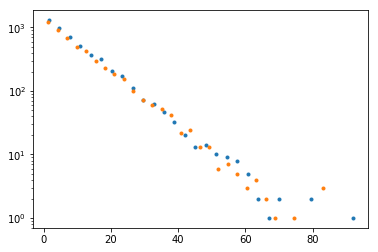

In [83]:
D=1
rm=0.005
gamma=0.577216

def tautheory2(c,kaf,R): 
    ka = kaf*D
    kap=ka/(2*math.pi*D)
    phi=math.pi*R*R*c
    print('phi2^0.5 {:.5f}, phi{:.5f}'.format(sqrt(phi*2),phi))
    gamma=0.577
    kss=2*math.pi*D/(1./kap-gamma+0.5*math.log(2)-0.5*math.log(phi))
    return 1./(c*kss)

def err(a,b):
    return (a-b)*100/a

dist = []
simean = []
print('C',C)
print('ka/2piD {:.5f}'.format(kaf/2/pi))
exact=10.093#(p=0.07927,kf0.0015915)#exact from numerical cal ori def of Area
#exact=1.25966 #p=0.2242.kf0.0015915

tauT = tautheory2(C,kaf,2*rm)

for _ in range(2):
    print(_)
    RXT=np.array(rxt[_])
    print('length',len(RXT))
    hist,bined = np.histogram(RXT,bins=30)
    bn = (bined[:-1]+bined[1:])*0.5
    #hist = np.log(hist)
    plt.semilogy(bn,hist,'.')
    mrxt = np.mean(RXT)
    simean.append(mrxt)
    print('direct mean {:.5f} '.format(mrxt))    
    dist.append([bn,hist])
    print('appxtheory {:.4f}, theoryNumeri {:.4f}, sim {:.4f}, error {:.4f}'.format(tauT,exact,mrxt,err(tauT,mrxt)))


mt =10.24793:[9.95543 10.54042]
mt =10.24079:[9.94590 10.53569]
[10.149915935138132, 10.332548559128588]
10.093
0.06958334640187044


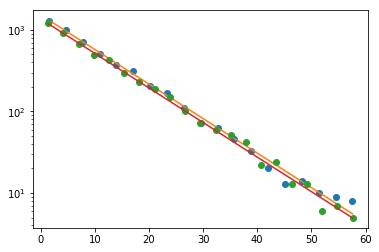

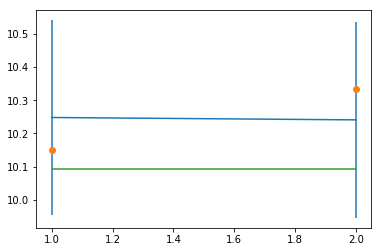

In [84]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t

# this is the function we want to fit to our data
def func(x, a, b):
    'nonlinear function in a and b to fit to data'
    return a*np.exp(-x/b)

def expfit(x,y):
    initial_guess = [1400, exact]
    pars, pcov = curve_fit(func, x, y, p0=initial_guess)#,sigma=1./np.sqrt(y))
    alpha = 0.05 # 95% confidence interval = 100*(1-alpha)
    n = len(y)    # number of data points
    p = len(pars) # number of parameters
    dof = max(0, n - p) # number of degrees of freedom
    # student-t value for the dof and confidence level
    tval = t.ppf(1.0-alpha/2., dof)    
    p= pars[1]
    sigma = np.diag(pcov)[1]**0.5 
    print('mt ={:.5f}:[{:.5f} {:.5f}]'.format(p,p-sigma*tval,p+sigma*tval))
    plt.plot(x,y,'o')
    xfit = np.linspace(min(x),max(x))
    yfit = func(xfit, pars[0], pars[1])
    plt.plot(xfit,yfit,'-')
    plt.yscale('log')
    return p,sigma*tval

X=[]
Y=[]
cutoff = 60
for i,j in dist:
    idx = i<cutoff
    i=i[idx]
    j=j[idx]
    mt,sig=expfit(i,j)
    X.append(mt)
    Y.append(sig)
print(simean)
print(exact)
print(err(X[0],X[1]))
fig,ax=plt.subplots()
ax.errorbar([1,2],X,Y)
ax.plot([1,2],simean,'o')
ax.plot([1,2],[exact]*2)

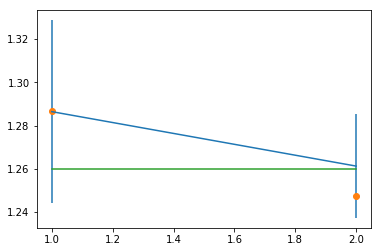

In [57]:
plt.errorbar([1,2],X,Y)
plt.plot([1,2],simean,'o')
plt.plot([1,2],[exact]*2)

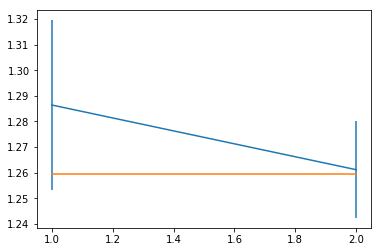

In [5]:
plt.errorbar([1,2],X,Y)
plt.plot([1,2],[exact]*2)

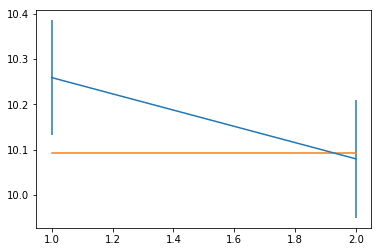

In [11]:
plt.errorbar([1,2],X,Y)
plt.plot([1,2],[exact]*2)

kaf 10


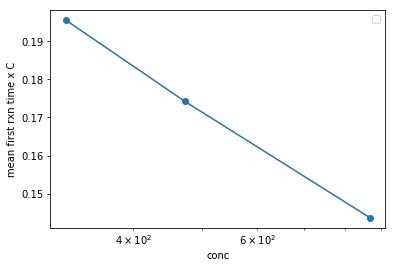

In [5]:
print('kaf',kaf)
rm = 0.005
D = 1
kd= 4.0*math.pi*D

#plt.plot(conc,[1/ka]*len(conc),label='1/ka')
plt.semilogx(conc,rxt*conc,'o-')
plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.legend()

In [59]:
rm = 0.005
R=2*rm
D = 1
kd= 4.0*math.pi*D
C=np.logspace(0,3.5,30)

Crm=np.array([ 0.86332525   ,1.06600716   ,1.34652569,1.75864373 , 2.39355846,  3.44642192,  5.36112541,  6.99731303,  9.51510999,
 13.68363437, 21.33834073, 84.51656525,129.73533991 ,320.51282051,496.03174603, 868.05555556])
rxtrm=np.array([7.27351210e-01 ,5.97726837e-01 ,4.44661791e-01,0.32699798, 0.22812282, 0.15002535, 0.09155381, 0.06784335, 0.048334,
 0.03031237, 0.01812068, 0.00335746,1.84856909e-03,4.99571073e-04,0.00026003 ,0.00010482])

Crm2=np.array([ 1.74932826 , 2.3787775 ,  3.42090859 , 5.33458518  ,6.96301248 , 9.45251059,
 13.58991085 ,21.12914131 ,80.12820513])
rxtrm2=np.array([0.27137338, 0.19333599, 0.12124948, 0.07248272, 0.05222263, 0.03629452,
 0.02262369, 0.01342985 ,0.00199828])

Crm3=np.array([ 1.75654879  ,9.5345133  ,84.17135247])
rxtrm3=np.array([0.32967616 ,0.04709788 ,0.00336287])

Crm2pp=np.array([ 1.74932826  ,9.45251059 ,80.12820513,124.00793651,320.51282051 ,473.48484848, 868.05555556])
rxtrm2pp=np.array([0.33238285 ,0.04491478 ,0.00328065,0.00199579,0.00061013 ,0.00036796 ,0.00016556])

Crmp1=np.array([ 1.75864373  ,9.51510999 ,84.51656525])
rxnrmp1=np.array([0.46958433 ,0.07518621 ,0.00635457])

Ckf01=np.array([ 1.75654879  ,9.5345133  ,84.17135247,496.03174603 ,868.05555556])
rxnkf01=np.array([0.75266381, 0.12485816 ,0.01204778,0.00186237 ,0.0010119 ])

Ckf012R=np.array([  1.74932826  , 9.45251059,  80.12820513 ,473.48484848, 868.05555556])
rxtkf012R=np.array([0.7643878  ,0.12542833 ,0.0130369  ,0.00187747 ,0.00102033])


Text(0.5,1,'different kf compare with theory')

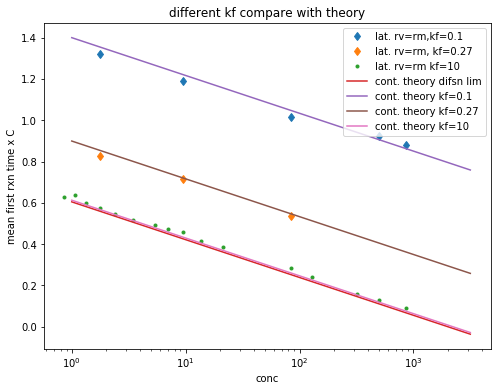

In [52]:


tau=np.array([c*tautheory(c,R) for c in C])
tau2r=np.array([c*tautheory2(c,10,2*R) for c in C])
tau01=np.array([c*tautheory2(c,0.1,R) for c in C])
tau027=np.array([c*tautheory2(c,0.27,R) for c in C])
tau10=np.array([c*tautheory2(c,10,R) for c in C])

plt.subplots(1,1,figsize=(8,6))
#plt.semilogx(Crm2,rxtrm2*Crm2,'x',label='lat. rv=2rm kf=10')
#plt.semilogx(Crm3,rxtrm3*Crm3,'s',label='lat. rv=1.08rm kf=10')
plt.semilogx(Ckf01,rxnkf01*Ckf01,'d',label='lat. rv=rm,kf=0.1')
plt.semilogx(Crmp1,rxnrmp1*Crmp1,'d',label='lat. rv=rm, kf=0.27')
plt.semilogx(Crm,rxtrm*Crm,'.',label='lat. rv=rm kf=10')
plt.semilogx(C,tau,'-',label='cont. theory difsn lim')
plt.semilogx(C,tau01,'-',label='cont. theory kf=0.1')
plt.semilogx(C,tau027,'-',label='cont. theory kf=0.27')
plt.semilogx(C,tau10,'-',label='cont. theory kf=10')

plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.title('N=100,kfactor={},runs={}'.format(kaf,simrun))
plt.legend()
plt.title('different kf compare with theory')
#plt.savefig("fig2.png",format='png',dpi=900)   

Text(0.5,1,'different voxel size')

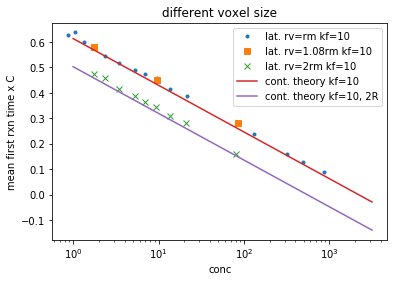

In [39]:
plt.semilogx(Crm,rxtrm*Crm,'.',label='lat. rv=rm kf=10')
plt.semilogx(Crm3,rxtrm3*Crm3,'s',label='lat. rv=1.08rm kf=10')
plt.semilogx(Crm2,rxtrm2*Crm2,'x',label='lat. rv=2rm kf=10')

plt.semilogx(C,tau10,'-',label='cont. theory kf=10')
plt.semilogx(C,tau2r,'-',label='cont. theory kf=10, 2R')
plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.title('N=100,kfactor={},runs={}'.format(kaf,simrun))
plt.legend()
plt.title('different voxel size')

critical occupancy in lattice 0.04


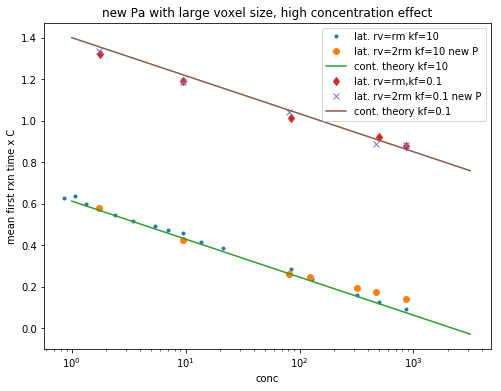

In [61]:
plt.subplots(1,1,figsize=(8,6))
plt.semilogx(Crm,rxtrm*Crm,'.',label='lat. rv=rm kf=10')
plt.semilogx(Crm2pp,rxtrm2pp*Crm2pp,'o',label='lat. rv=2rm kf=10 new P')
plt.semilogx(C,tau10,'-',label='cont. theory kf=10')
plt.semilogx(Ckf01,rxnkf01*Ckf01,'d',label='lat. rv=rm,kf=0.1')
plt.semilogx(Ckf012R,rxtkf012R*Ckf012R,'x',label='lat. rv=2rm kf=0.1 new P')
plt.semilogx(C,tau01,'-',label='cont. theory kf=0.1')
plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.title('N=100,kfactor={},runs={}'.format(kaf,simrun))
plt.legend()
plt.title('new Pa with large voxel size, high concentration effect')
cc=100
print('critical occupancy in lattice',4*R**2*cc)
#diffusion-influenced situation influenced by slower diffusion due to crowding.

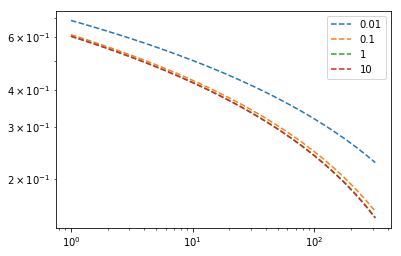

In [56]:
for kf in [0.01,0.1,1,10]:
    tau01=np.array([c*tautheory2(c,kf) for c in C])
    plt.loglog(C,tau01,'--',label=str(kf))
plt.legend()

In [73]:
0.01**2

0.0001

In [91]:
k=0.1
c=1e-6
for y in [0.001,0.01,0.1]:
    phi=1e-4*c
    print('phi,phiy',phi,phi*y)
    print(math.log(phi*y),math.log(phi),math.log(y))
    print(1./(-0.6+1/k+math.log(2)-0.5*math.log(2)-0.5*math.log(phi*y)))

phi,phiy 1e-10 1e-13
-29.933606208922594 -23.025850929940457 -6.907755278982137
0.04046391605453045
phi,phiy 1e-10 1e-12
-27.631021115928547 -23.025850929940457 -4.605170185988091
0.0424410673397292
phi,phiy 1e-10 1.0000000000000001e-11
-25.328436022934504 -23.025850929940457 -2.3025850929940455
0.04462136000238547
